# Pong walkthrough
## Handcraft a simple policy


**Set up environment**

In [1]:
# !pip install msgpack
# !pip install gym[atari]

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from JSAnimation.display_frames_as_gif import display_frames_as_gif
import numpy as np

import gym

### Random action


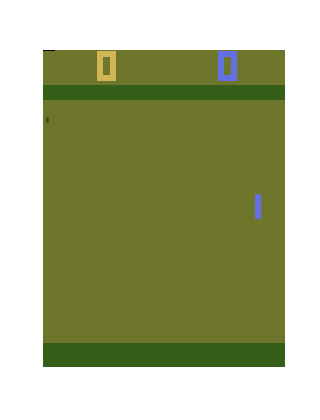
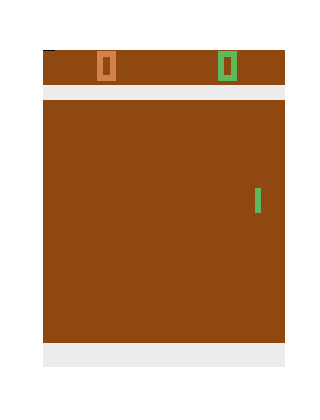
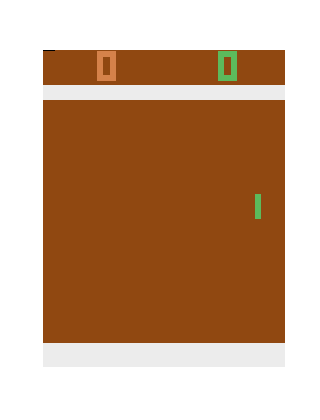
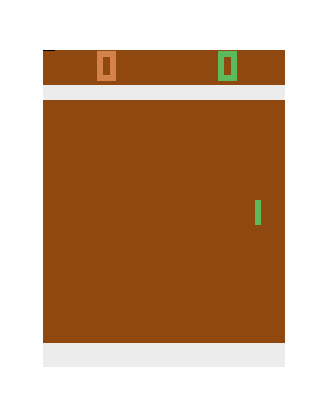
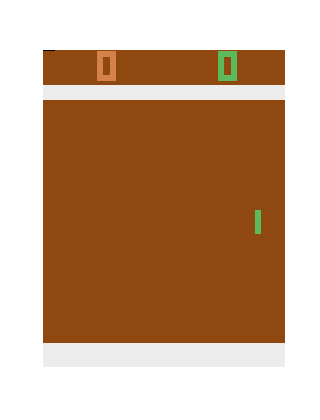
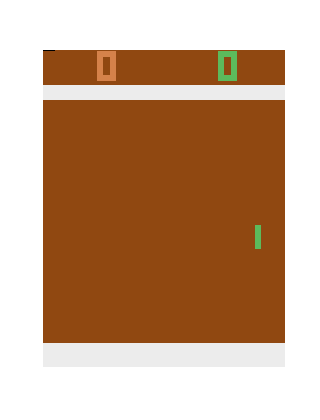
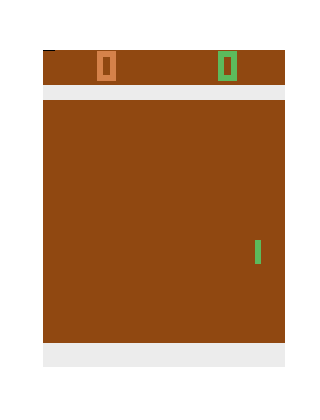
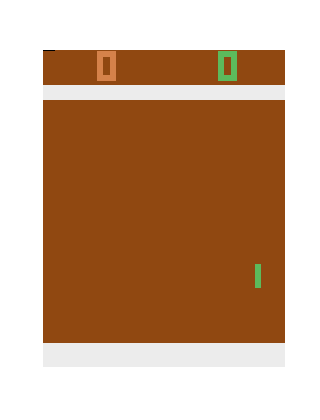
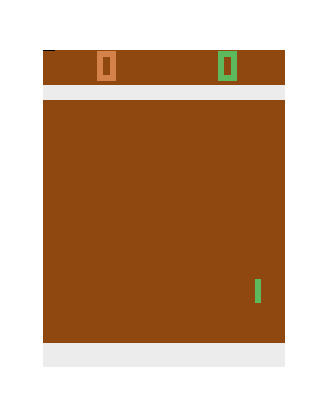
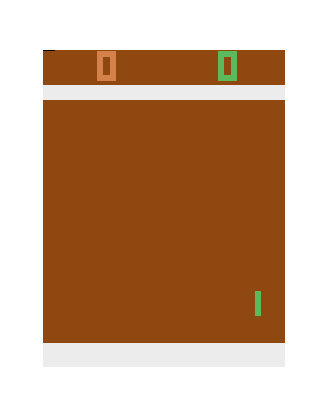
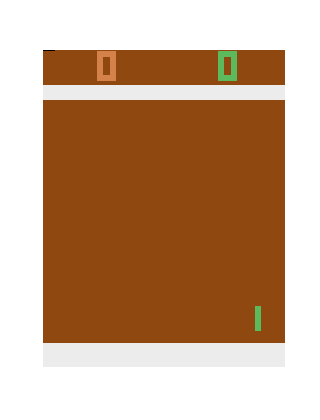
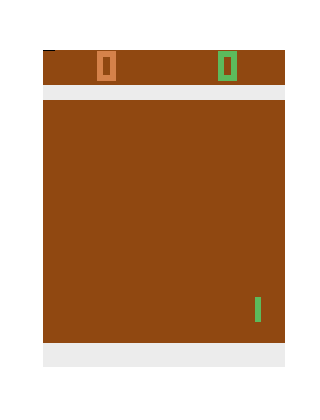
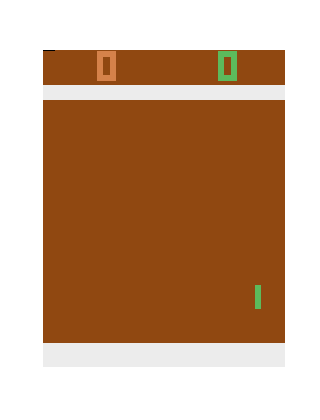
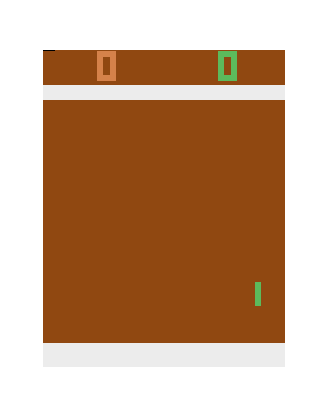
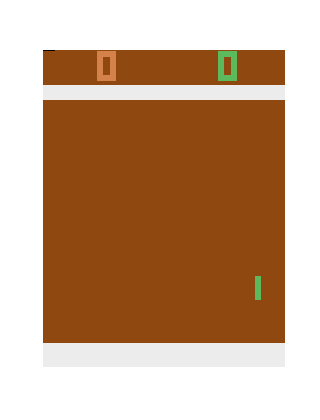
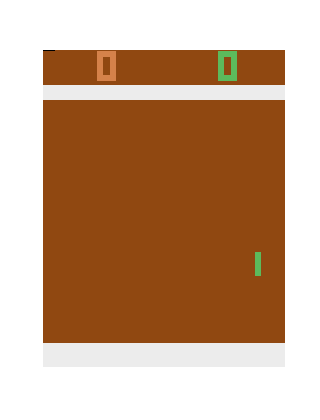
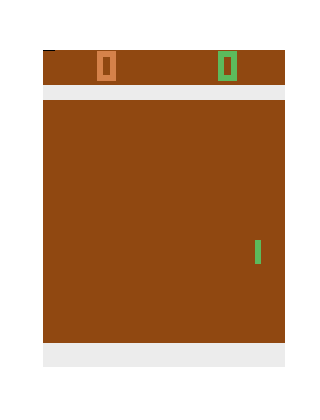
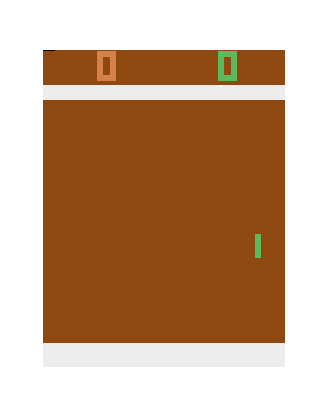
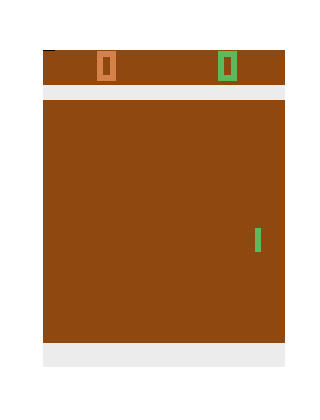
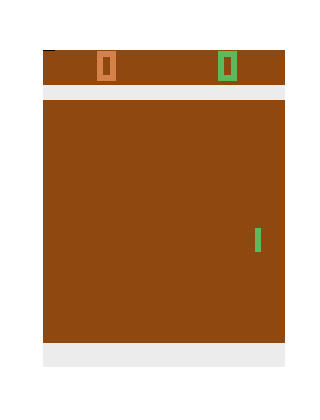
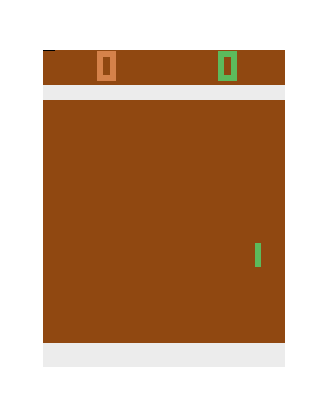
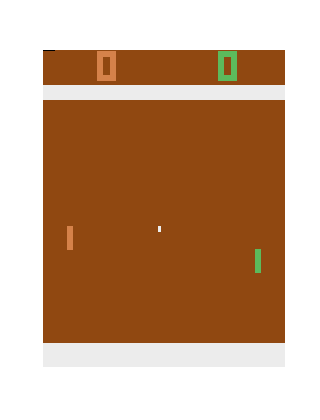
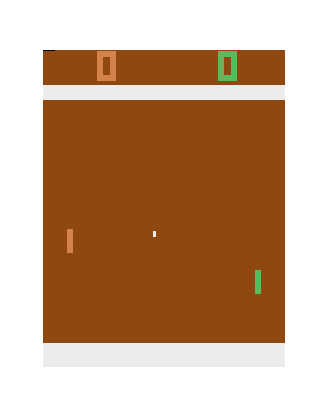
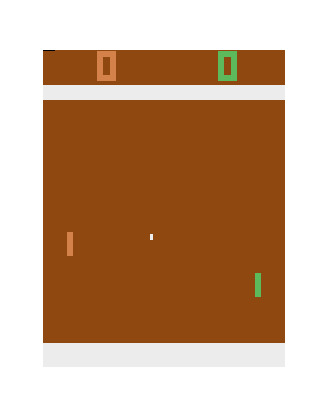
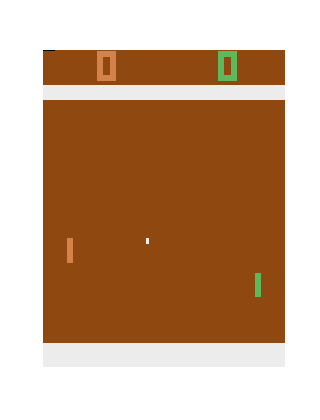
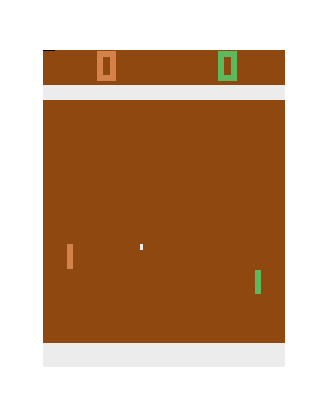
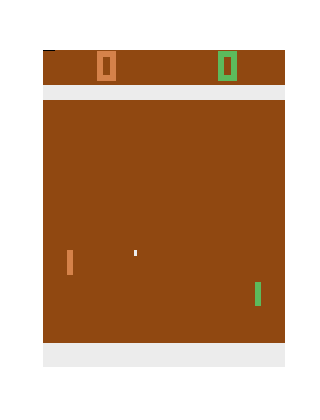
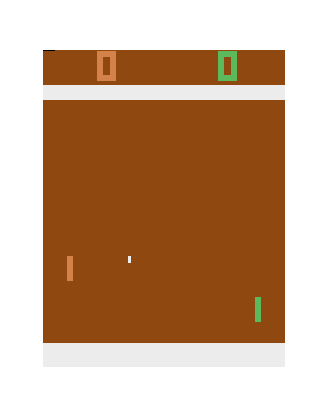
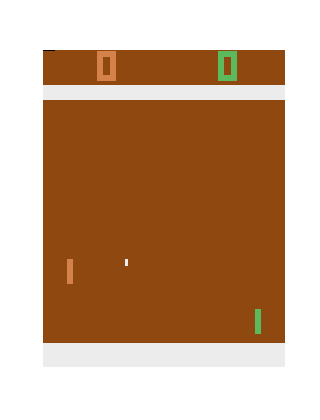
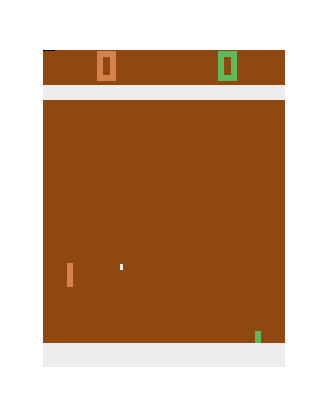
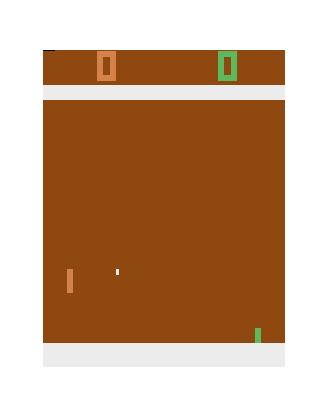
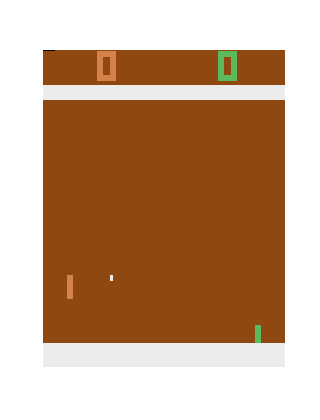
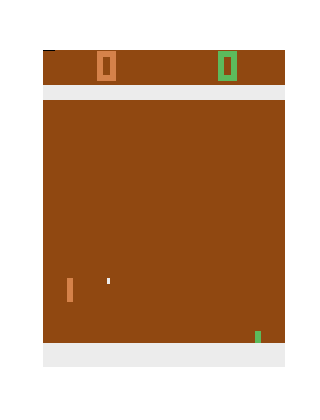
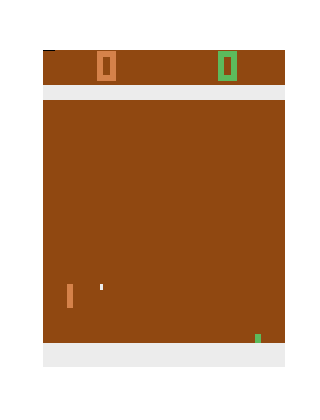
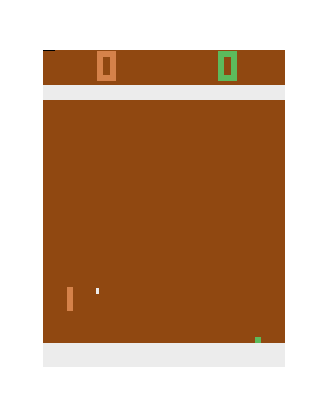
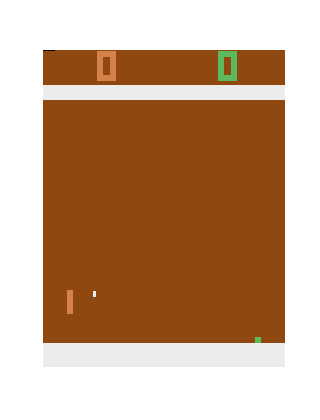
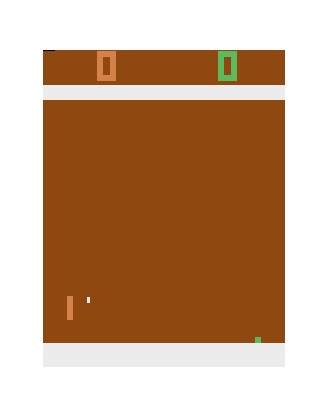
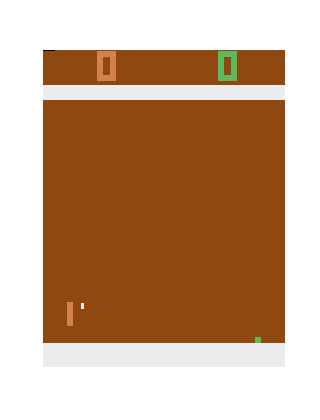
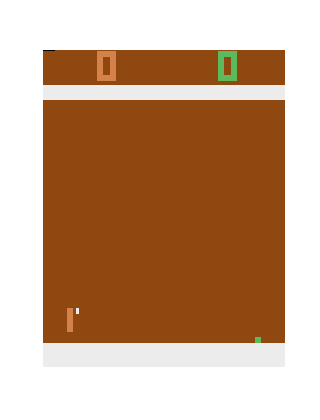
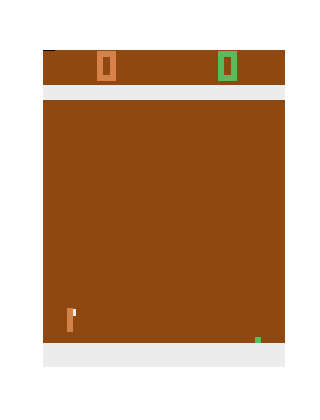
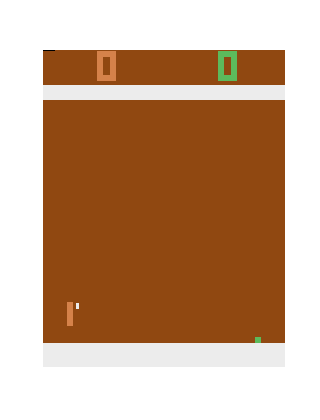
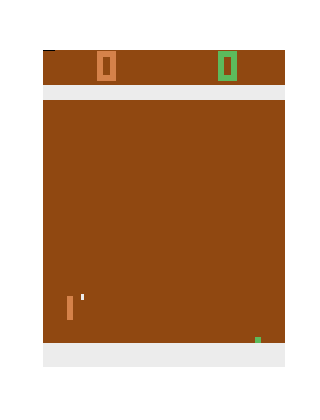
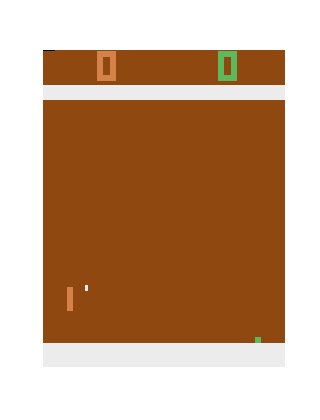
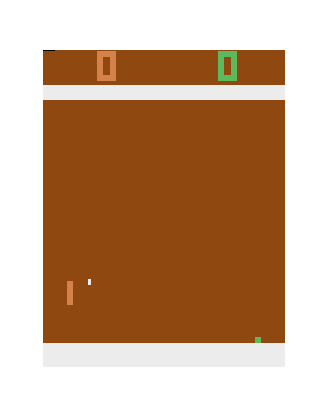
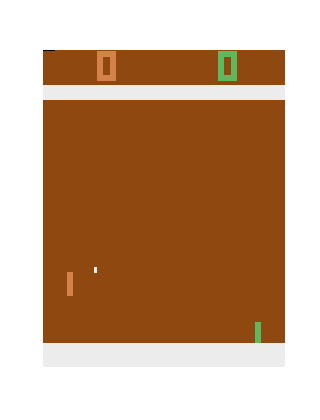
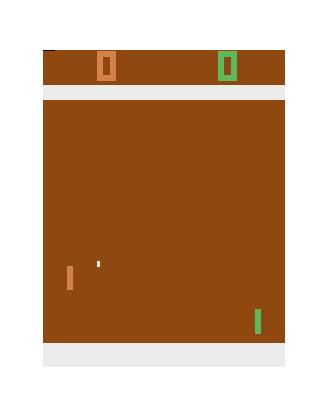
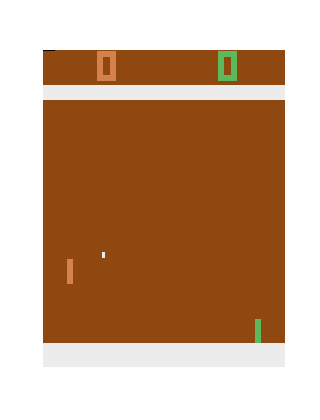
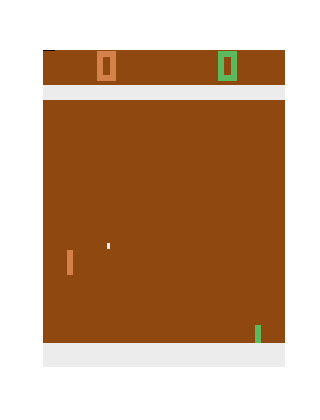
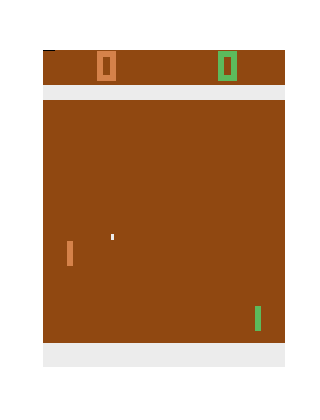
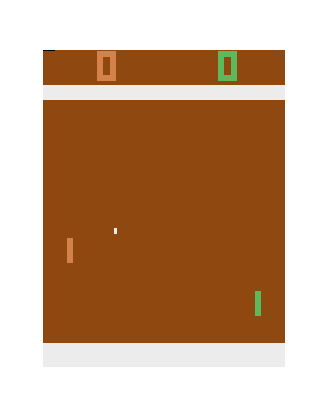
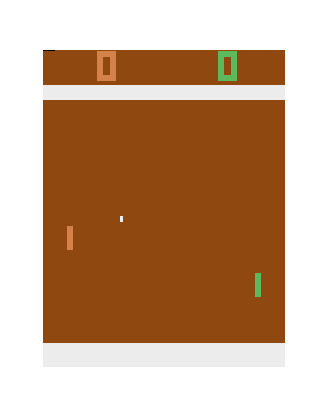
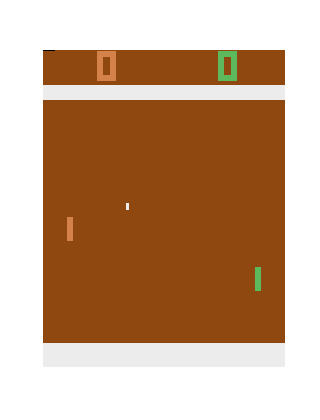
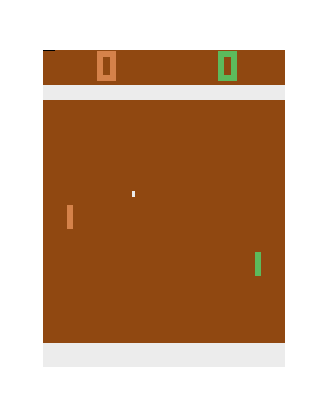
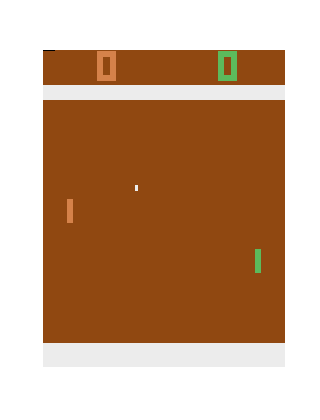
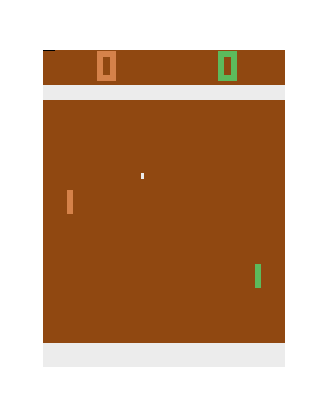
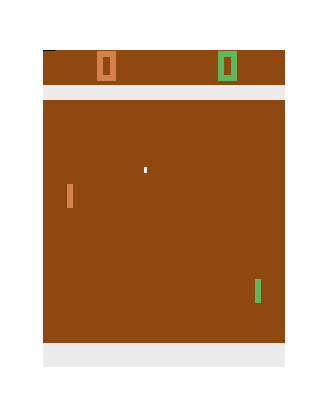
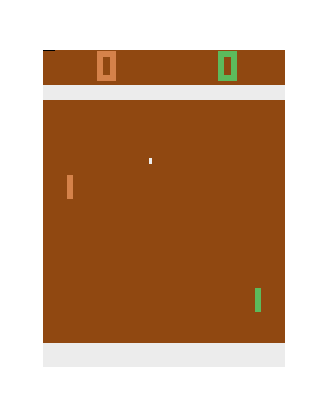
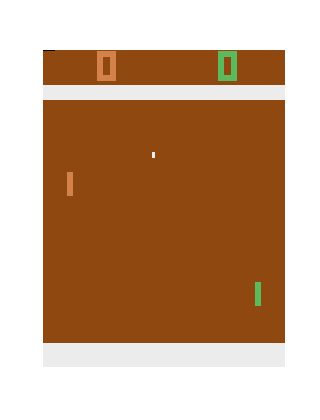
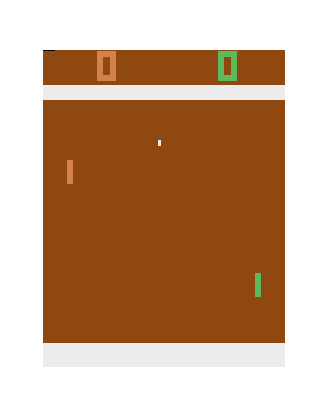
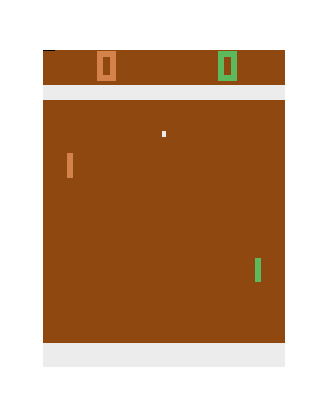
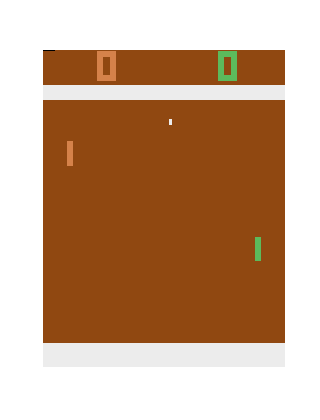
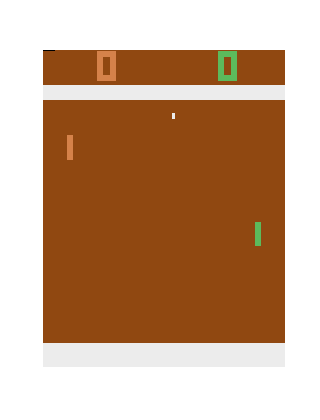
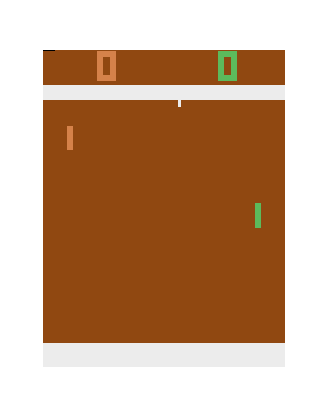
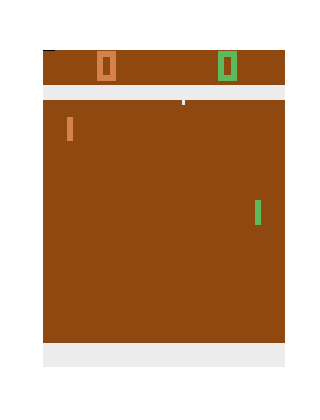
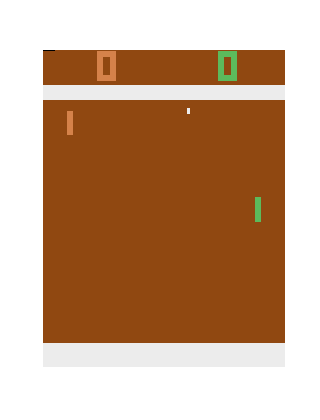
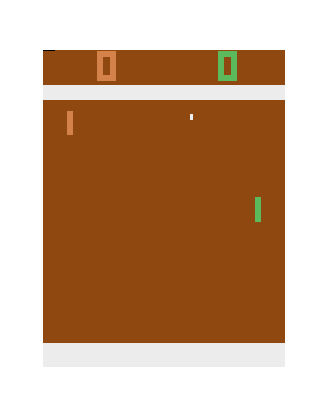
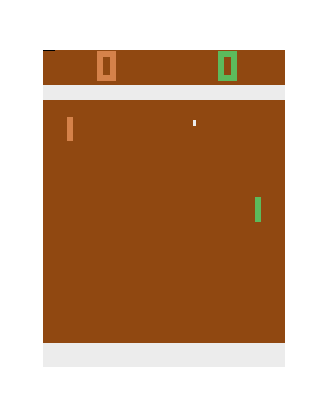
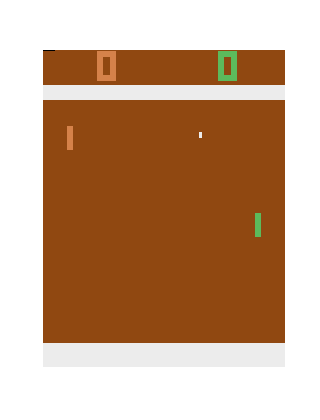
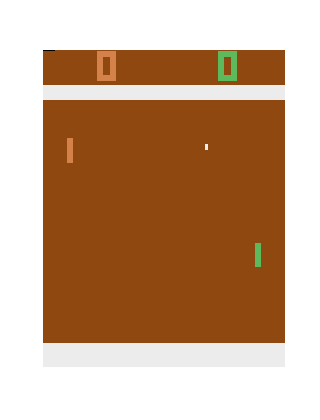
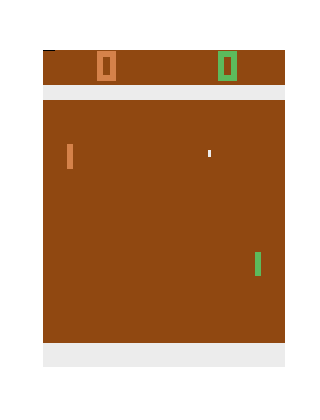
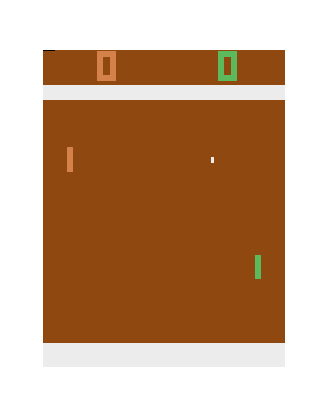
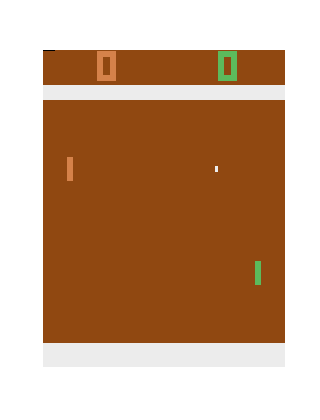
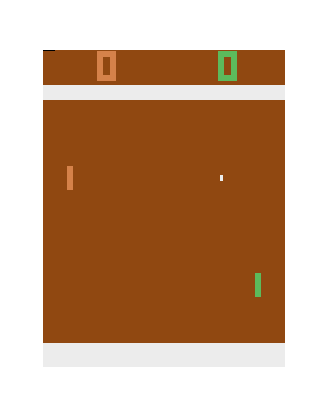
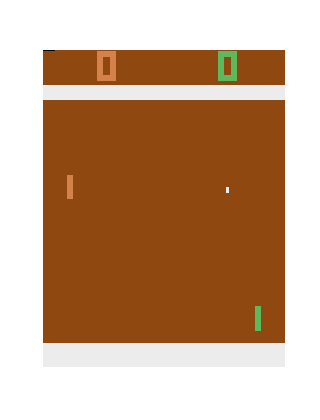
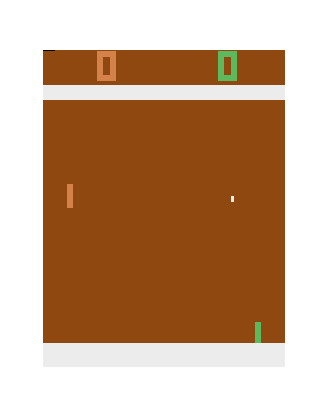
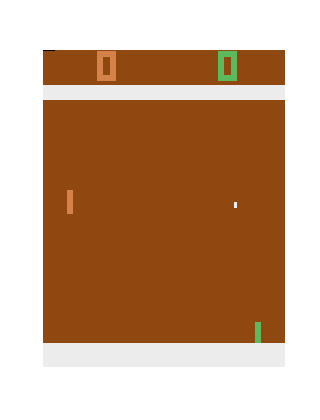
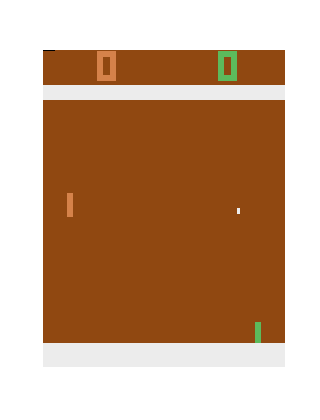
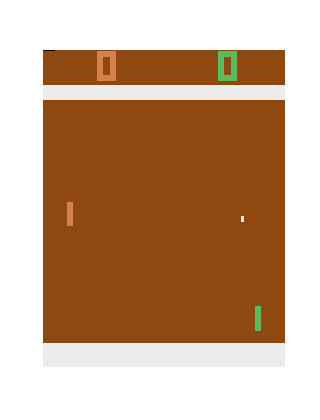
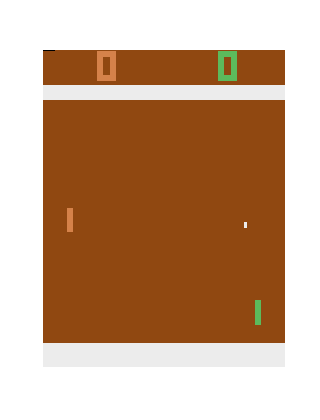
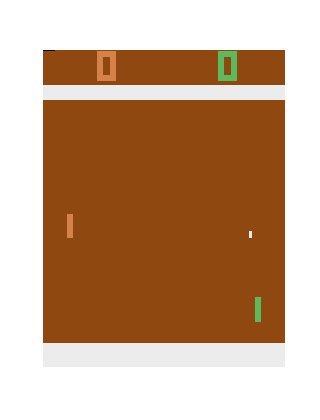
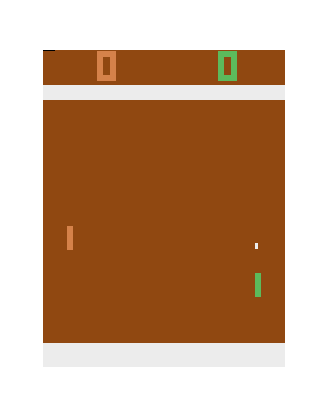
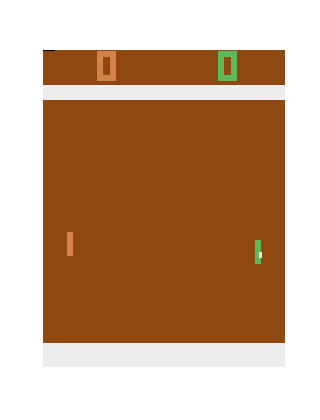
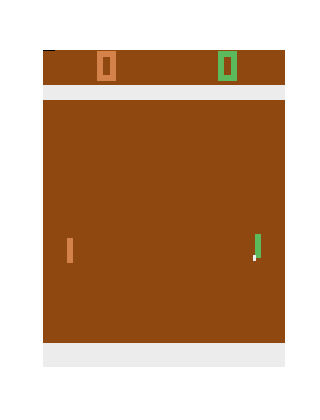
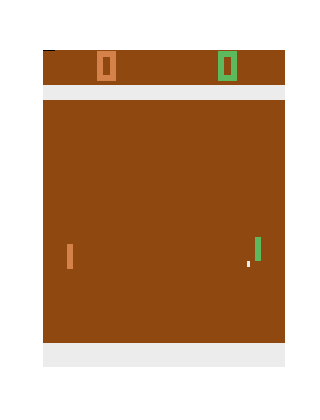
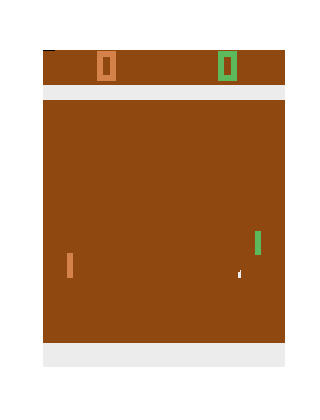
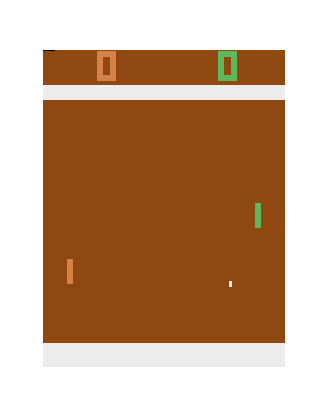
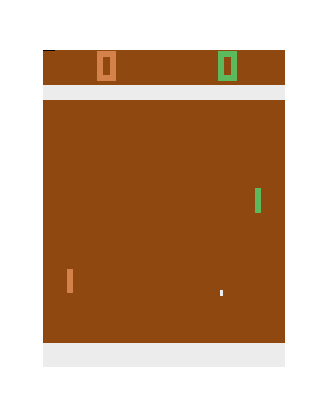
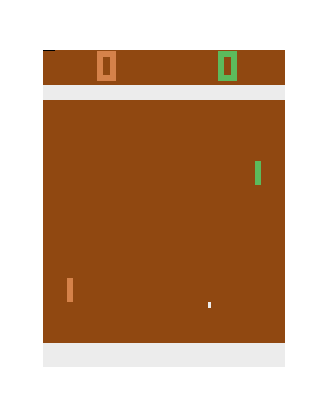
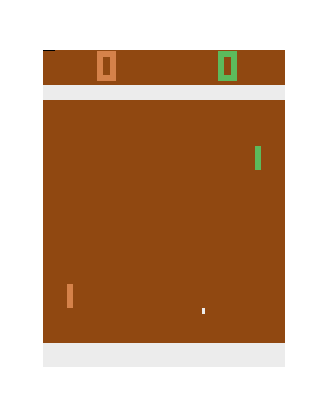
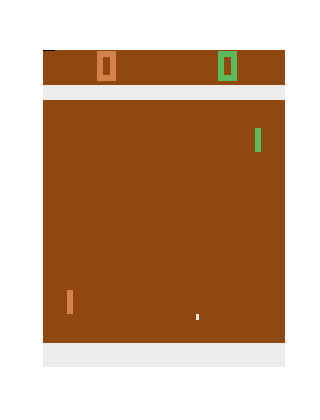
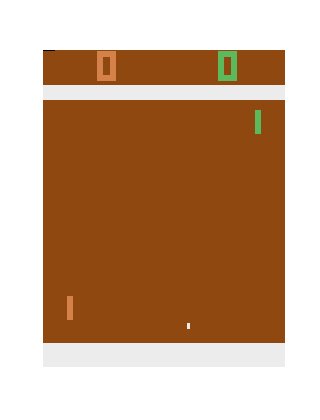
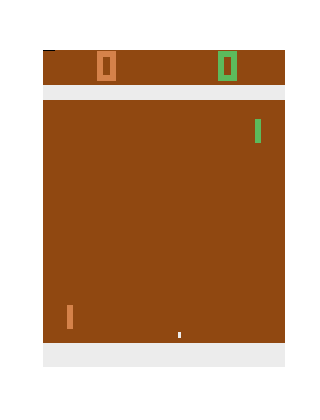
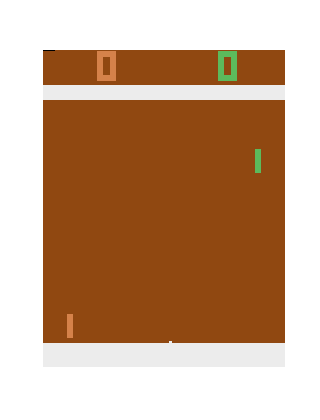
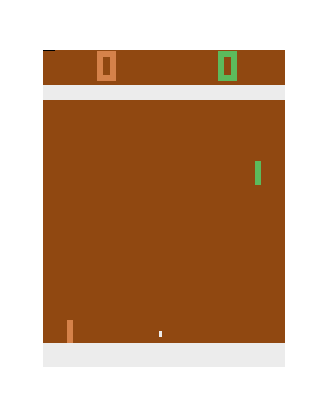
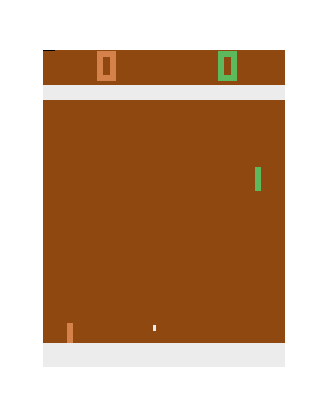
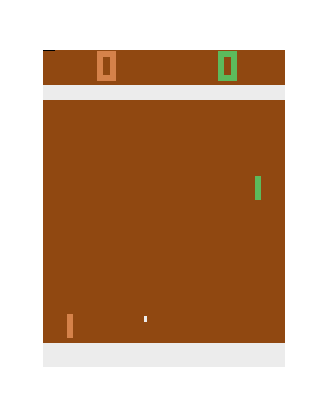
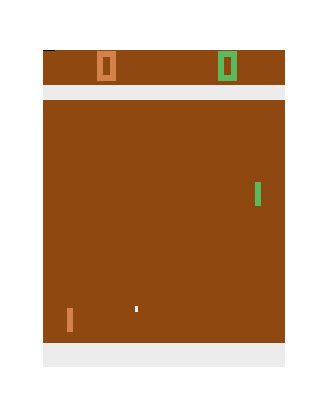
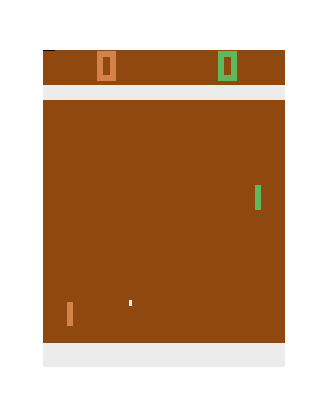
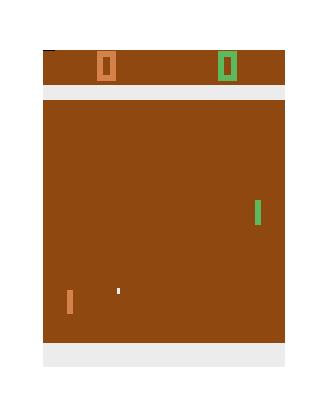
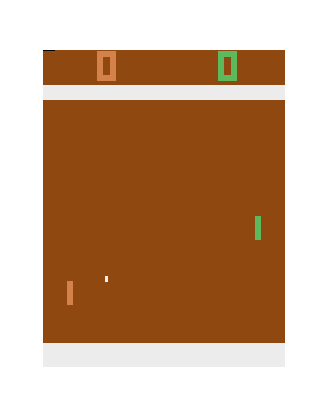
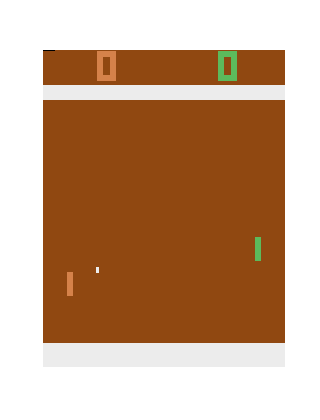
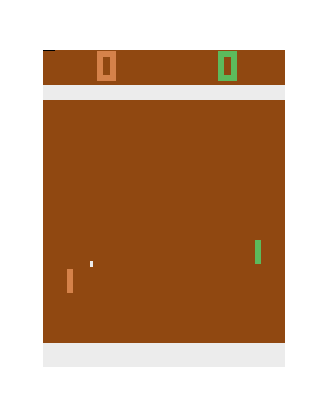
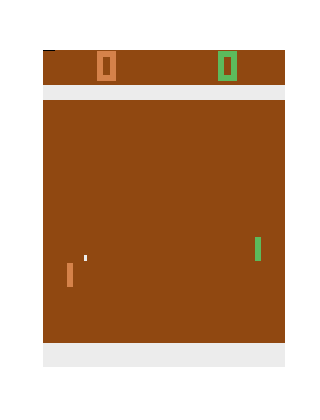
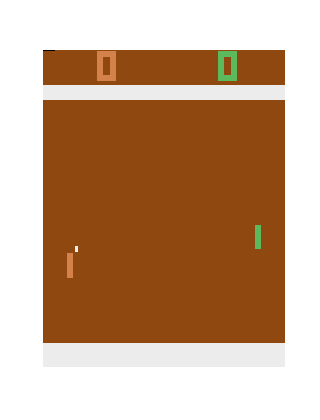
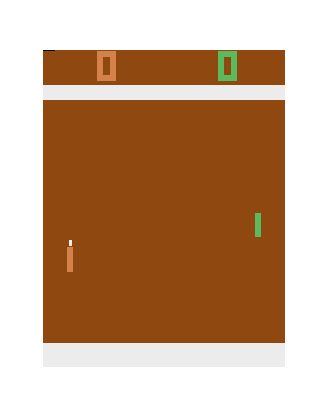
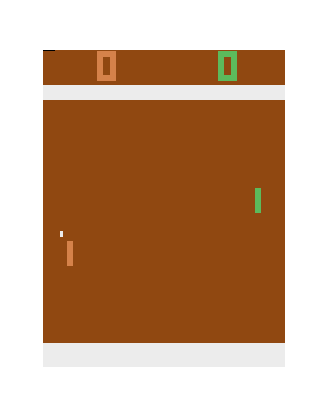
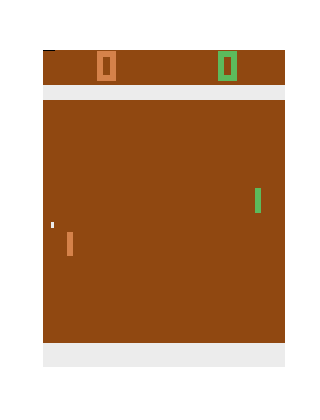
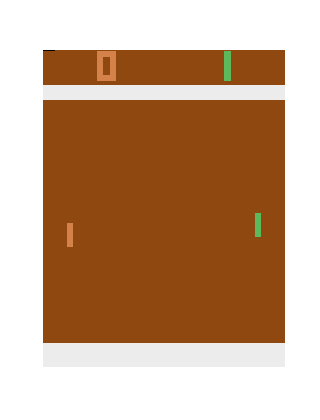
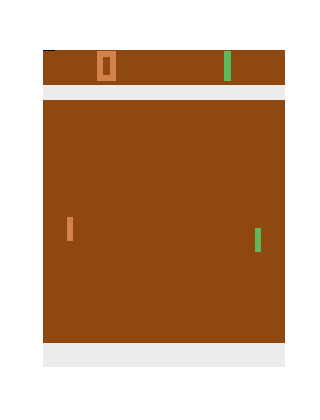
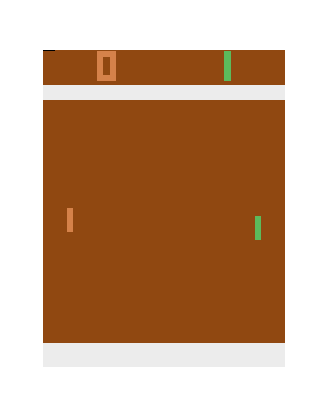
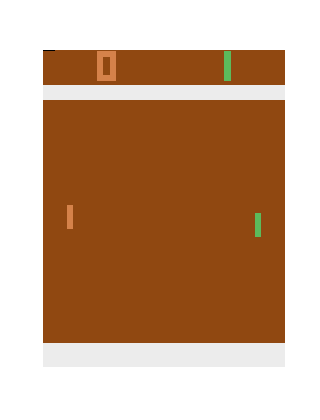
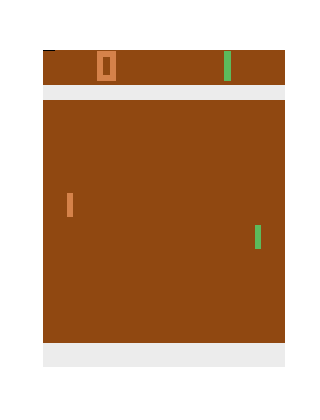
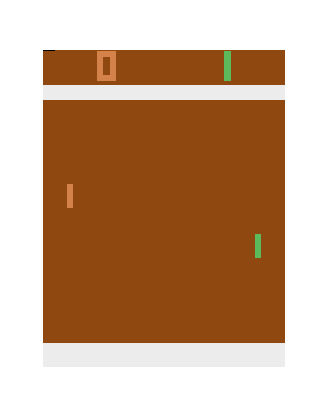
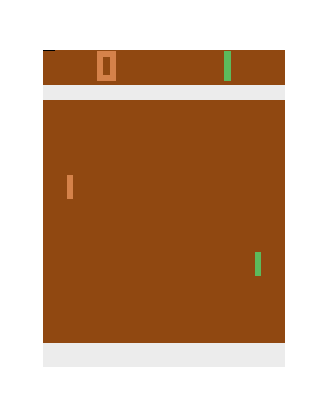
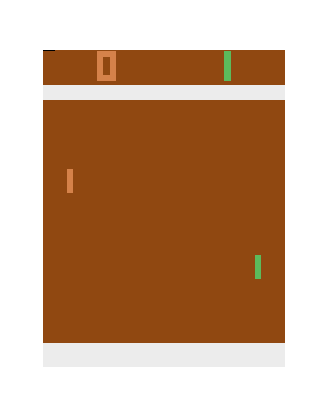
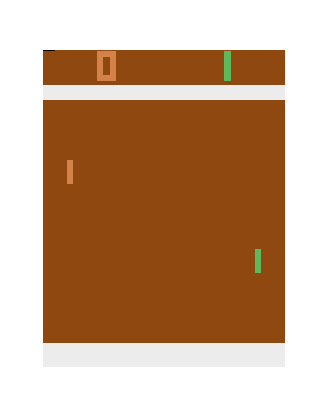
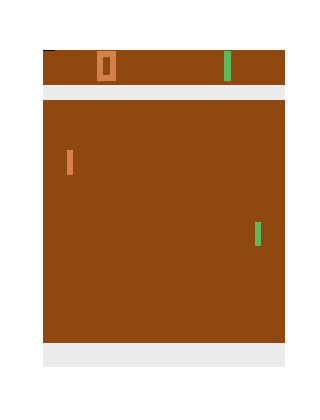
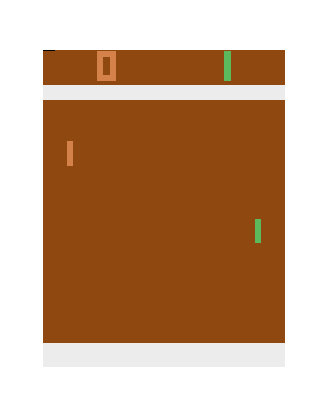
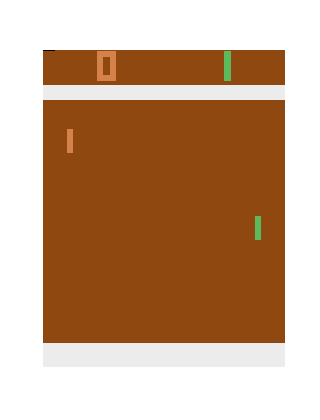
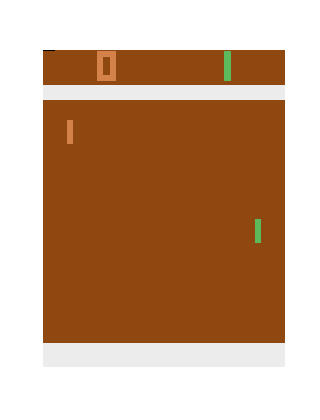
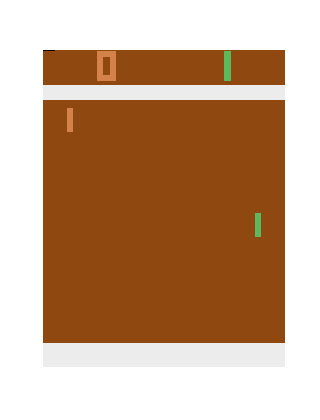
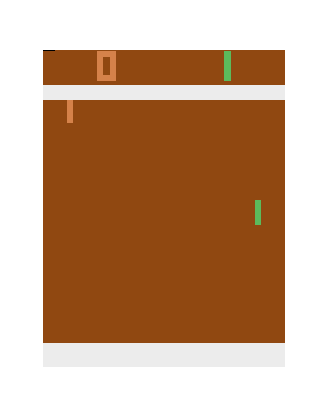
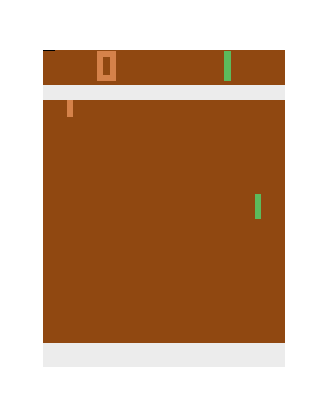
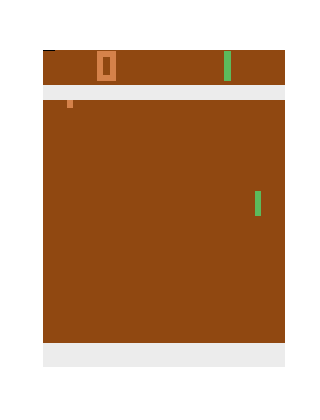
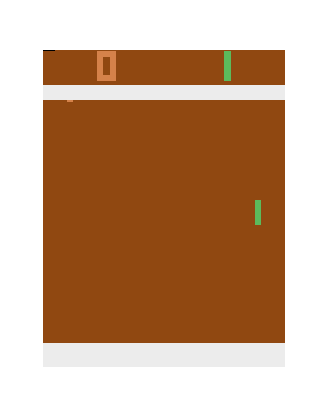
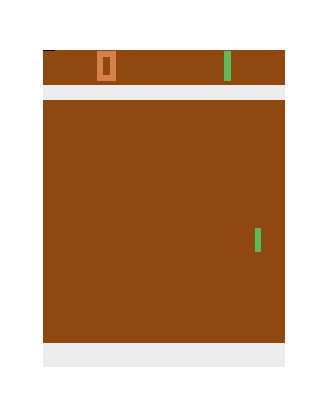
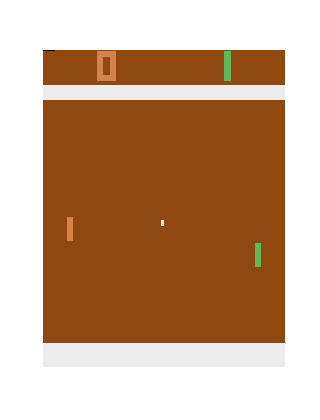
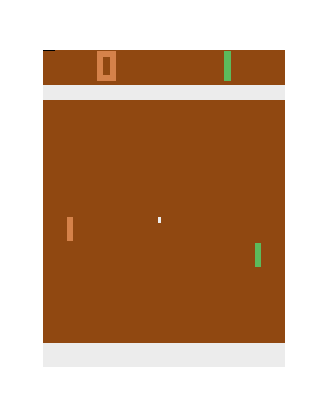
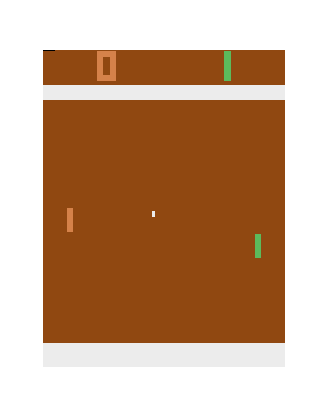
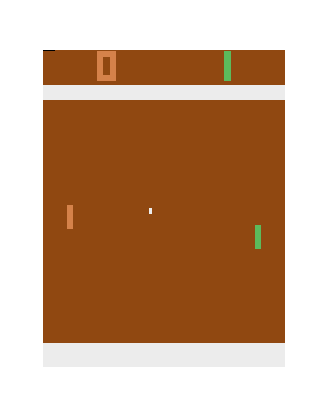
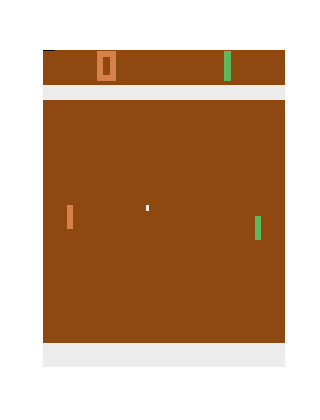
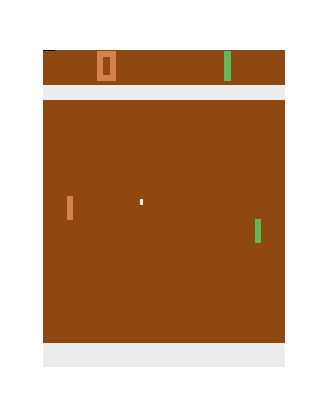
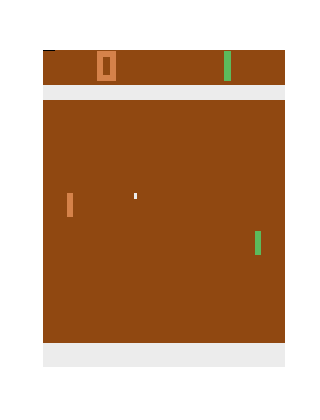
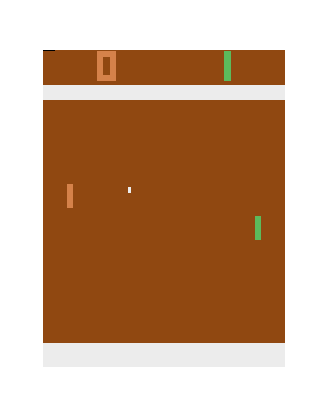
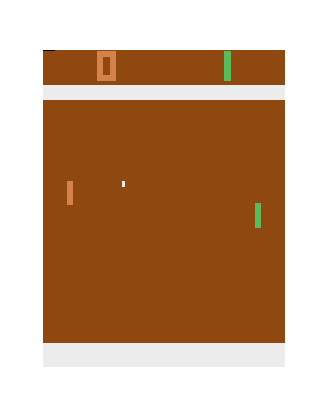
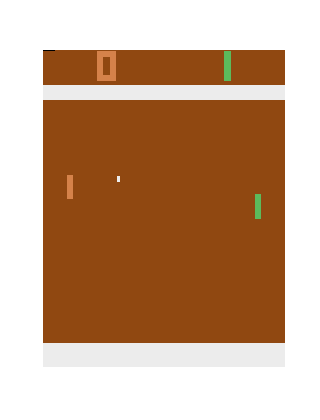
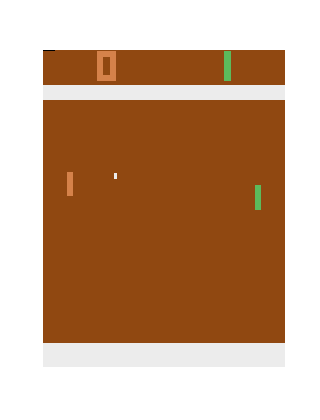
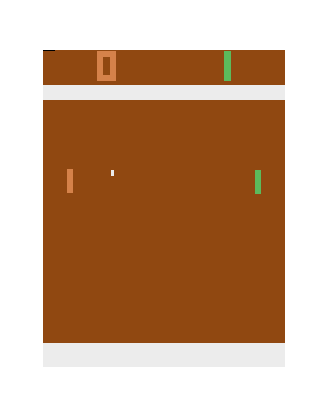
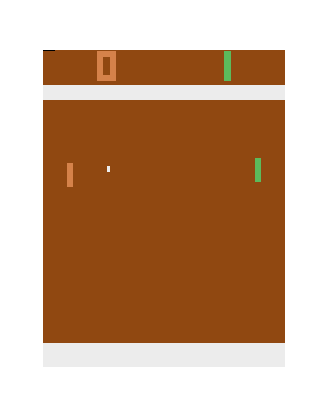
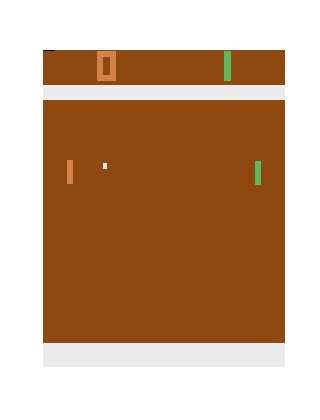
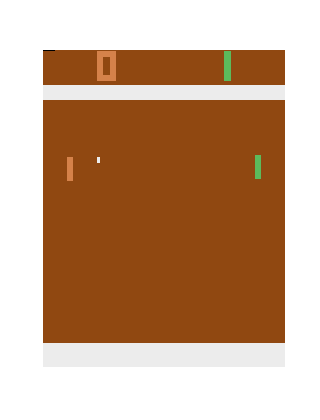
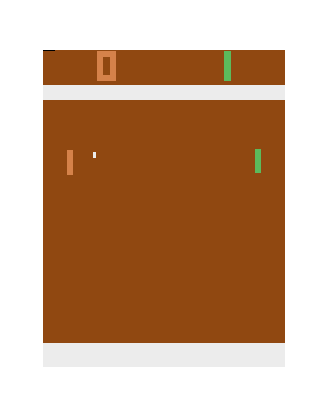
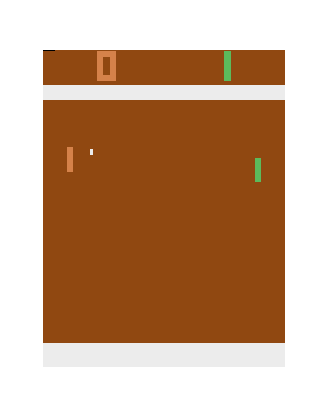
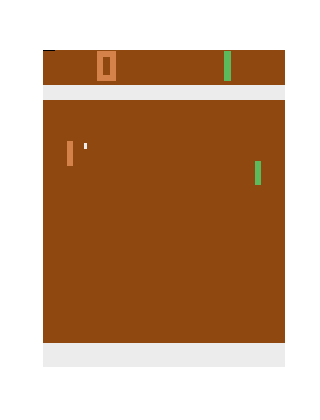
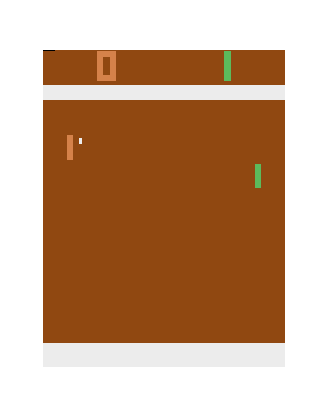
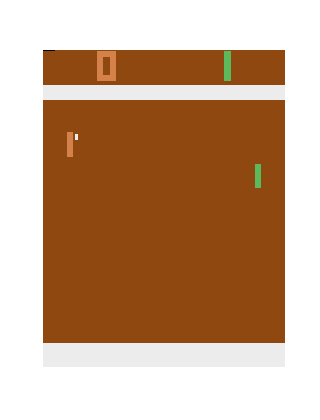
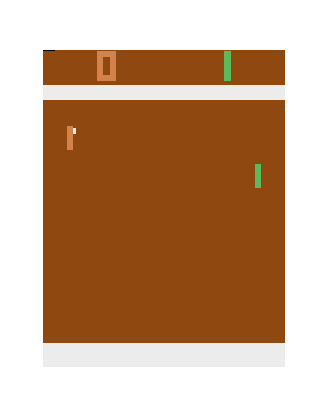
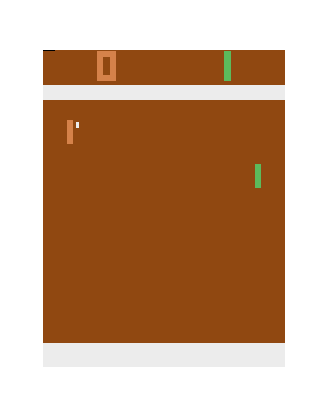
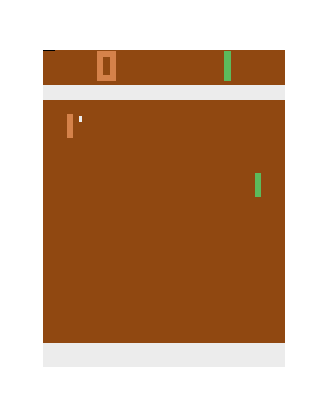
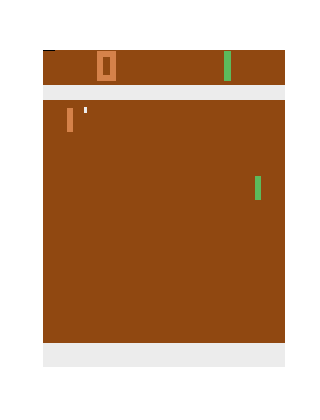
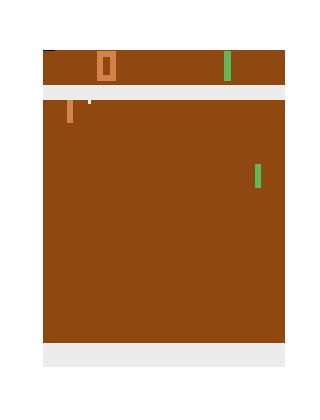
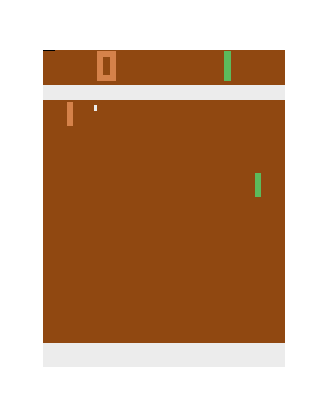
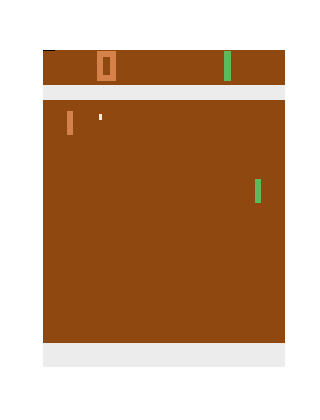
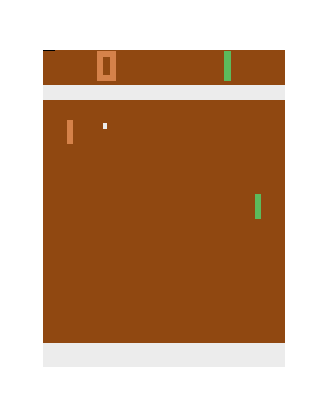
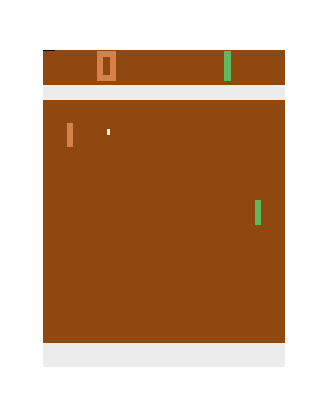
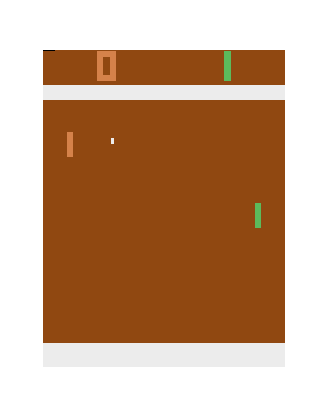
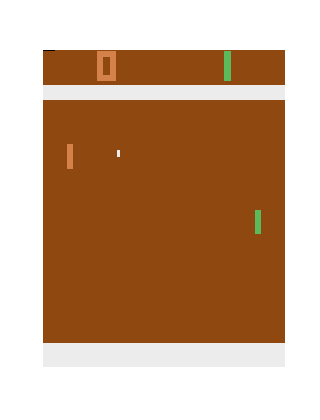
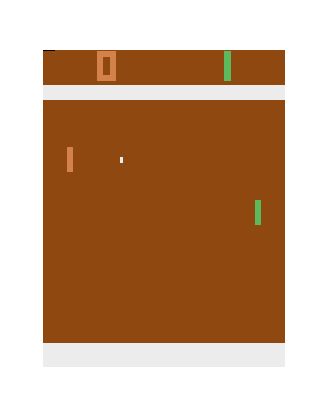
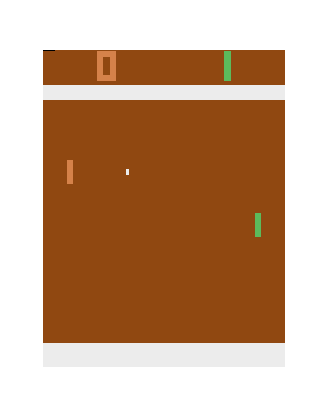
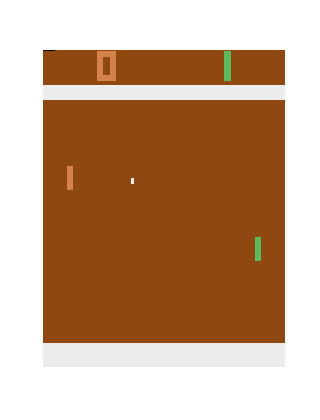
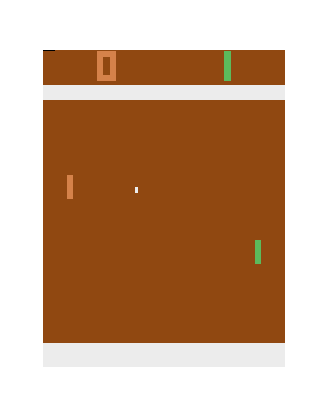
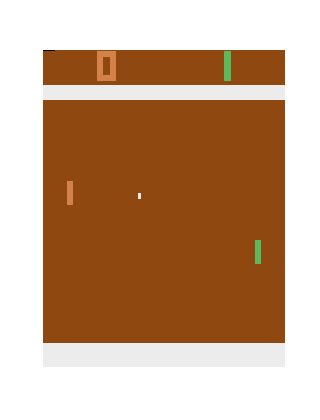
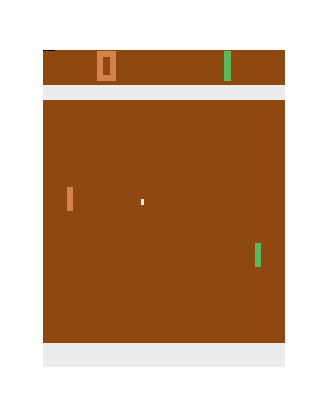
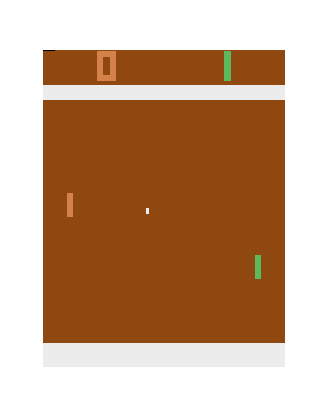
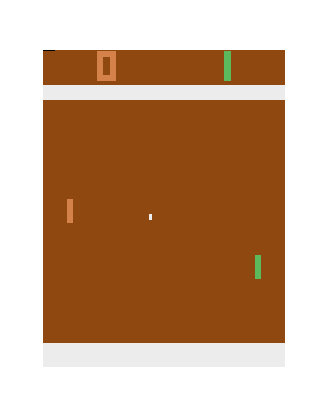
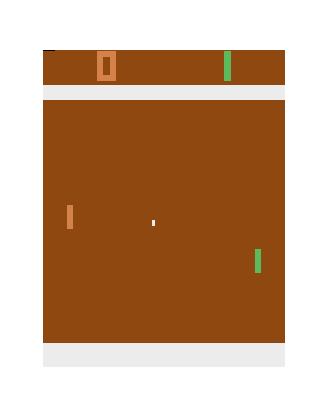
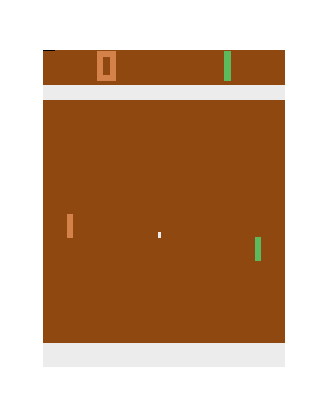
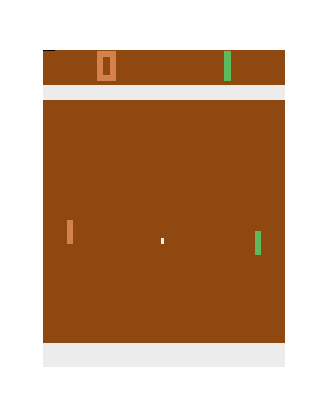
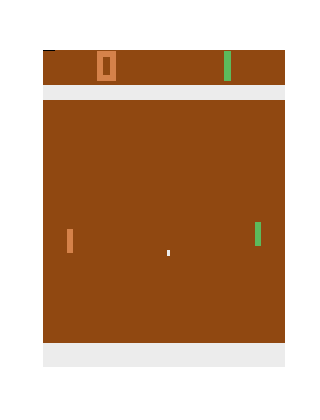
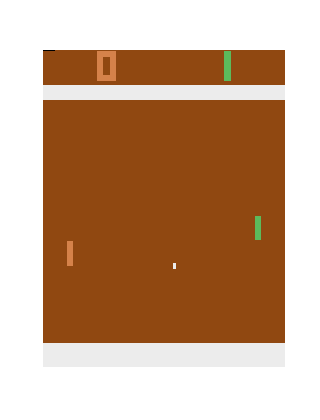
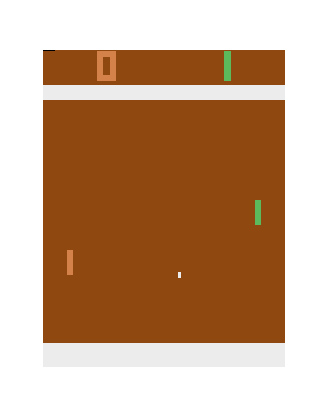
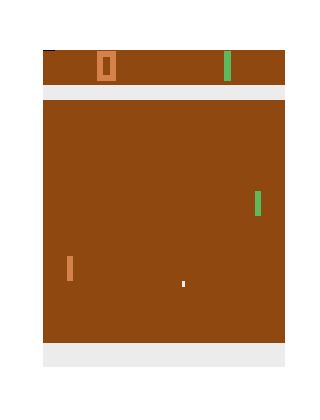
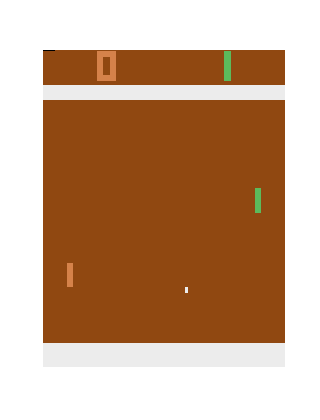
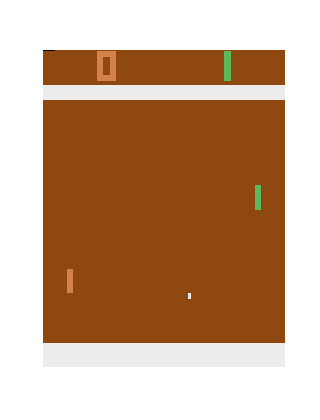
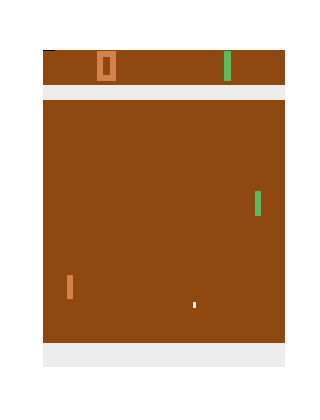
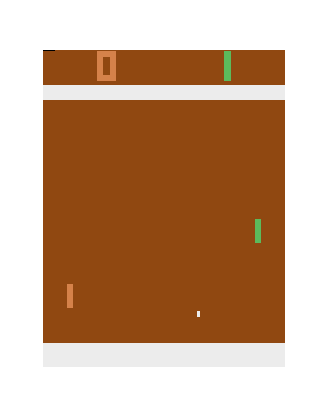
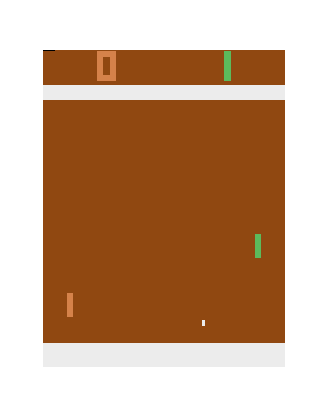
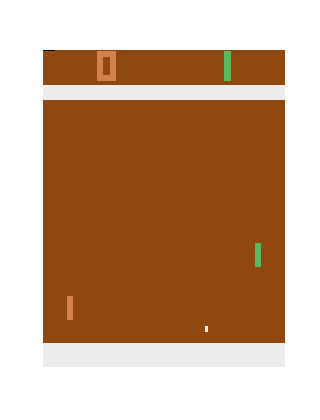
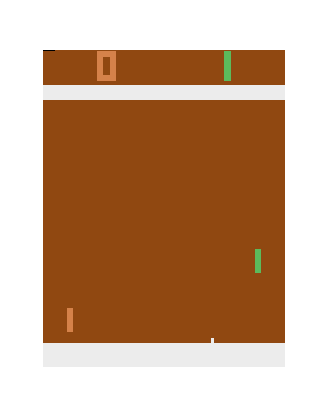
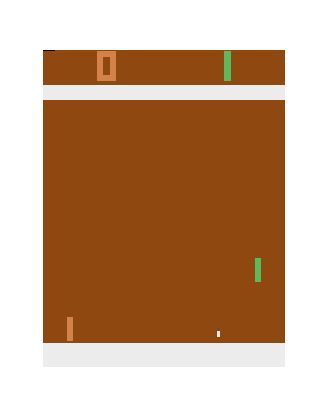
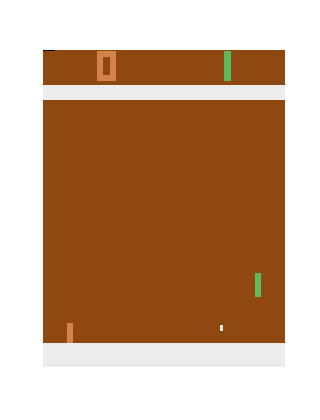
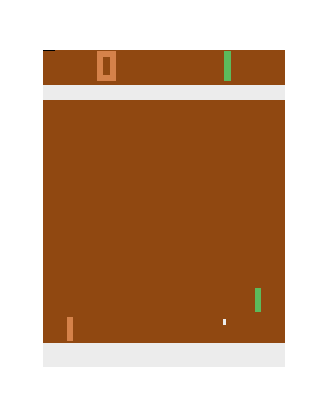
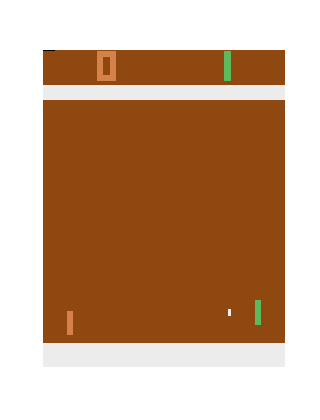
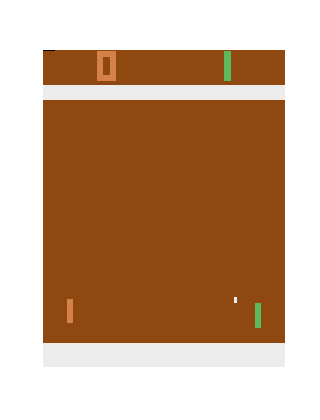
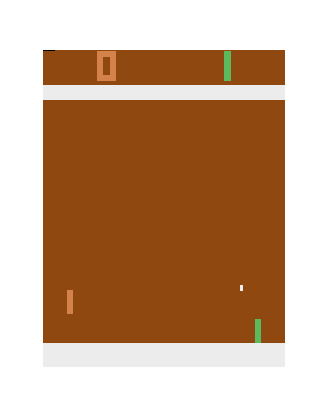
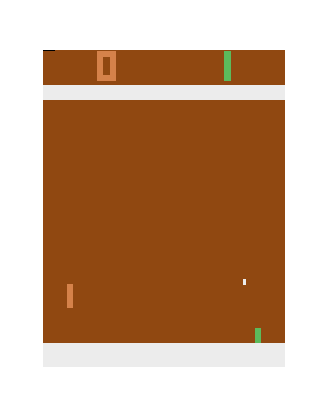
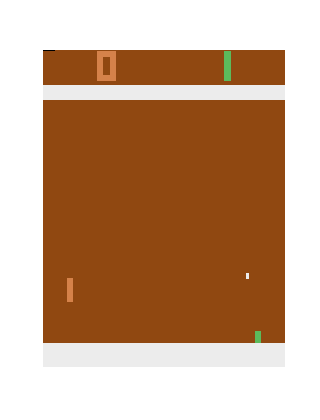
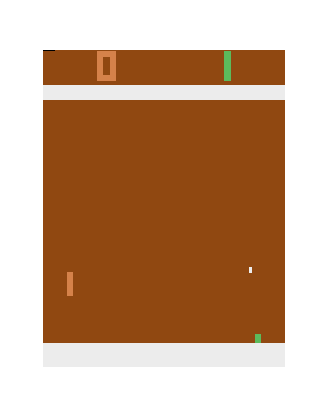
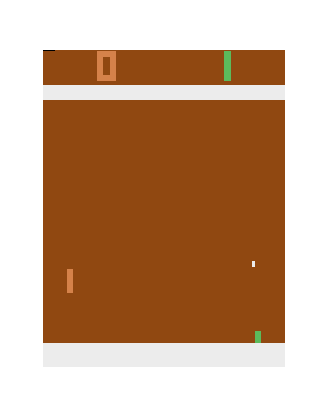
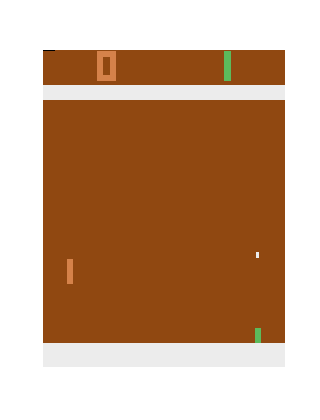
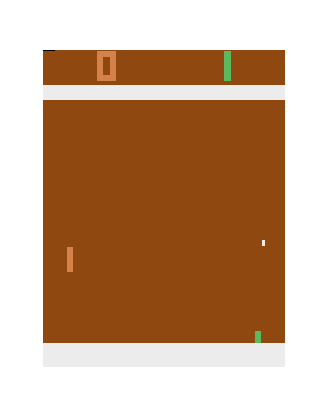
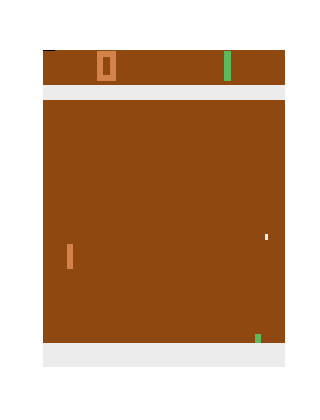
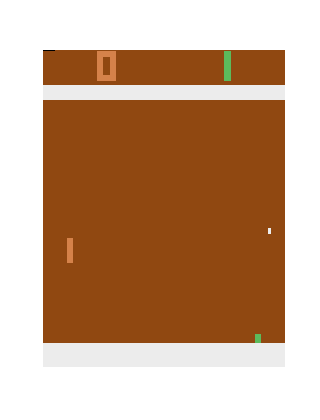
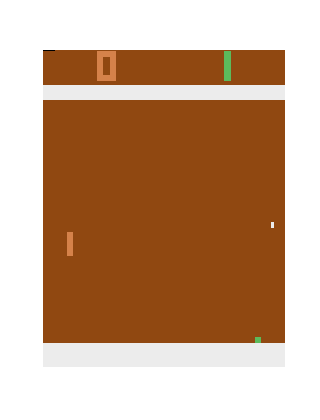
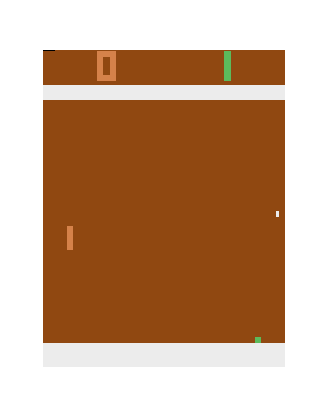
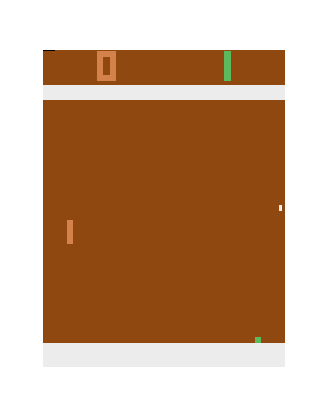
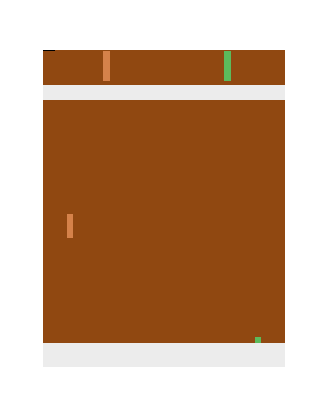
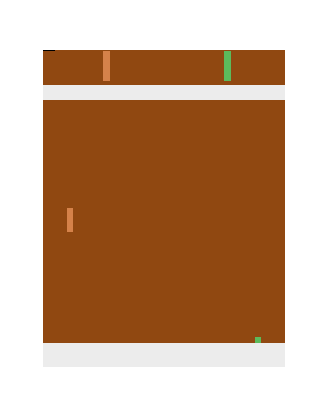
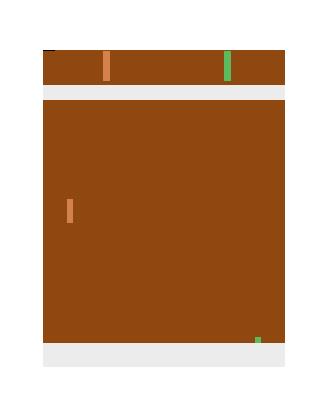
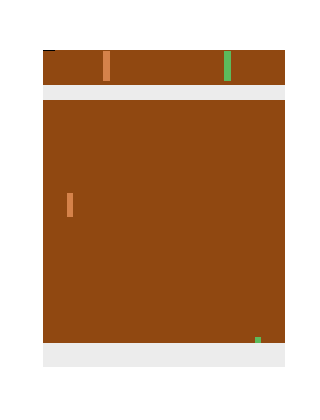
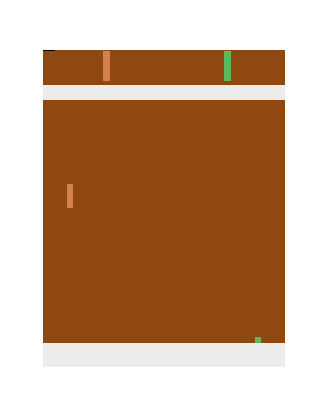
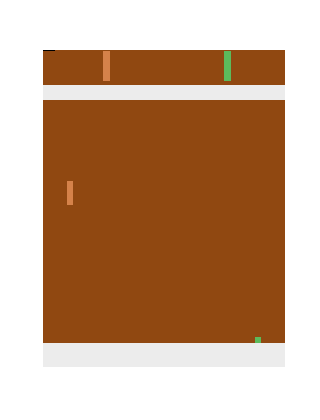
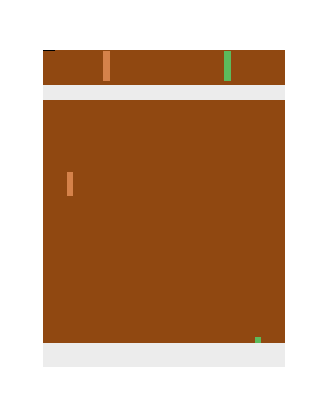
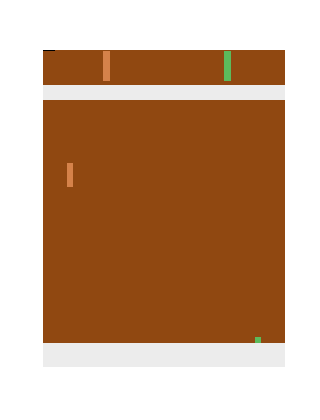
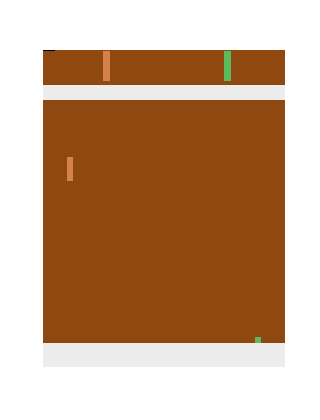
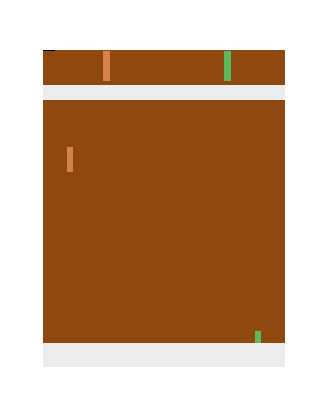
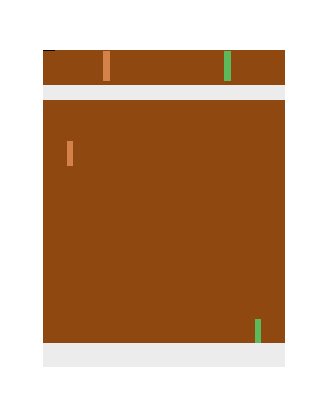
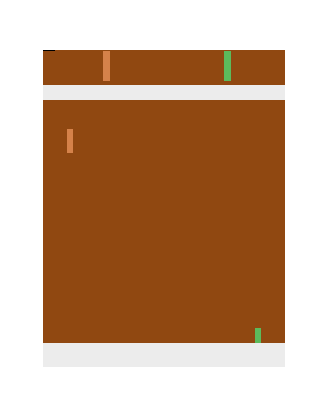
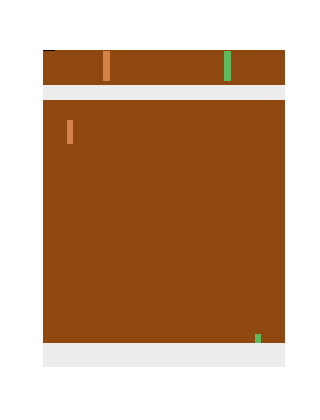
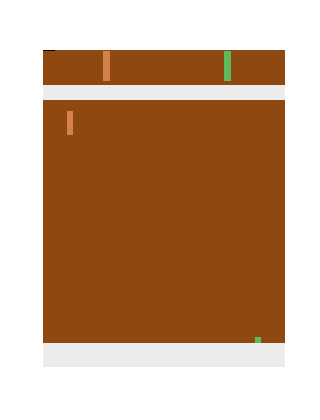
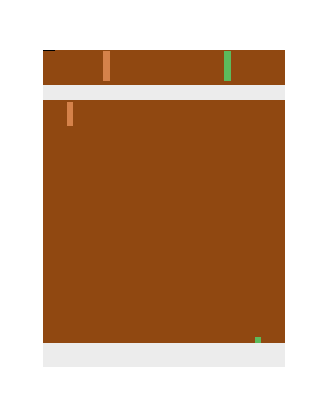
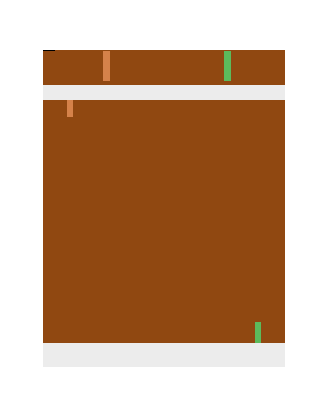
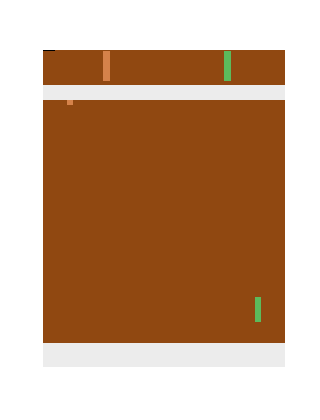
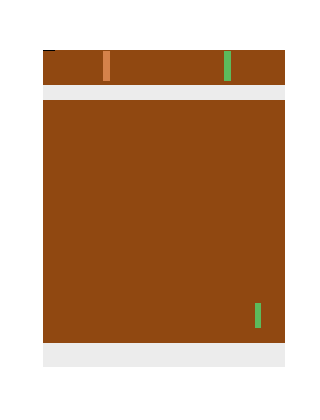
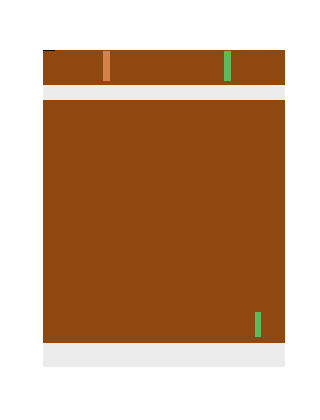
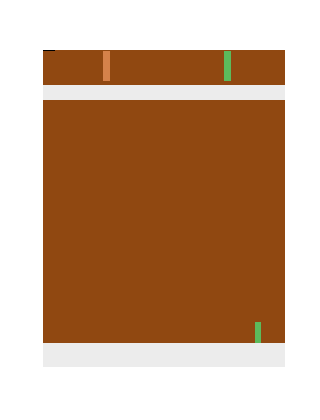
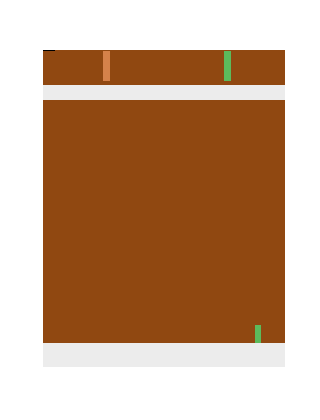
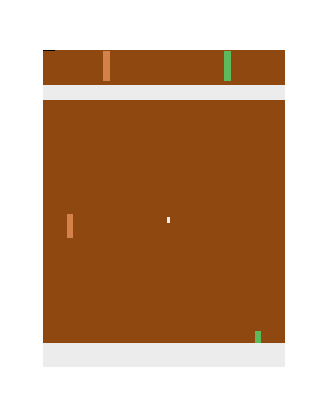
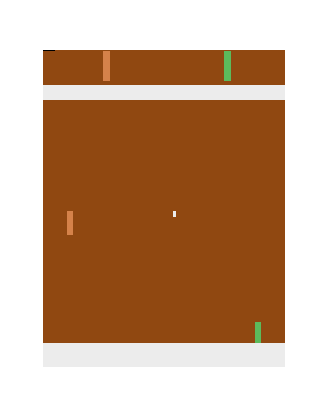
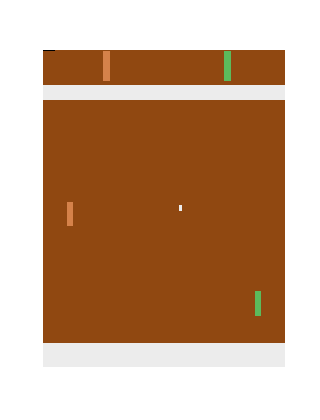
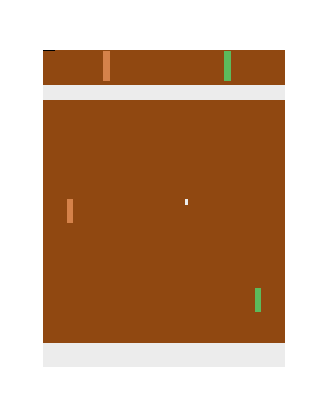
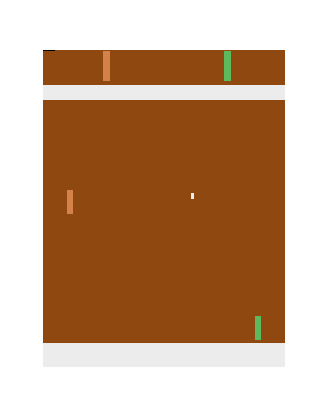
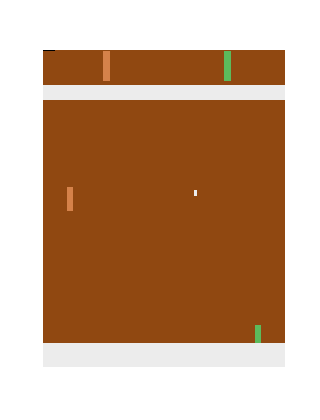
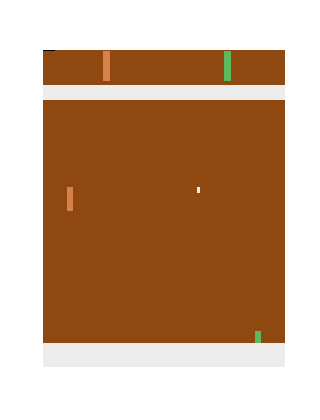
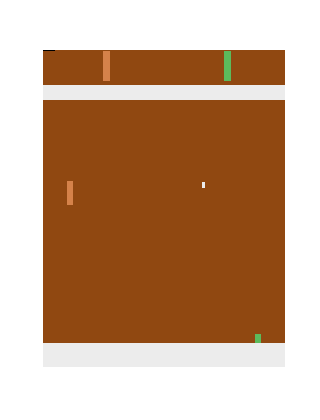
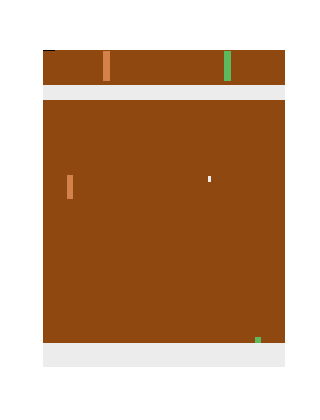
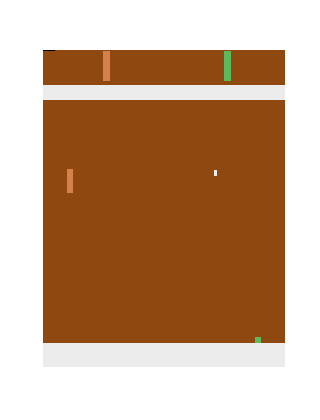
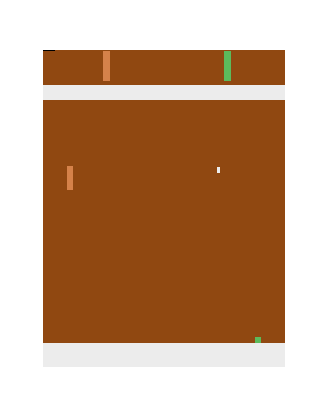
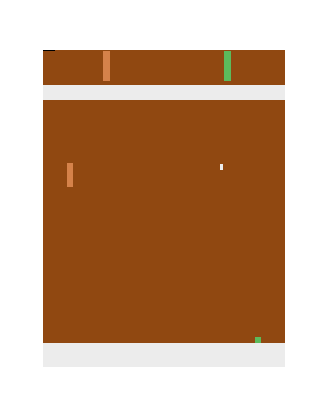
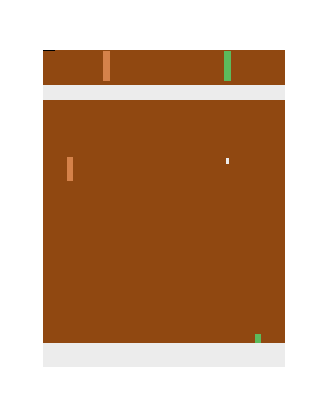
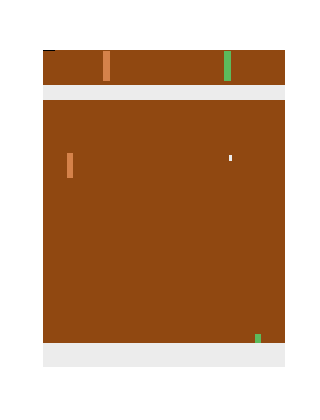
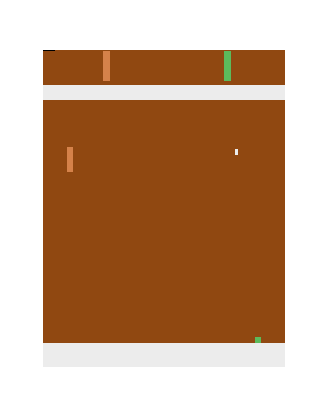
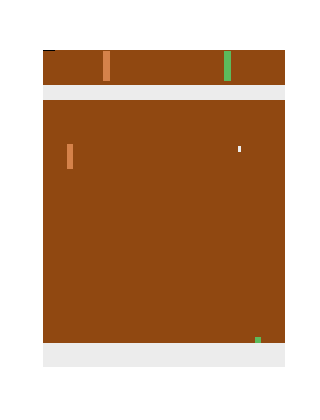
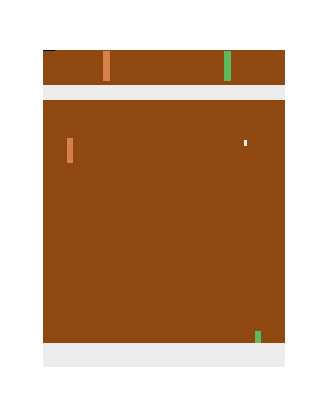
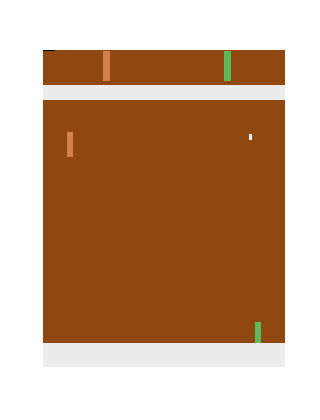
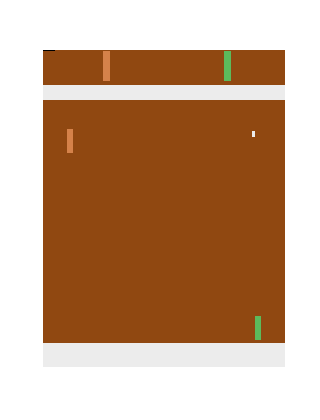
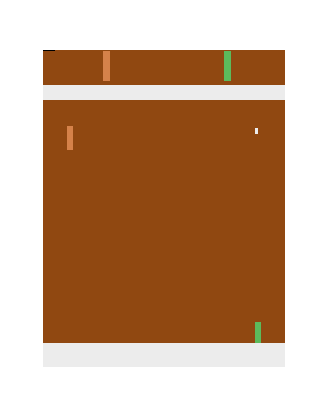
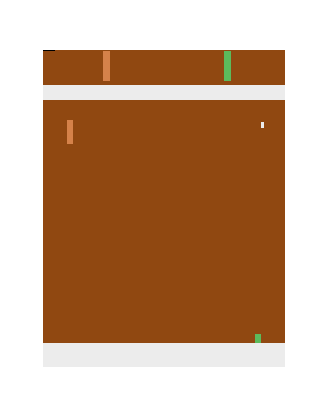
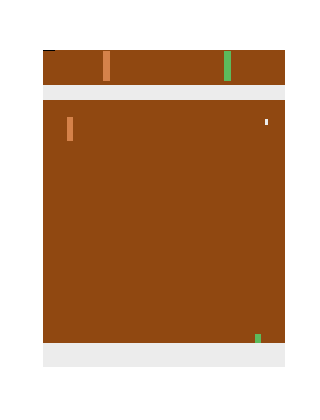
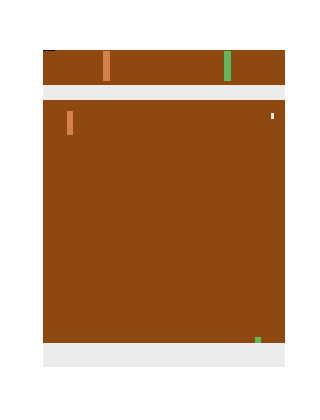
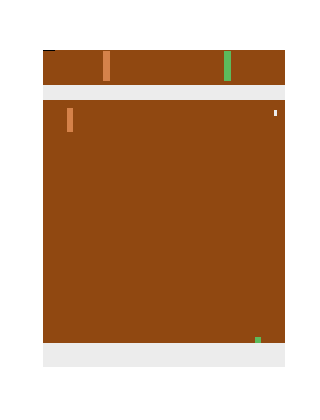
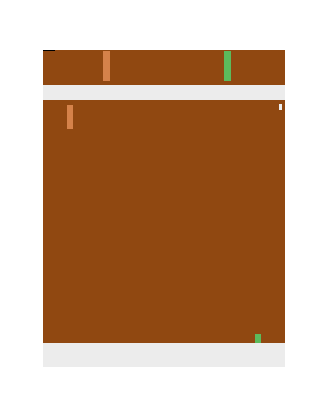
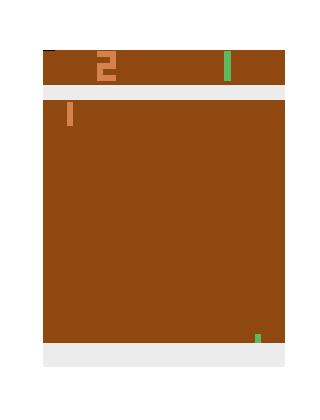
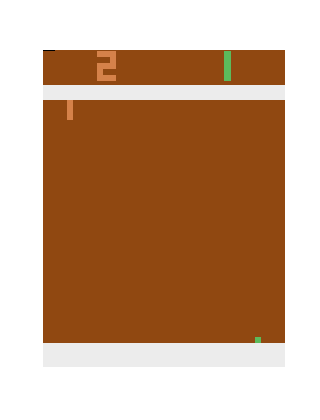
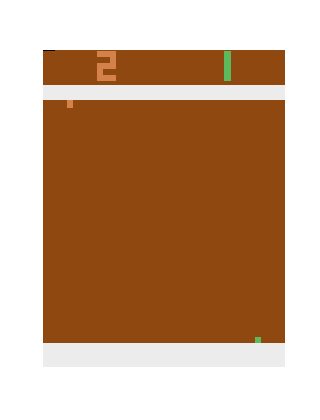
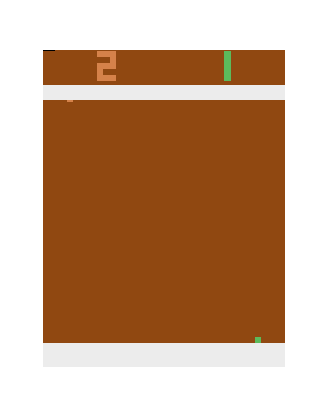
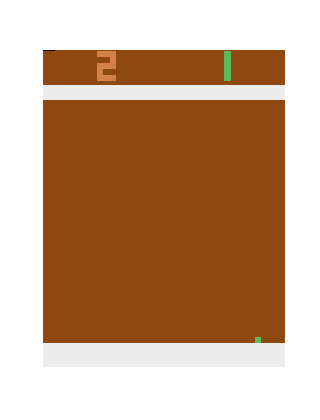
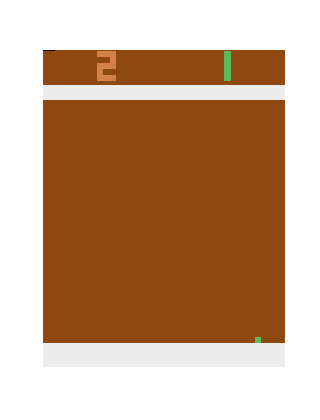
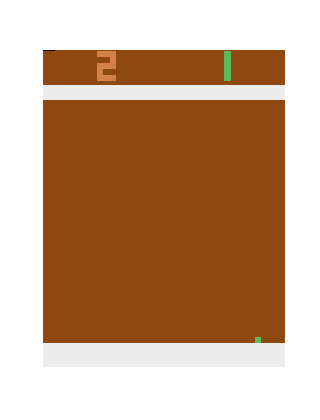
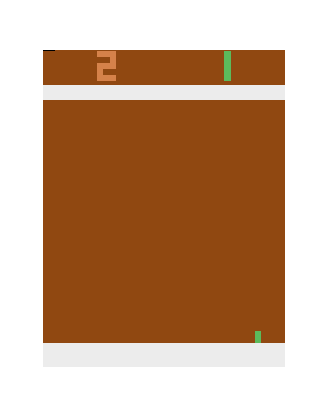
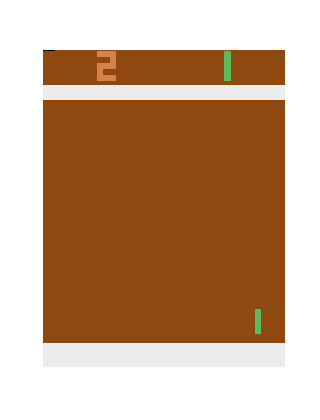
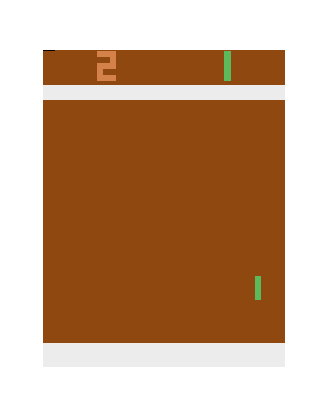
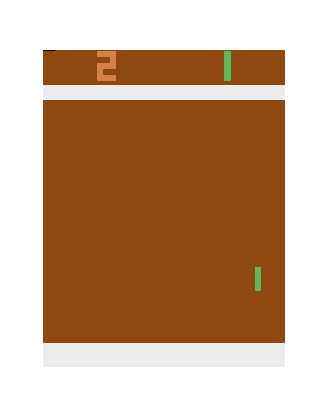
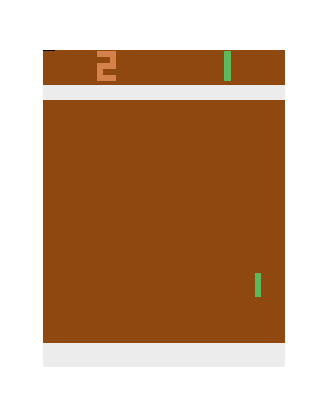
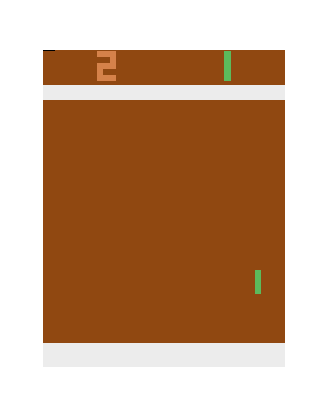
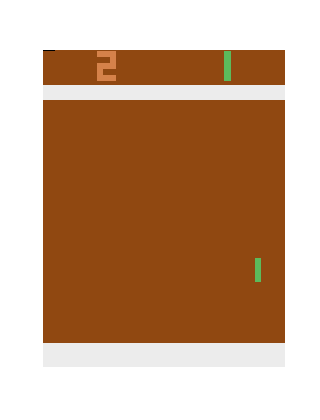
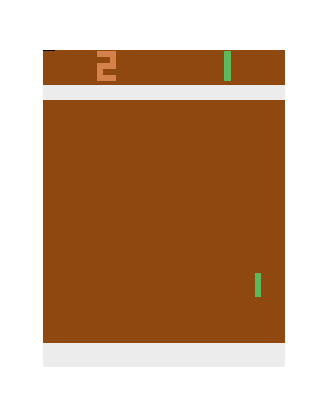
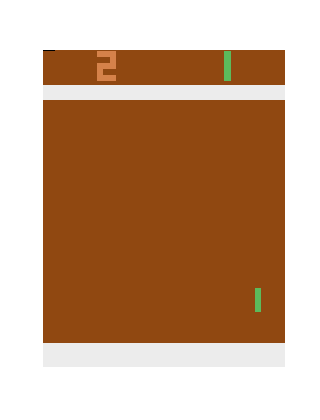
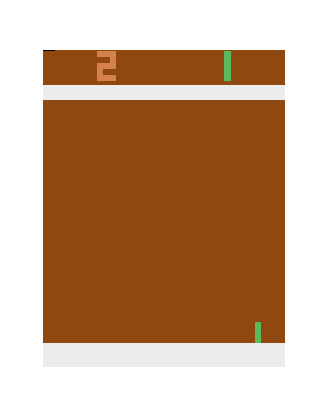
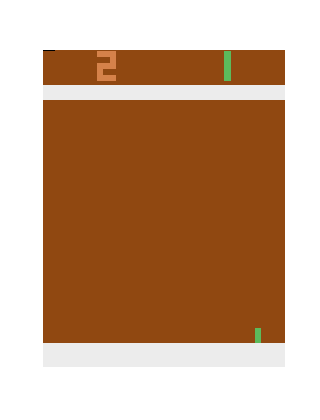
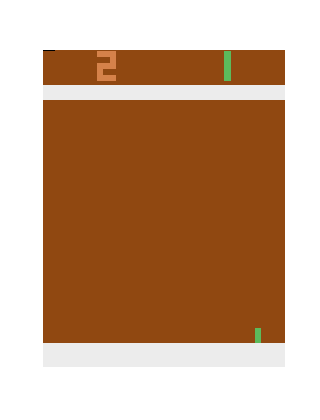
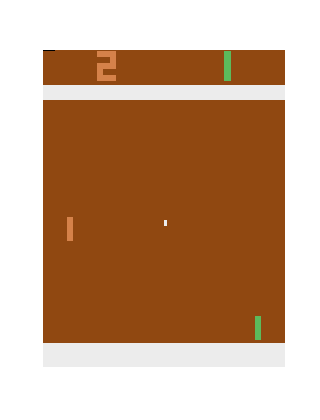
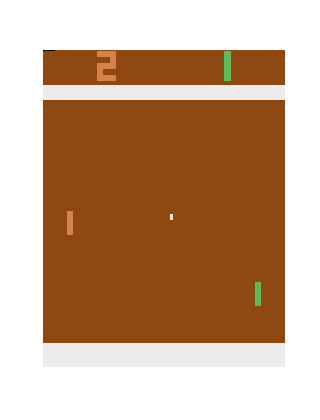
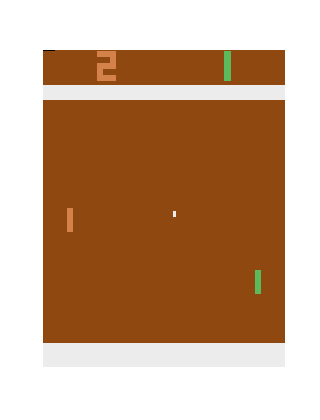
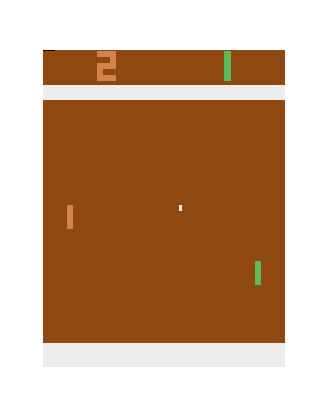
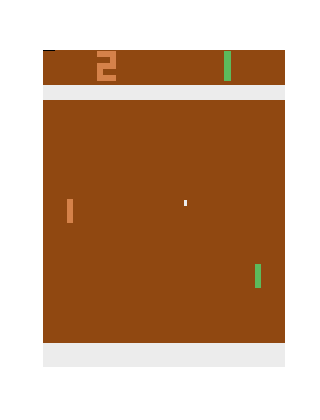
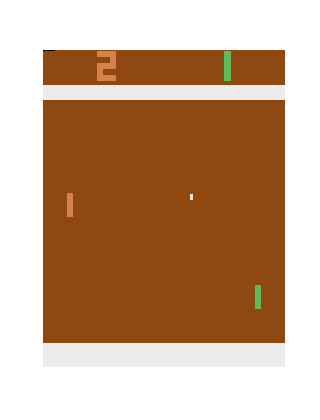
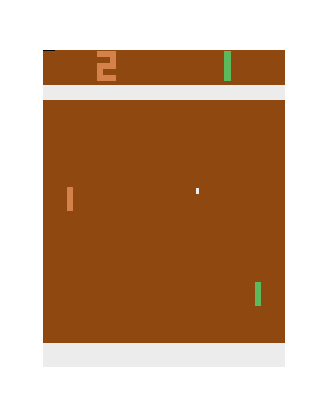
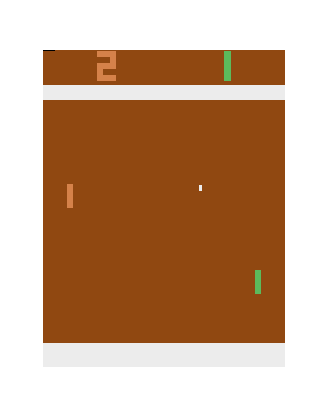
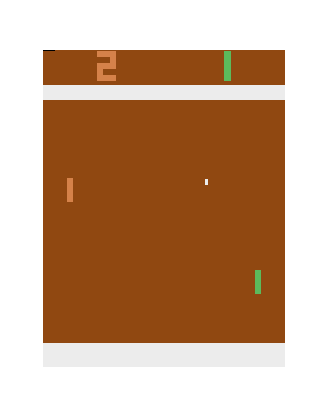
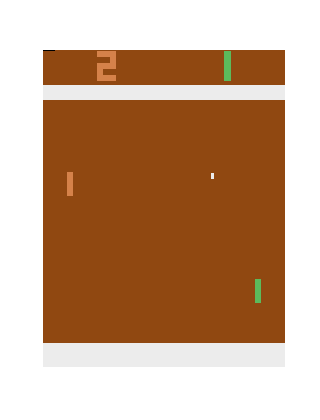
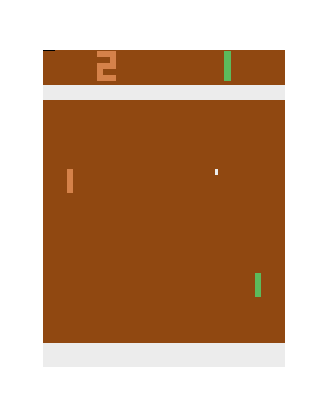
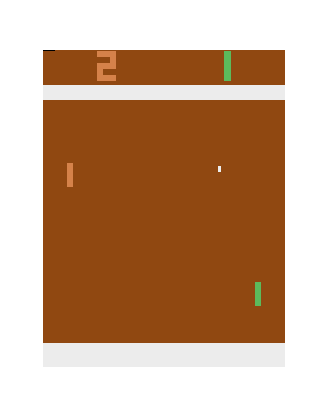
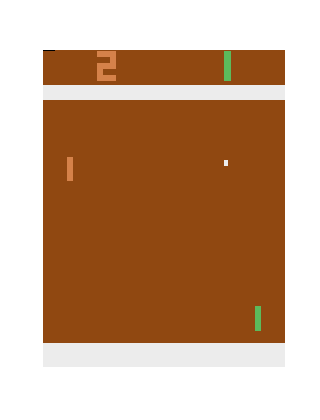
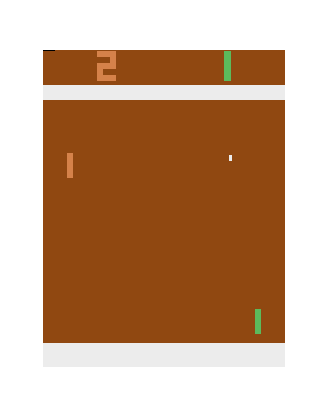
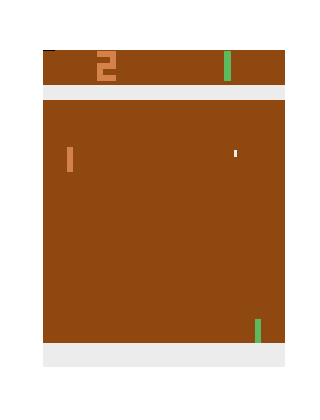
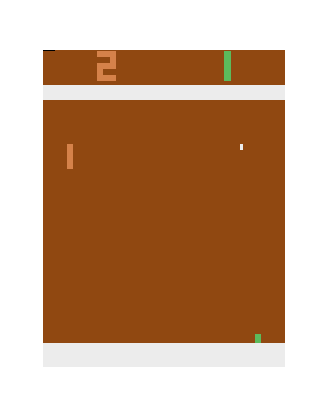
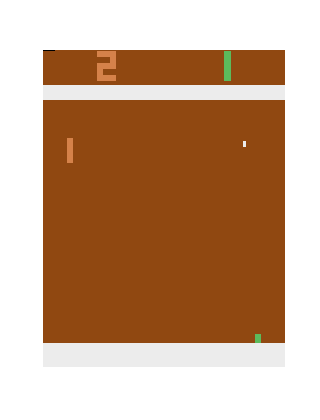
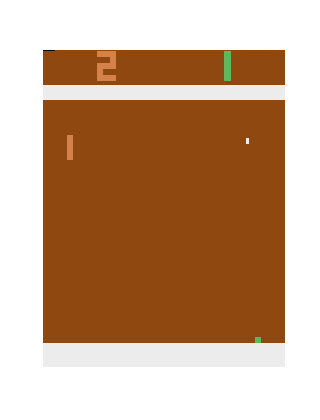
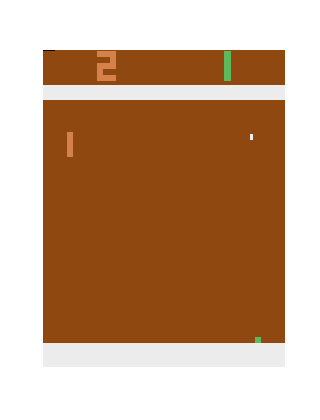
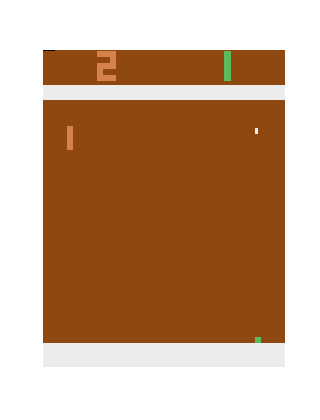
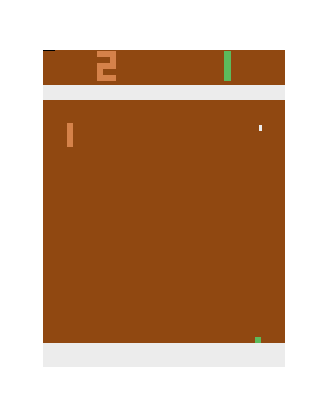
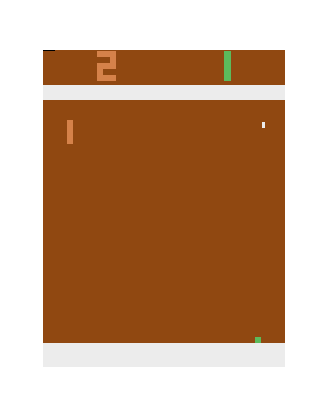
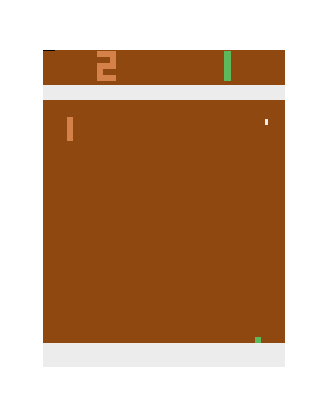
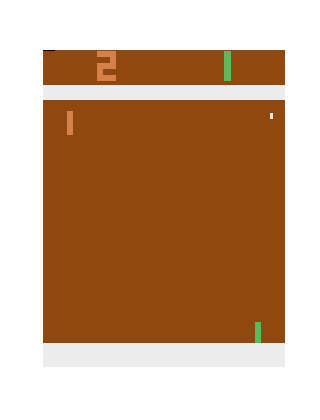
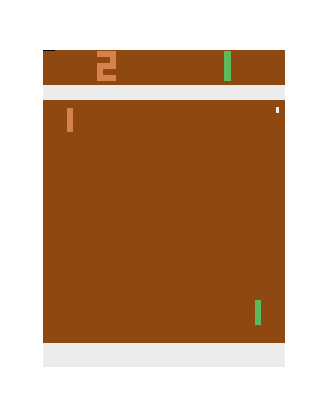
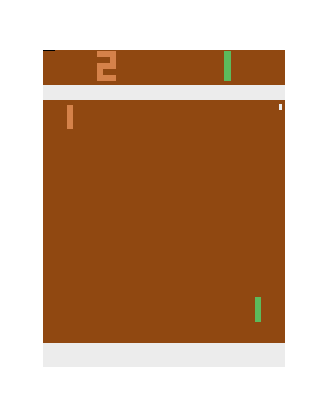
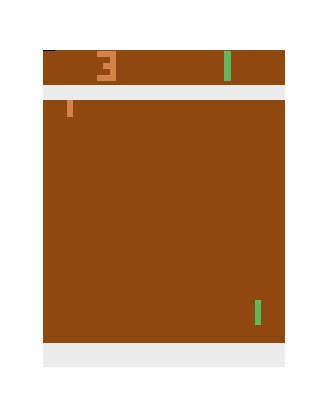
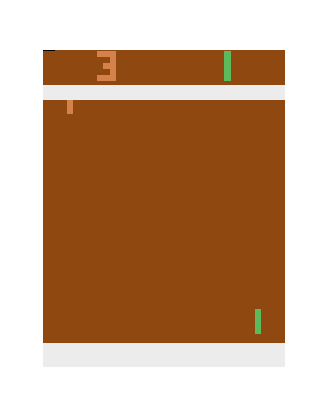
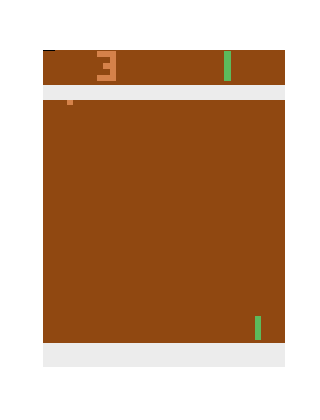
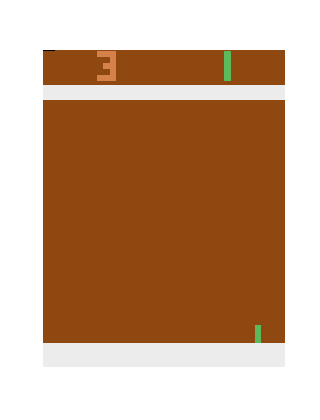
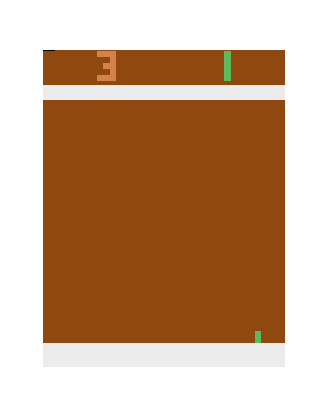
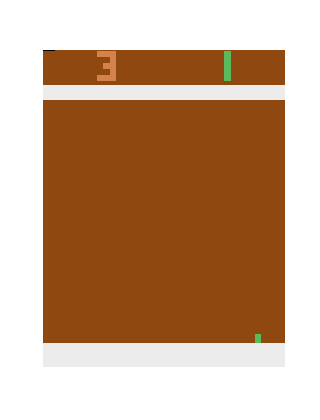
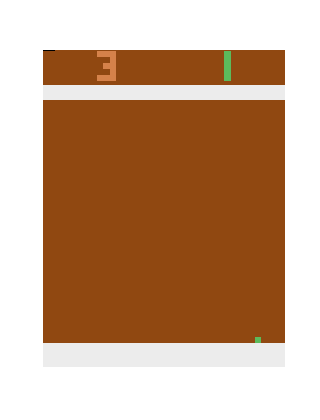
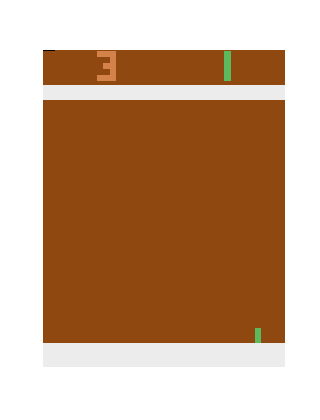
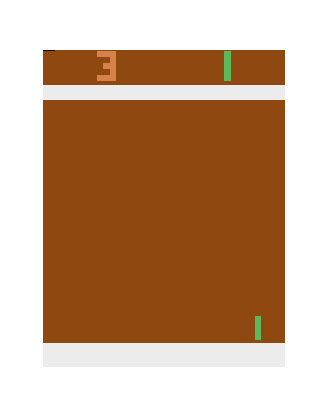
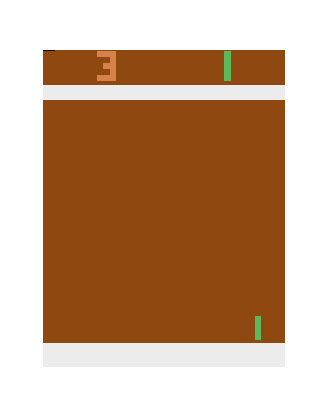
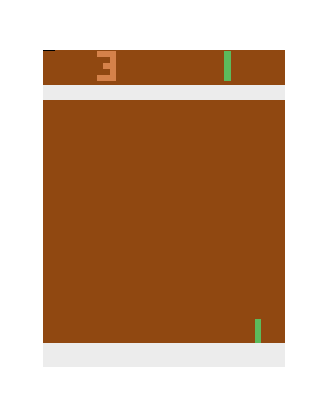
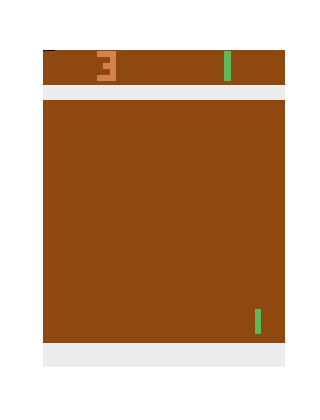
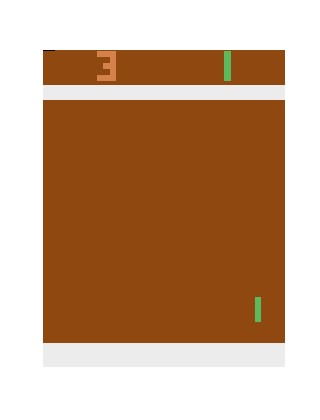
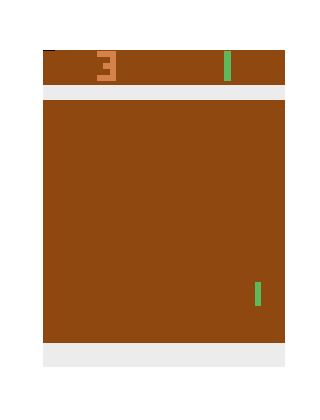
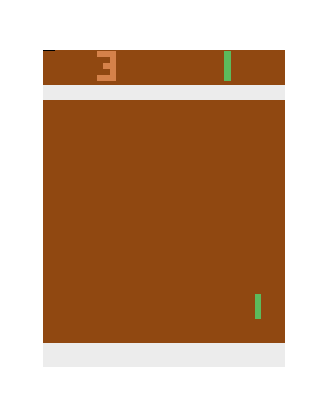
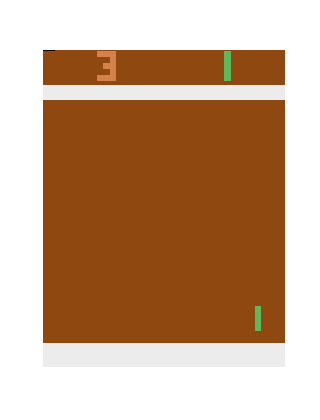
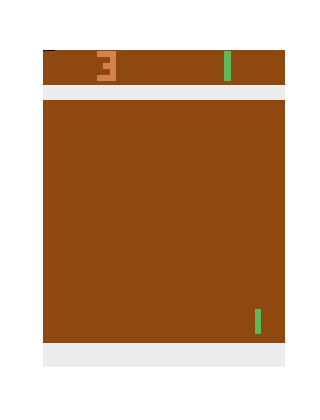
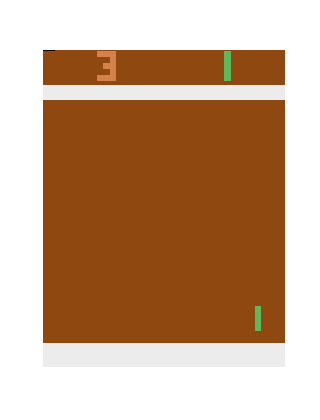
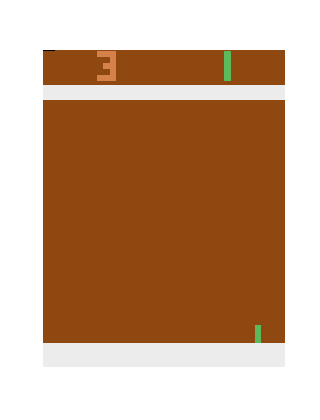
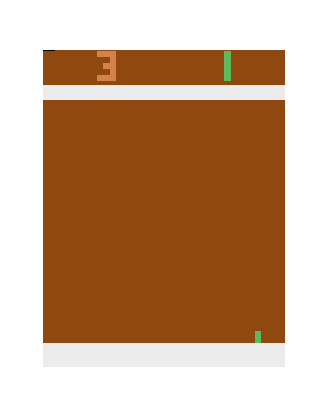
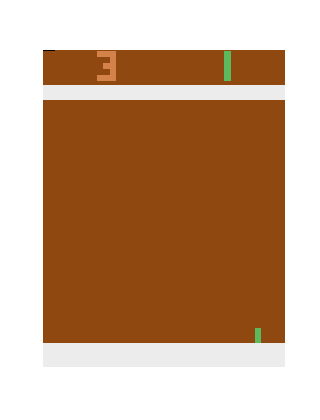
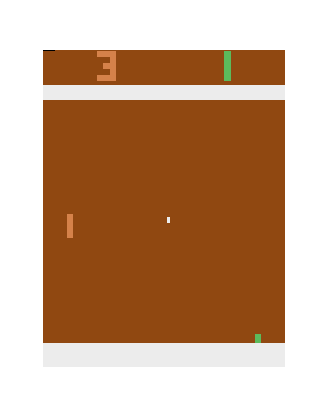
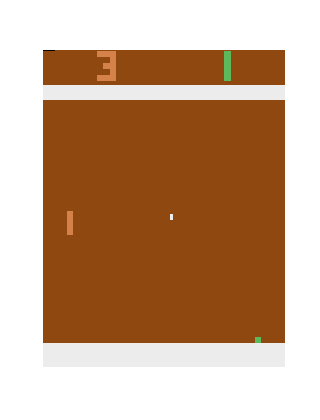
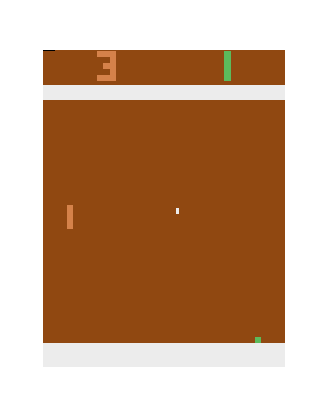
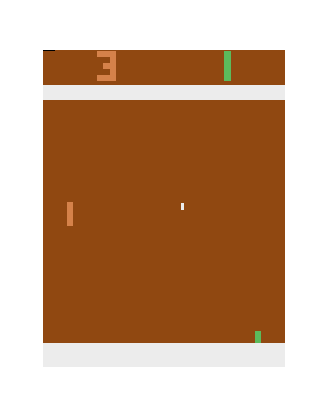
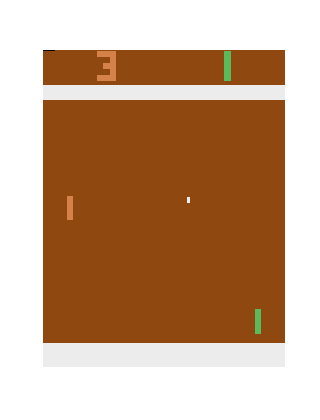
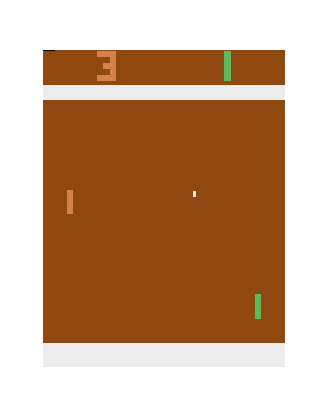
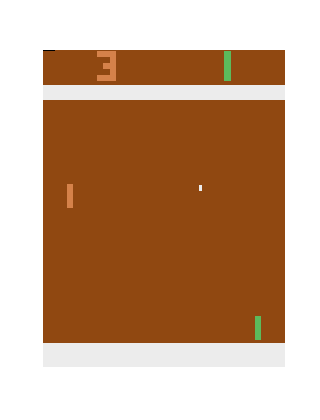
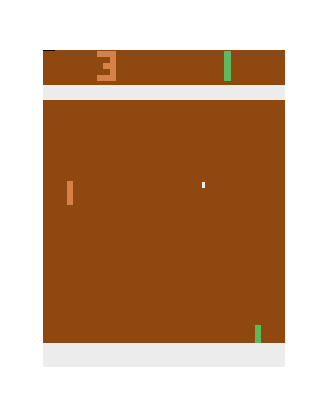
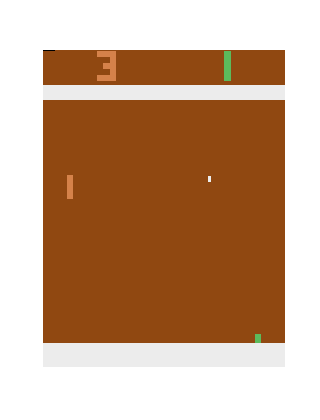
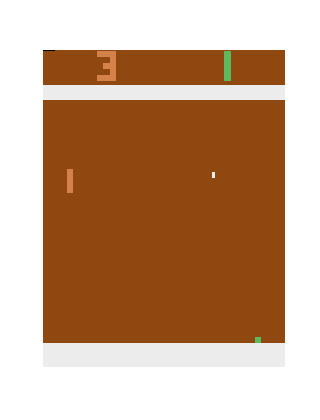
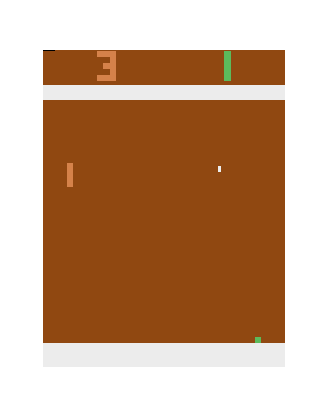
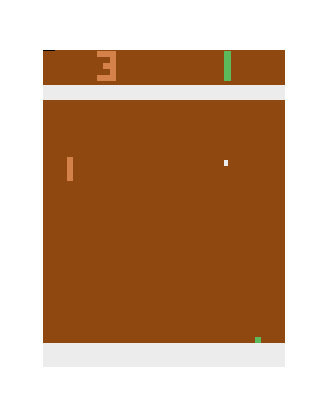
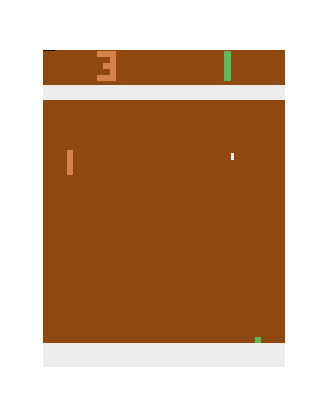
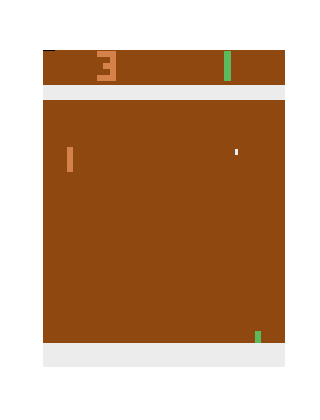
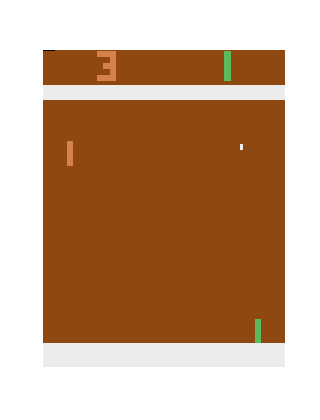
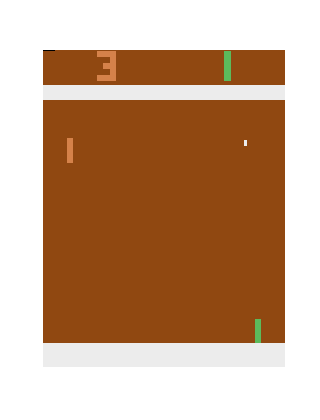
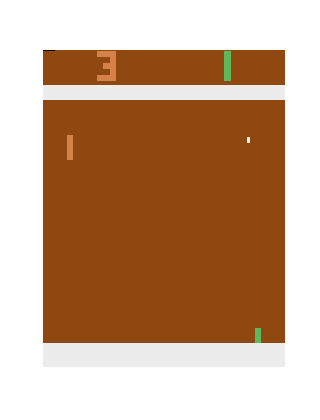
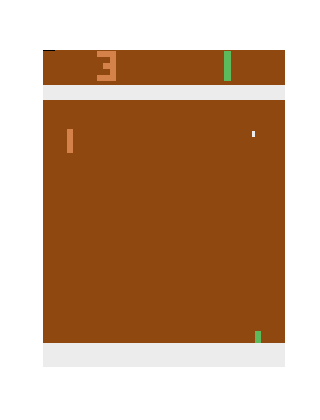
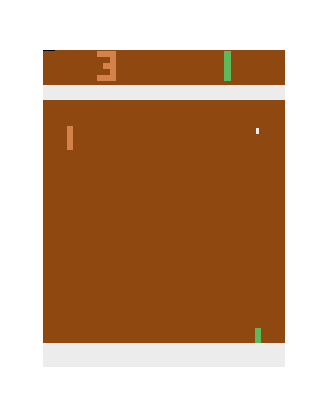
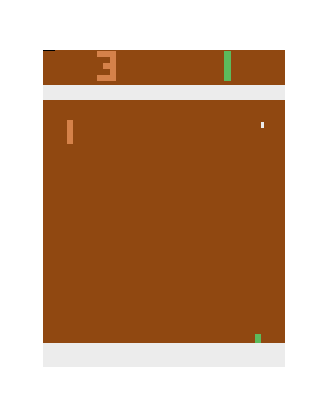
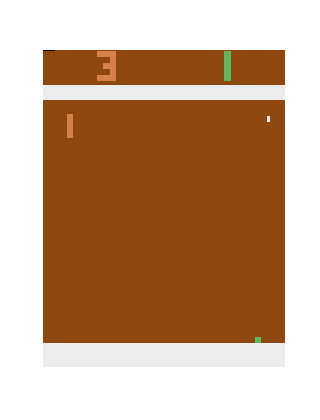
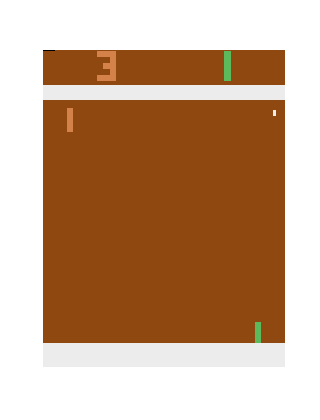
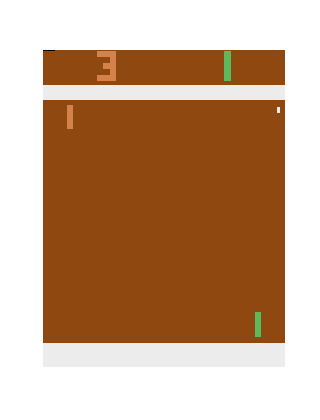
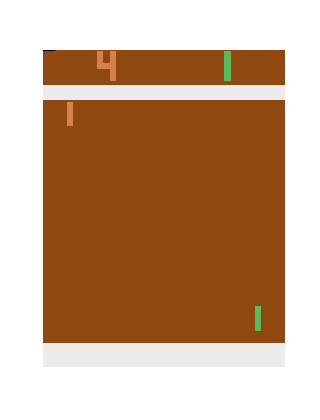
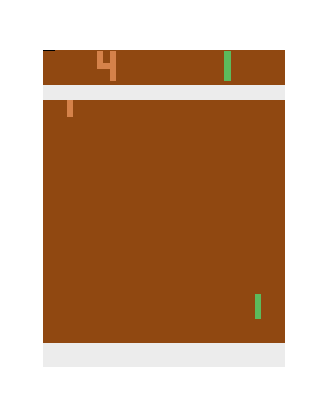
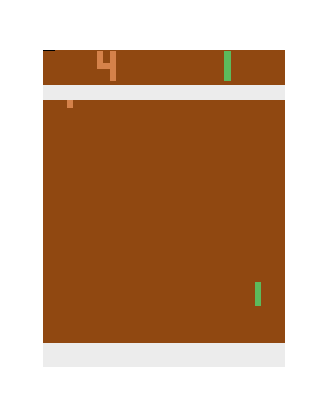
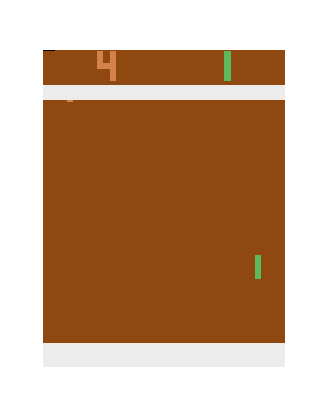
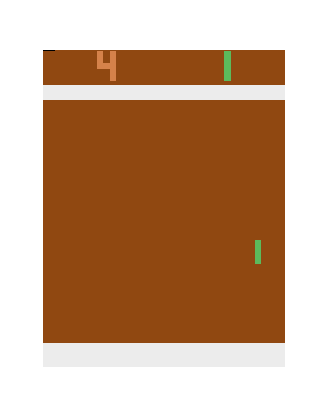
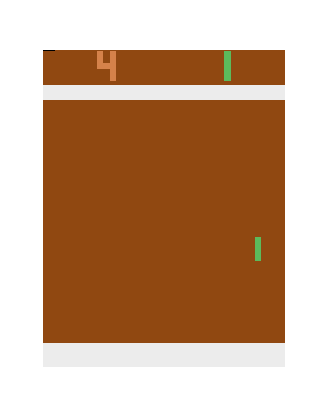
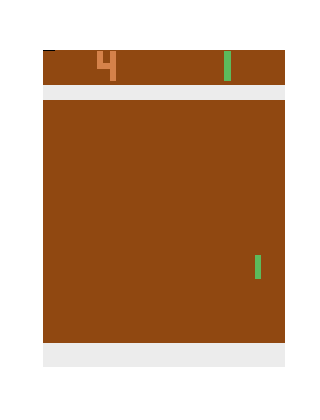
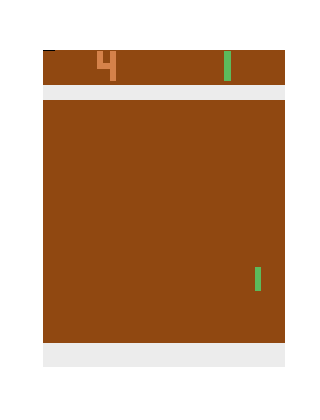
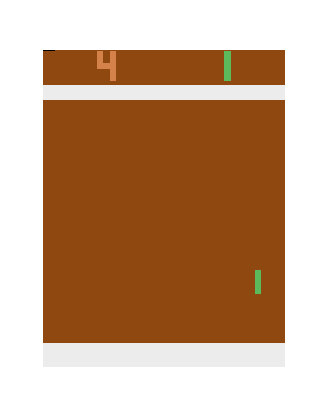
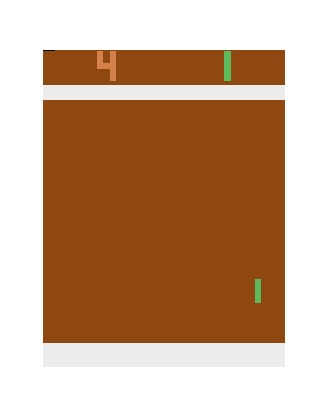
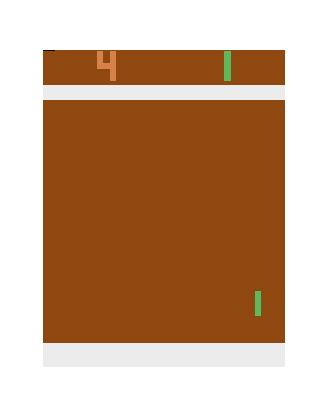
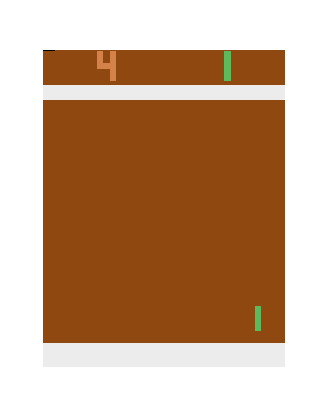
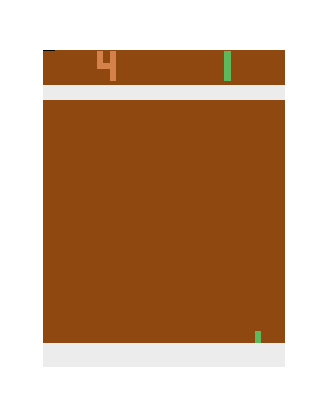
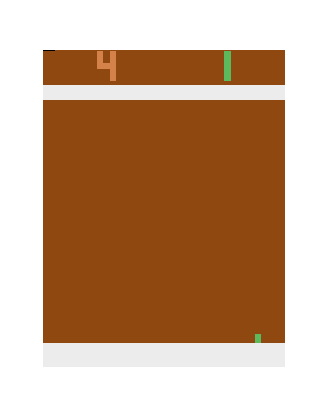
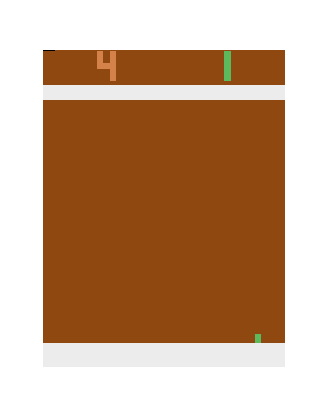
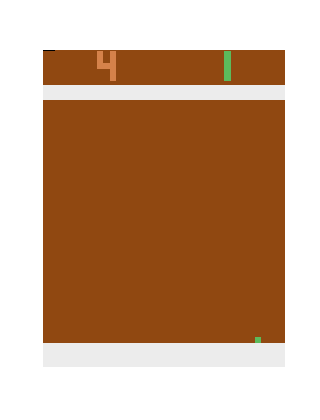
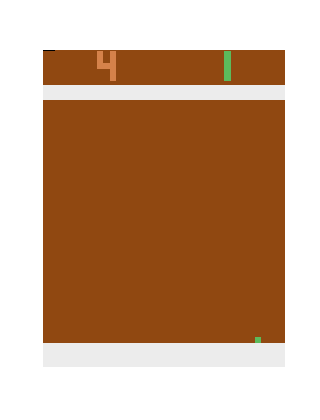
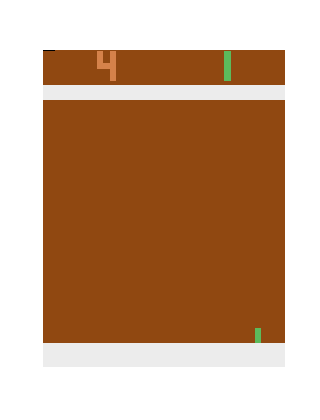
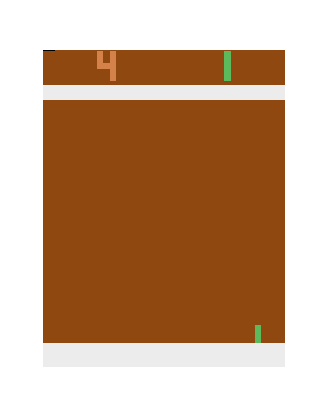
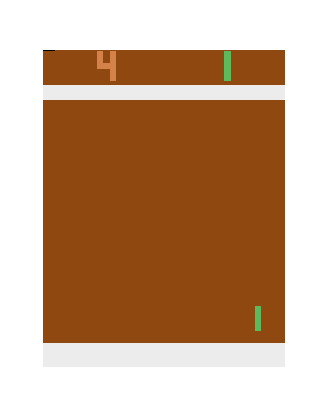
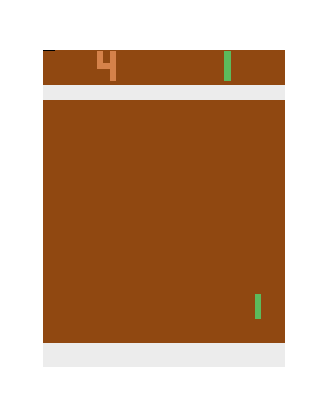
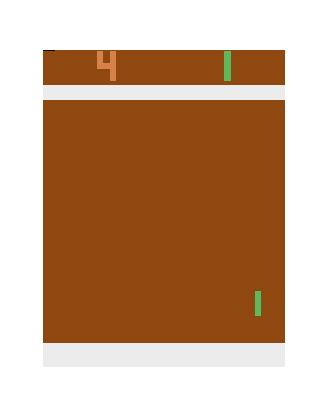
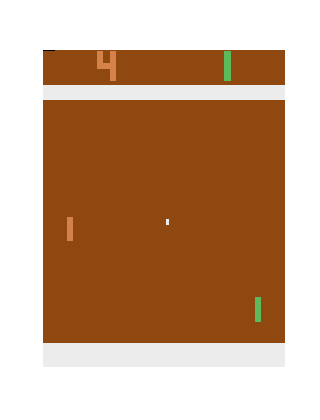
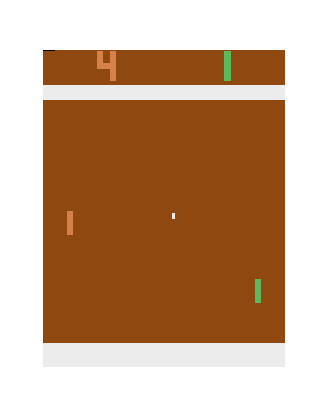
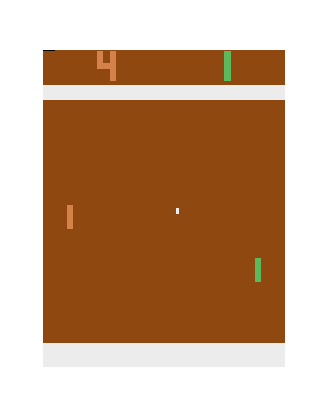
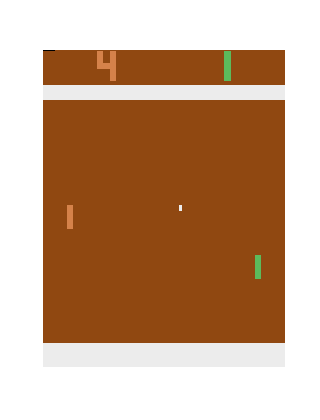
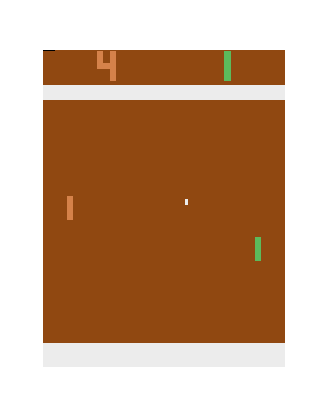
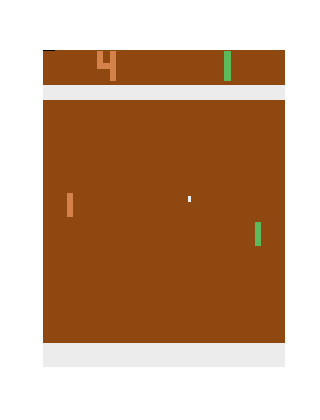
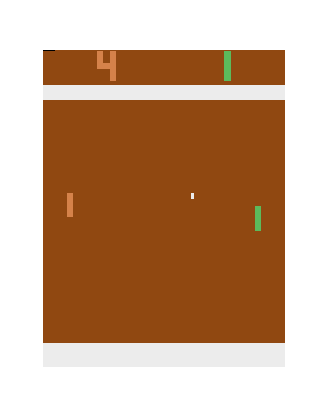
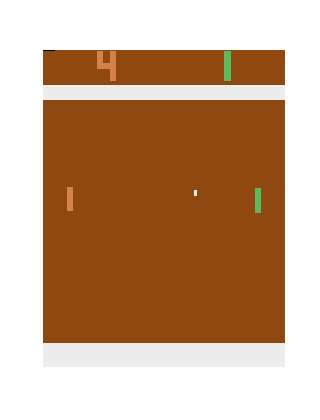
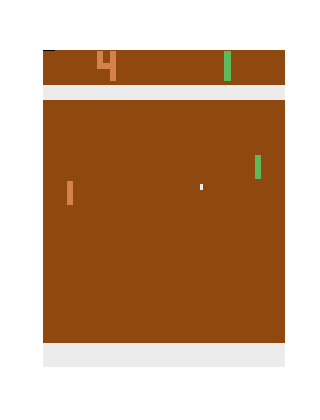
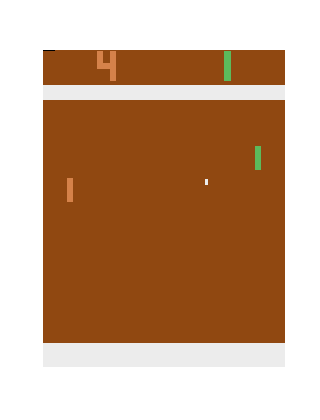
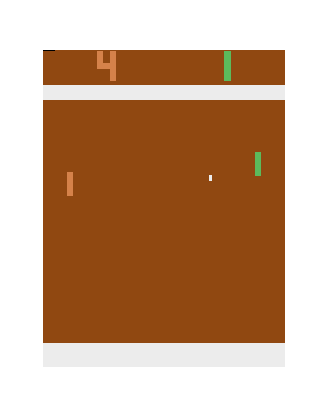
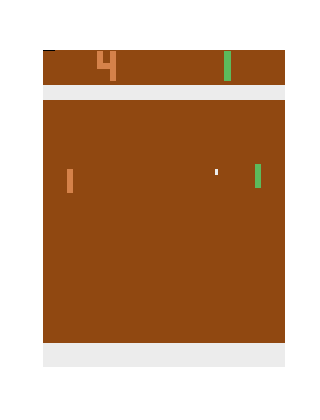
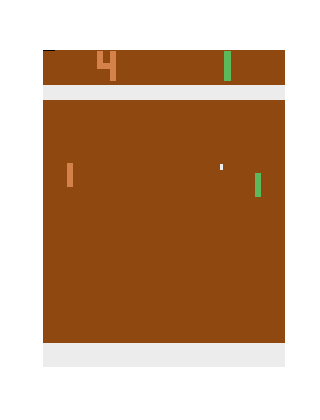
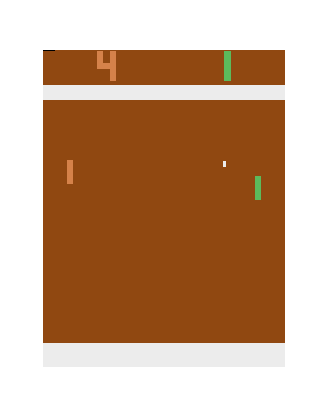
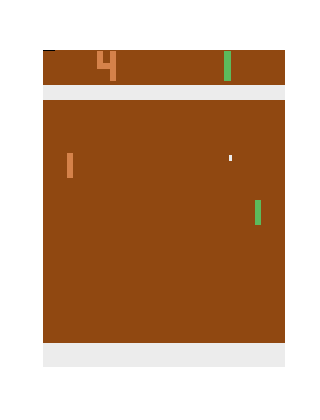
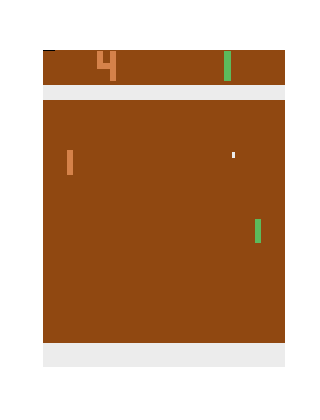
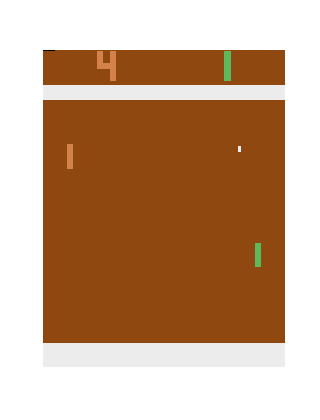
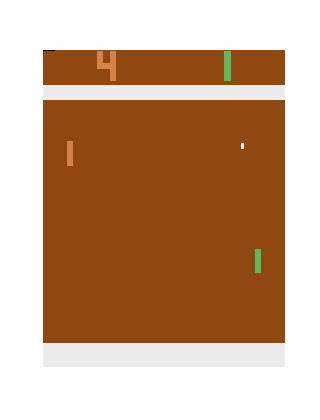
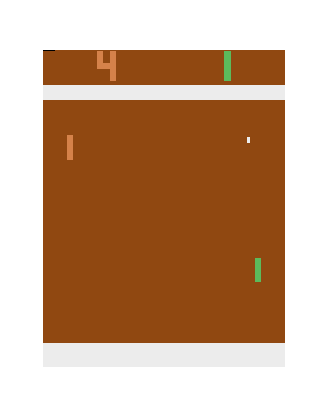
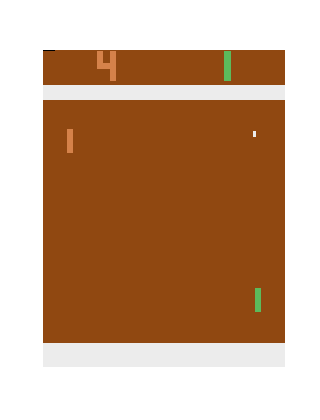
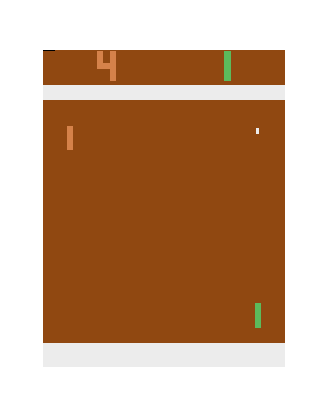
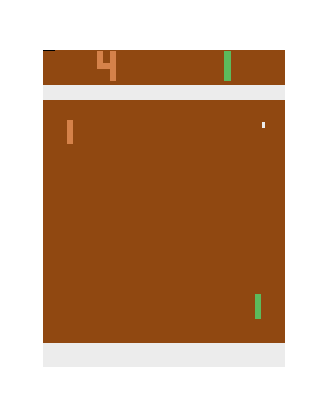
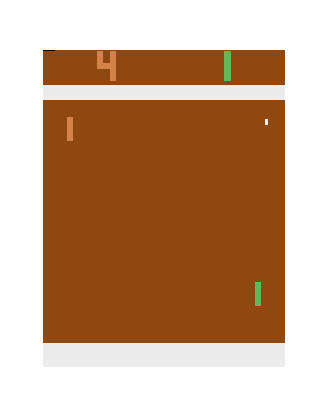
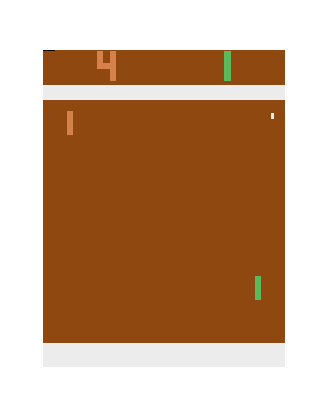
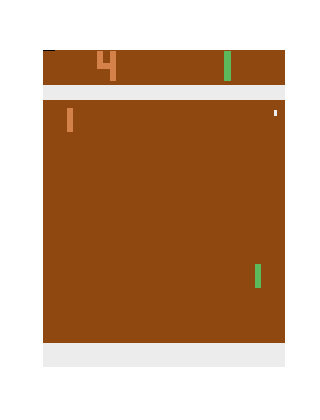
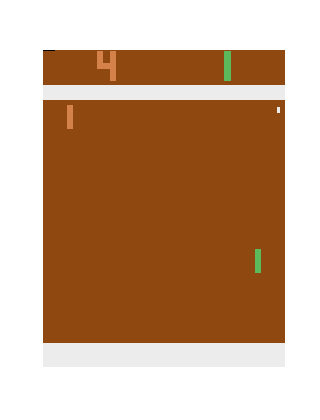
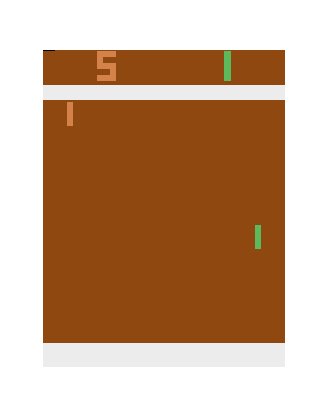
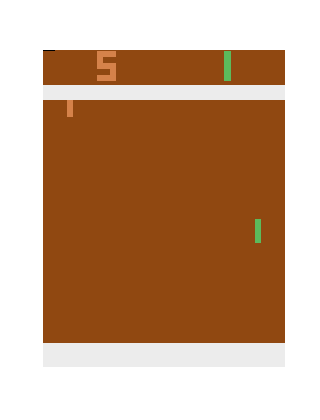
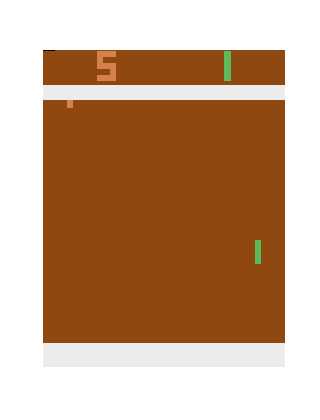
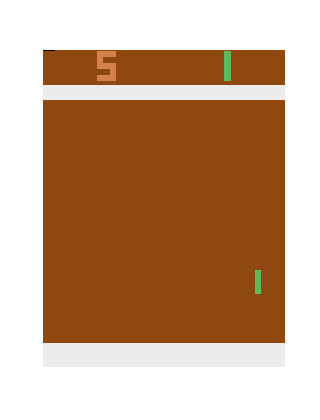
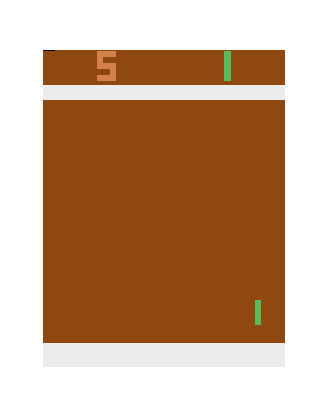
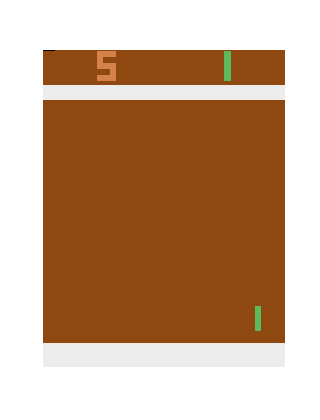
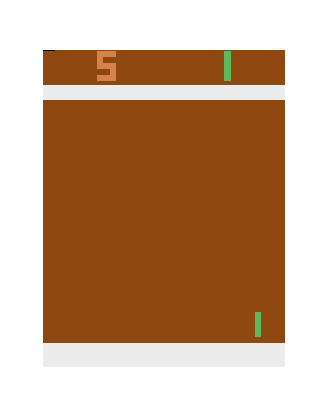
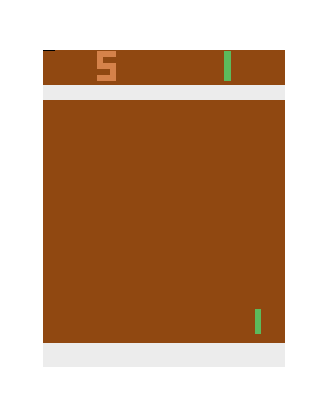
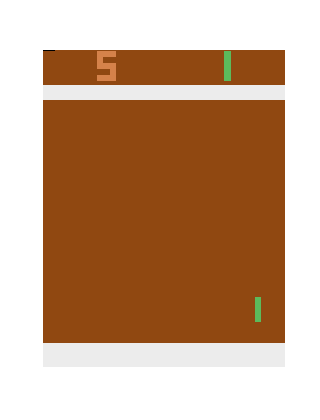
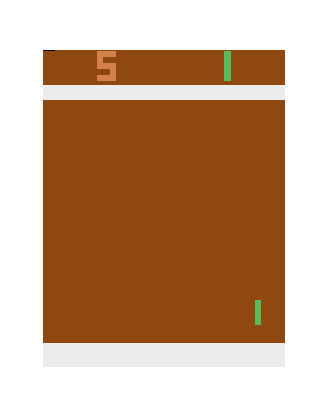
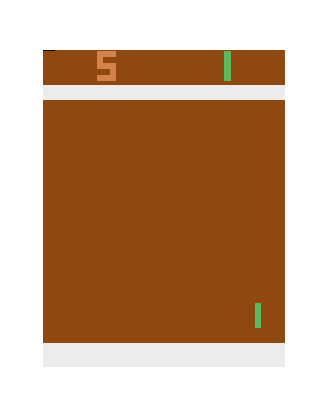
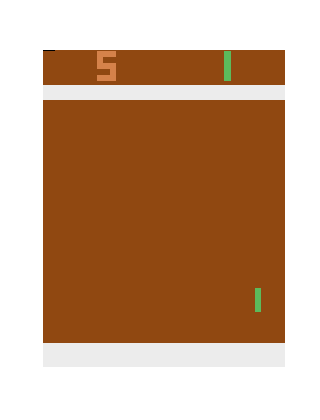
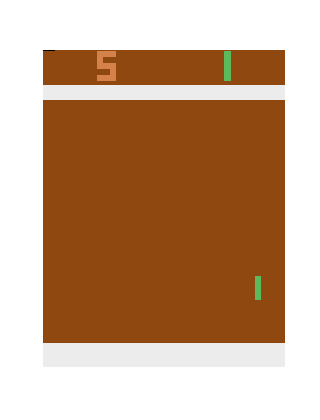
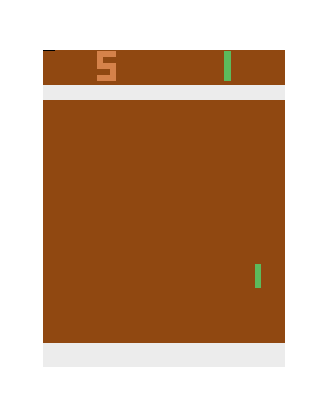
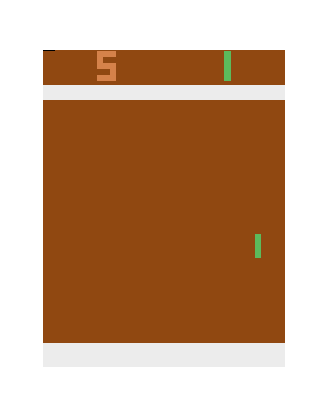
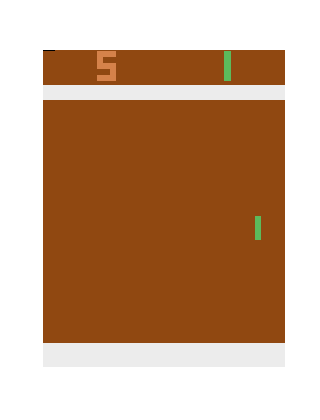
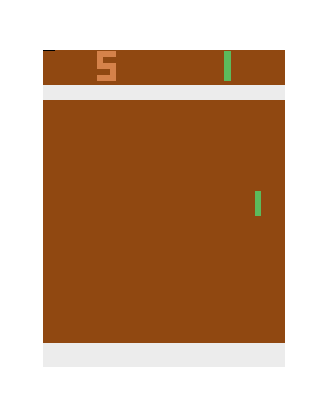
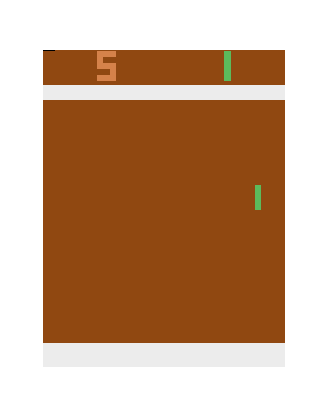
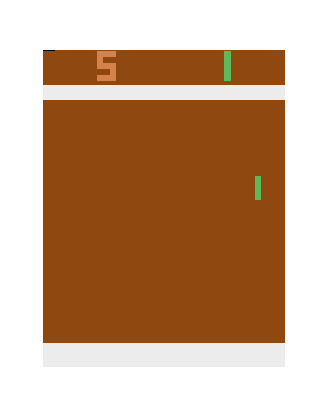
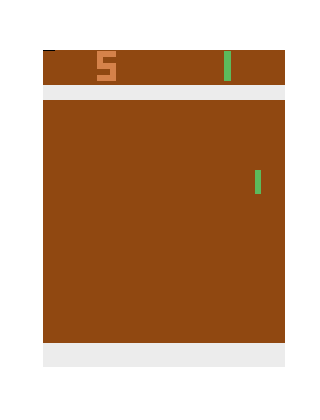
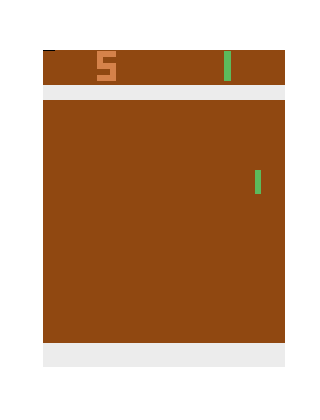
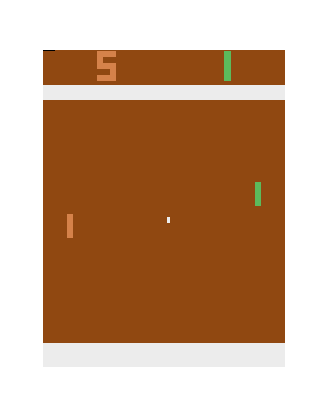
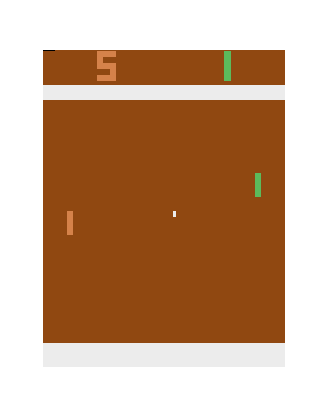
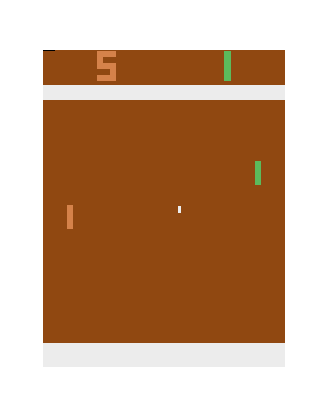
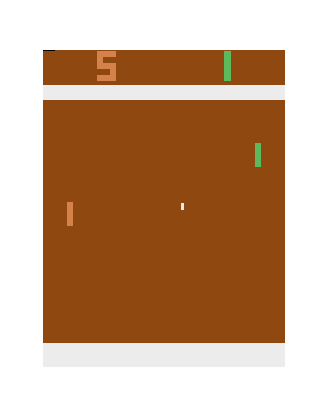
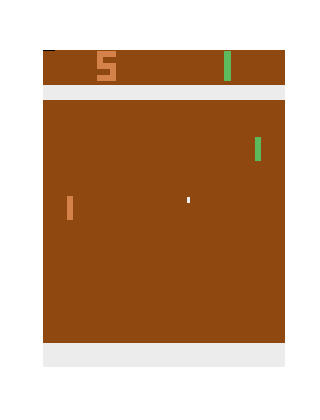
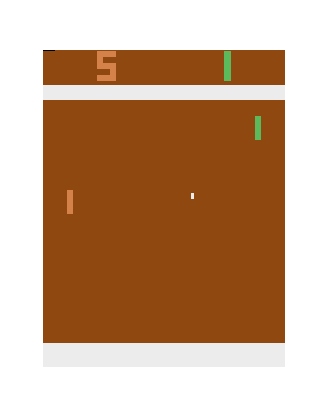
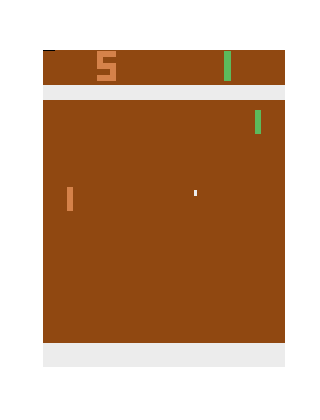
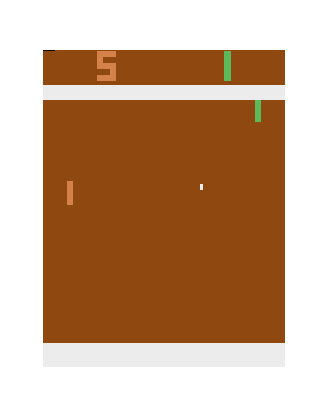
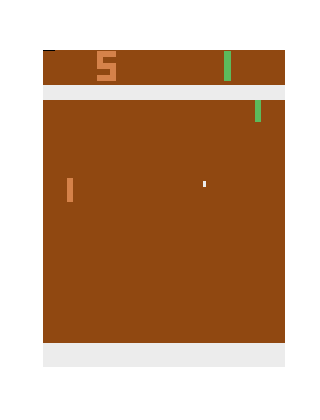
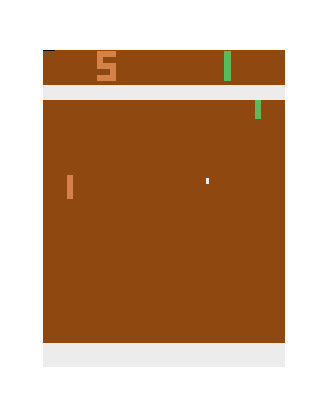
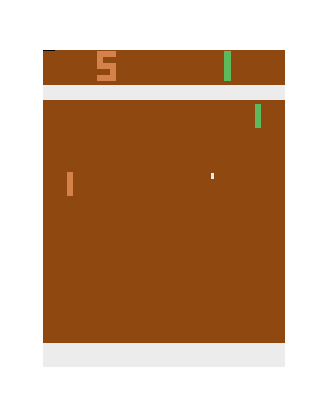
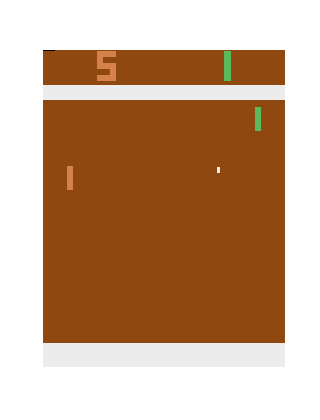
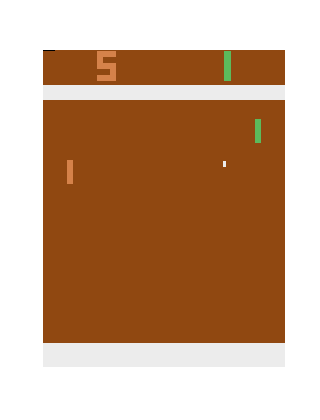
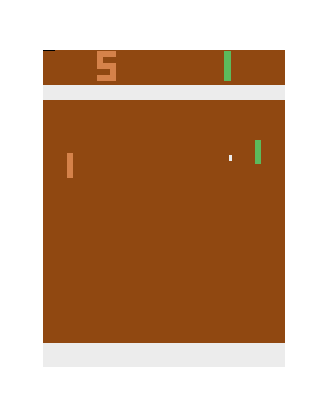
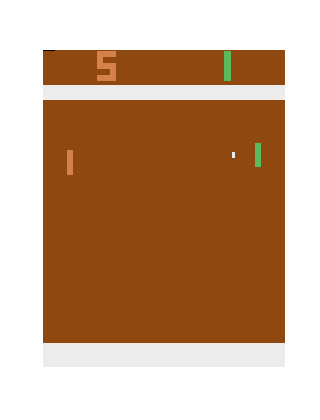
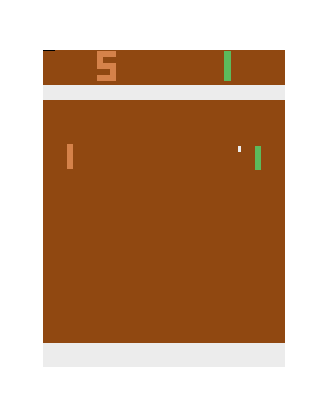
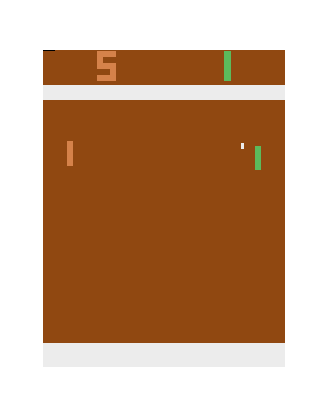
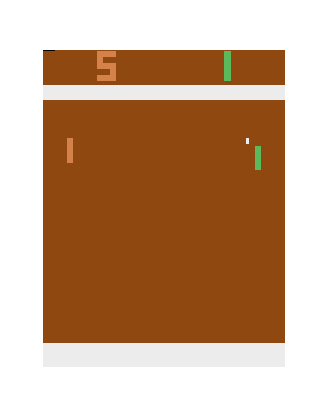
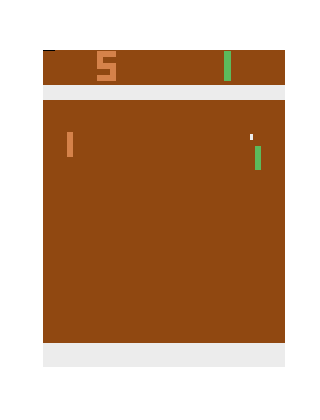
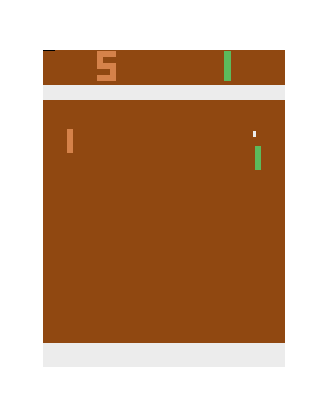
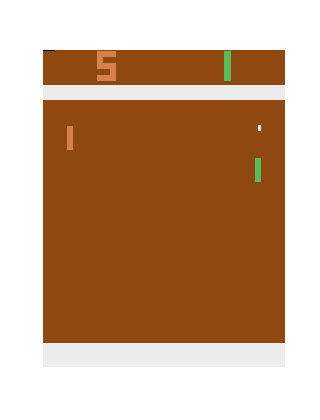
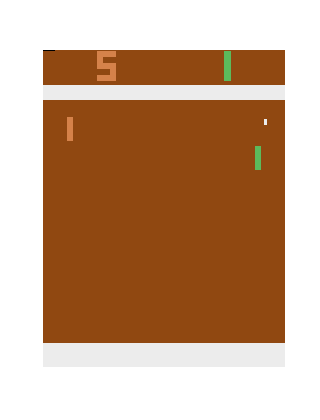
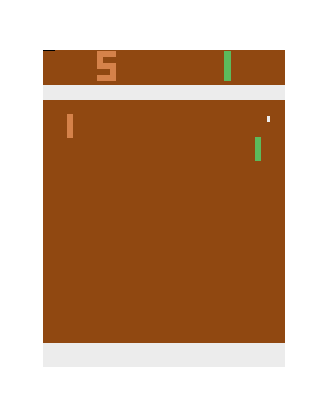
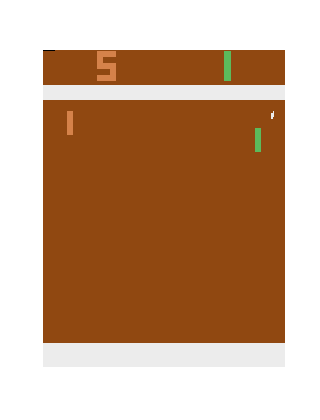
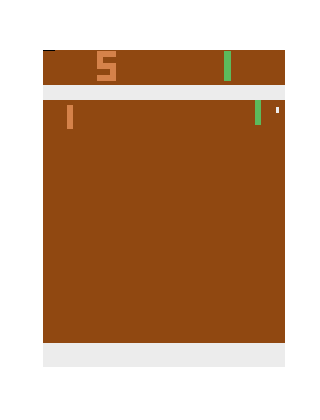
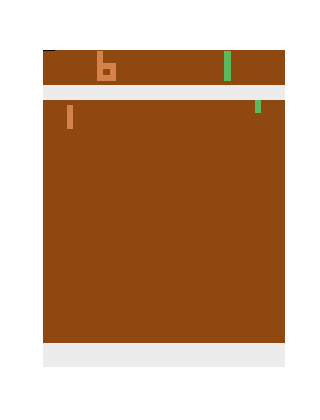
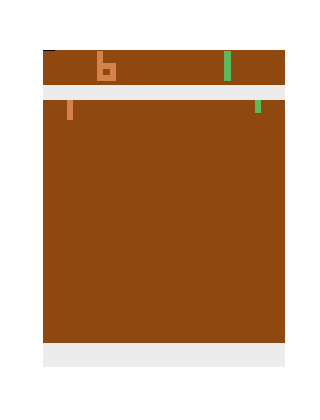
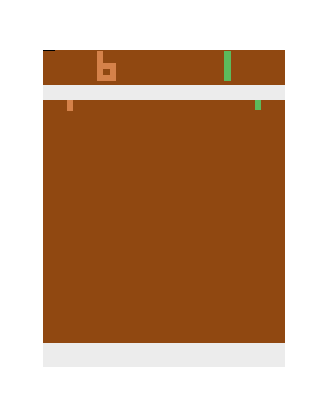
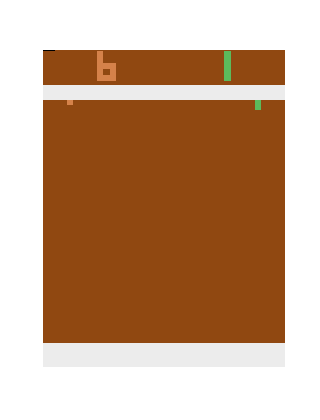
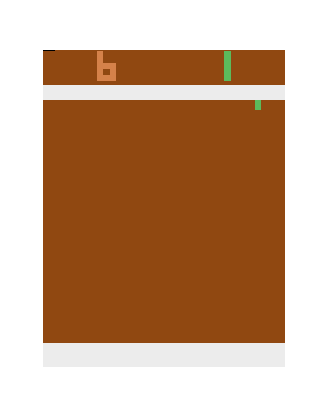
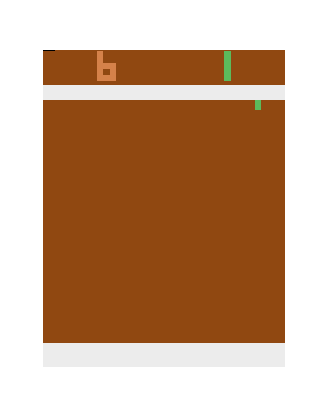
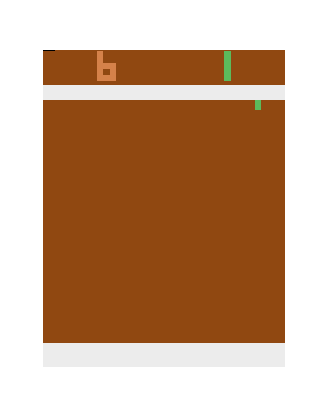
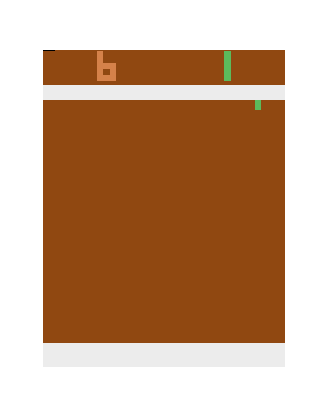
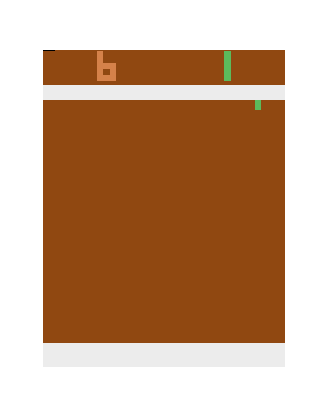
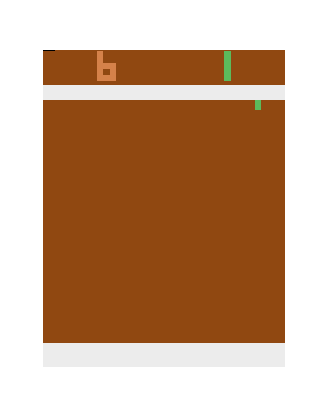
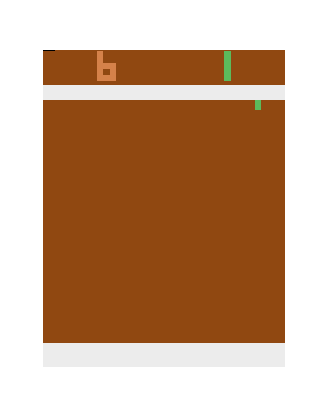
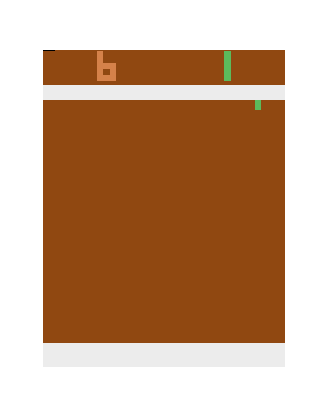
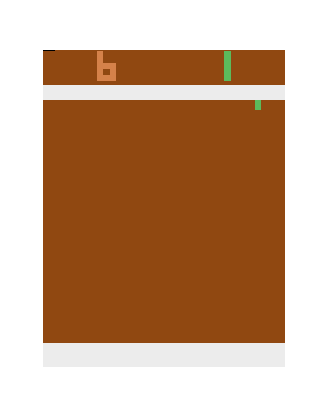
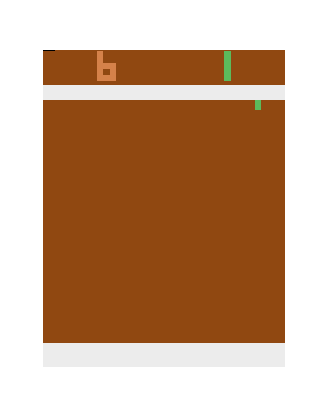
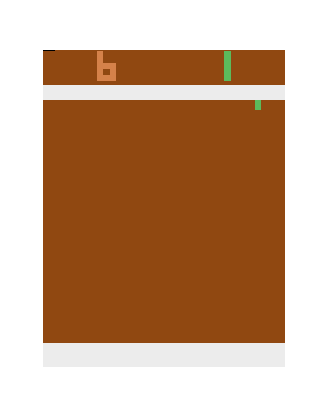
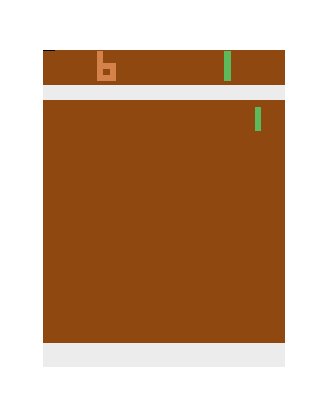
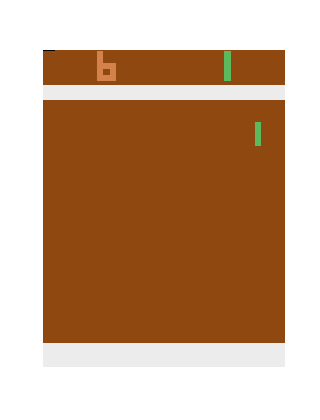
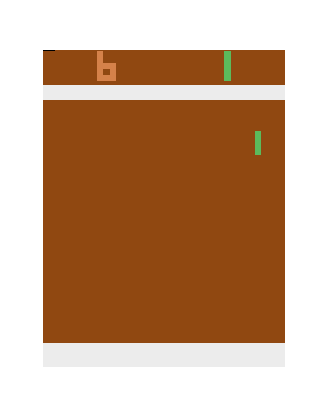
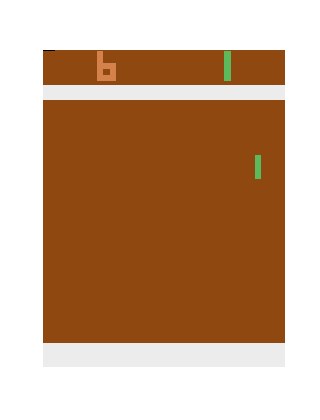
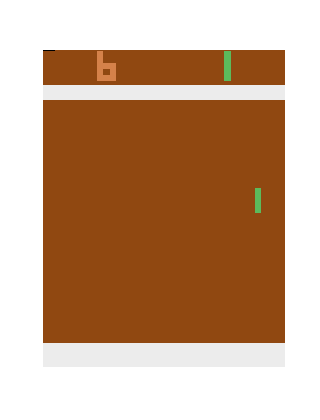
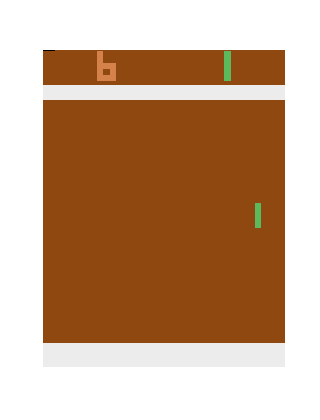
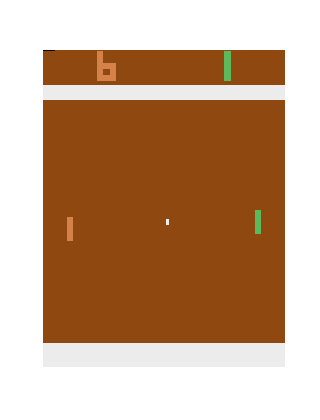
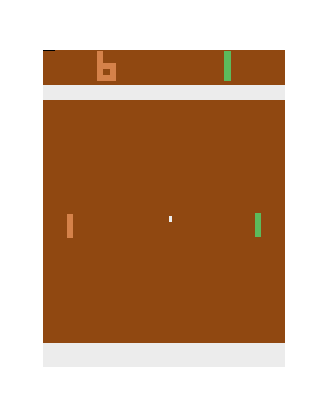
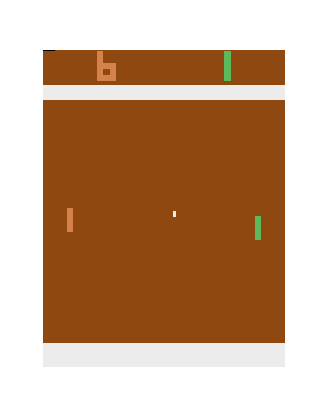
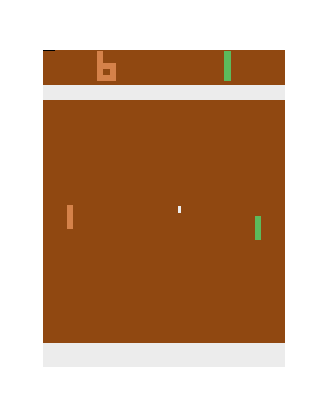
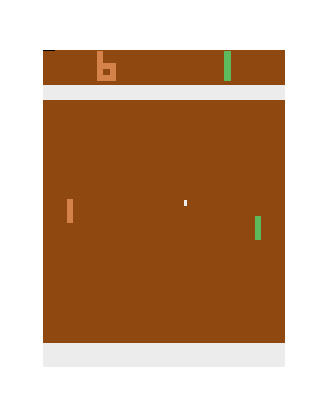
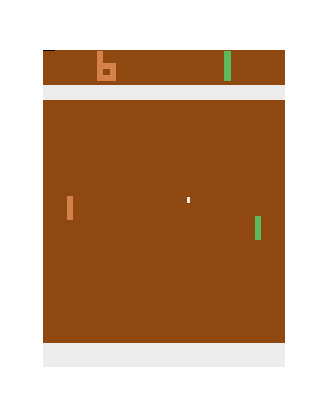
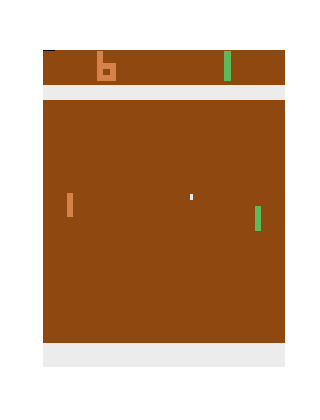
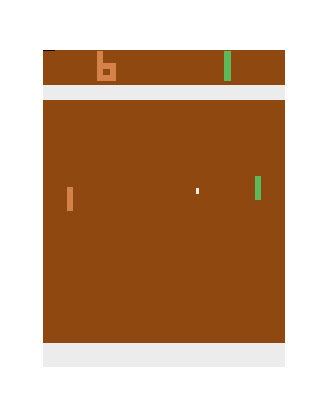
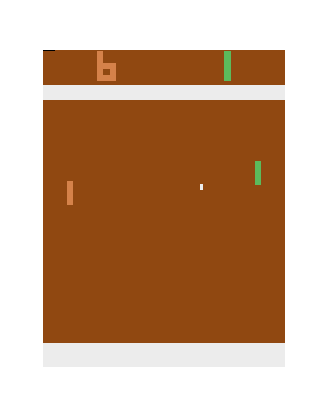
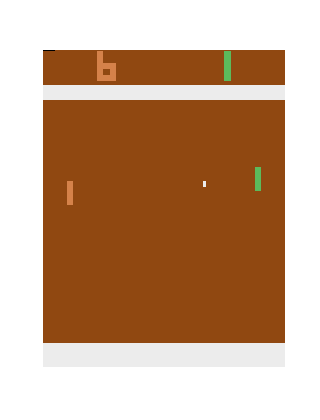
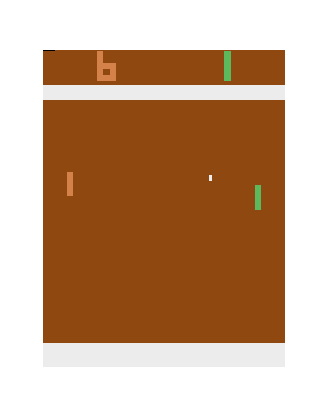
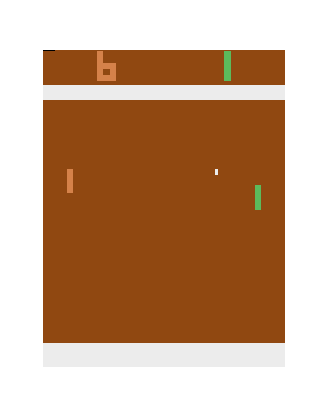
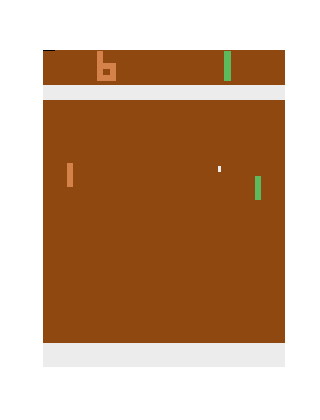
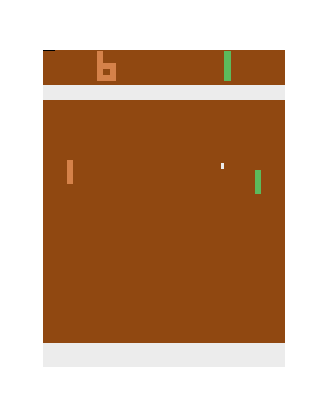
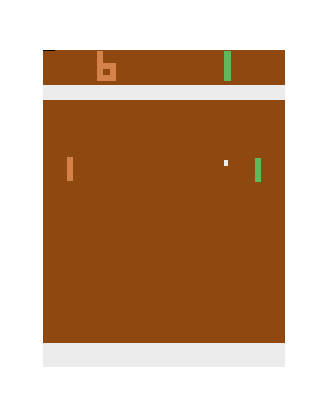
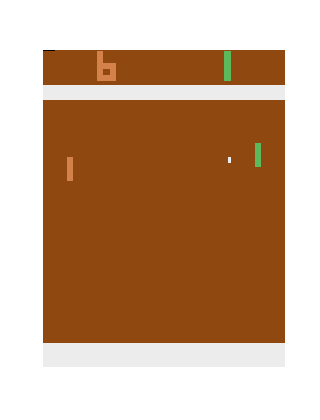
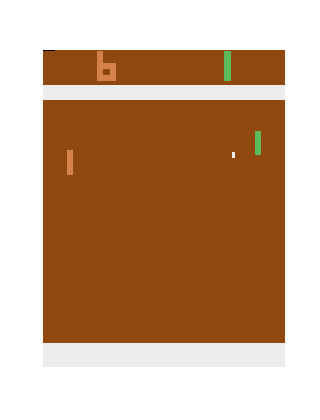
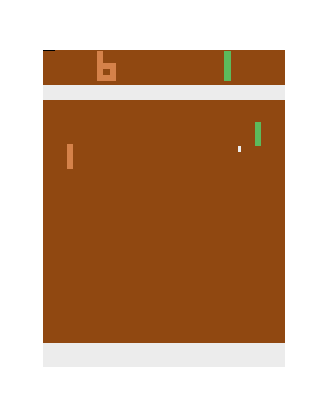
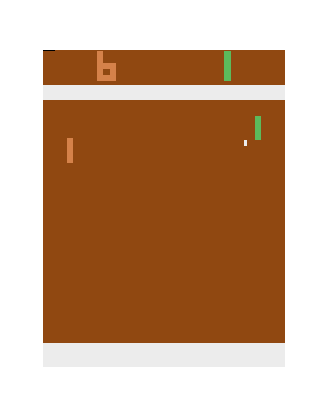
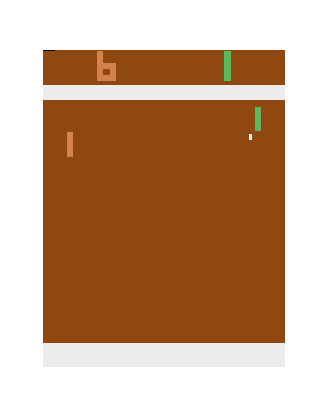
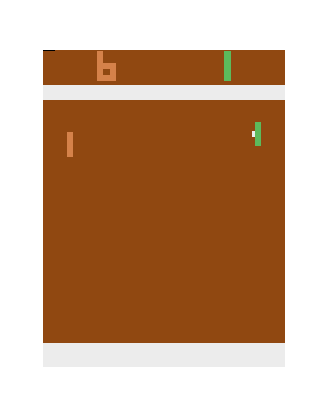
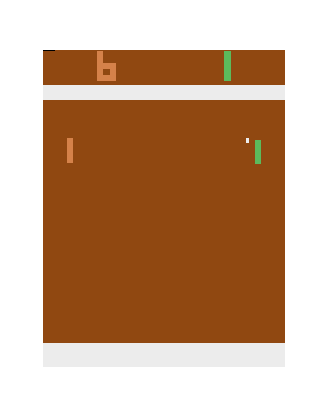
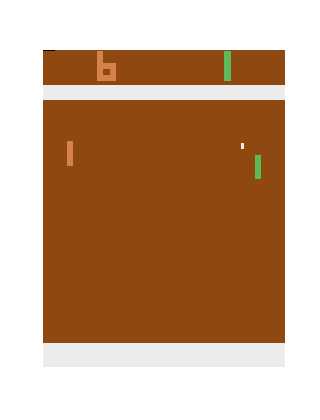
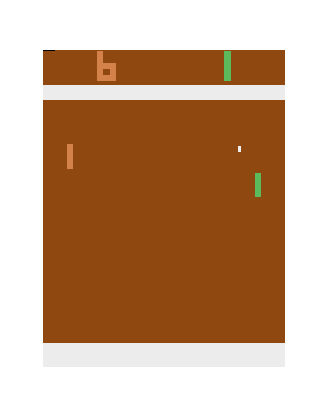
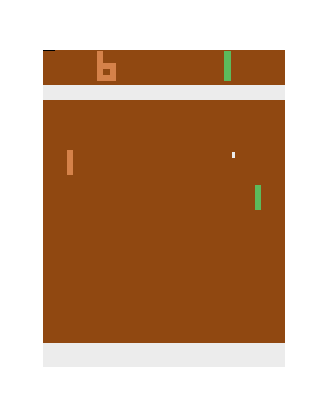
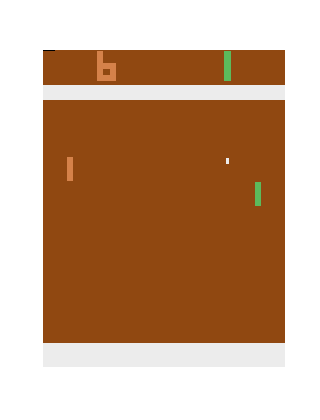
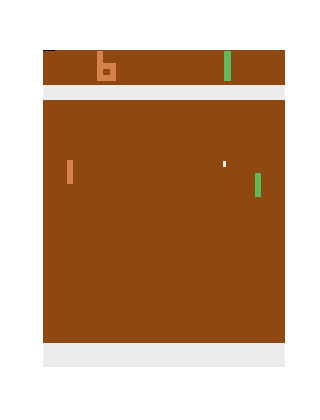
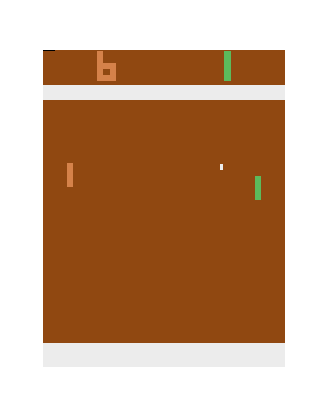
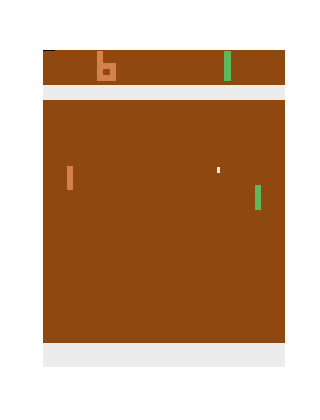
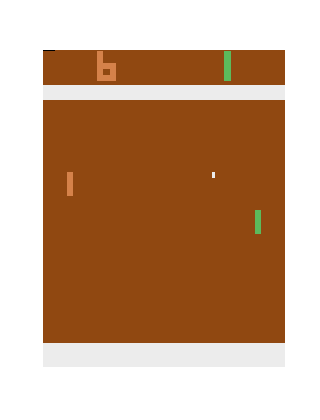
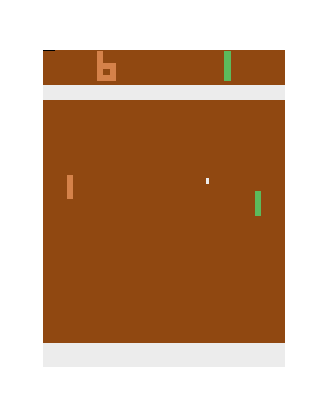
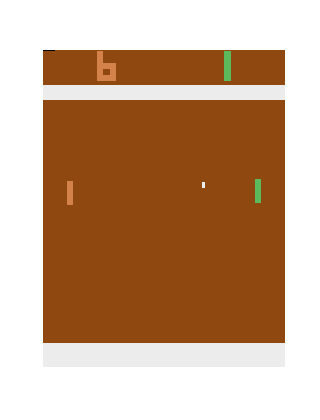
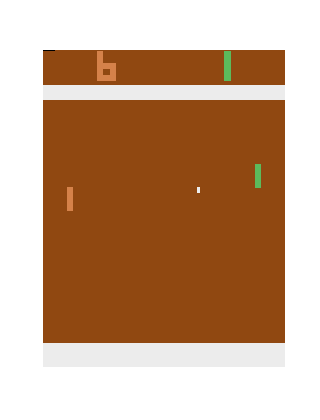
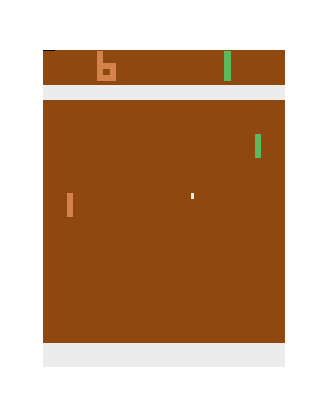
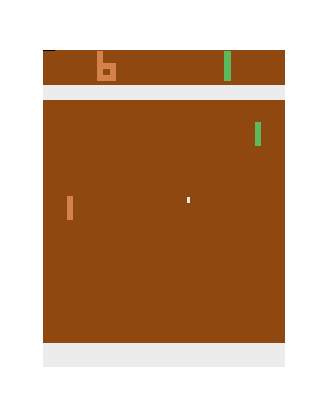
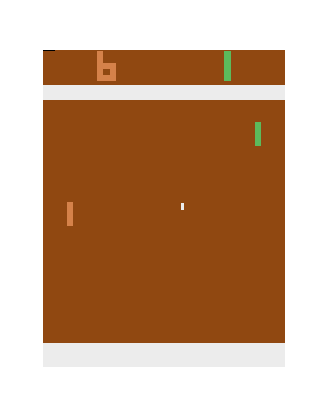
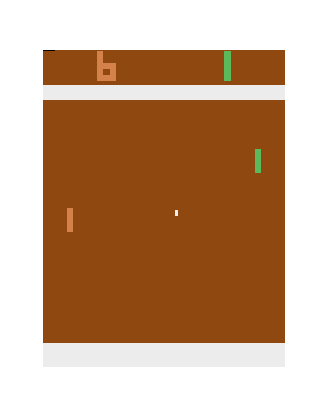
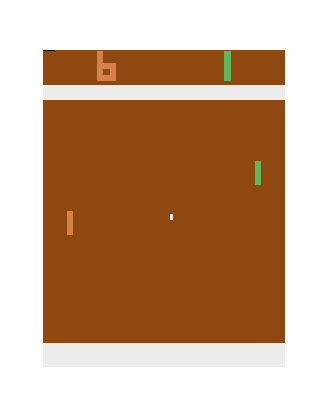
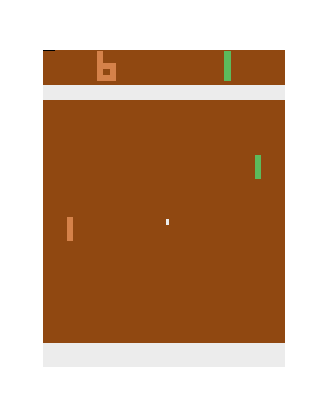
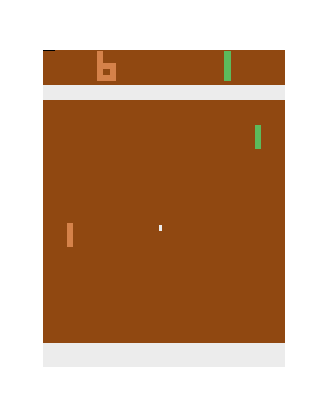
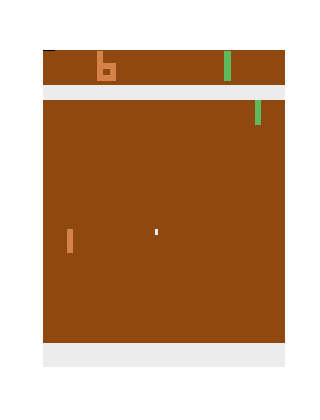
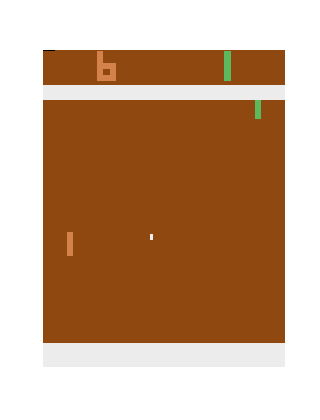
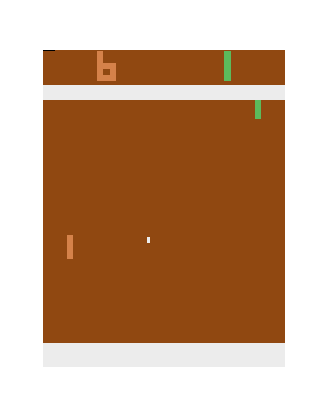
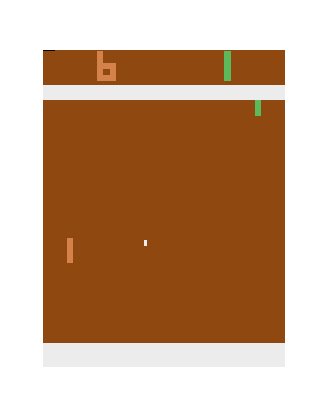
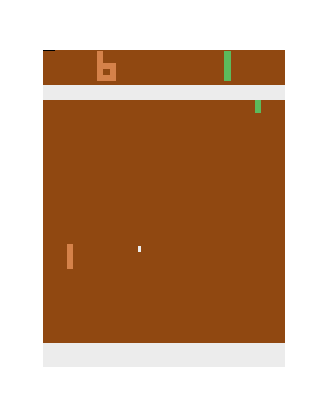
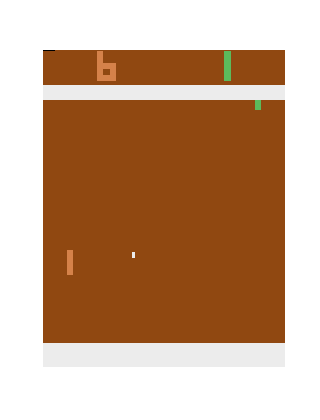
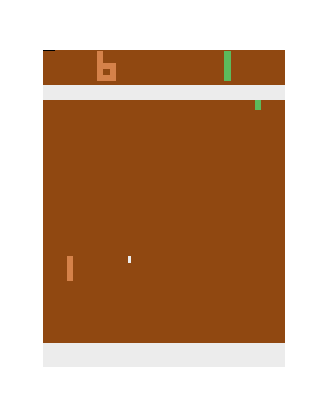
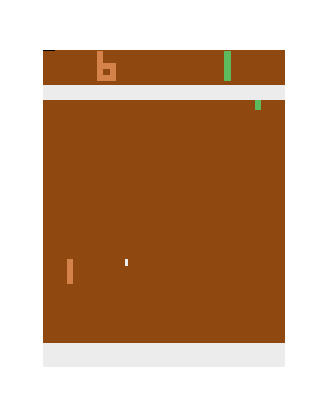
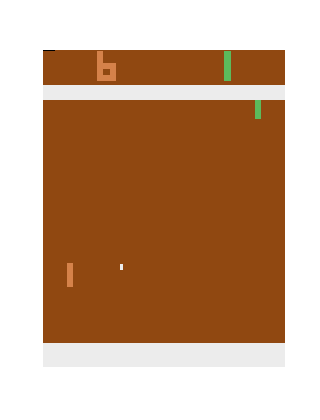
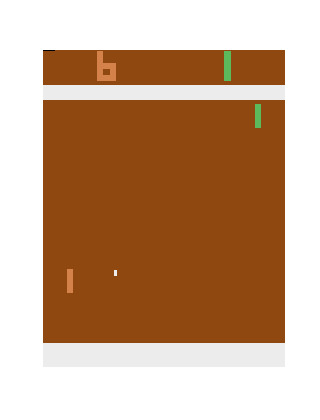
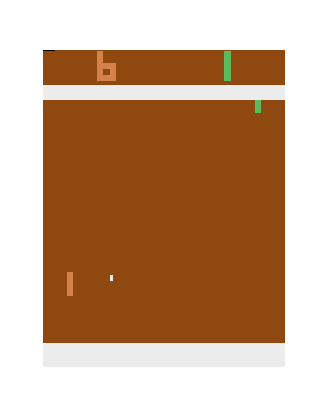
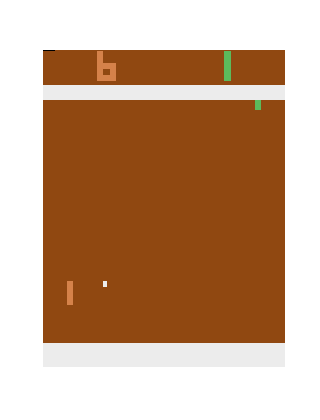
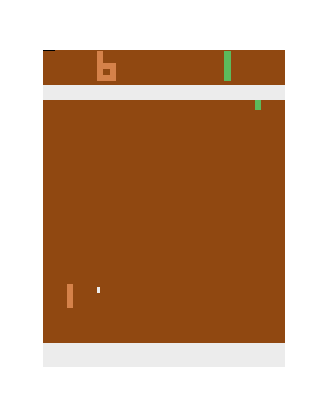
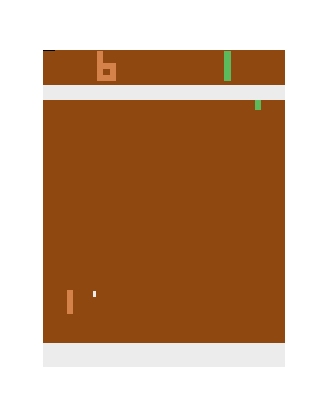
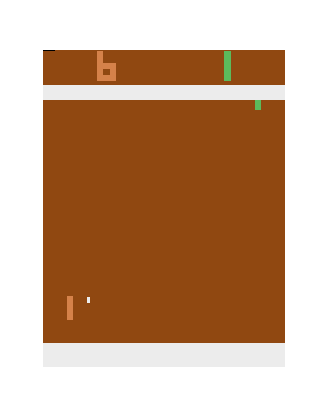
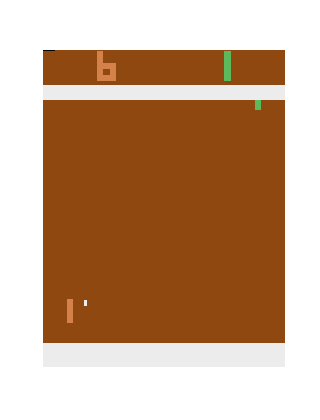
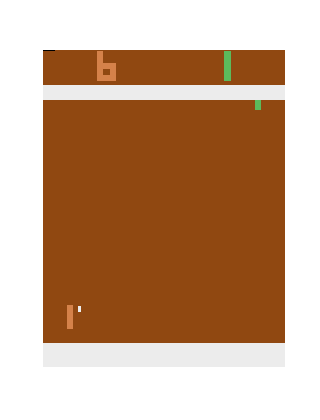
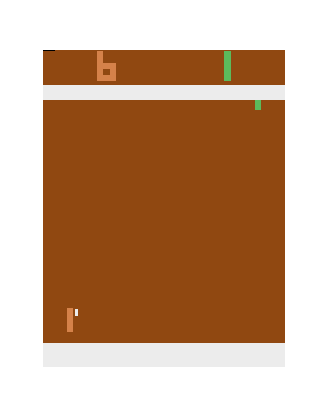
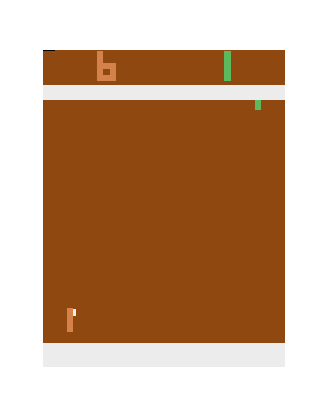
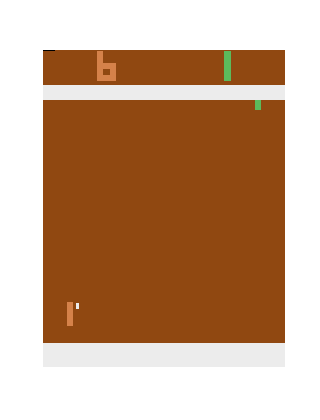
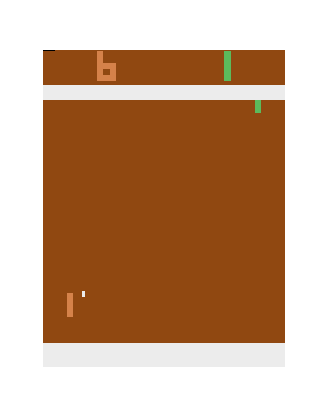
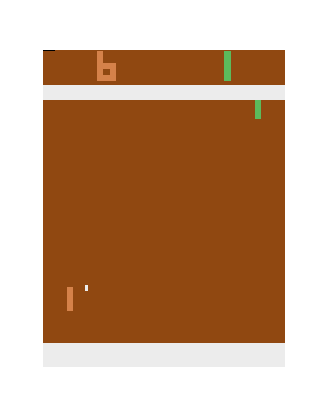
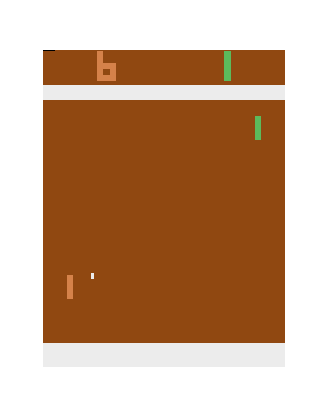
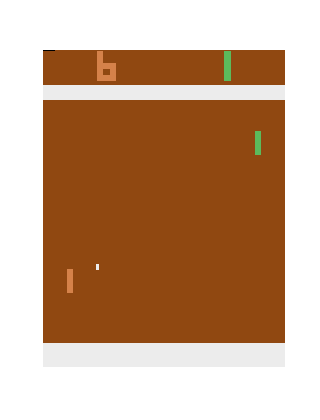
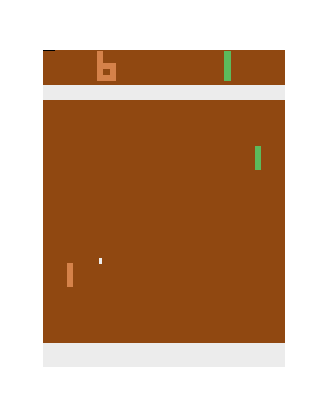
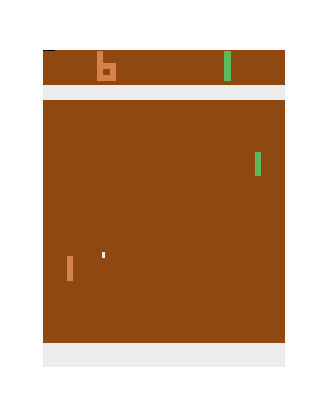
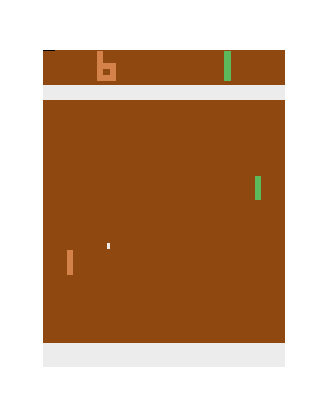
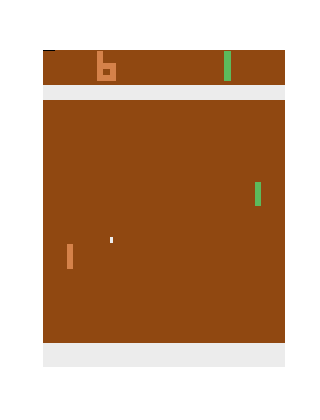
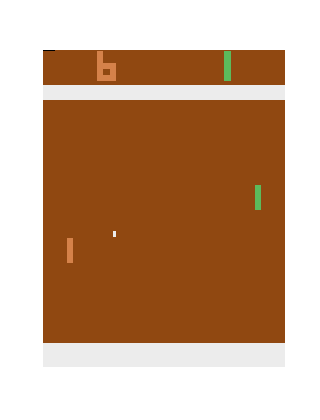
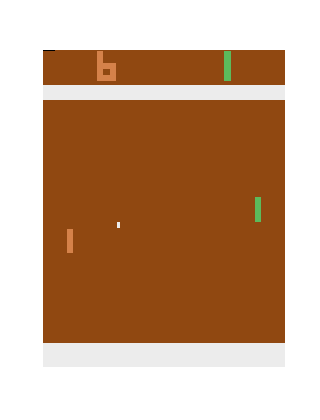
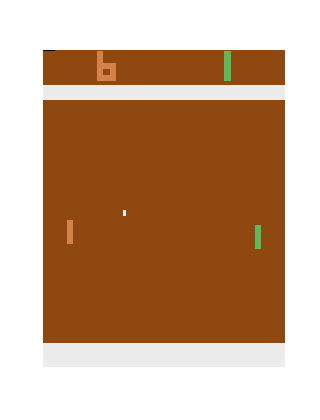
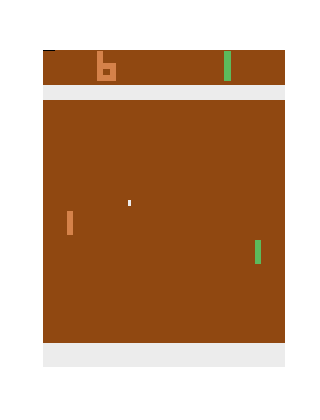
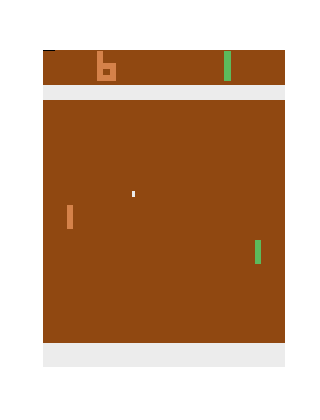
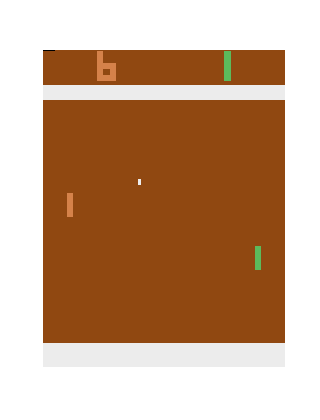
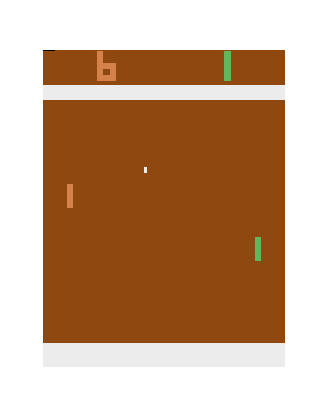
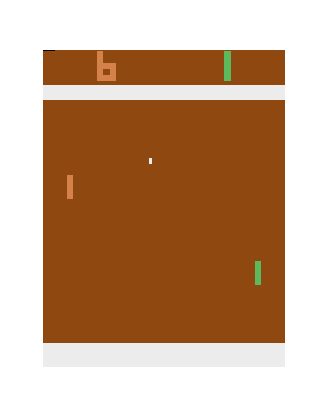
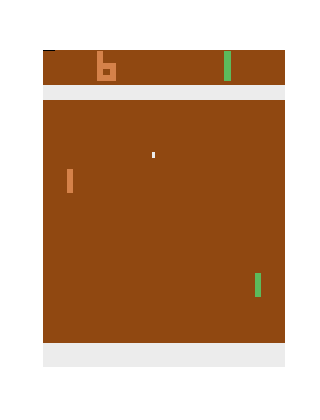
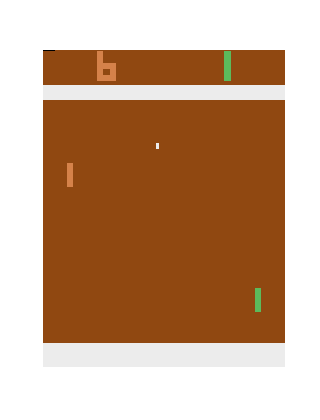
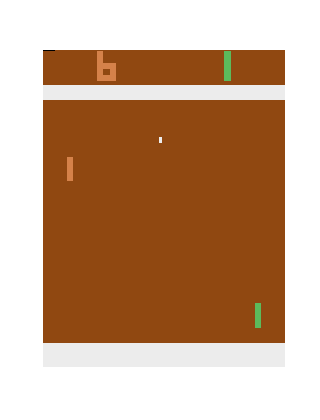
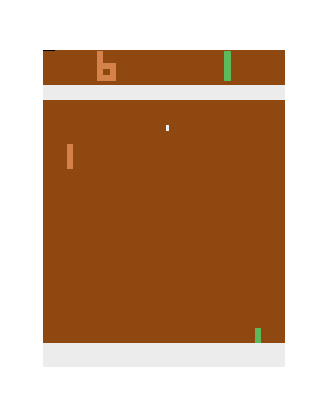
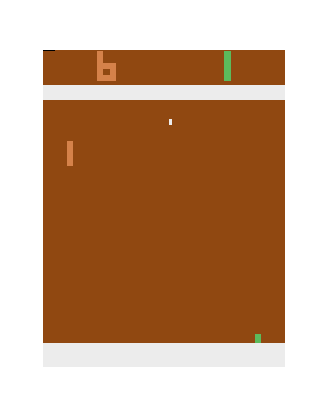
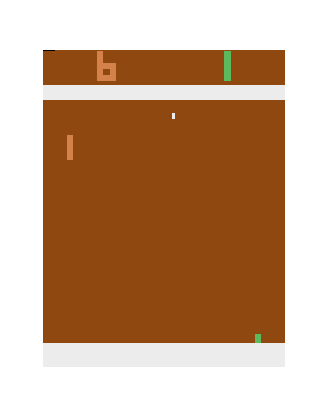
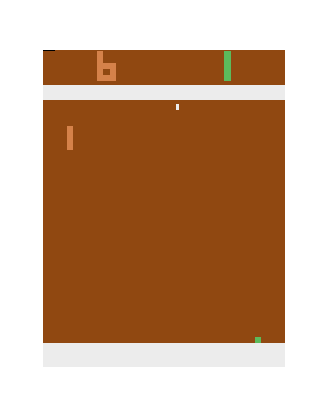
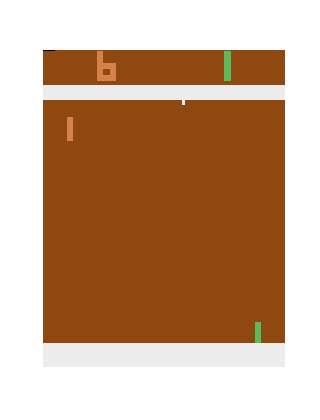
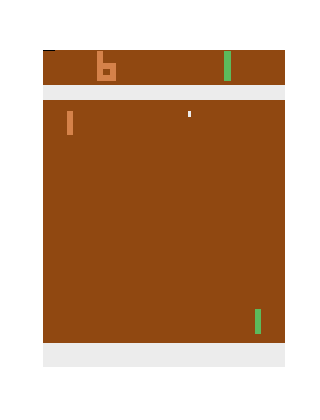
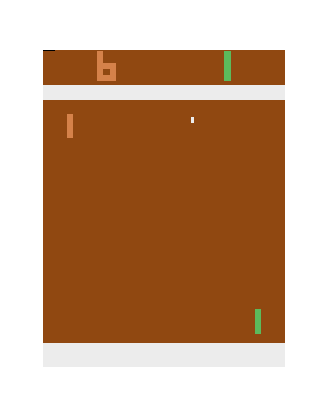
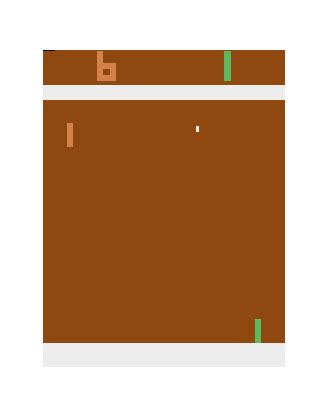
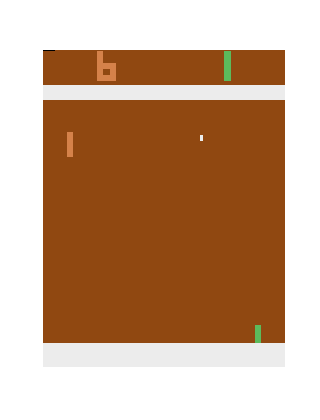
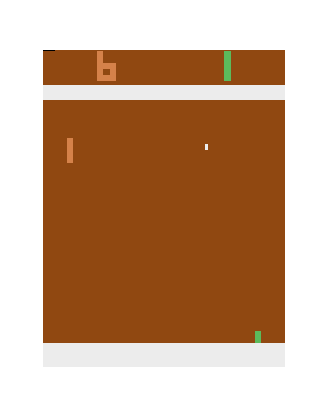
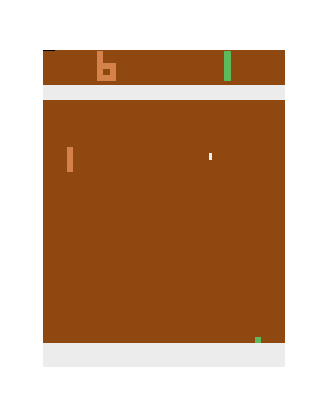
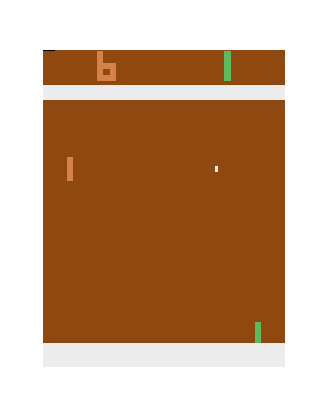
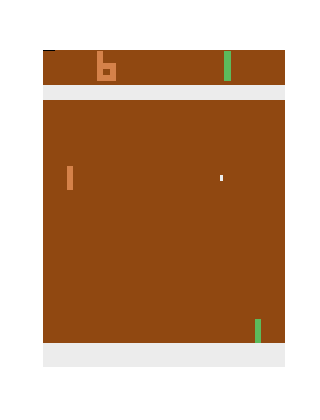
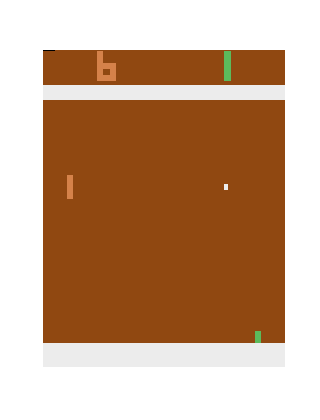
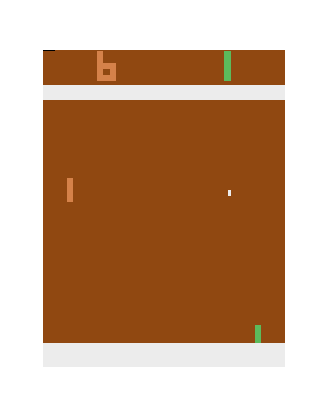
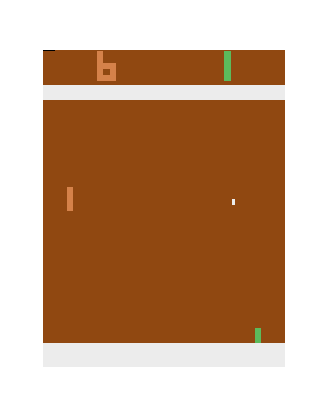
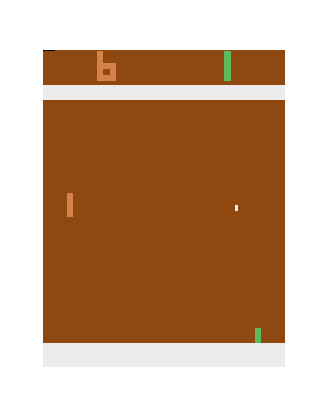
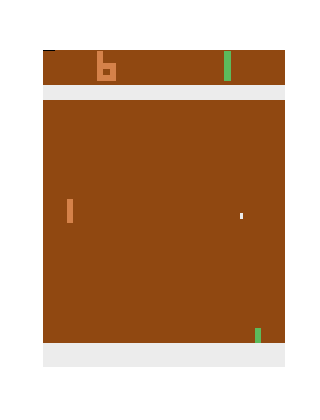
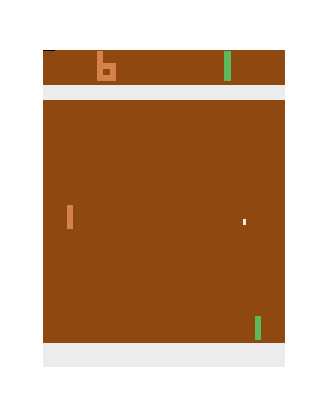
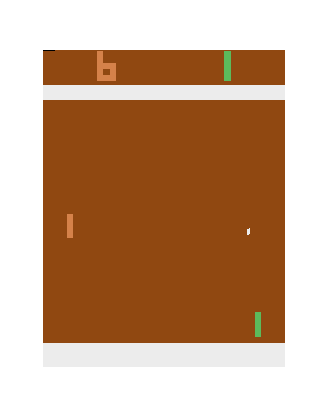
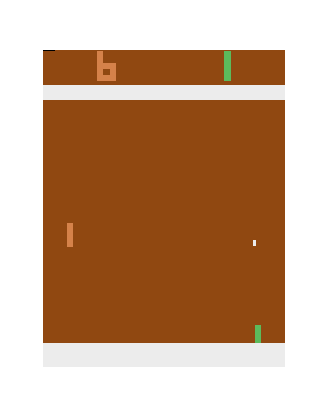
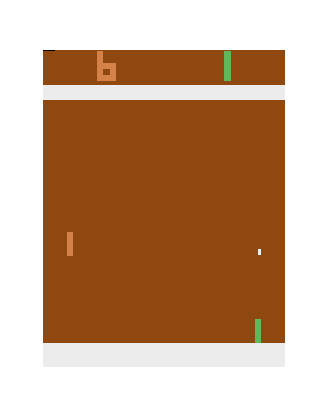
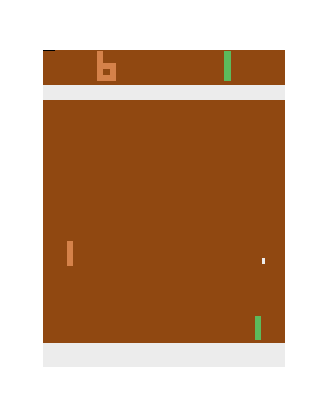
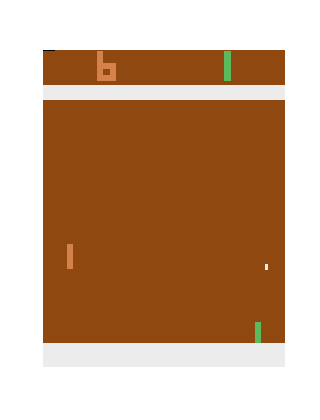
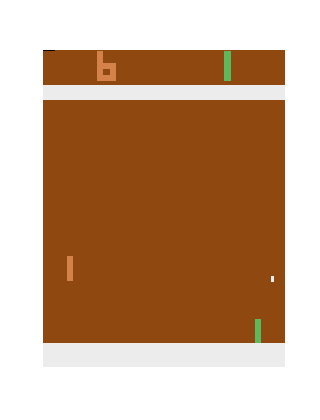
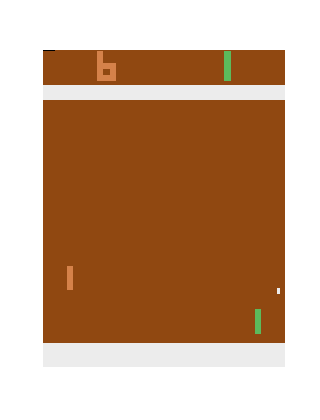
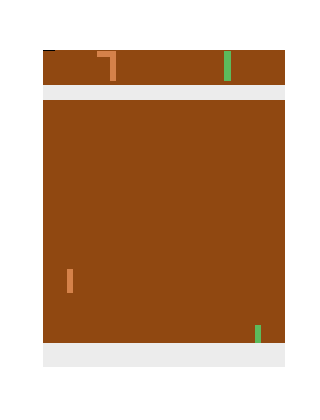
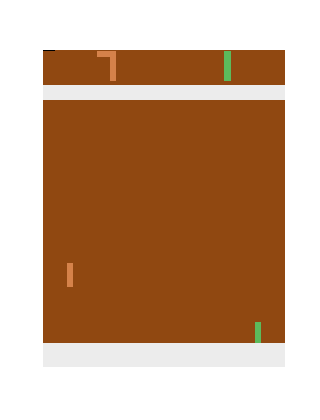
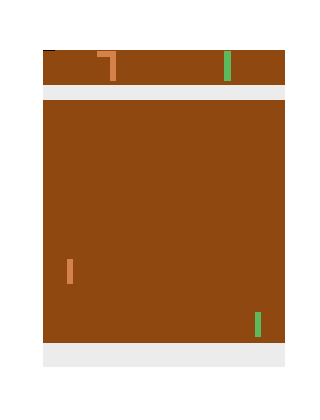
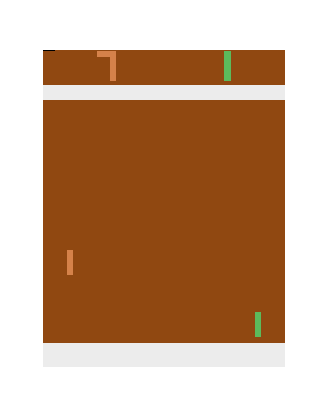
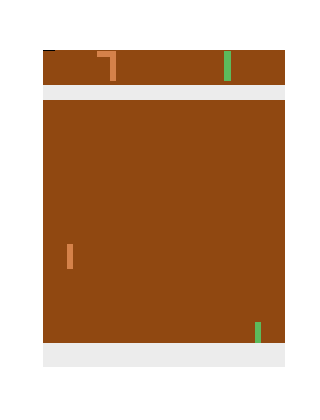
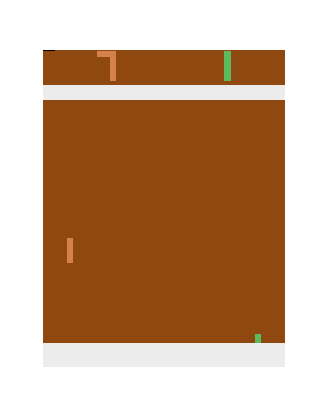
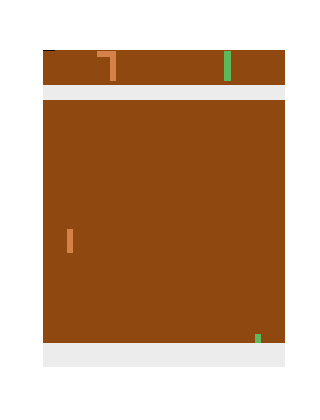
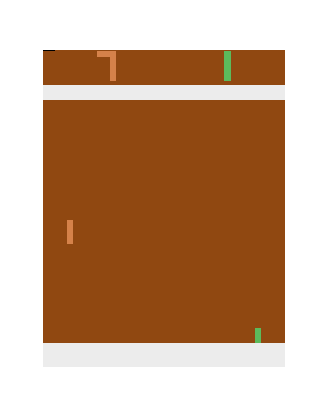
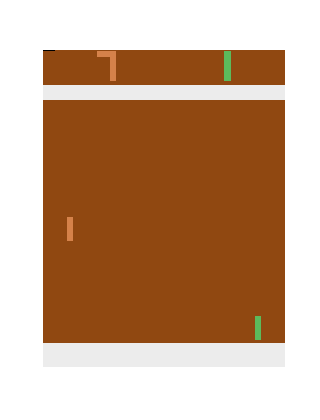
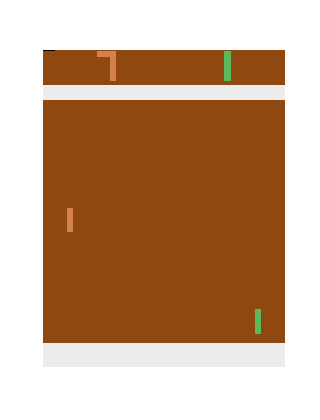
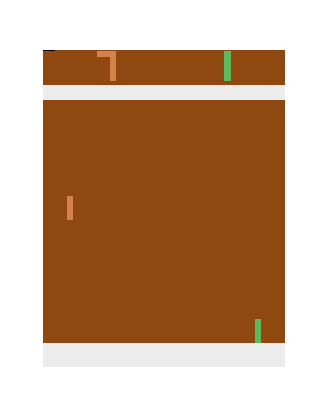
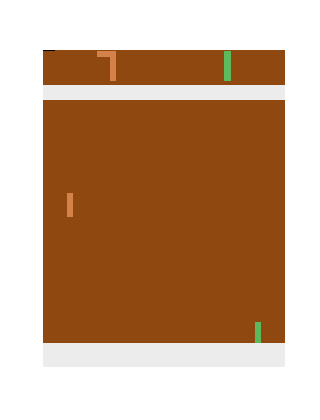
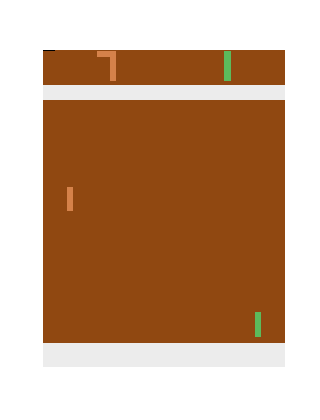
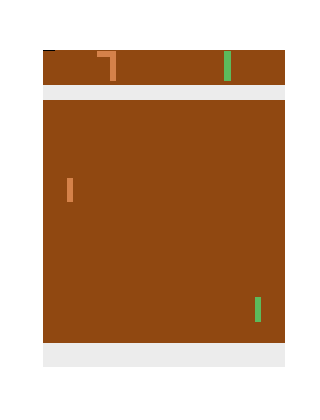
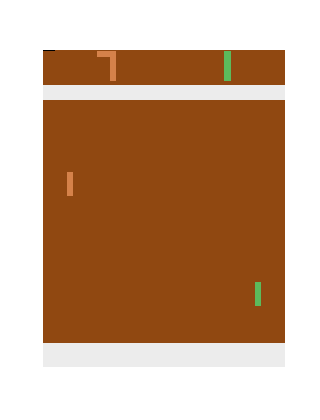
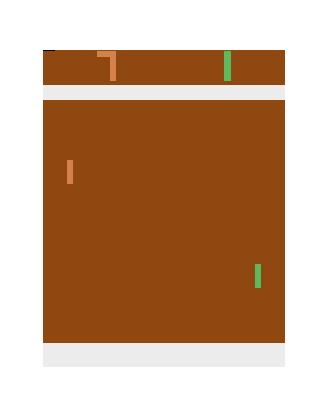
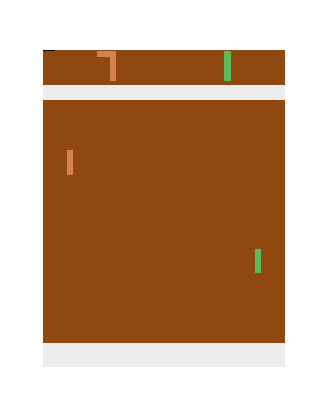
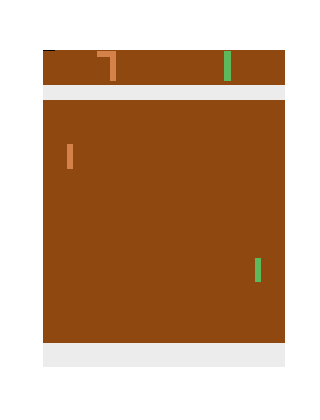
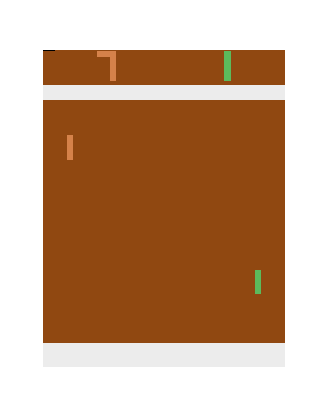
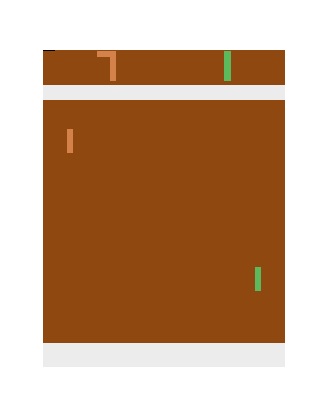
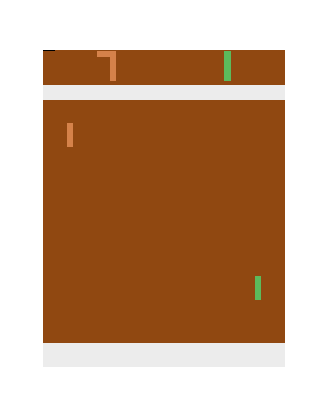
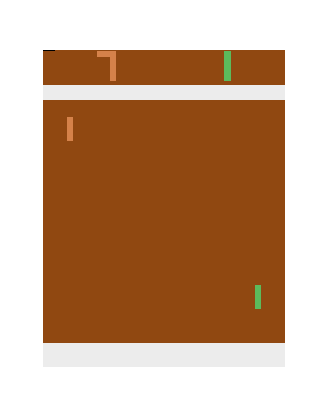
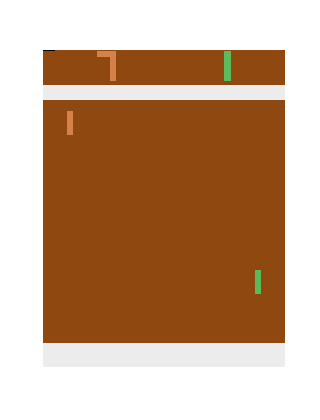
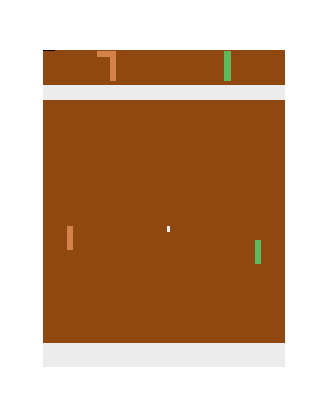
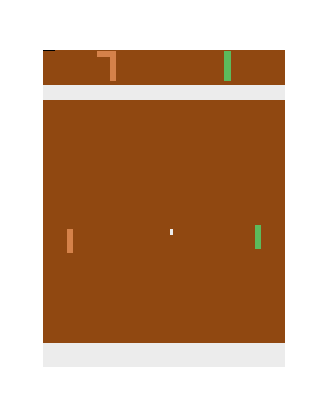
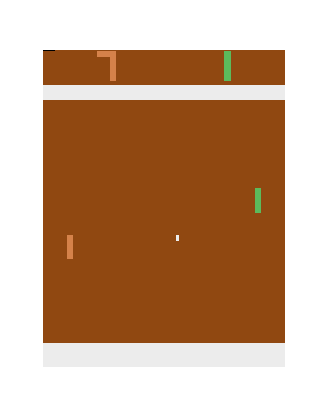
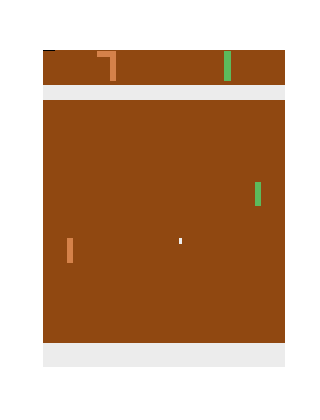
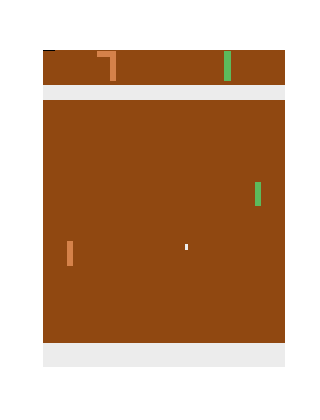
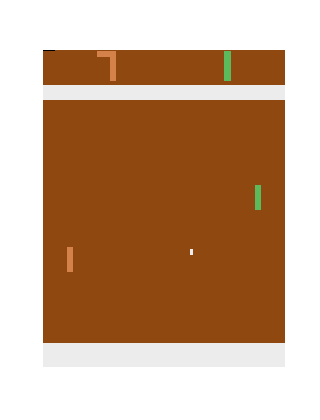
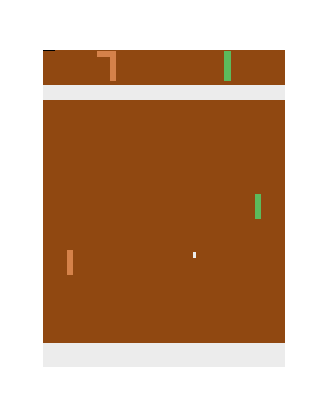
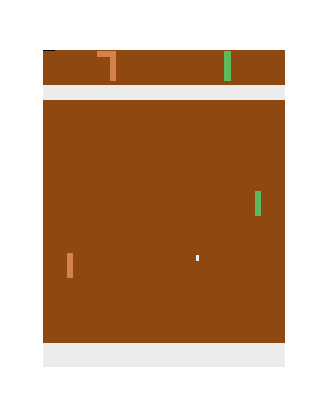
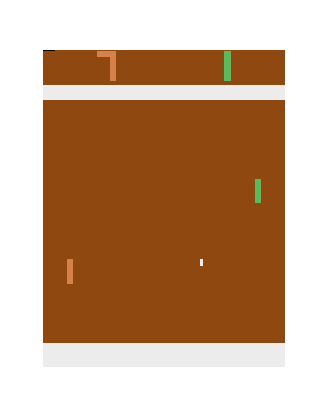
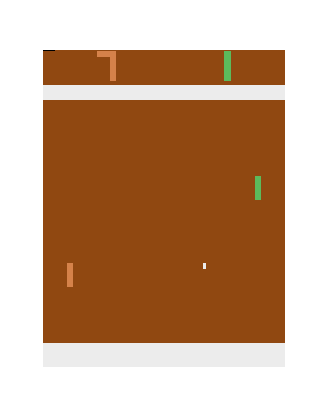
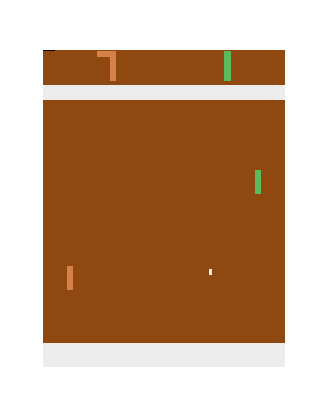
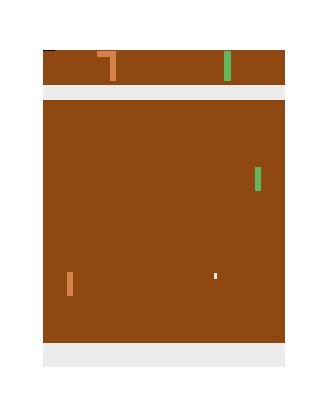
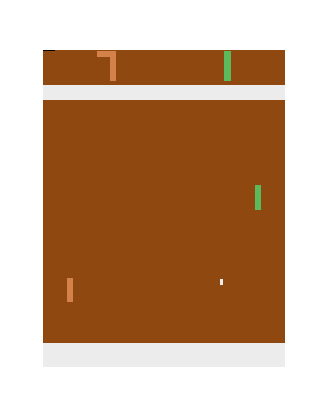
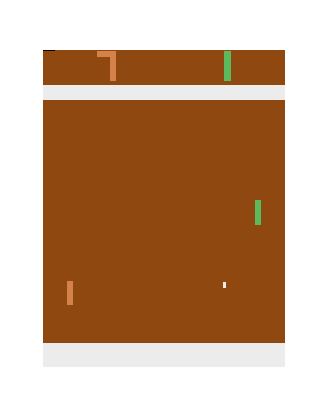
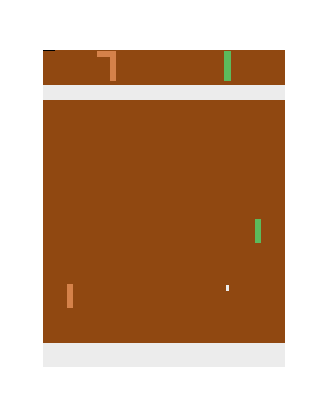
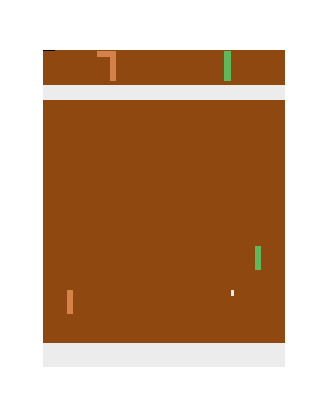
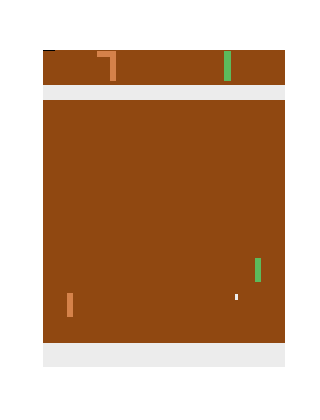
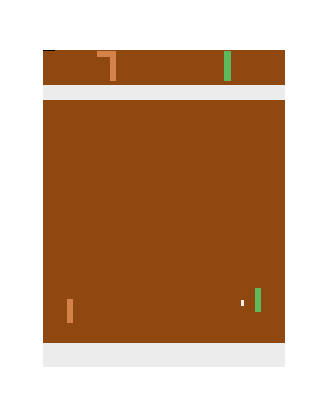
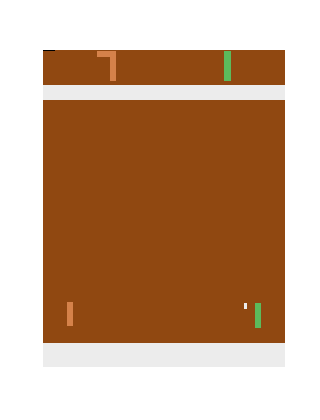
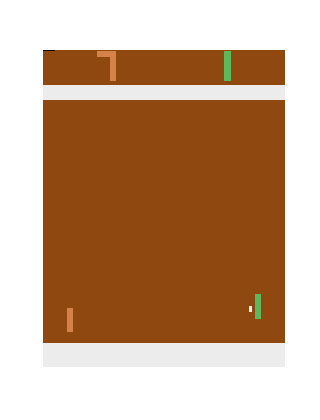
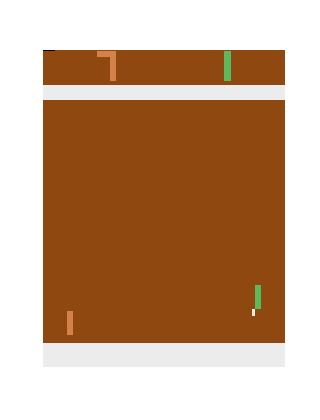
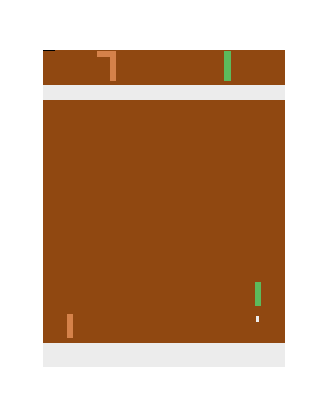
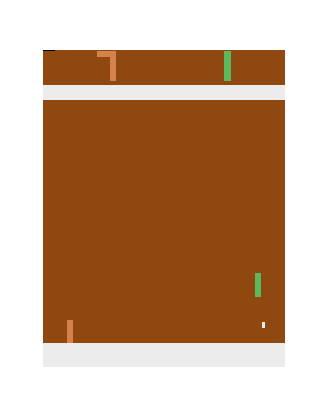
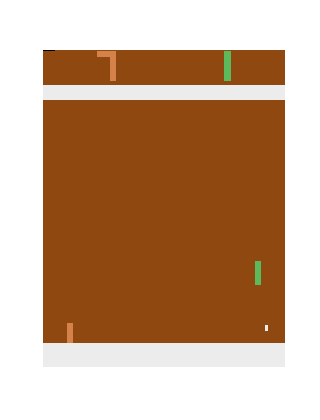
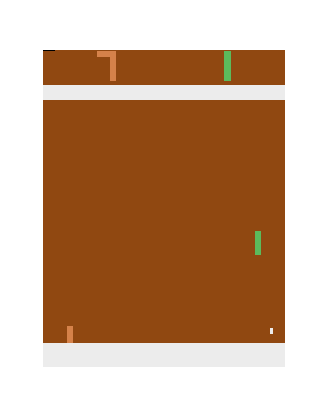
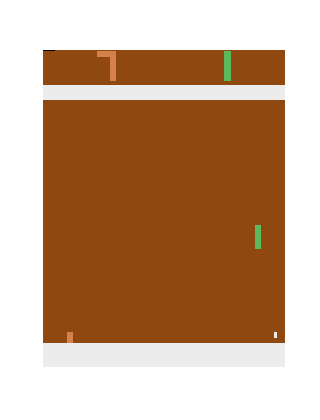
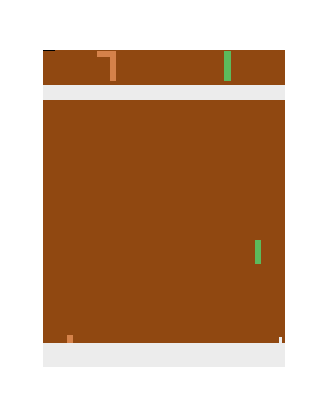
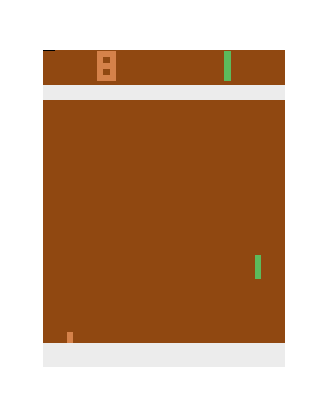
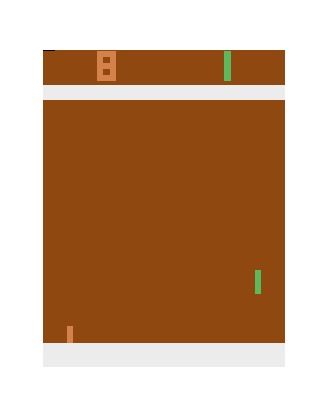
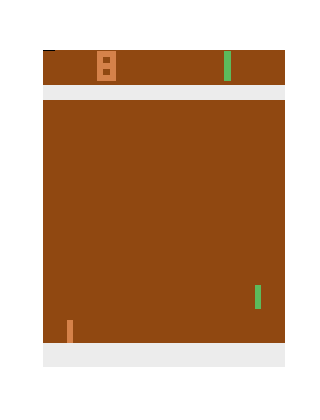
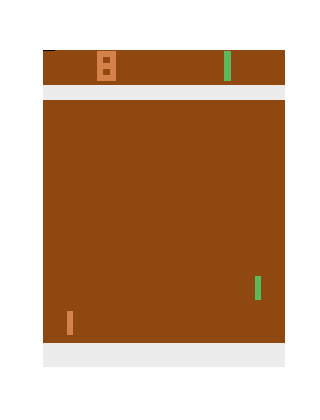
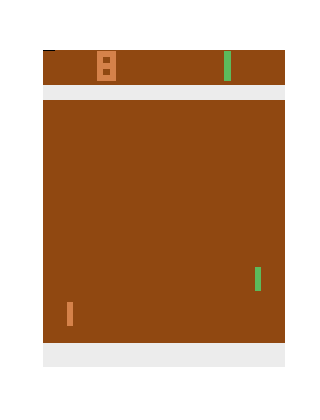
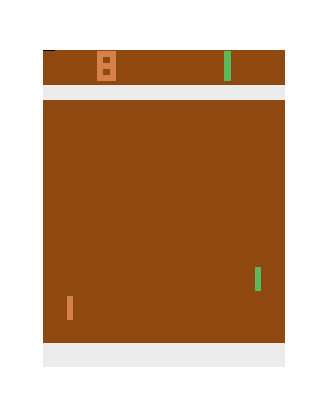
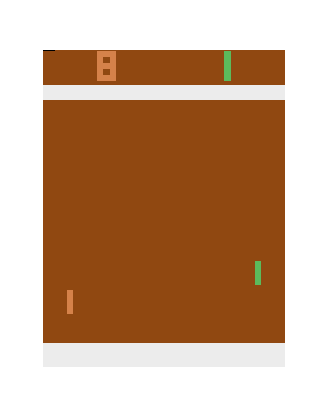
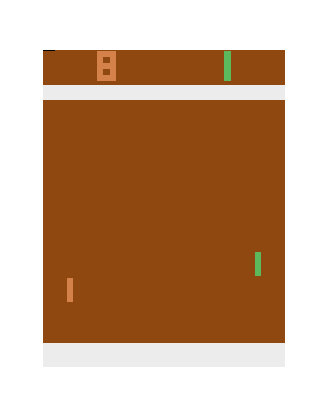
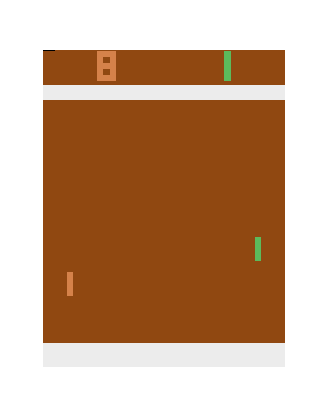
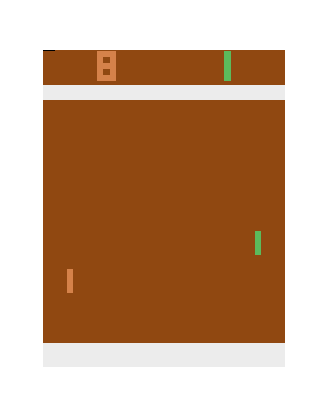
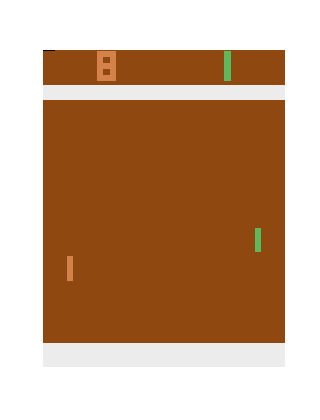
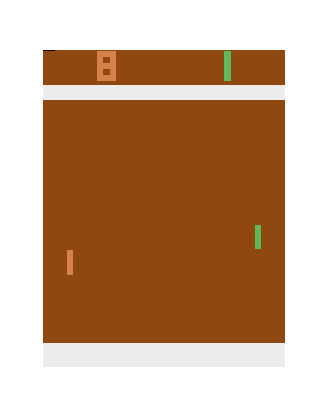
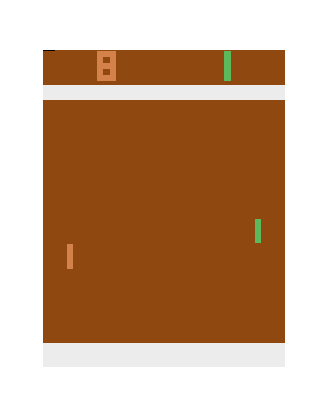
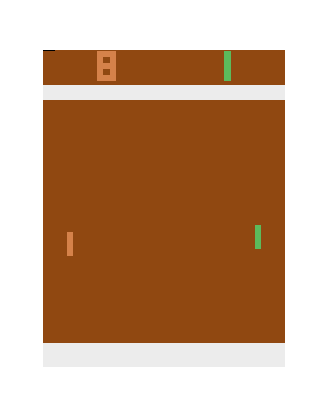
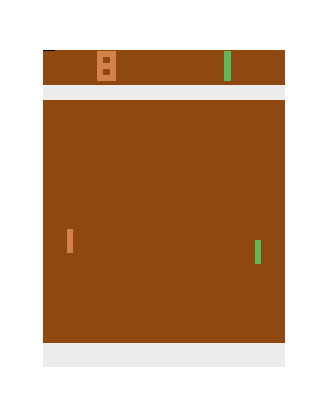
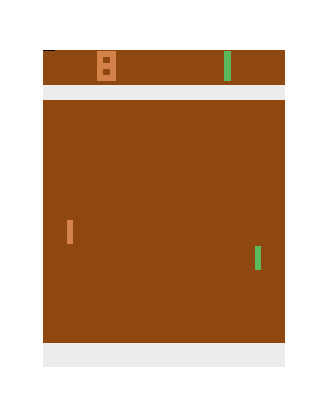
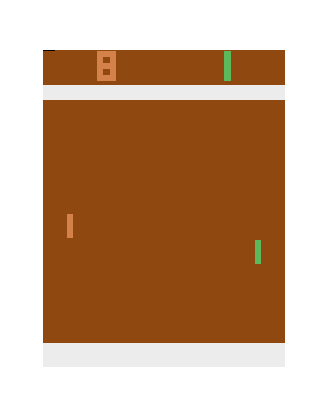
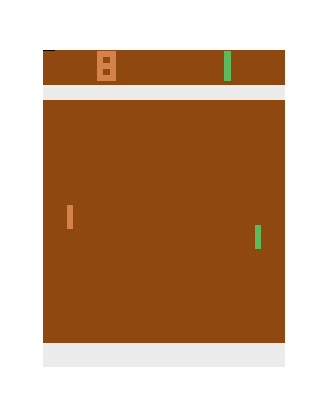
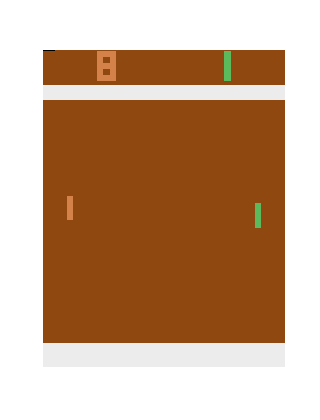
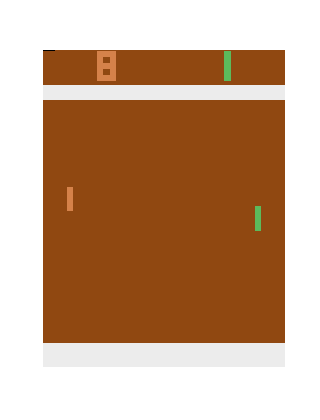
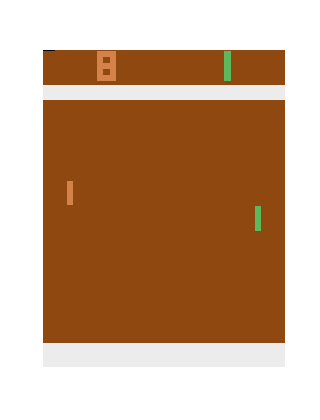
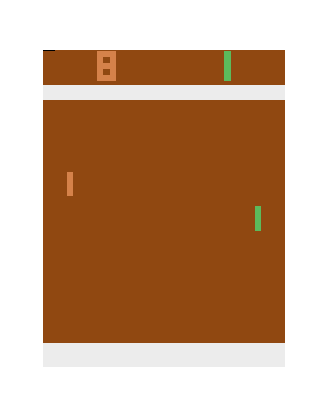
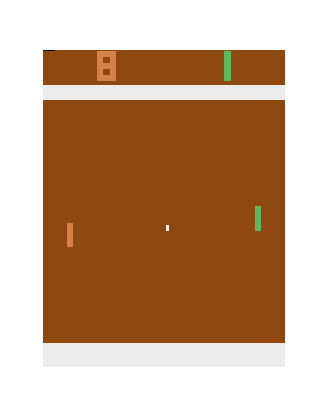
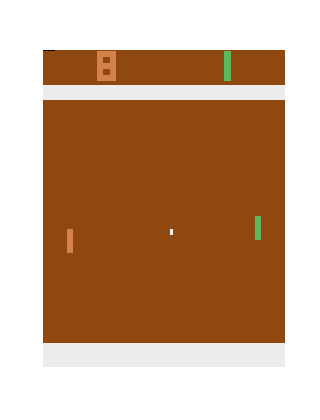
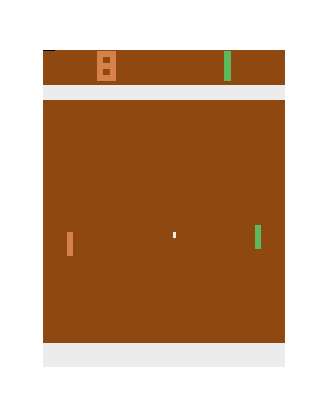
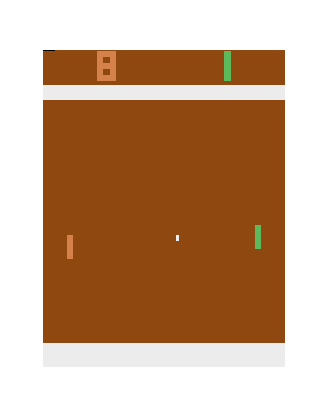
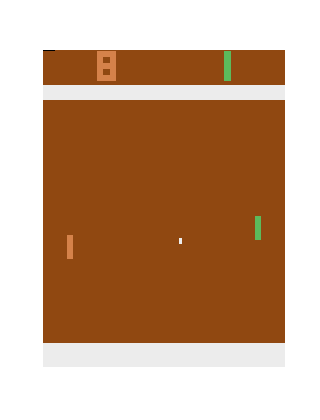
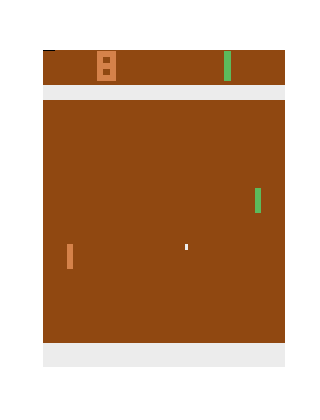
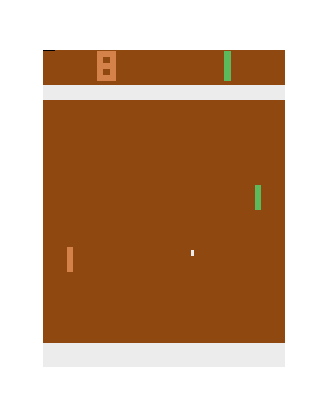
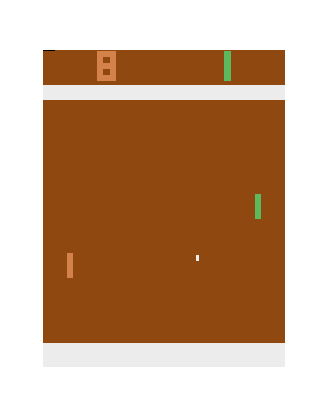
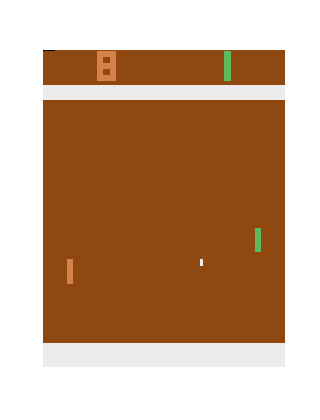
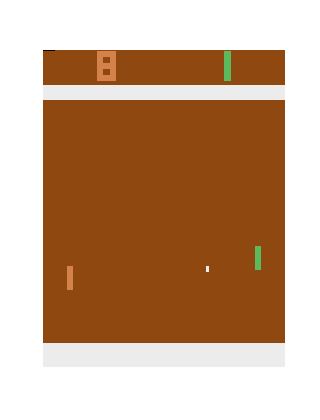
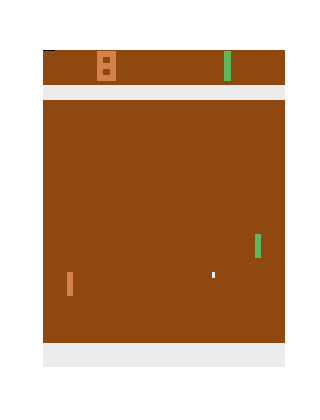
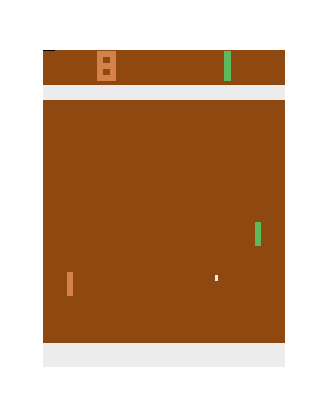
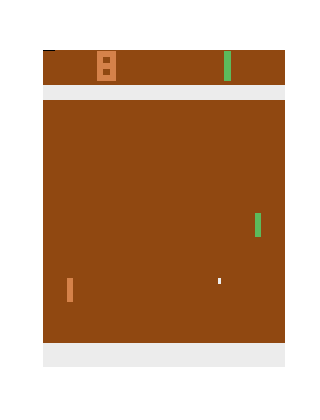
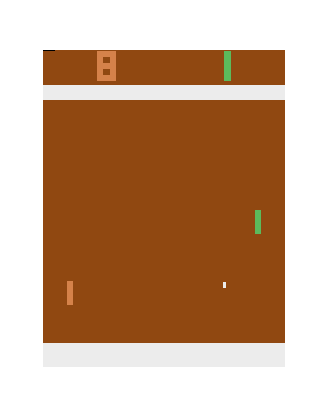
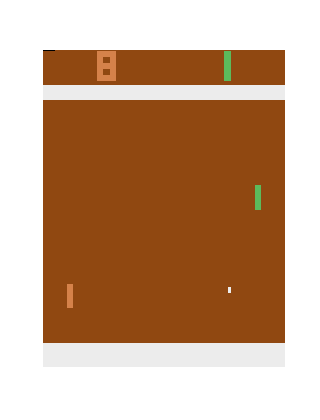
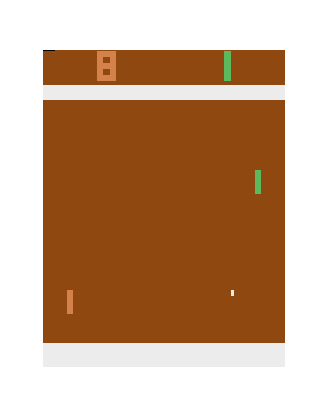
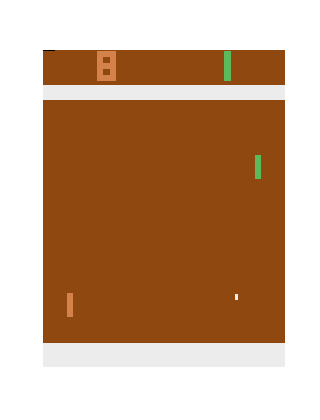
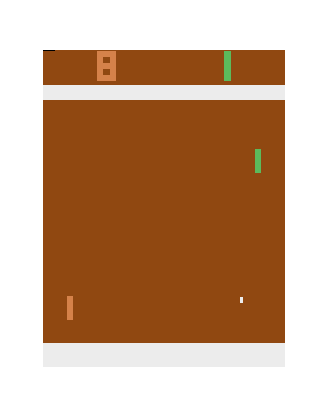
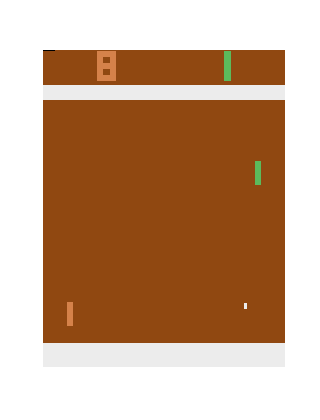
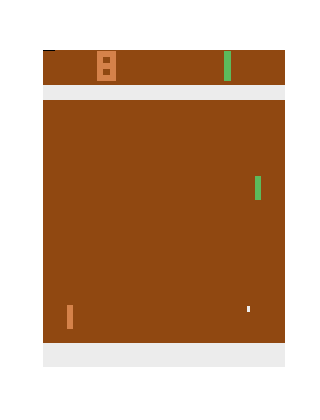
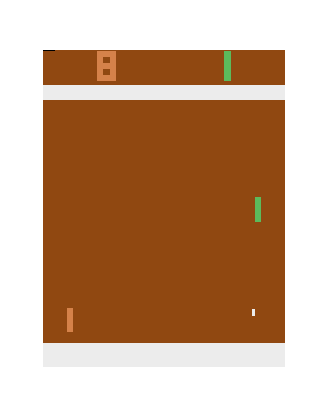
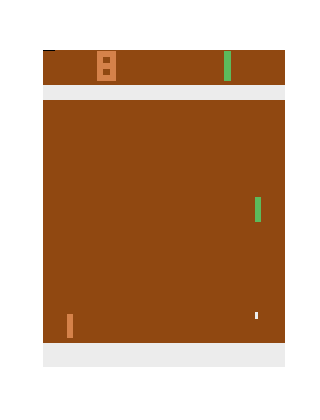
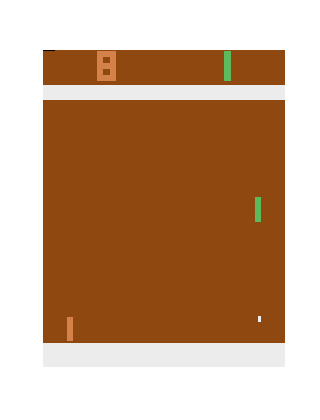
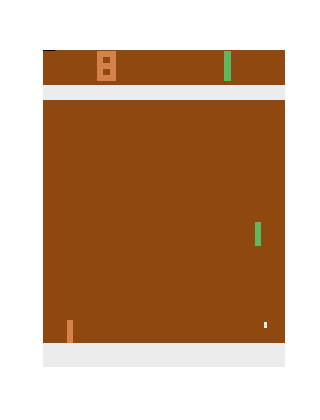
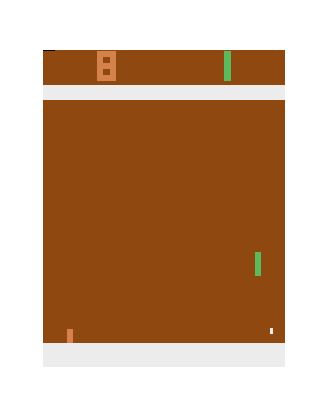
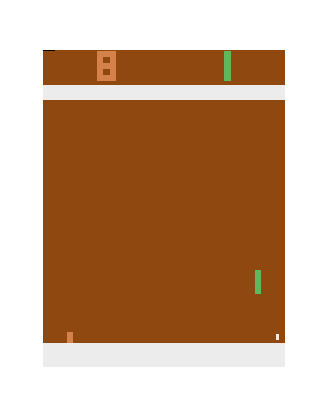
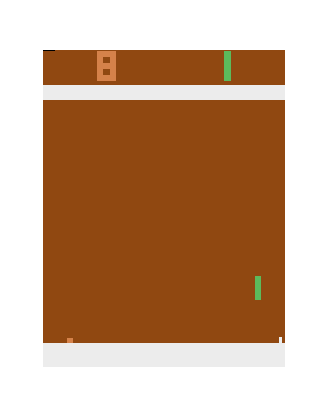
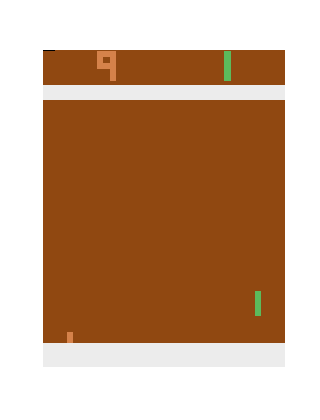
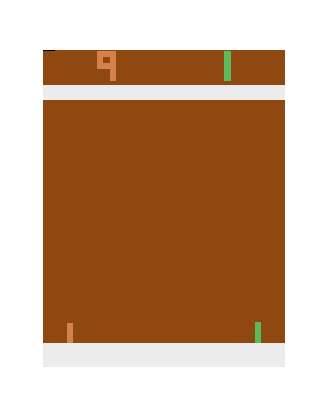
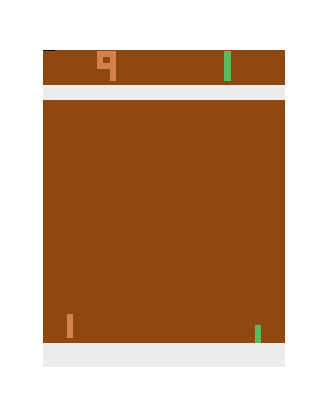
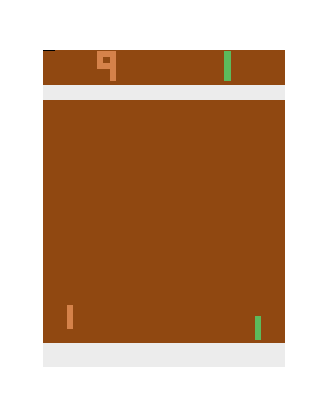
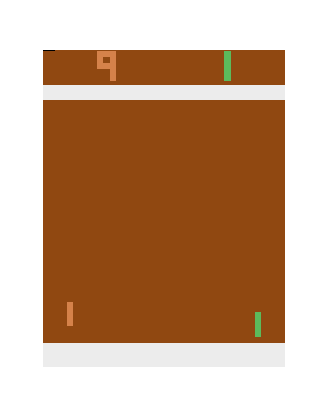
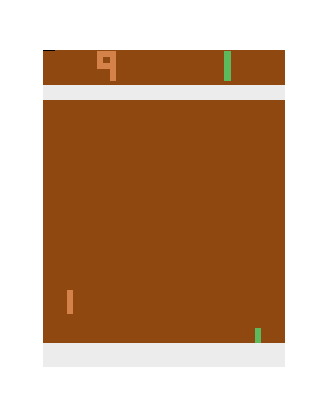
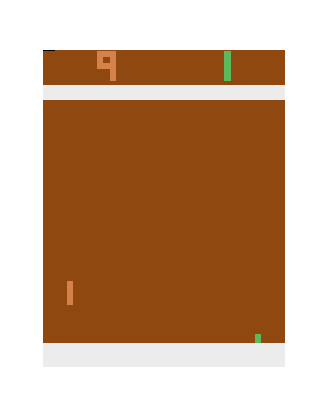
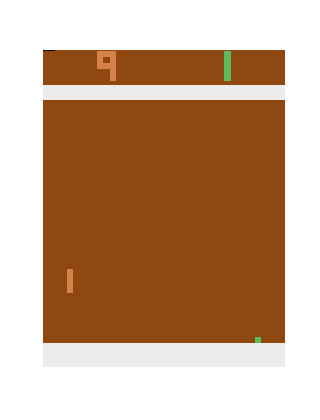
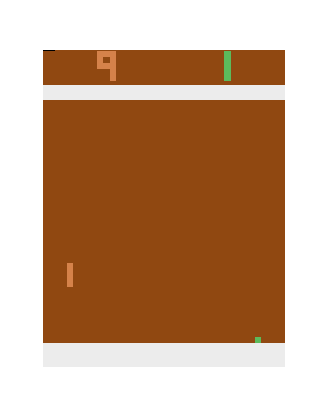
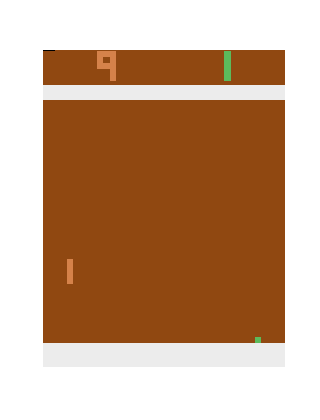
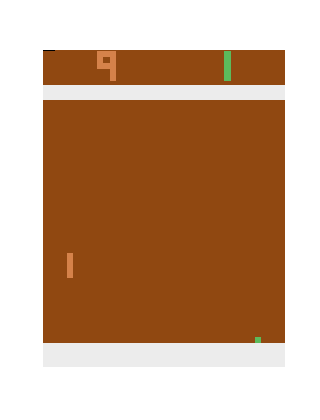
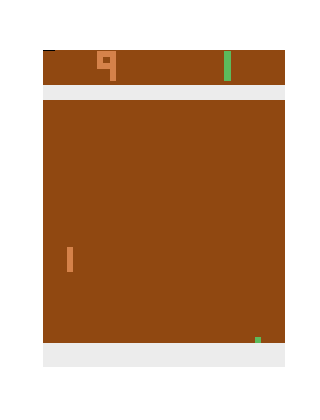
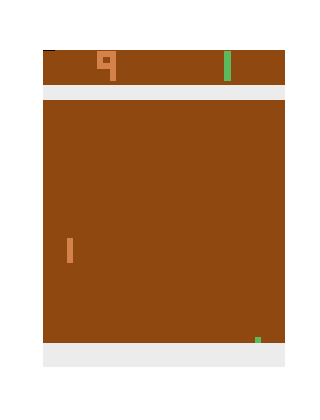
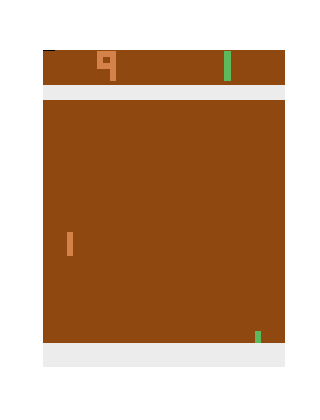
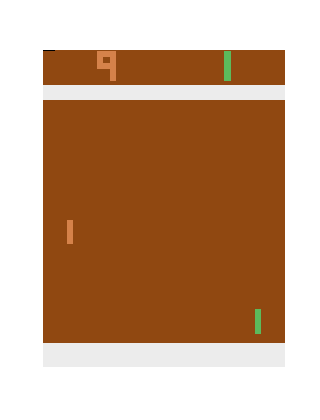
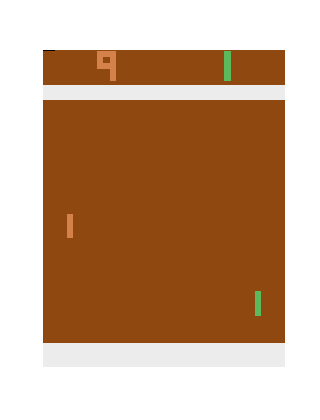
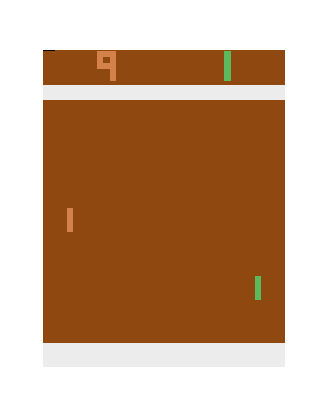
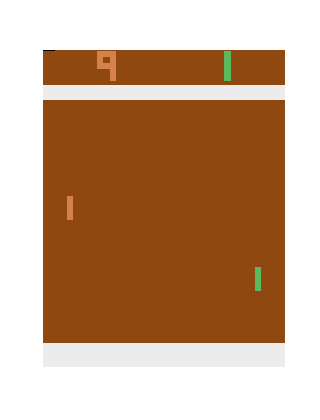
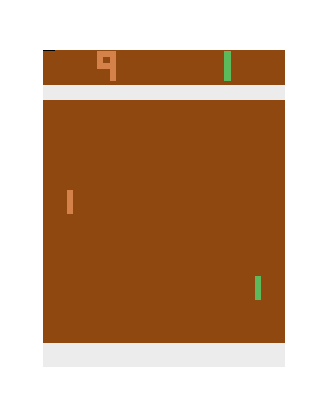
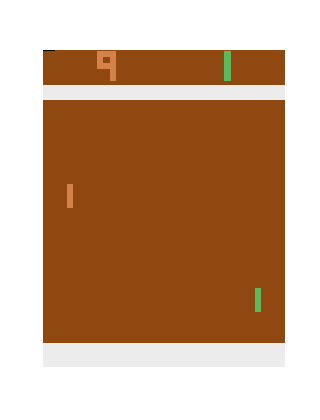
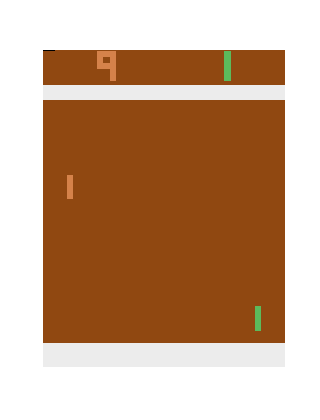
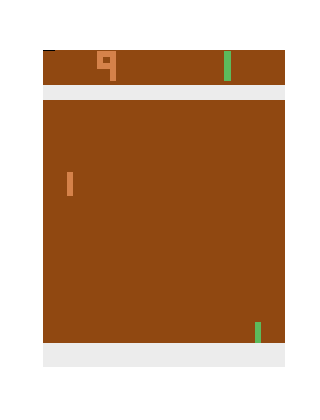
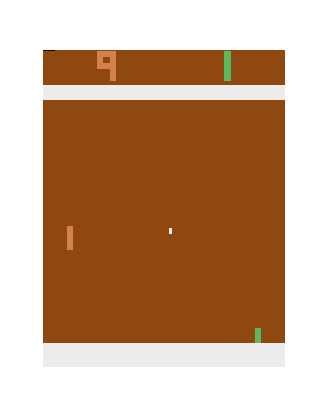
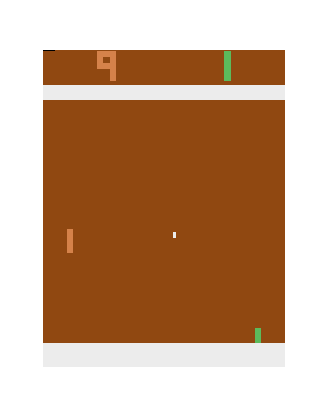
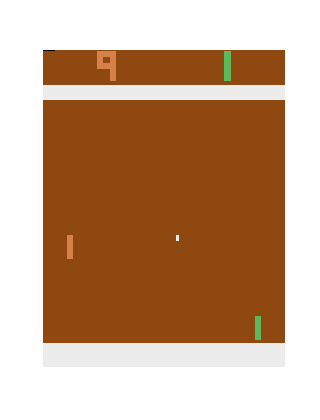
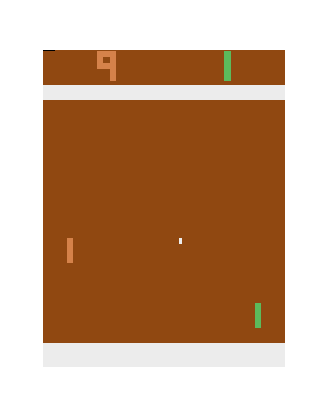
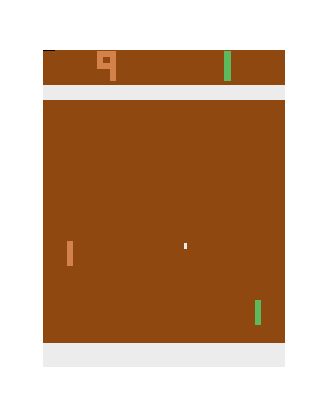
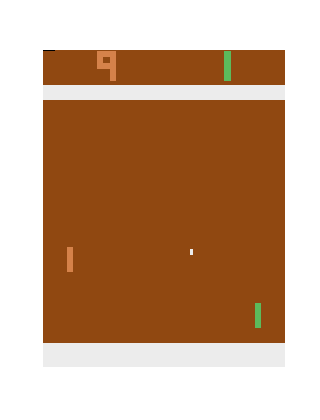
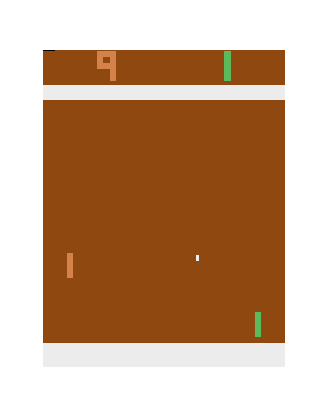
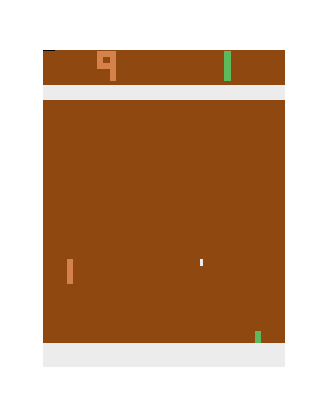
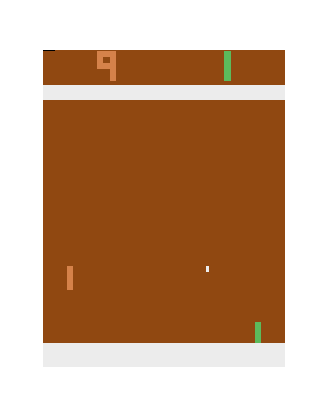
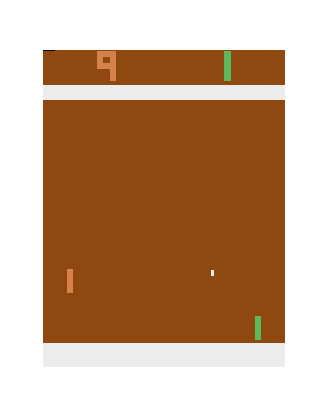
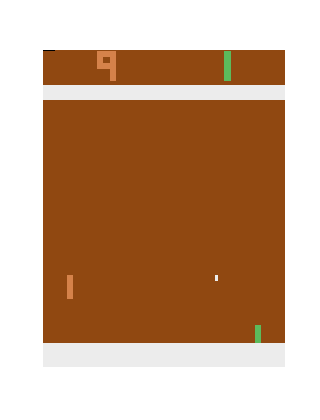
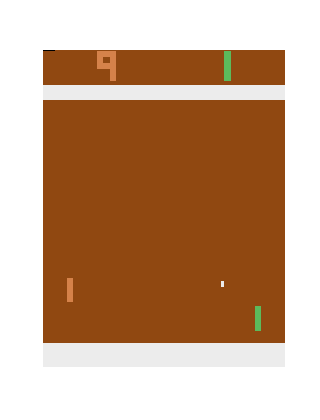
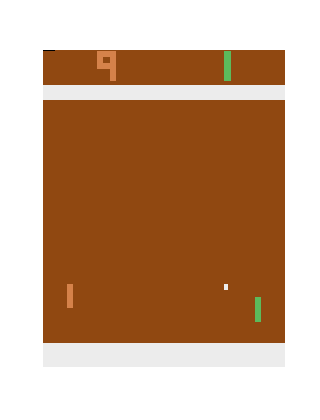
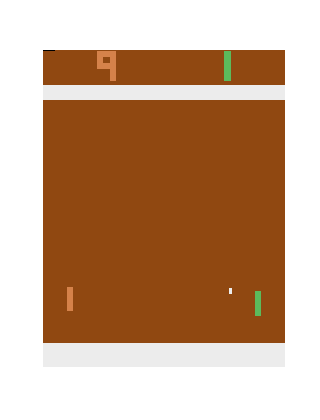
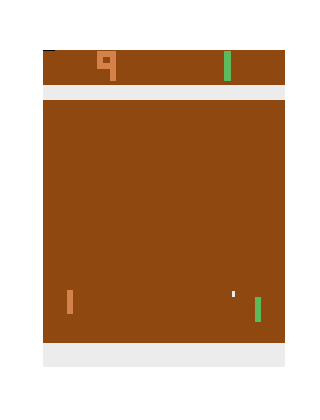
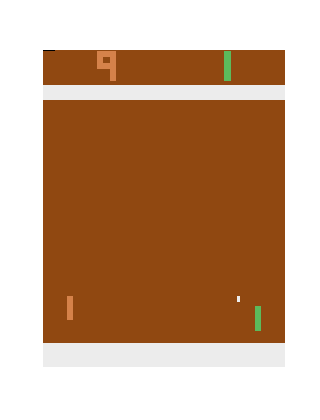
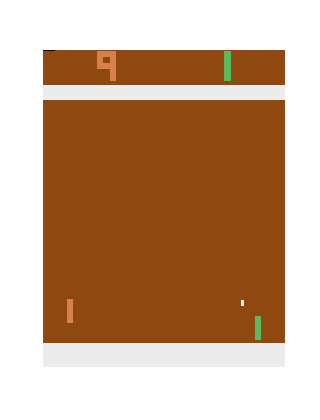
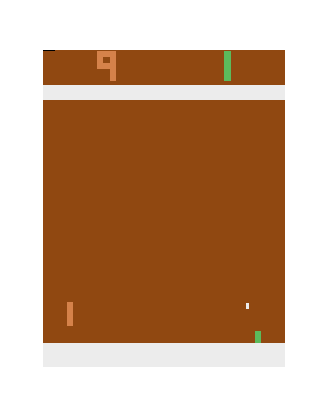
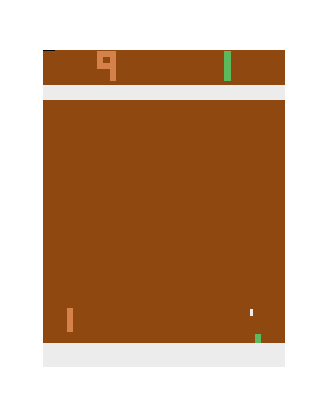
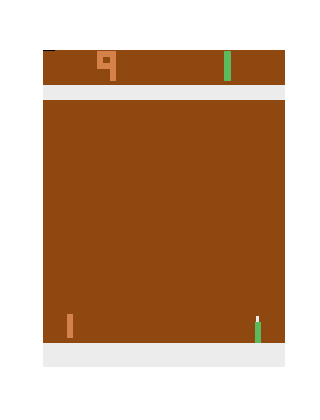
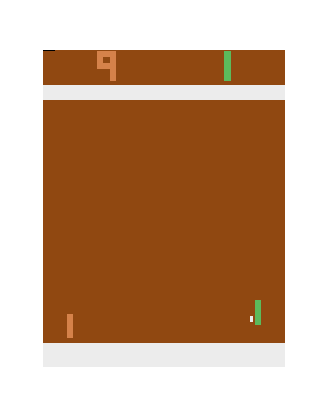
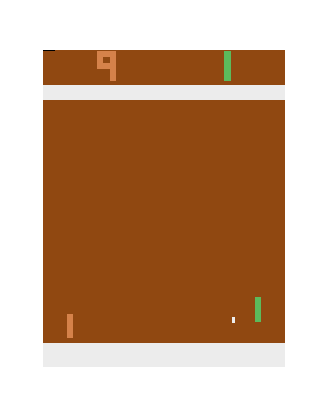
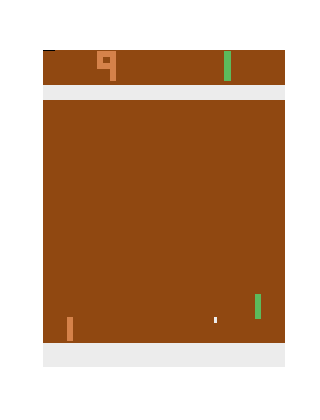
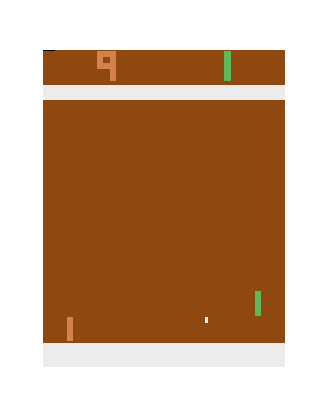
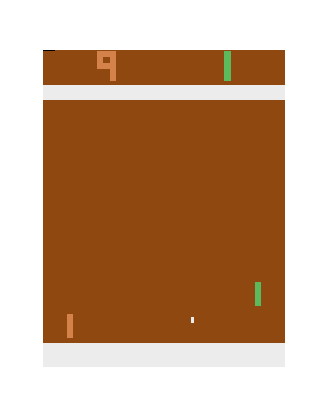
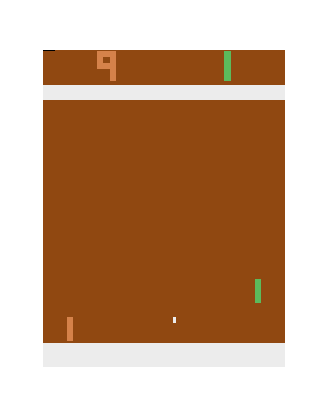
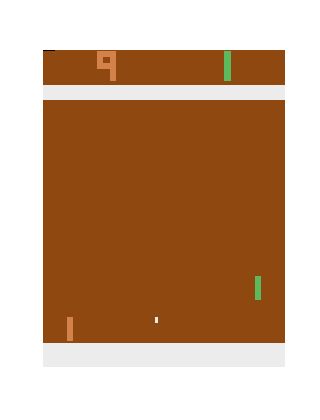
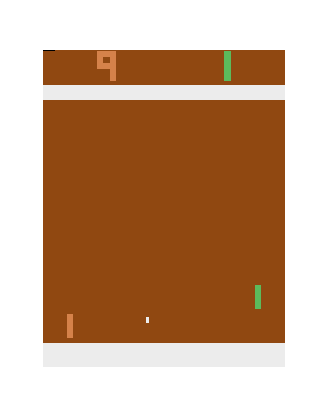
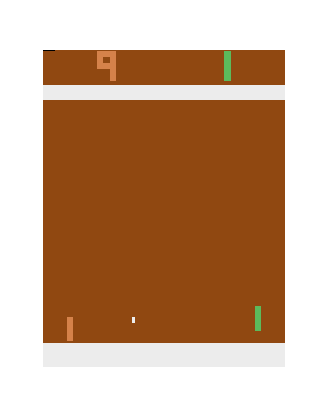
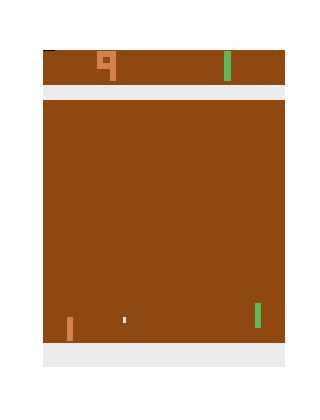
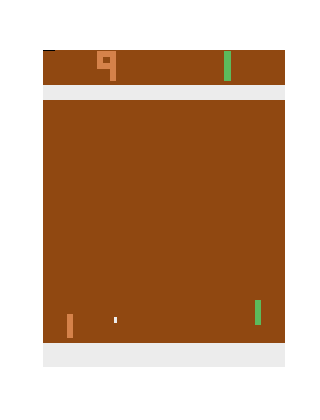
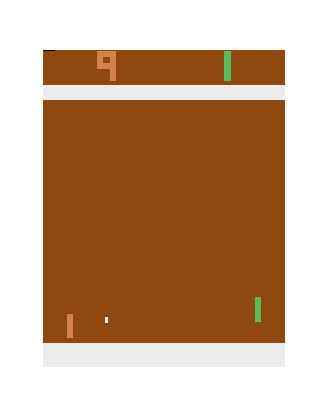
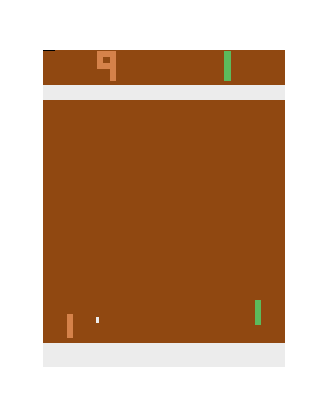
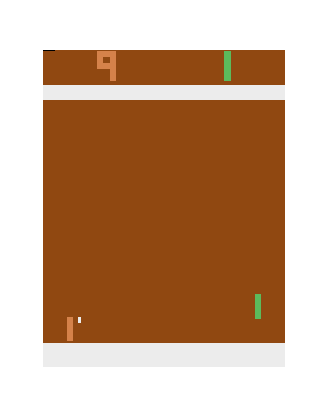
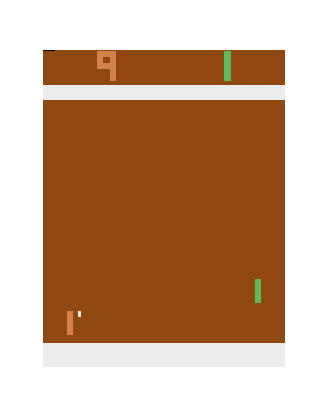
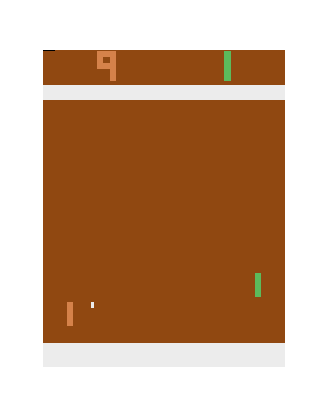
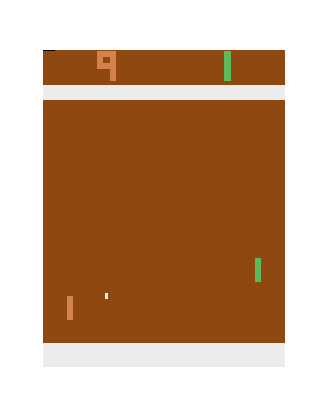
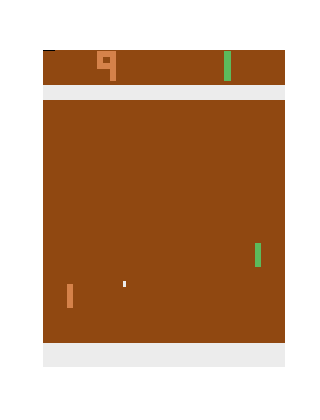
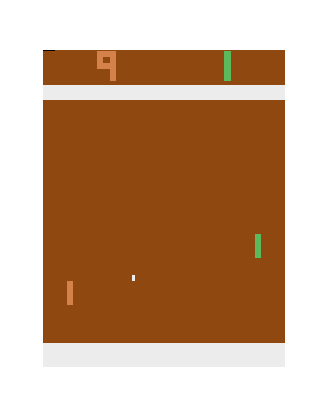
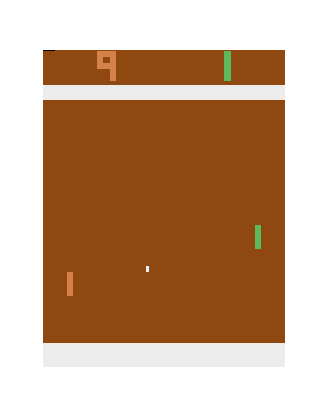
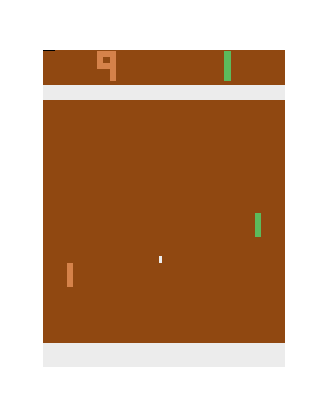
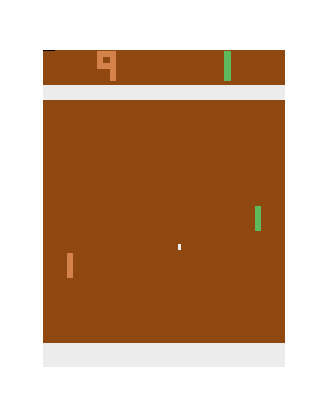
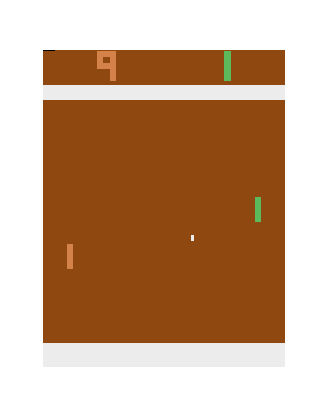
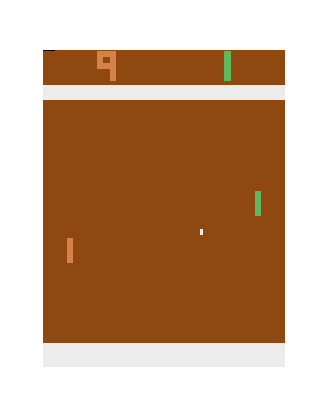
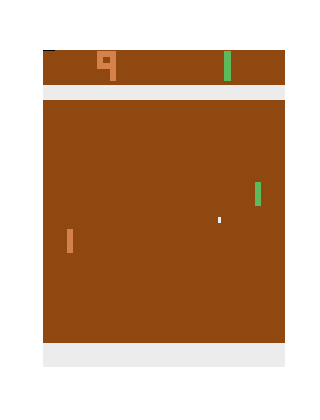
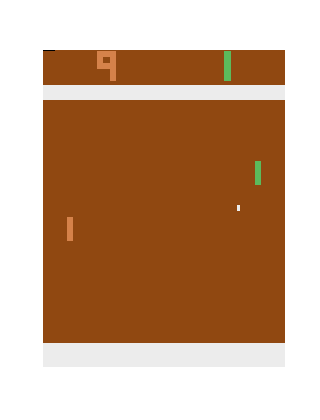
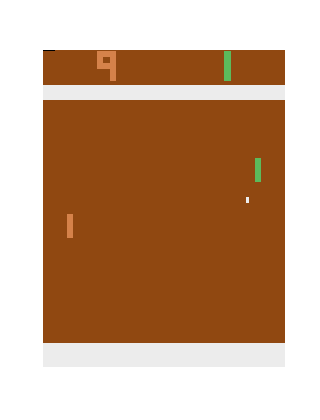
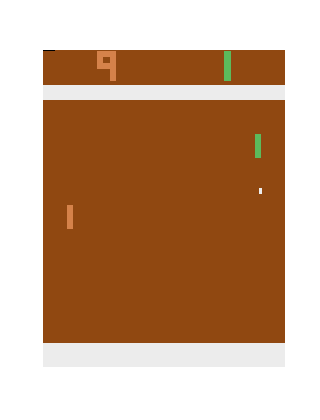
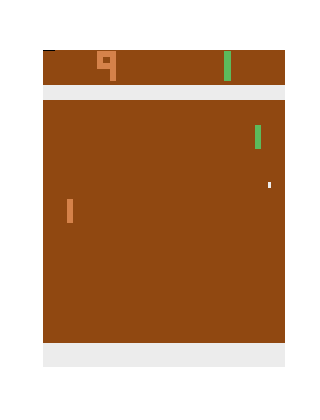
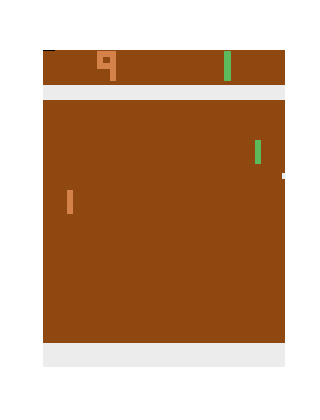
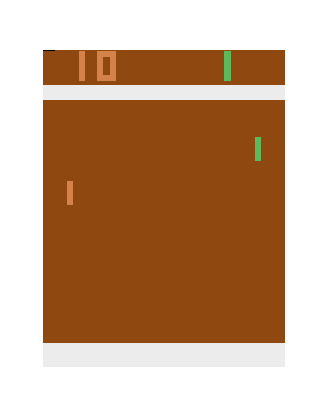
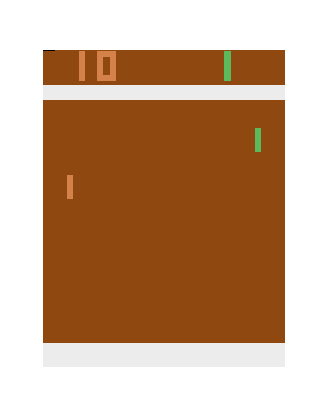
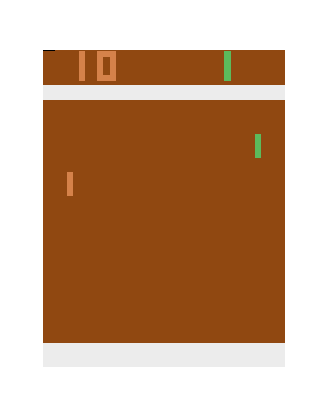
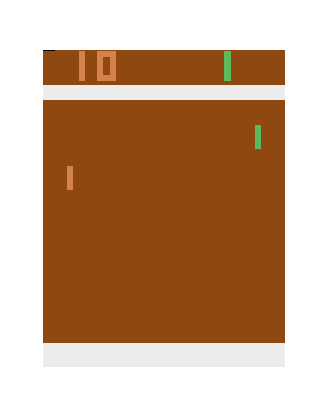
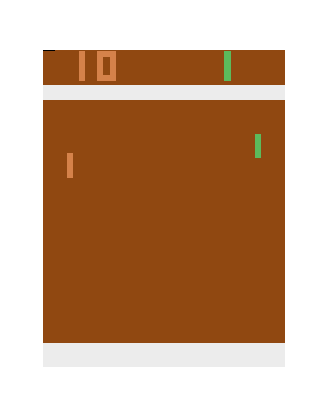
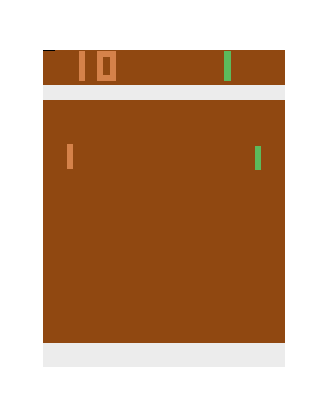
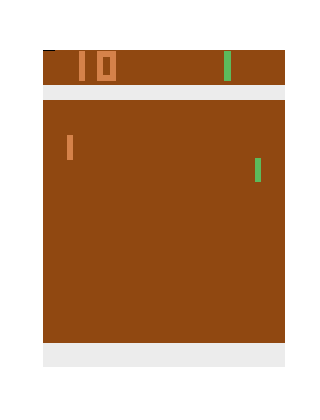
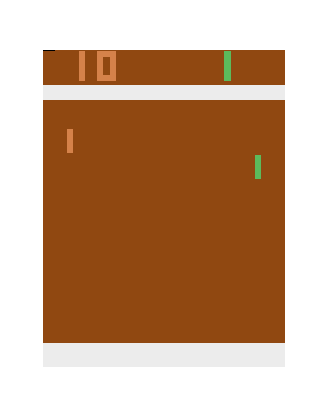
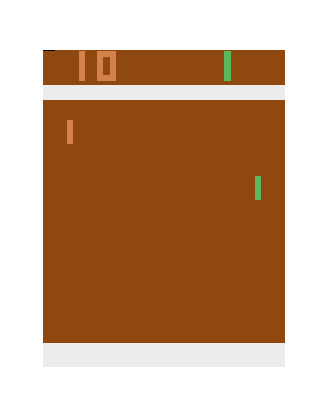
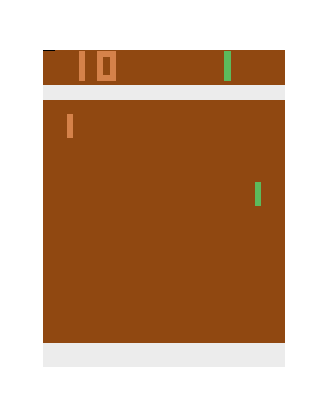
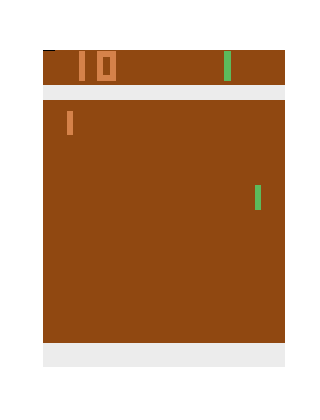
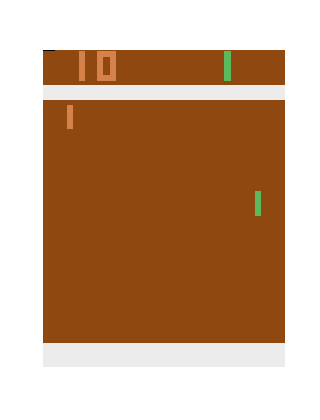
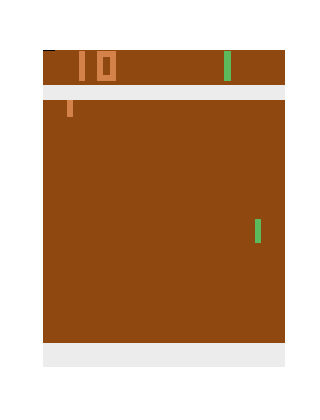
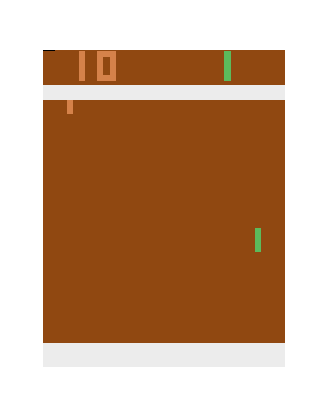
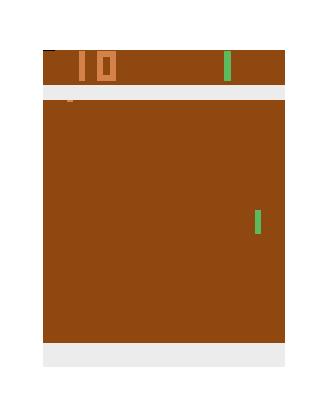
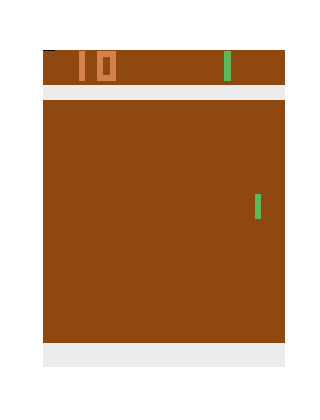
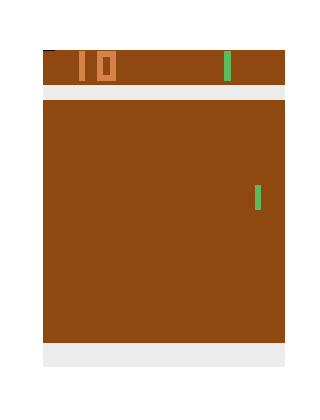
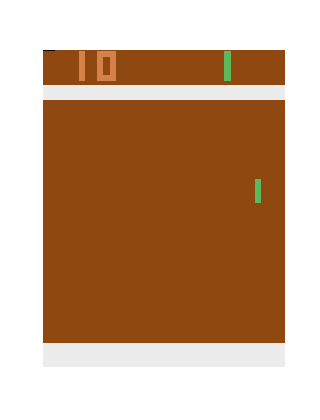
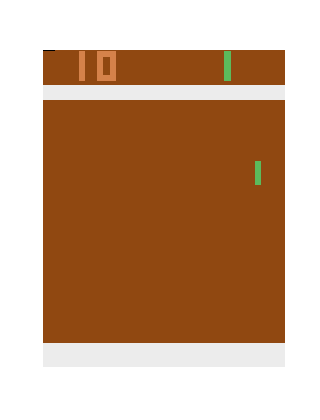
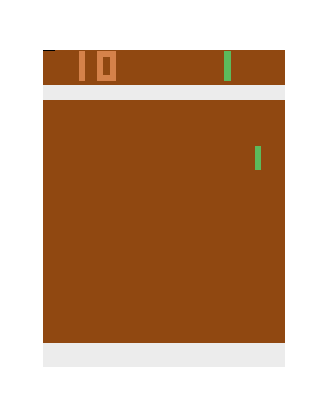
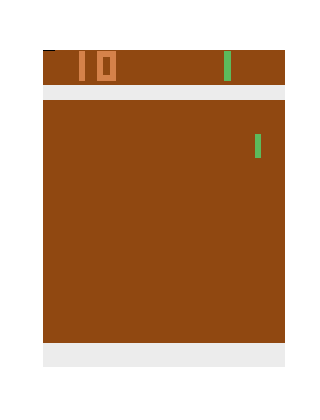
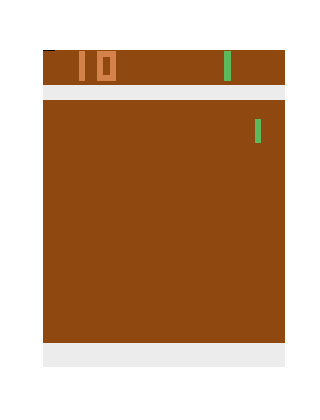
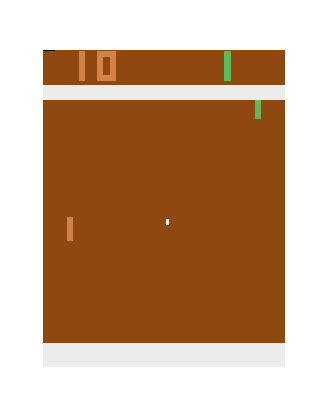
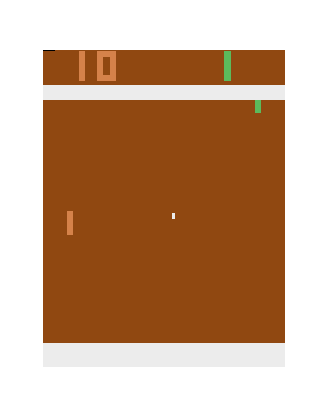
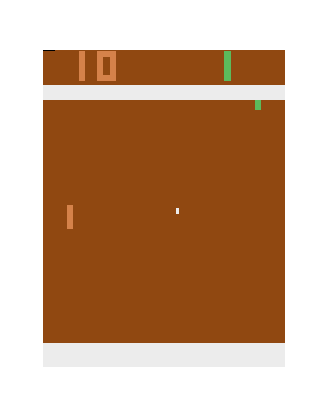
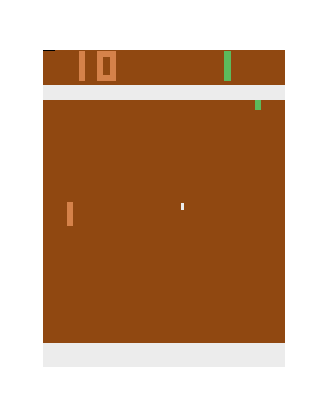
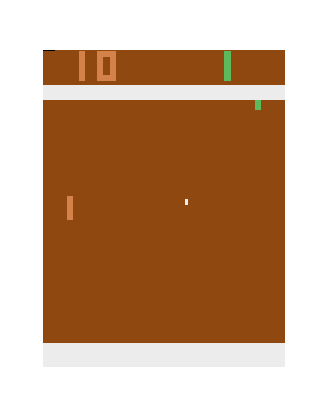
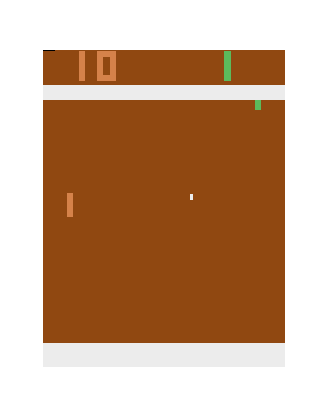
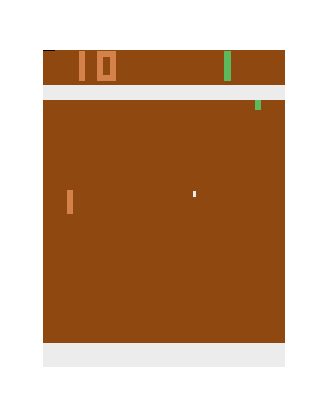
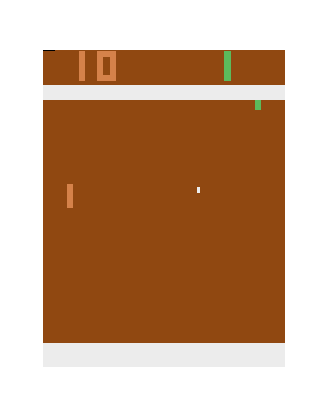
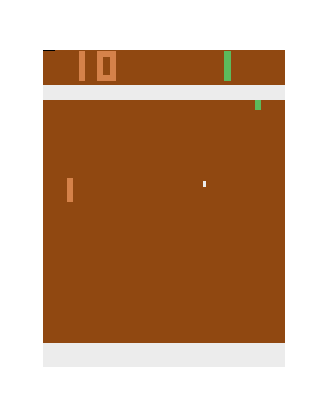
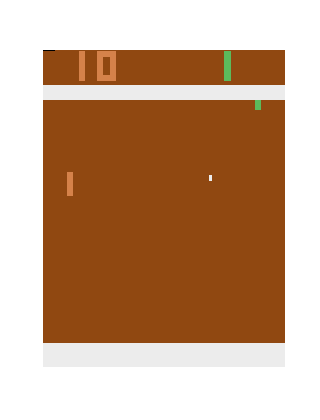
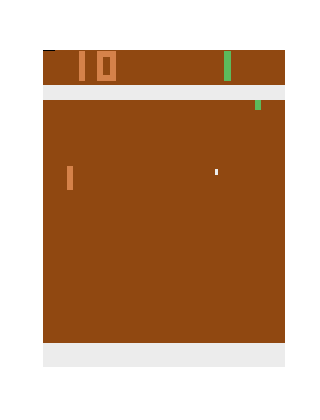
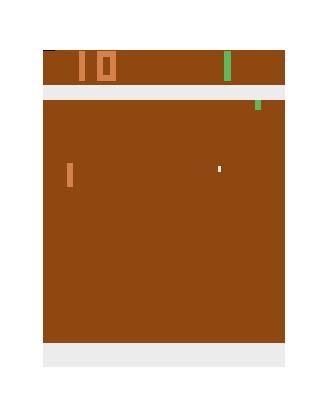
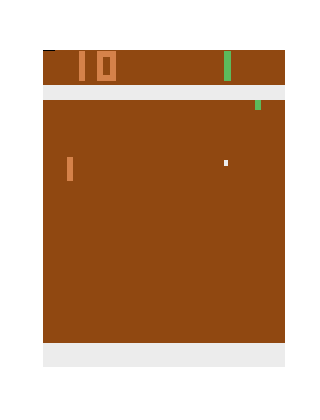
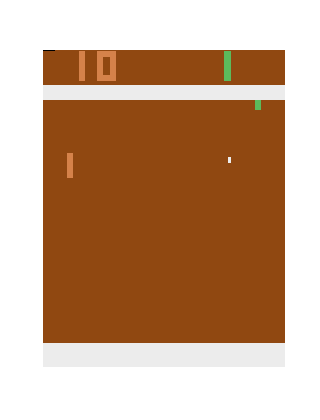
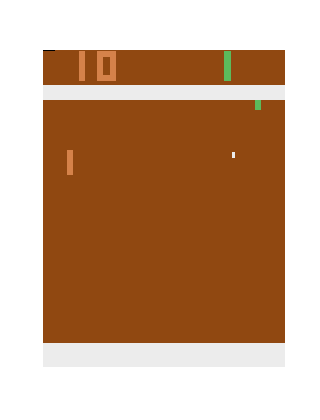
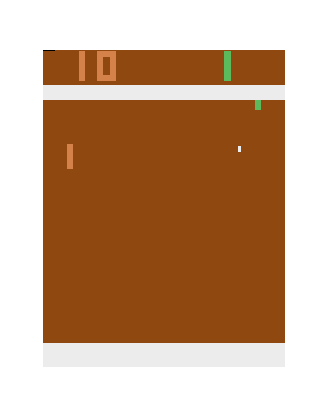
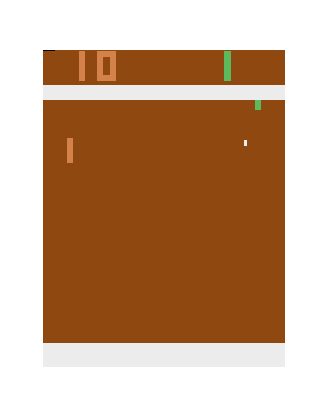
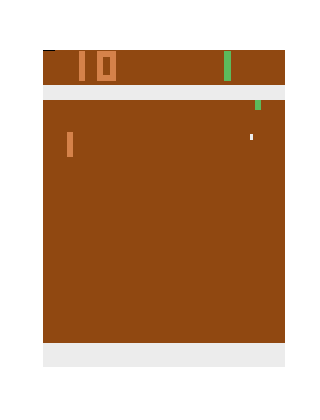
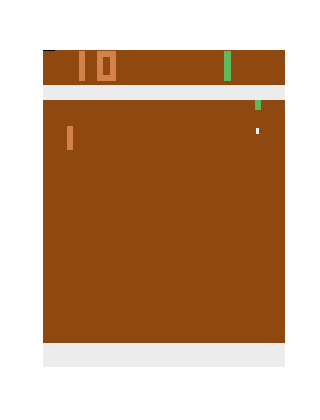
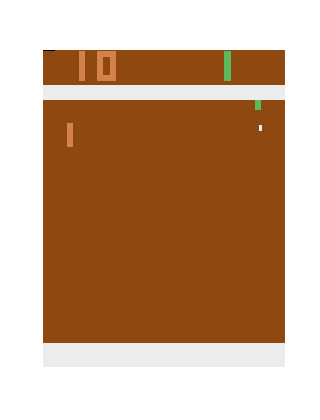
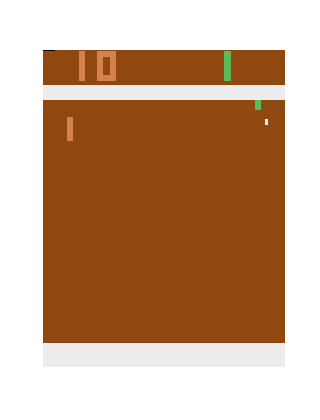
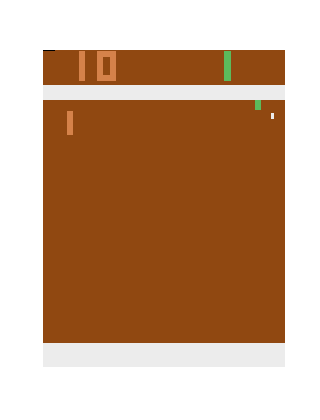
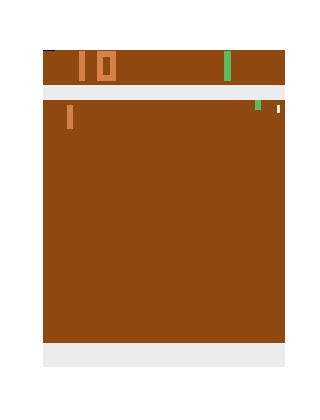
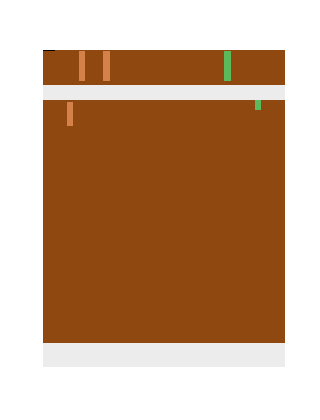
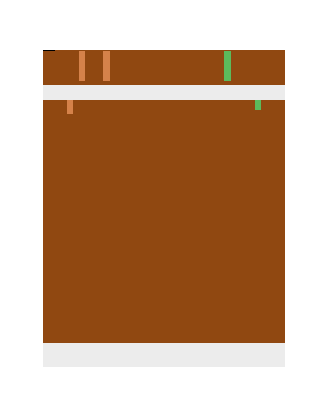
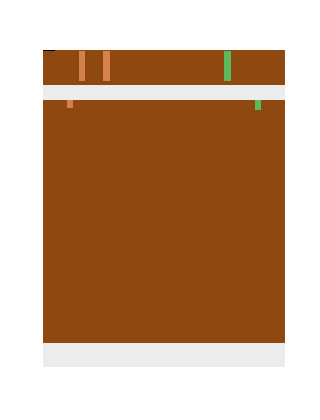
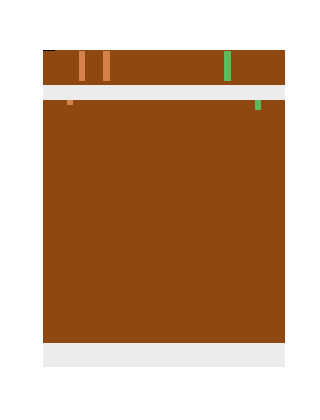
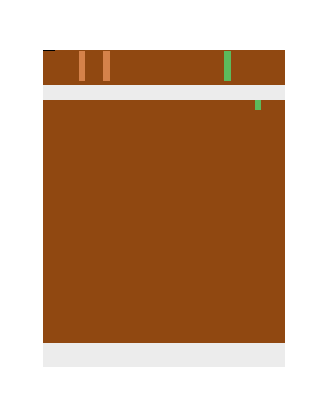
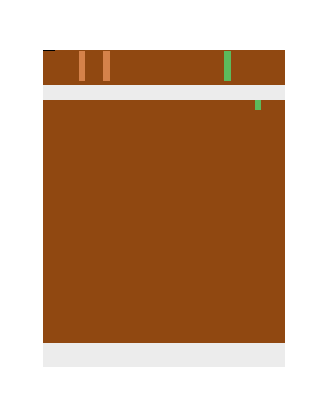
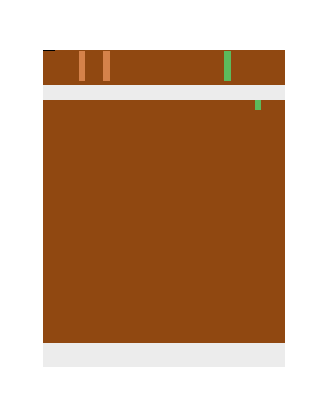
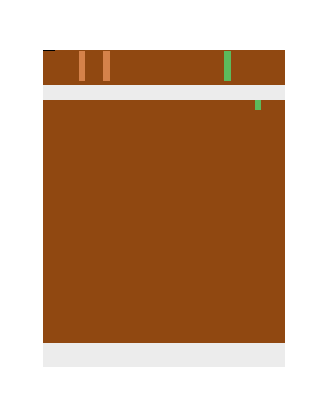
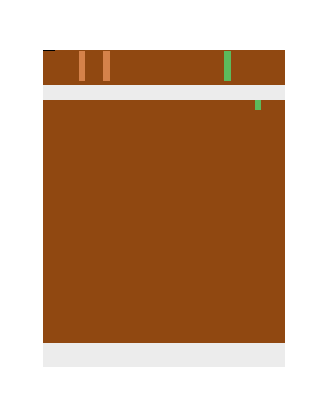
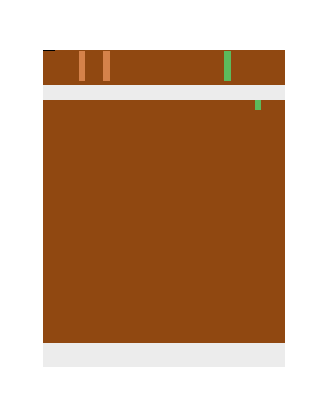
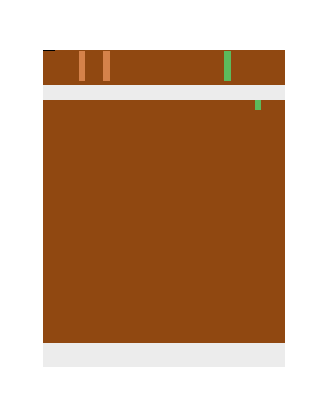
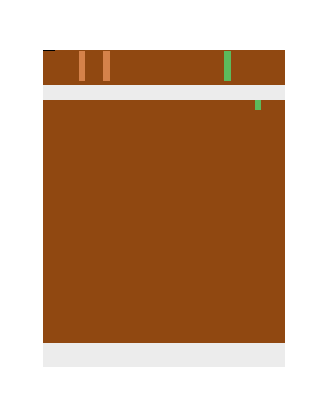
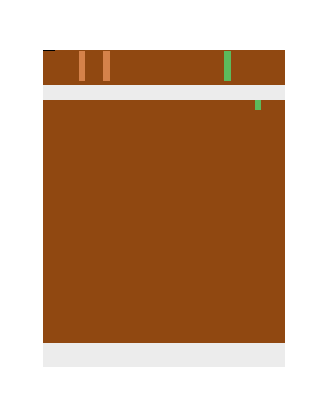
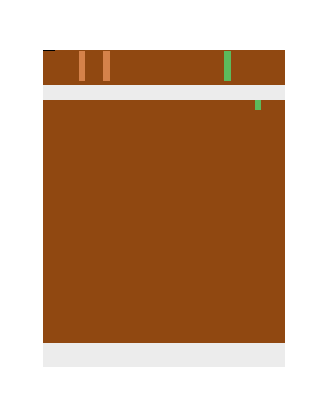
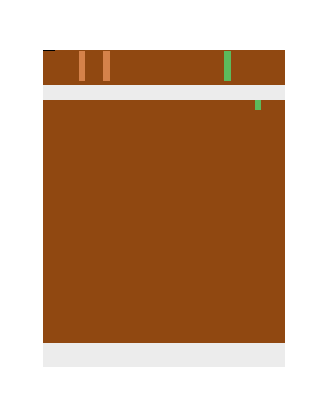
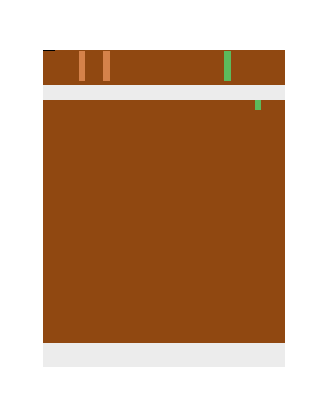
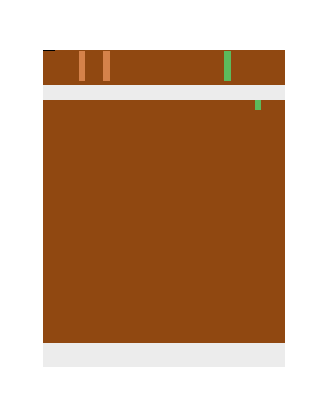
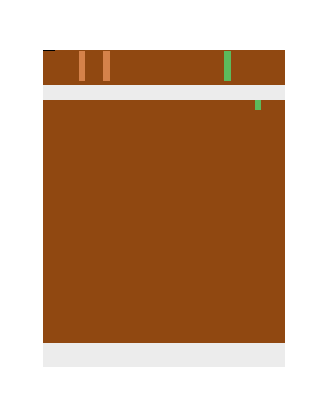
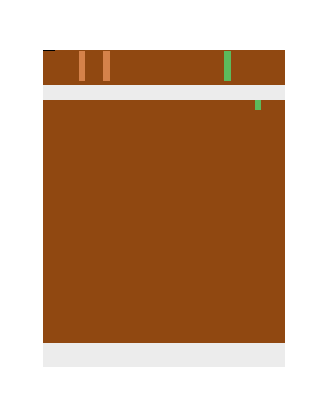
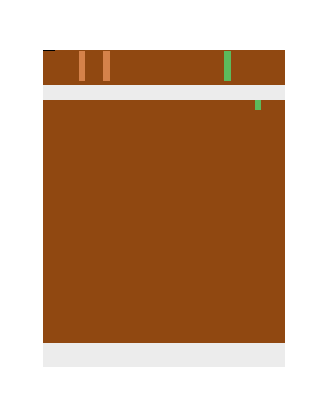
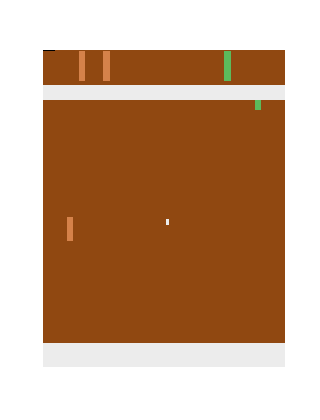
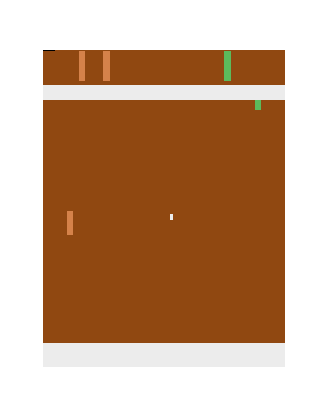
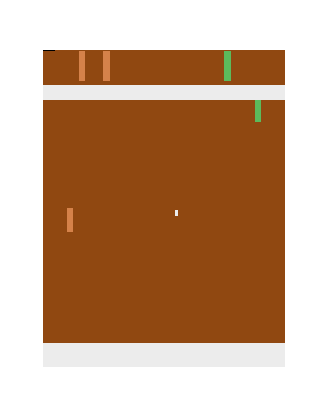
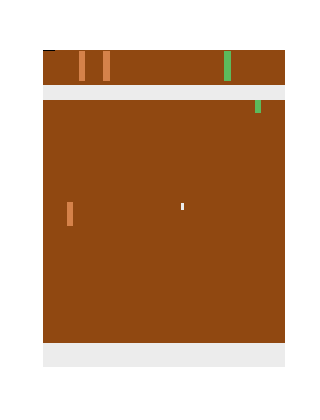
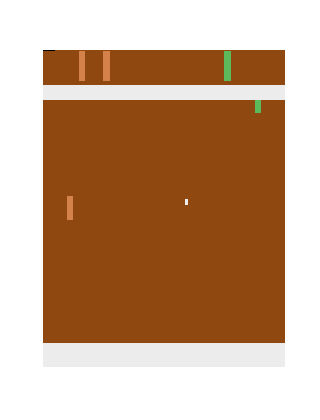
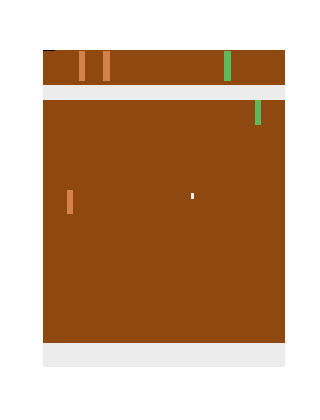
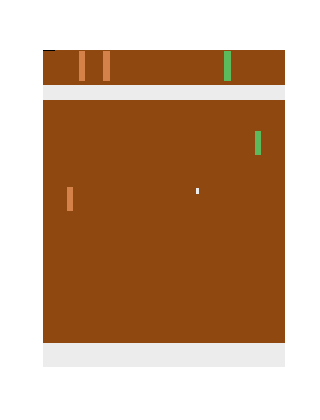
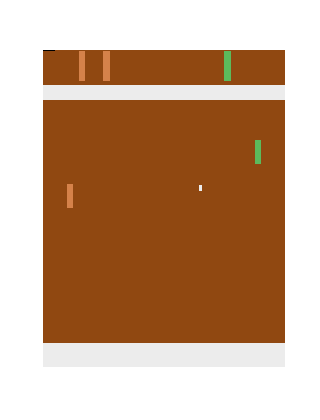
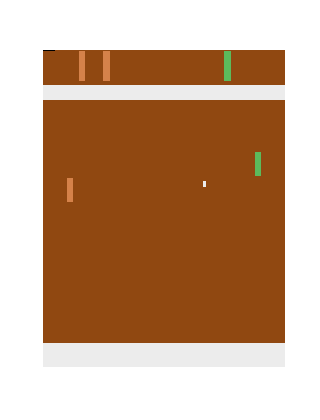
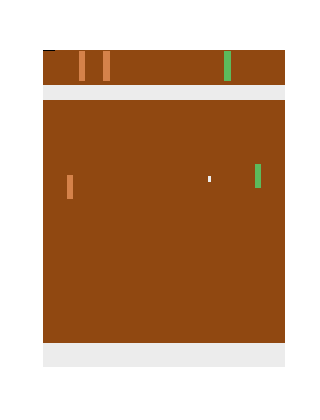
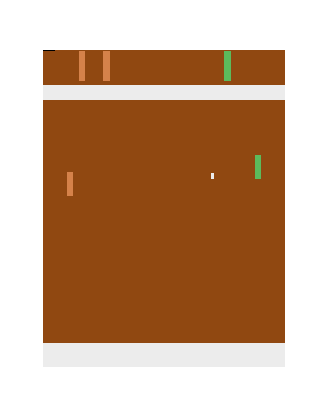
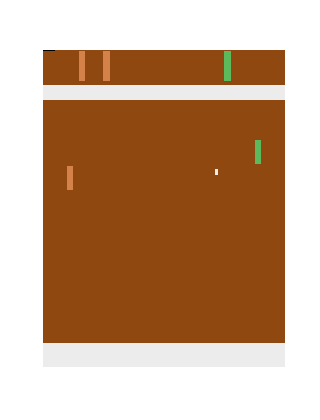
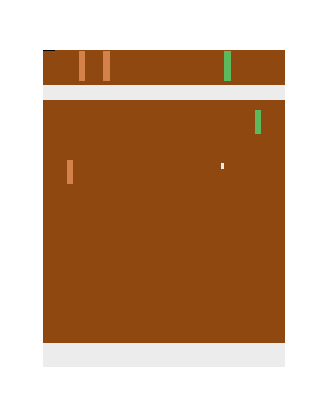
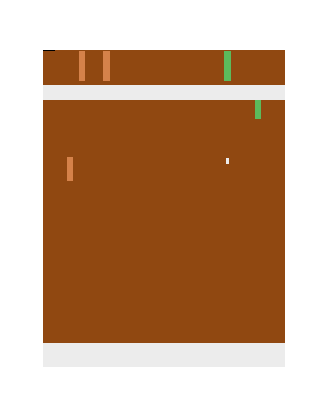
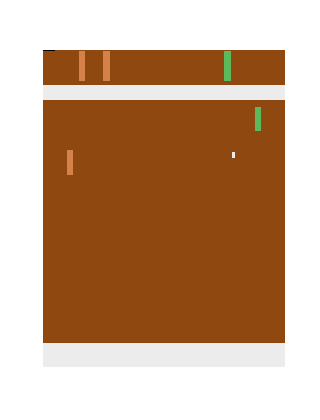
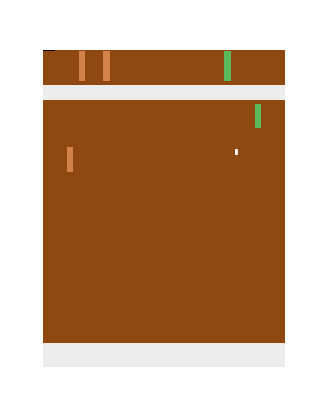
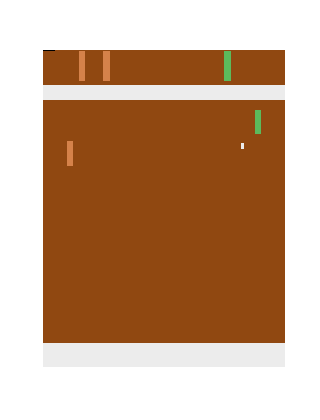
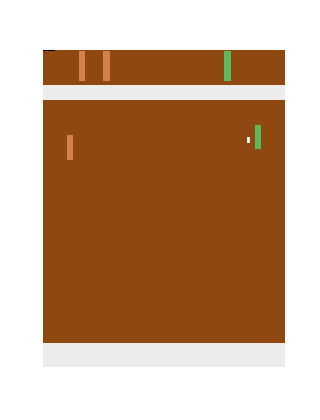
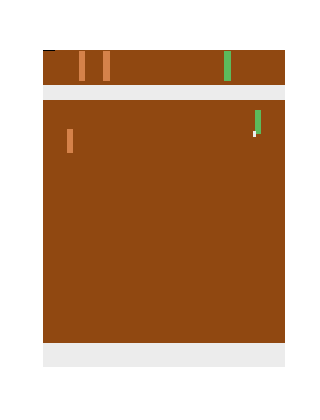
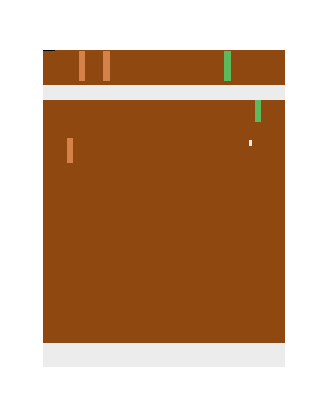
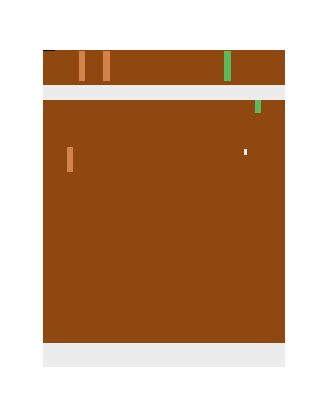
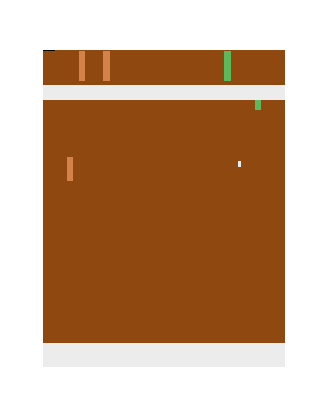
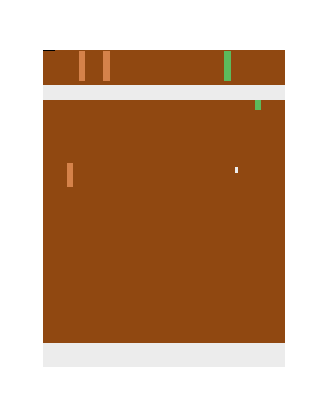
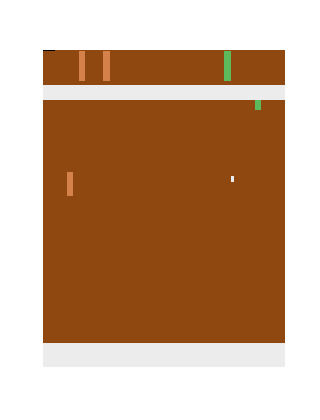
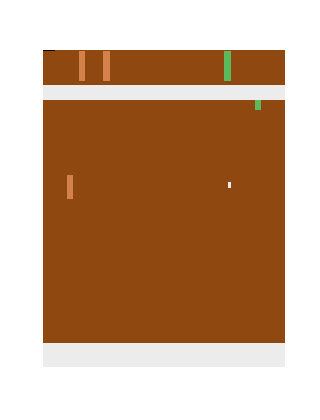
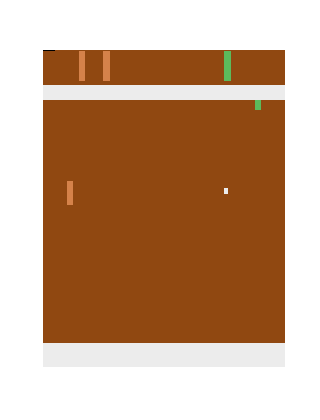
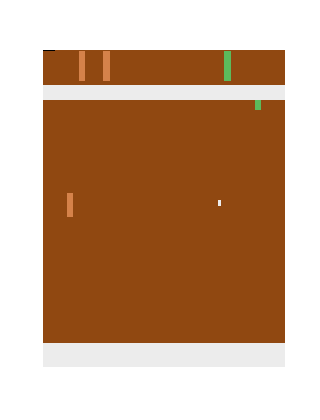
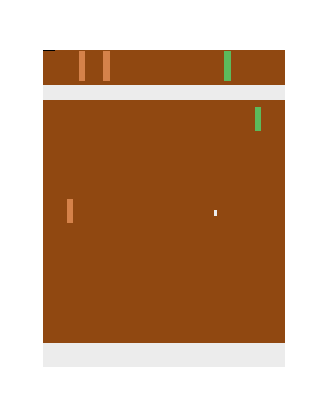
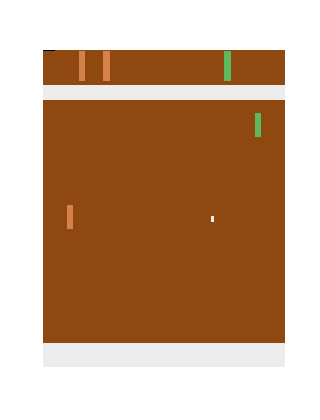
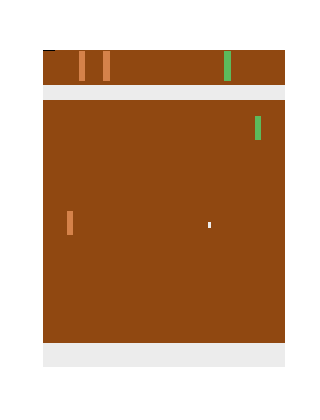
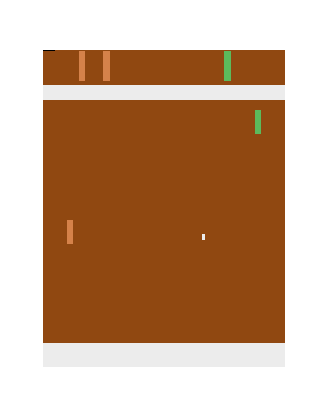
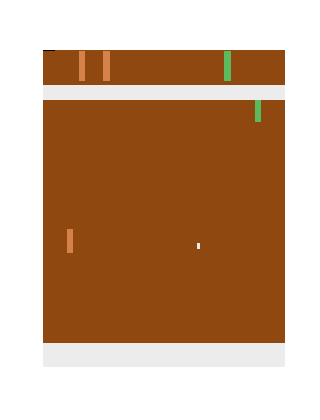
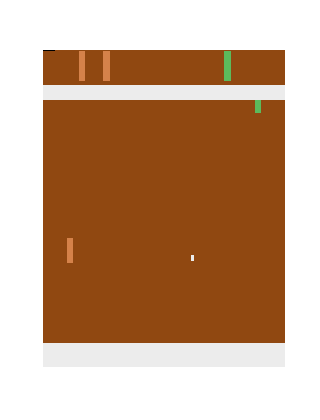
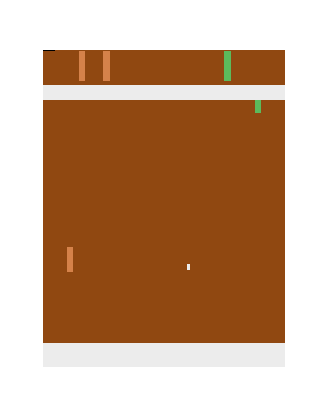
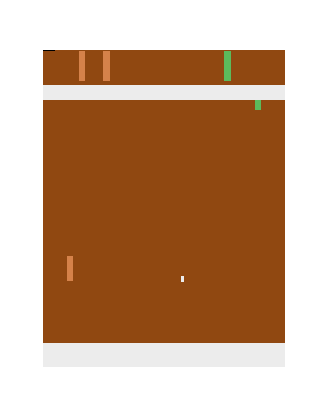
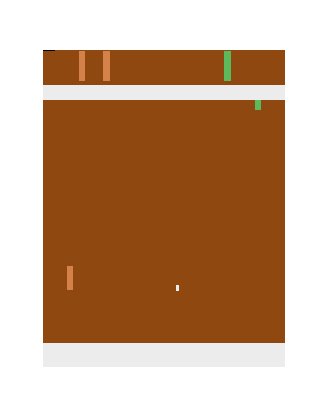
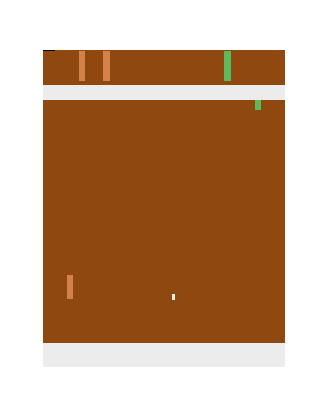
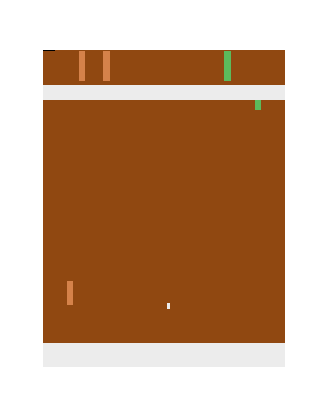
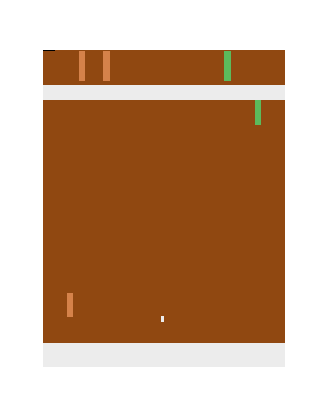
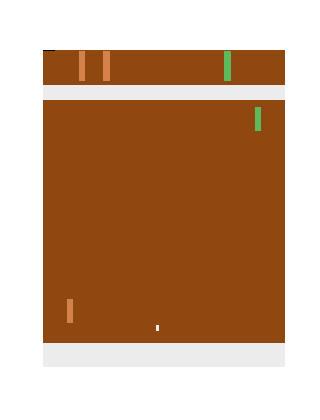
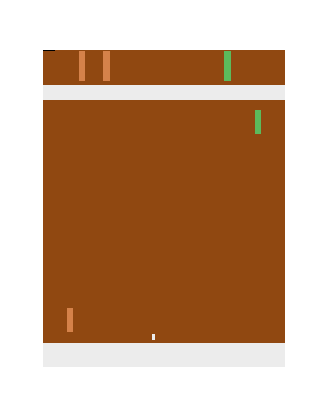
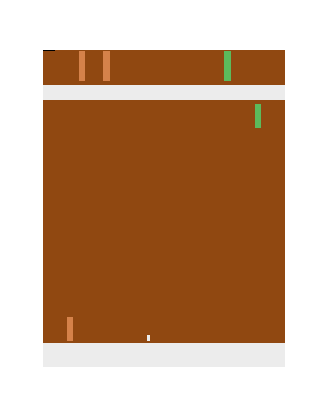
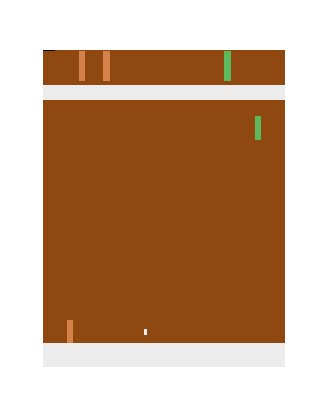
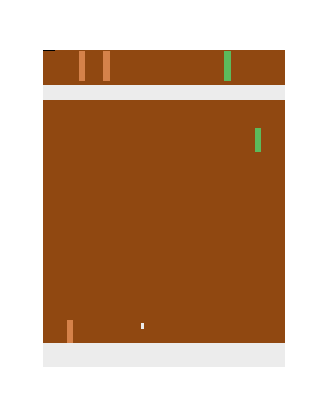
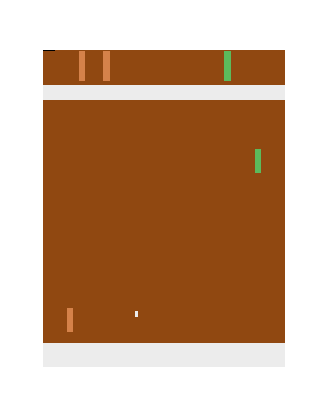
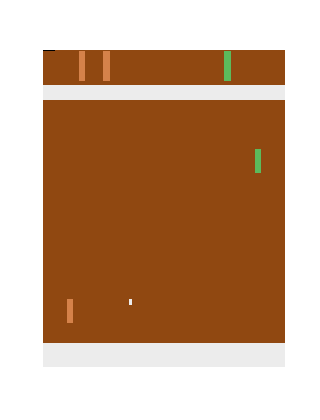
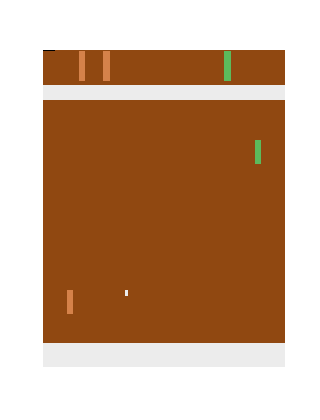
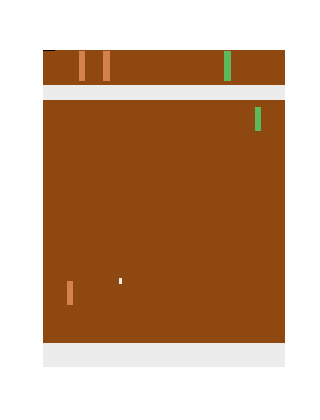
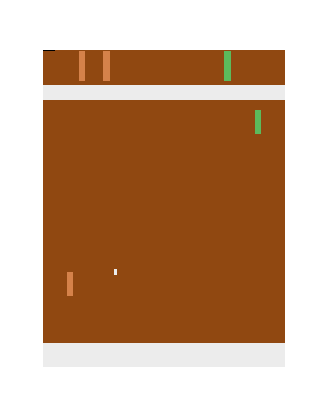
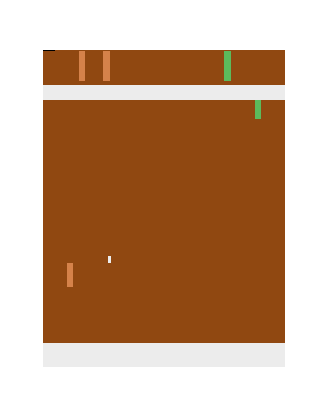
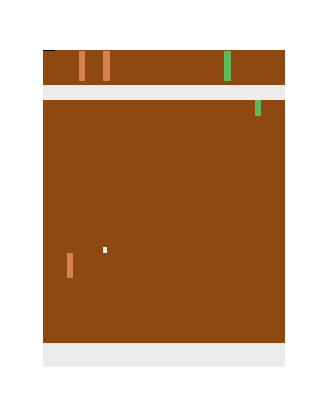
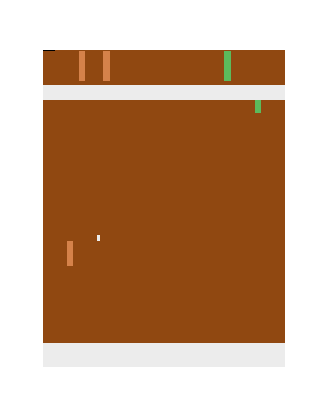
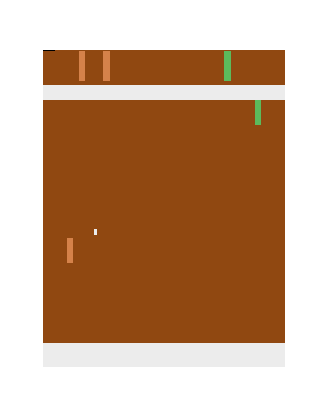
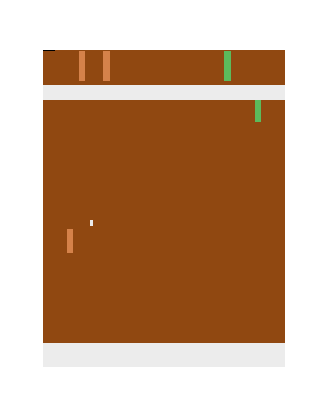
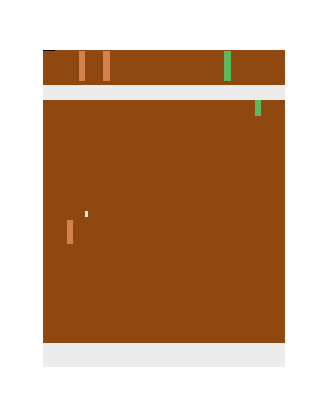
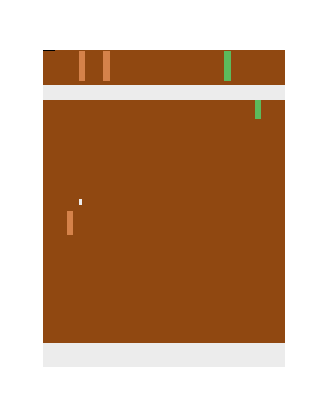
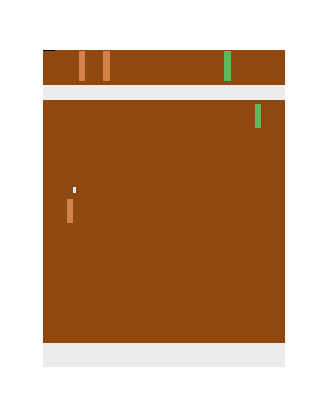
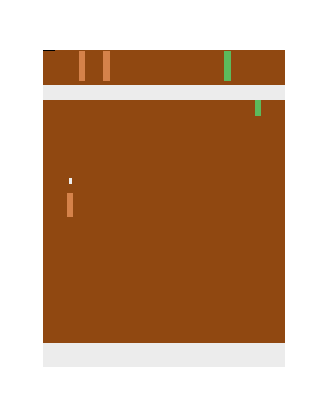
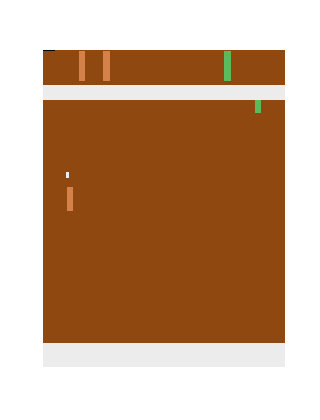
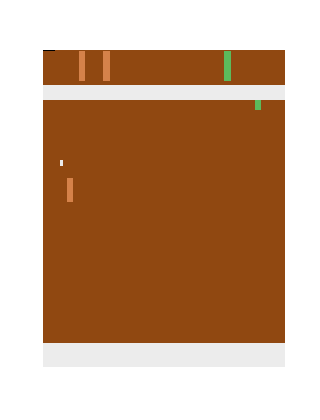
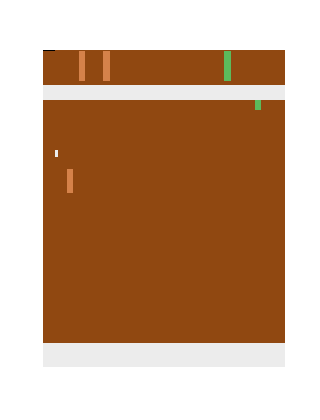
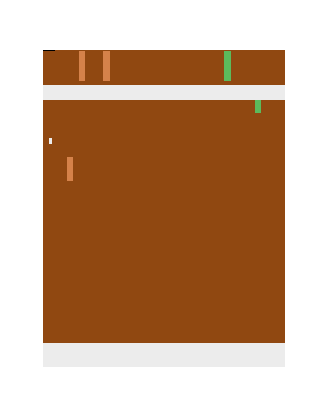
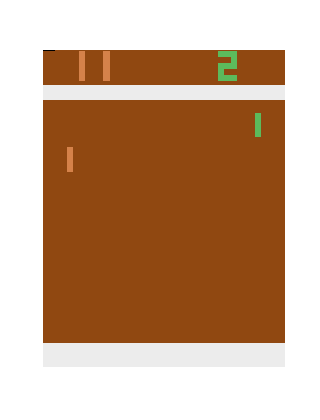
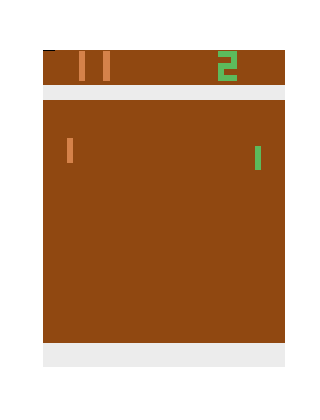
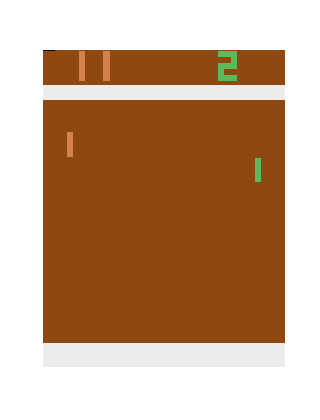
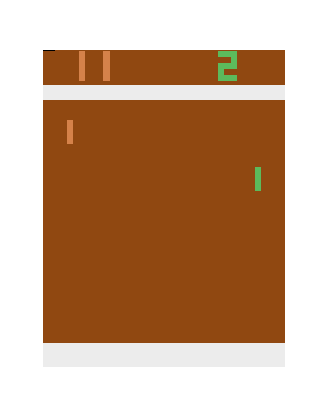
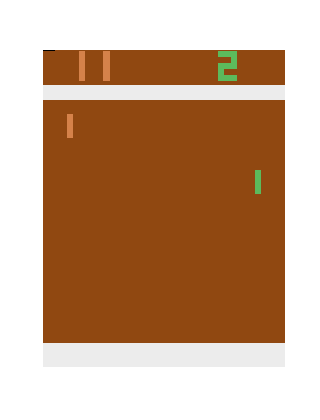
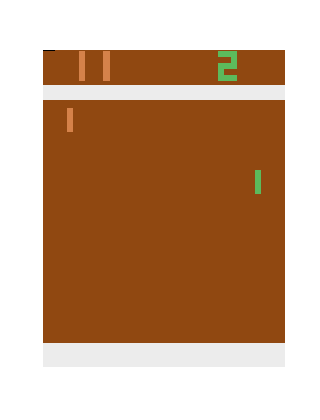
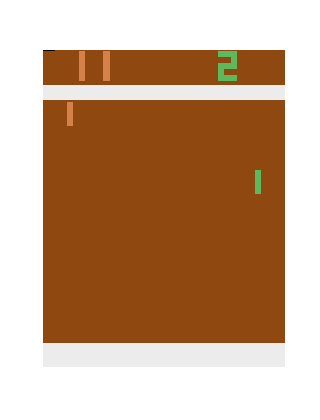
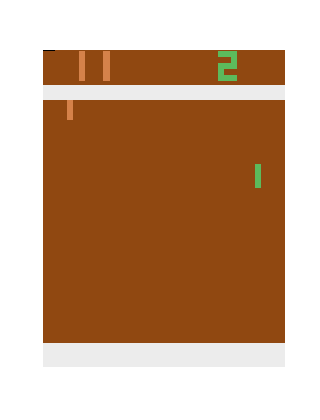
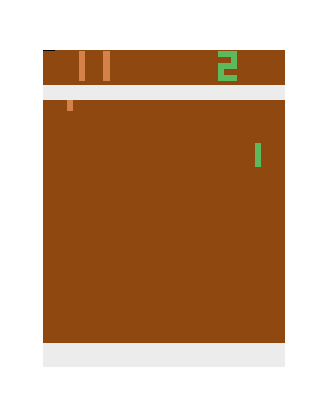
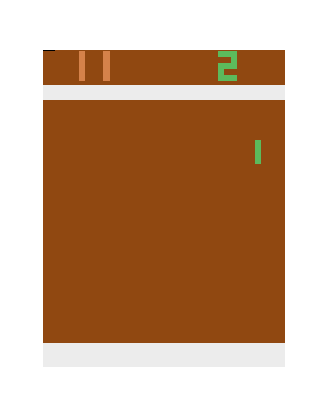
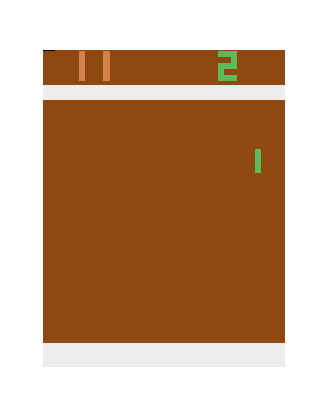
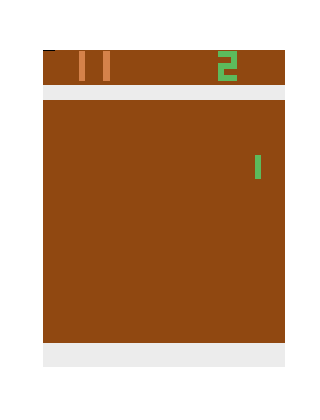
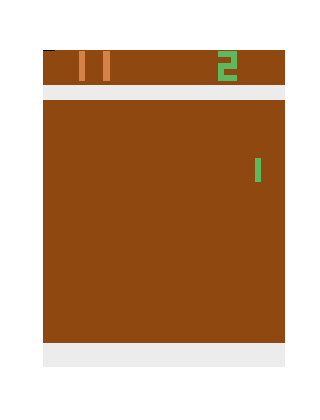
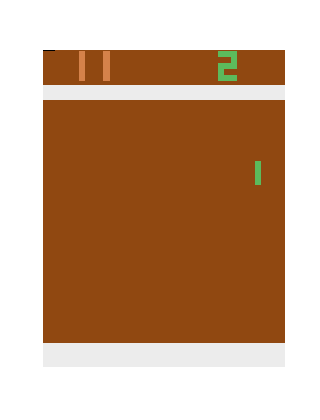
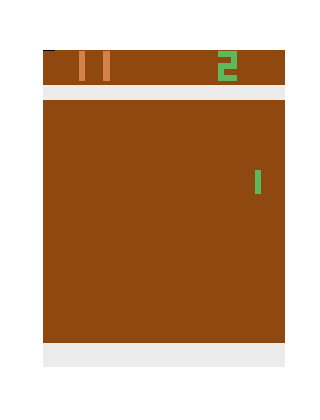
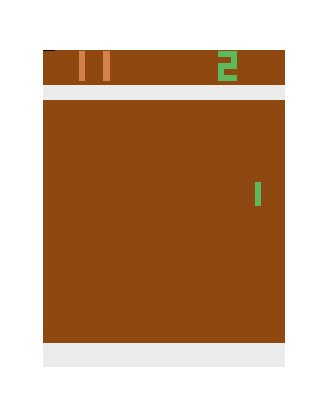
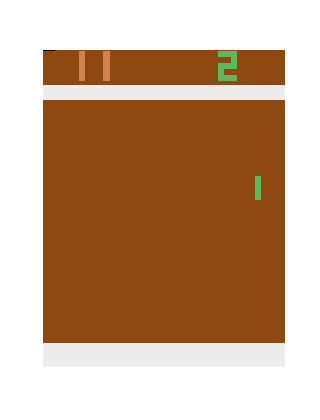
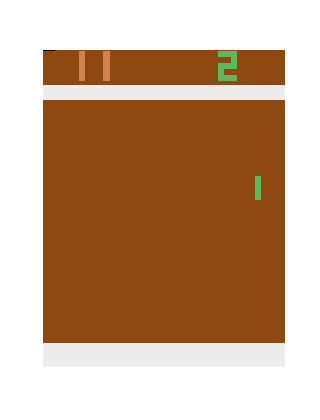
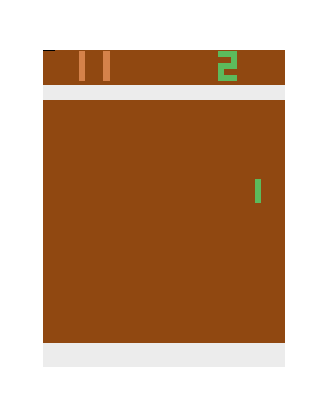
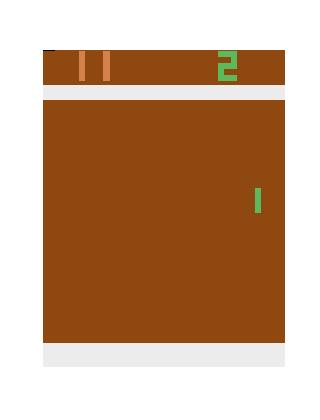
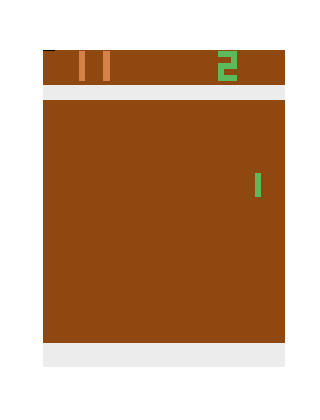
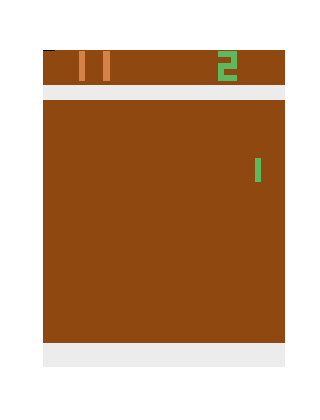
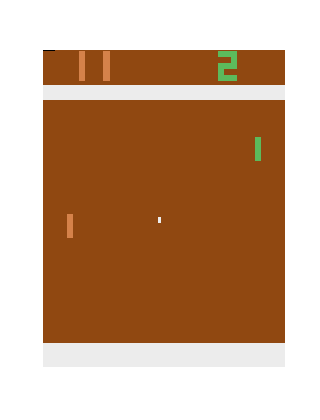
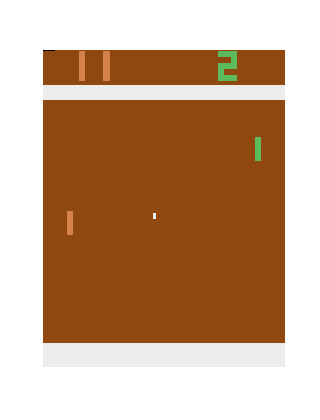
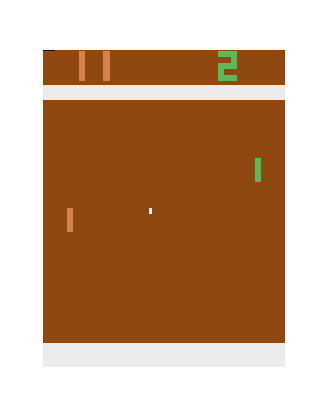
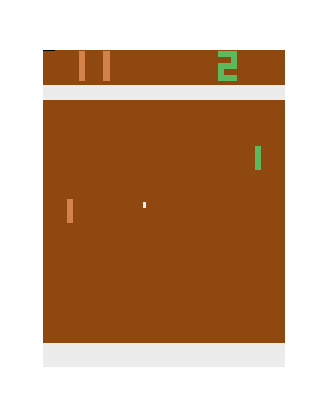
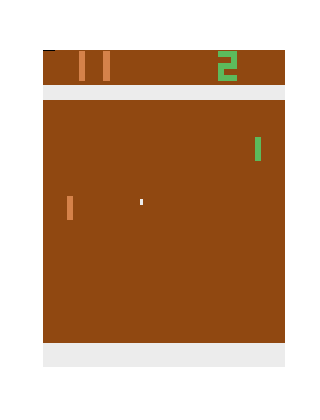
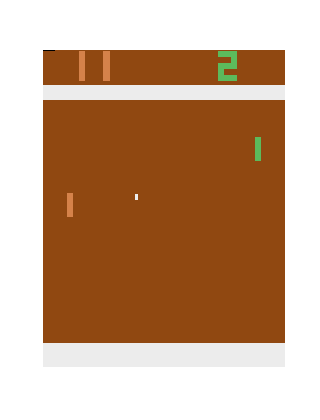
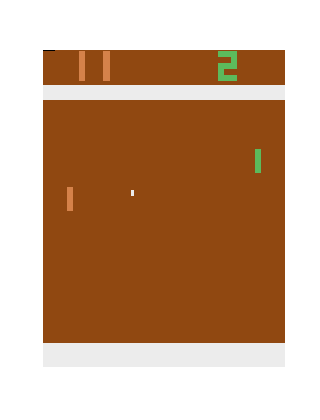
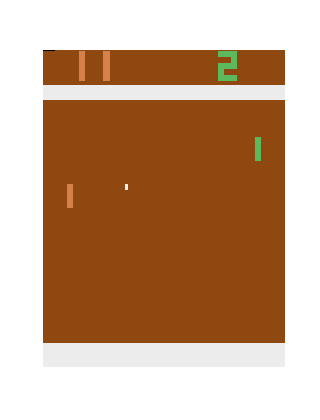
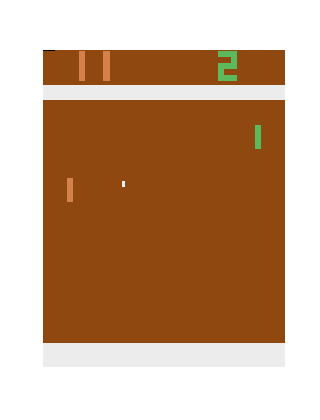
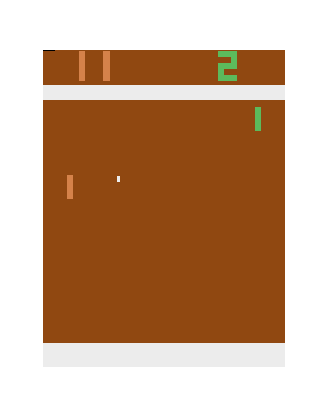
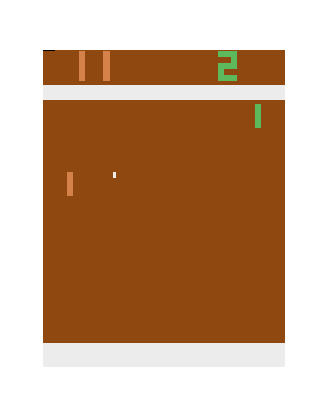
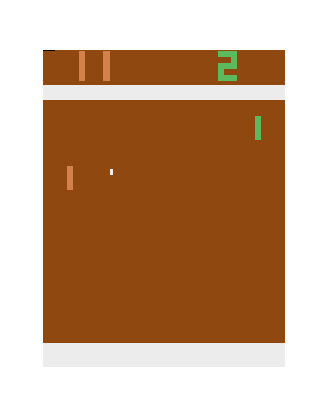
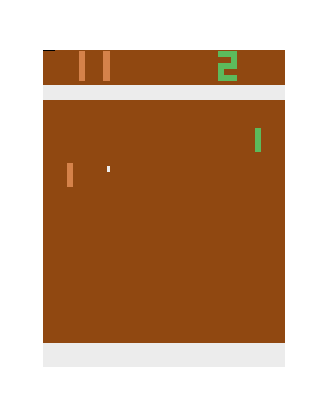
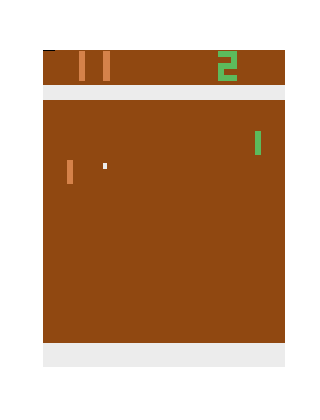
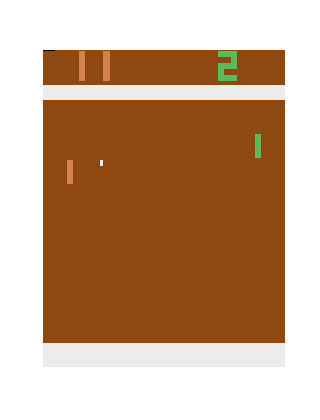
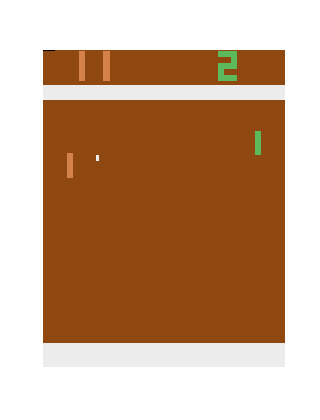
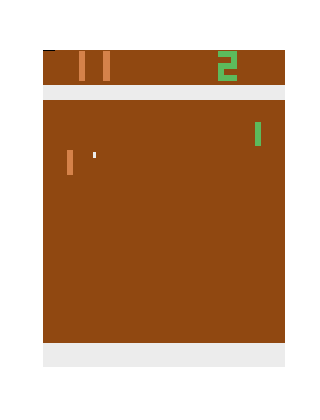
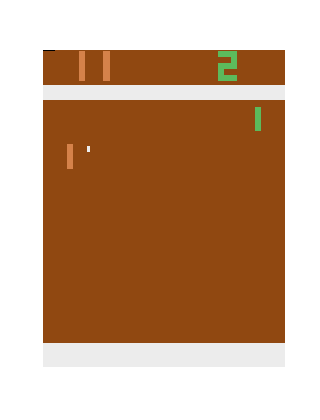
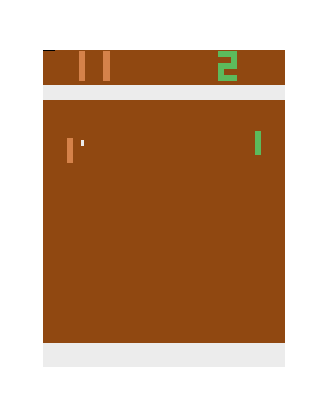
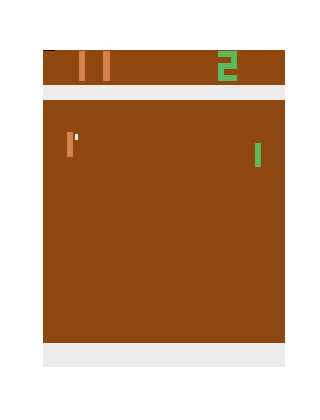
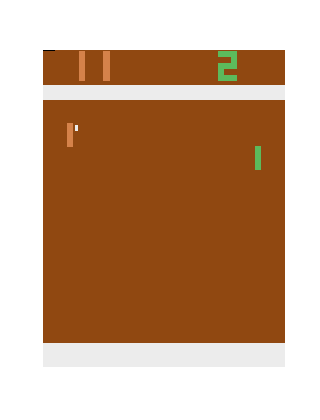
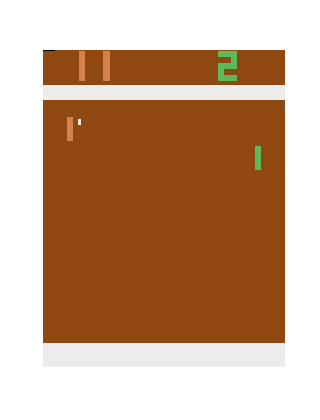
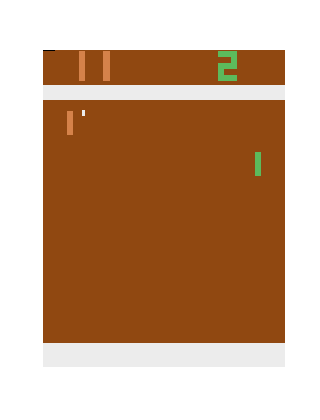
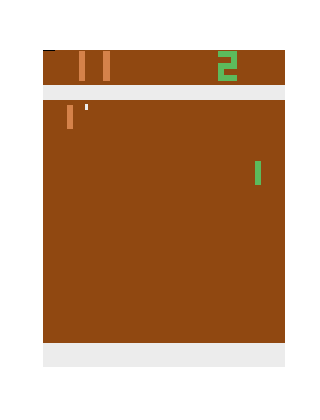
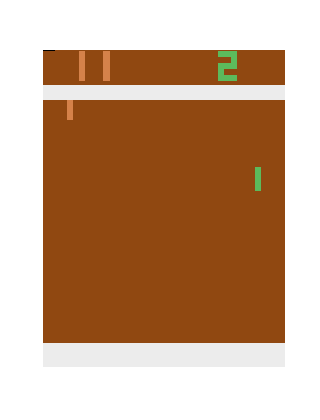
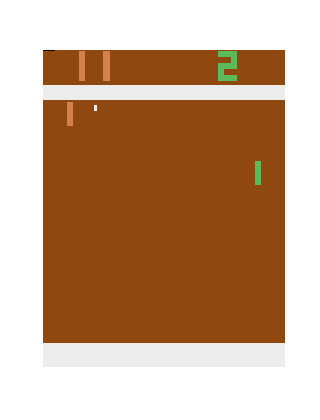
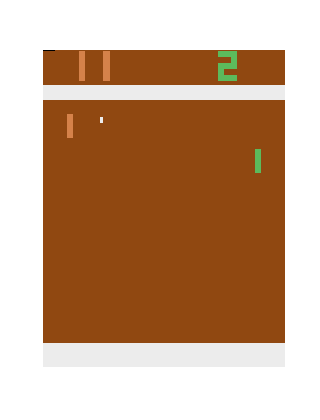
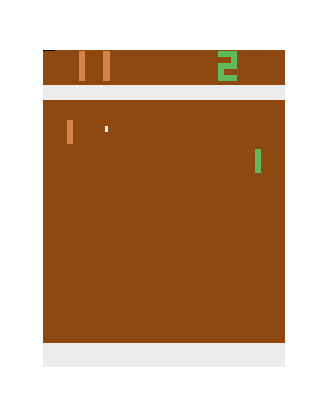
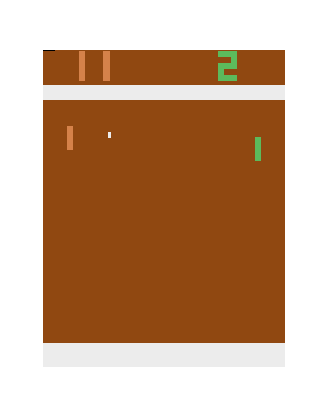
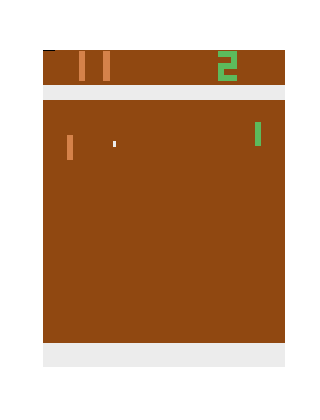
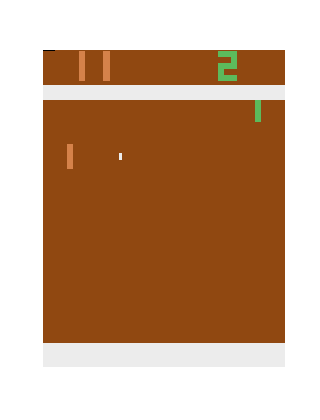
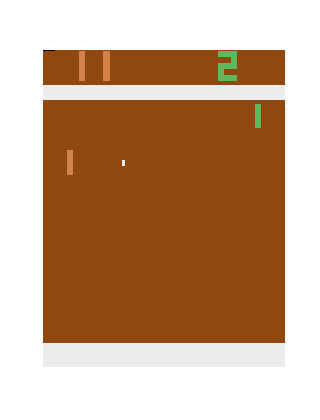
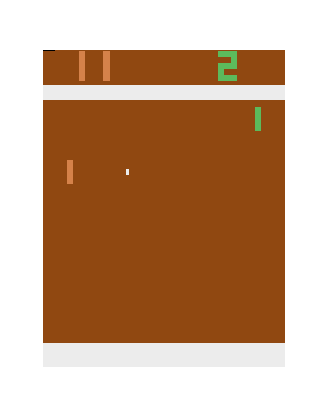
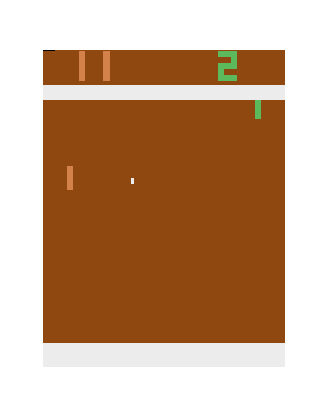
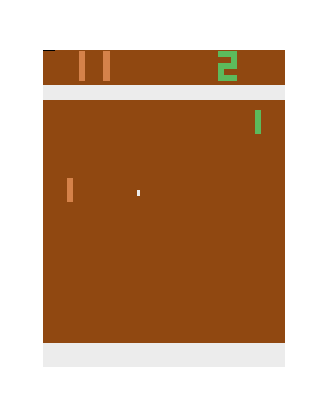
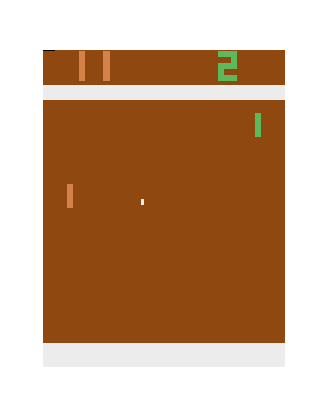
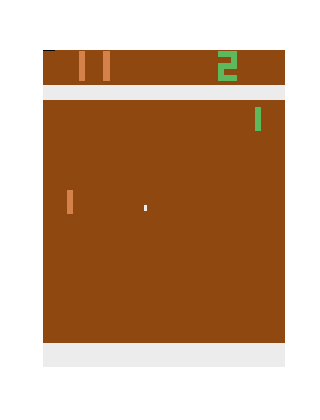
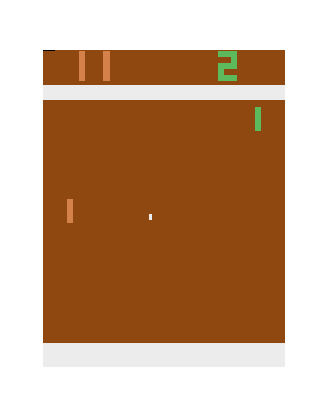
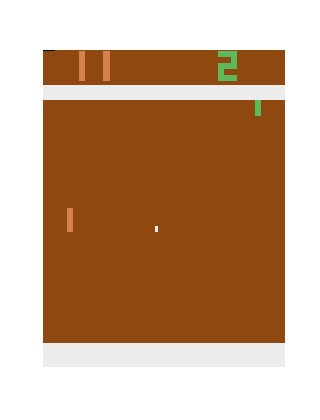
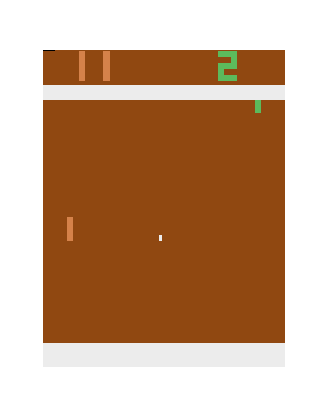
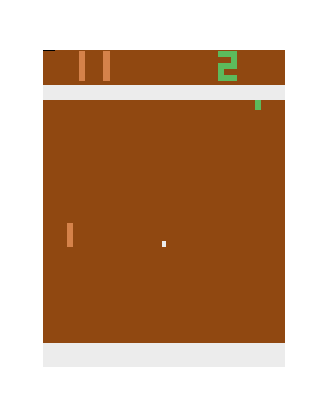
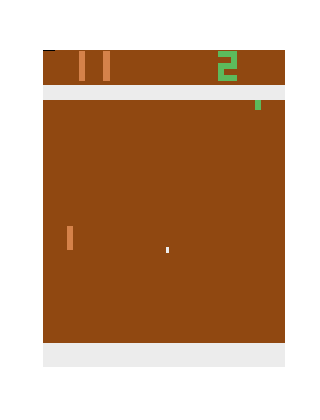
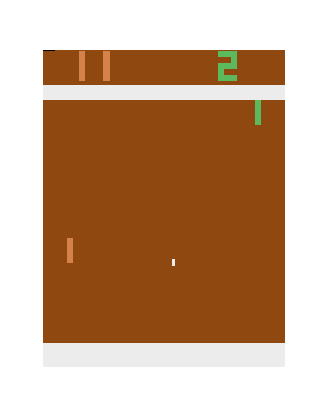
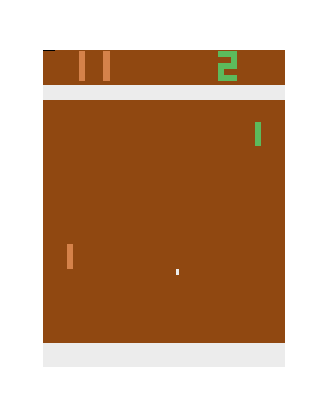
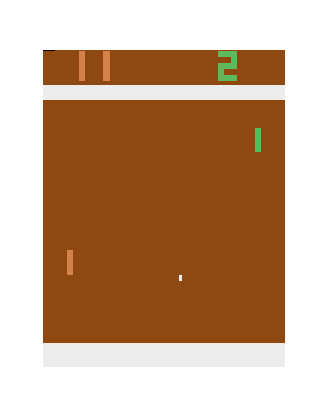
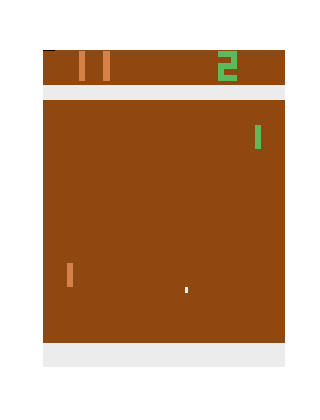
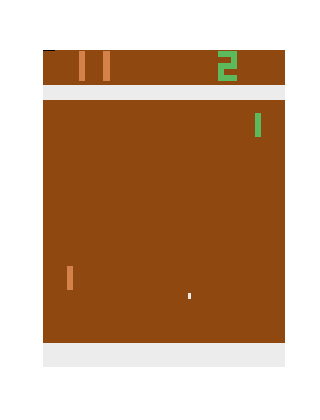
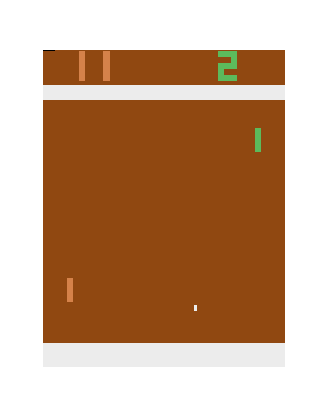
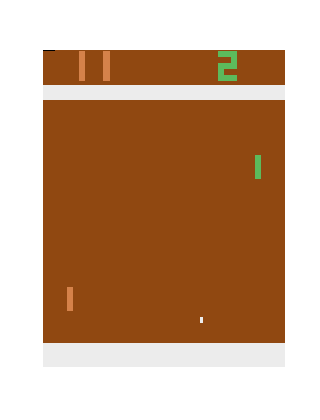
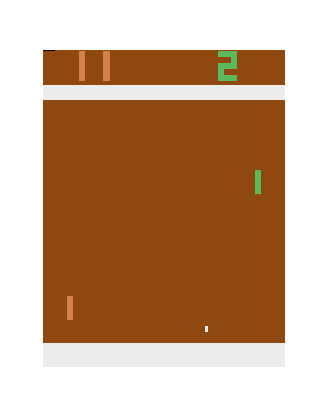
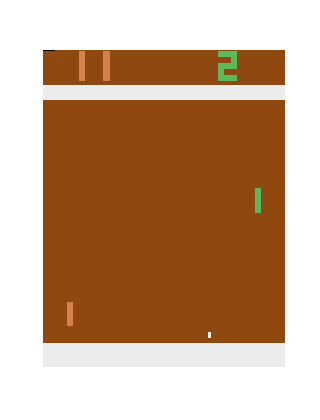
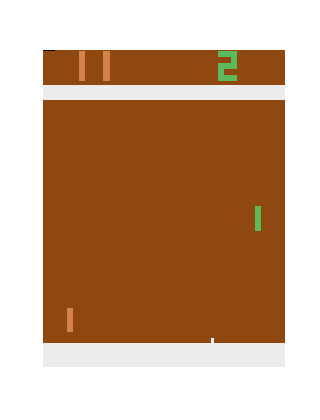
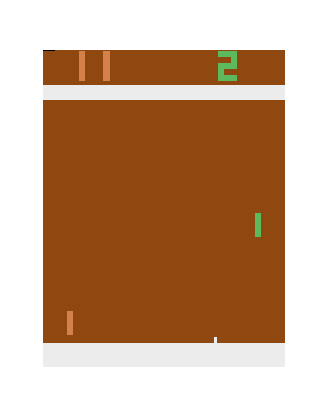
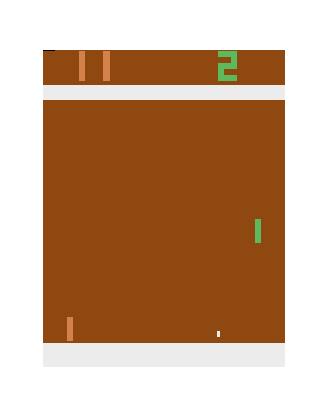
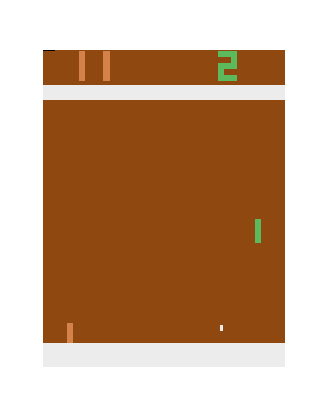
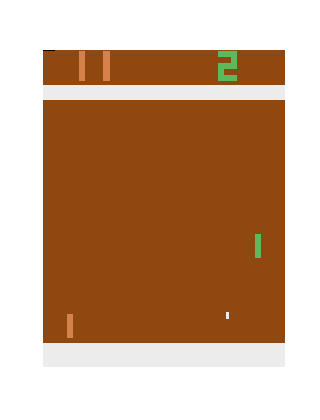
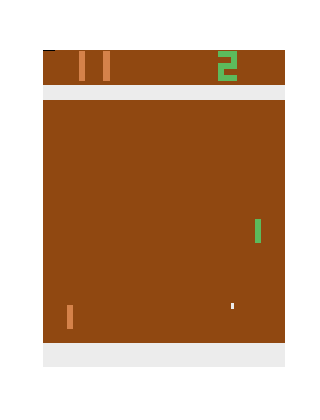
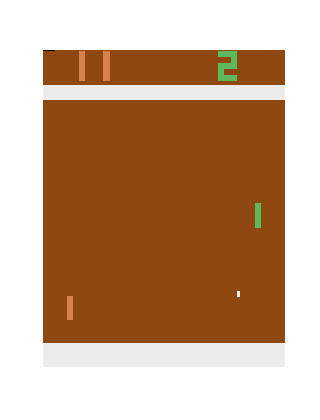
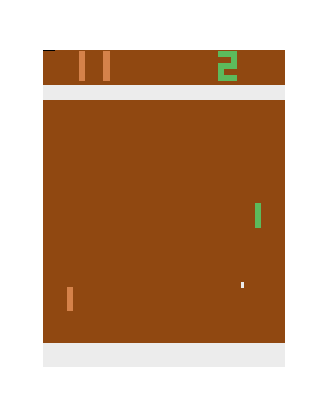
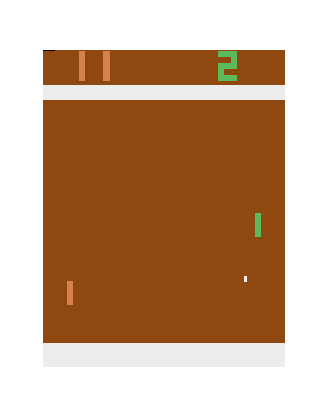
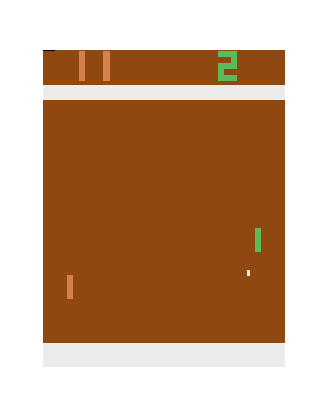
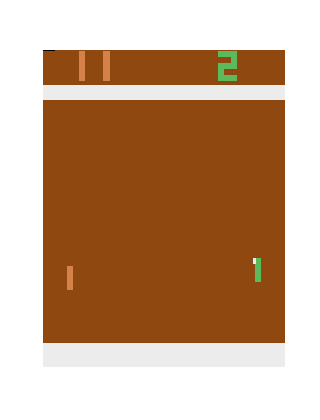
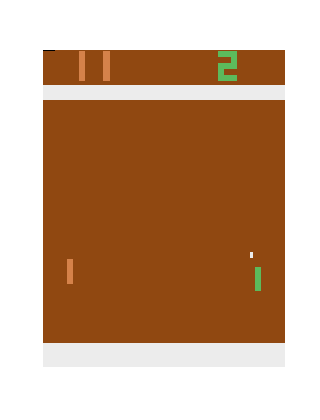
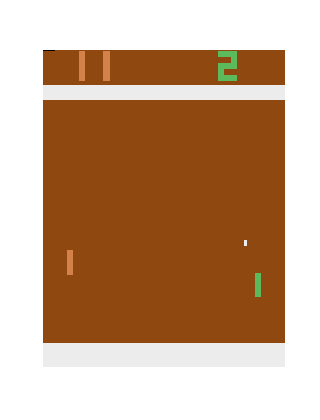
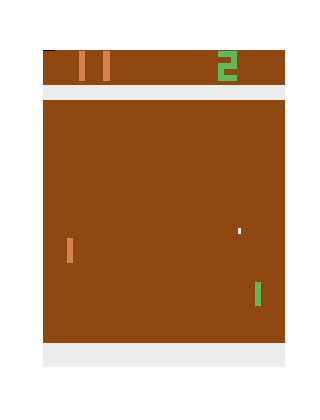
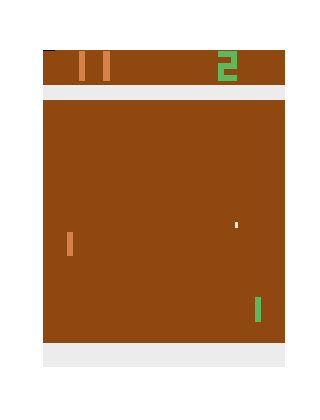
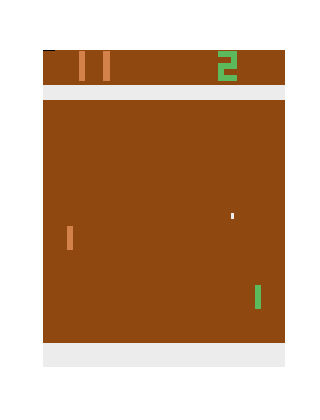
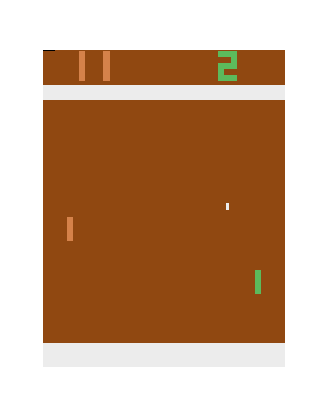
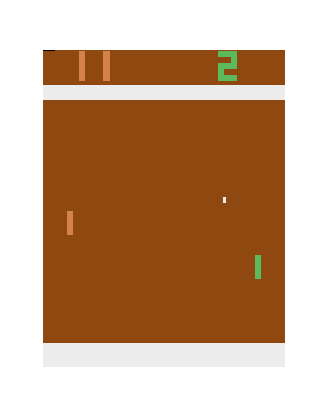
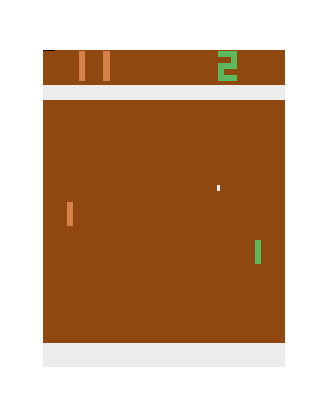
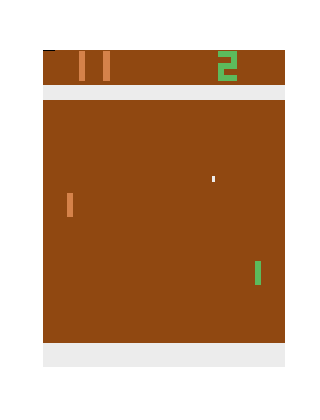
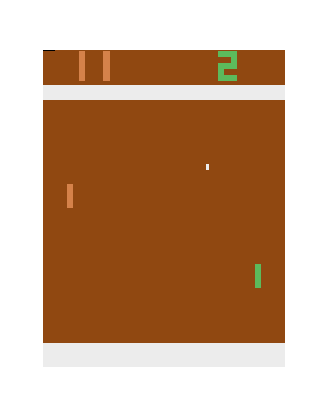
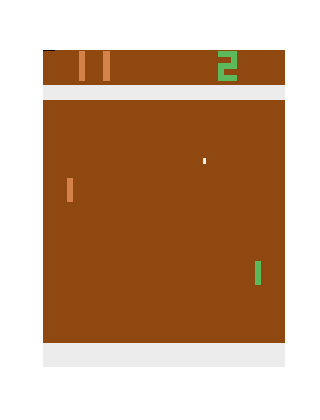
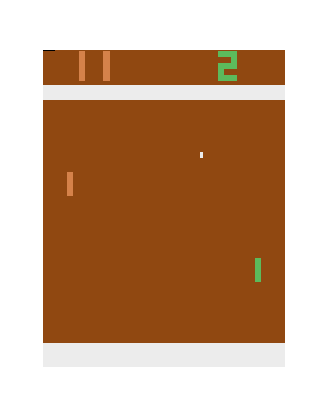
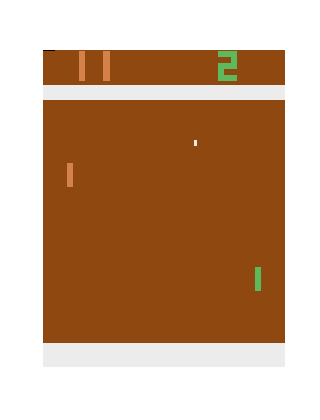
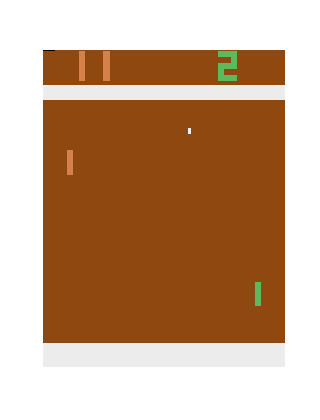
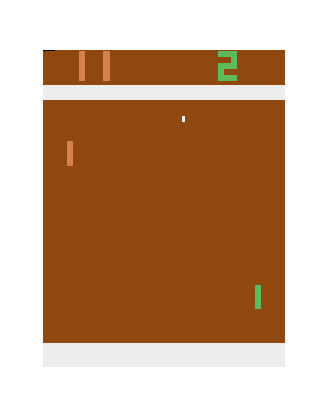
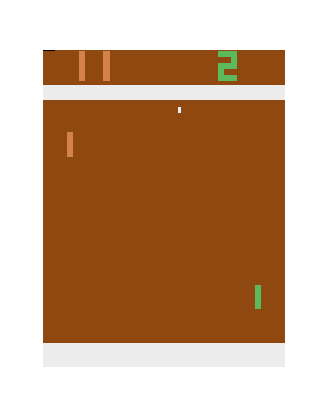
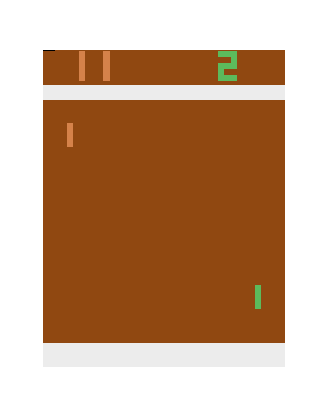
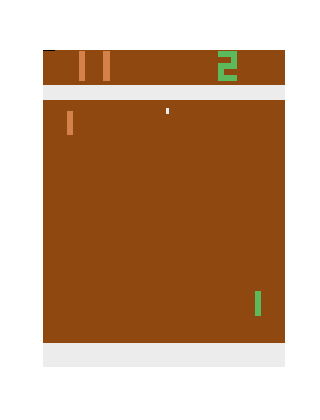
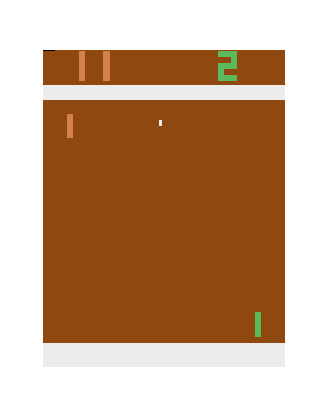
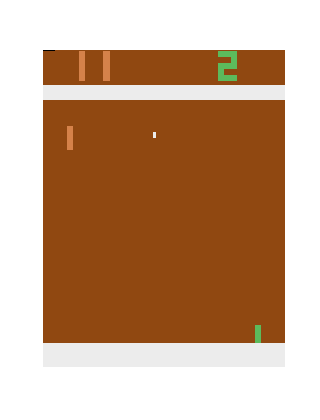
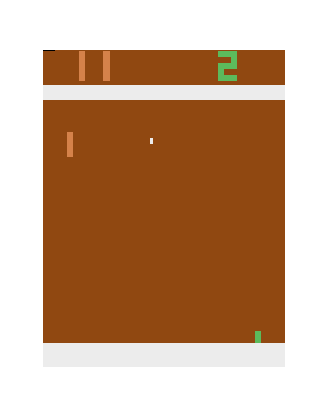
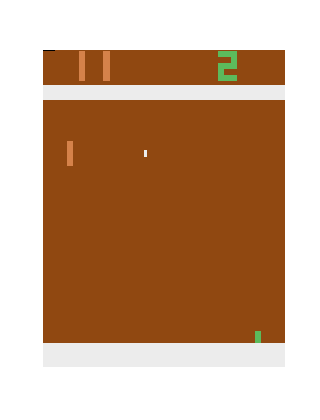
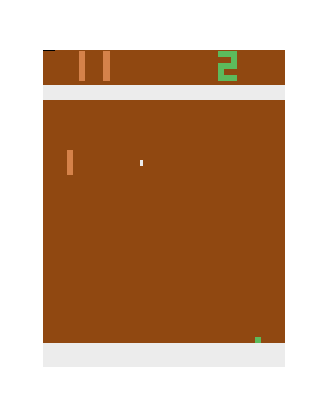
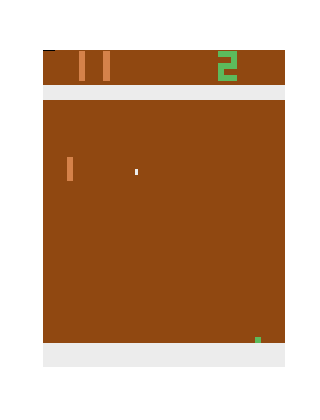
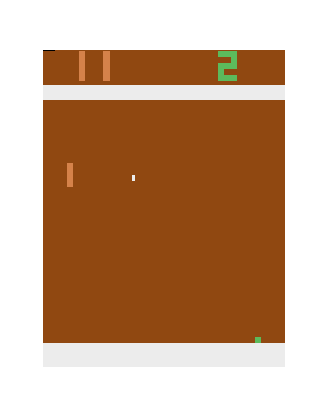
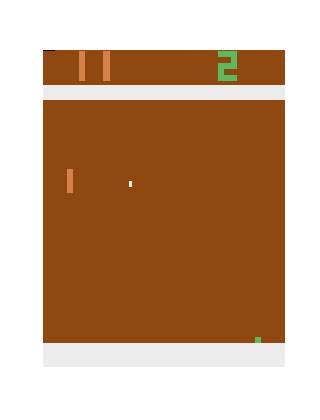
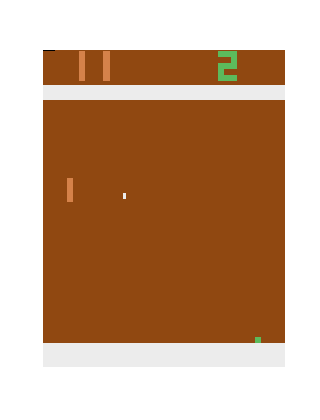
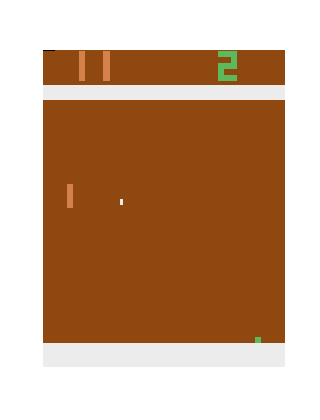
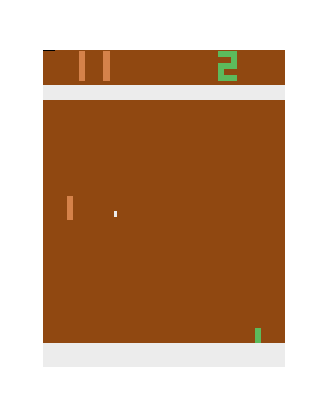
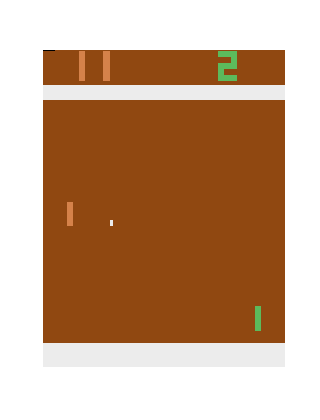
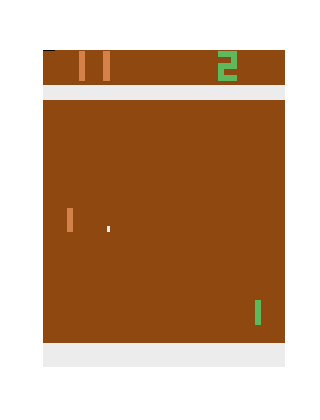
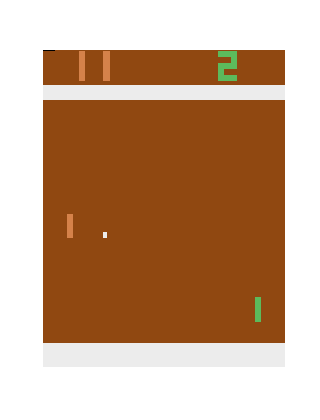
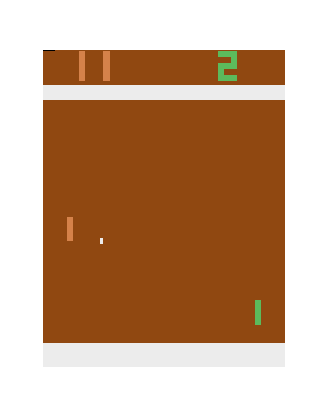
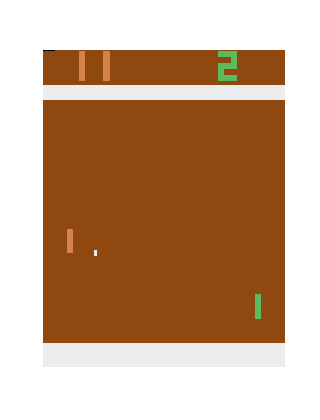
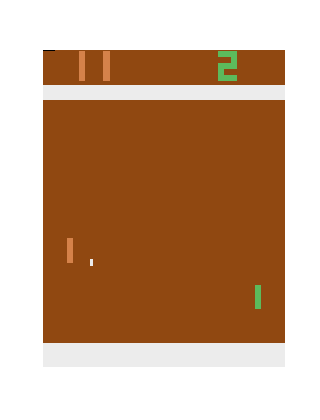
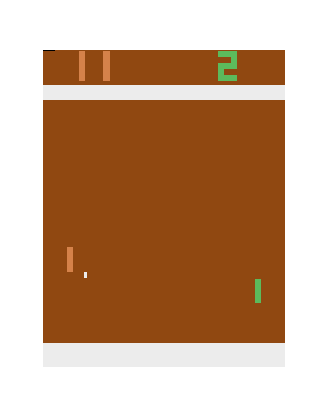
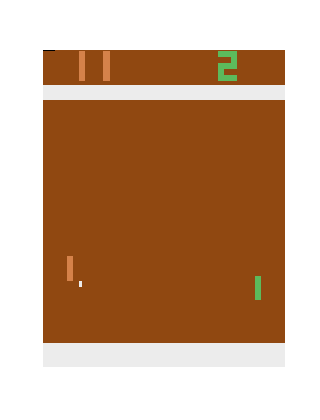
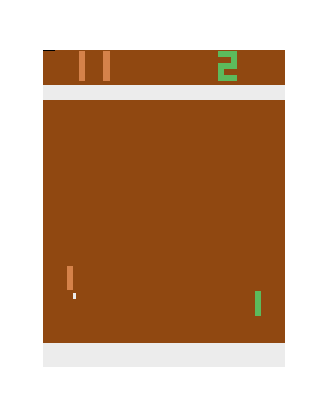
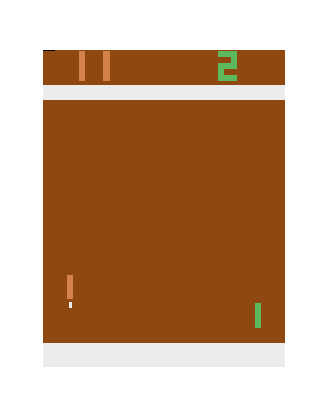
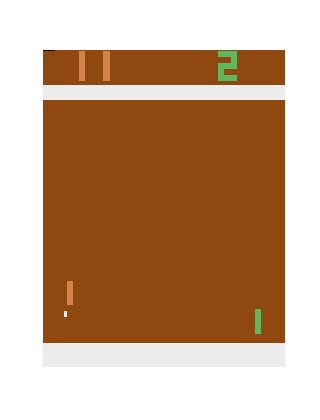
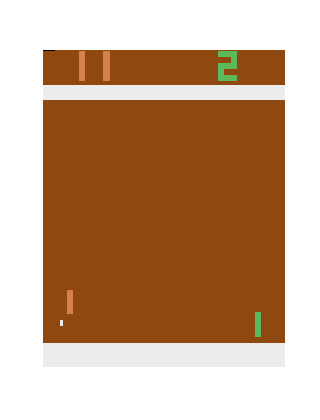
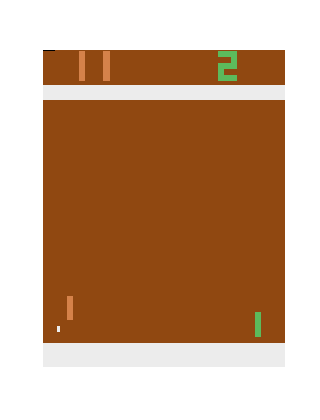
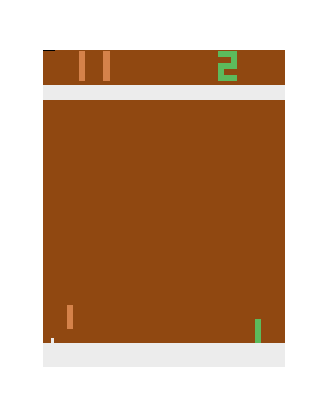
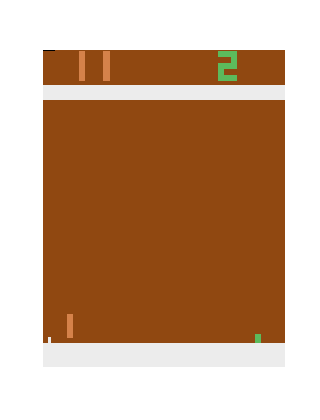
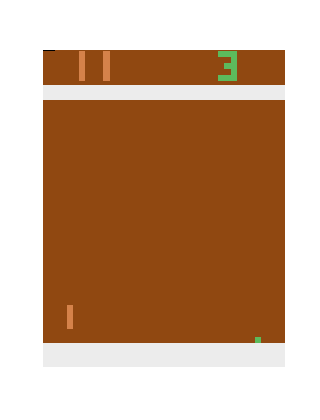
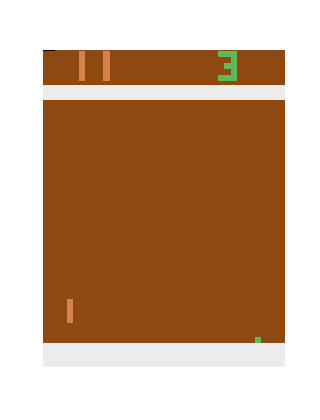
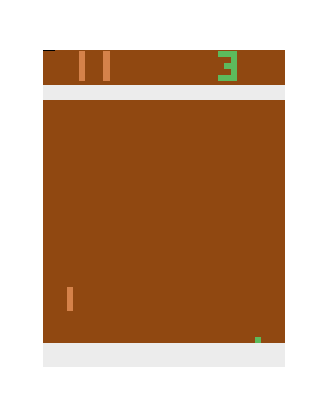
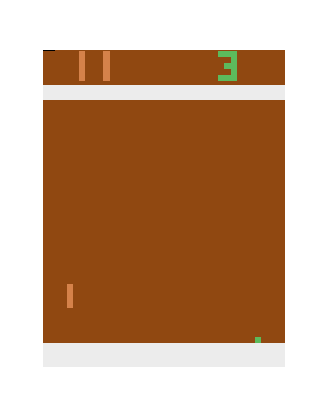
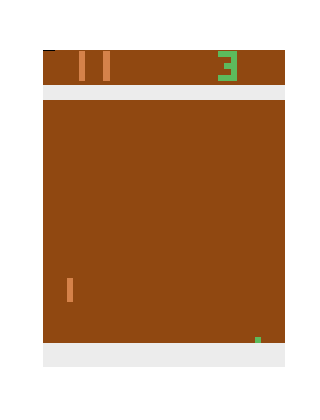
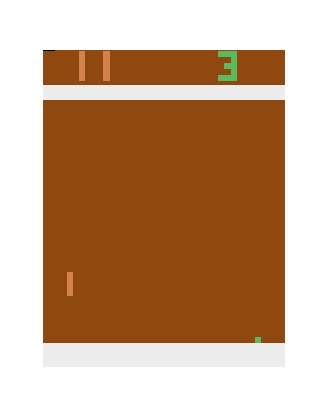
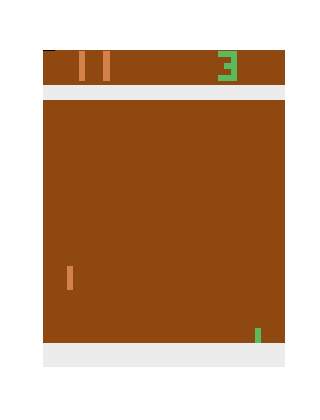
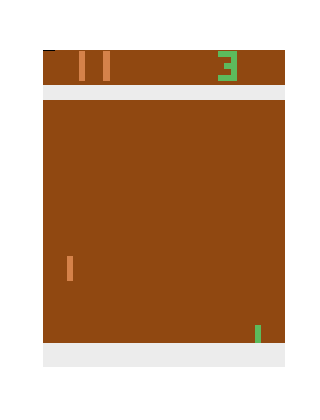
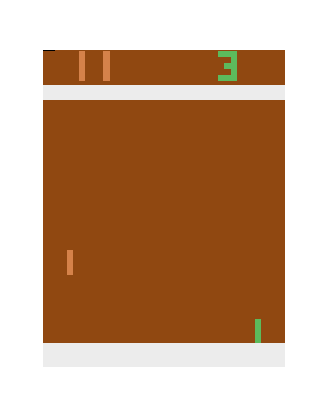
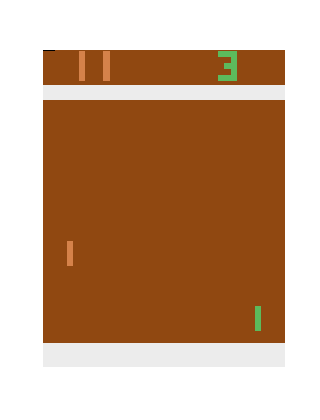
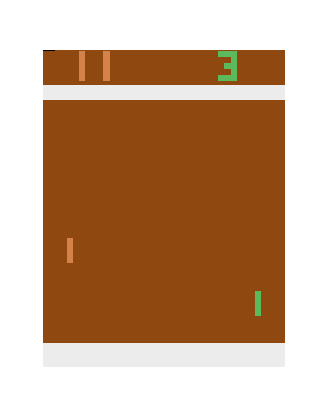
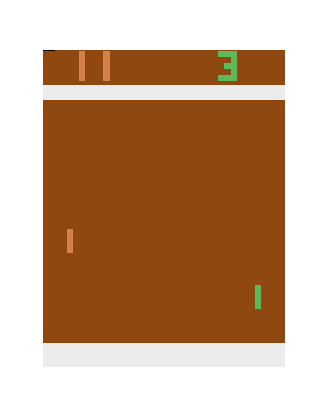
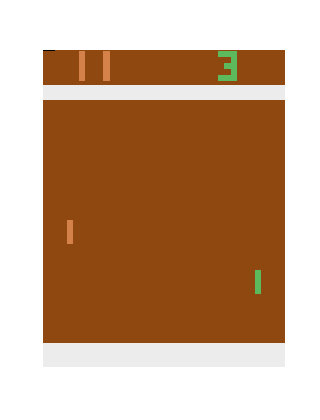
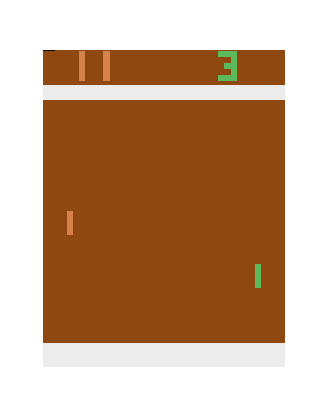
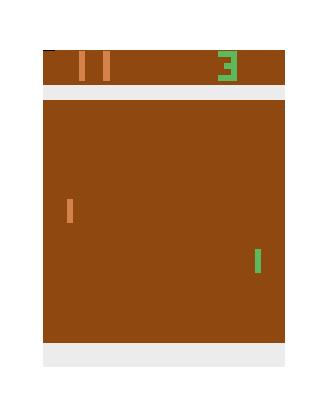
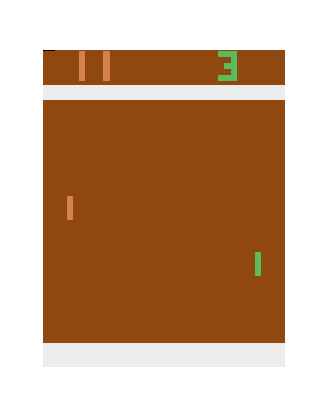
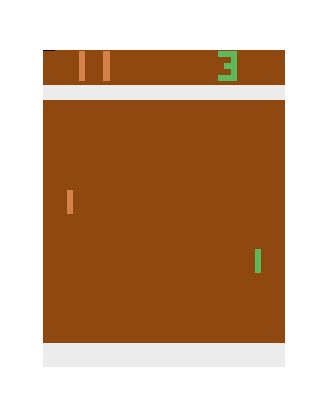
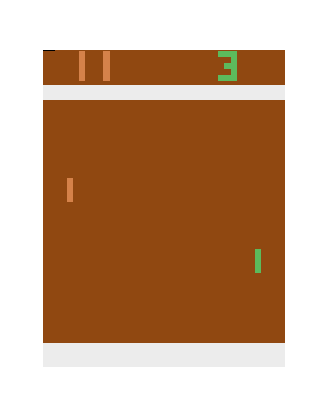
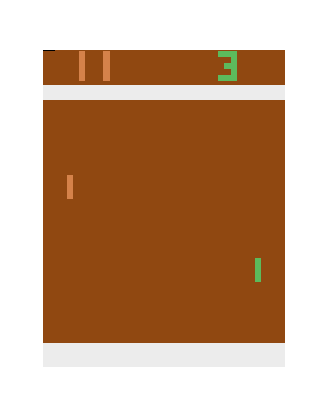
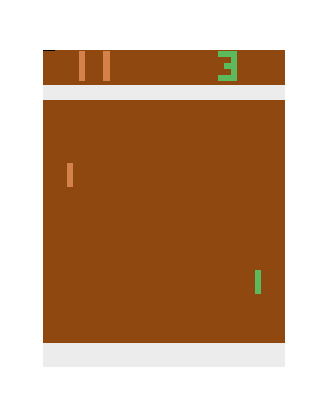
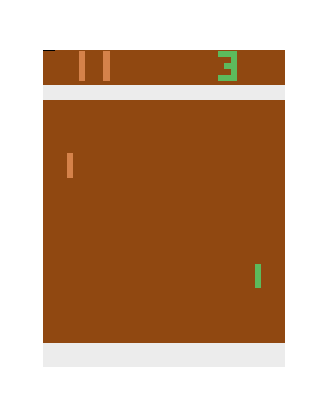
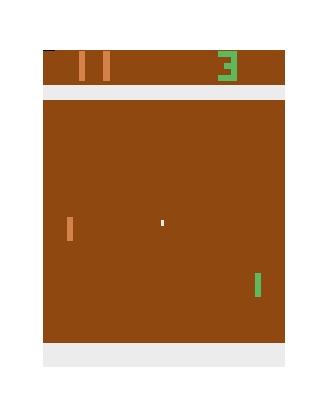
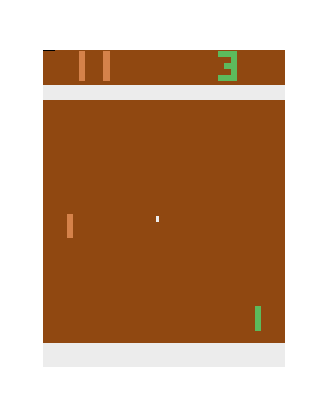

In [4]:
env = gym.make('Pong-v0')

# Run a demo of the environment
observation = env.reset()
frames = []
for _ in range(1000):
    frames.append(env.render(mode = 'rgb_array'))
    action = env.action_space.sample() # take a random action
    observation, reward, done, info = env.step(action)
    if done:
        break
env.close()

display_frames_as_gif(frames)

### Explore spaces

In [5]:
print(env.observation_space)
print(env.observation_space.high)
print(env.observation_space.low)

Box(210, 160, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 

In [6]:
print(env.action_space)
print([env.action_space.sample() for _ in range(20)])

Discrete(6)
[1, 4, 2, 1, 4, 1, 0, 2, 3, 3, 5, 3, 5, 4, 1, 2, 2, 5, 4, 2]


A bit of exploration reveals:  
- 0,1 - don't move
- 2,4 - move up
- 3,5 - move down

In [7]:
# Actually...
env.unwrapped.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

### Example - move up


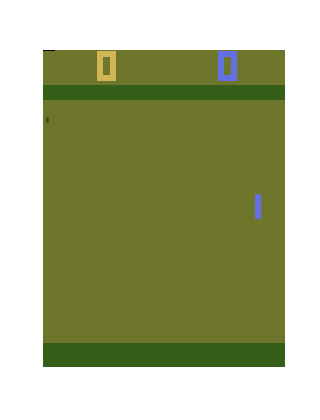
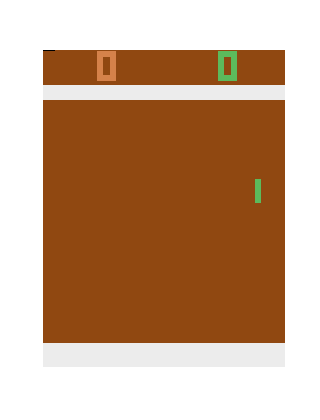
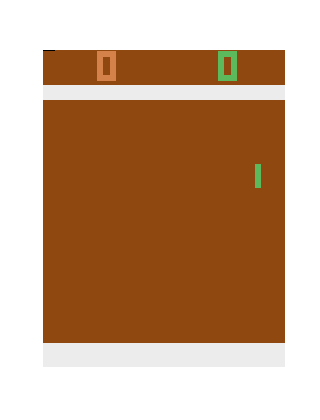
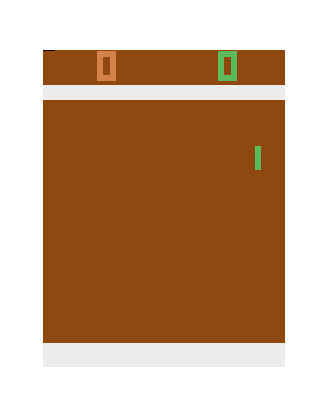
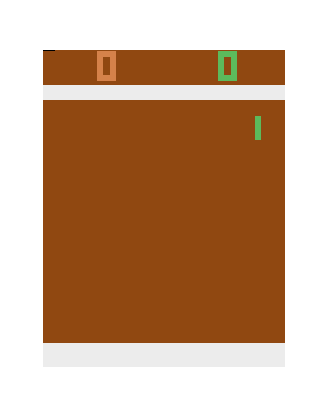
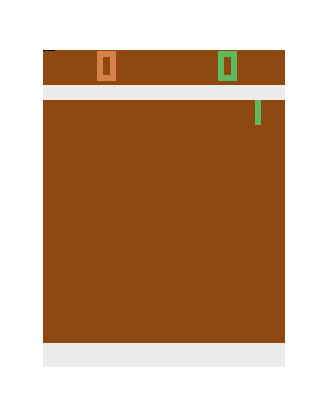
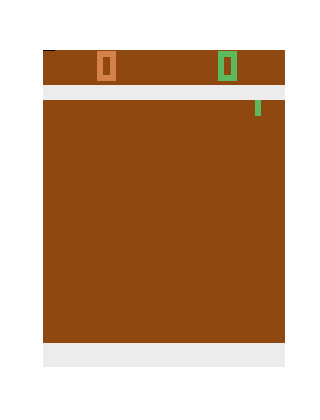
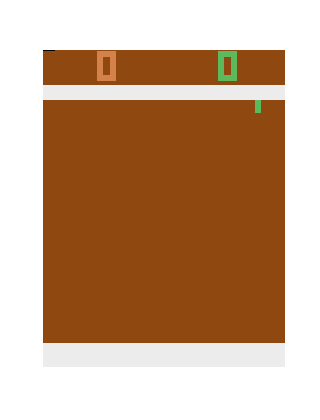
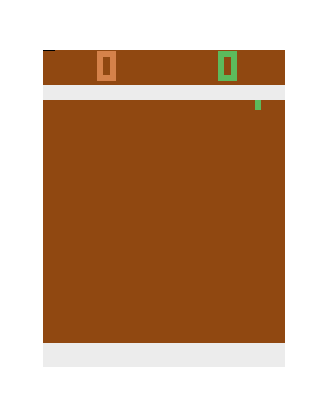
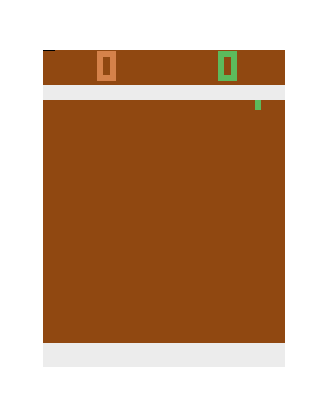
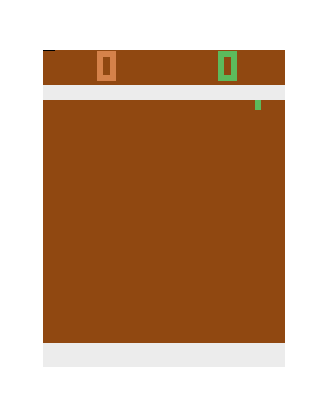
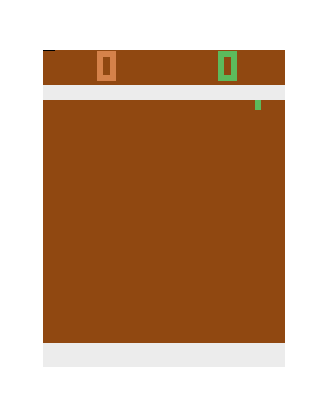
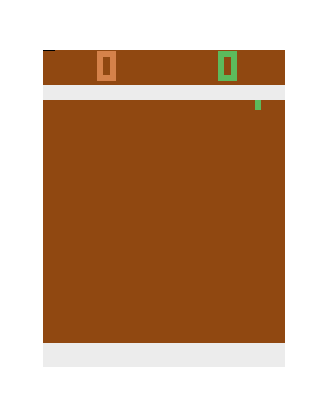
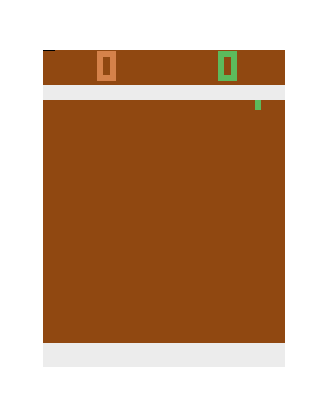
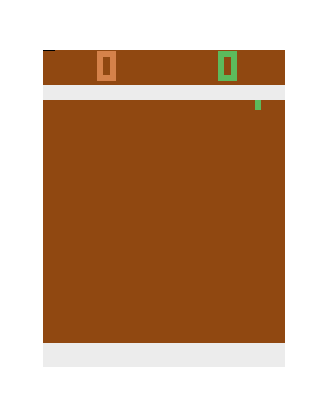
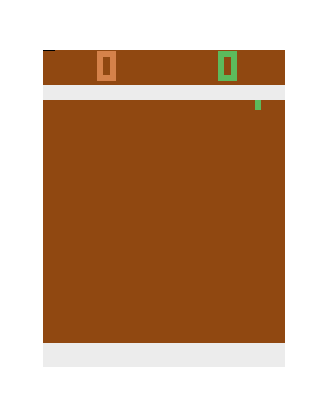
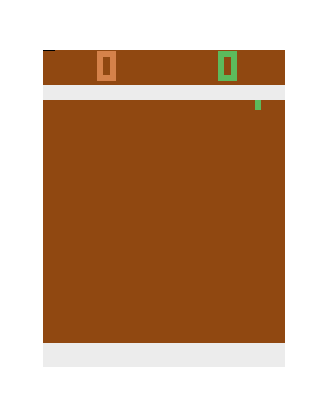
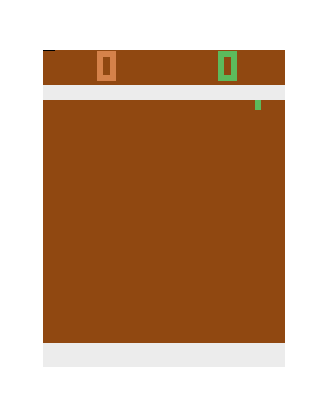
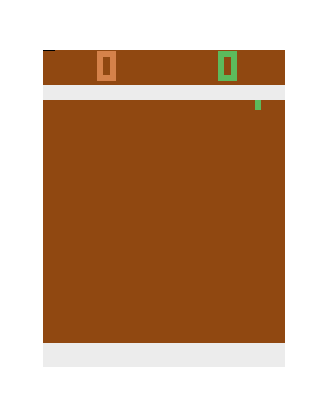
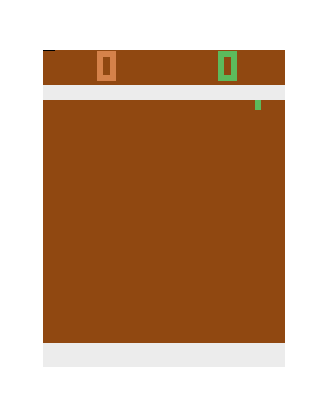
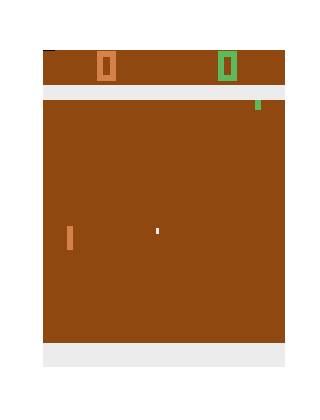
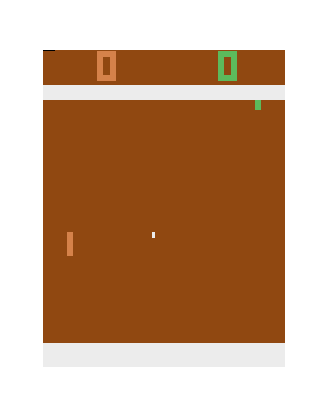
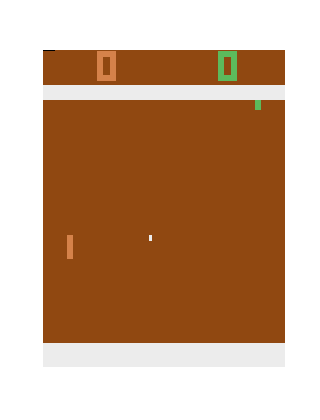
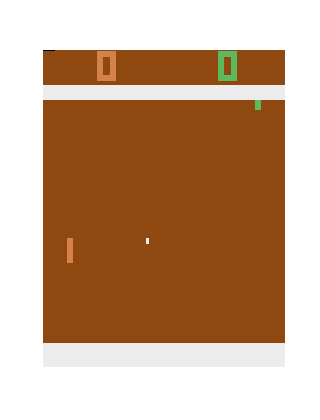
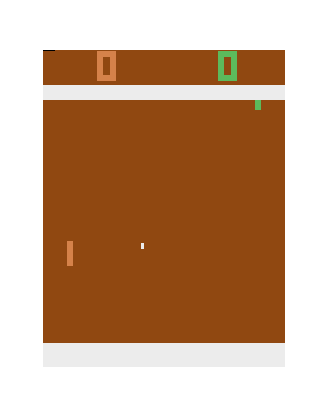
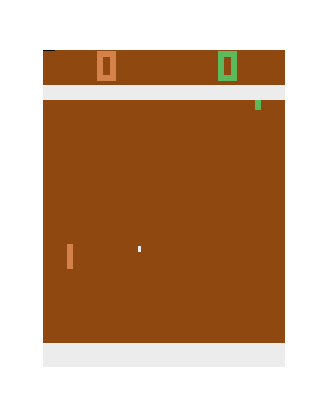
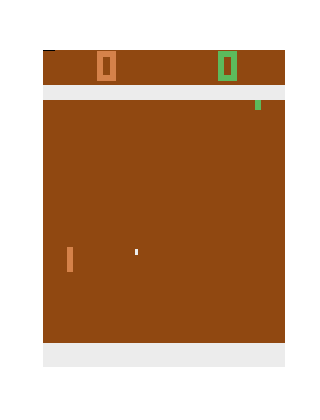
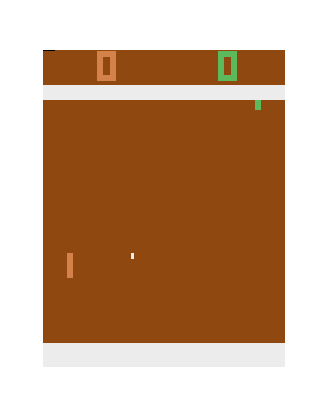
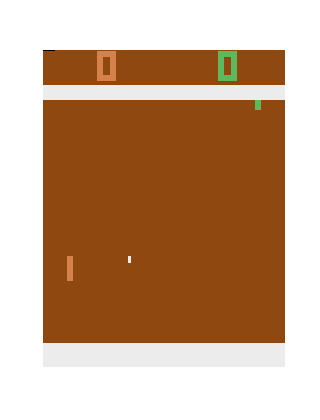
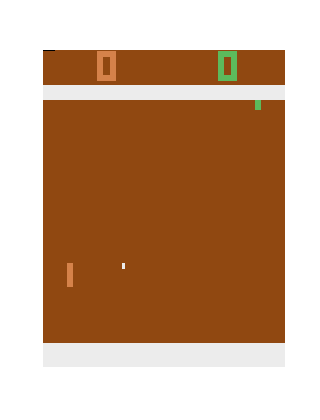
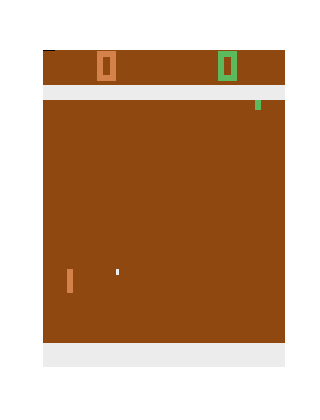
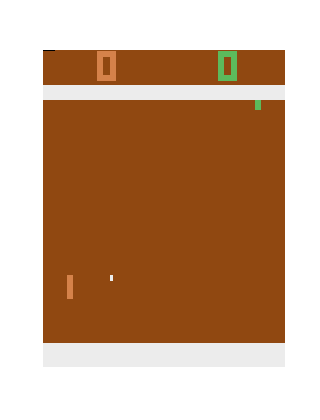
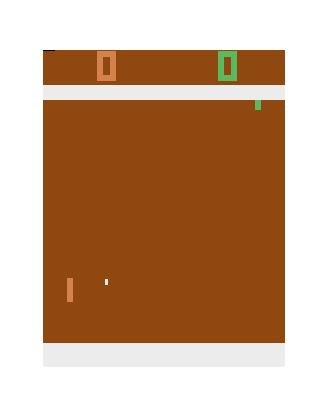
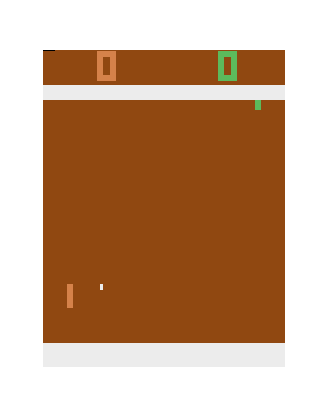
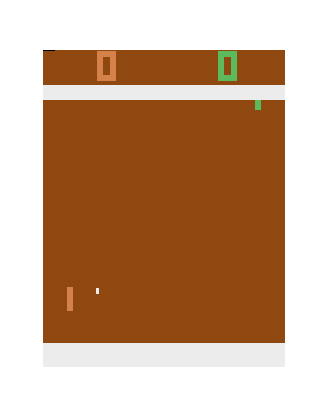
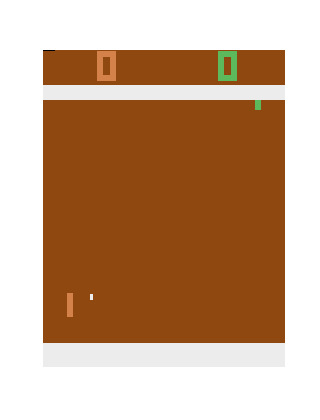
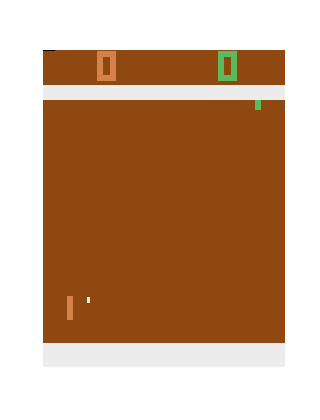
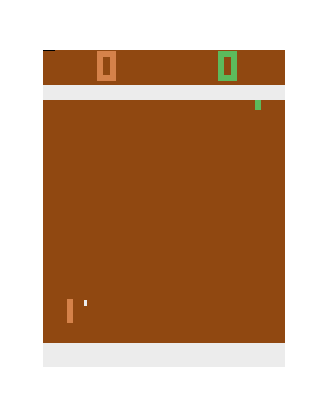
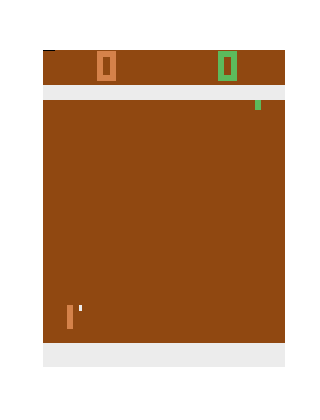
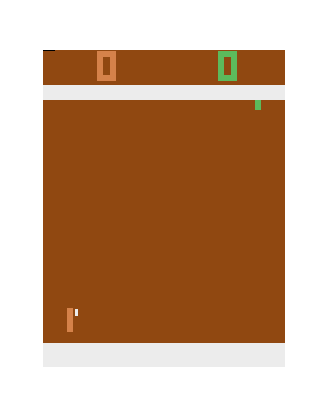
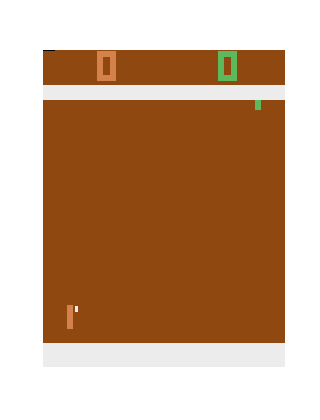
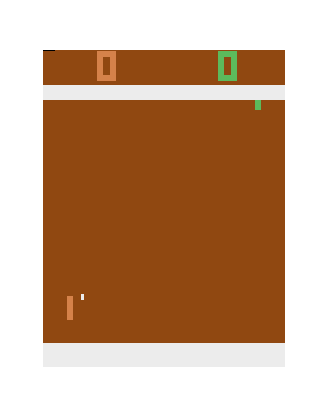
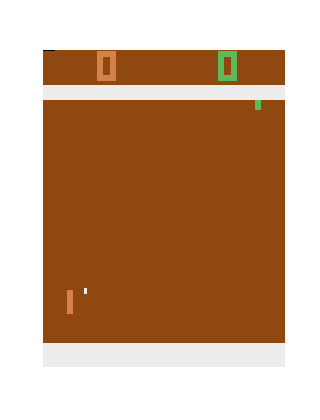
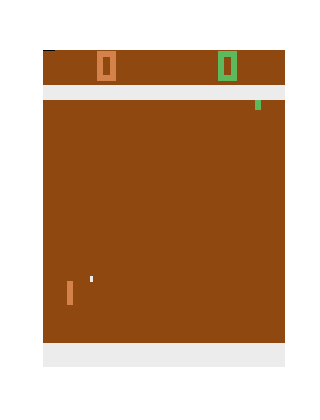
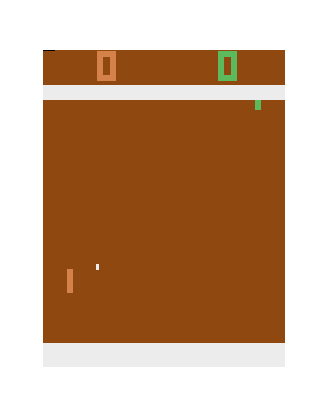
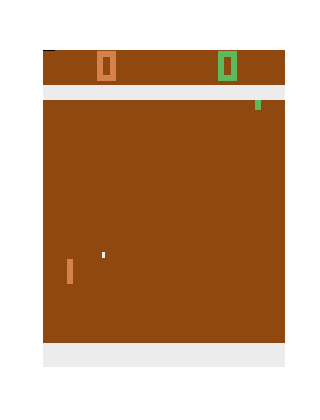
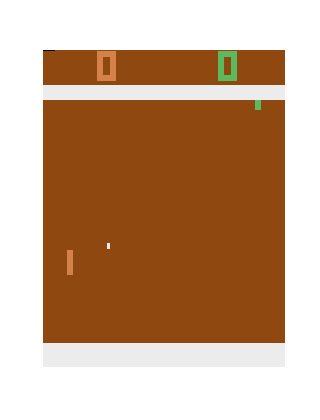
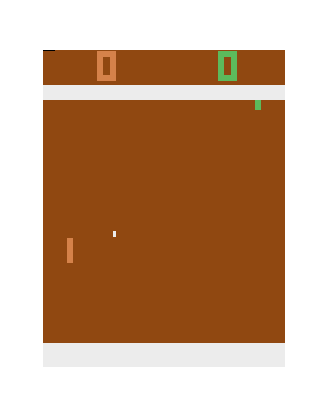
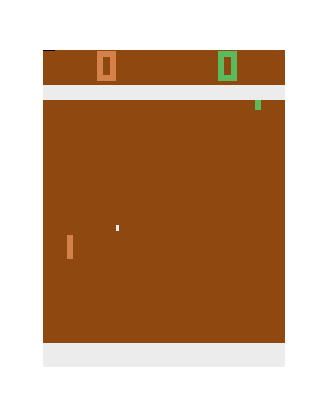
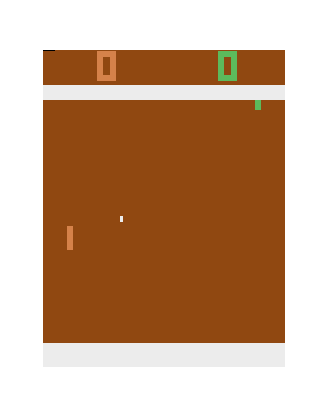
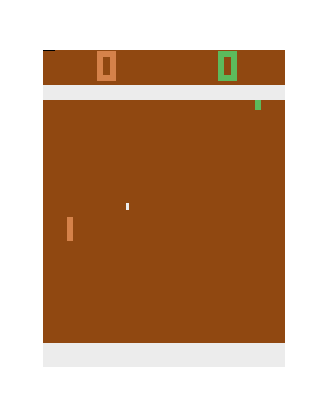
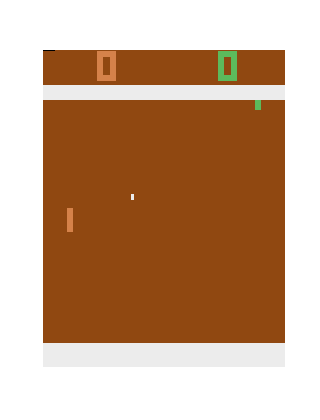
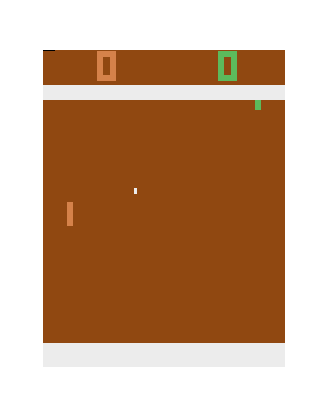
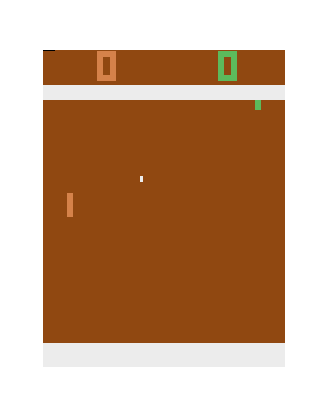
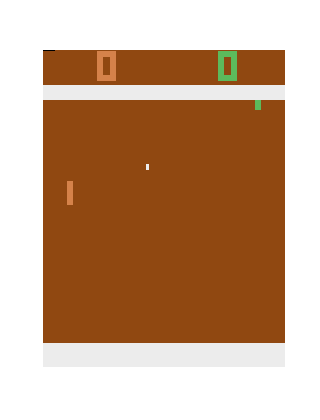
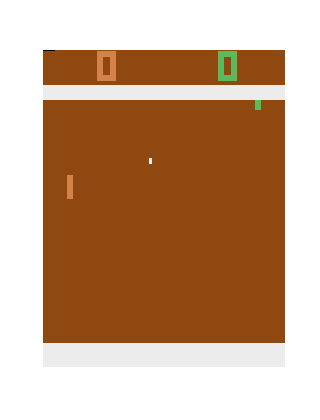
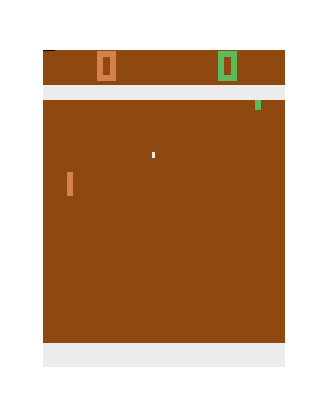
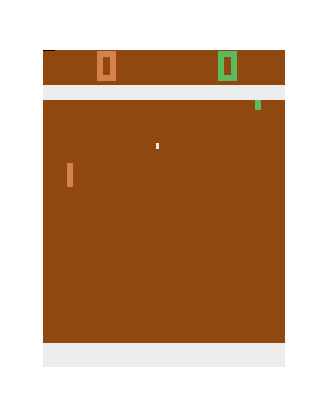
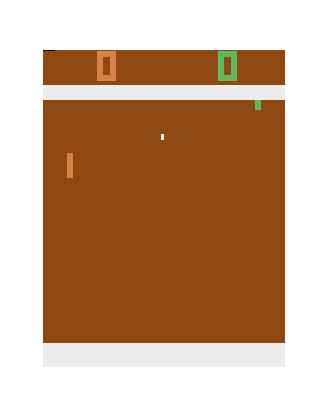
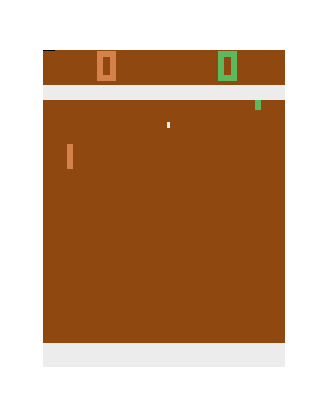
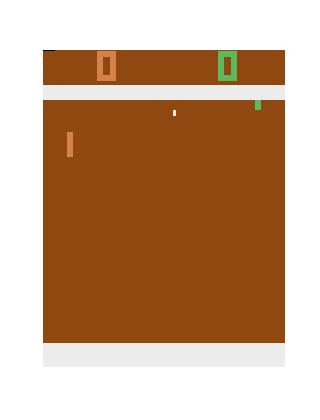
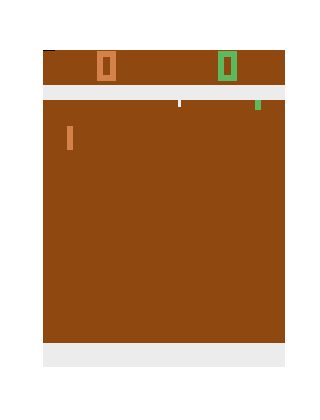
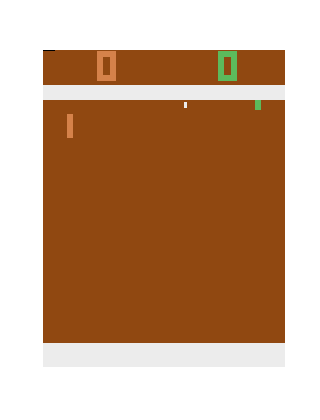
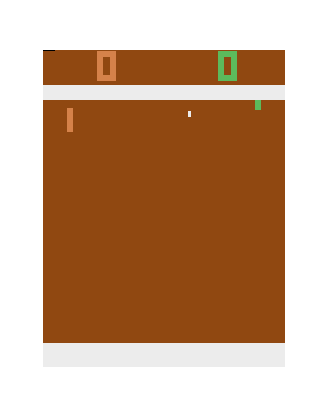
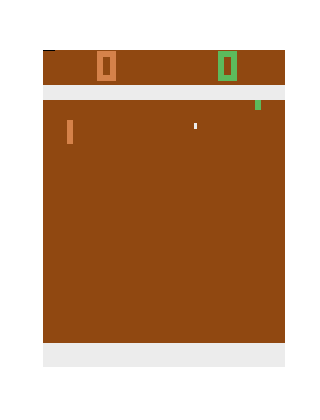
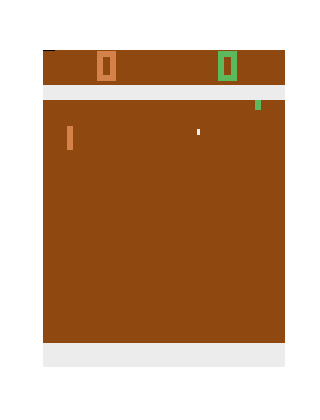
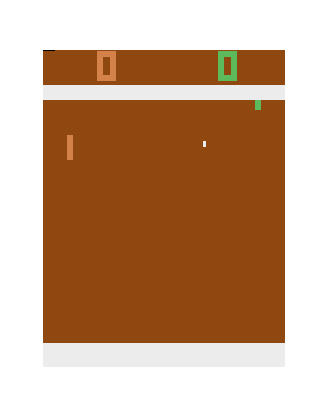
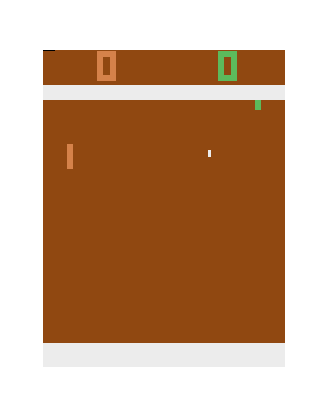
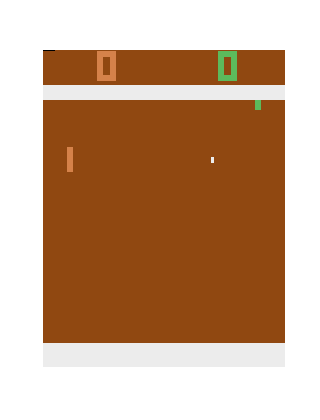
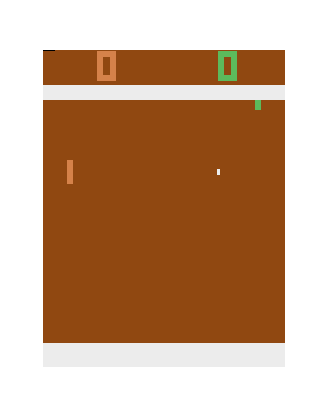
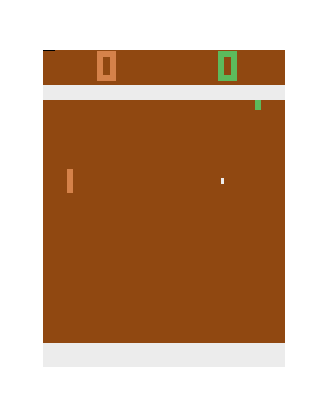
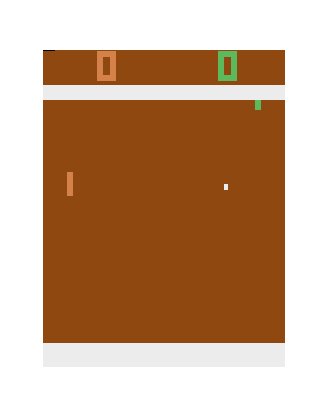
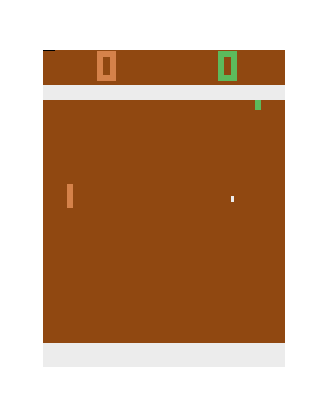
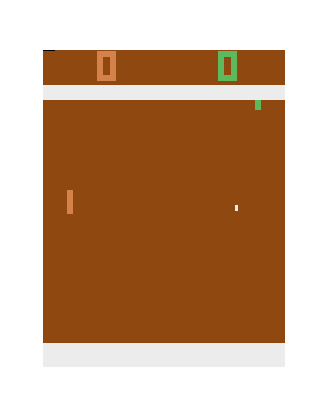
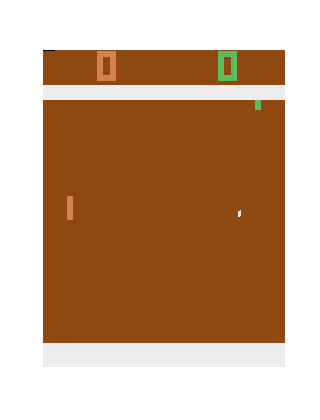
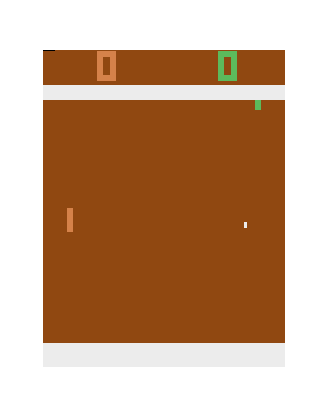
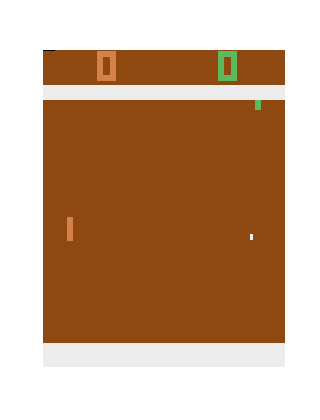
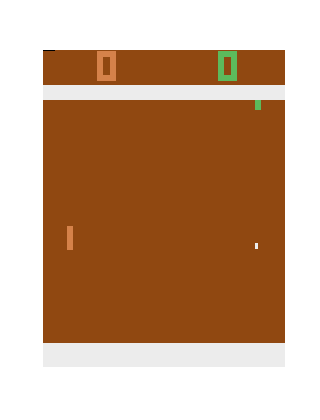
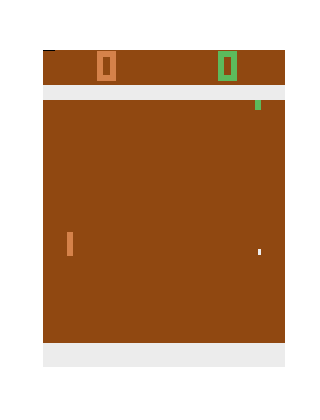
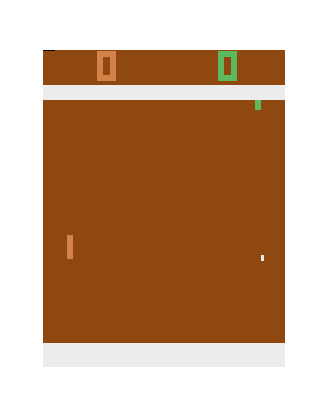
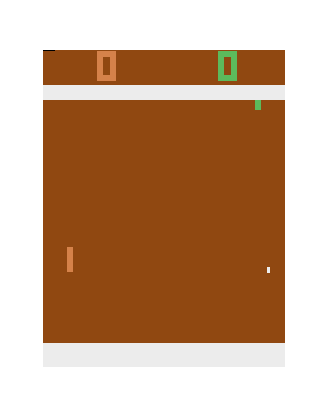
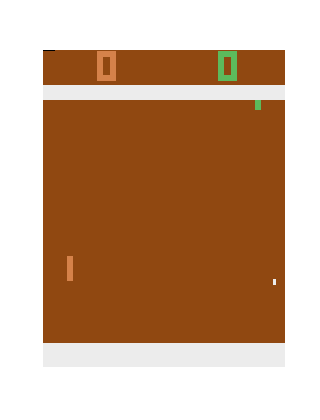
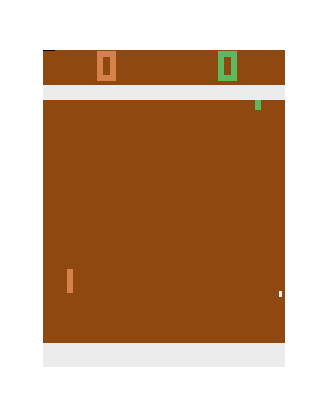
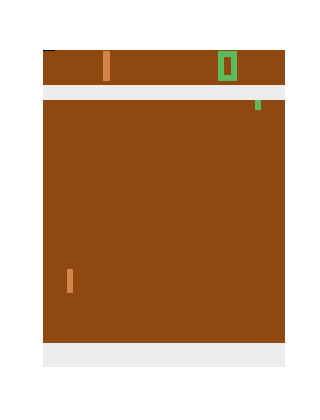
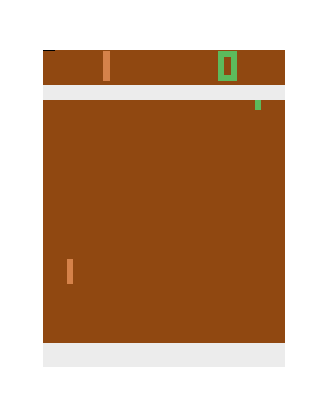
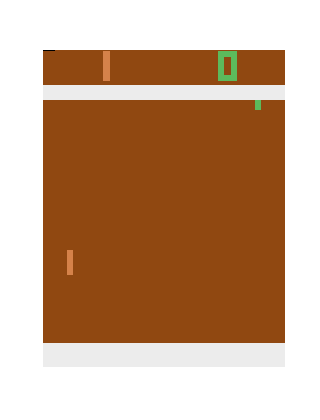
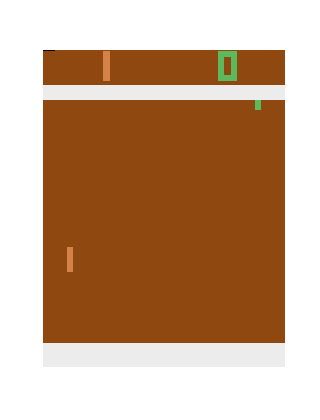
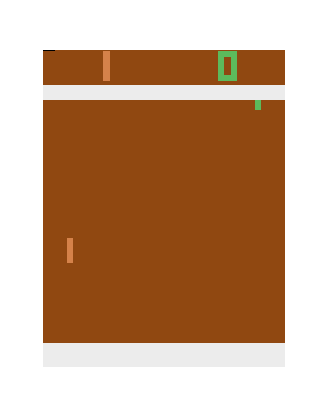
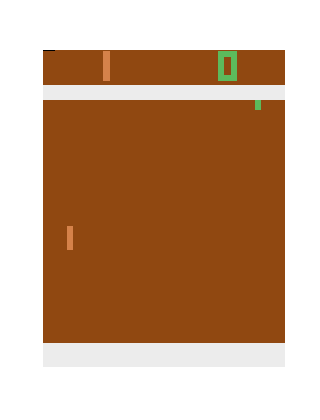
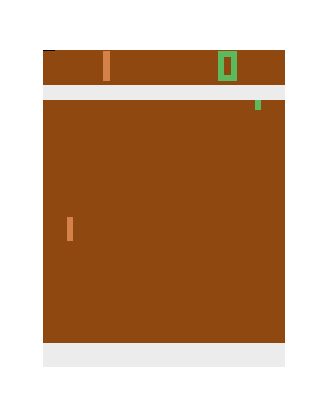
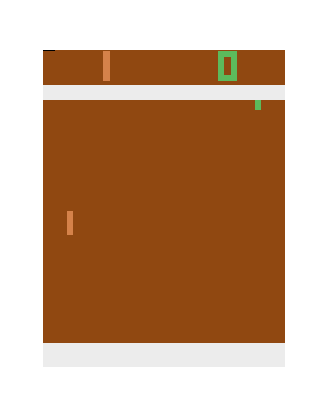
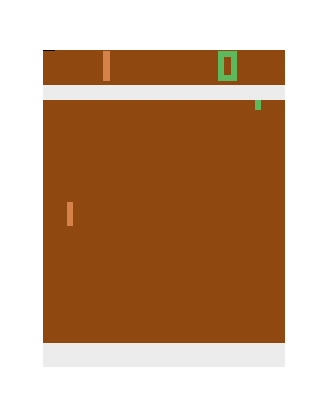
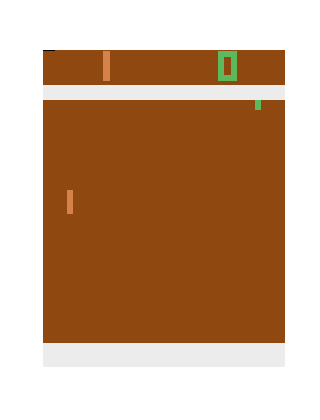
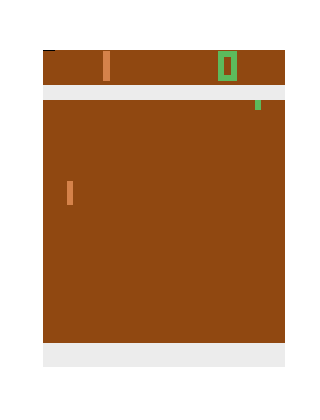
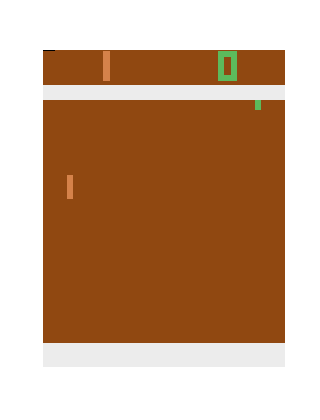
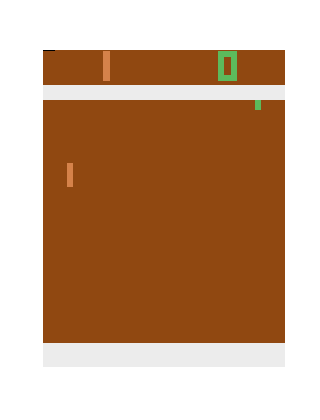
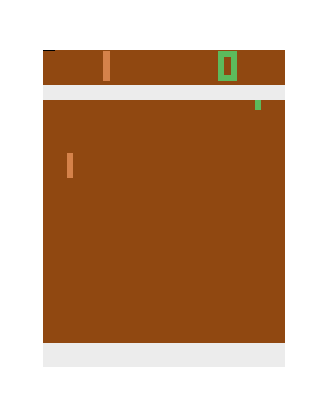
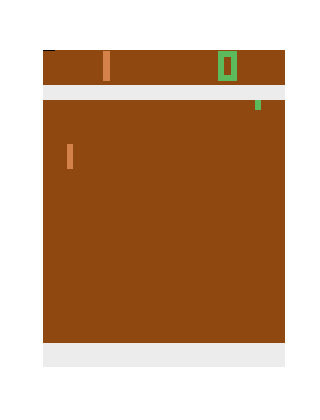
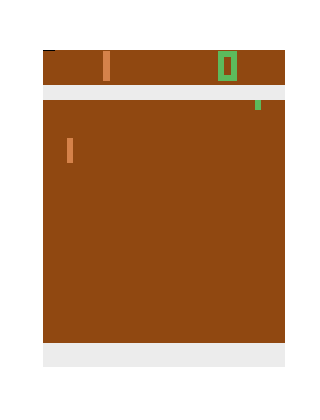
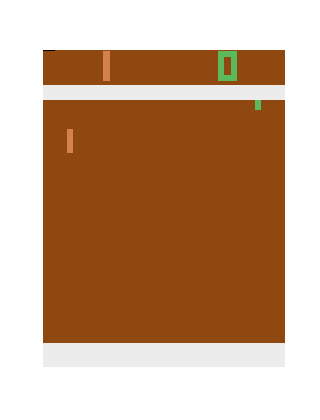
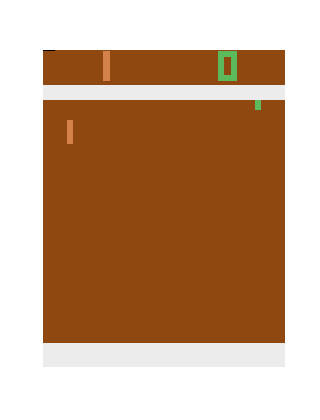
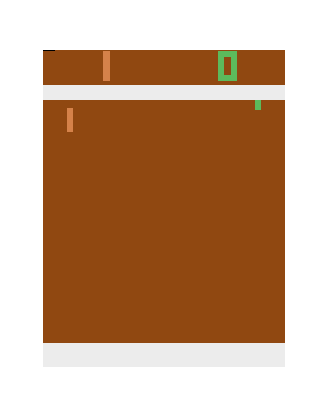
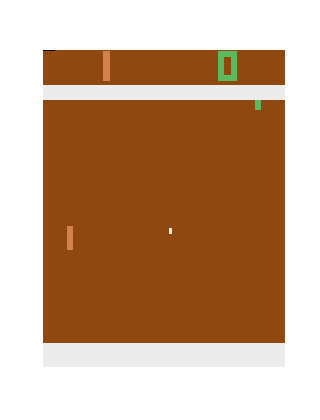
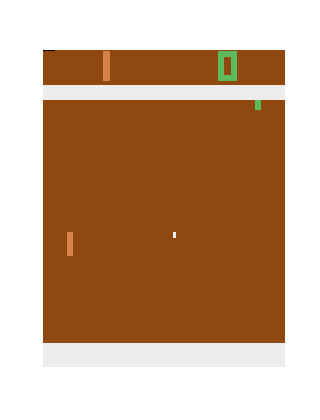
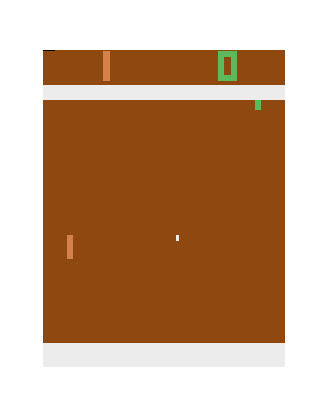
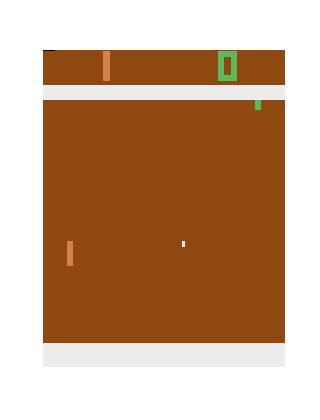
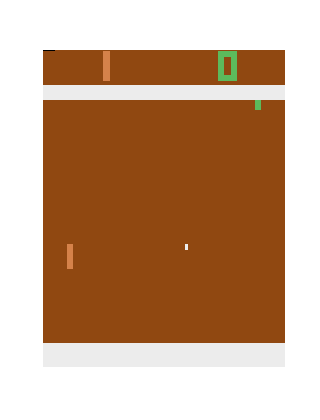
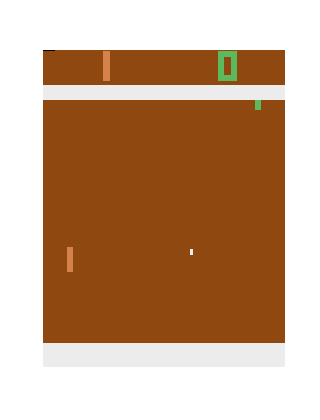
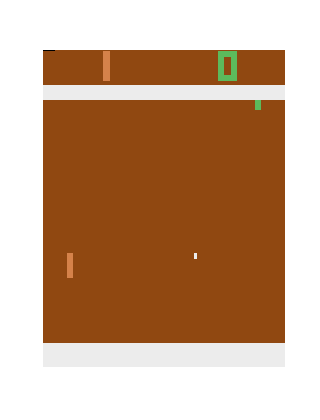
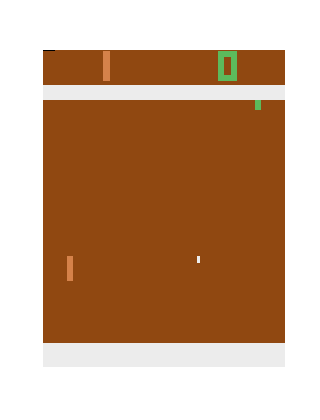
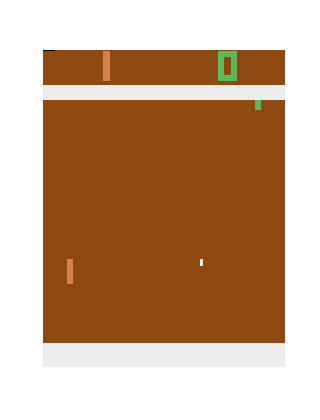
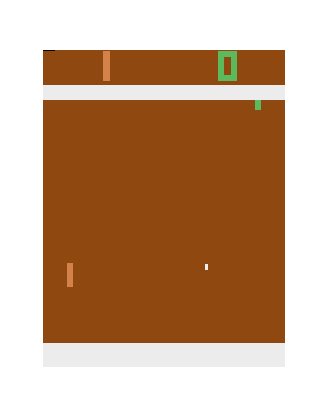
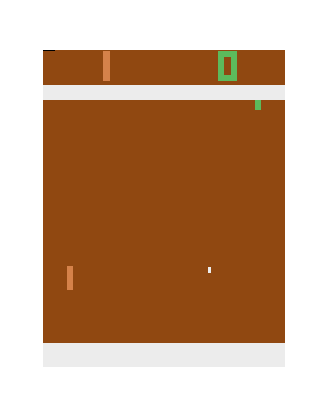
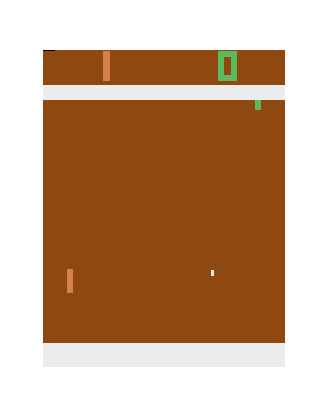
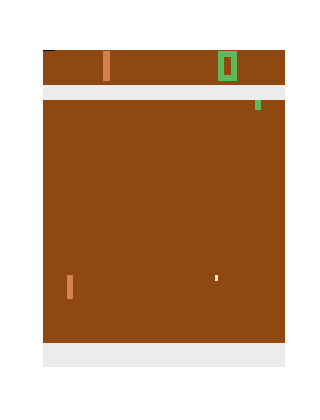
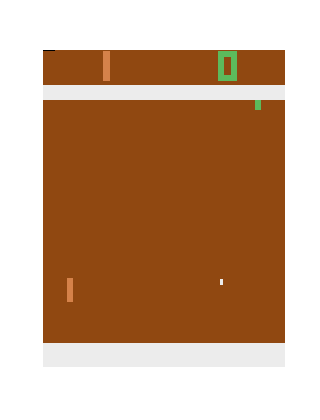
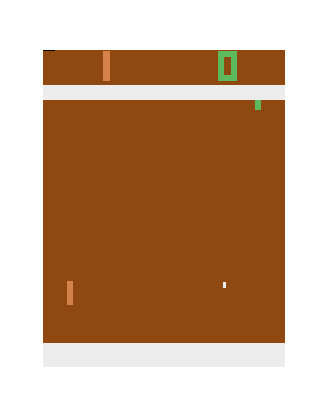
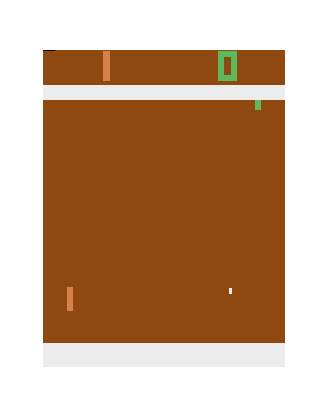
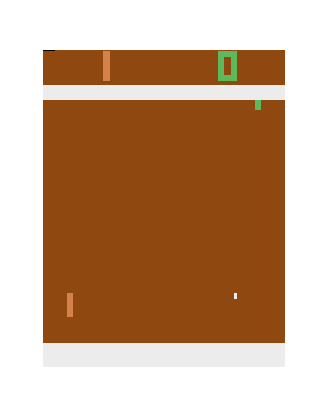
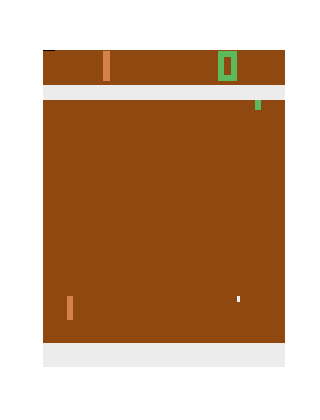
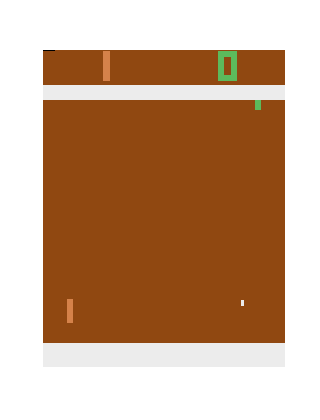
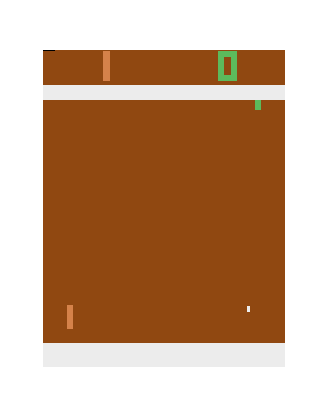
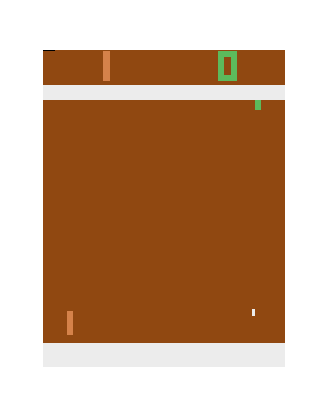
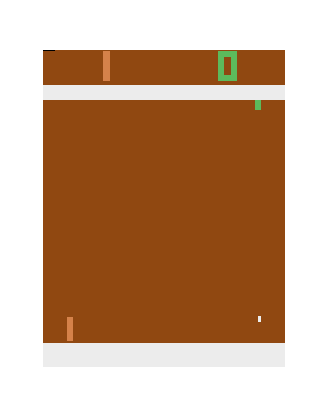
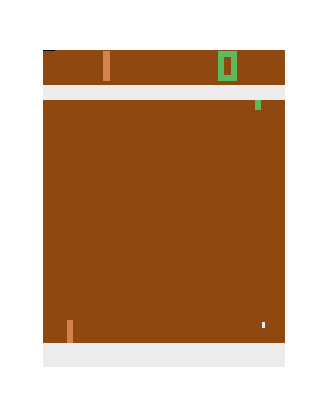
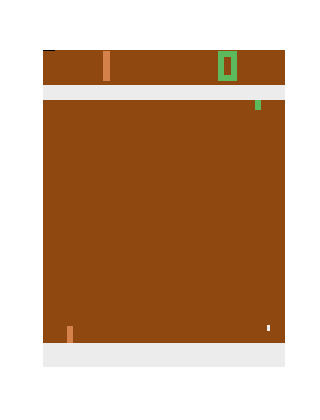
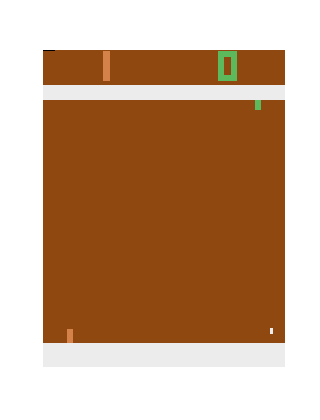
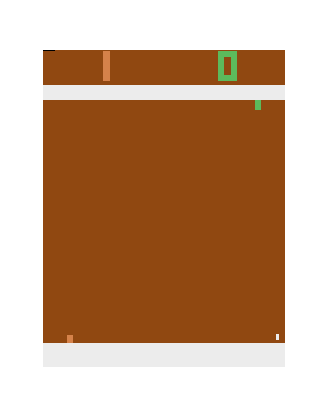
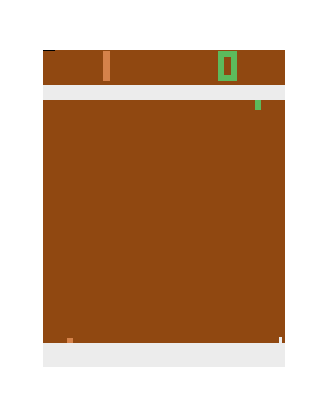
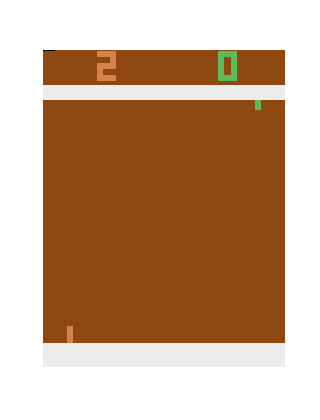
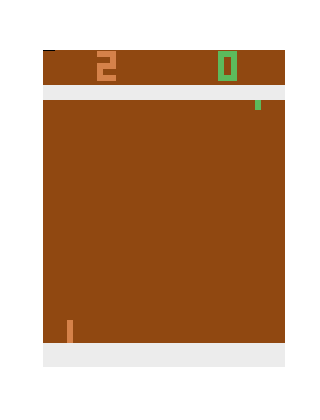
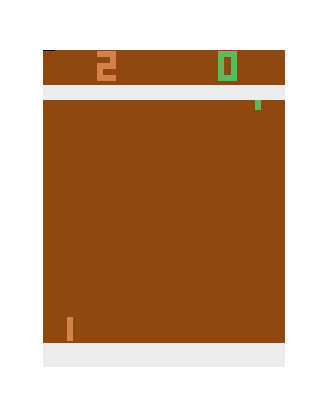
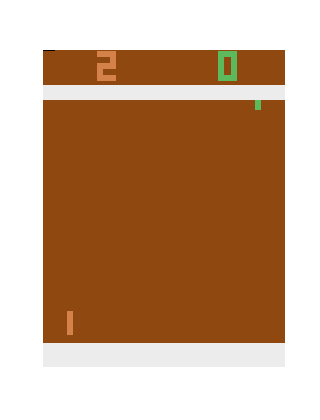
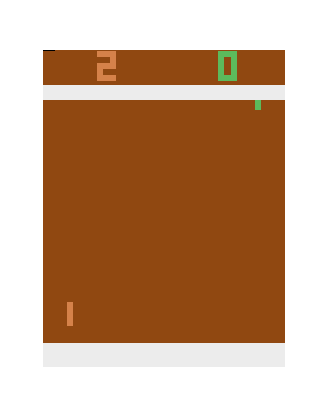
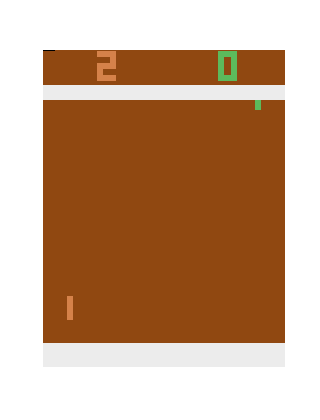
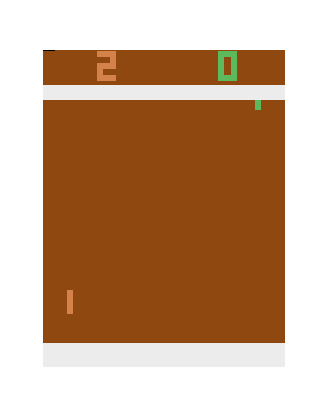
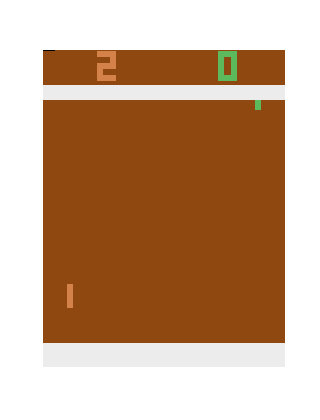
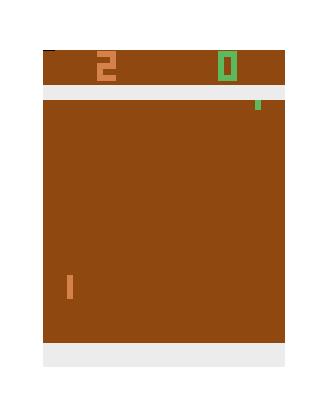
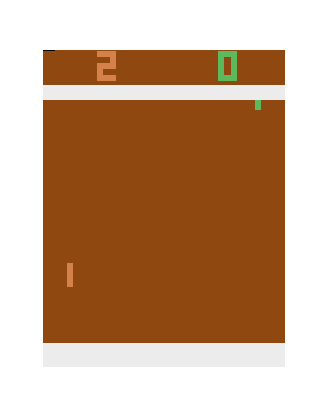
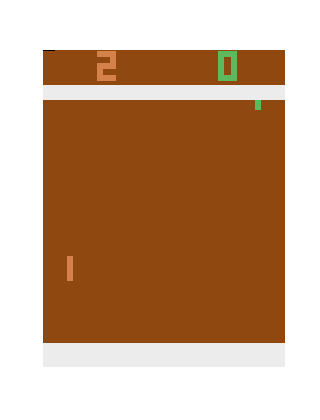
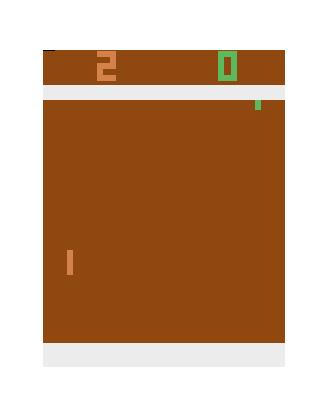
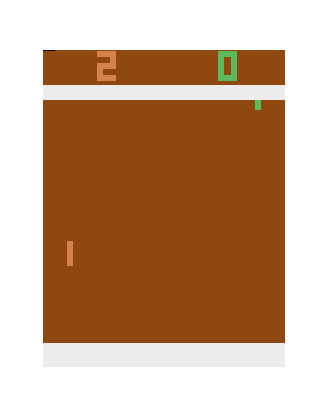
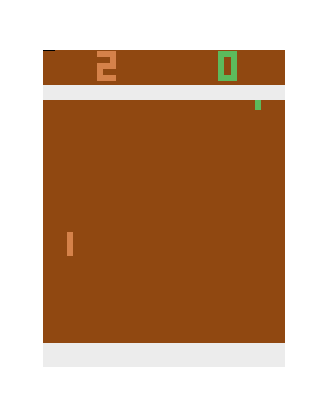
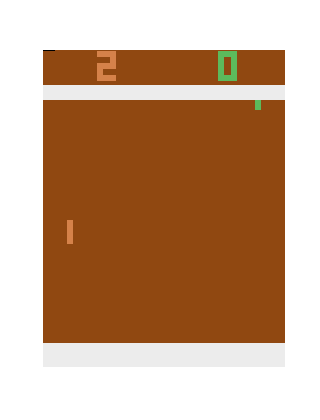
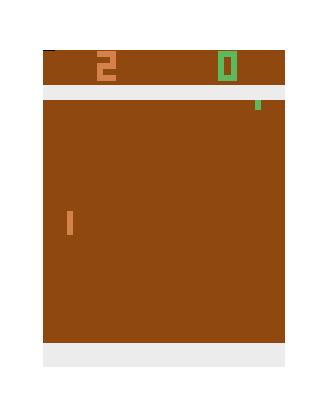
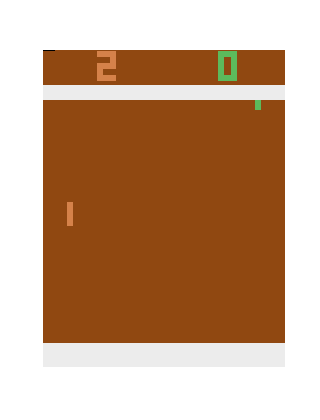
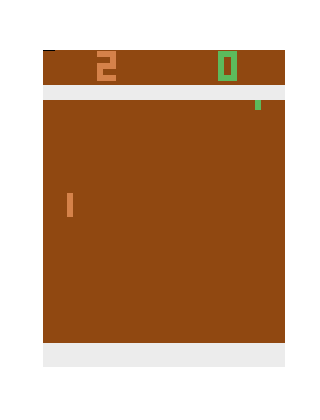
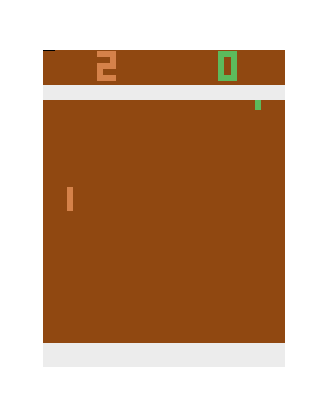
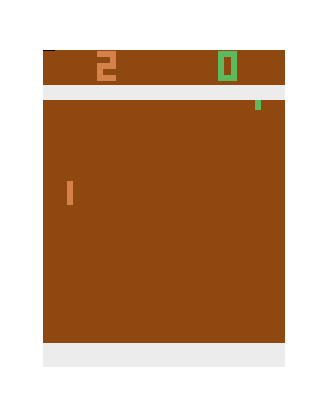
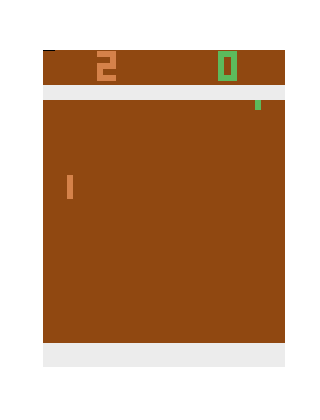
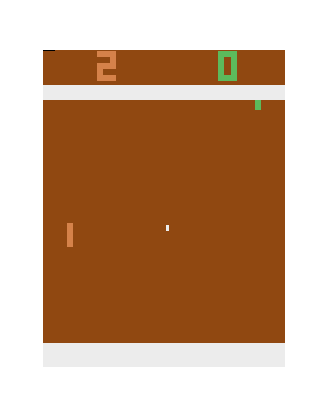
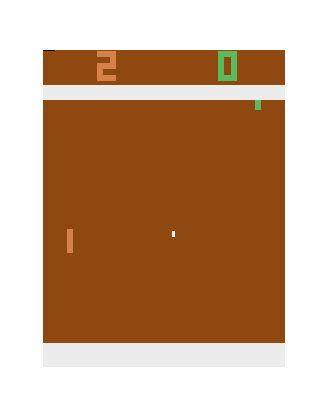
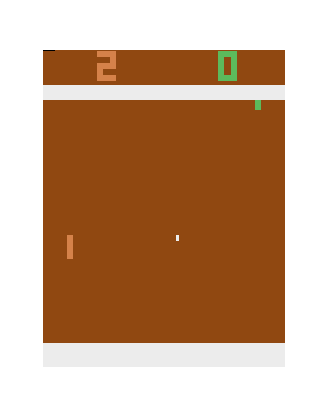
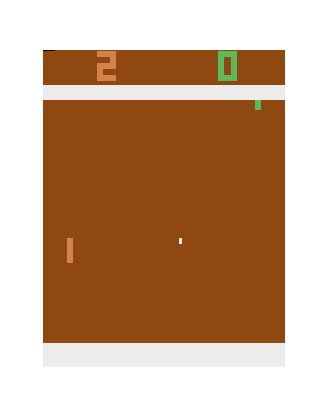
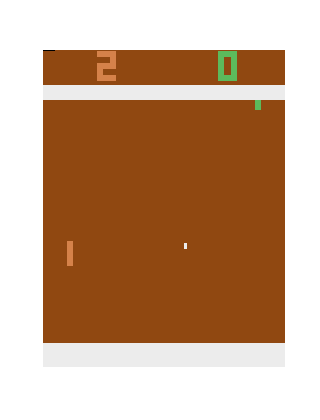
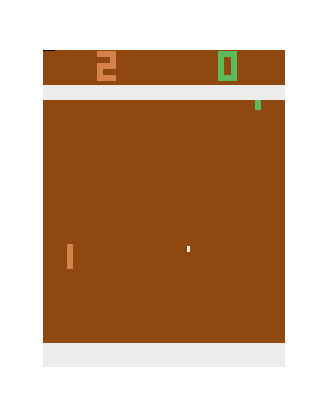
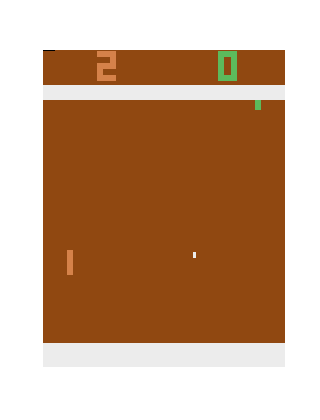
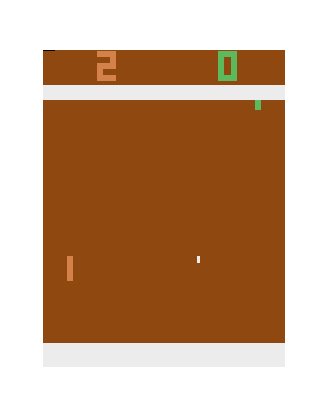
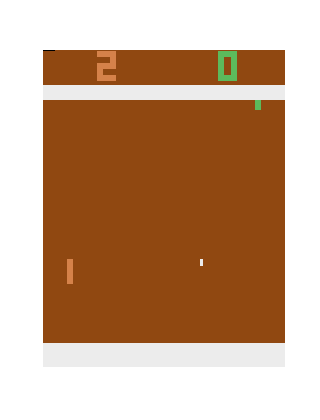
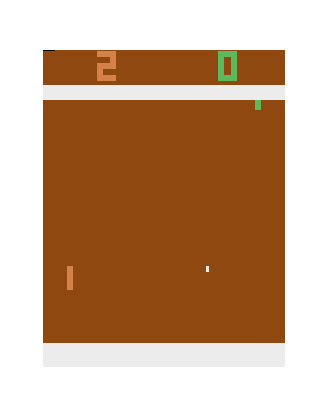
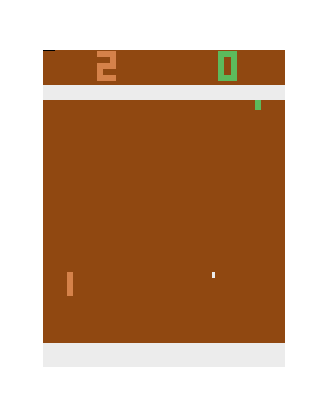
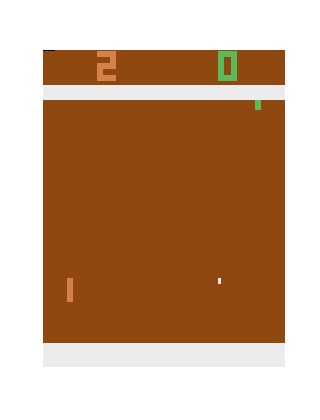
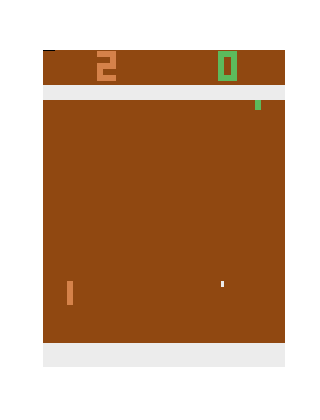
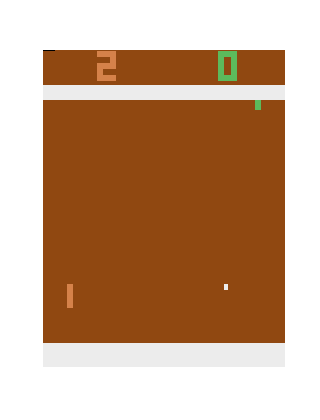
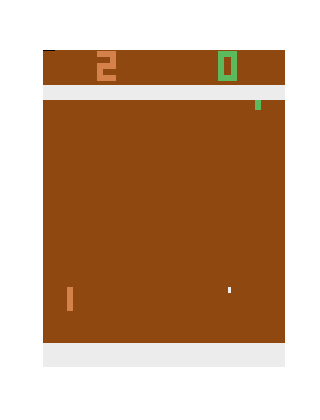
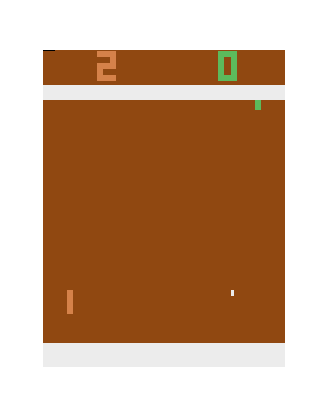
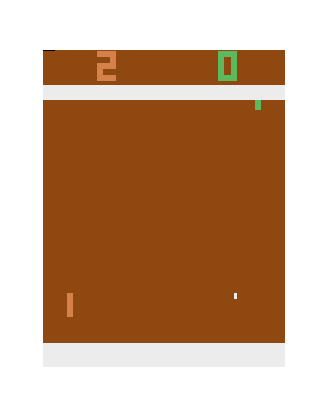
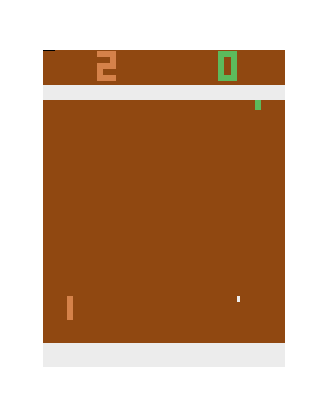
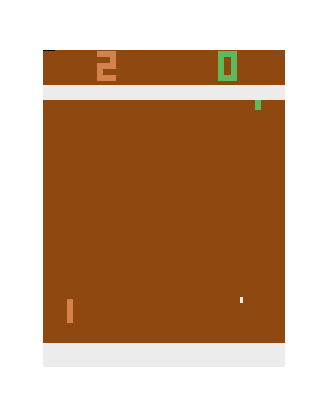
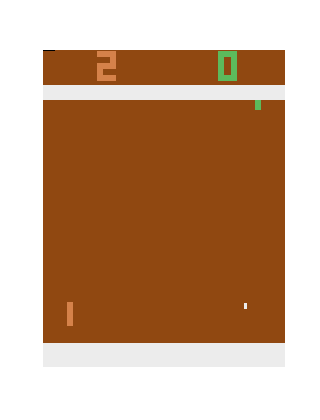
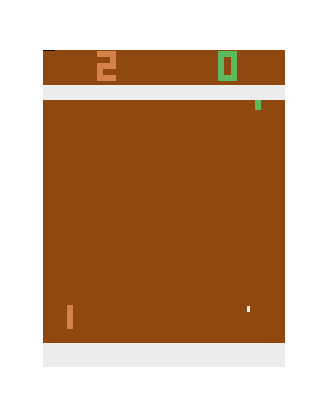
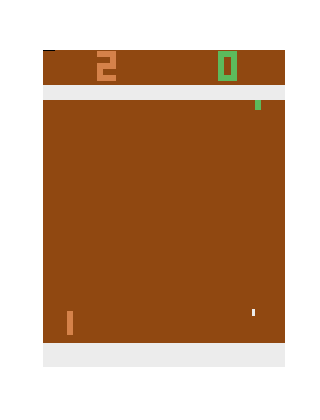
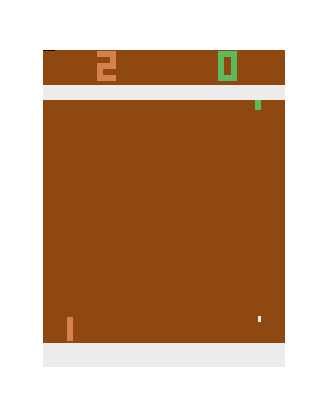
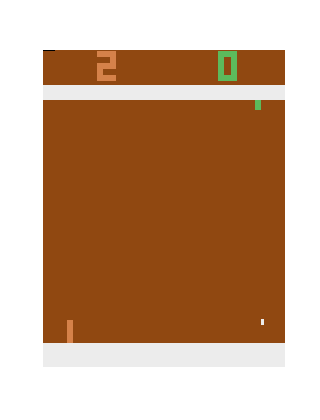
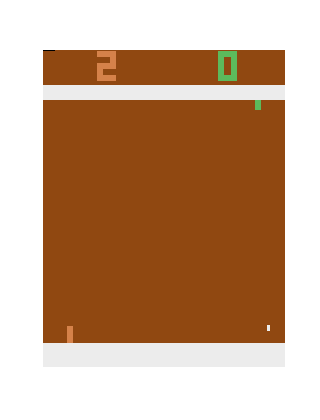
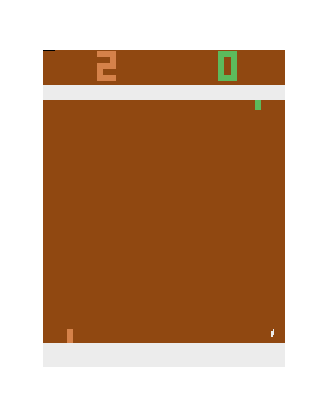
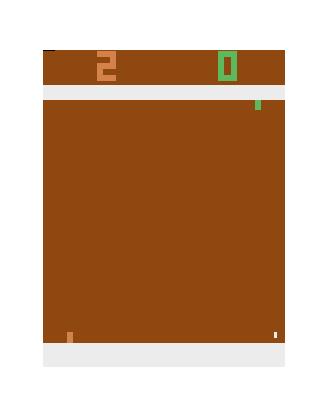
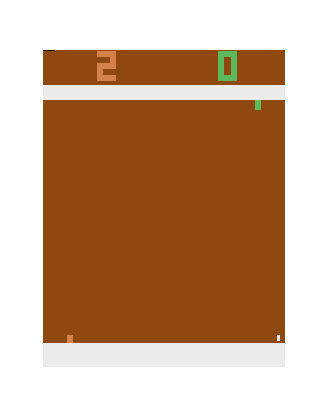
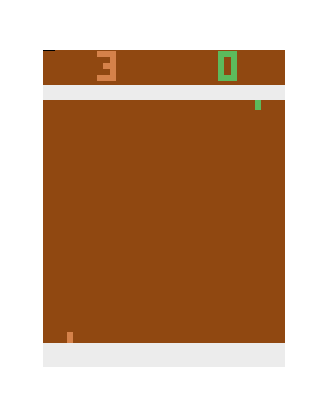
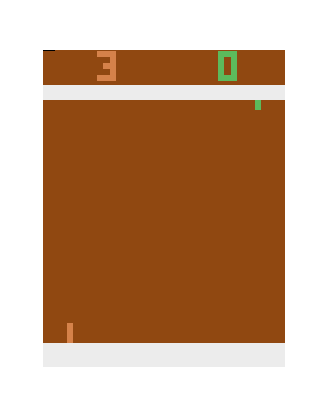
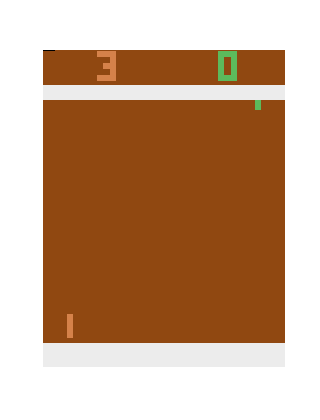
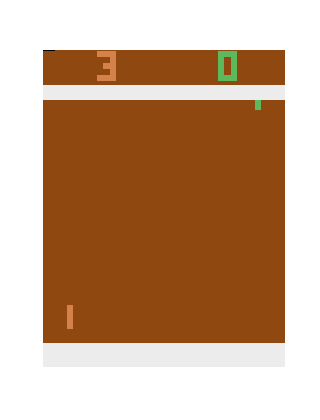
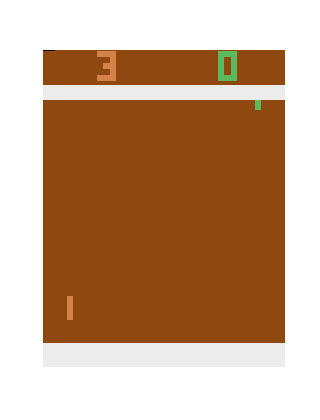
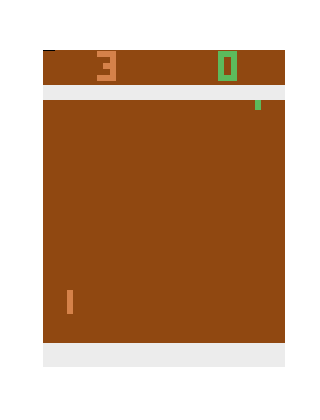
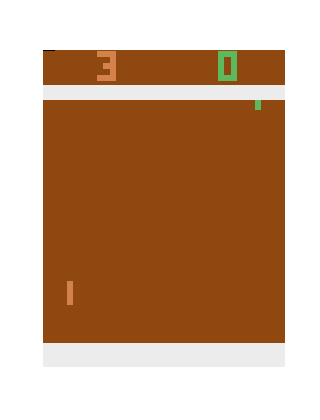
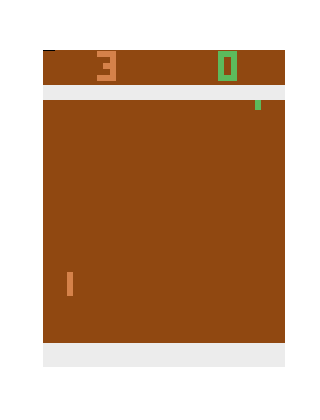
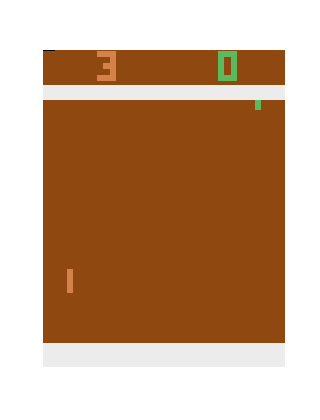
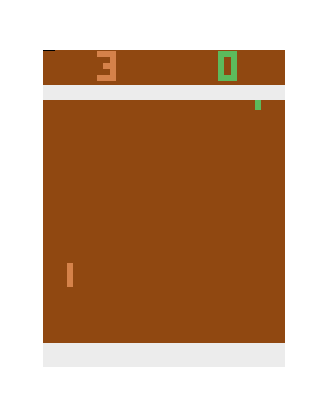
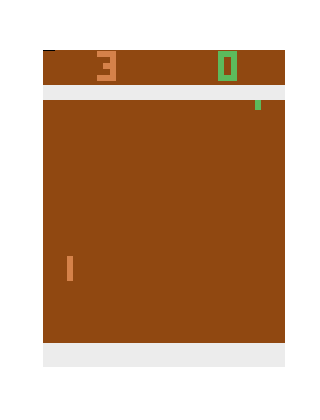
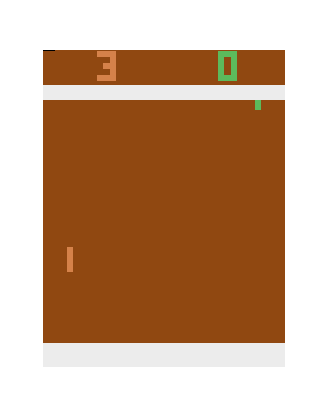
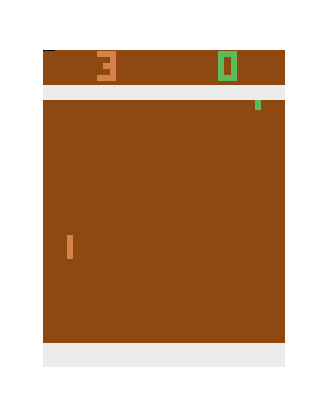
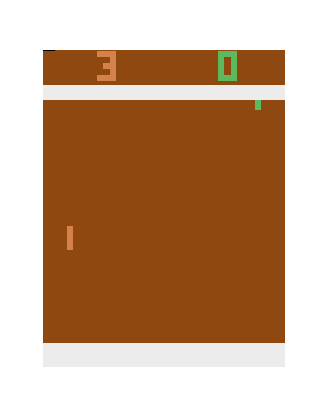
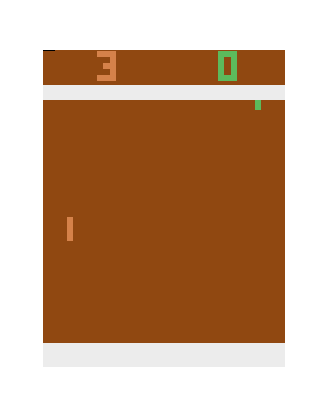
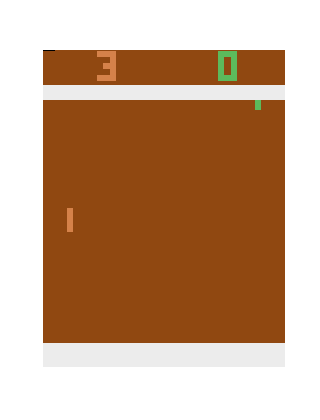
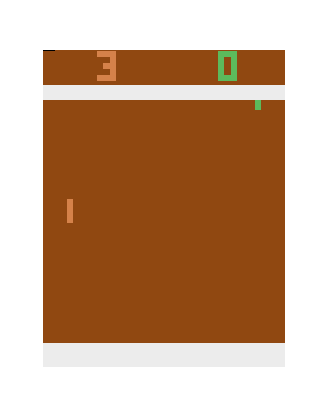
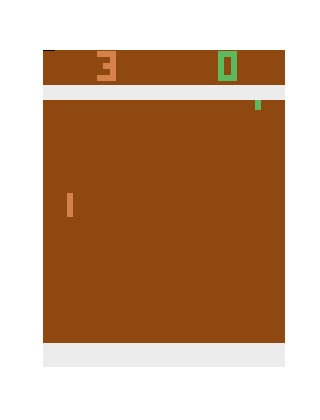
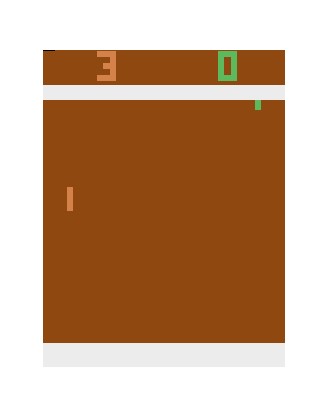
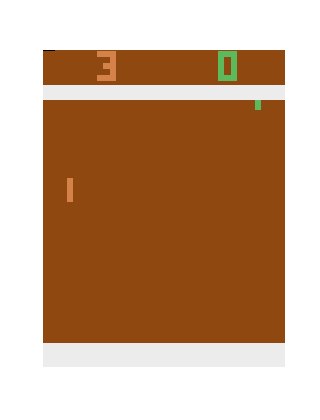
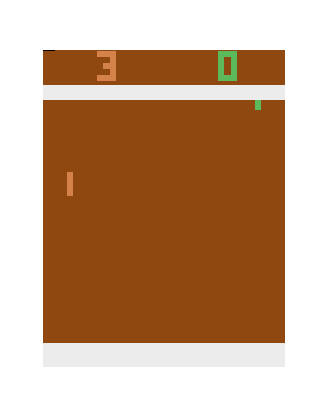
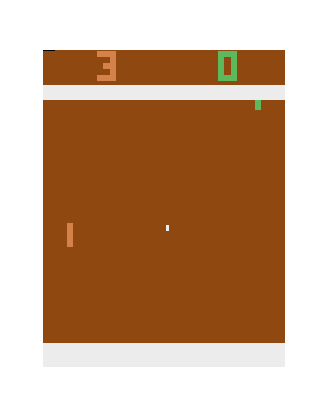
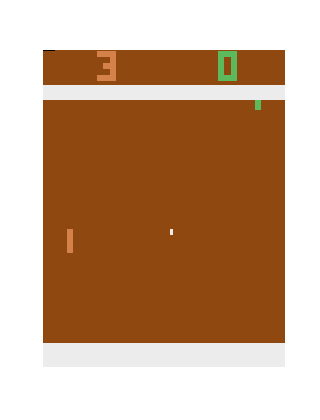
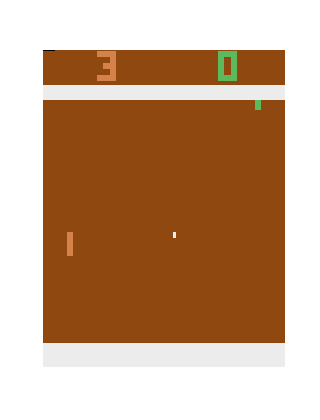
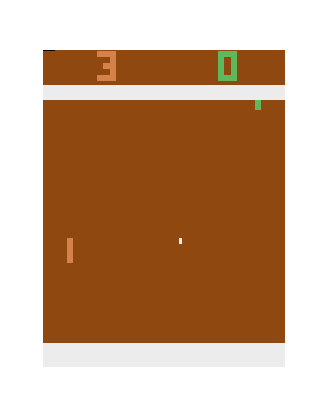
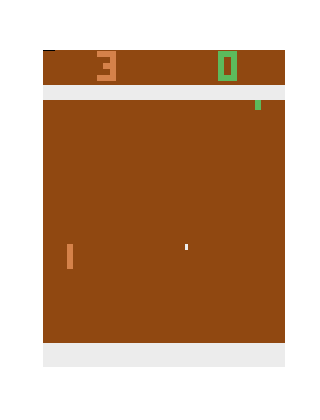
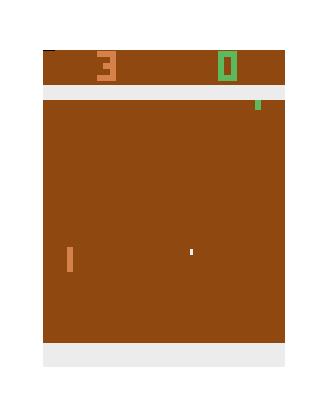
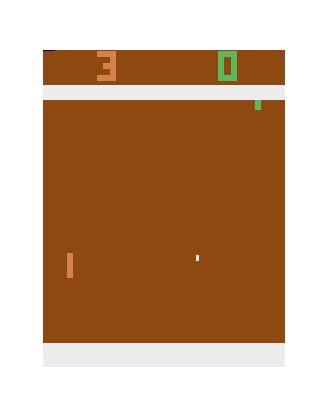
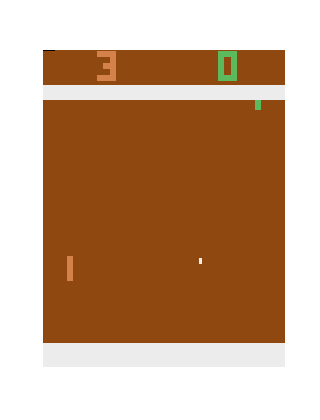
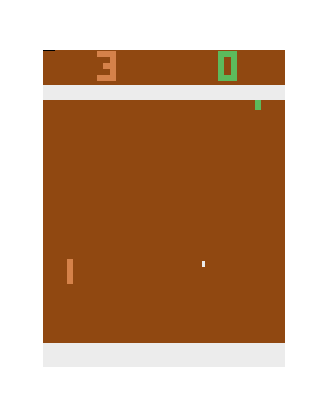
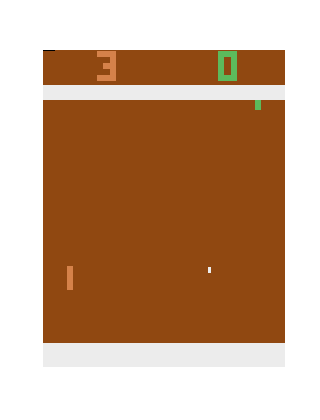
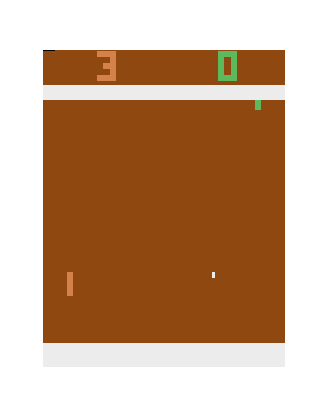
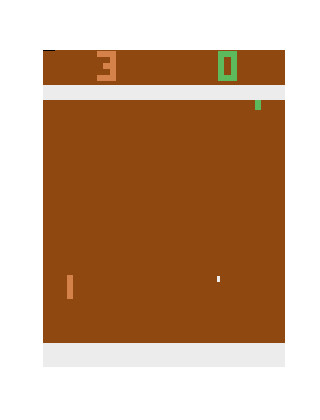
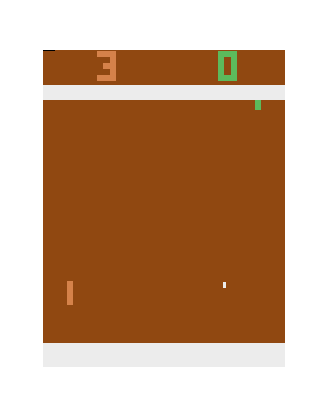
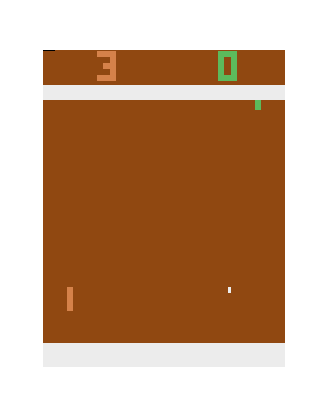
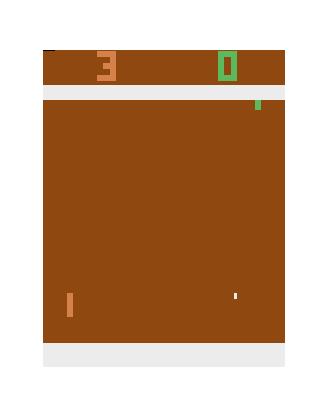
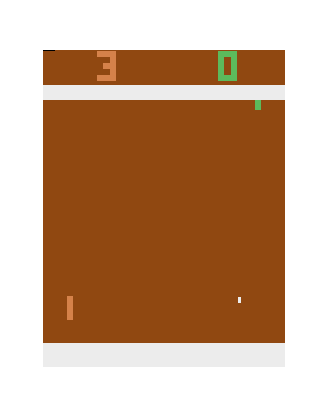
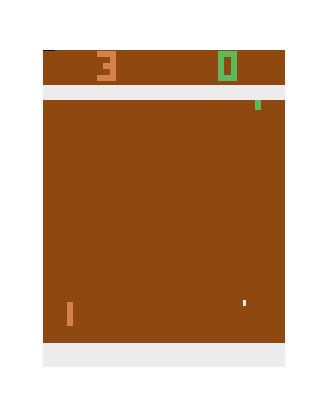
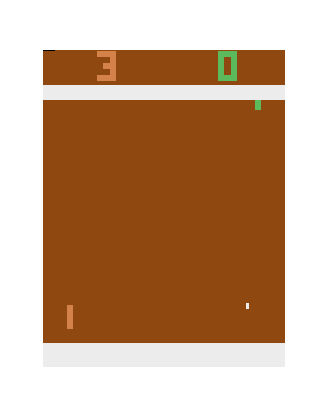
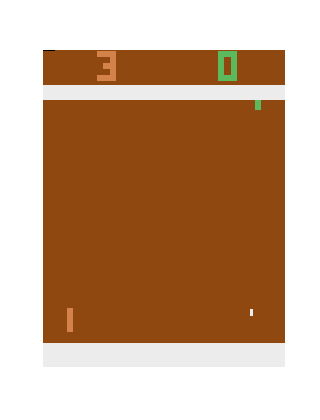
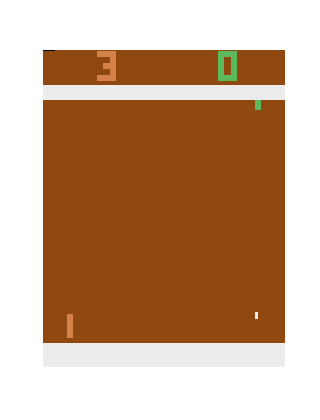
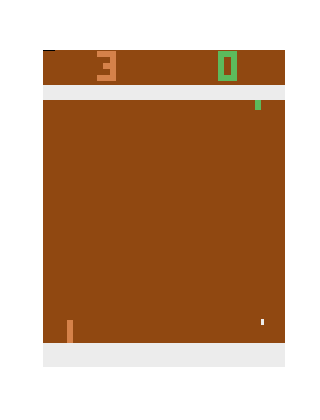
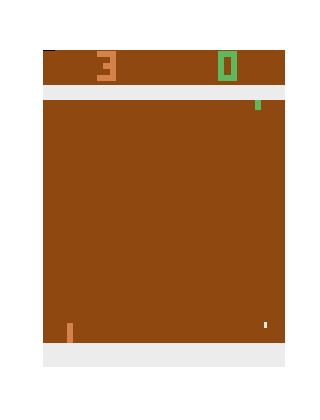
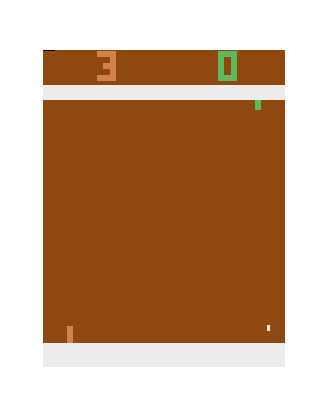
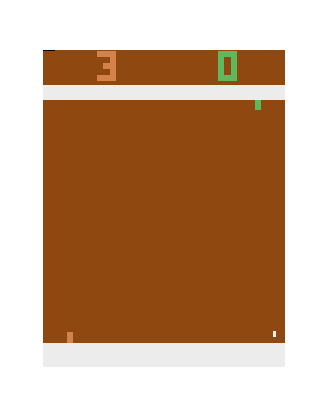
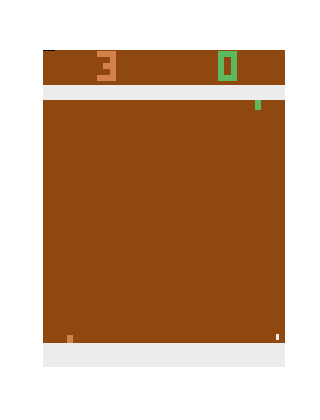
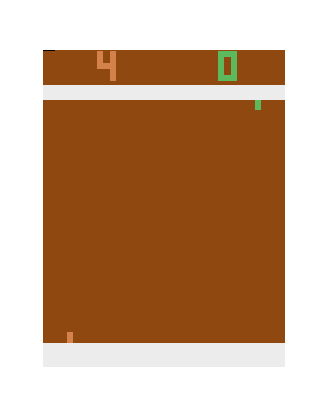
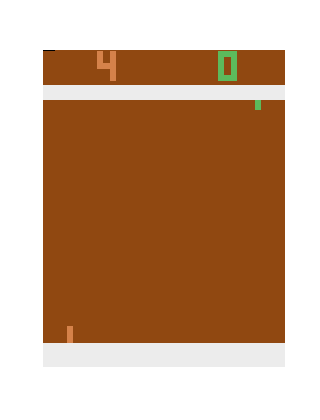
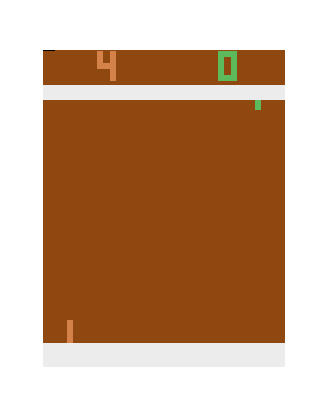
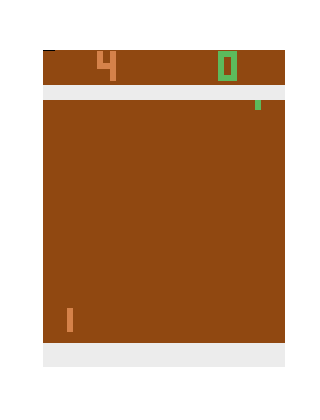
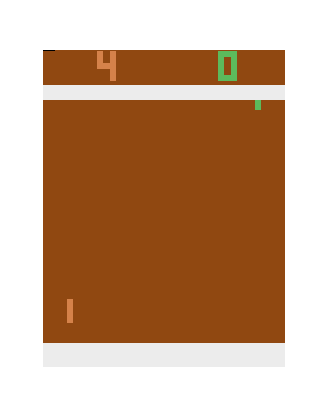
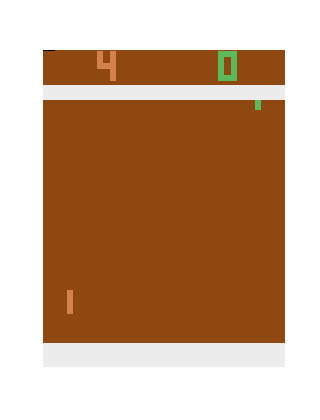
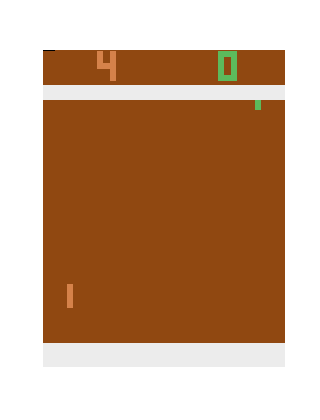
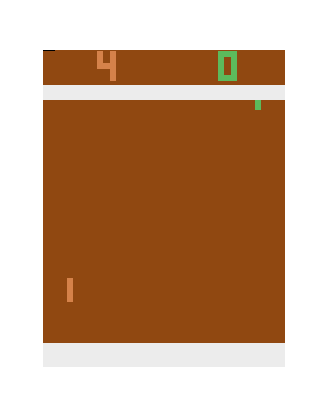
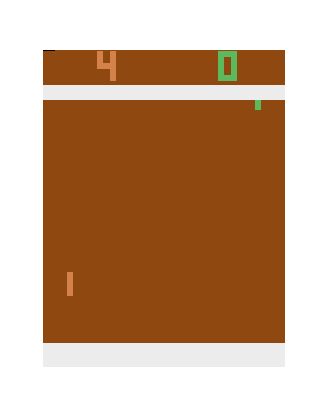
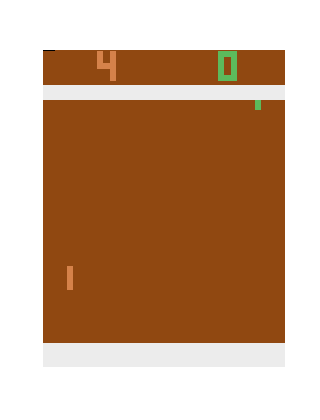
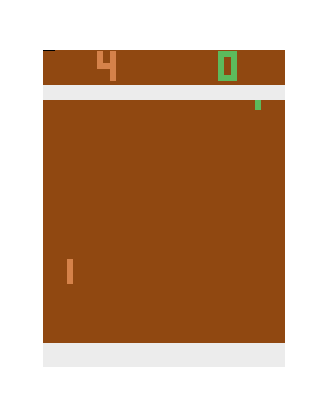
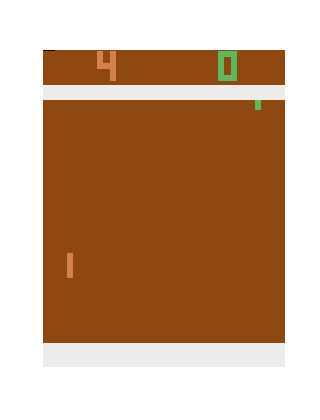
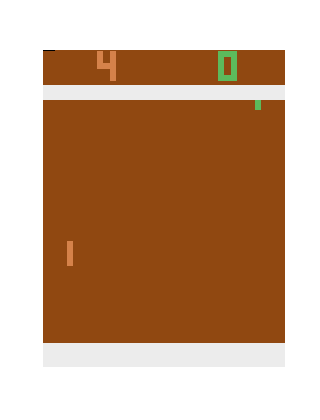
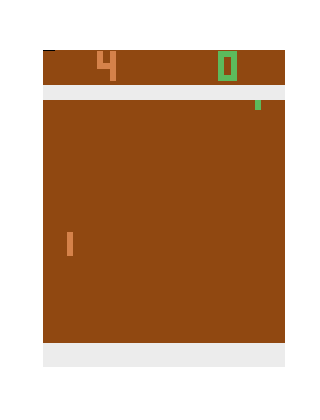
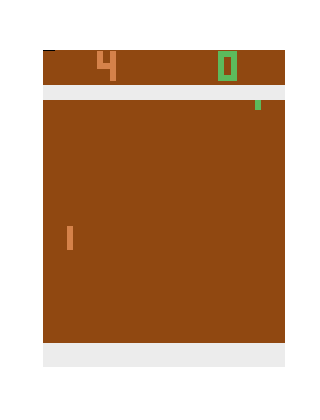
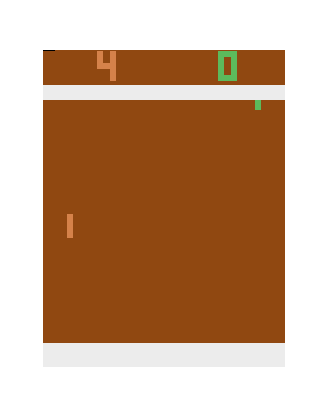
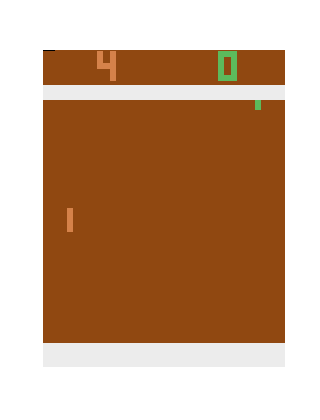
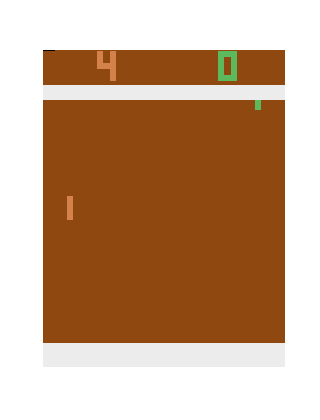
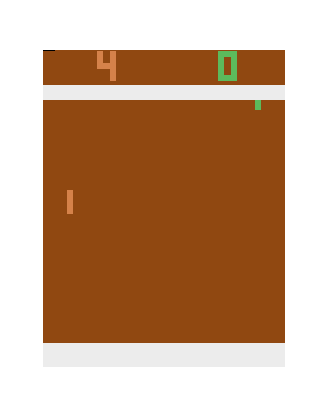
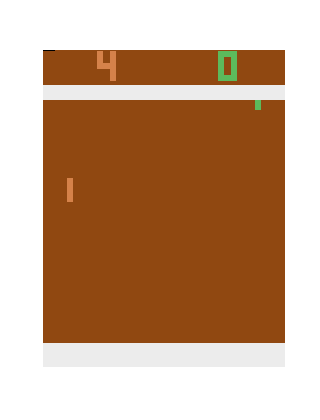
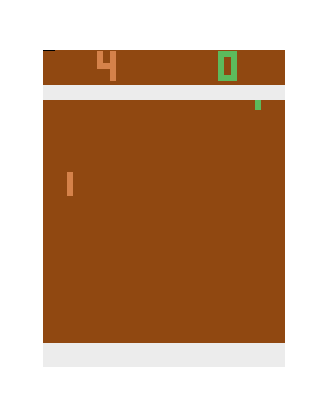
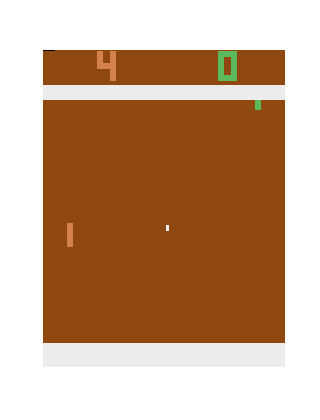
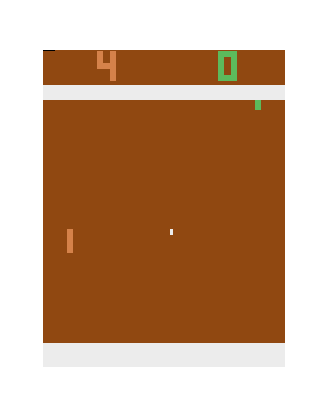
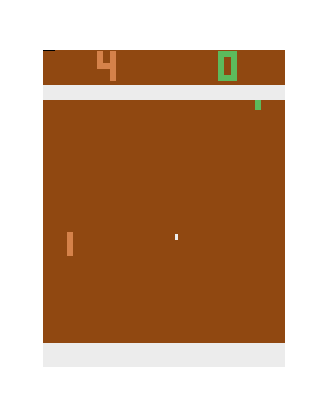
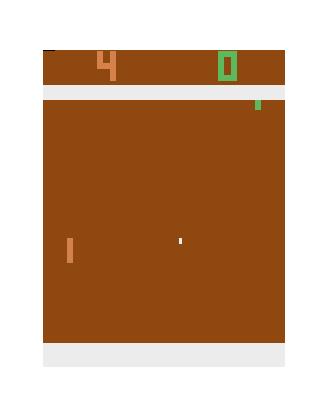
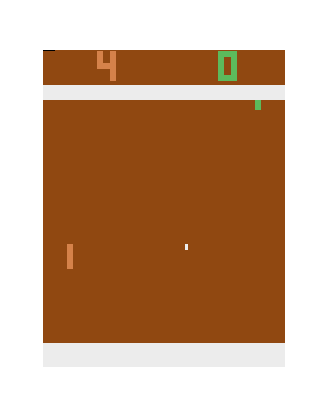
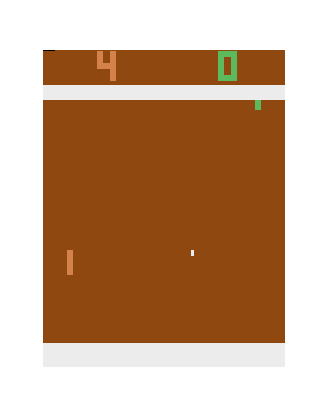
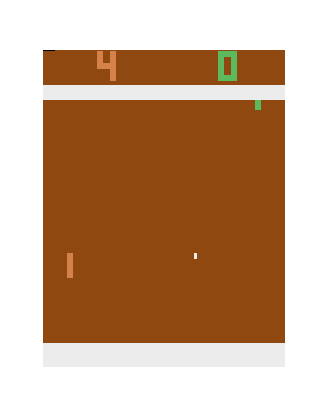
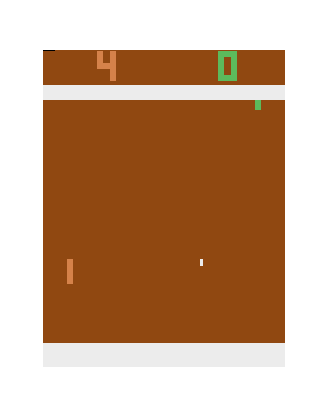
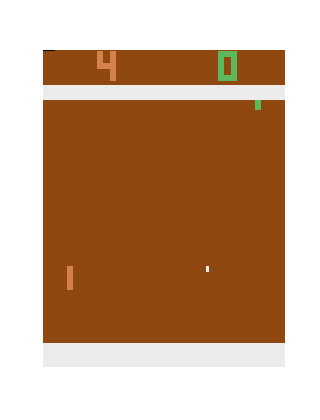
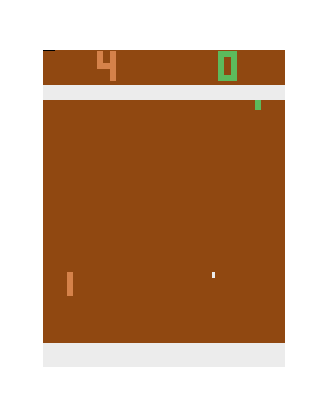
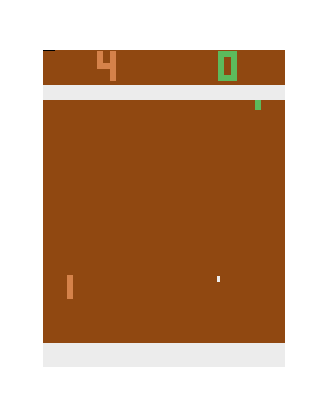
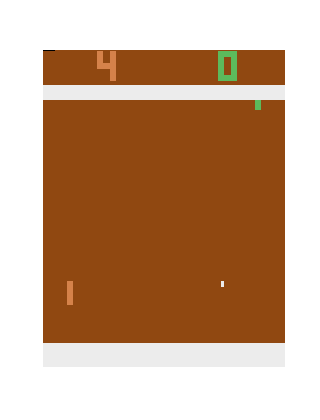
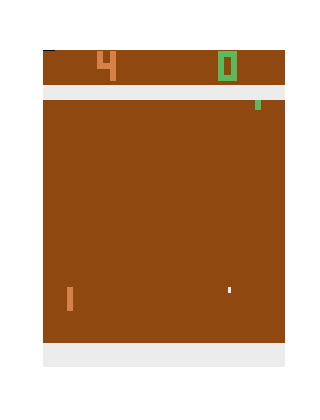
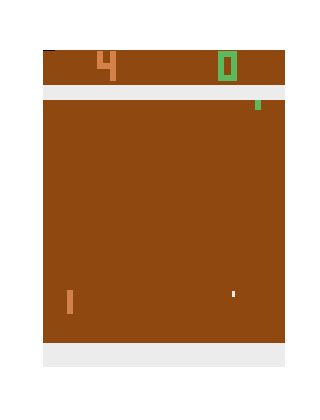
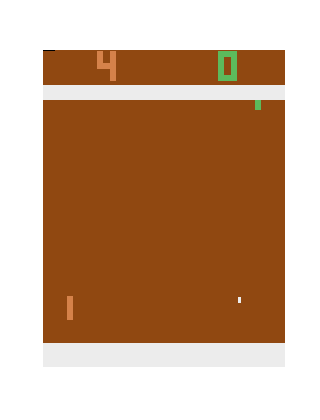
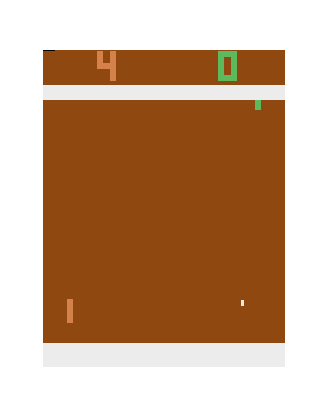
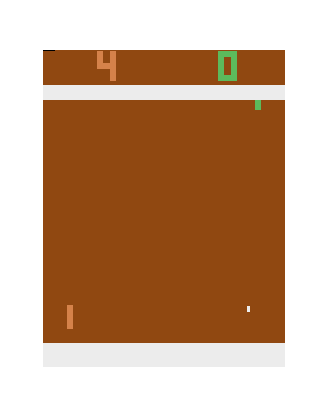
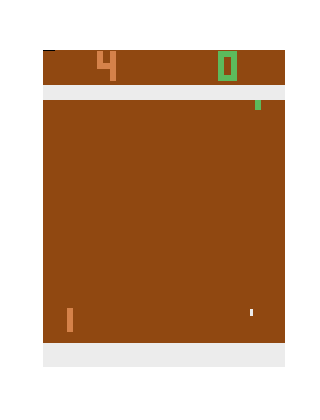
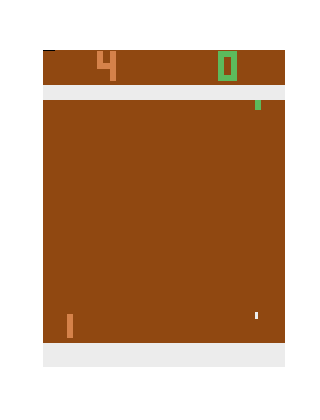
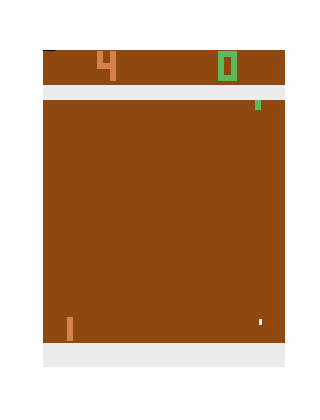
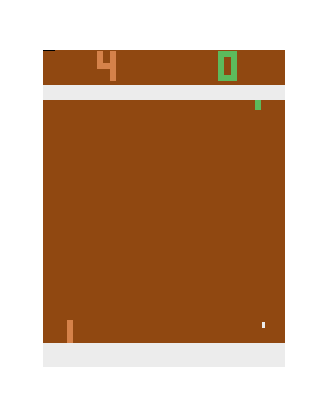
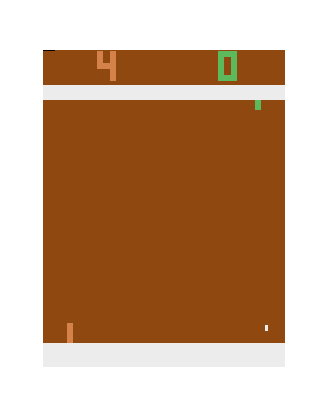
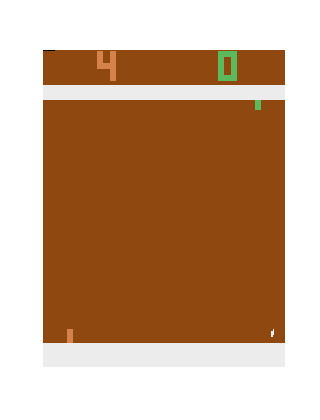
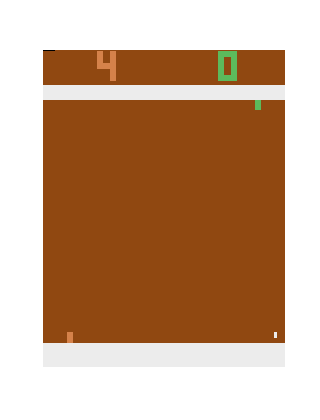
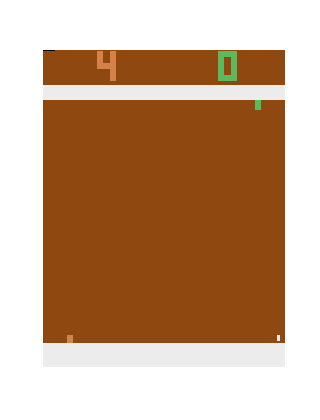
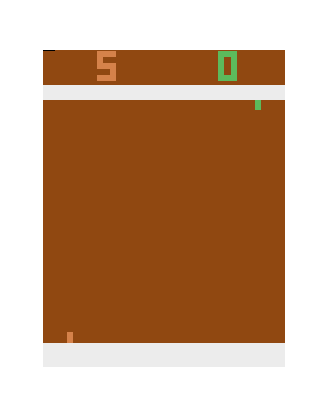
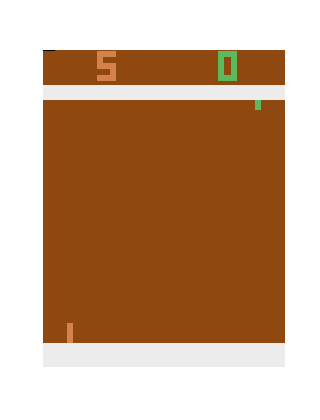
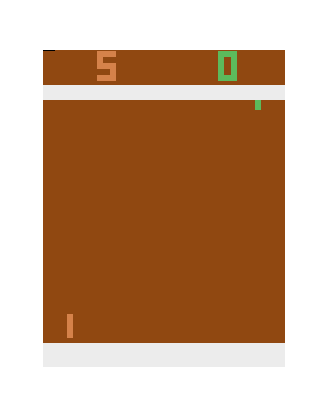
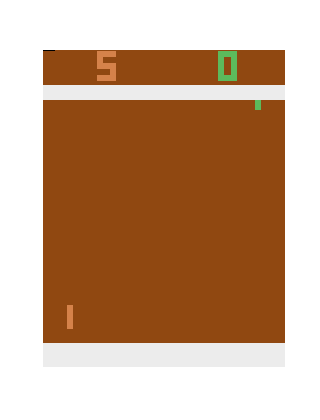
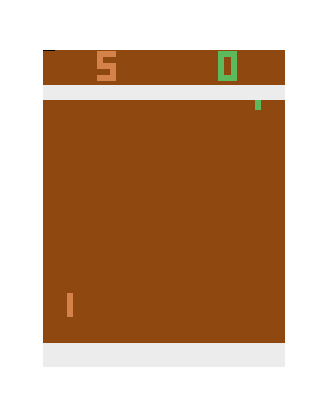
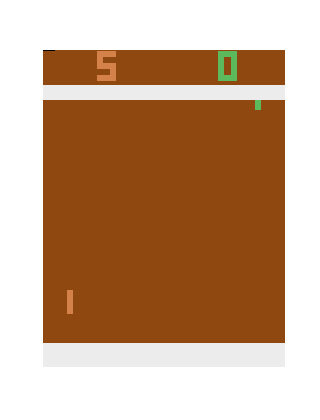
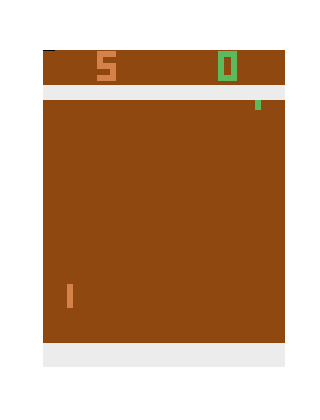
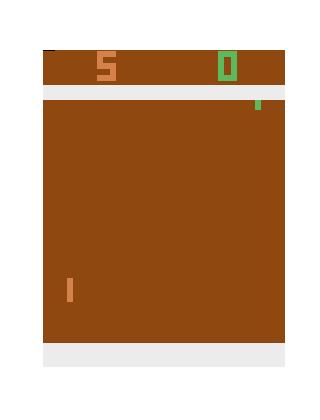
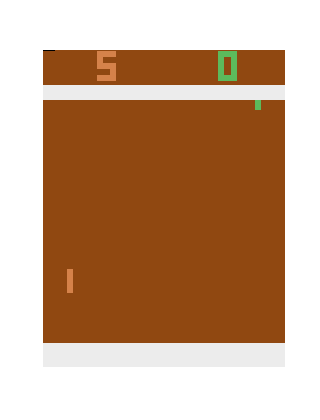
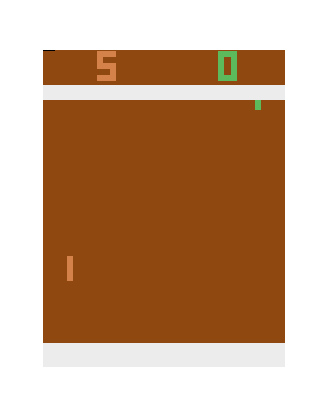
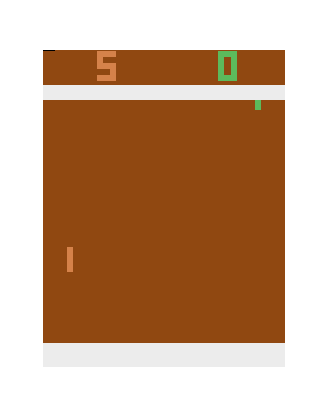
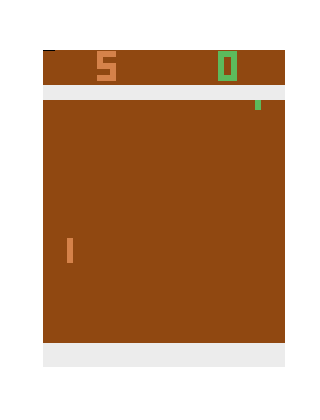
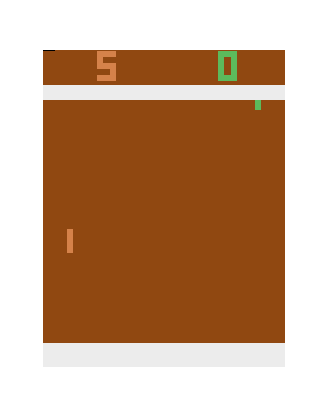
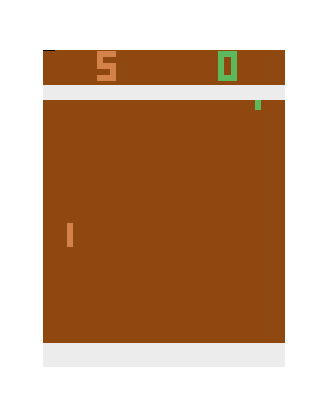
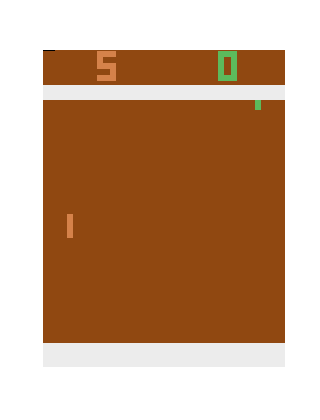
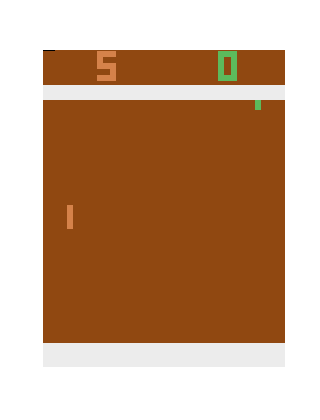
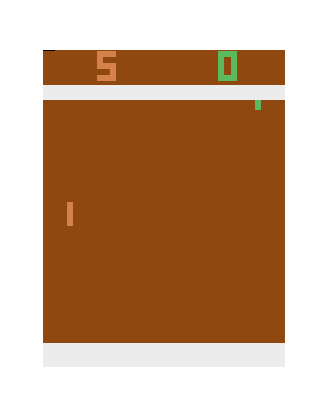
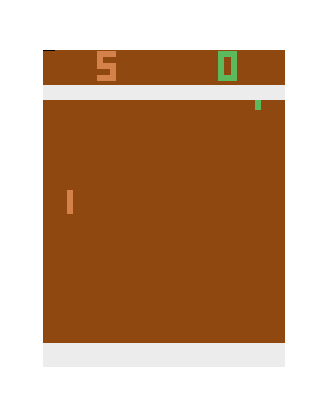
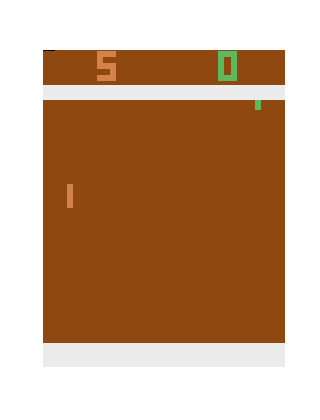
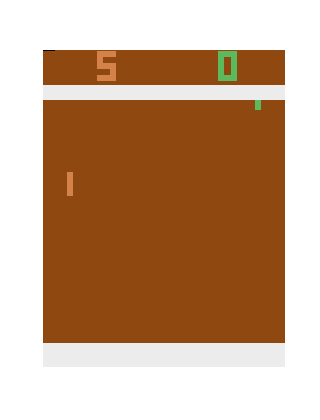
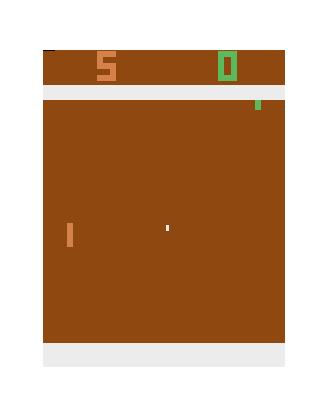
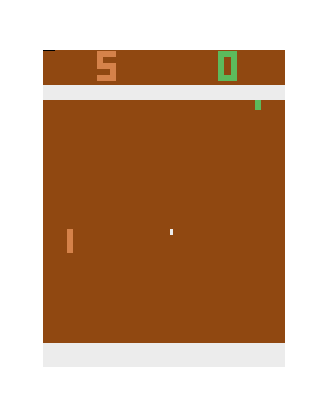
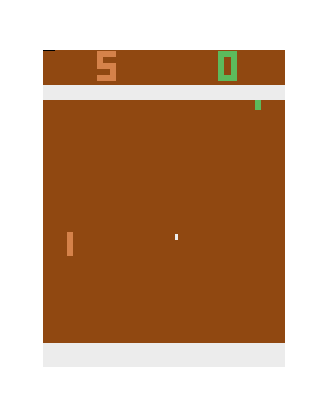
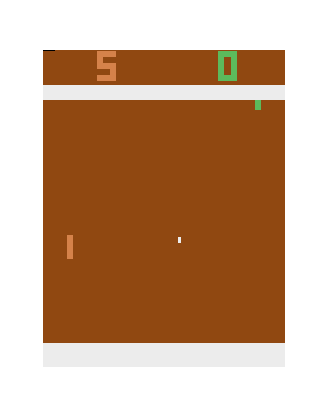
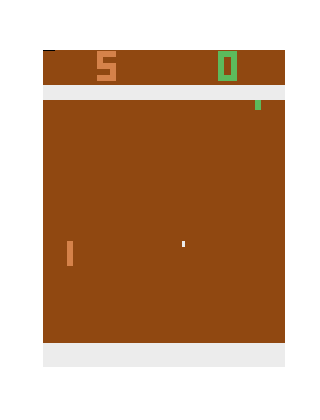
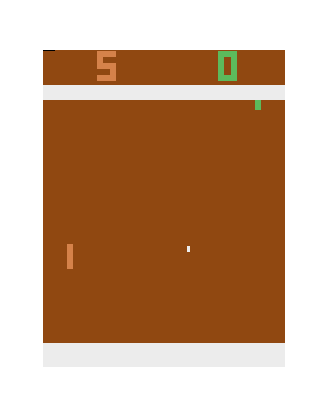
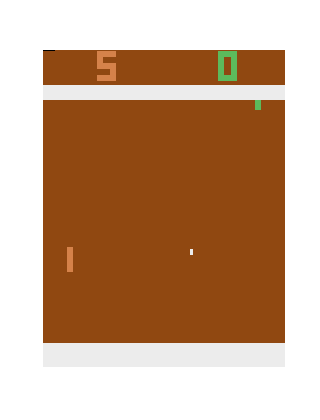
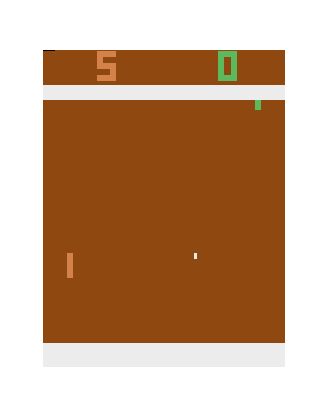
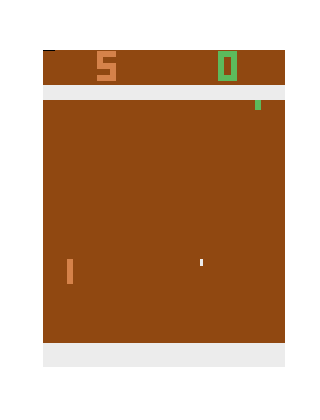
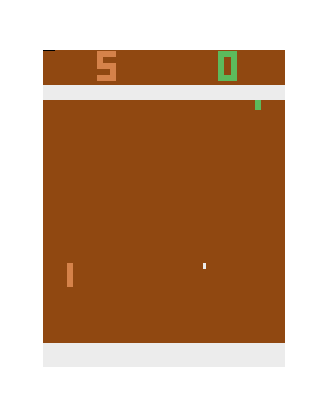
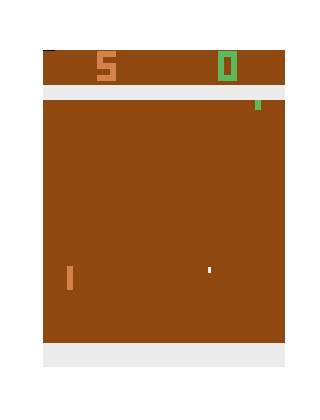
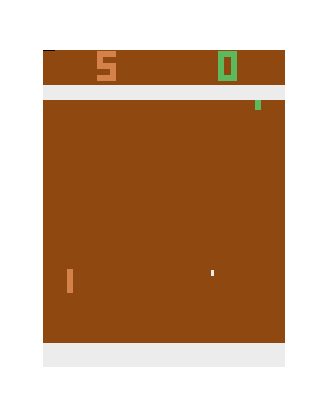
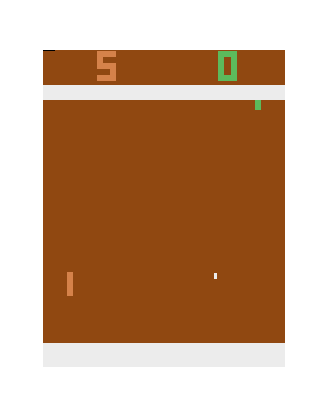
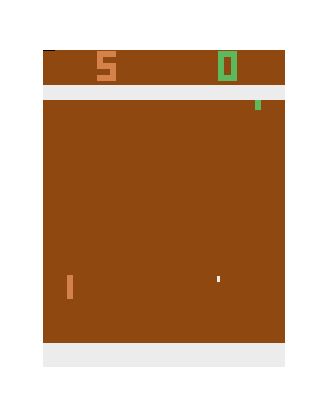
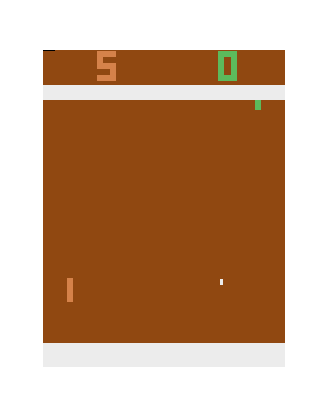
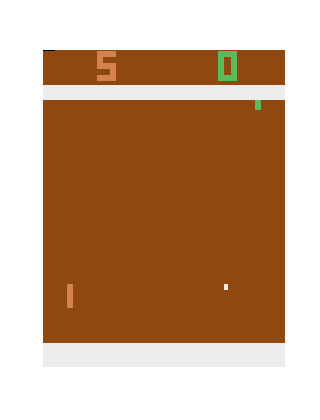
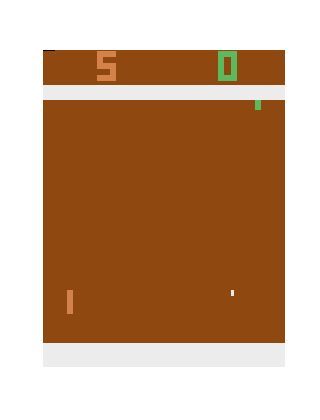
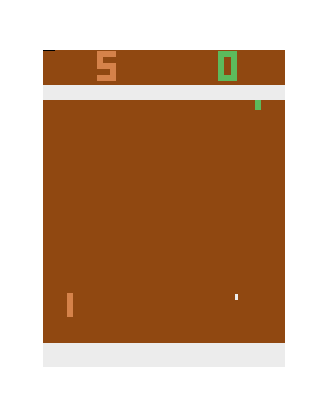
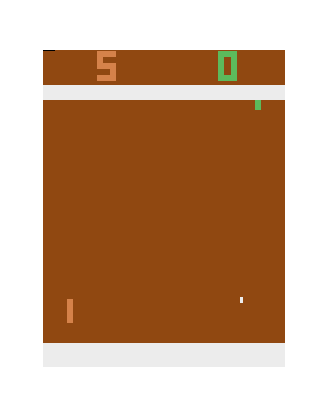
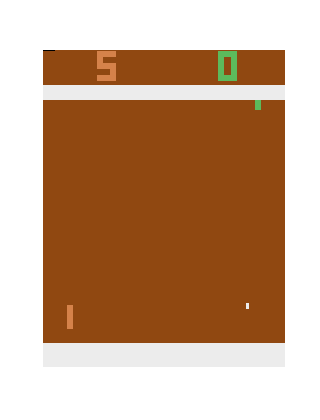
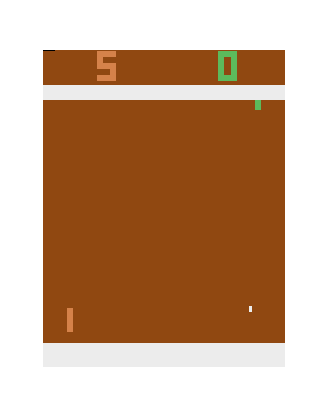
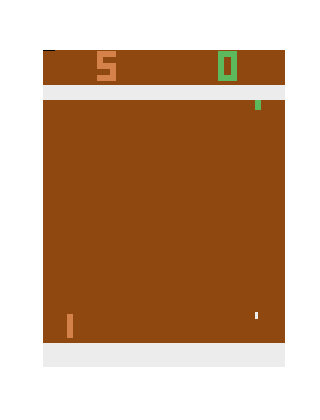
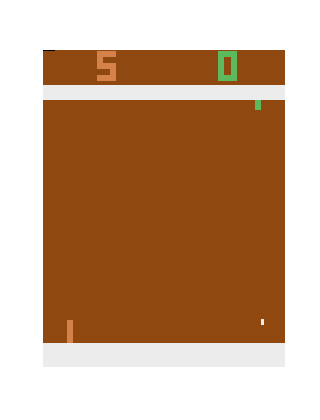
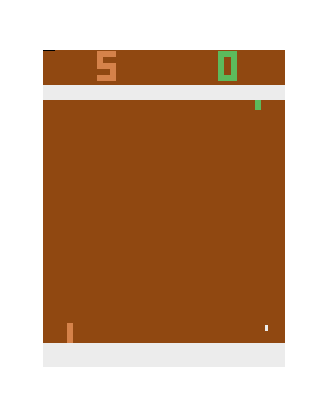
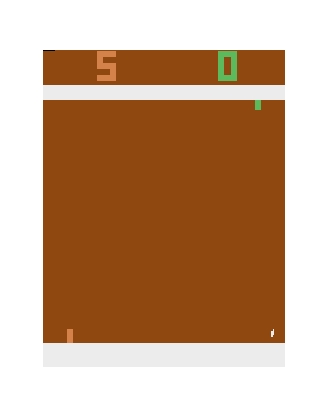
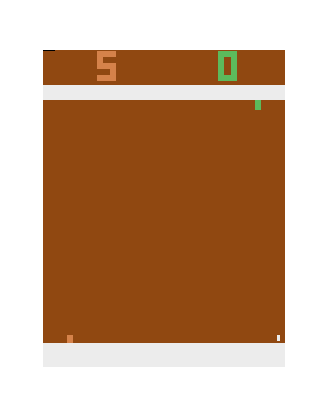
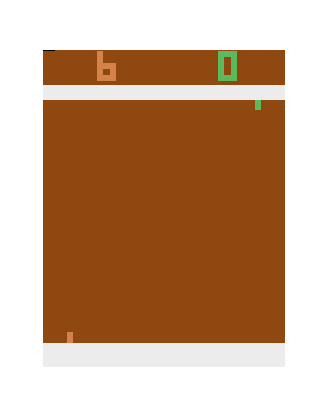
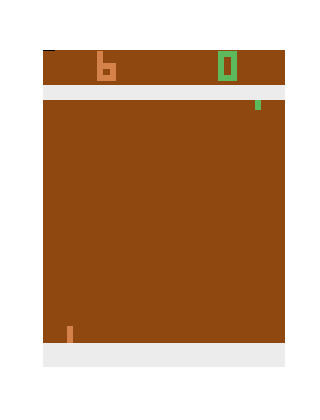
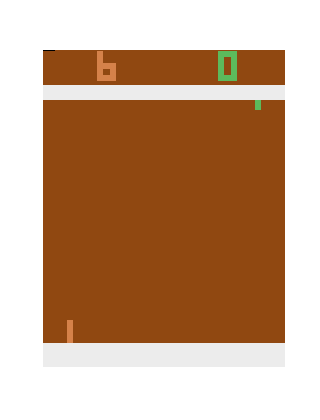
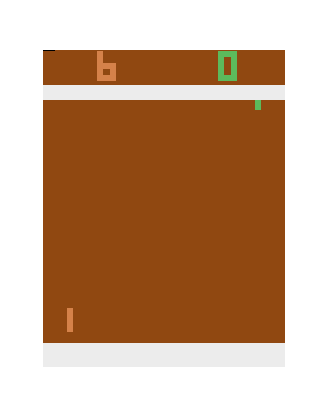
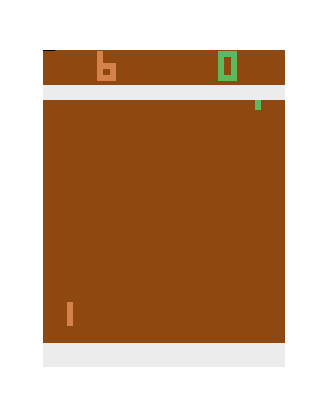
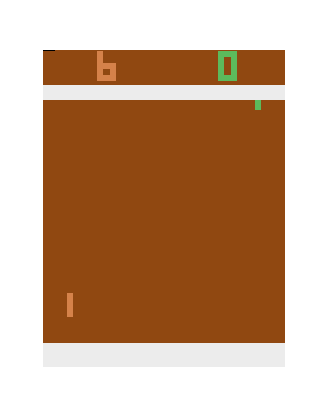
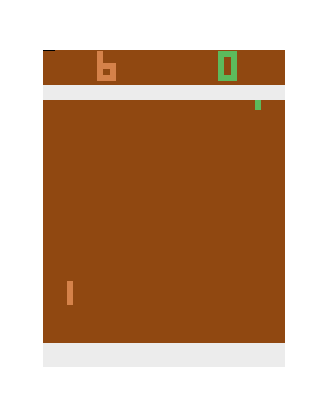
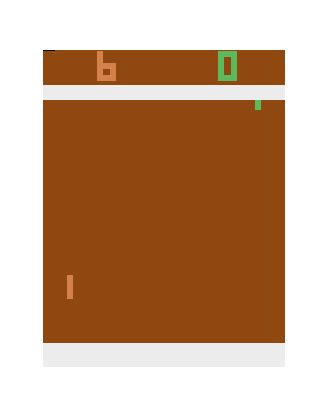
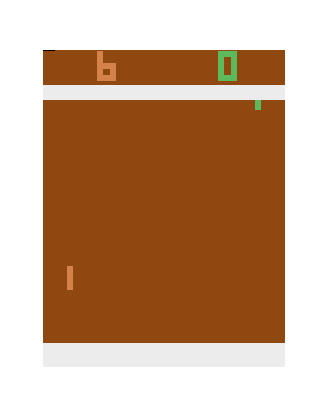
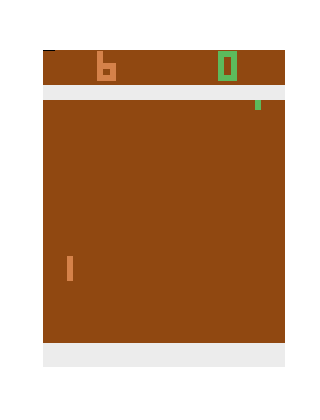
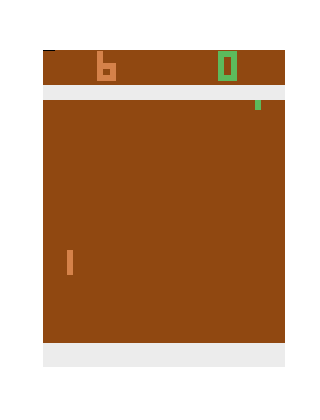
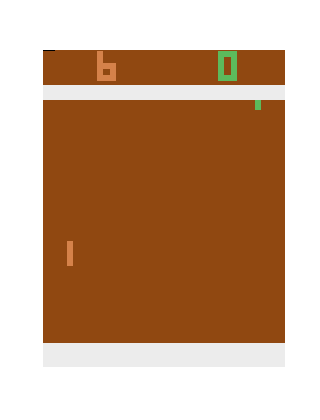
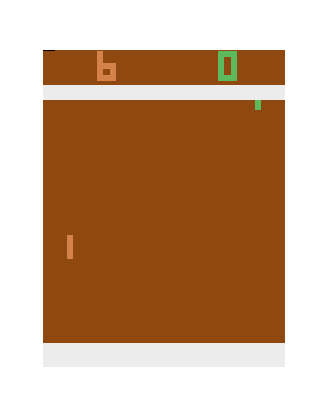
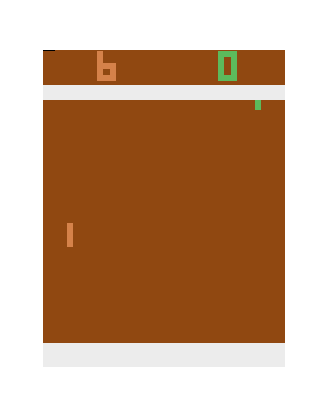
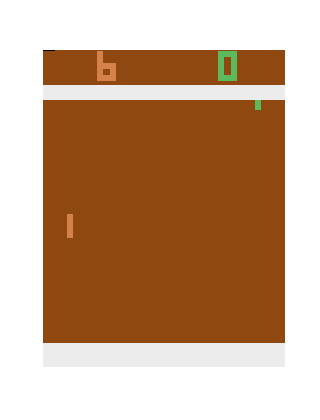
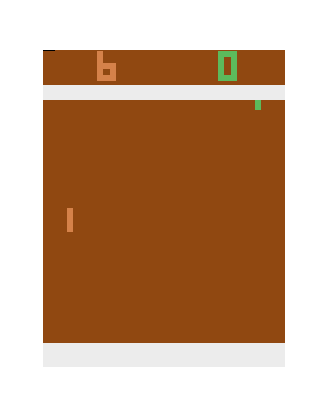
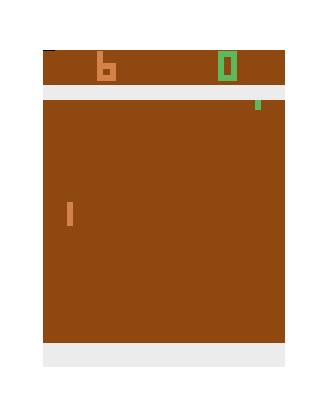
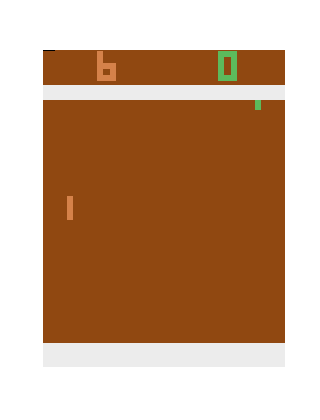
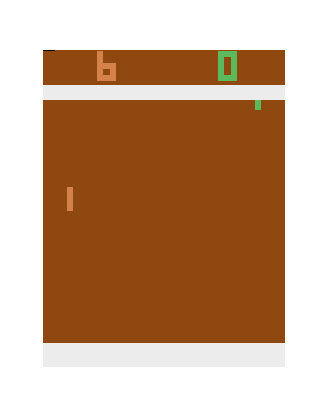
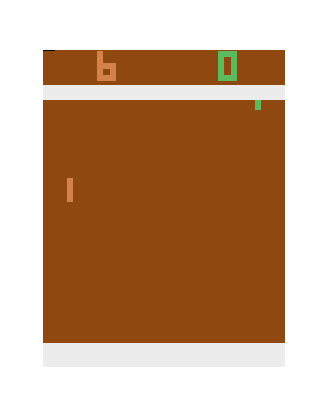
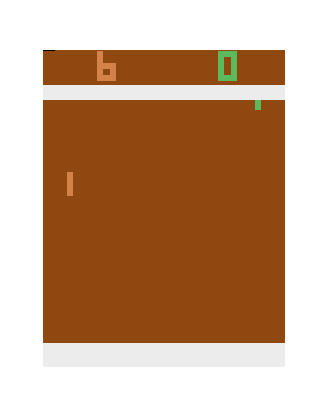
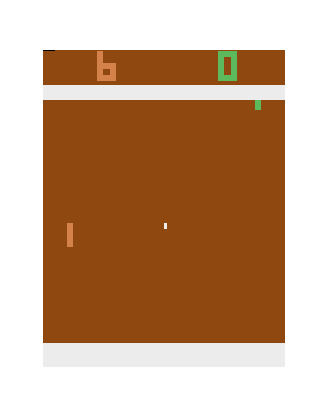
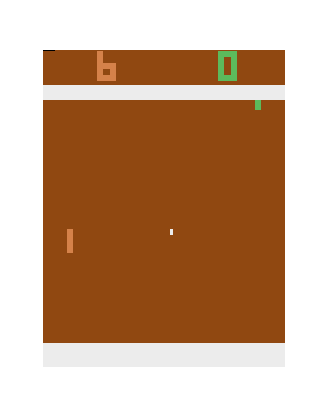
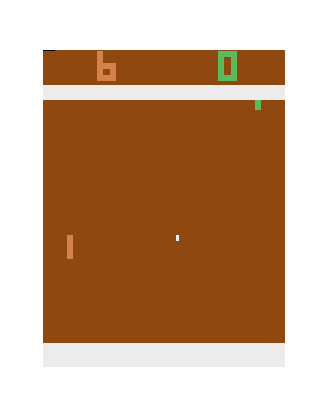
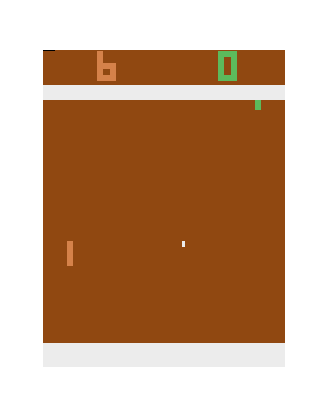
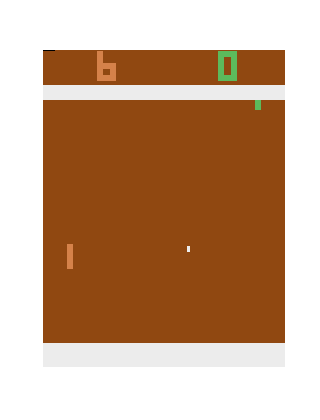
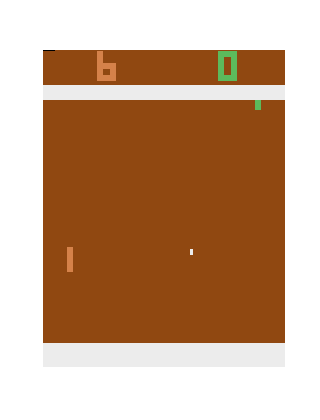
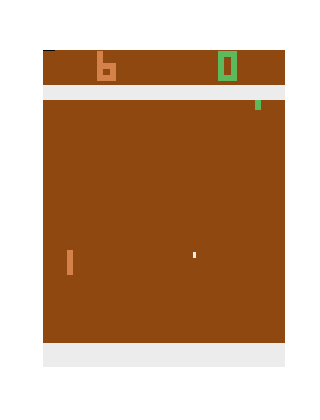
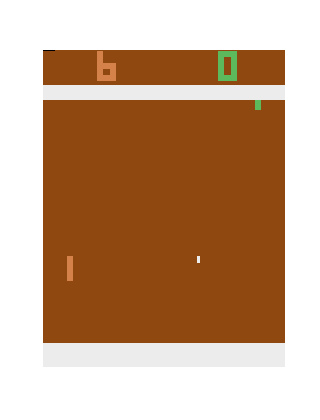
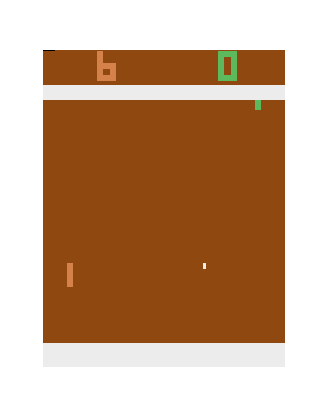
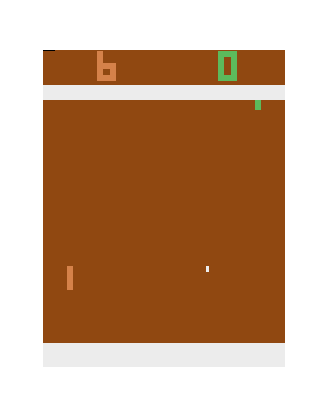
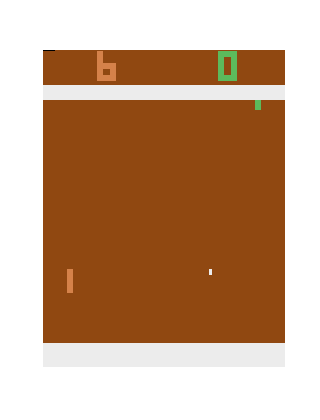
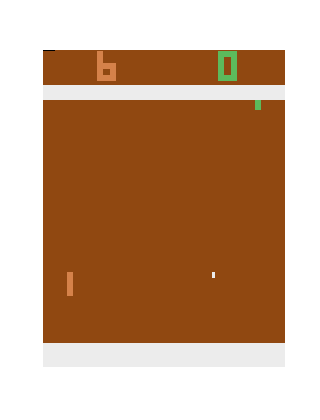
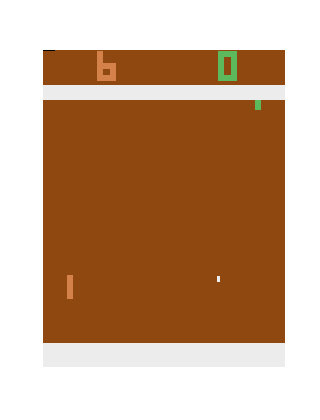
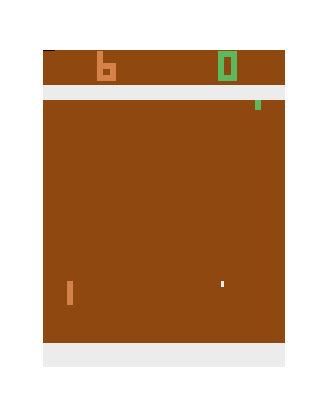
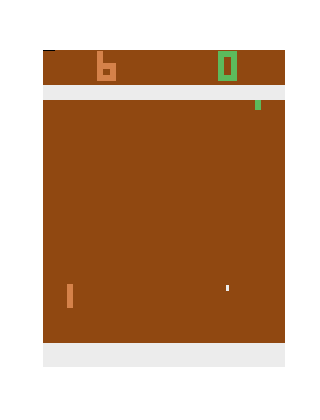
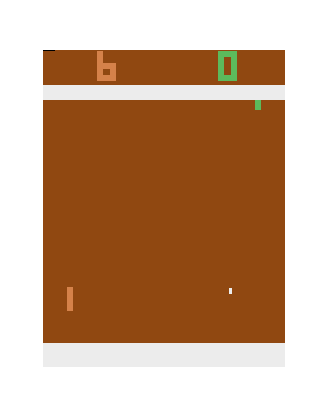
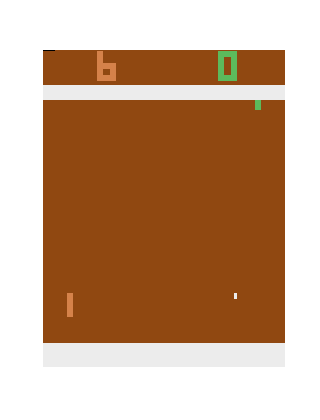
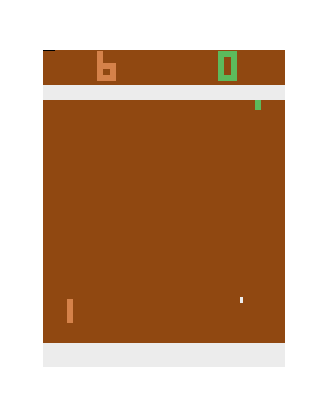
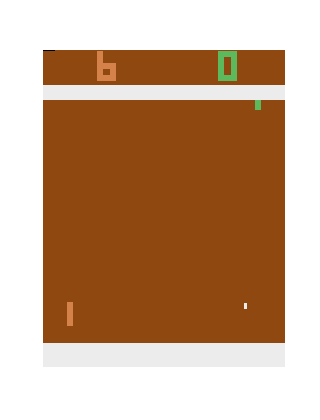
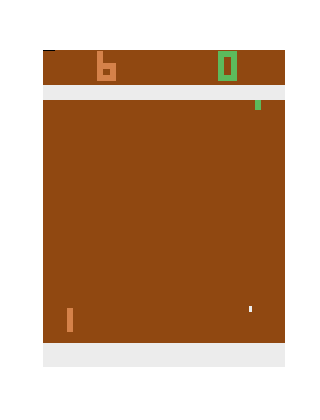
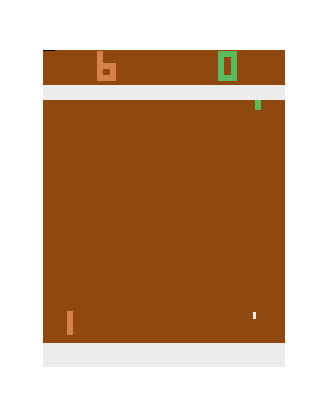
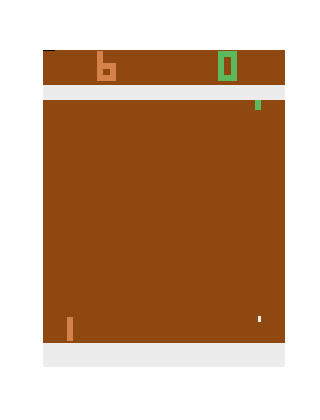
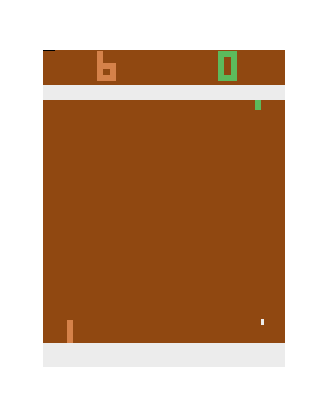
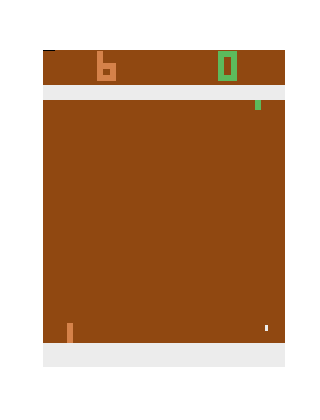
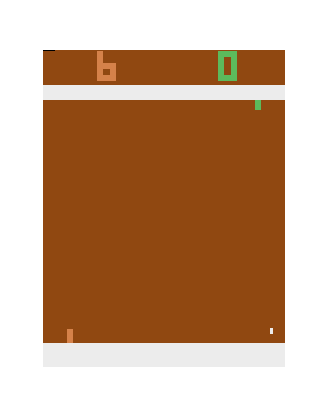
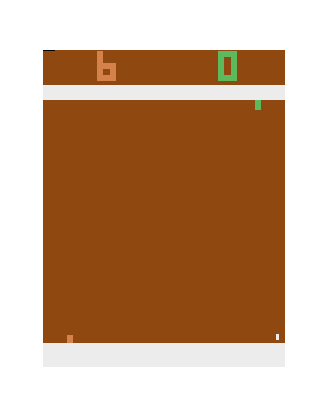
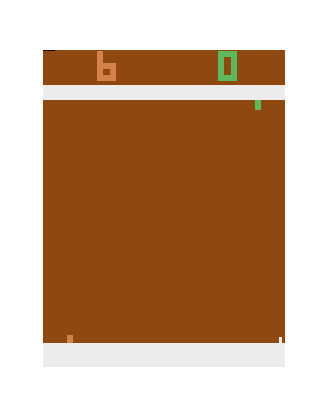
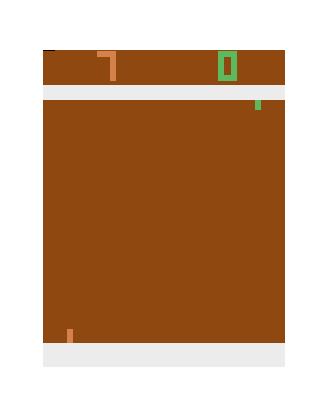
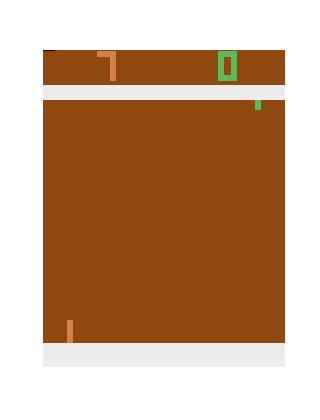
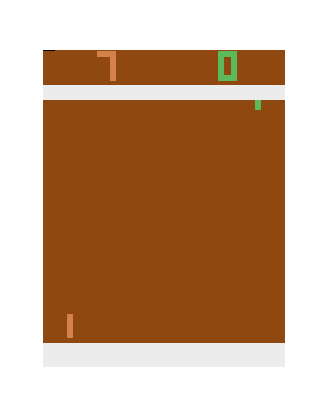
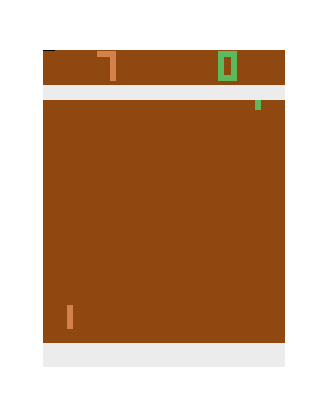
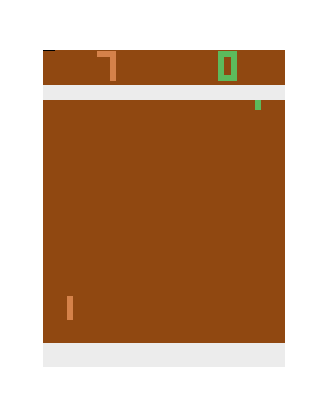
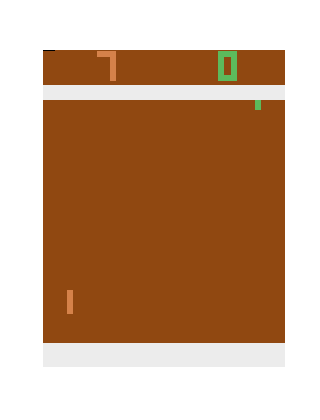
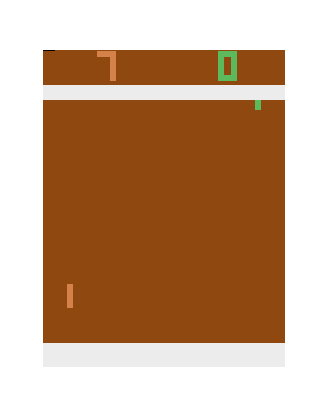
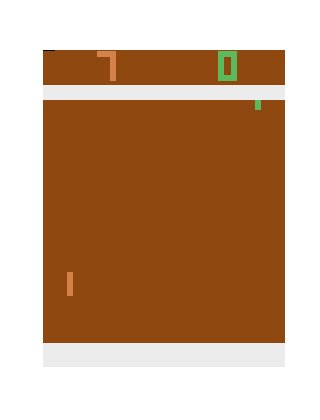
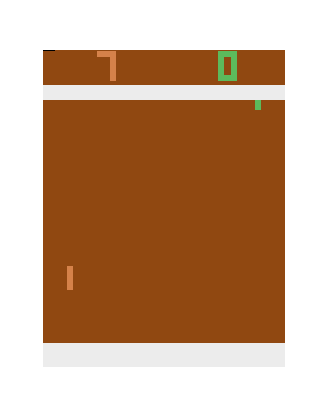
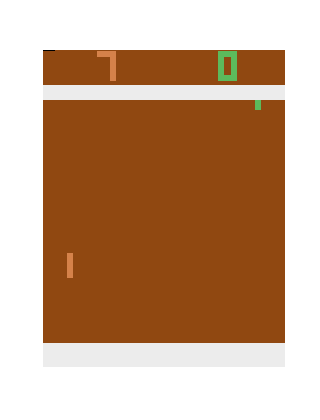
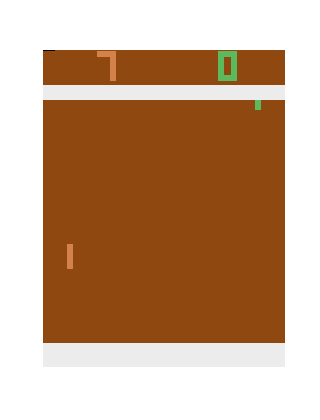
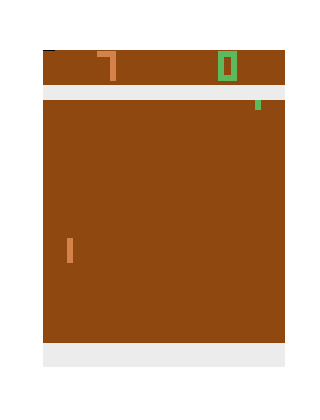
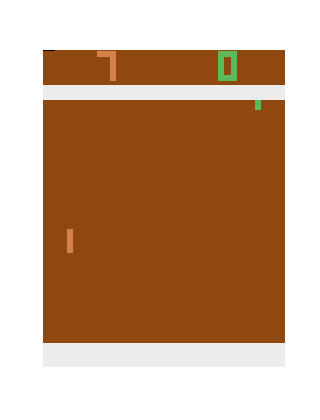
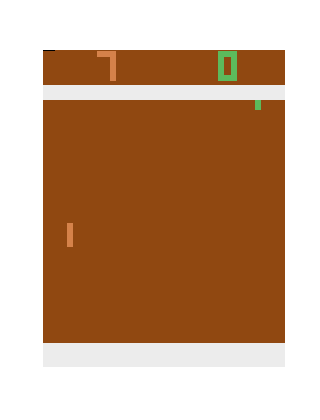
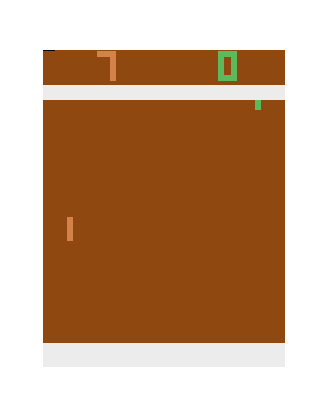
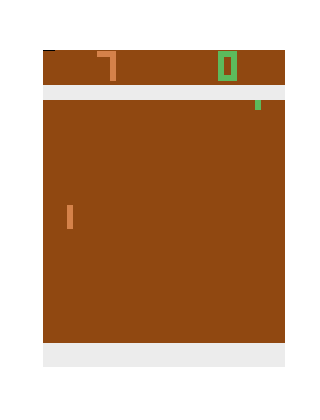
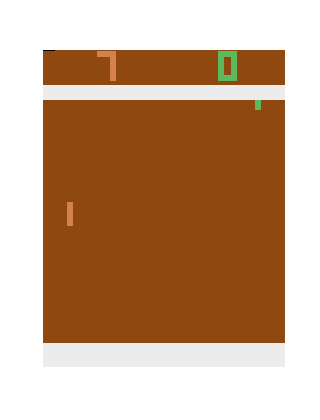
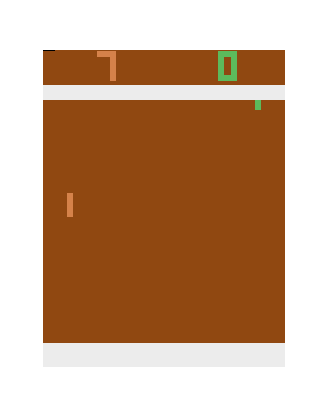
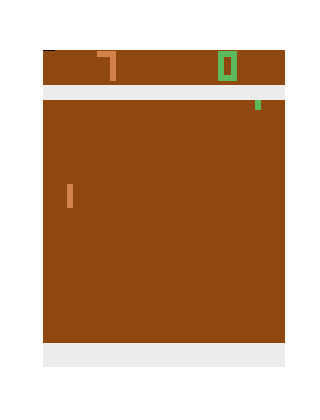
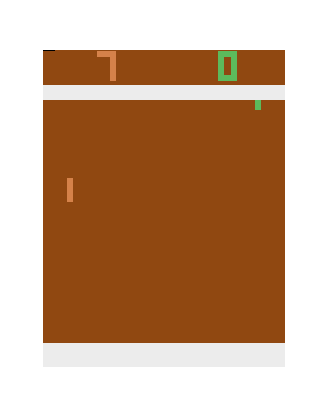
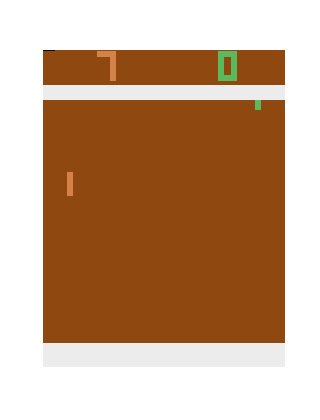
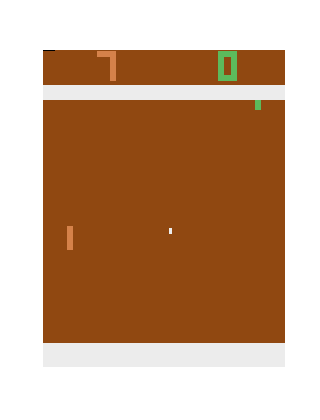
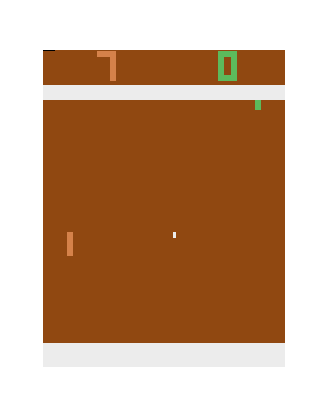
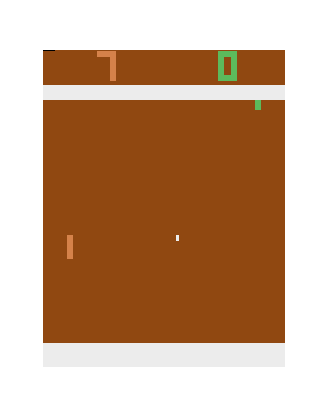
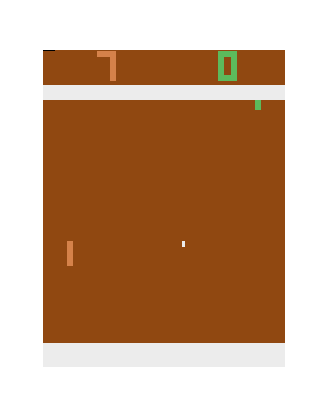
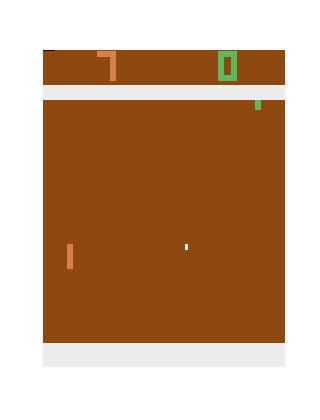
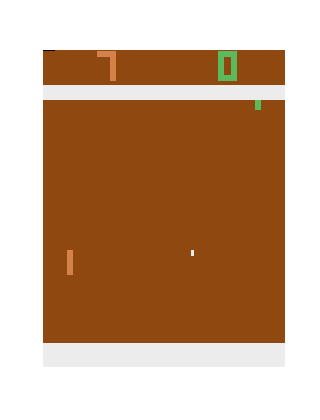
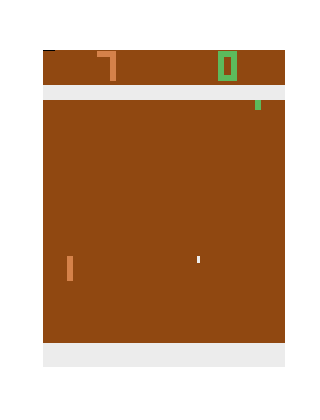
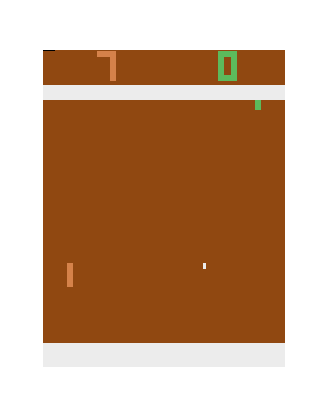
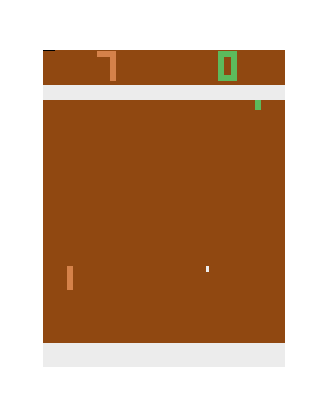
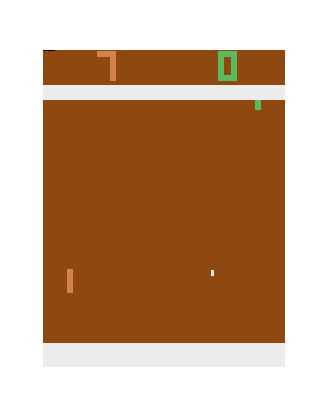
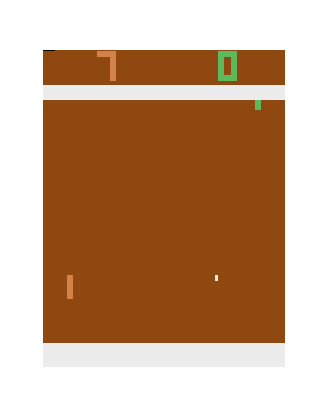
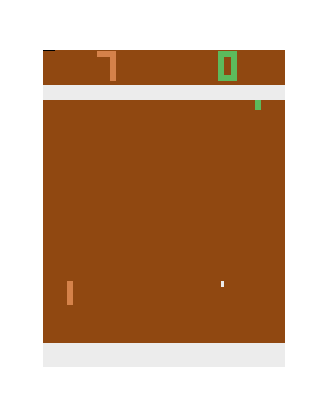
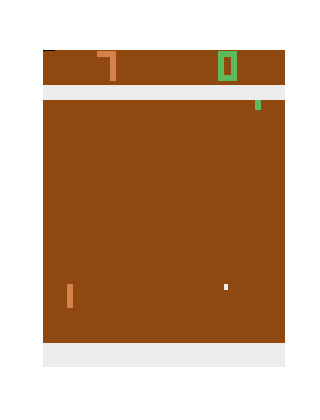
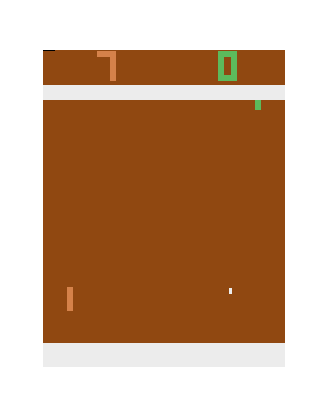
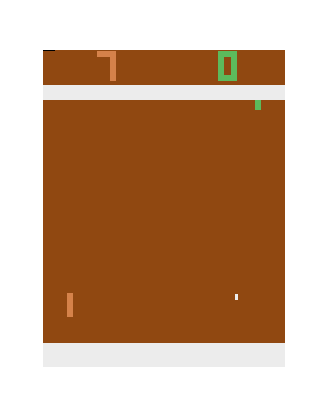
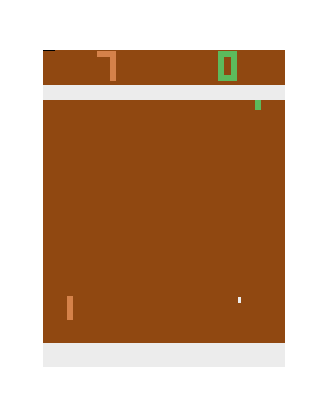
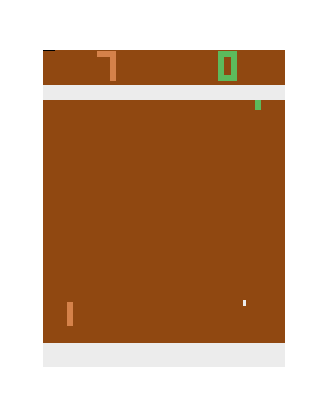
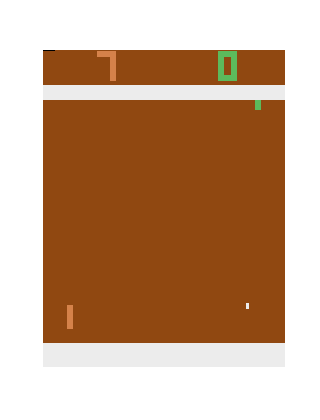
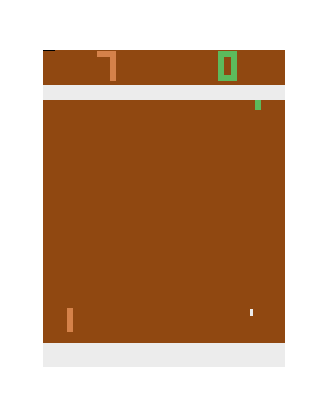
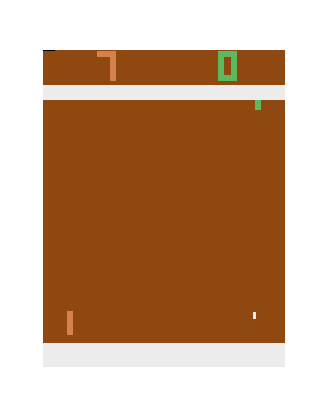
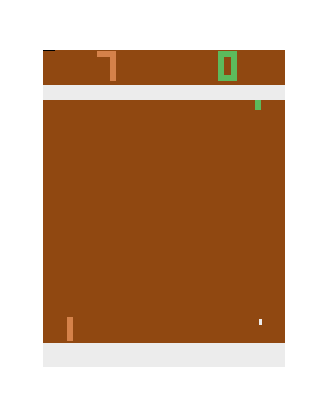
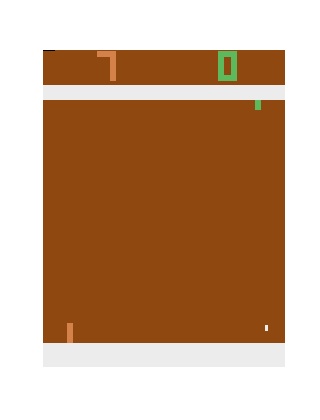
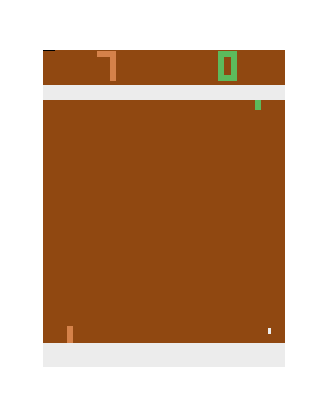
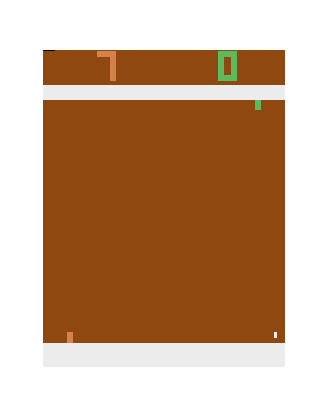
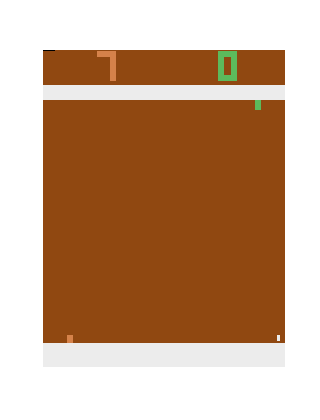
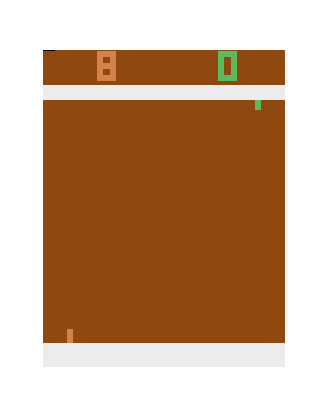
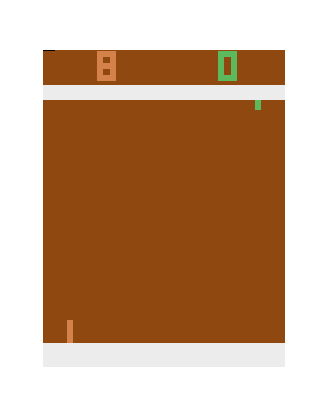
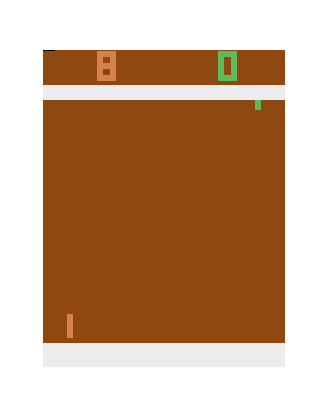
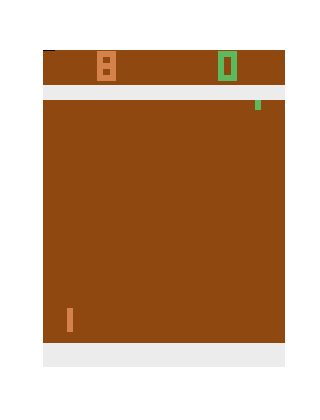
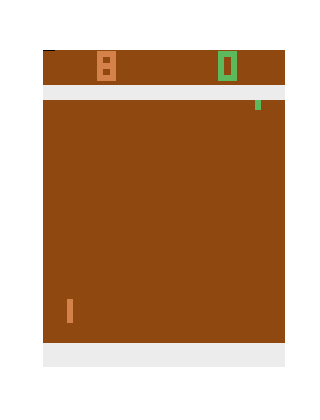
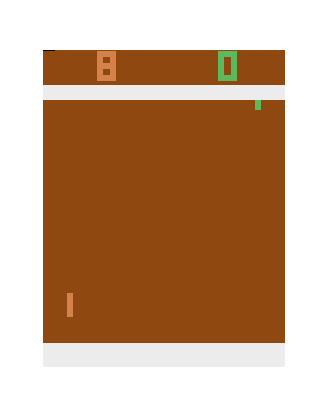
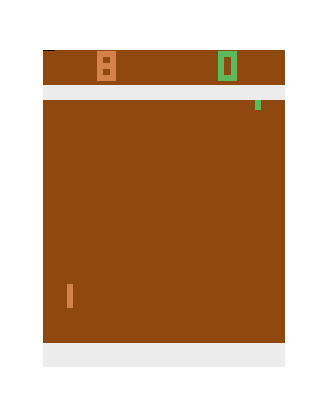
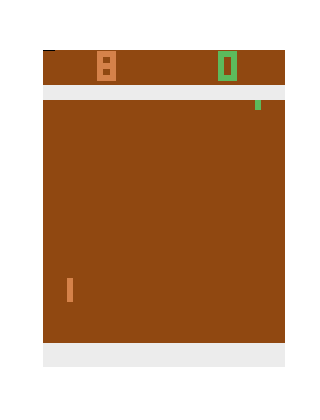
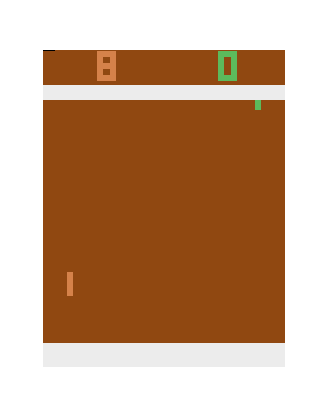
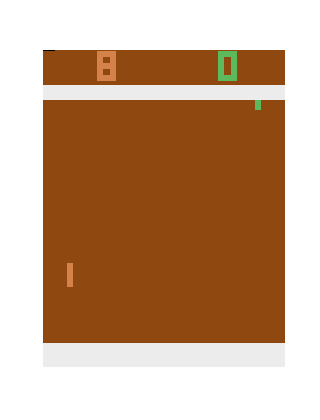
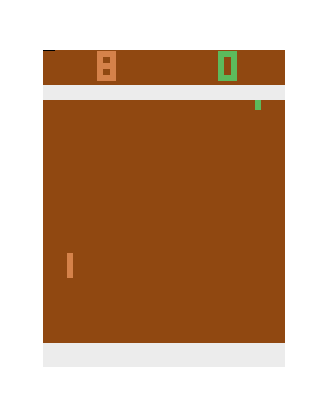
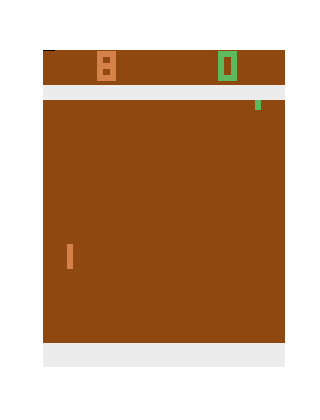
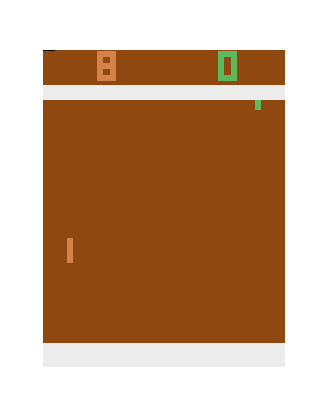
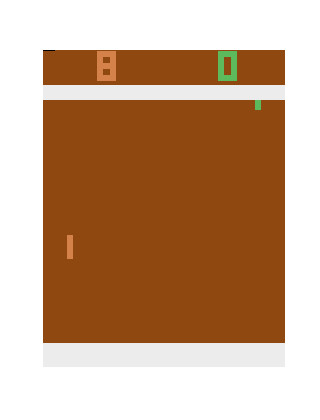
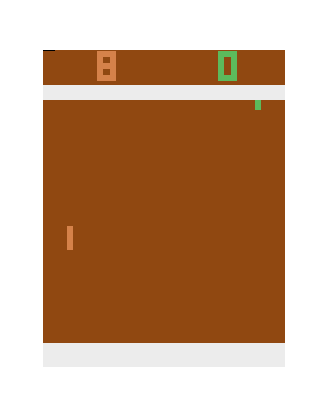
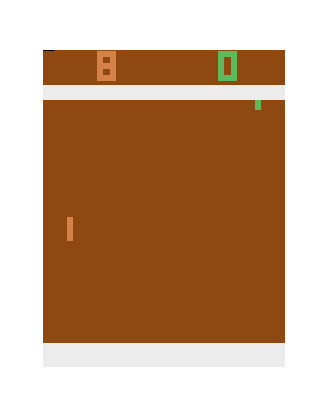
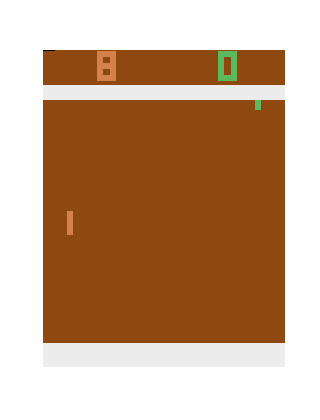
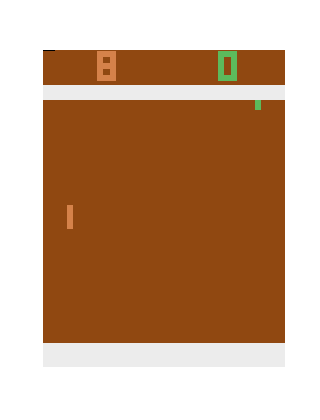
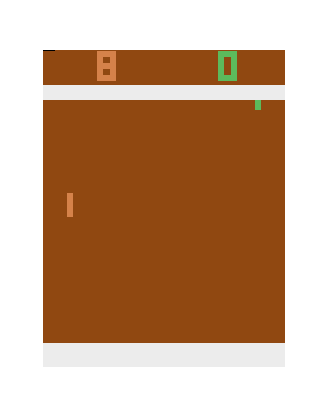
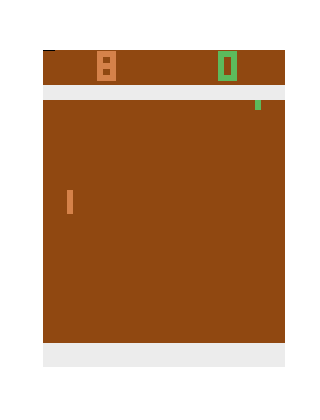
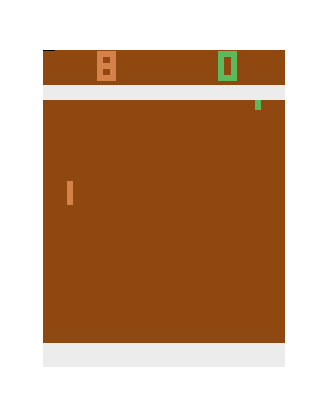
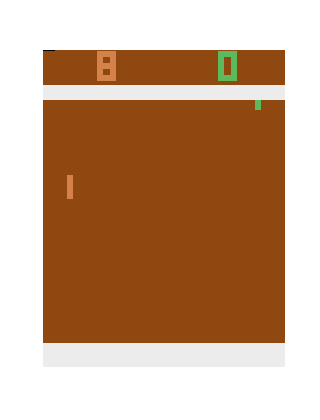
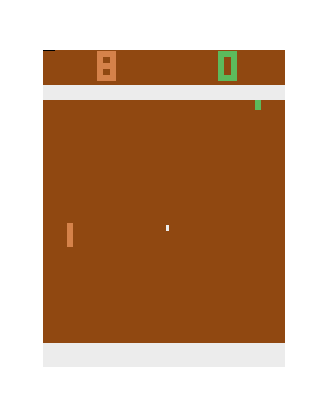
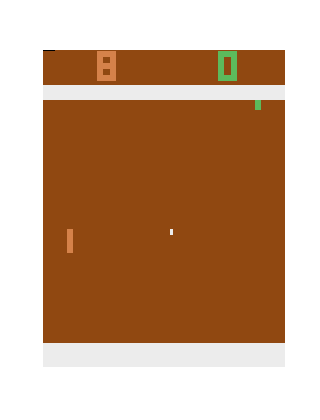
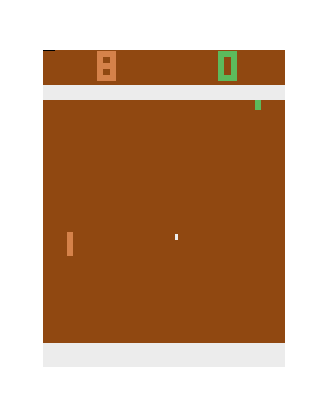
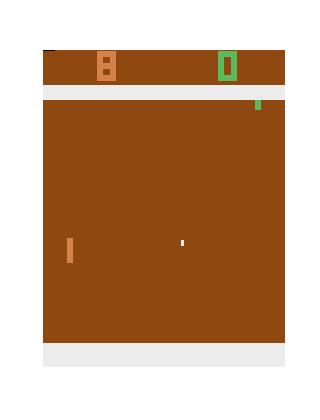
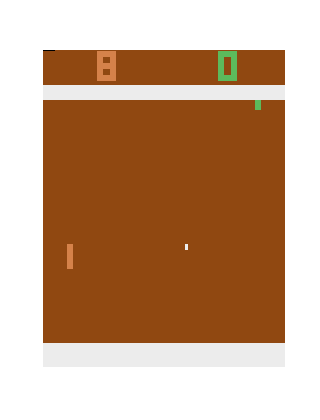
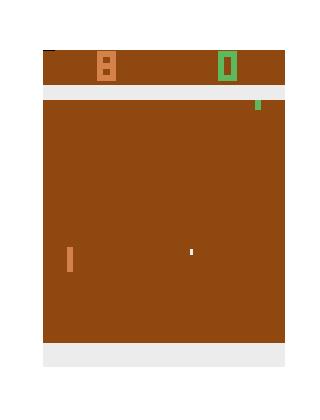
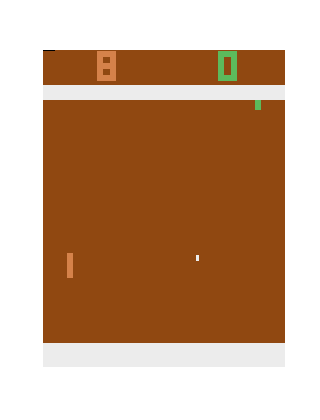
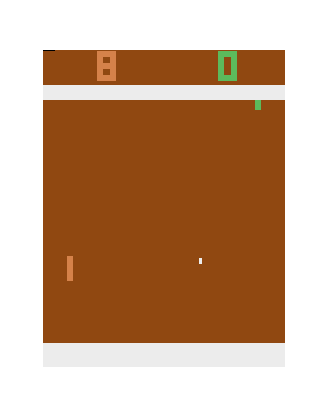
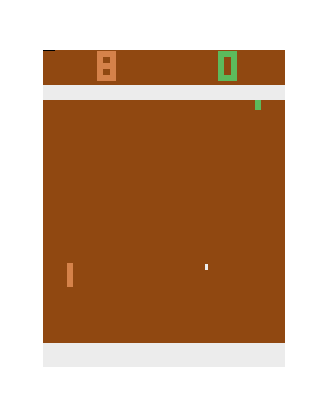
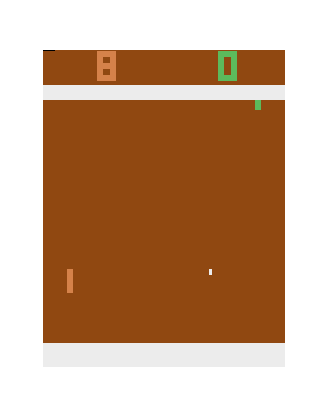
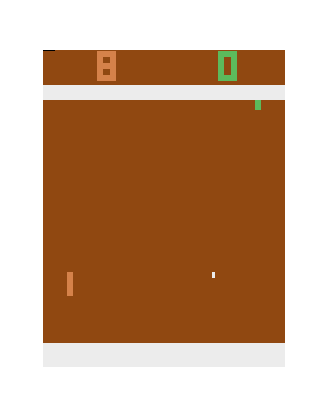
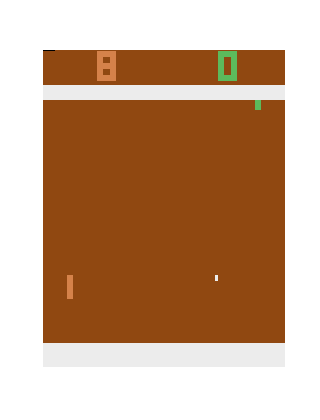
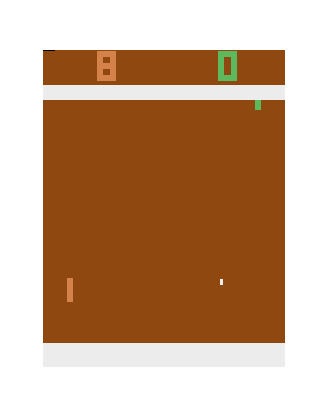
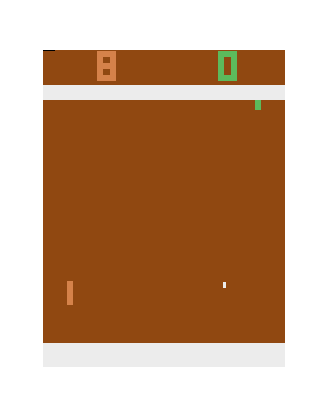
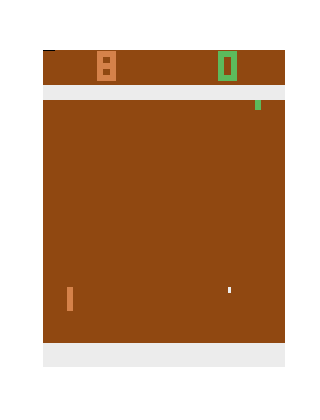
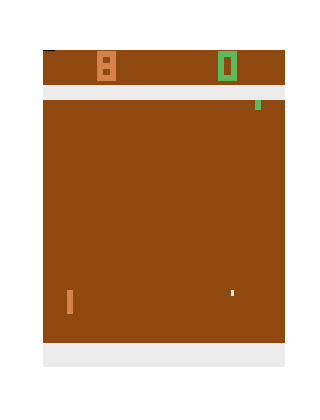
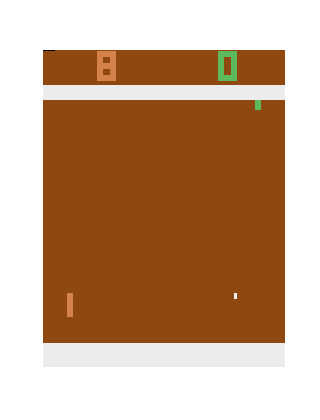
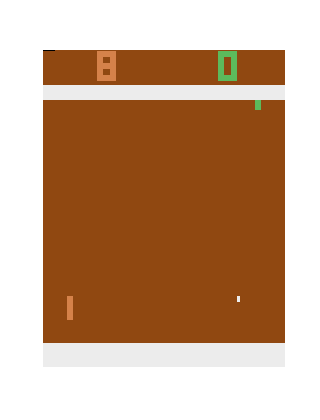
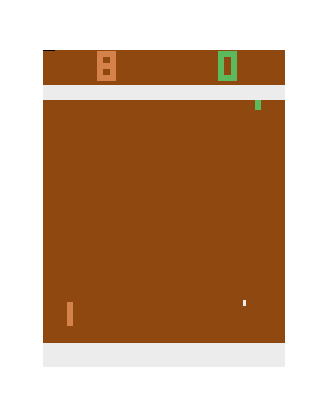
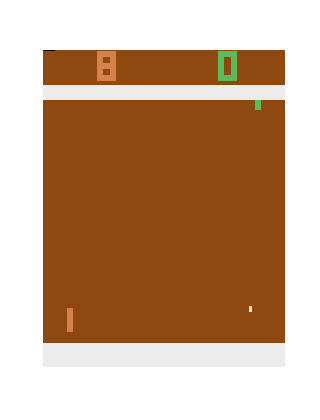
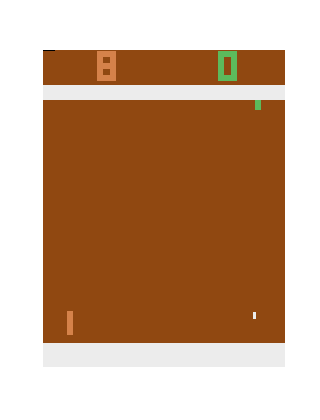
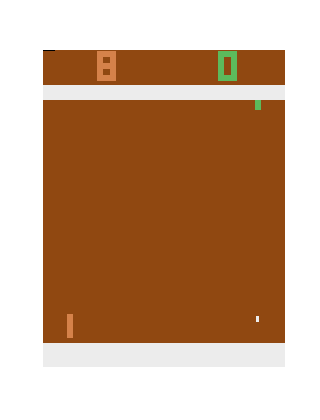
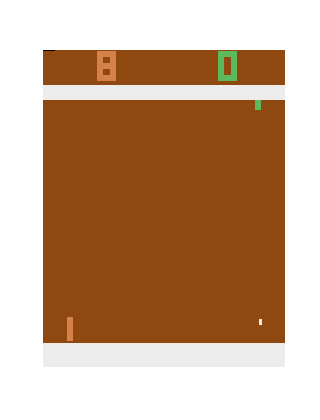
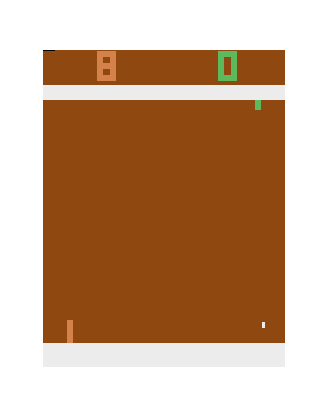
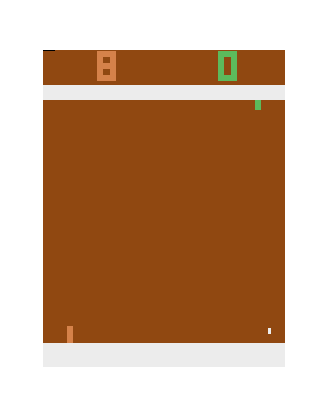
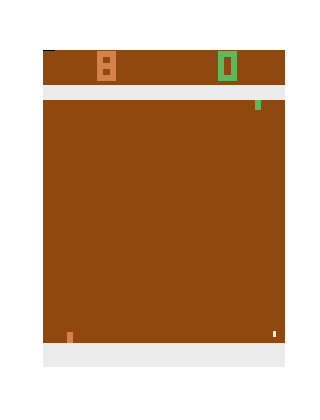
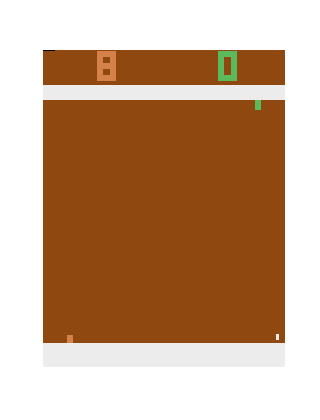
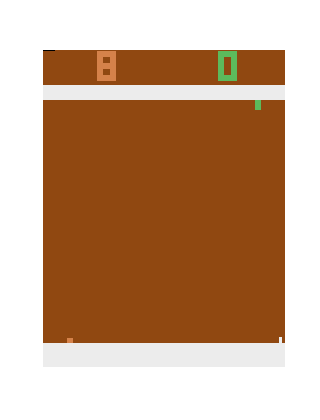
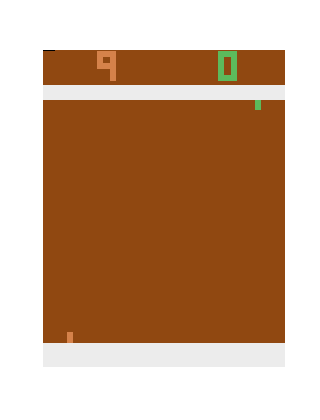
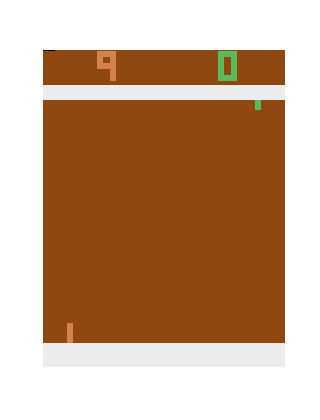
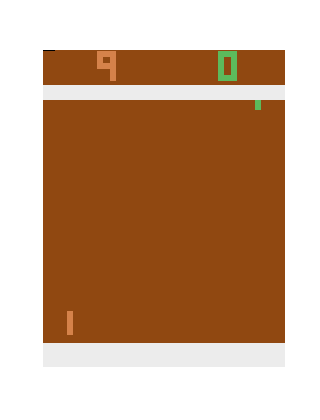
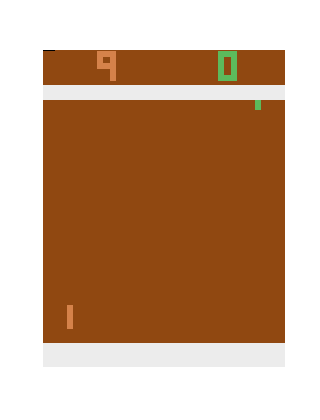
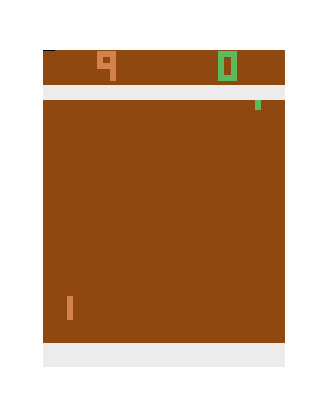
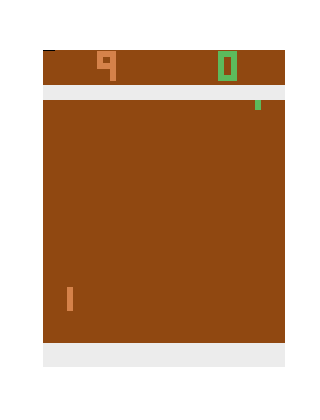
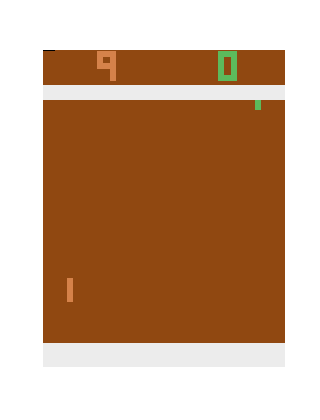
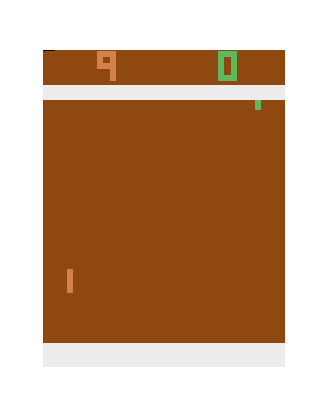
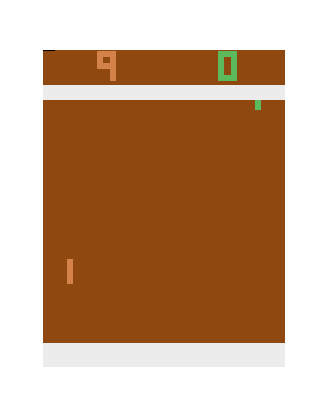
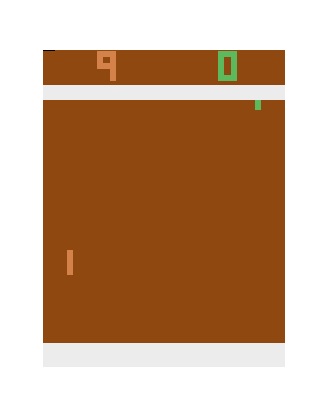
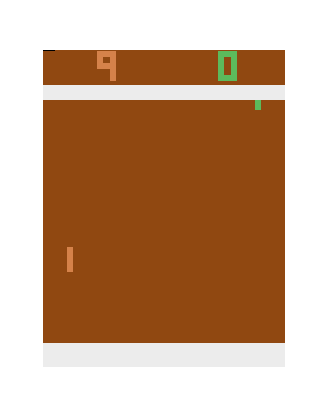
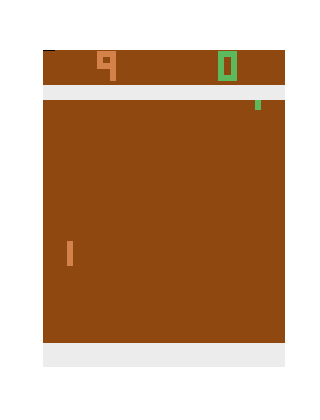
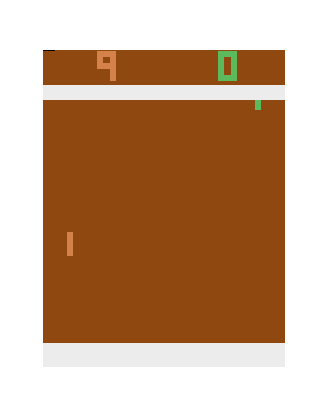
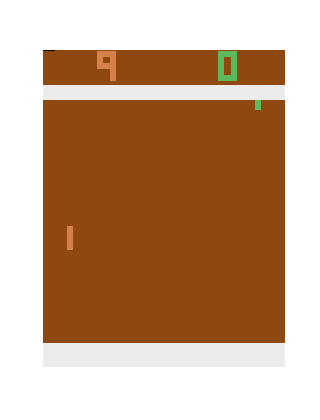
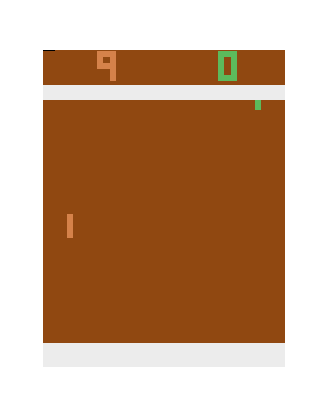
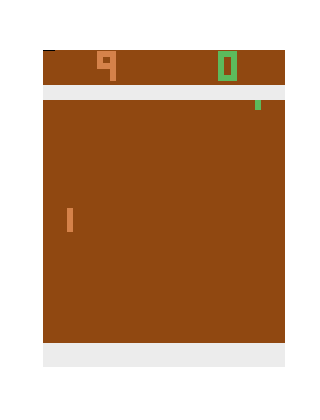
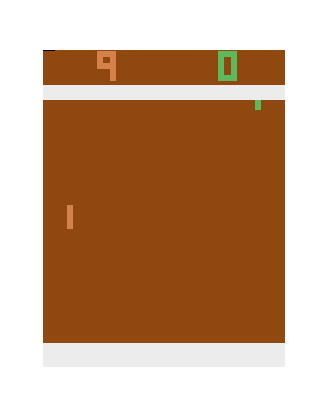
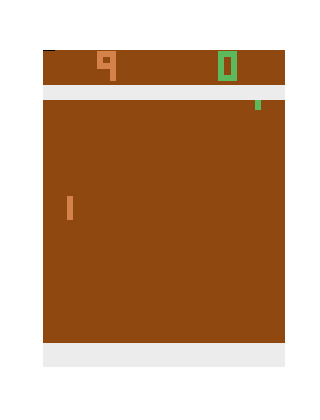
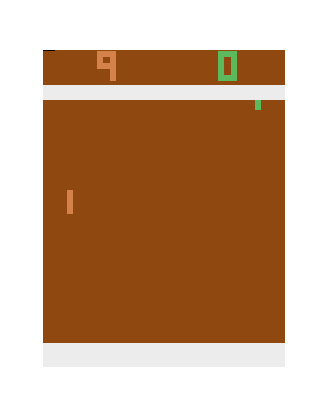
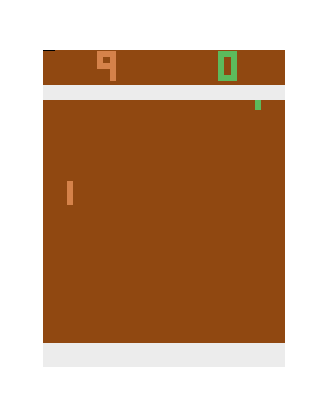
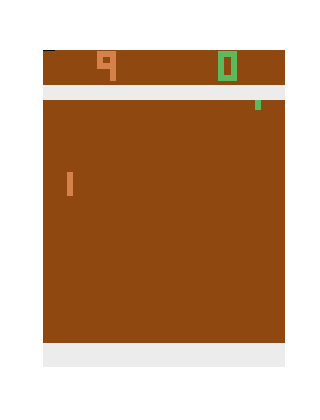
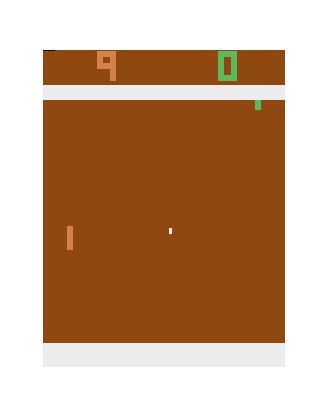
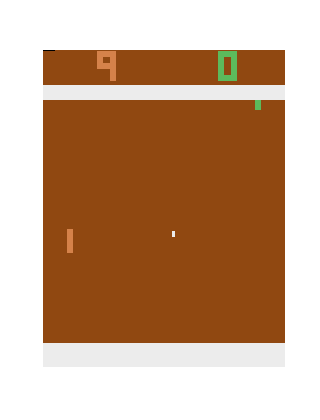
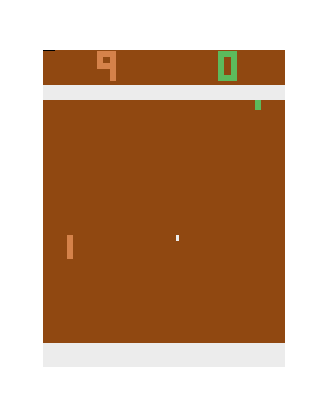
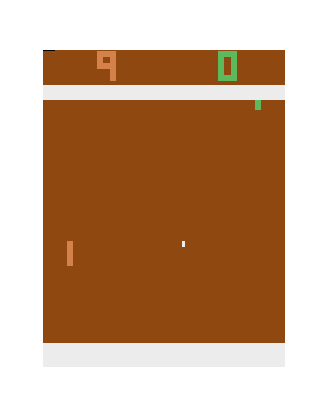
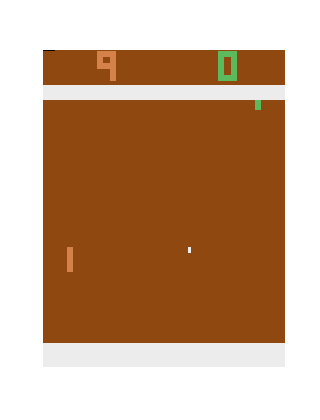
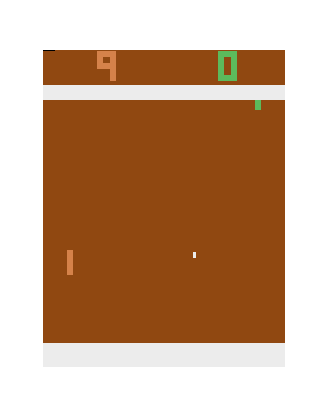
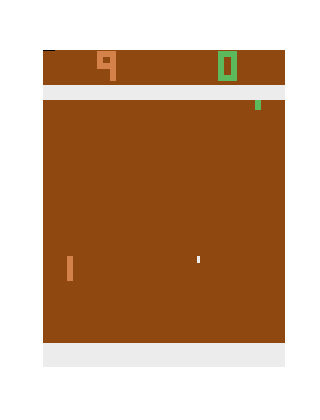
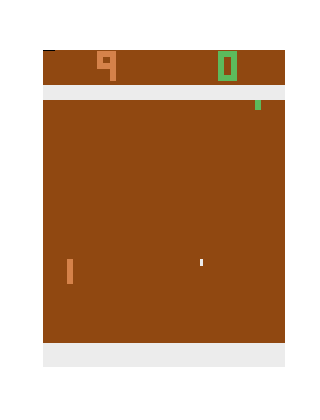
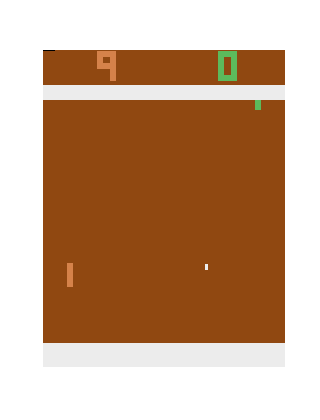
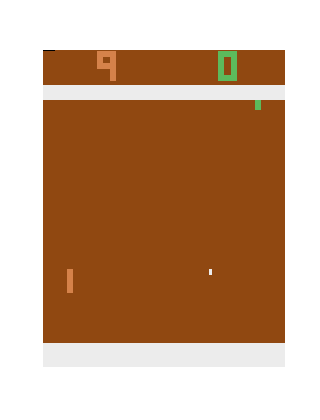
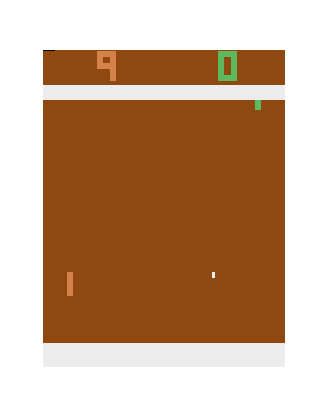
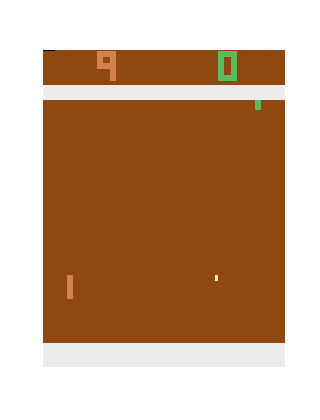
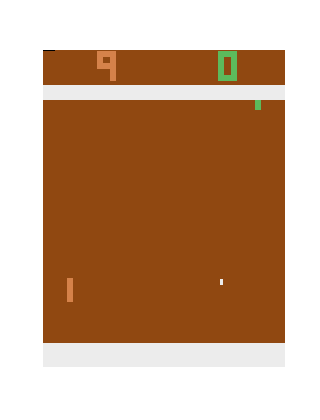
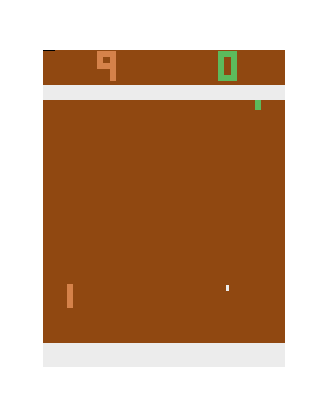
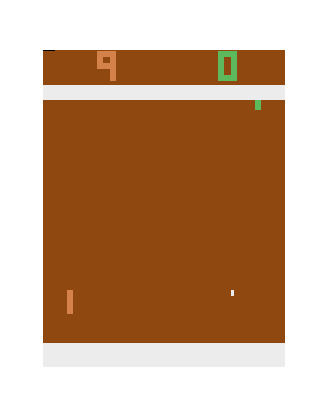
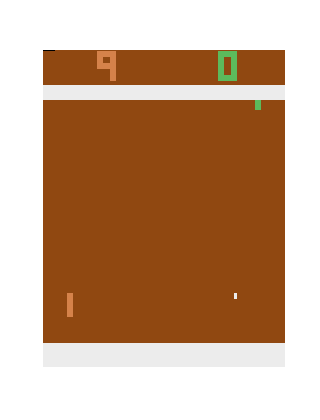
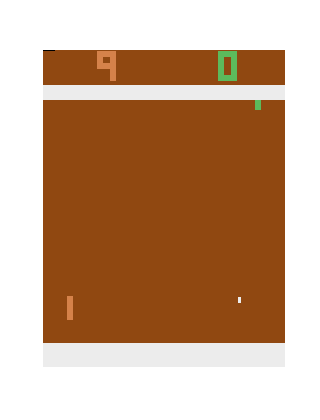
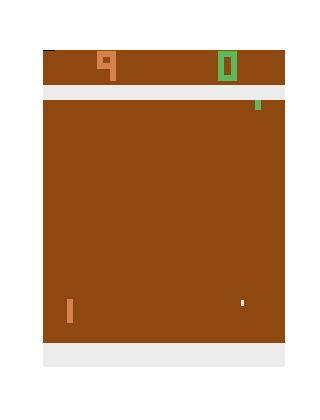
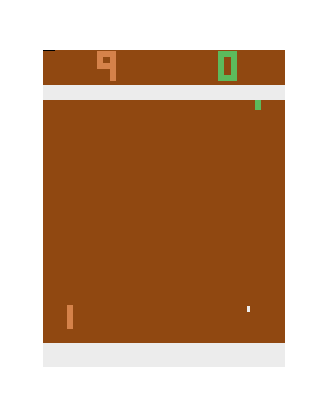
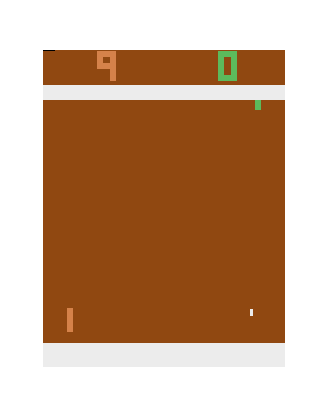
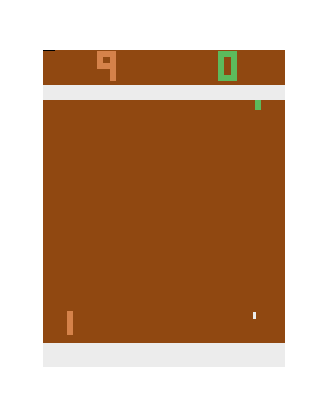
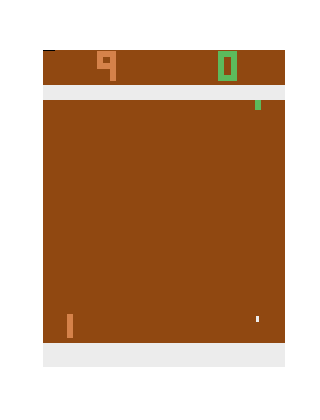
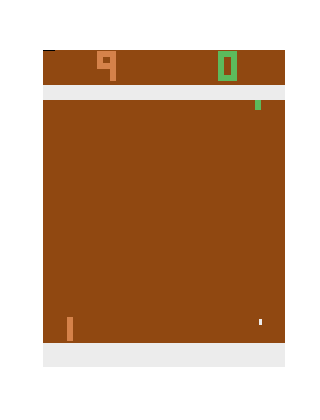
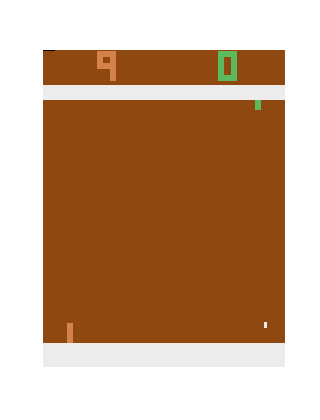
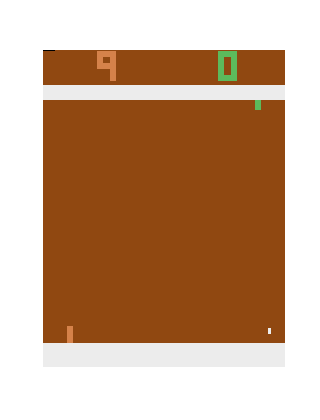
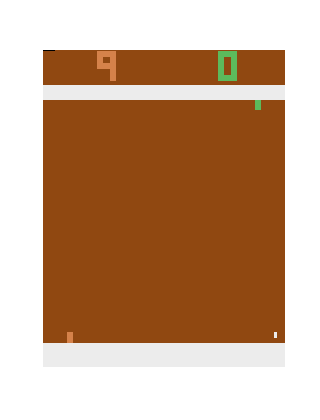
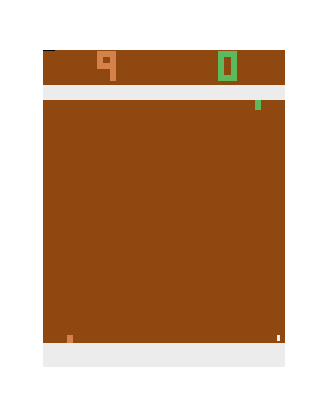
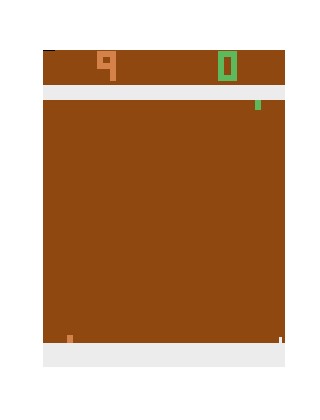
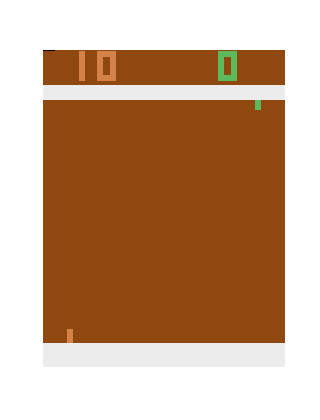
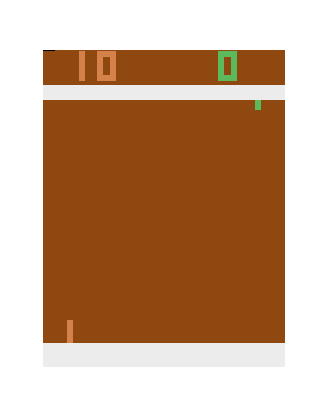
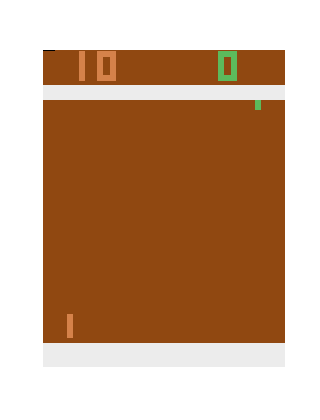
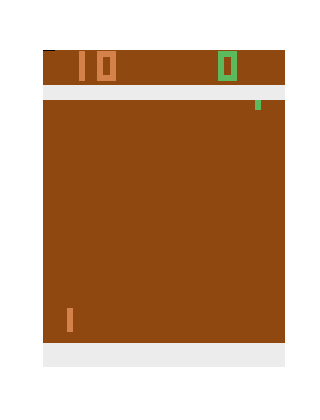
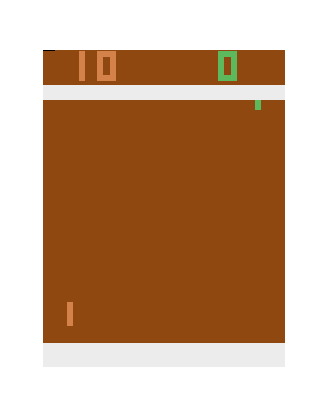
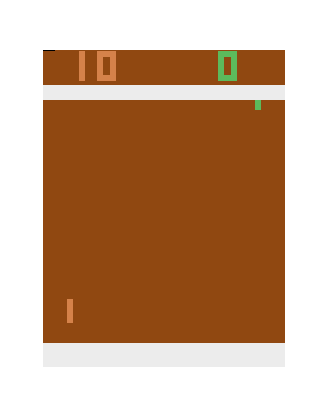
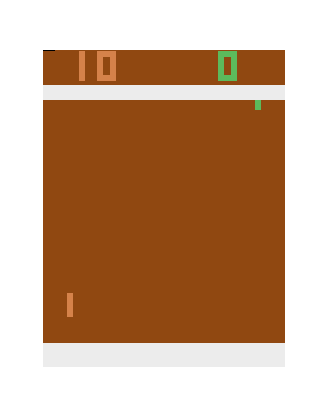
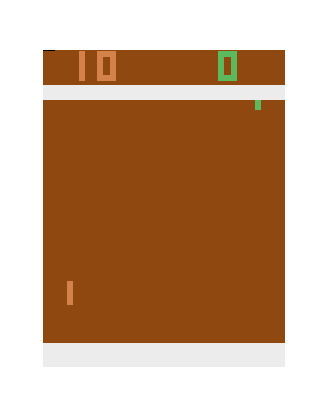
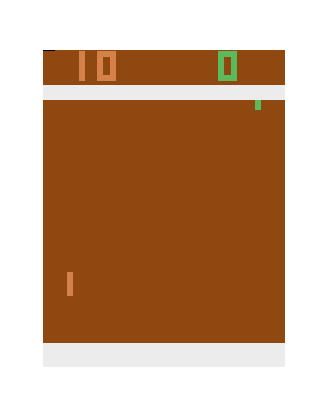
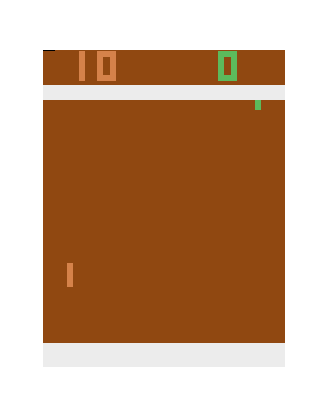
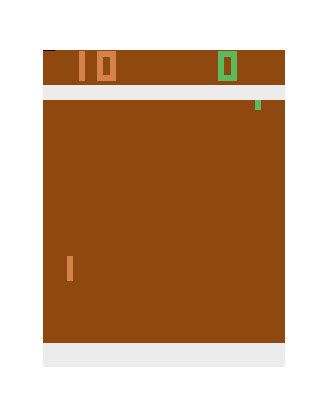
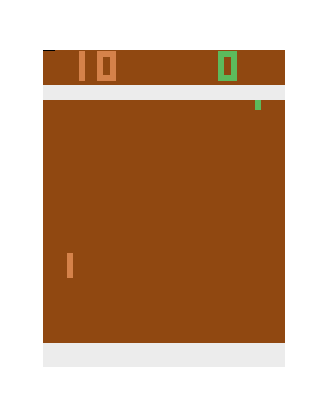
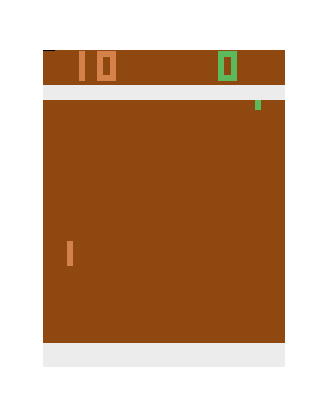
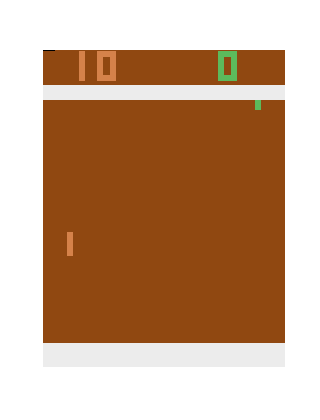
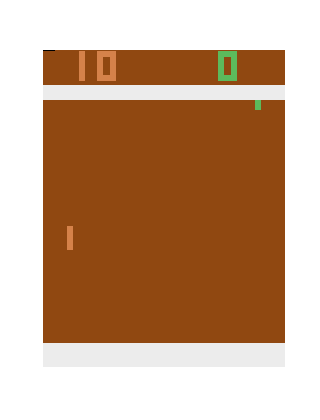
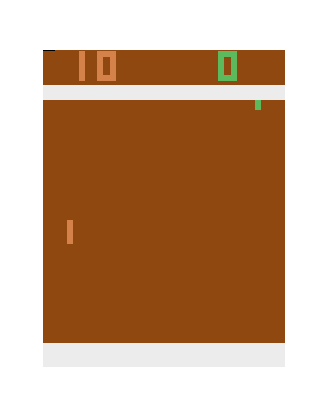
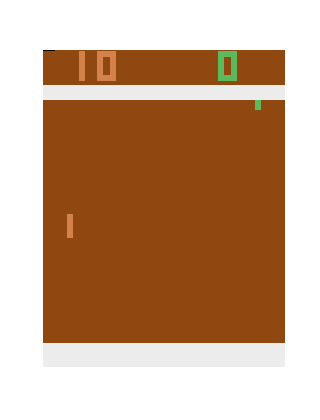
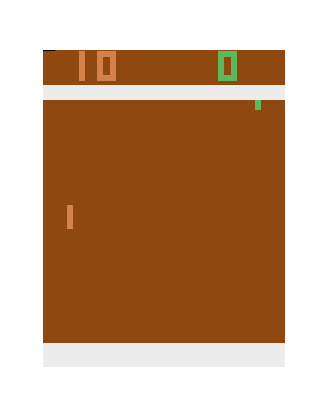
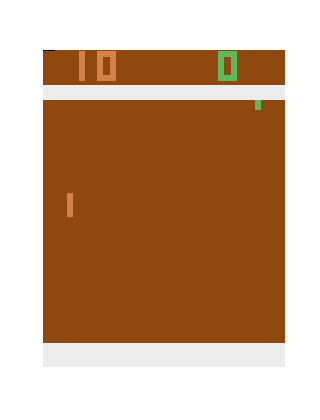
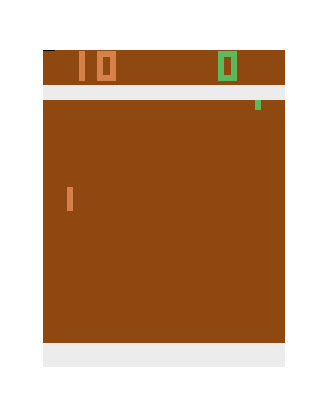
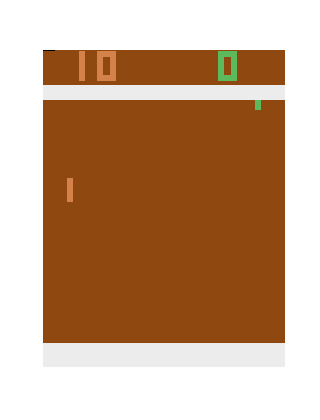
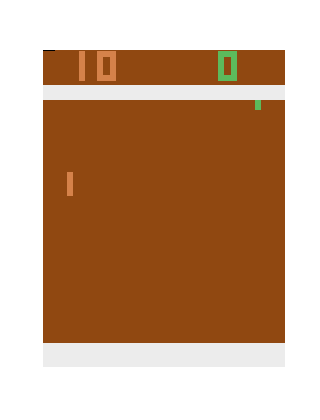
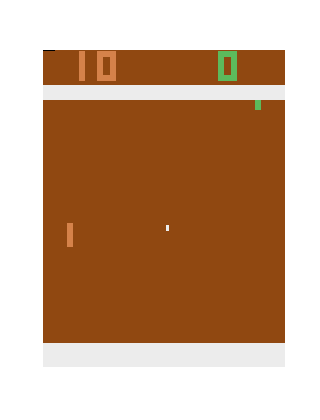
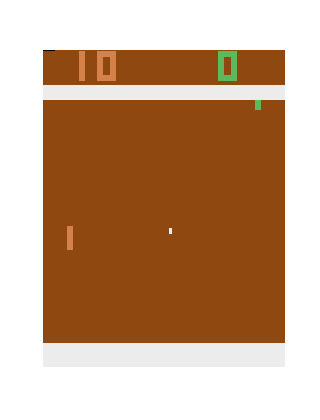
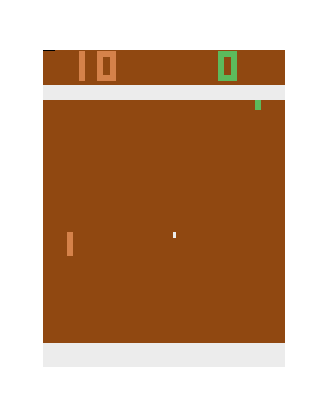
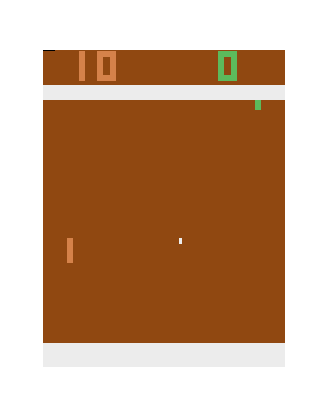
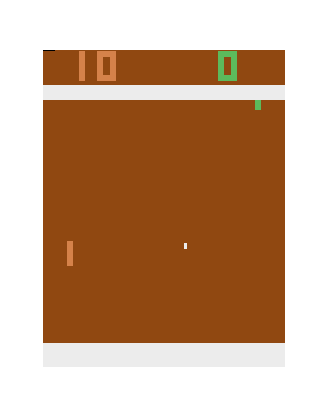
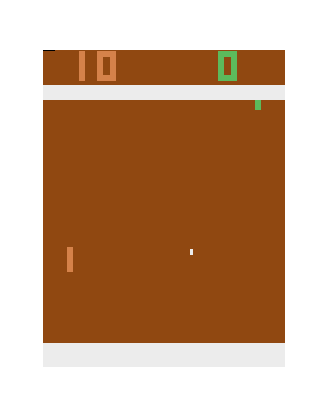
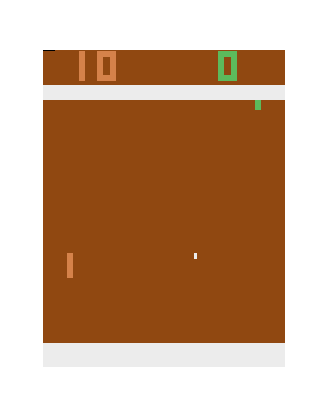
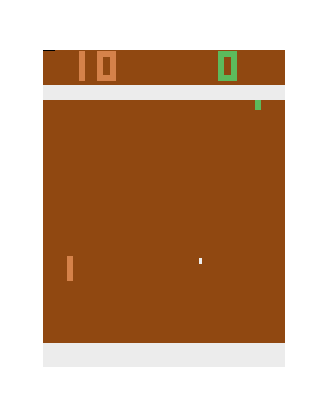
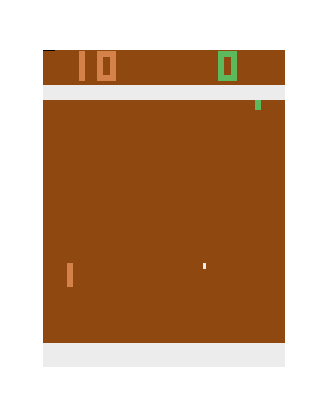
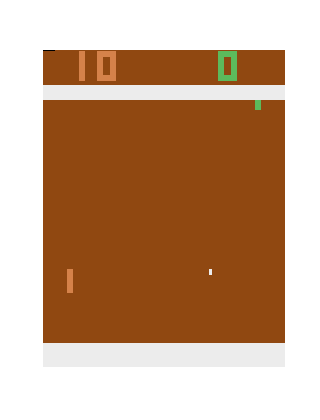
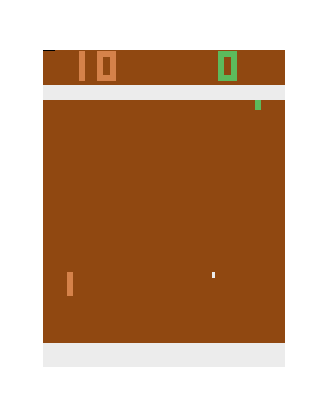
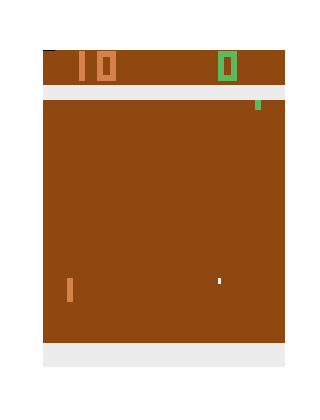
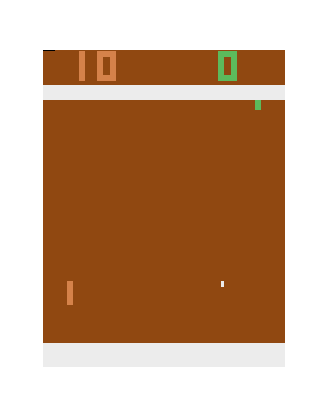
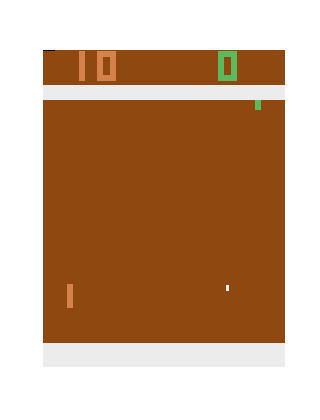
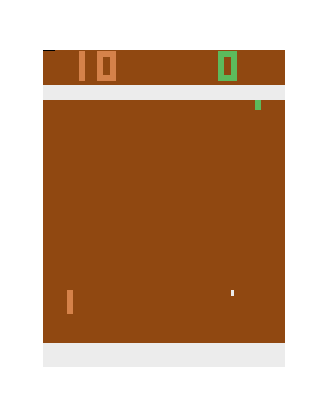
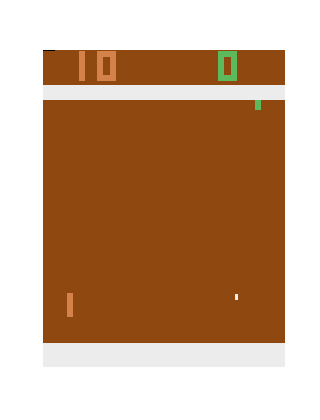
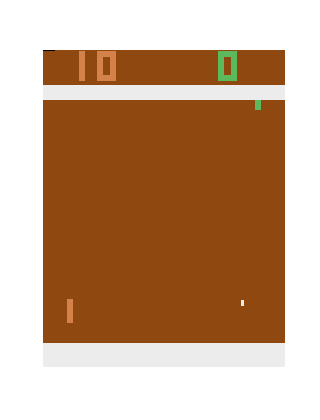
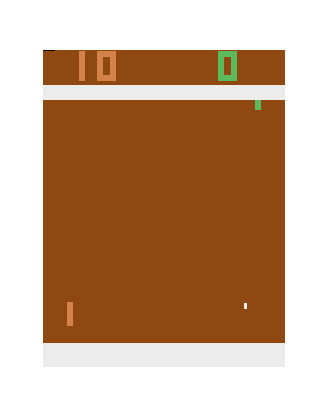
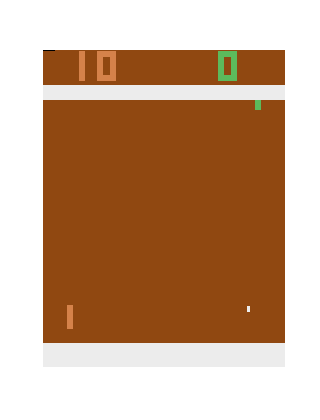
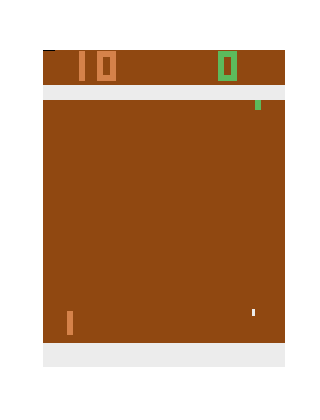
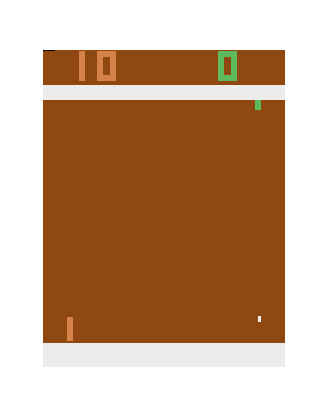
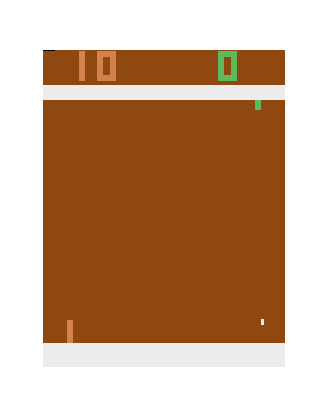
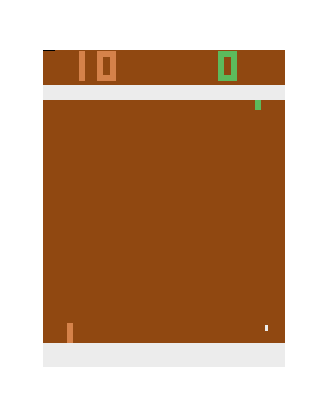
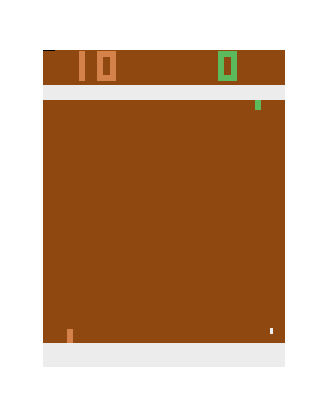
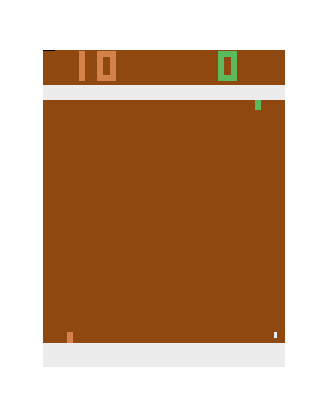
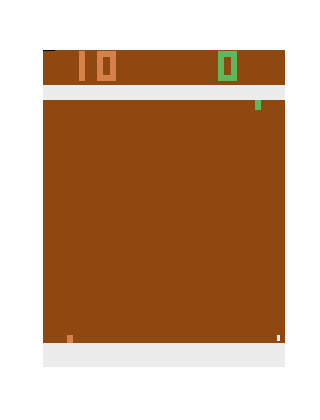
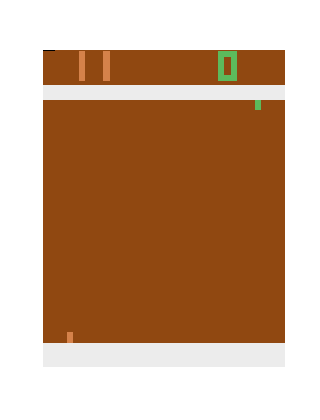
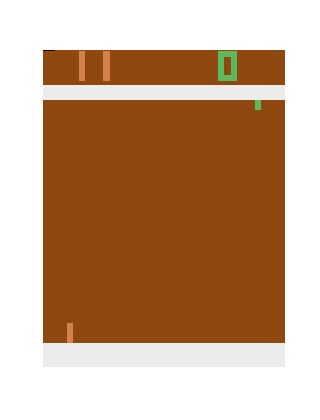
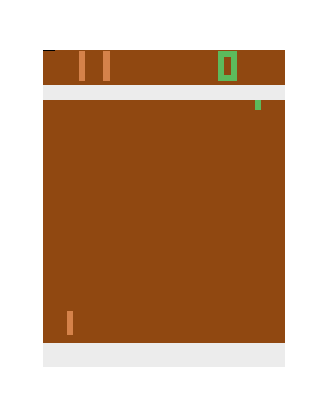
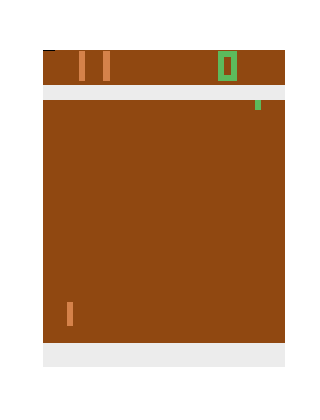
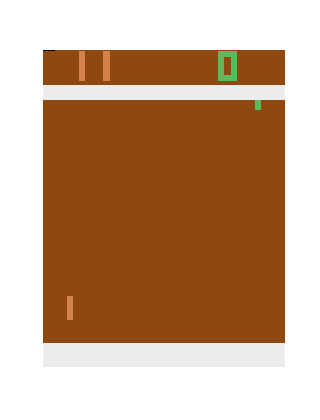
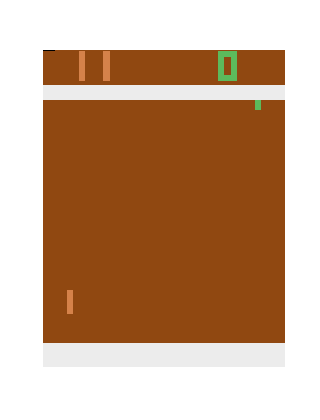
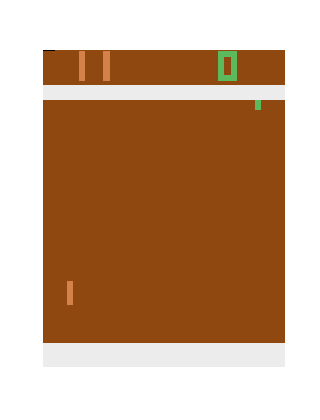
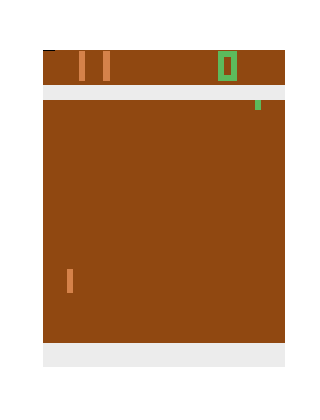
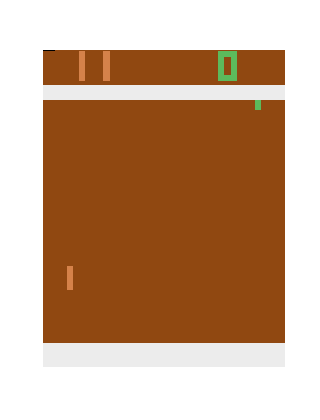
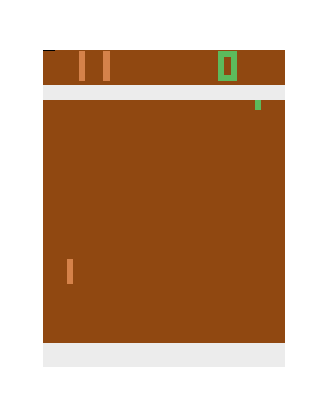
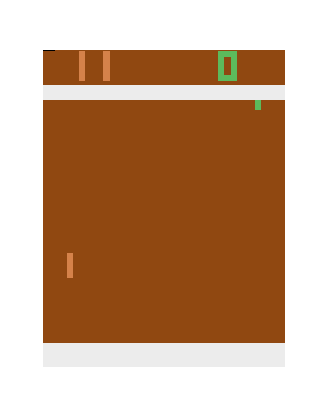
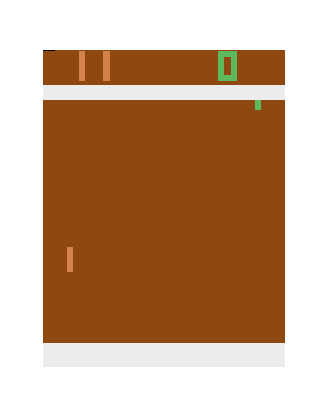
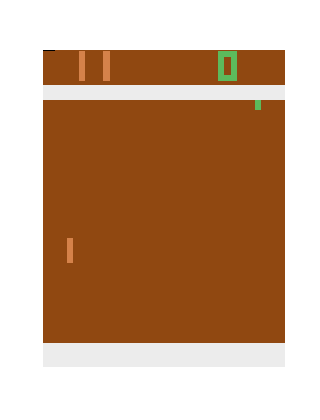
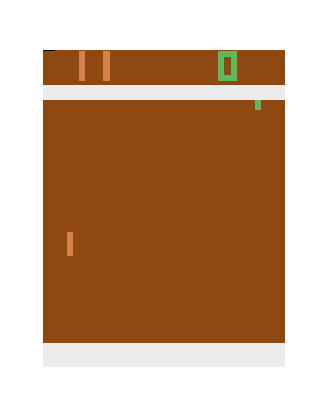
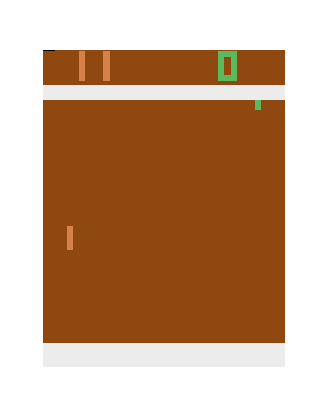
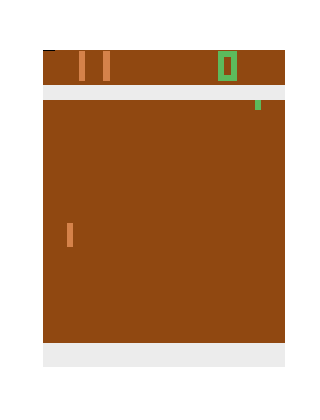
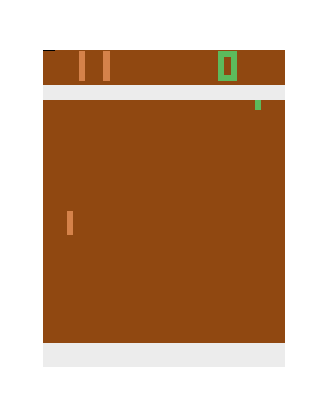
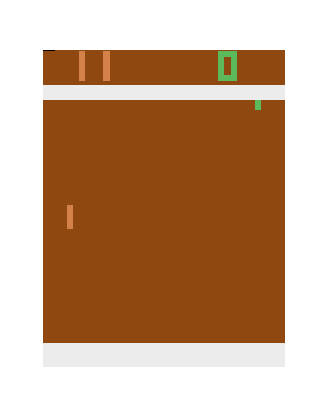
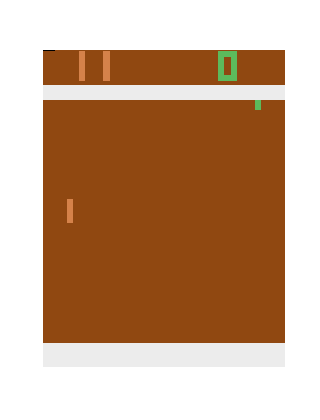
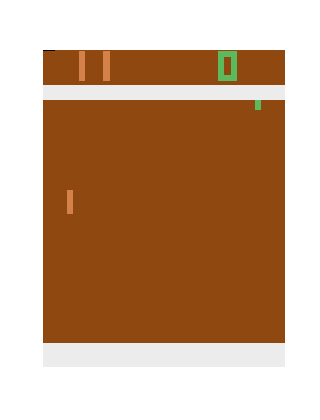
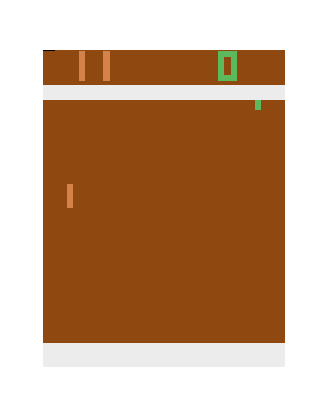
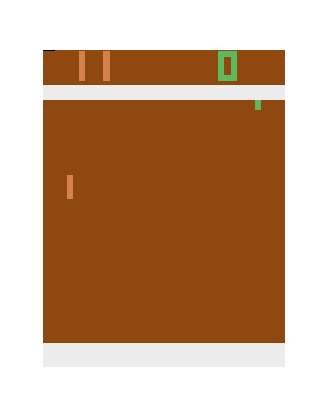
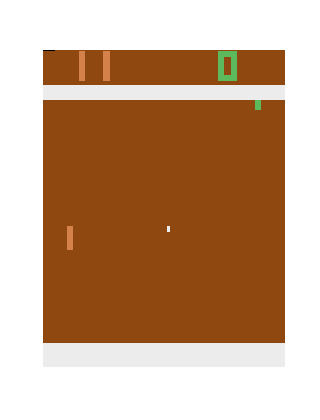
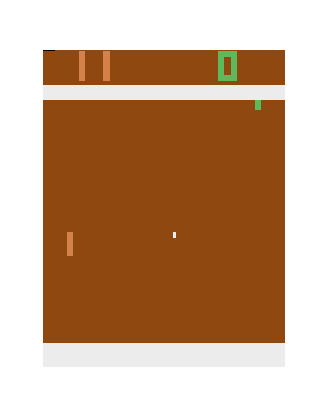
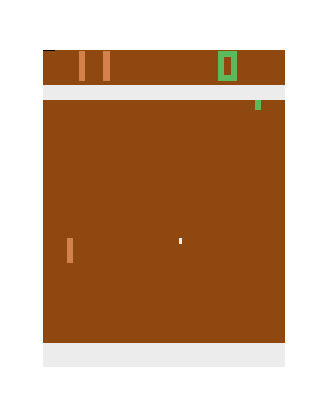
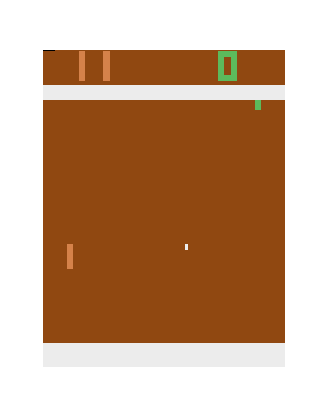
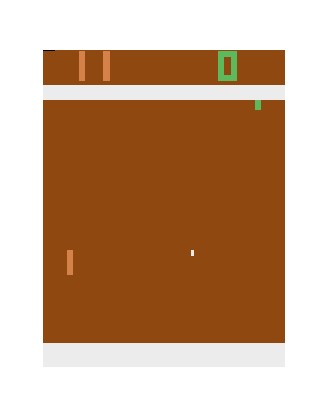
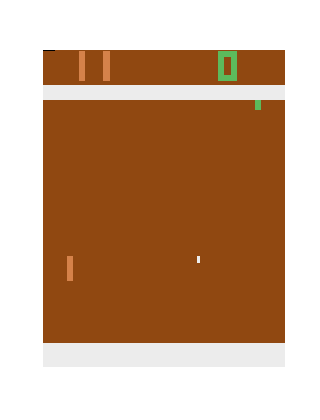
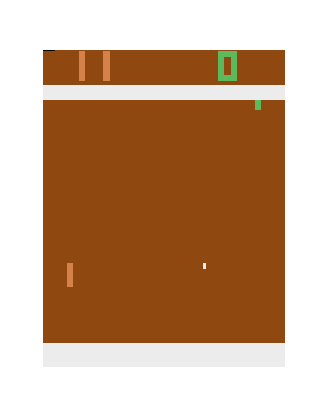
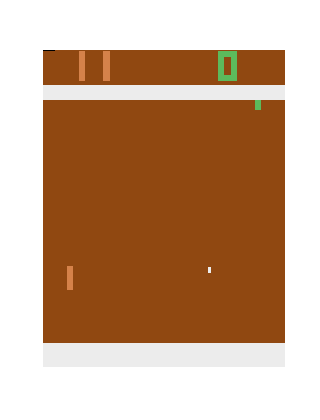
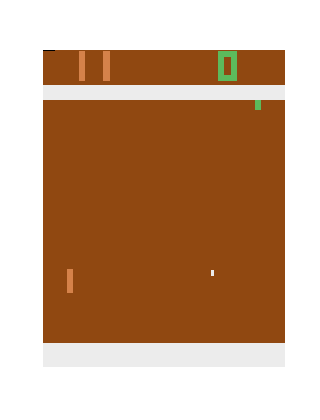
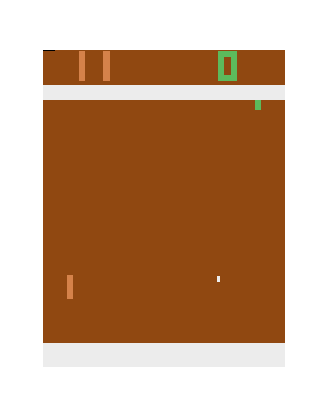
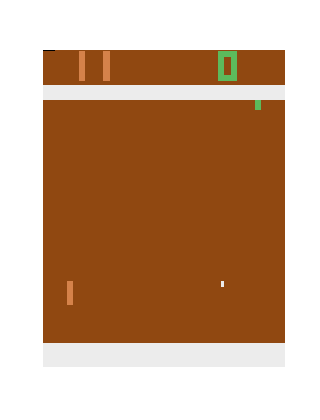
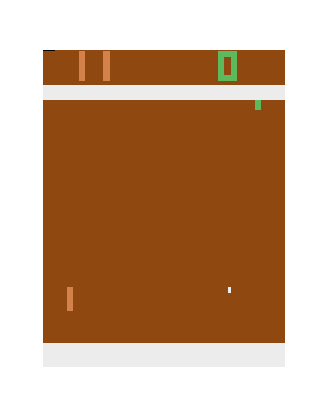
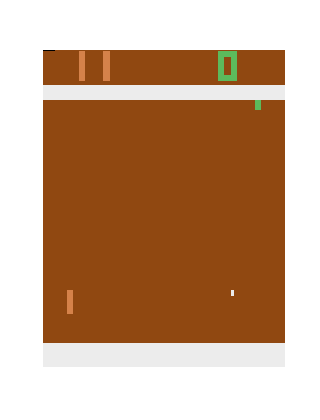
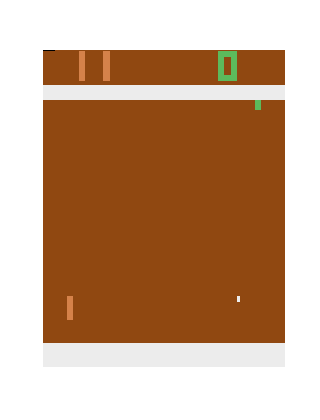
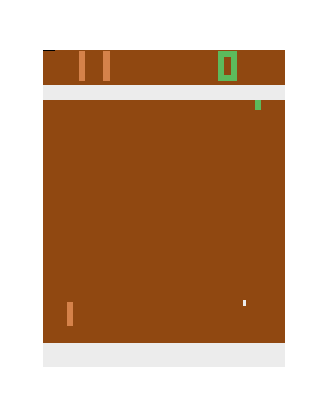
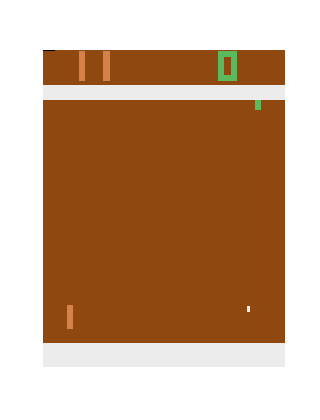
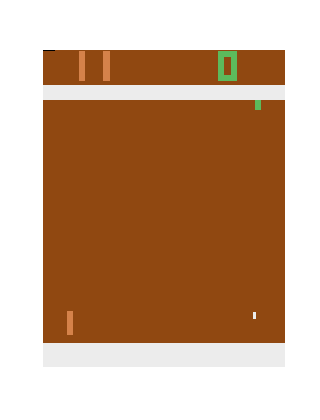
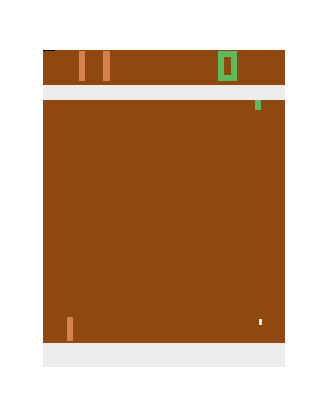
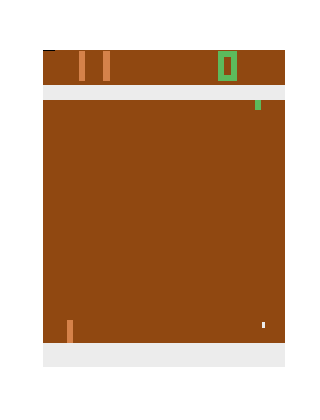
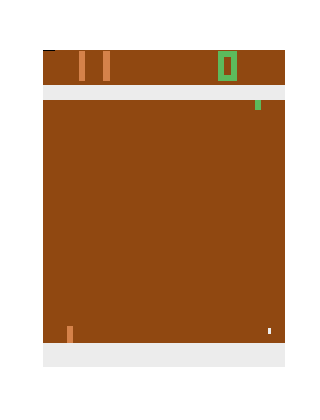
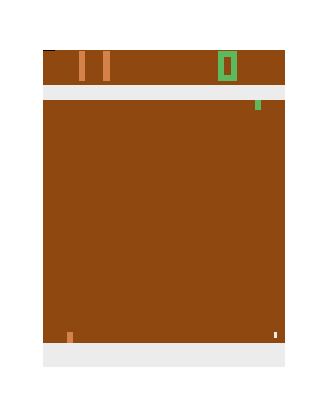
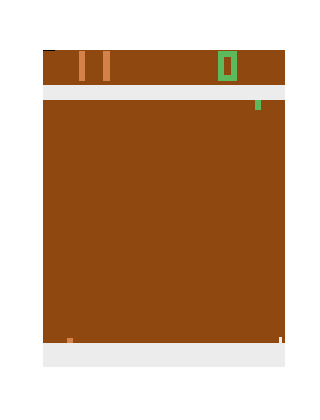
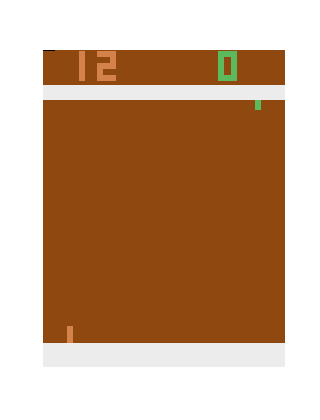
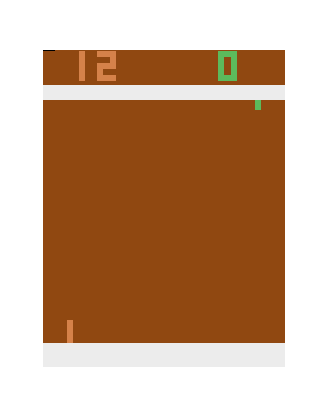
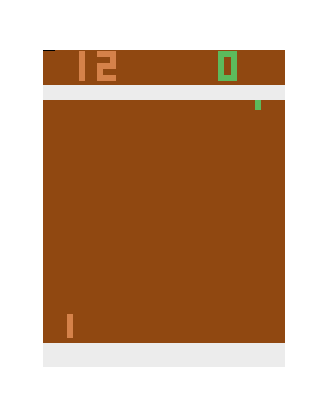
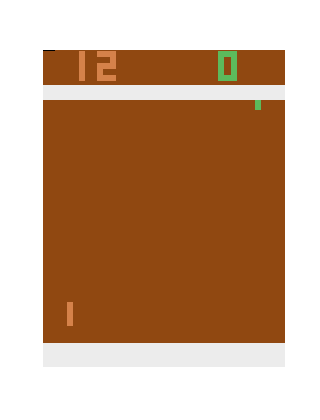
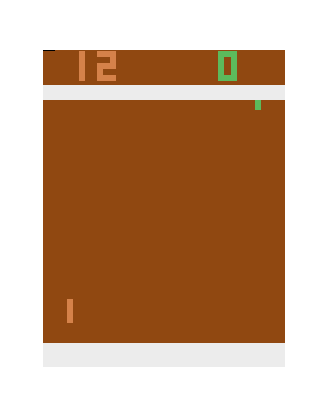
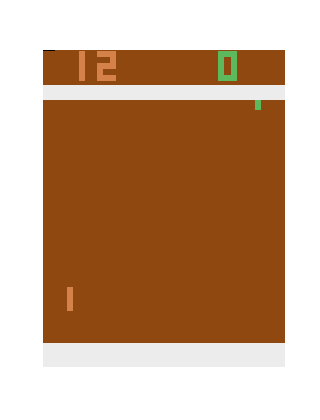
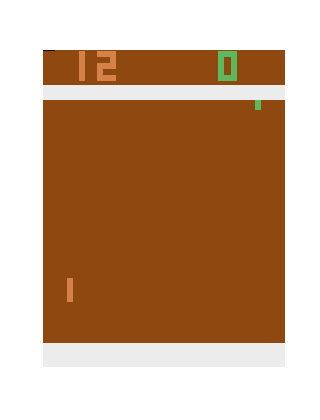
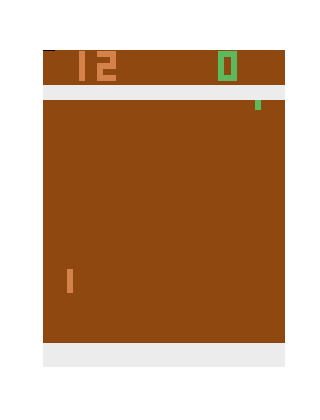
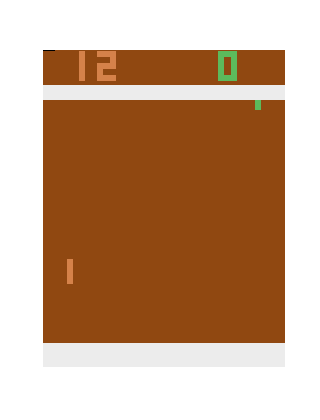
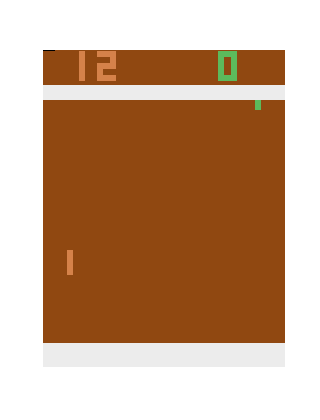
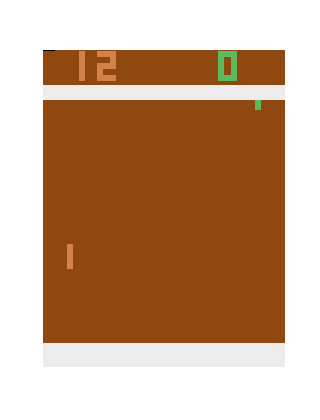
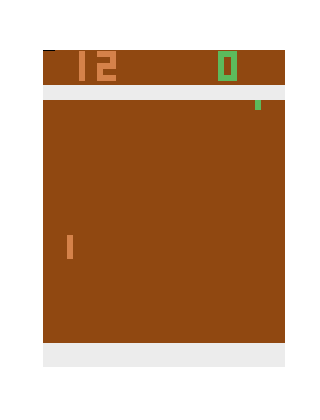
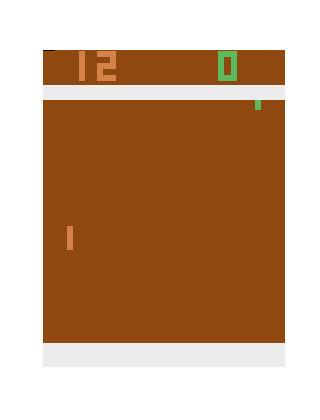
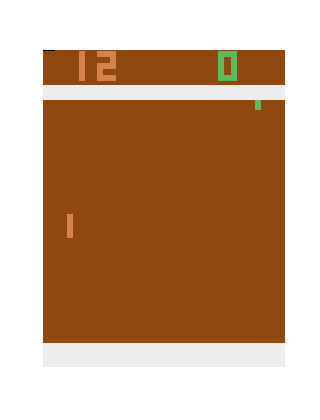
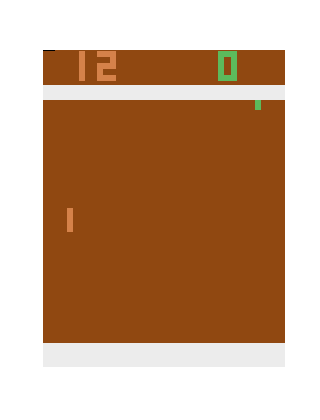
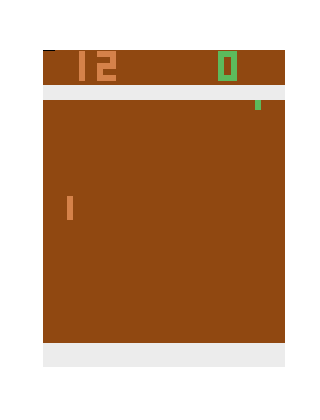
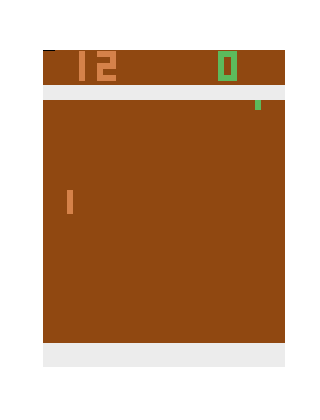
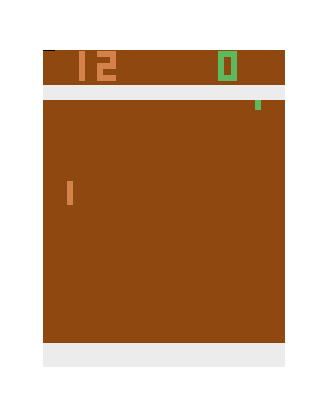
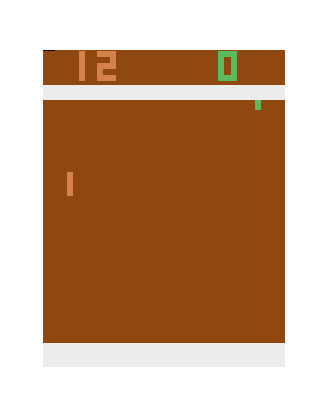
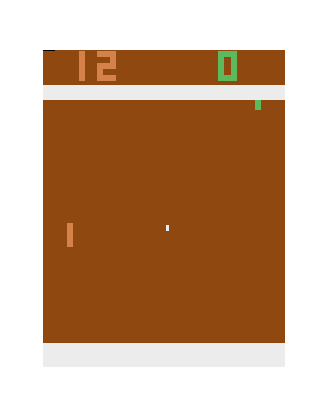
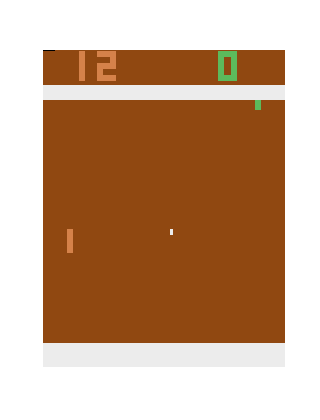
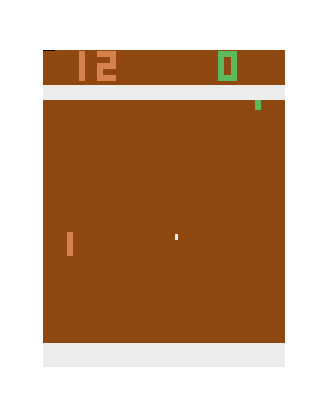
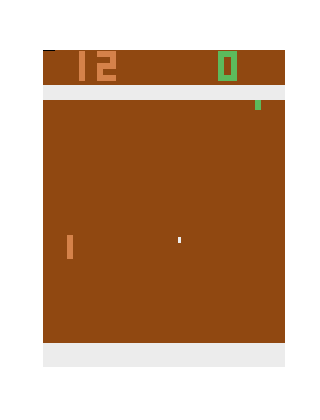
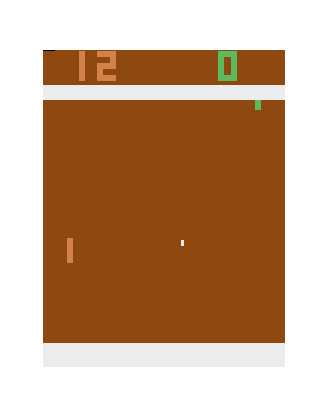
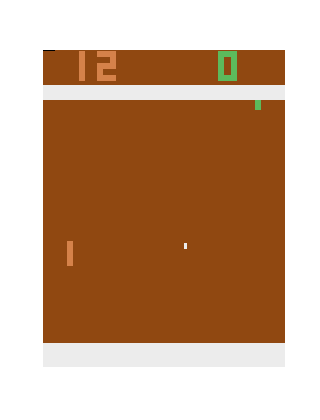
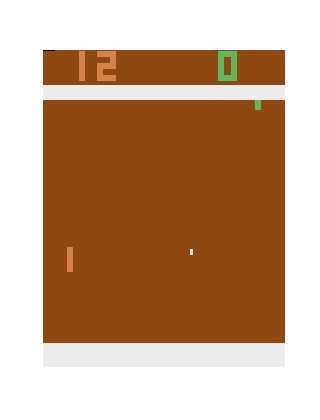
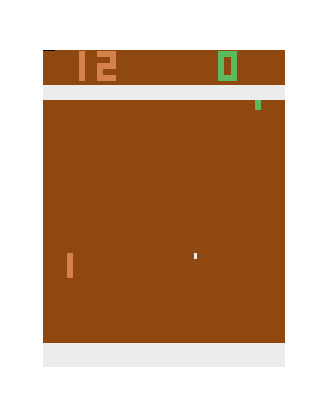
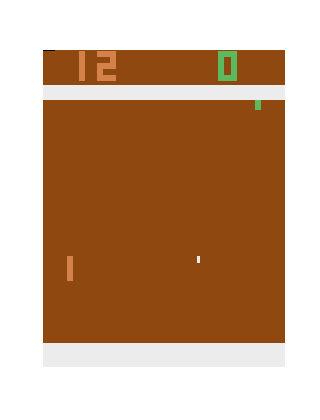
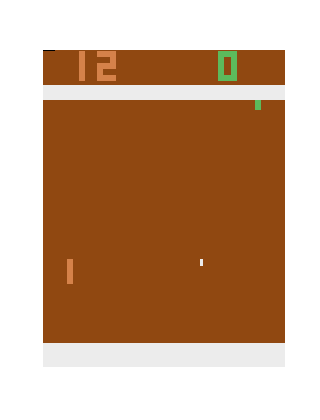
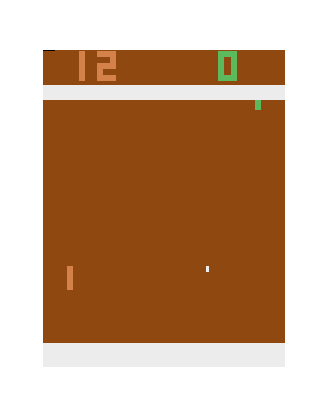
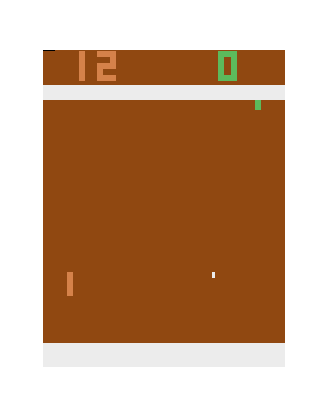
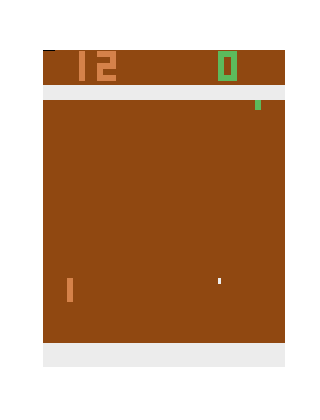
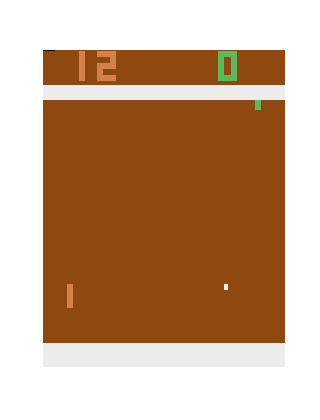
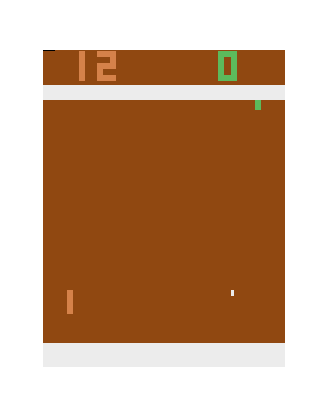
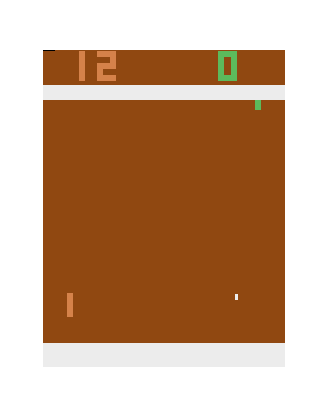
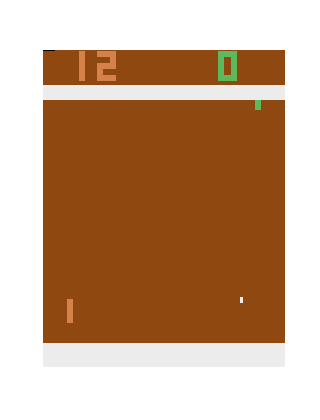
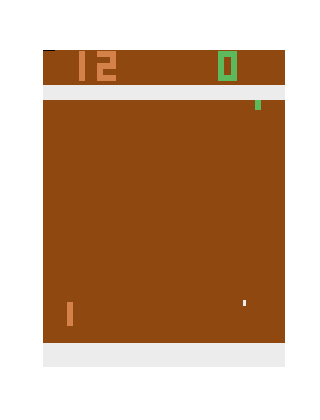
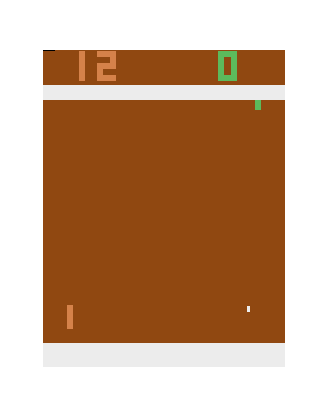
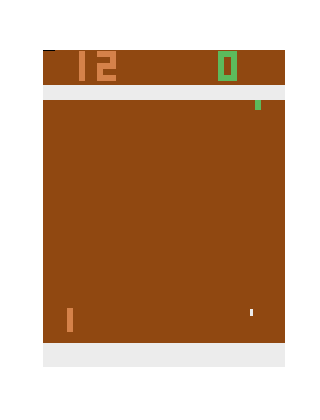
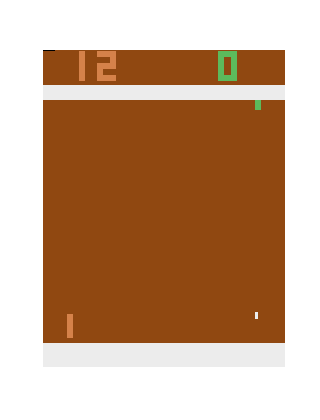
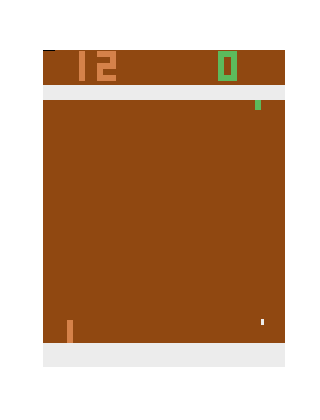
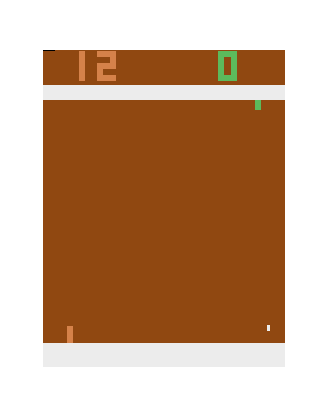
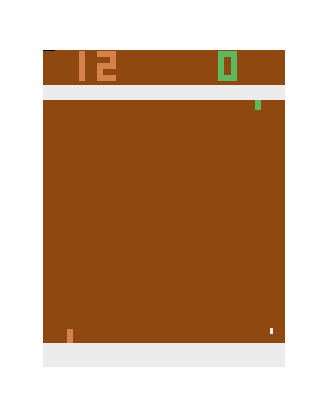
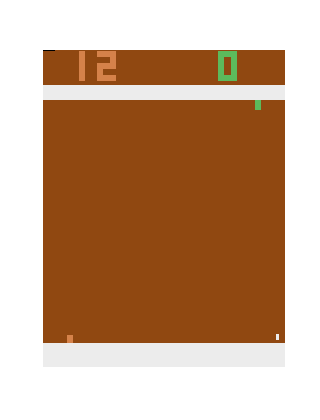
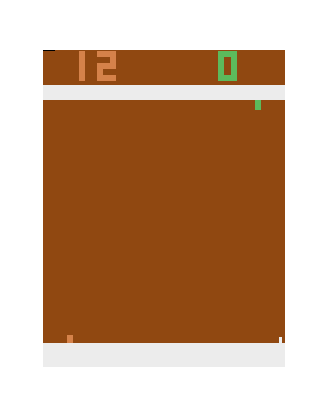
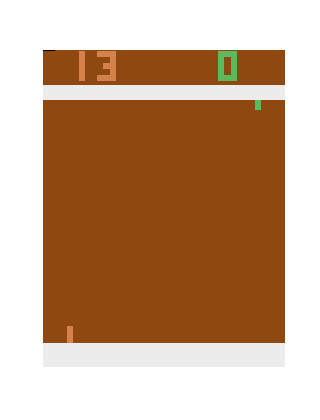
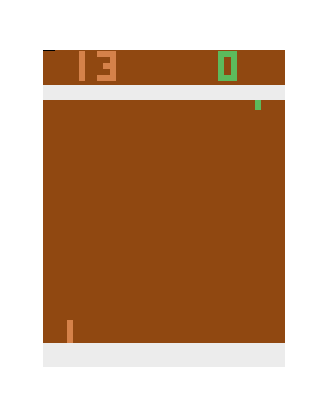
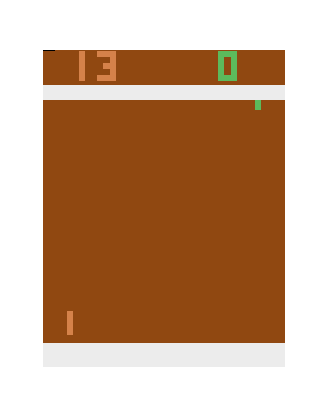
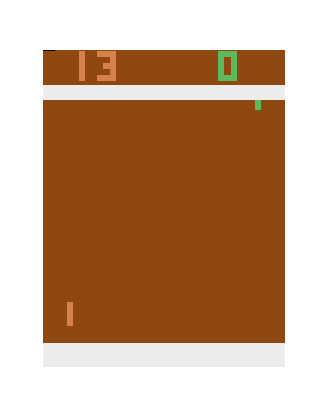
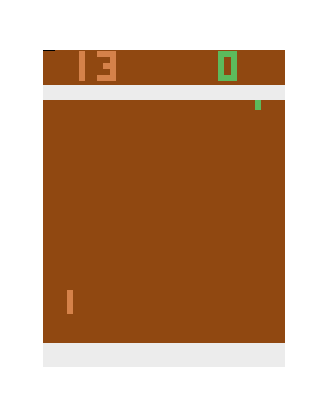
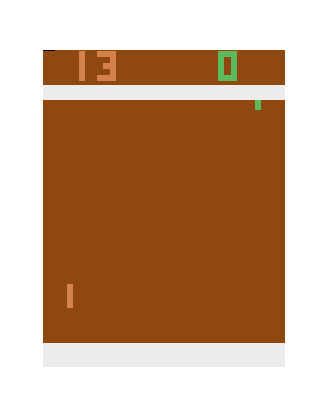
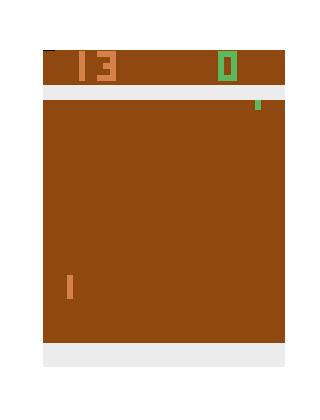
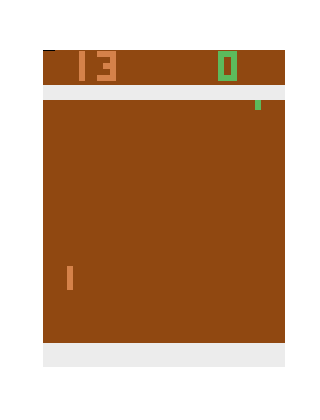
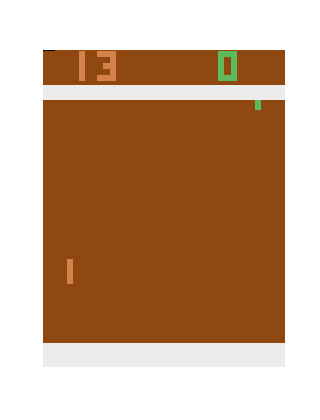
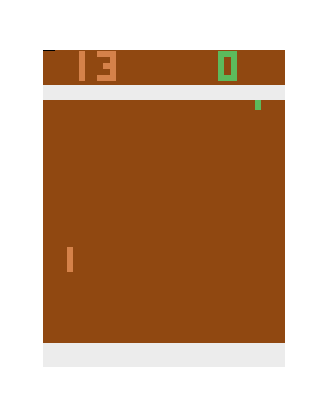
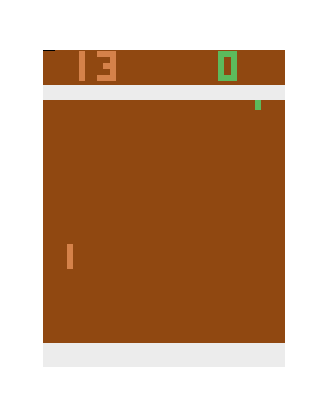
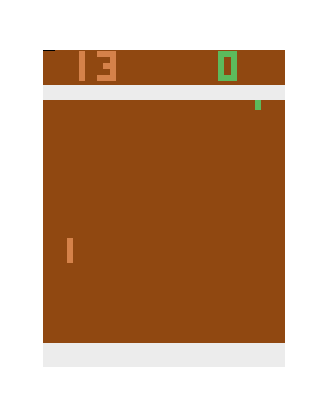
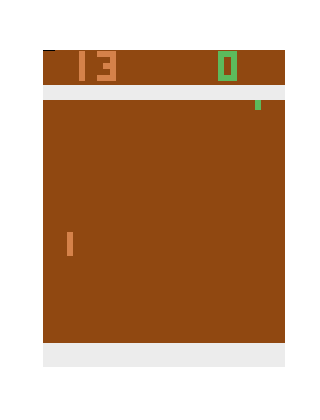
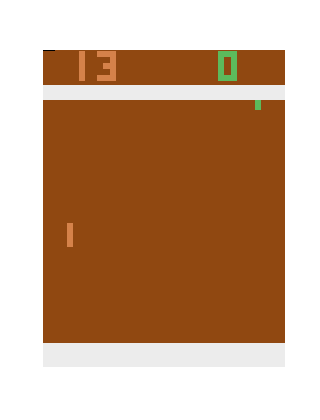
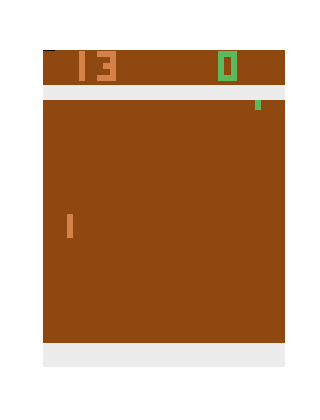
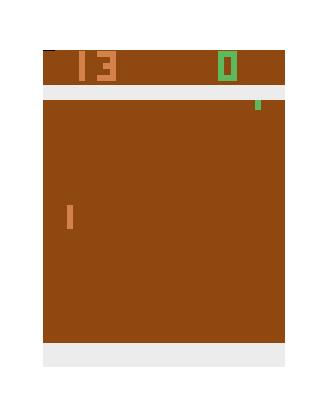
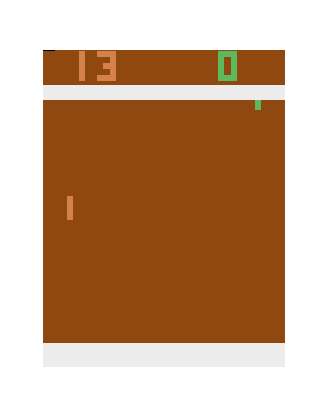
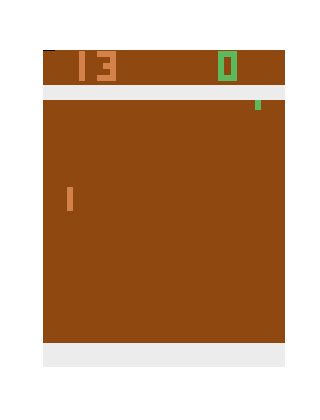
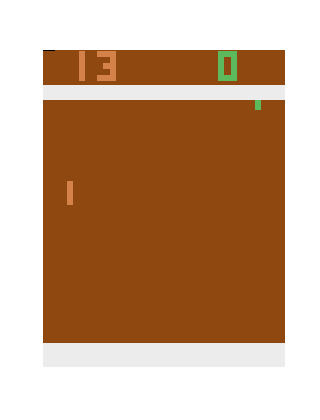
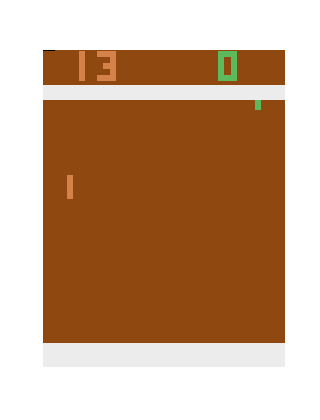
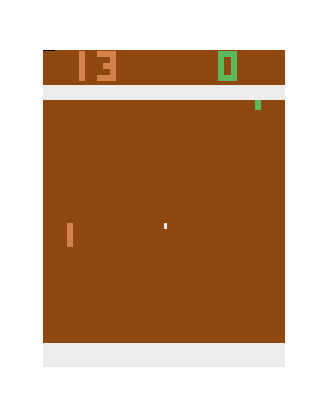
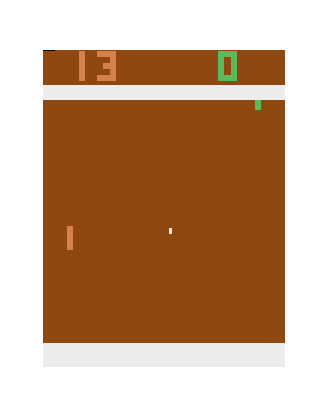
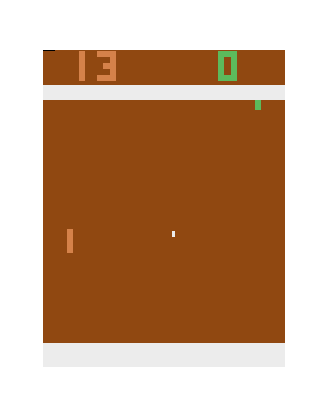
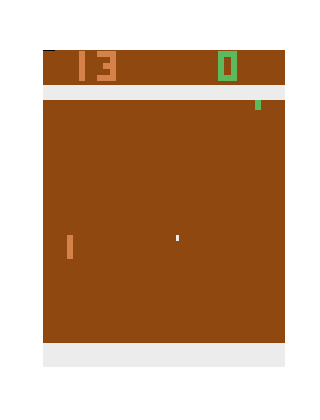
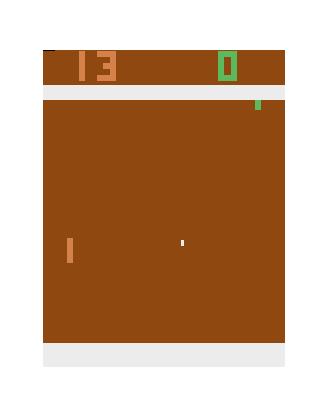
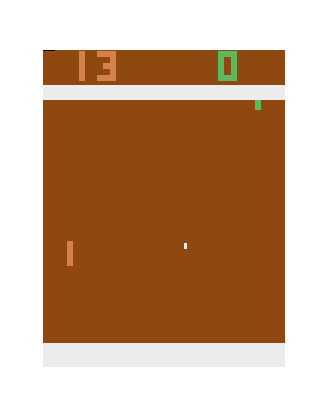
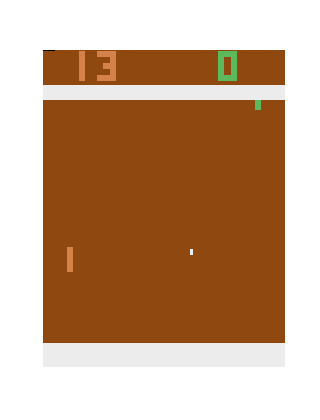
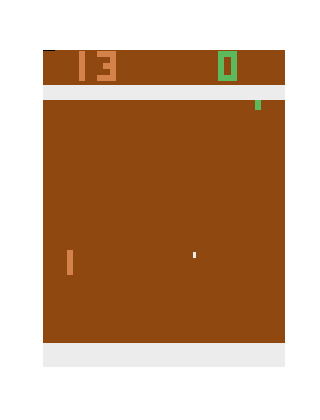
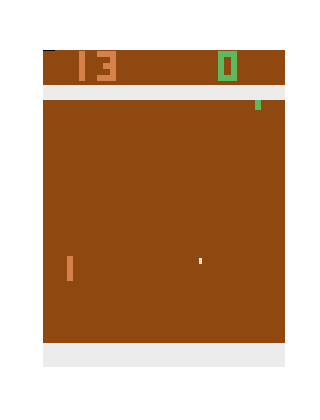
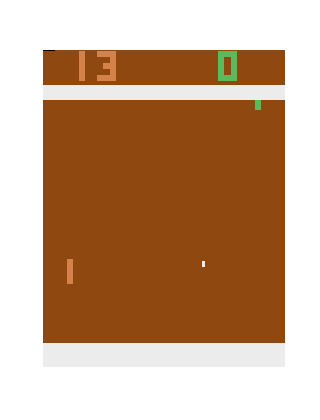
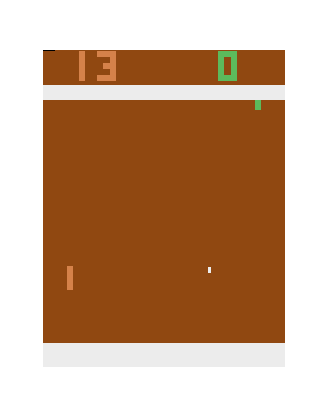
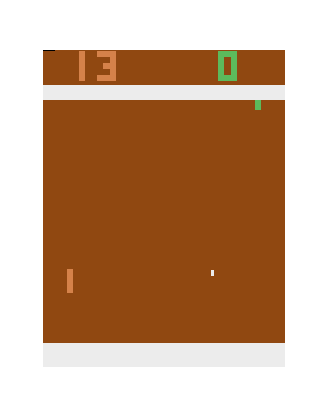
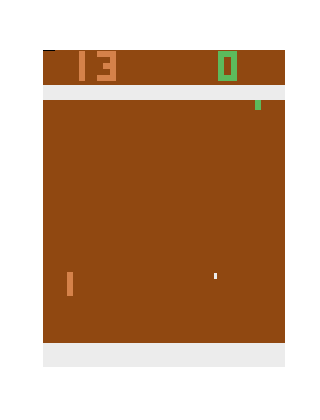
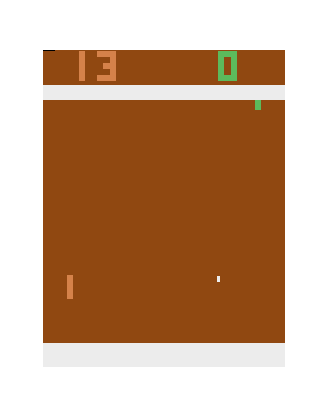
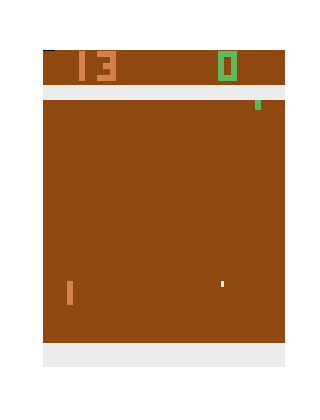
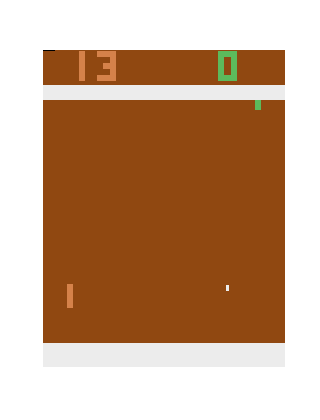
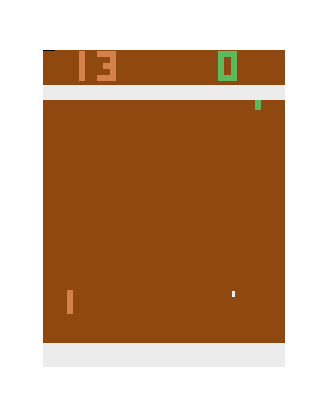
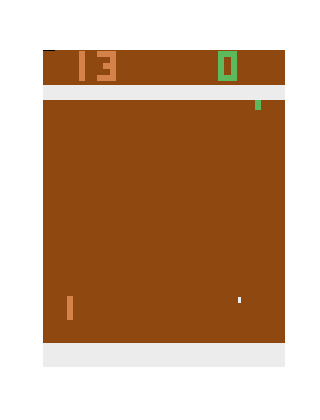
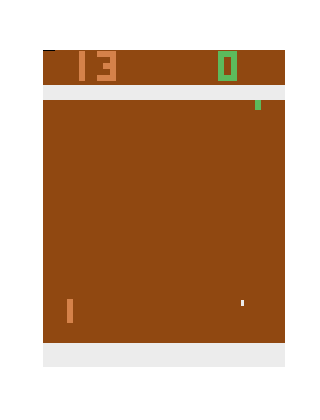
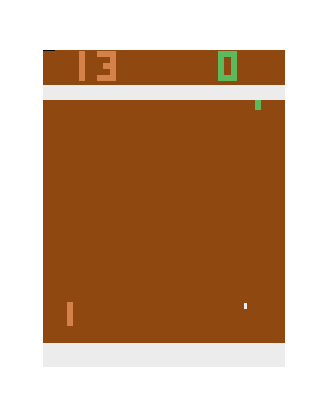
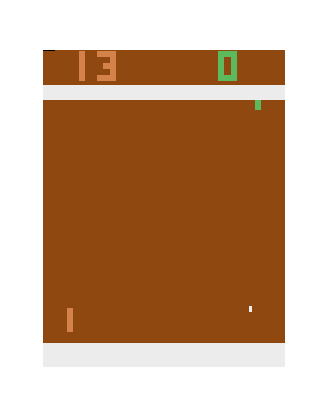
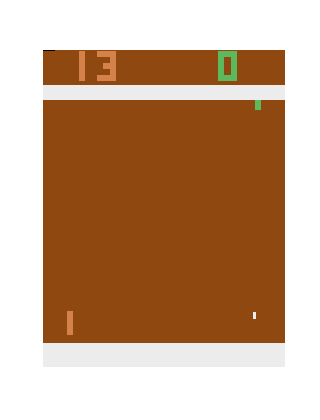
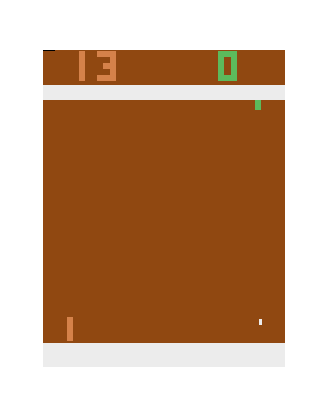
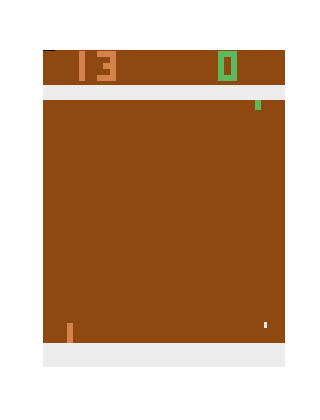
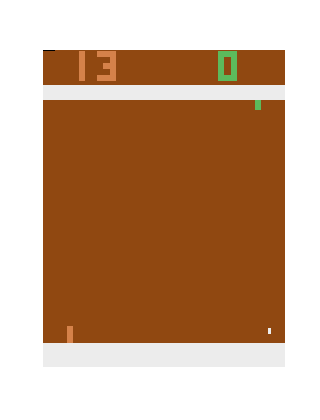
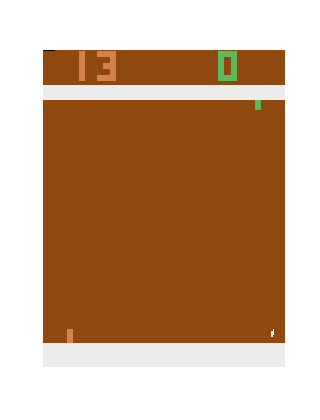
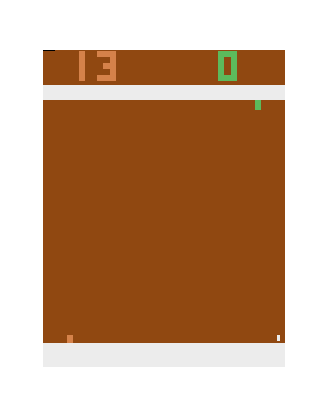
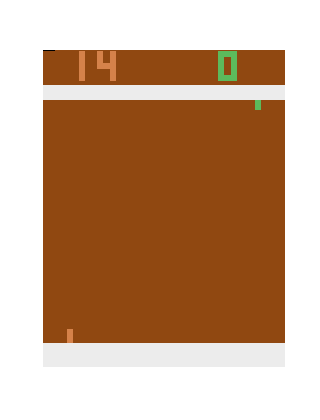
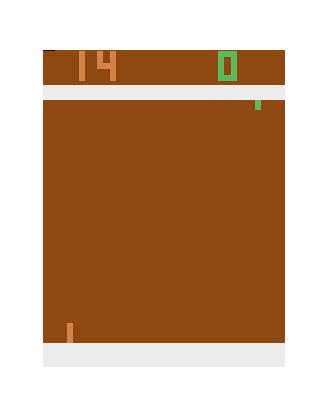
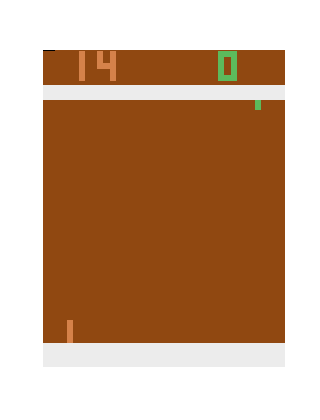
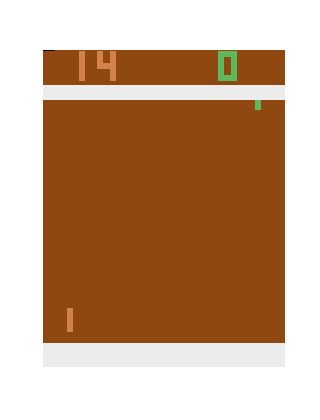
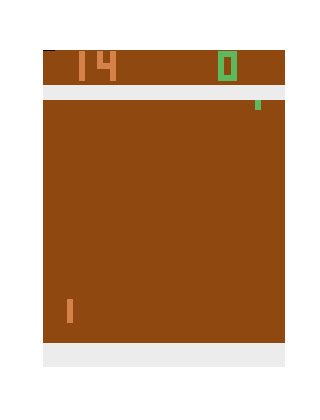
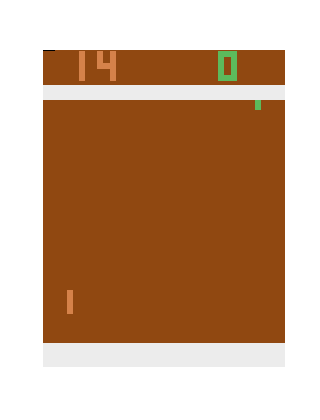
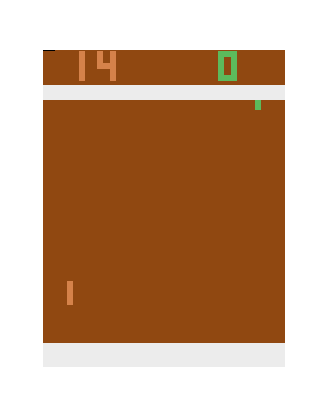
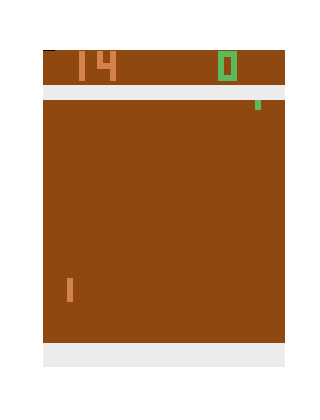
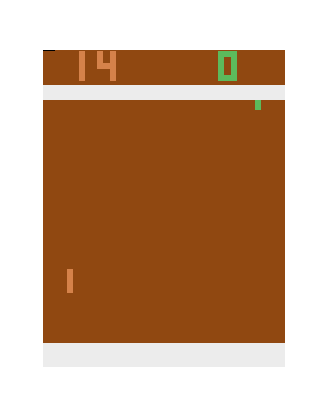
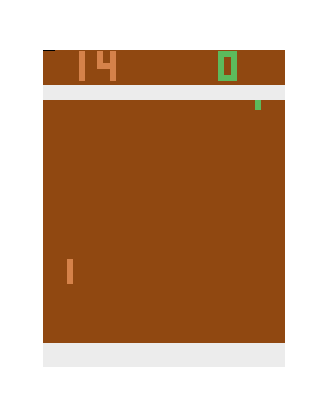
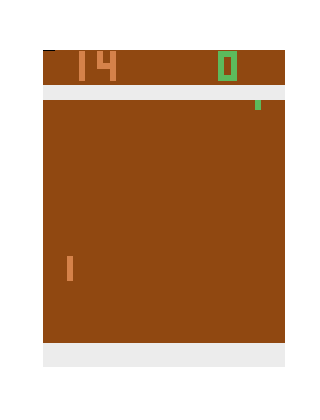
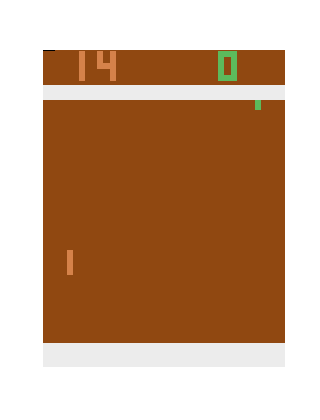
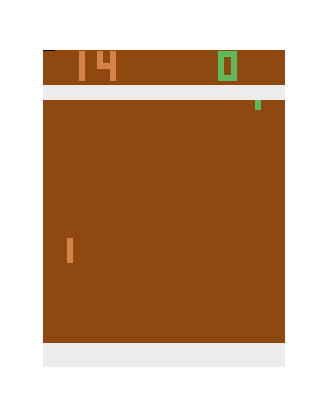
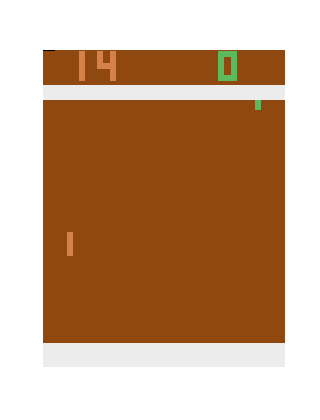
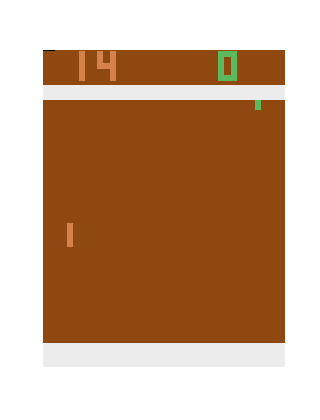
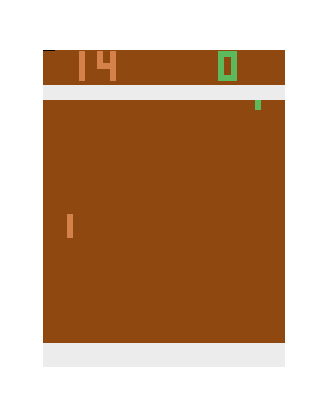
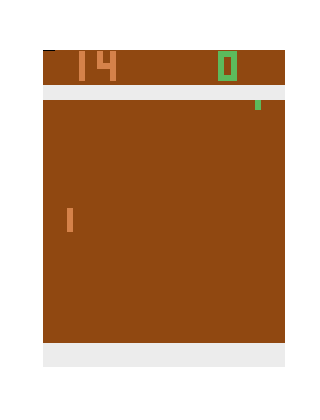
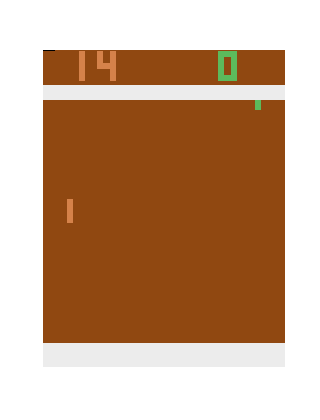
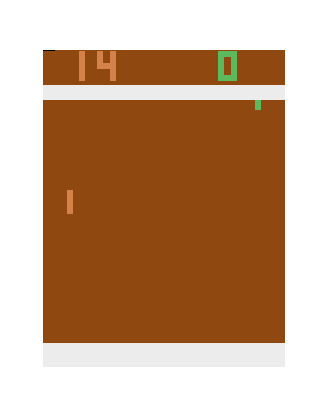
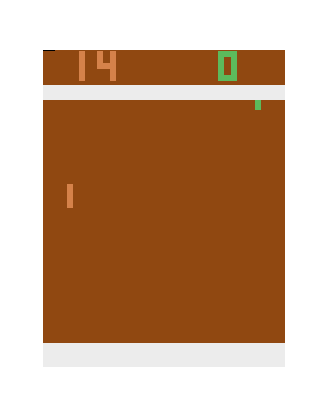
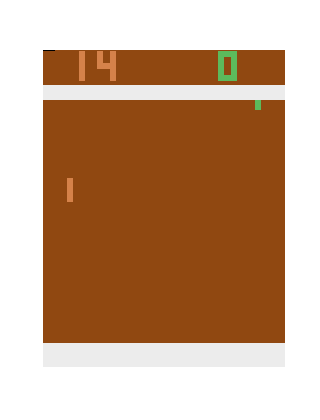
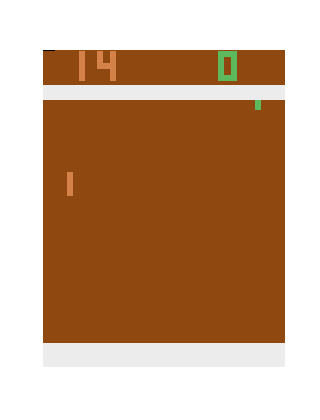
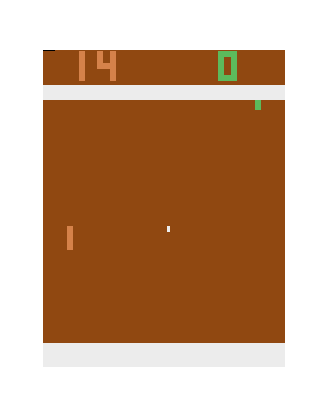
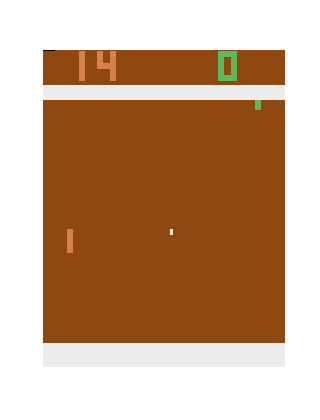
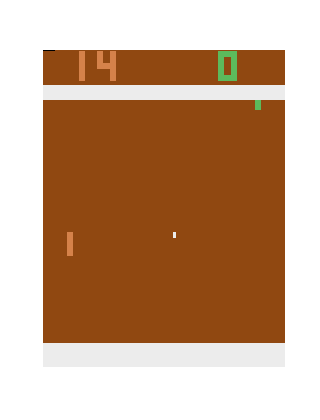
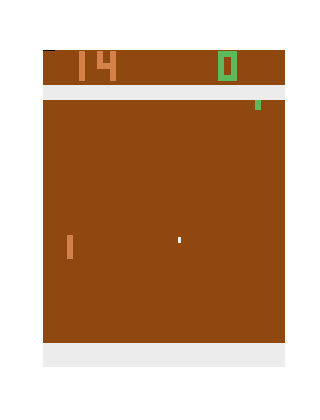
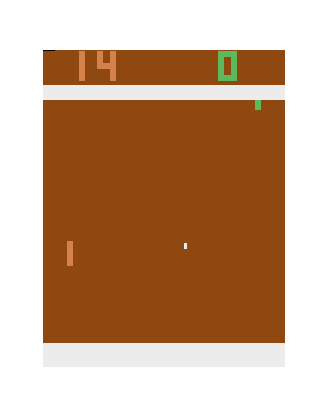
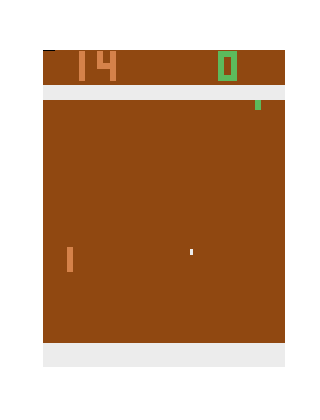
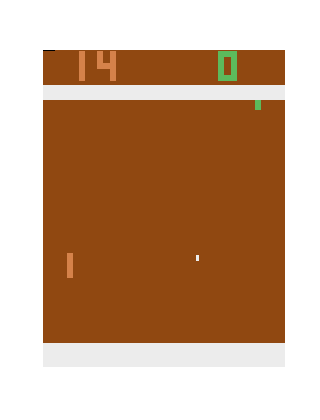
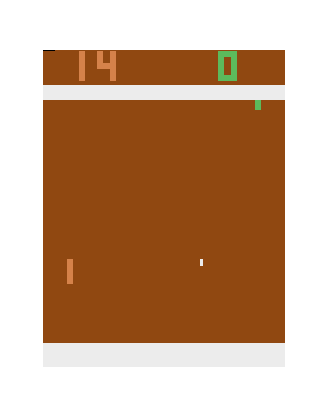
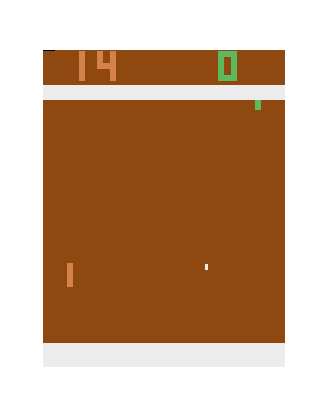
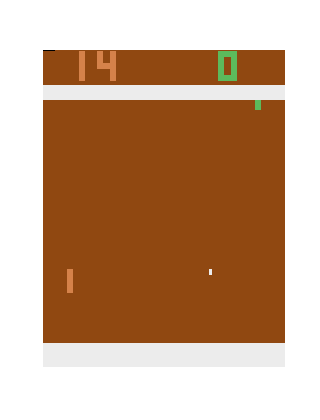
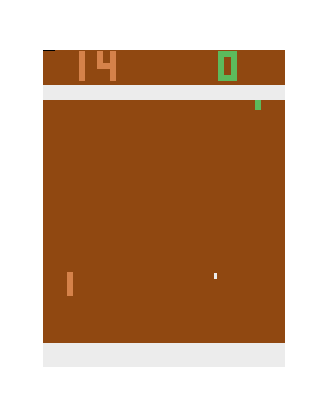
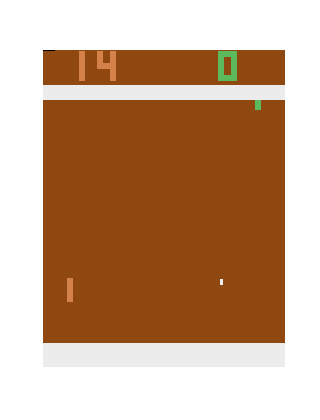
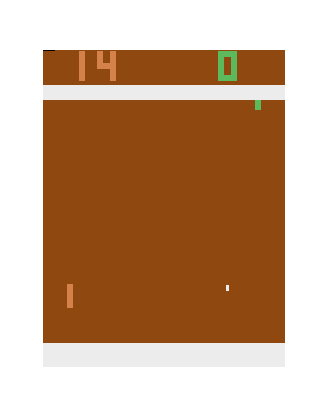
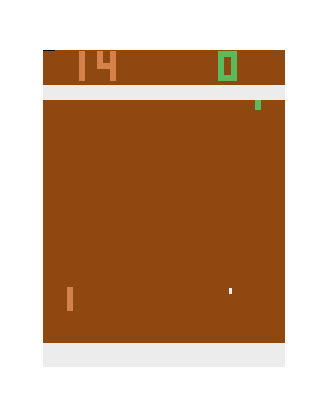
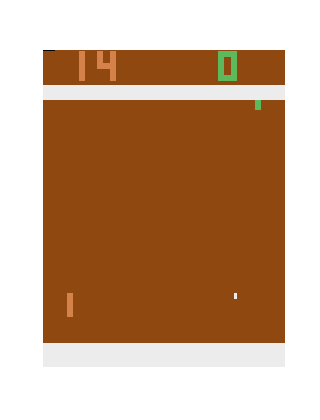
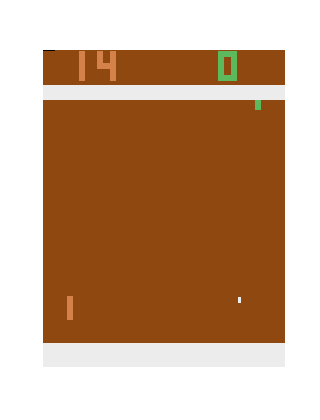
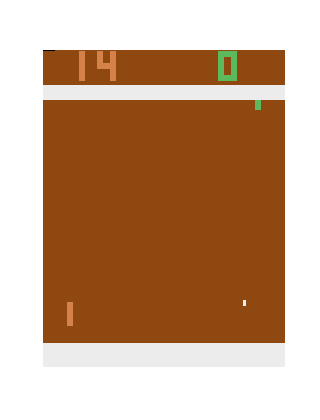
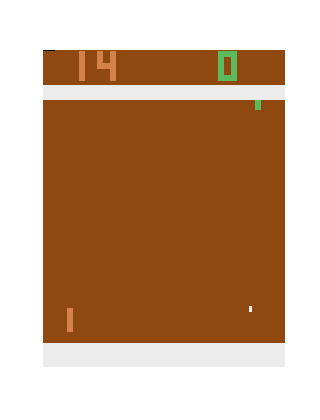
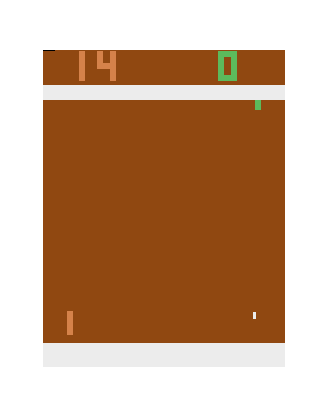
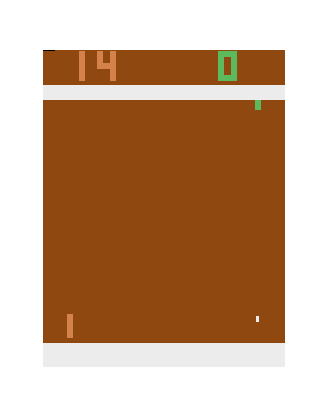
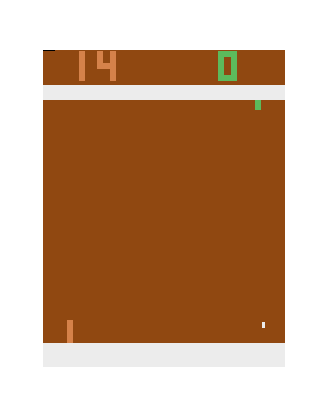
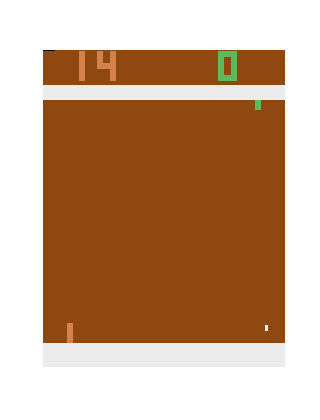
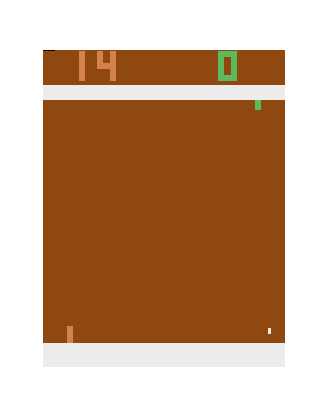
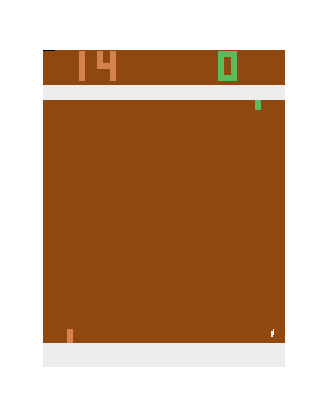
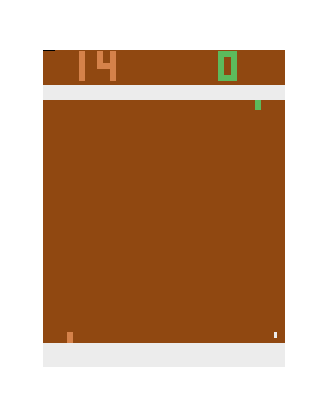
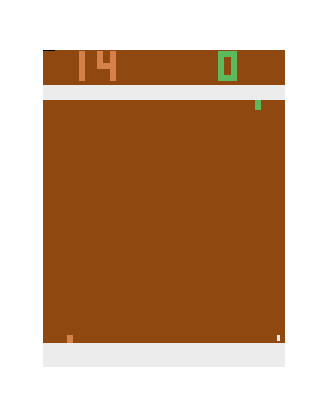
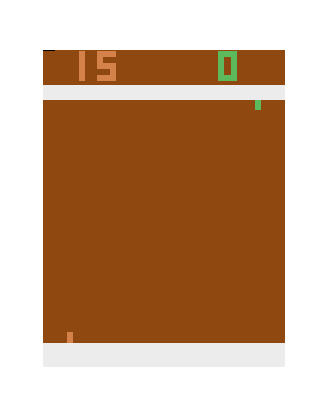
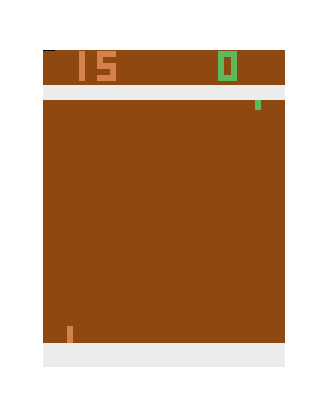
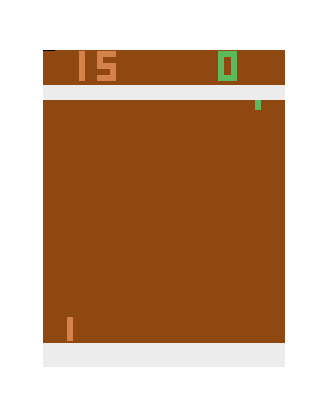
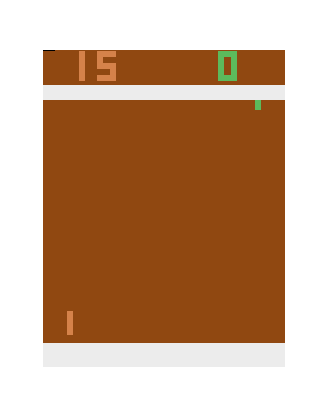
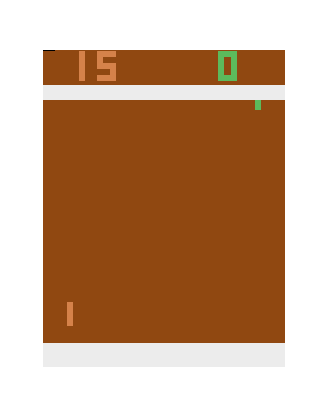
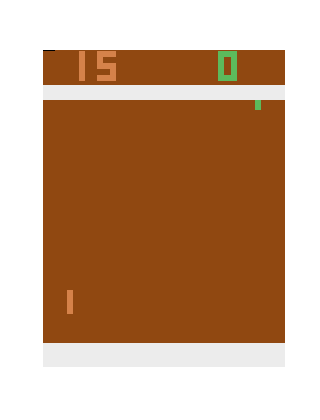
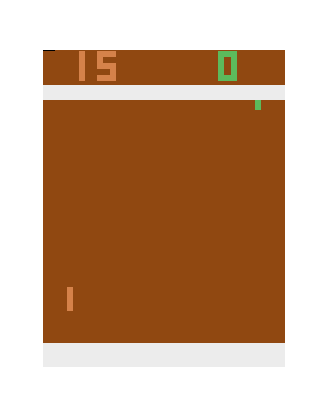
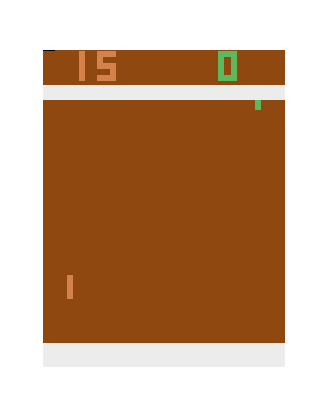
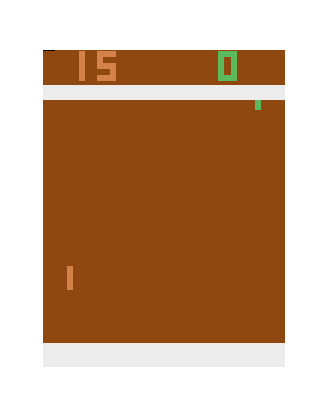
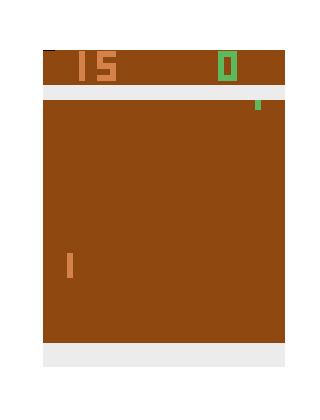
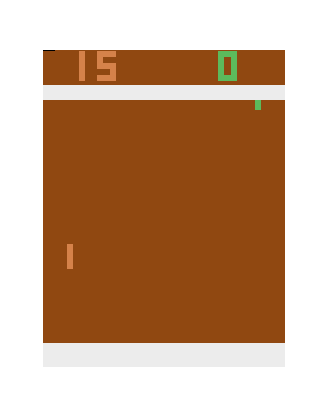
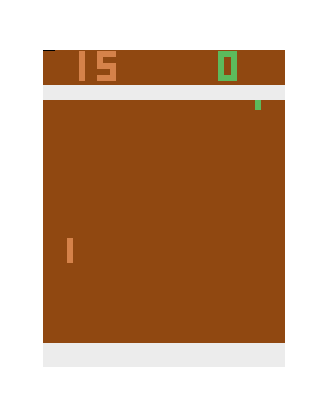
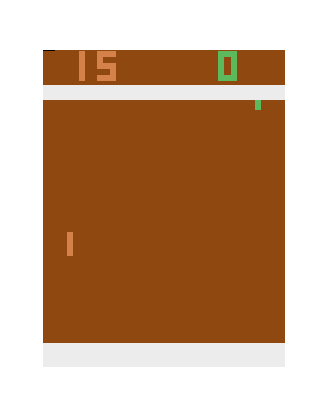
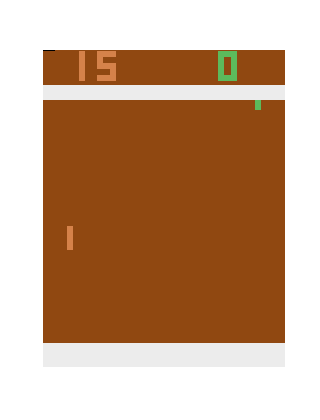
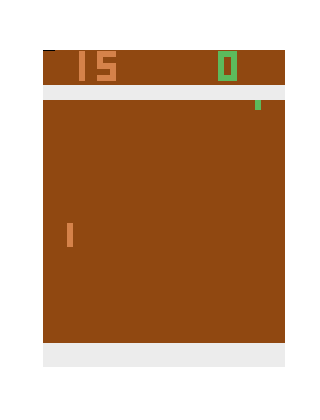
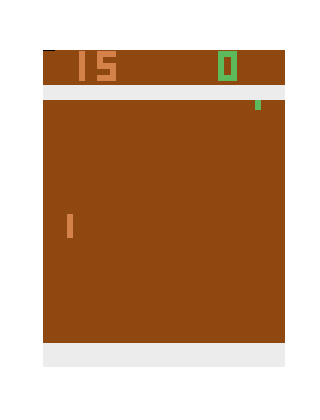
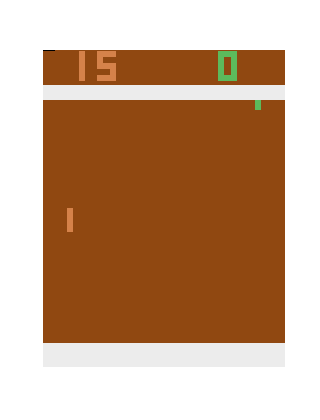
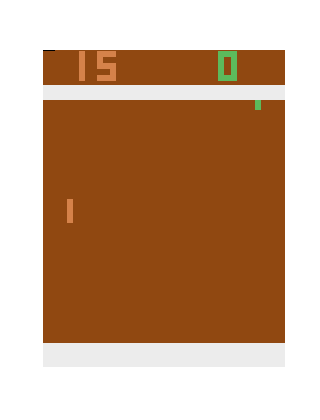
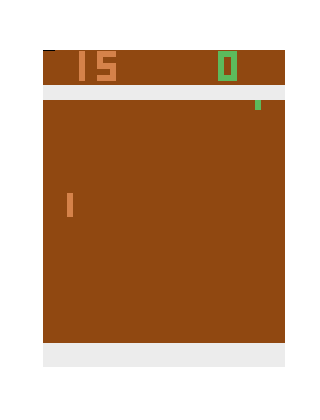
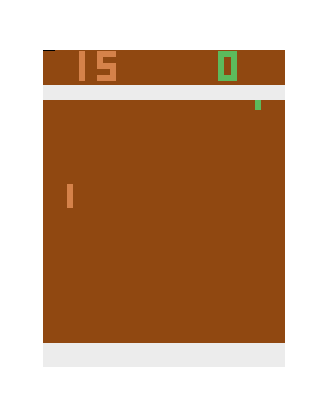
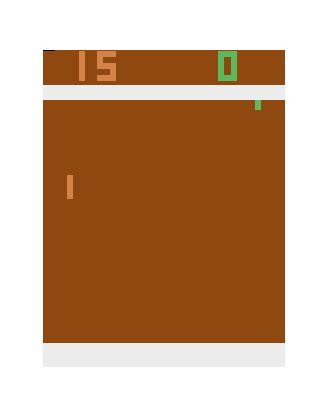
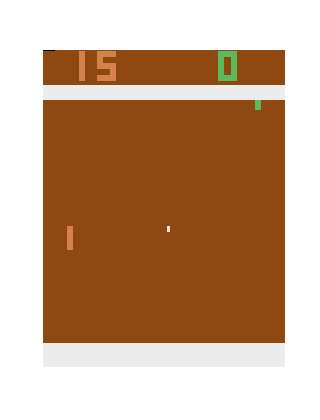
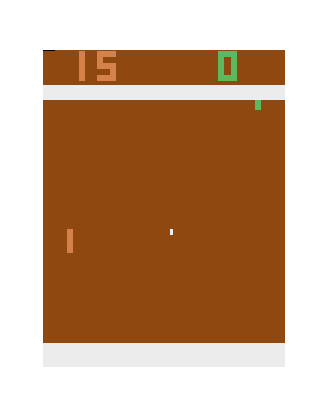
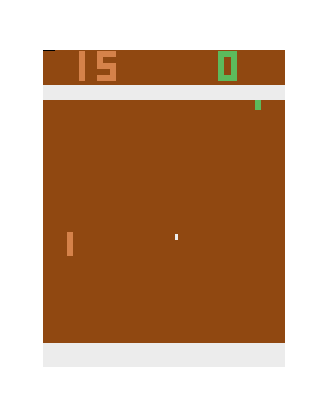
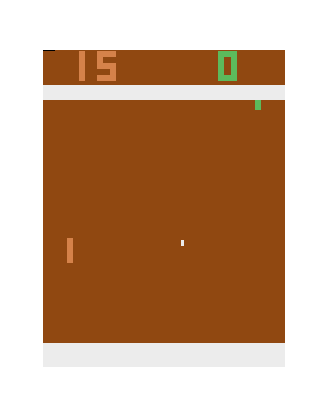
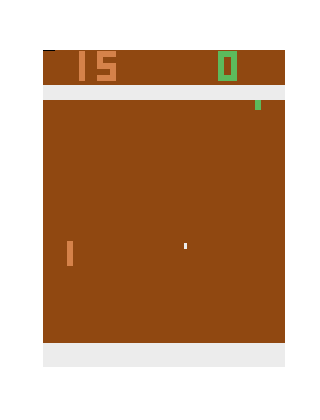
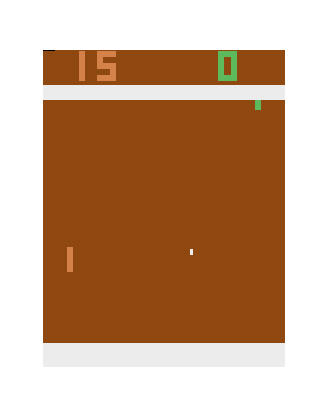
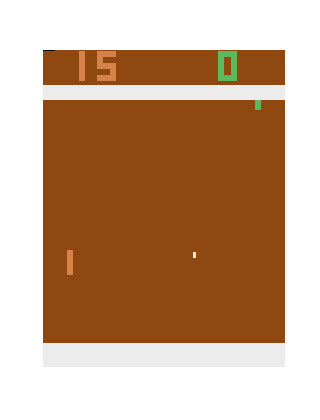
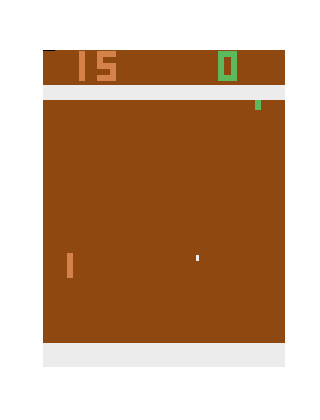
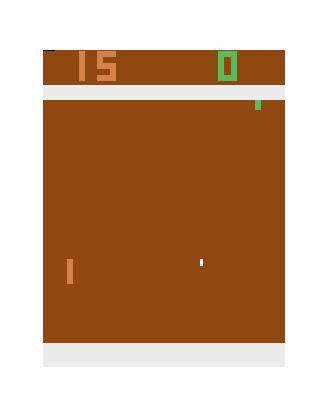
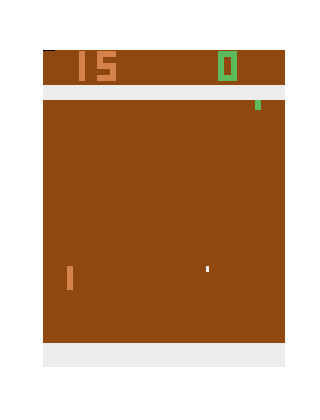
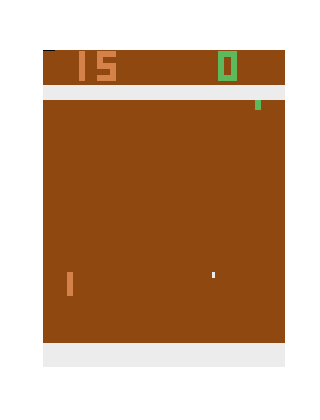
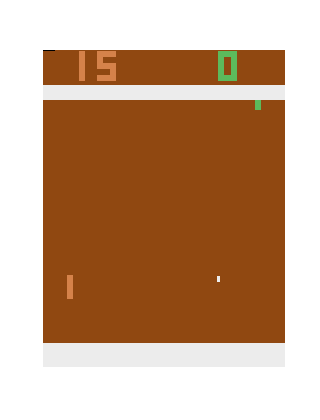
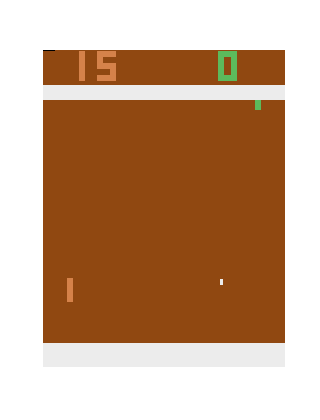
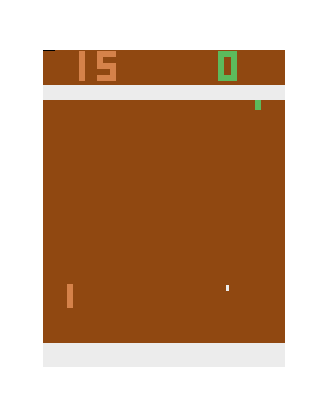
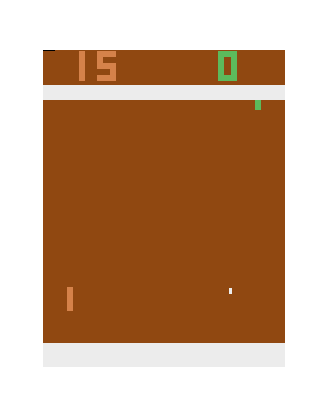
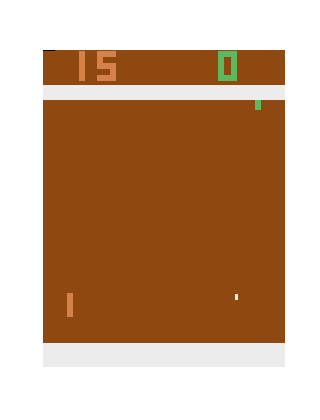
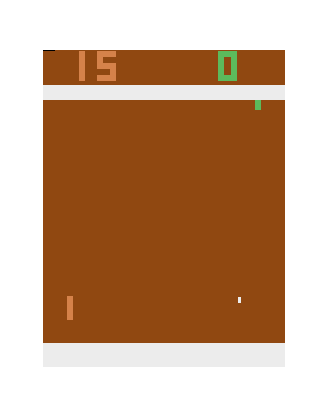
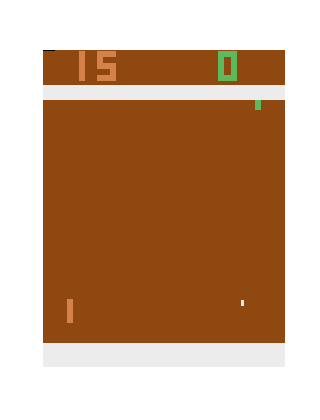
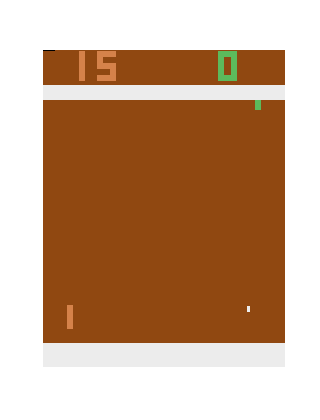
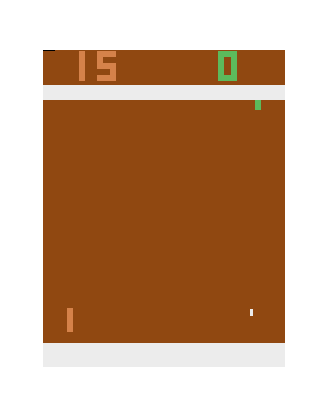
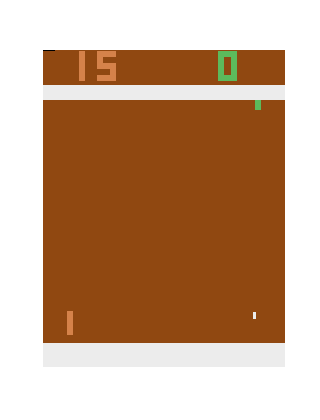
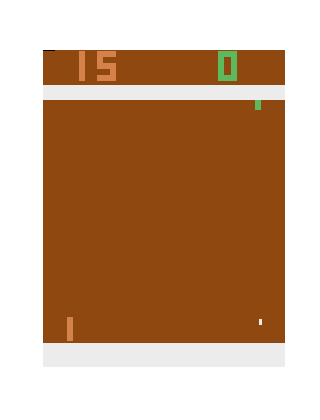
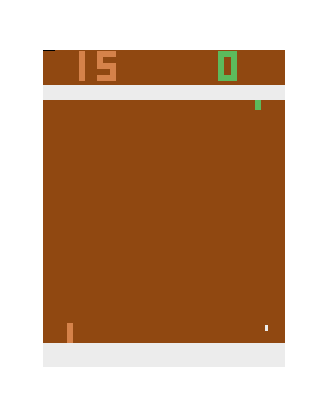
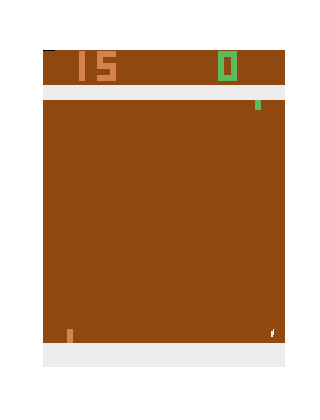
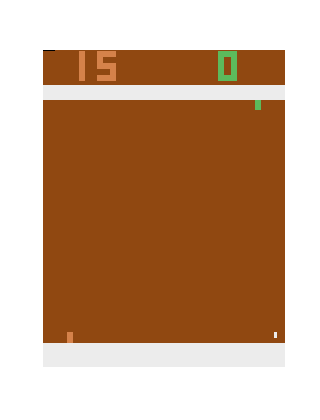
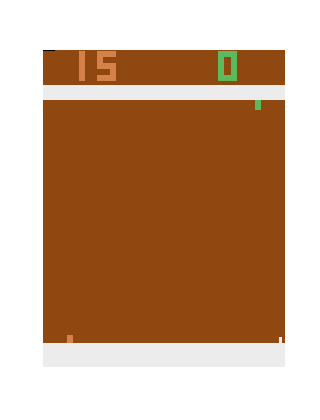
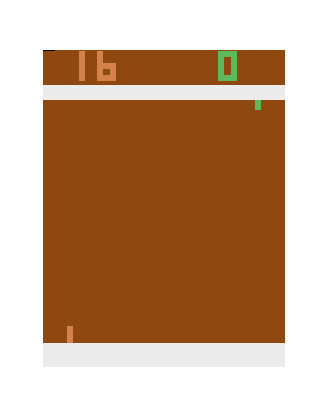
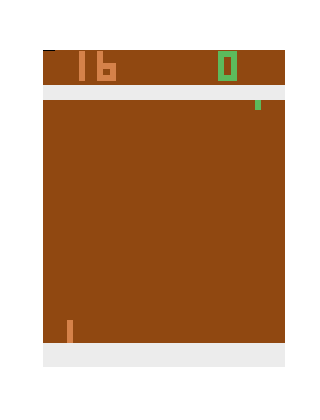
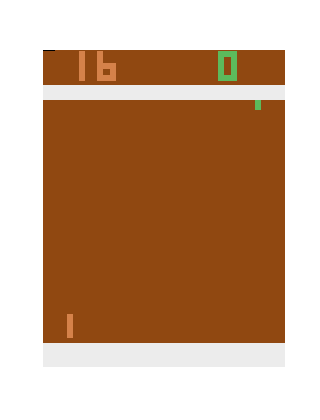
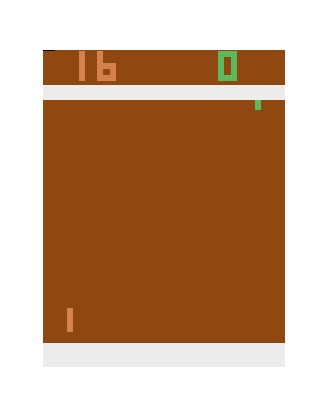
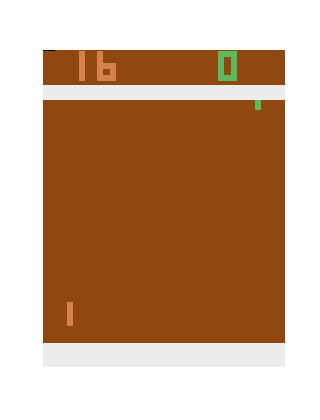
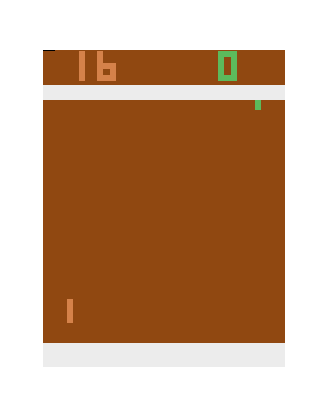
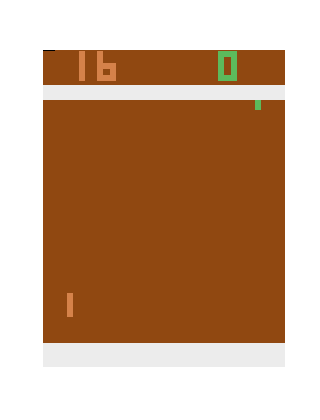
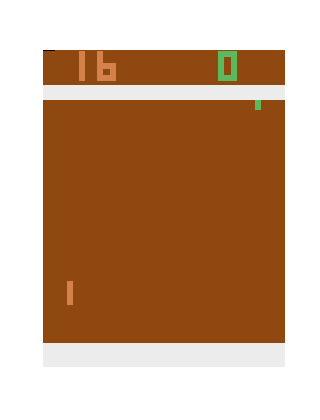
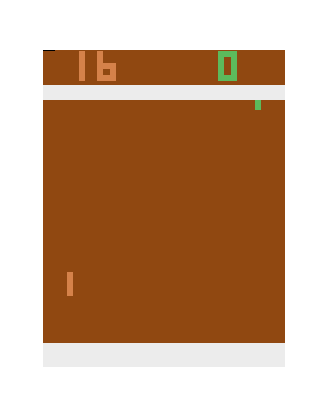
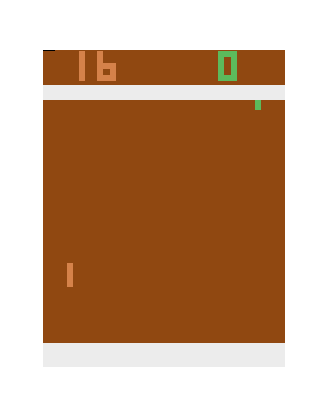
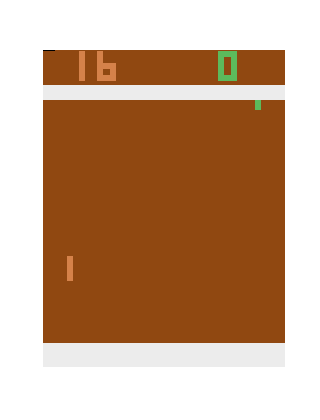
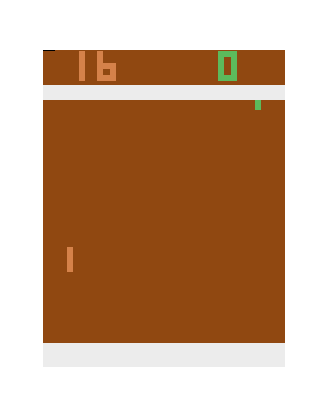
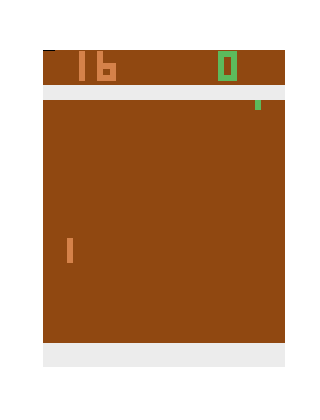
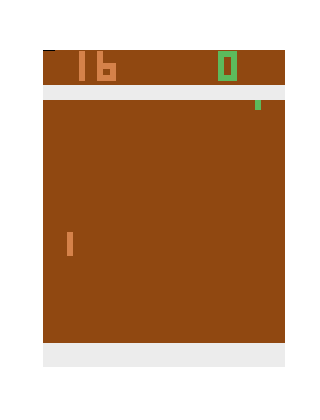
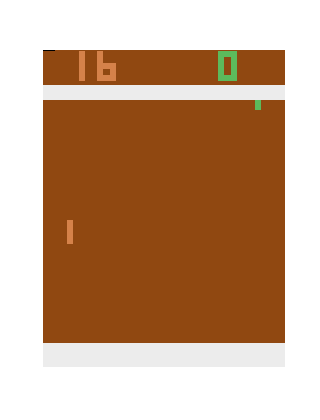
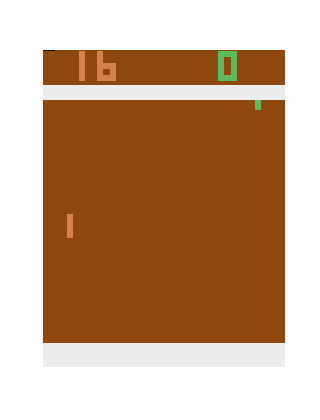
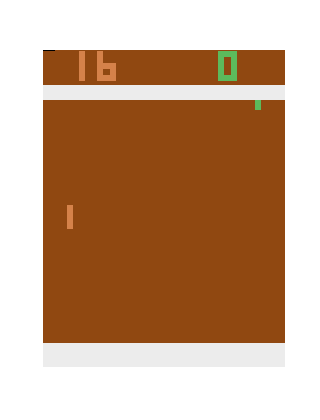
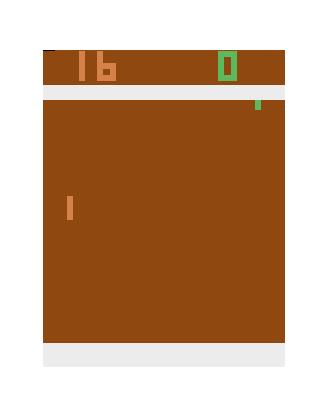
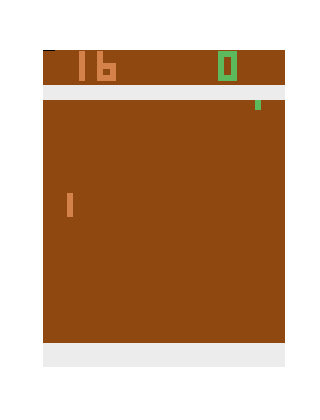
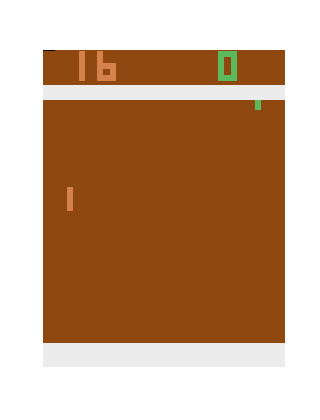
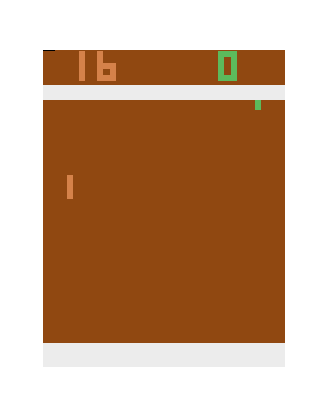
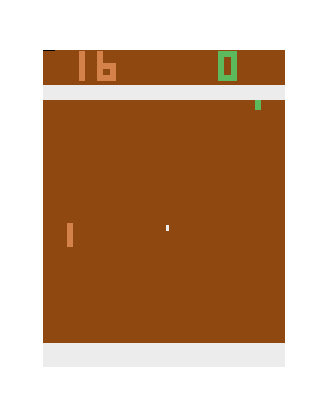
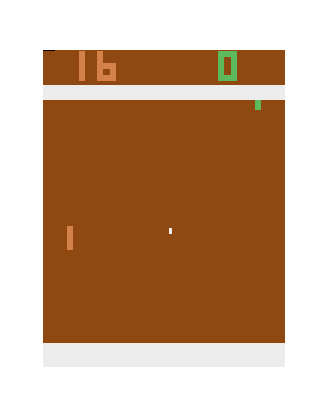
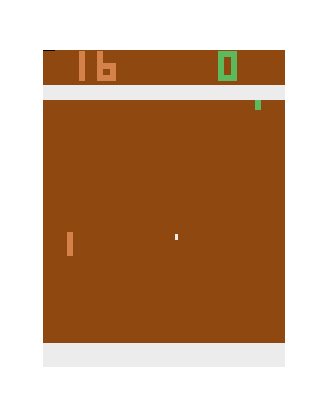
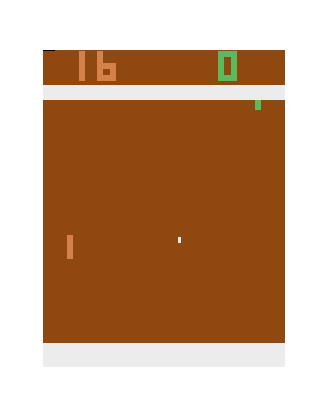
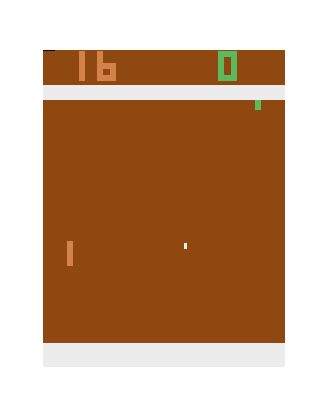
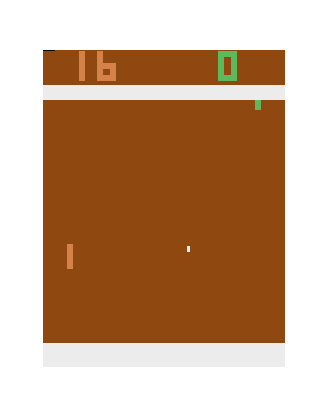
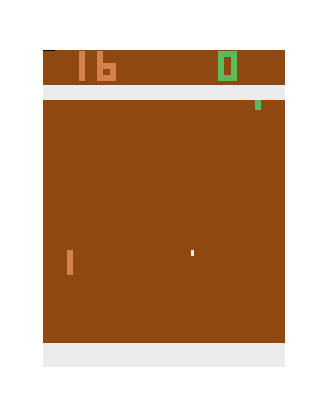
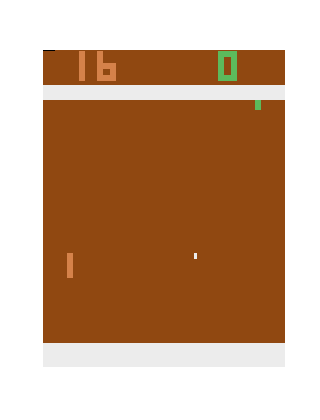
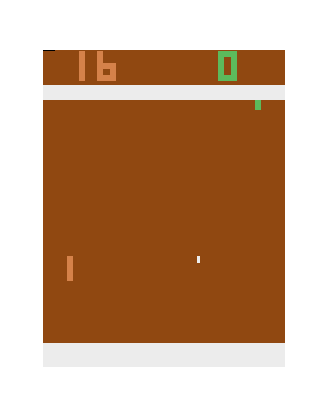
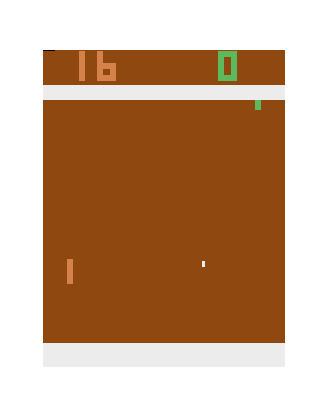
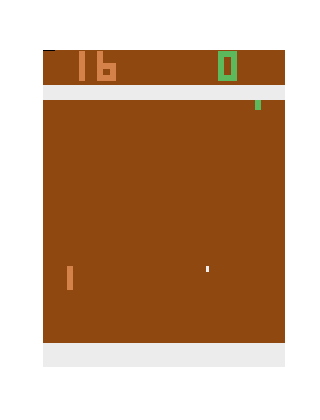
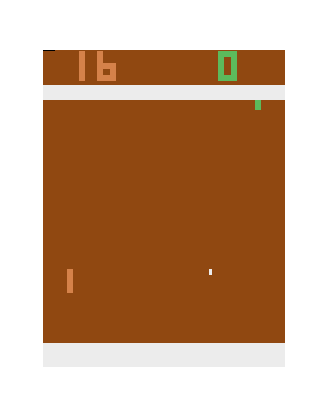
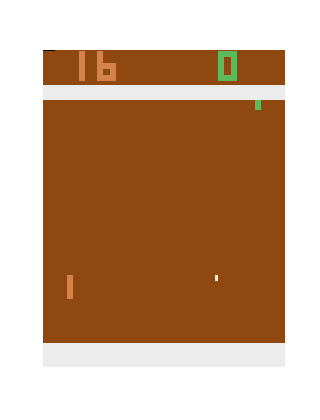
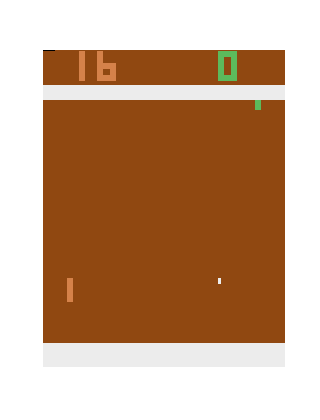
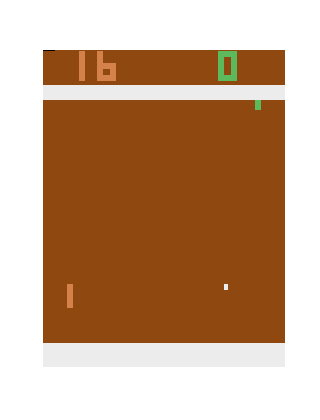
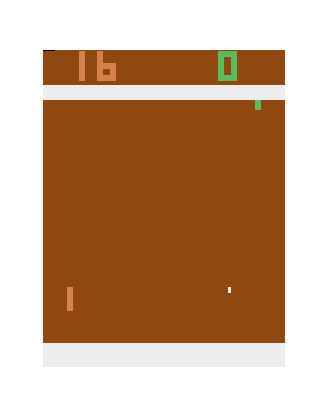
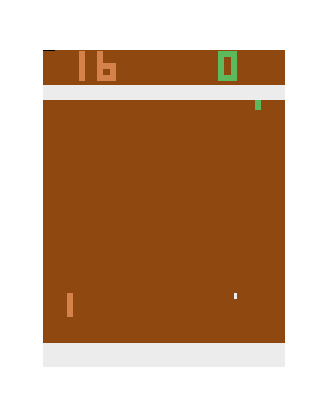
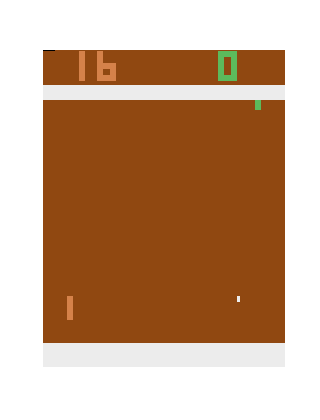
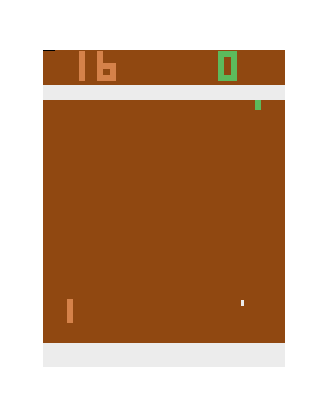
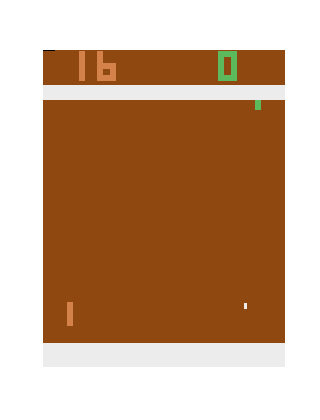
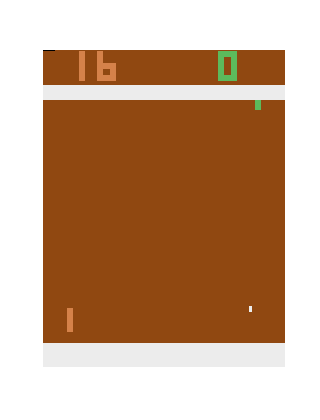
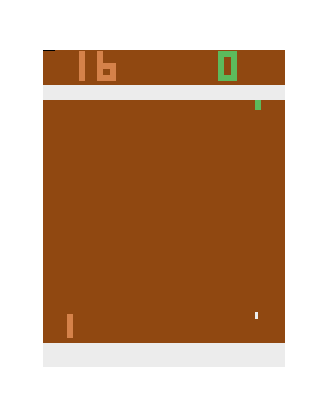
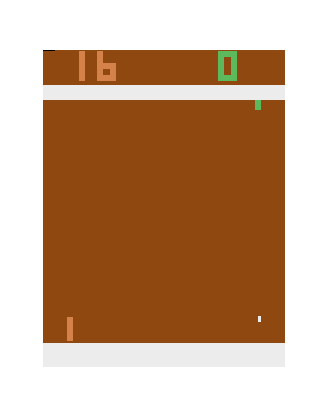
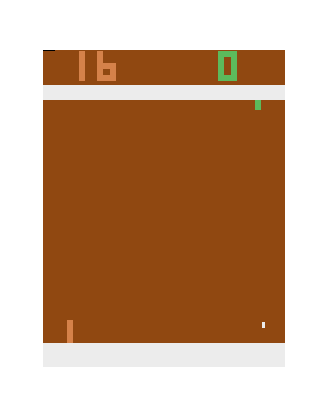
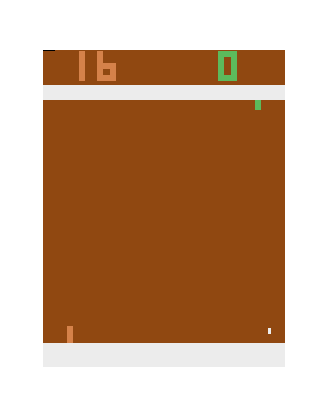
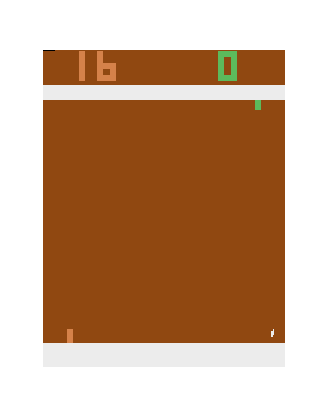
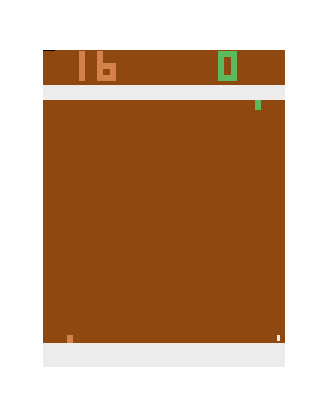
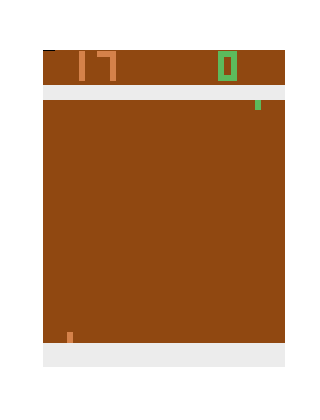
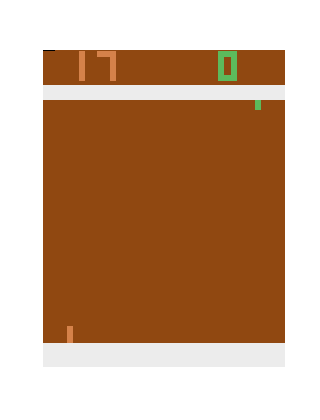
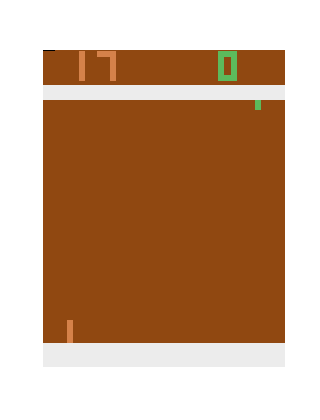
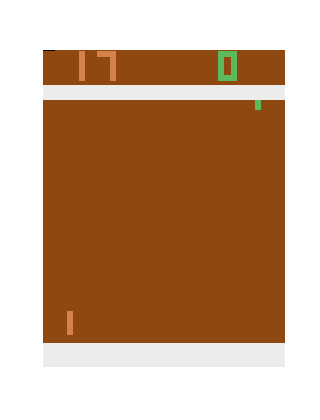
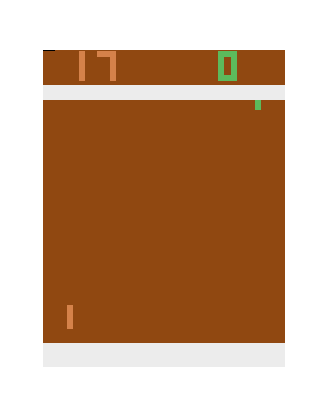
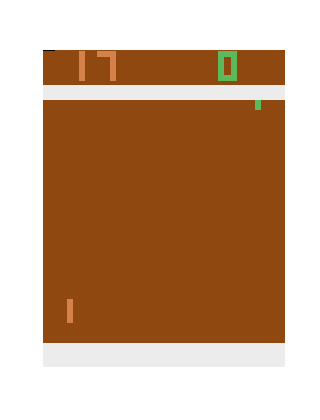
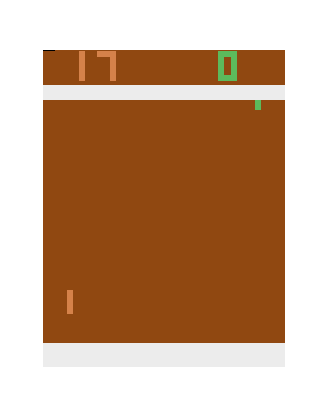
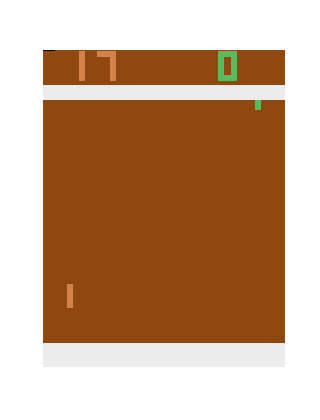
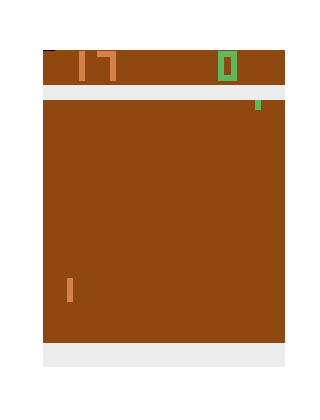
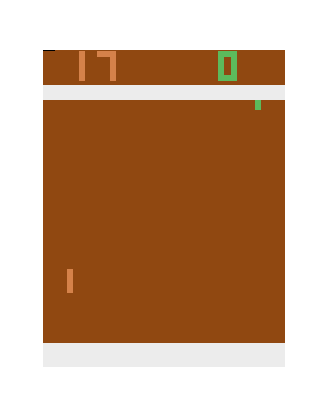
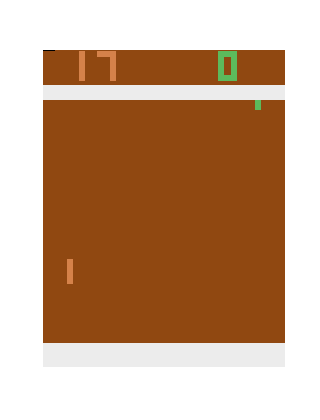
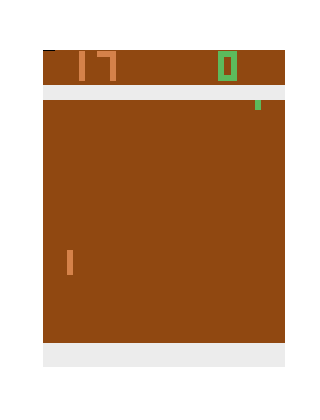
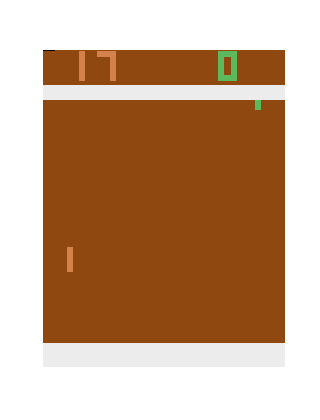
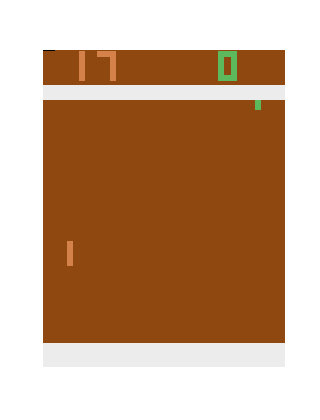
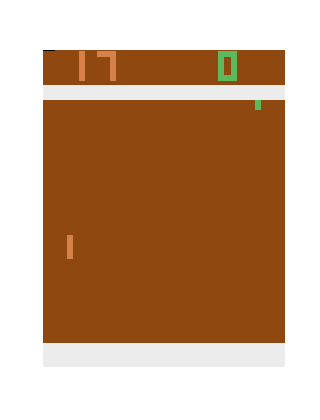
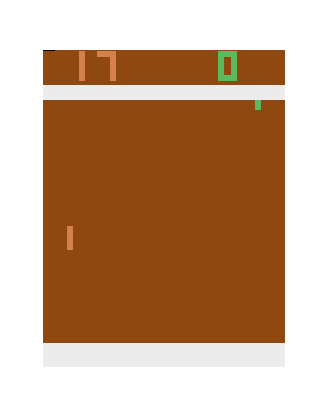
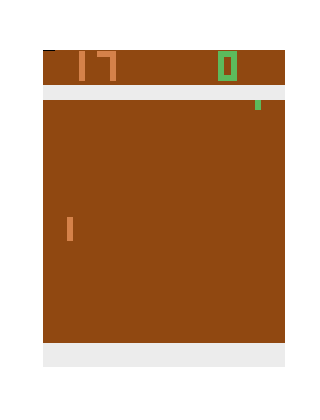
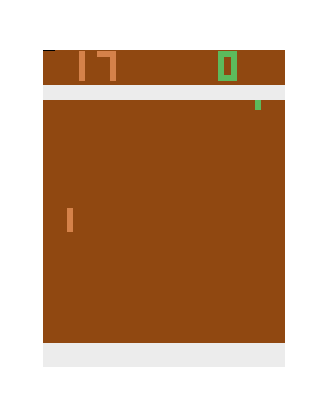
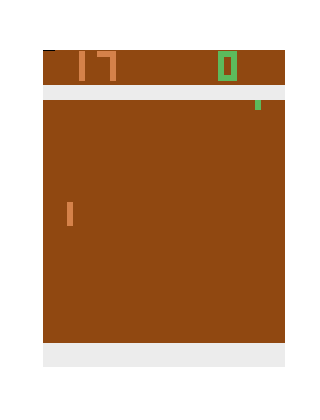
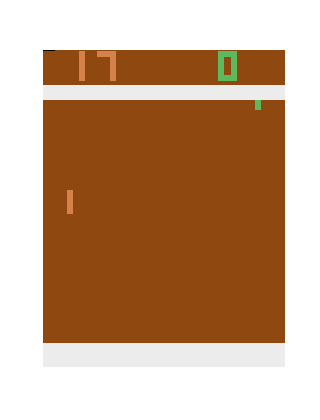
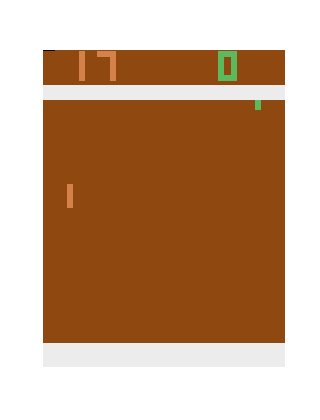
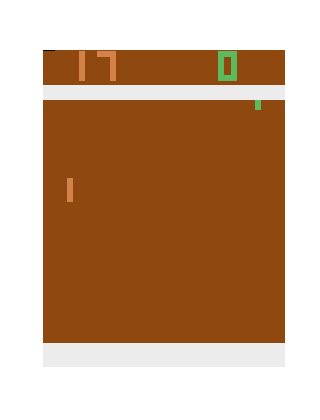
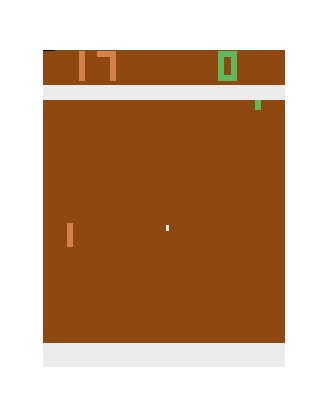
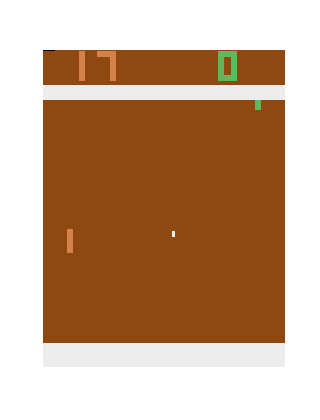
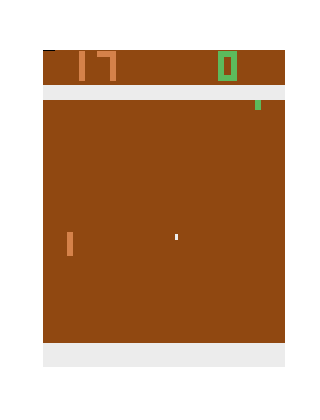
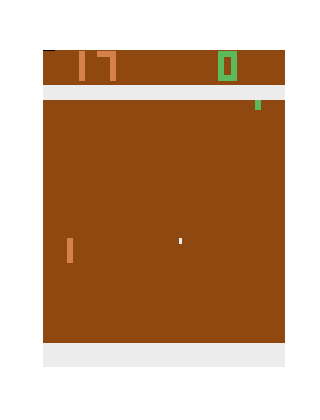
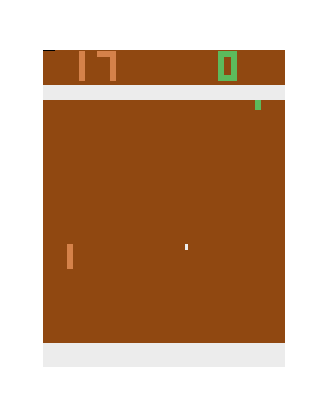
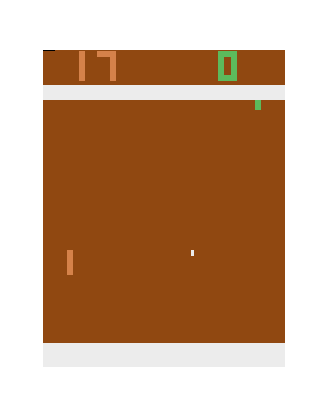
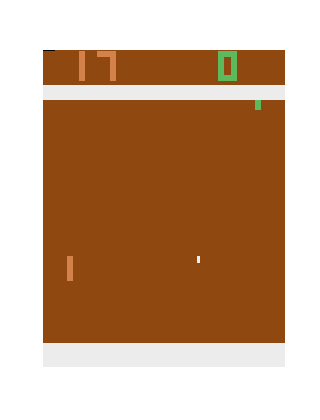
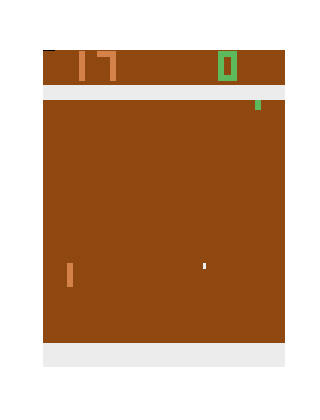
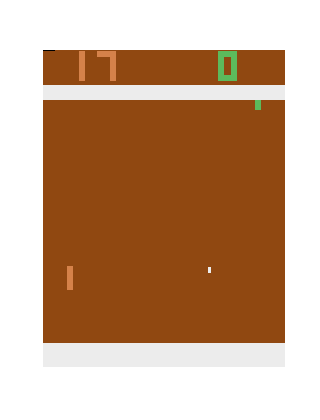
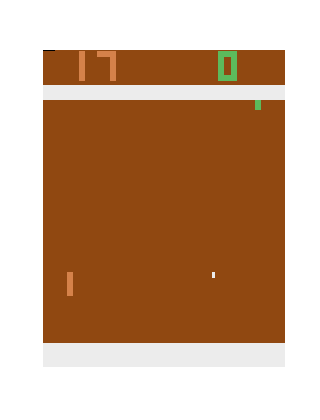
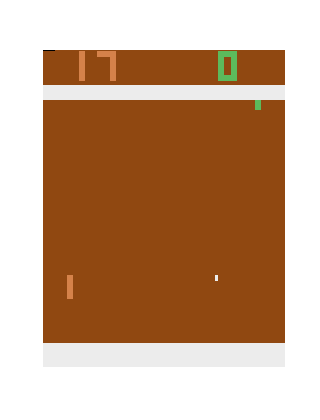
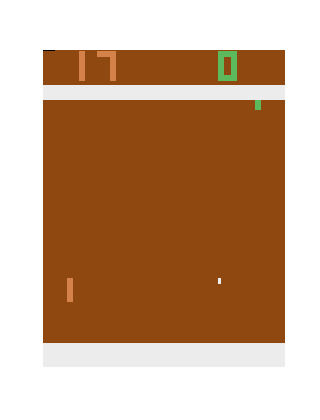
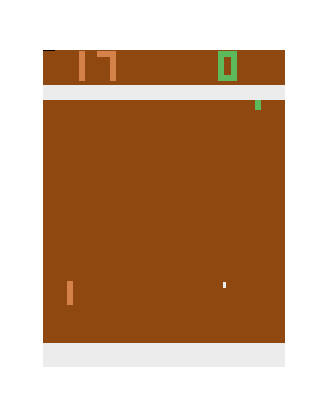
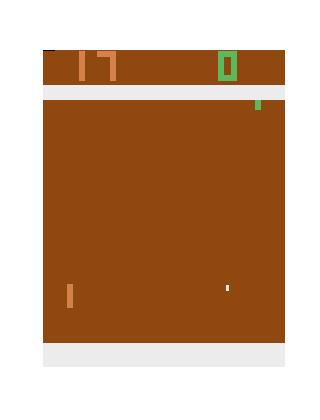
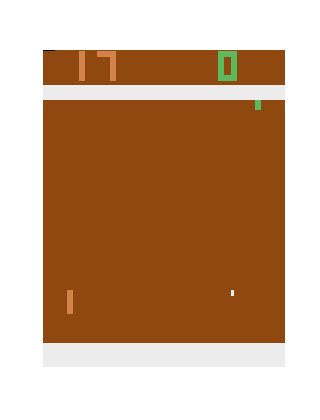
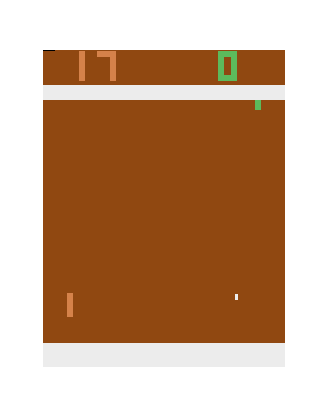
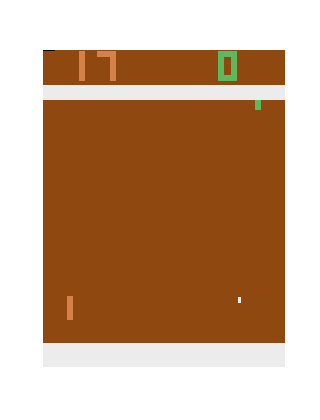
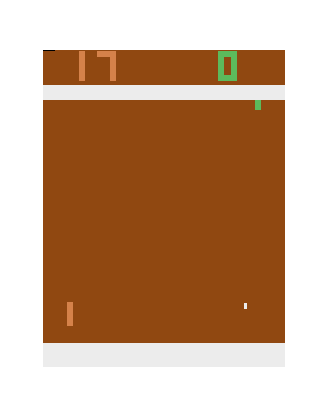
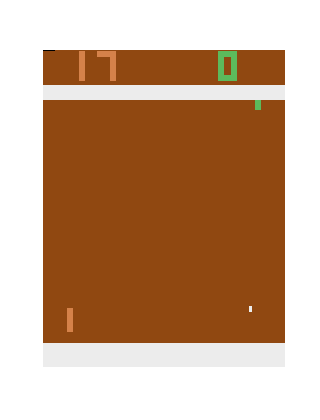
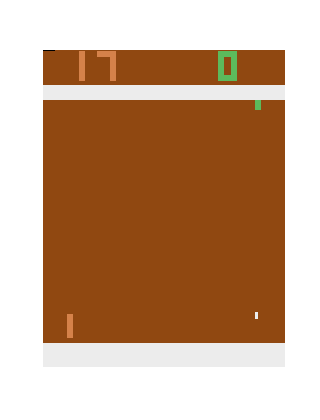
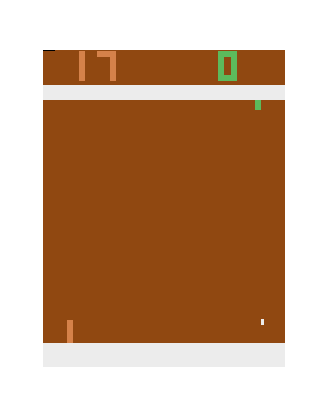
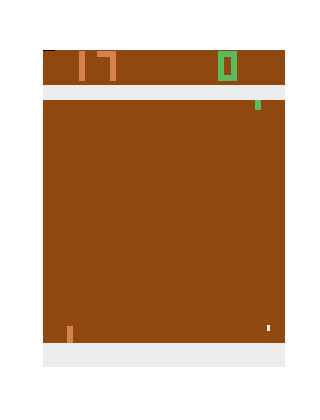
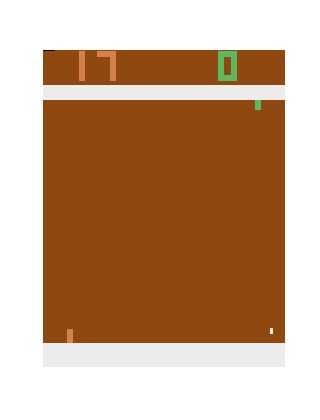
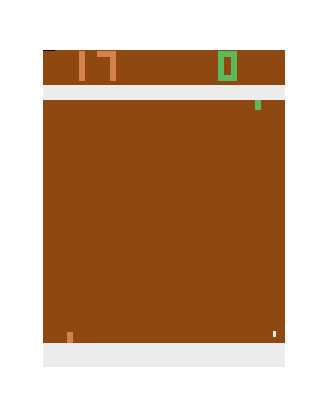
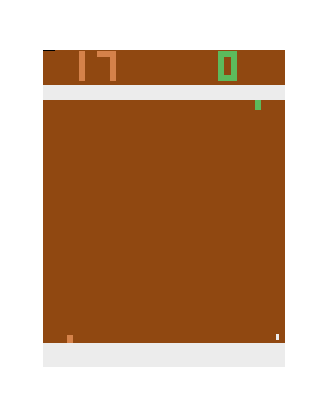
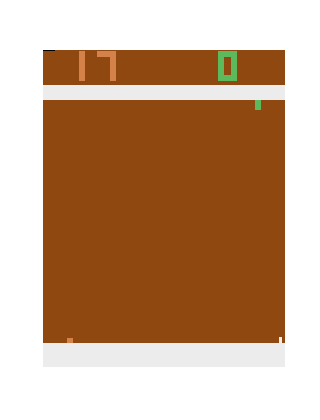
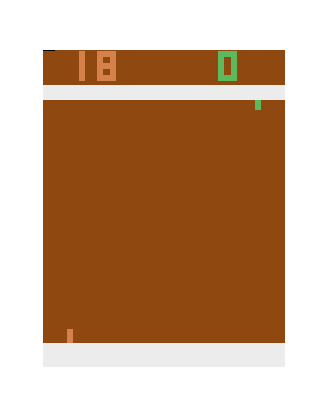
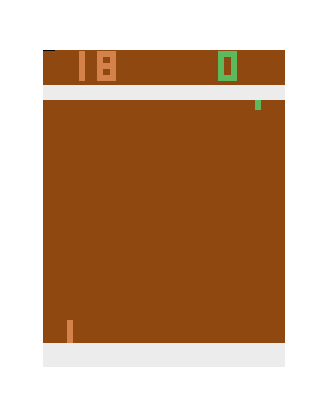
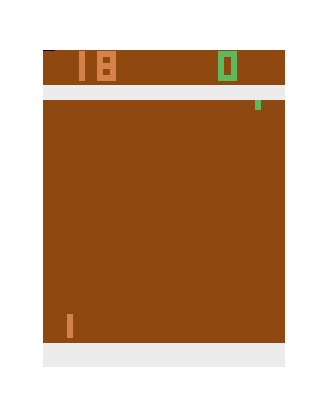
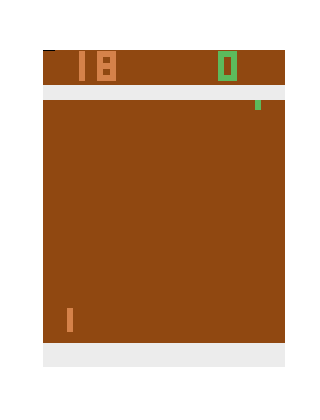
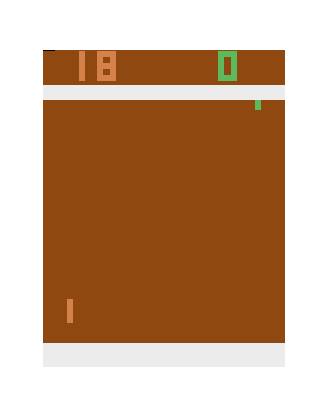
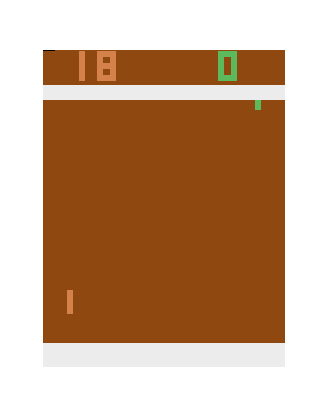
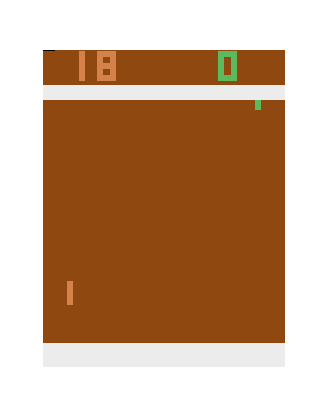
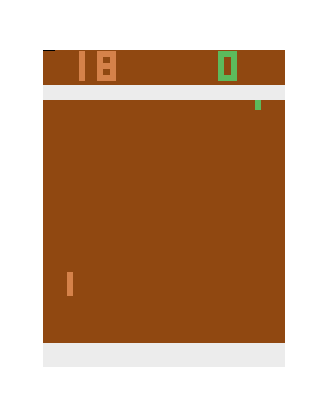
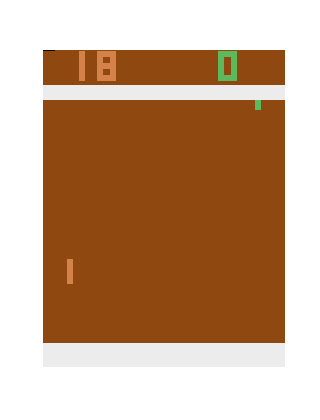
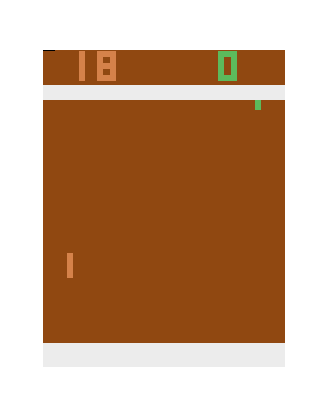
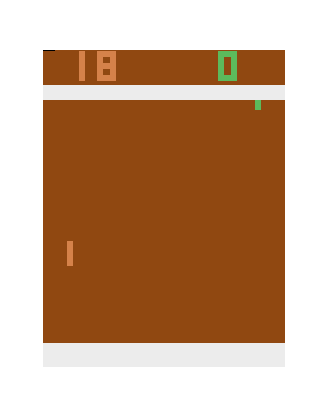
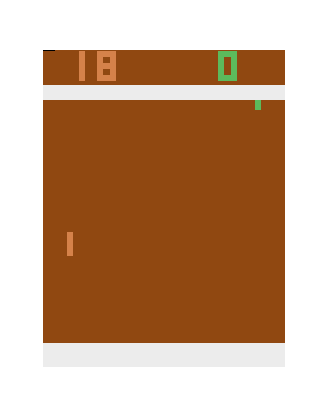
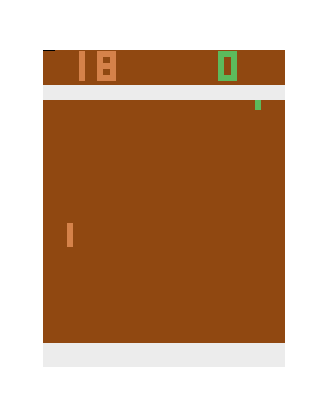
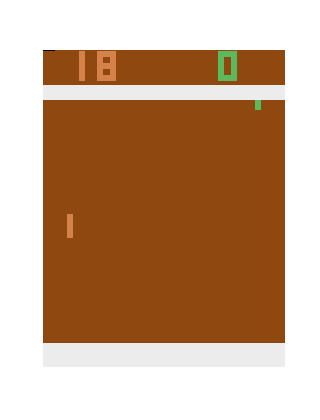
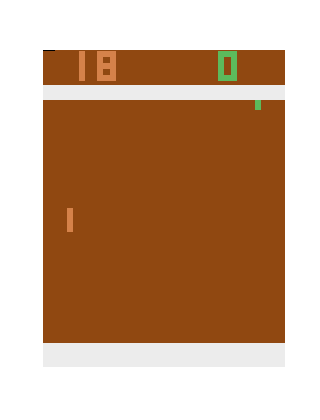
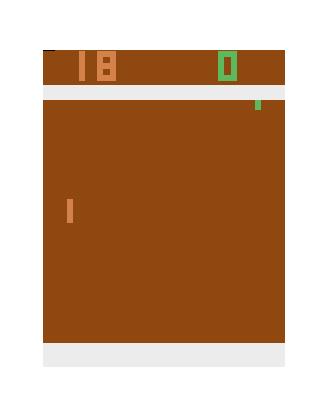
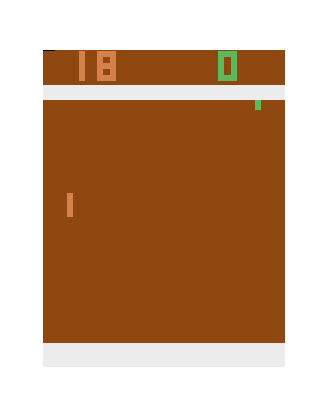
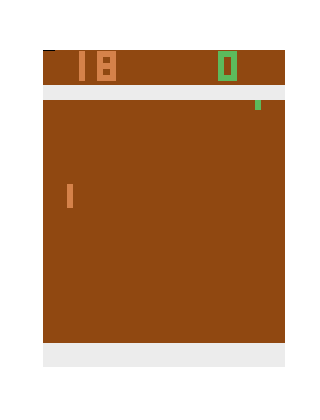
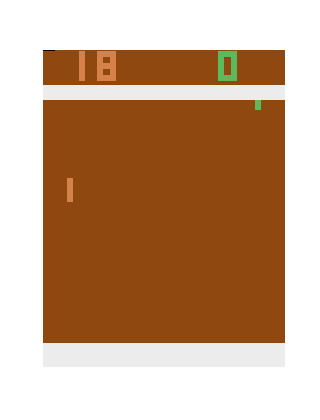
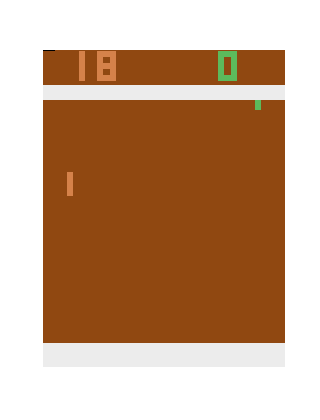
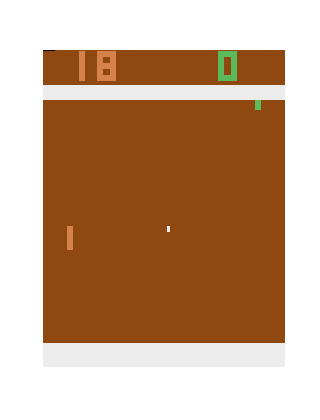
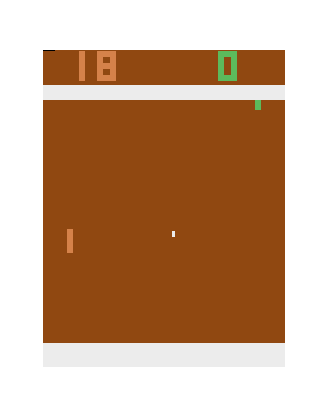
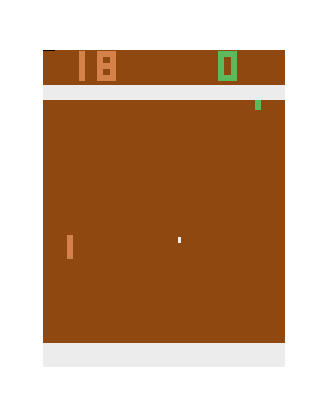
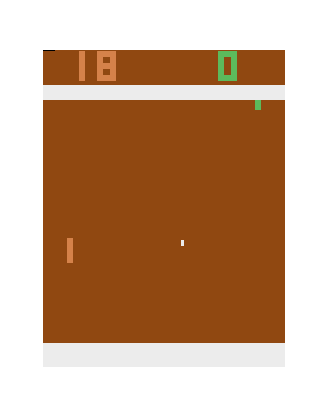
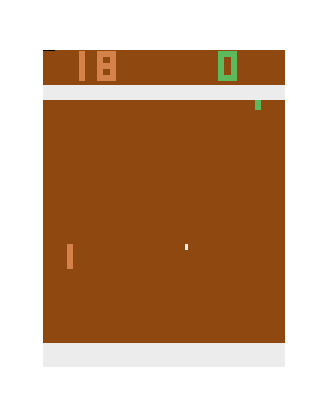
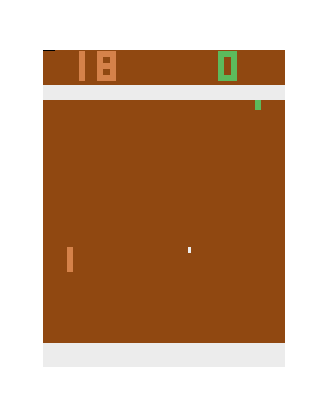
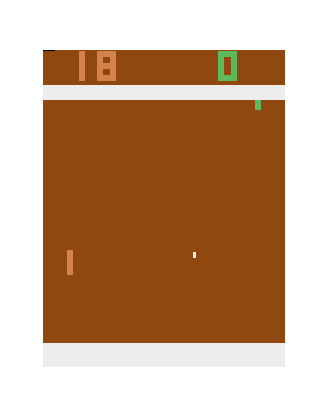
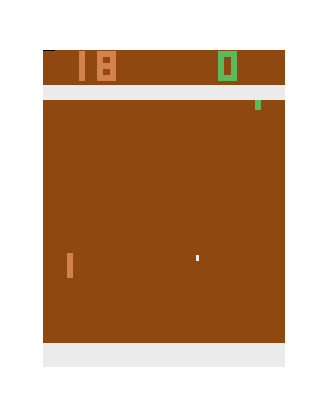
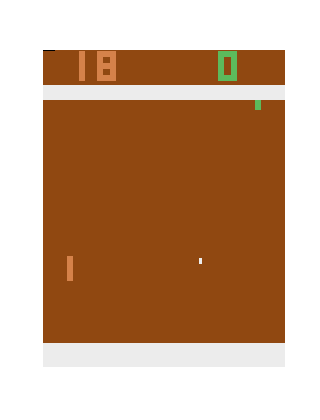
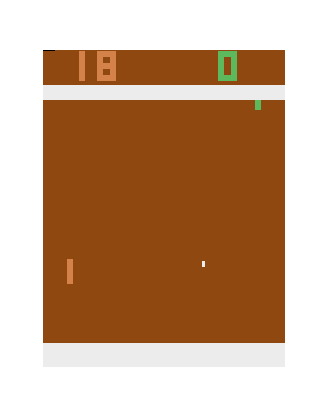
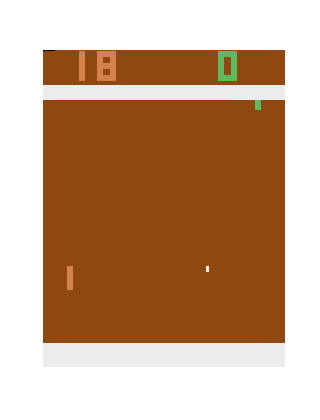
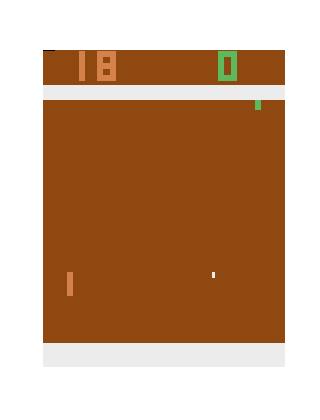
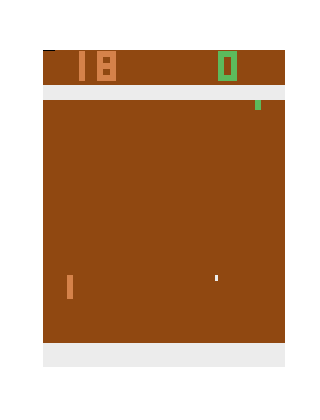
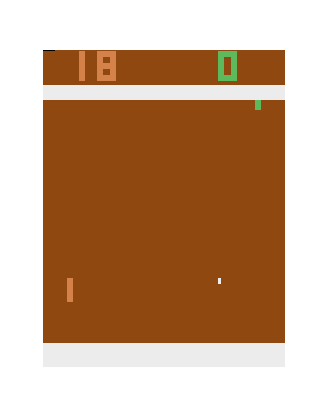
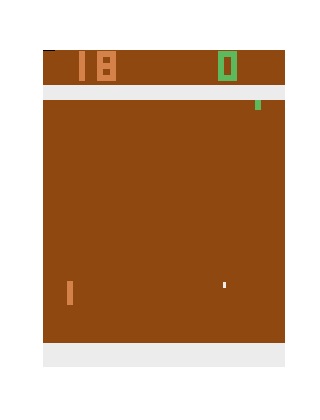
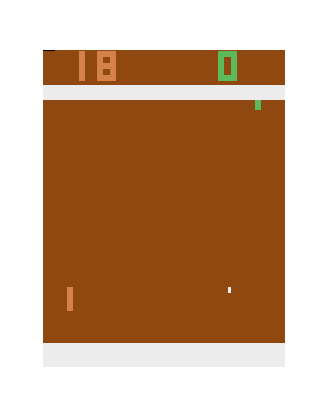
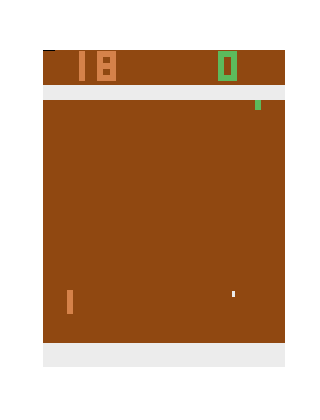
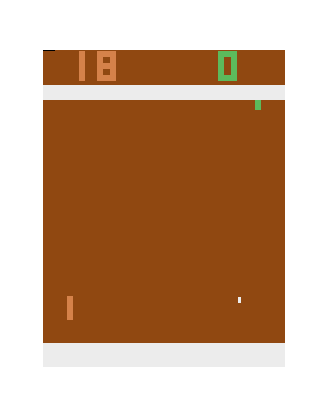
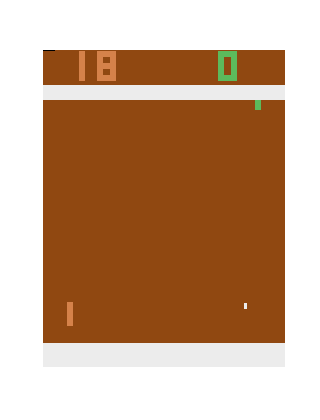
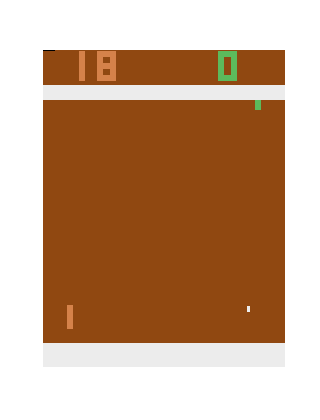
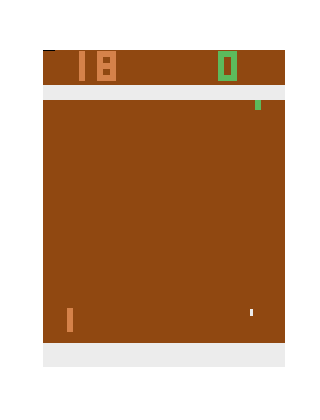
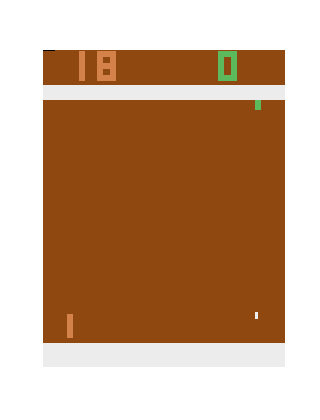
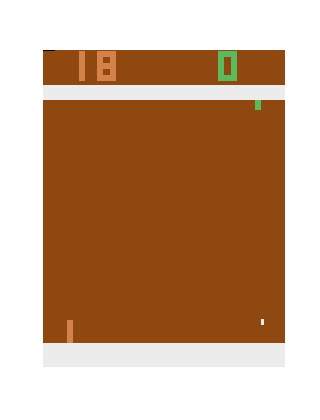
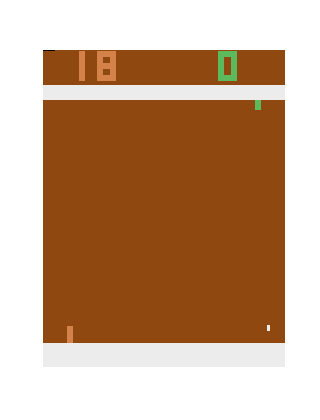
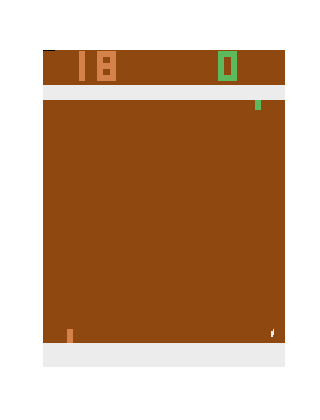
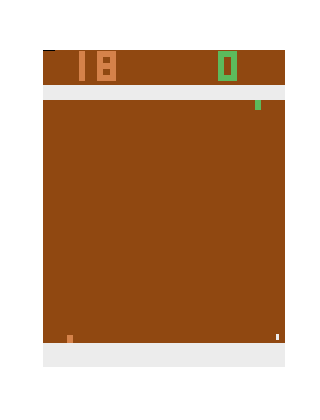
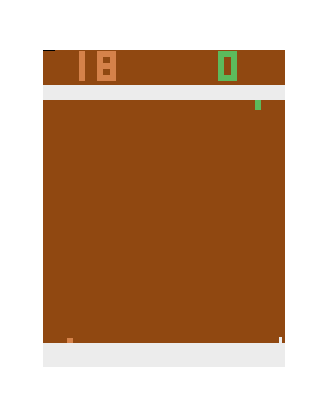
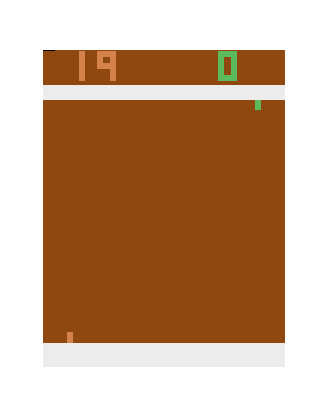
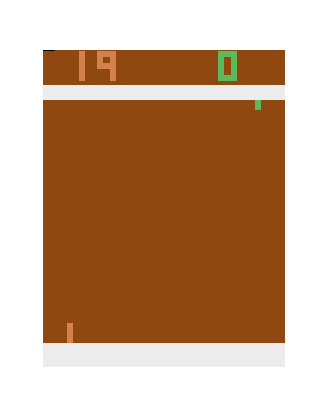
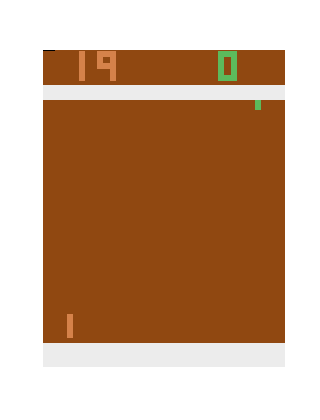
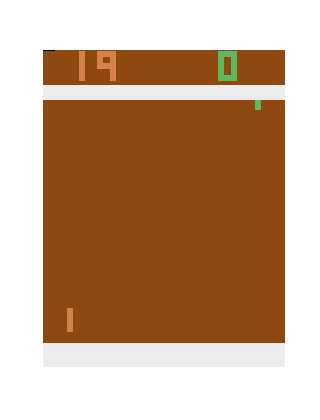
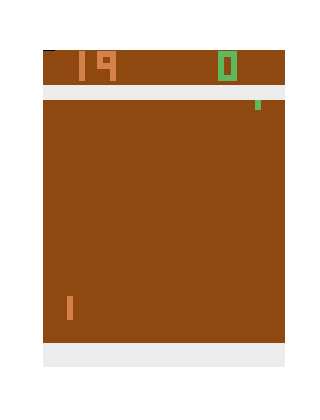
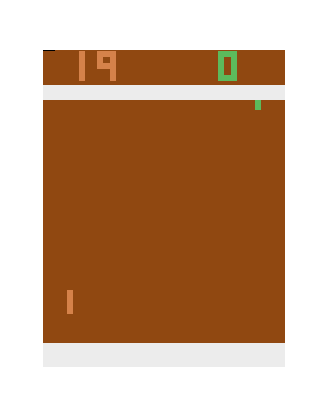
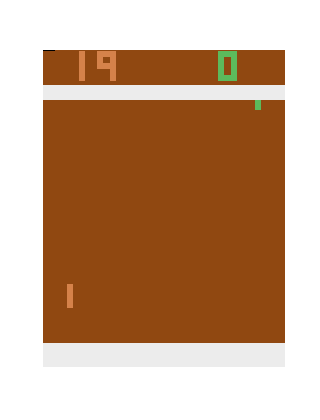
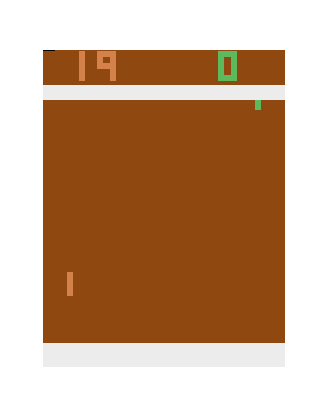
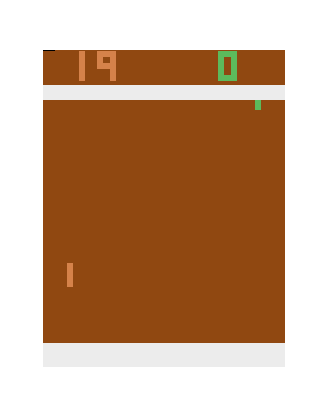
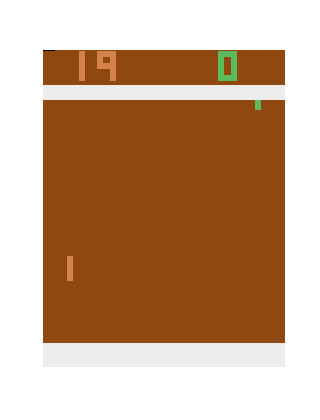
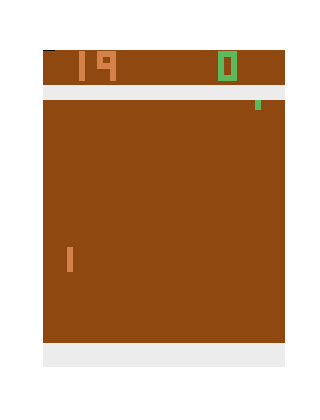
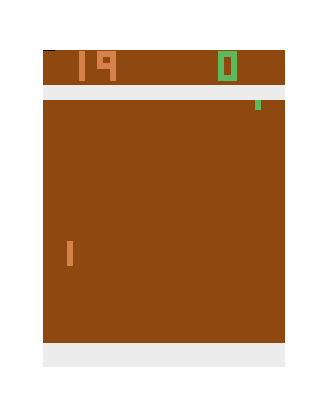
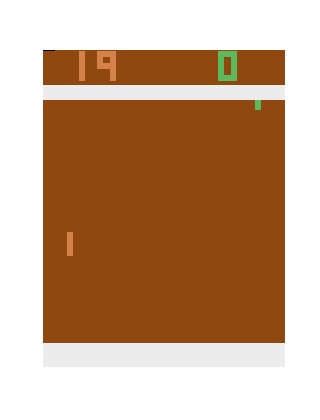
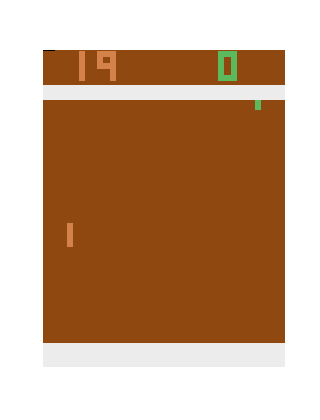
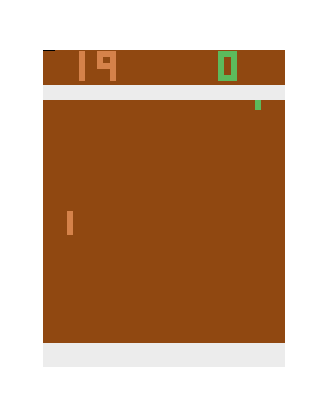
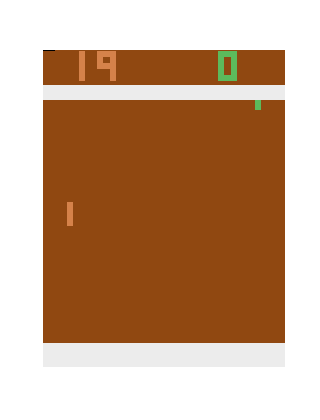
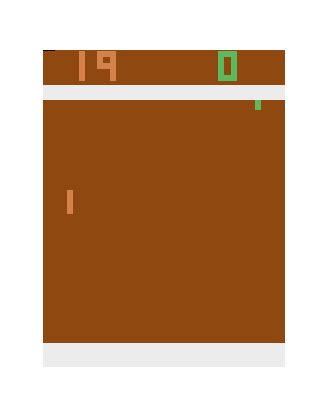
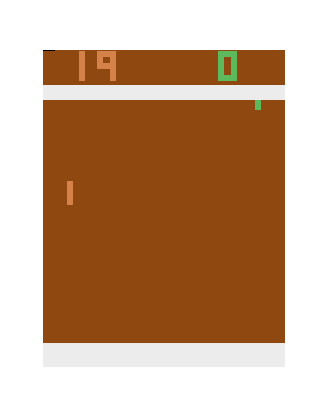
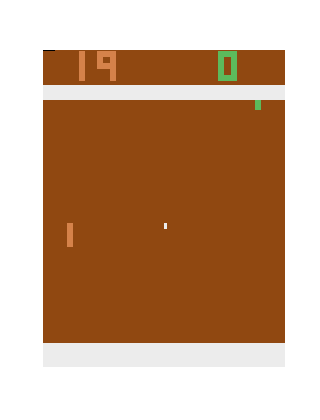
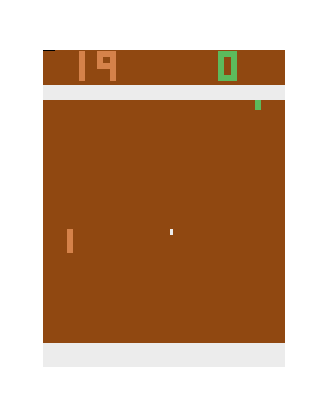
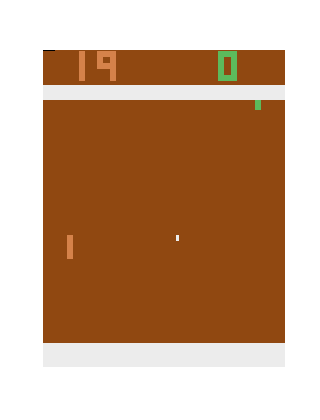
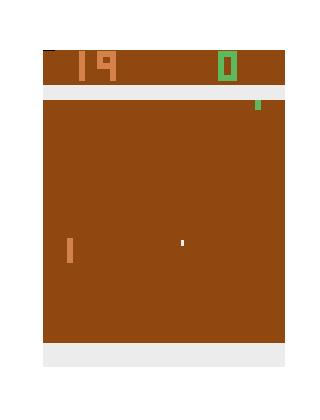
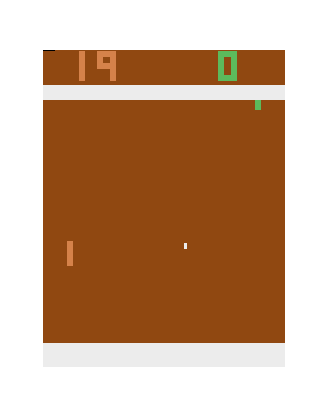
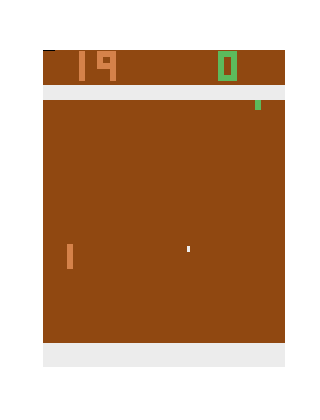
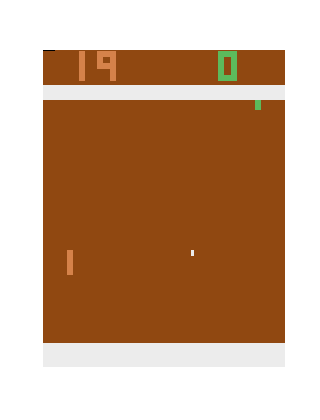
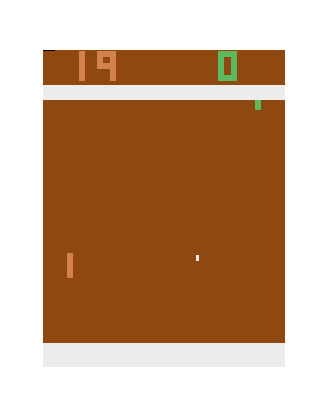
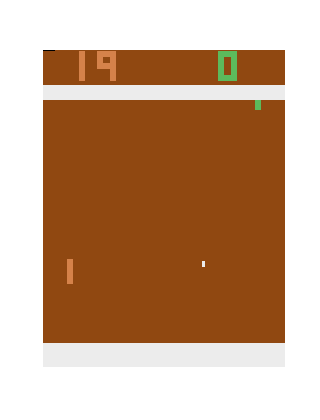
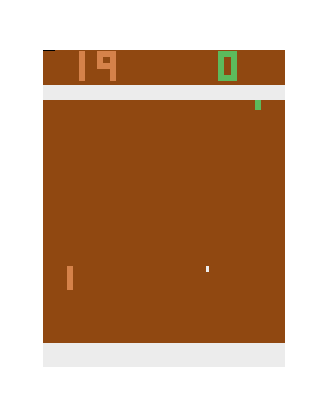
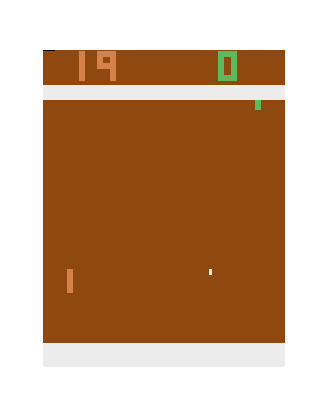
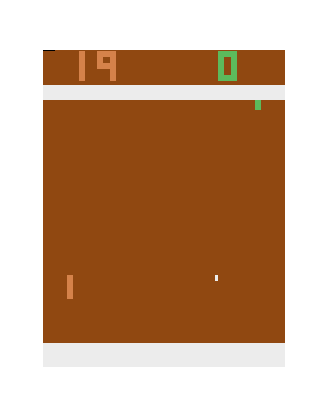
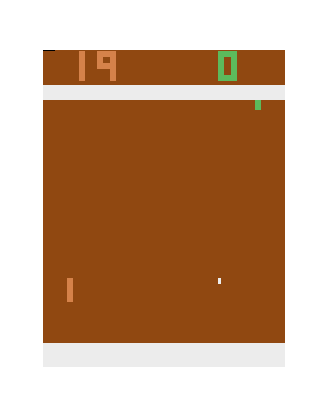
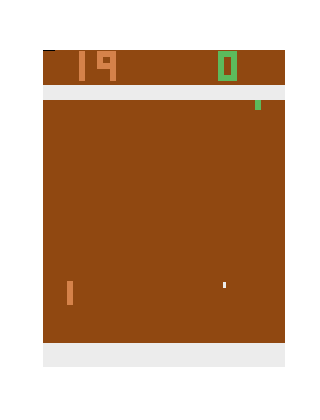
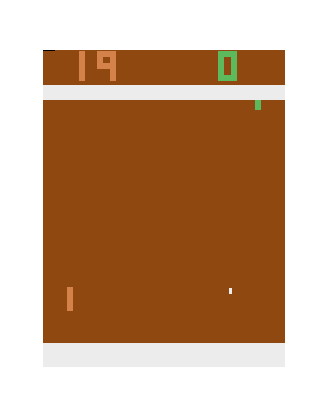
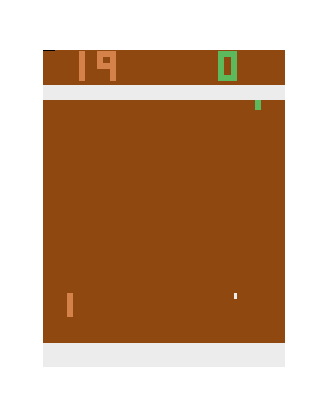
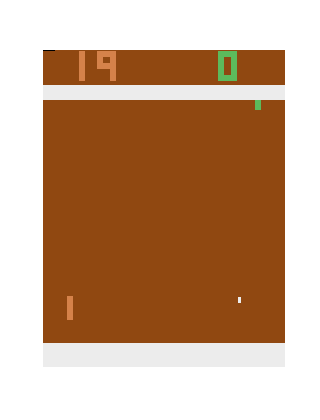
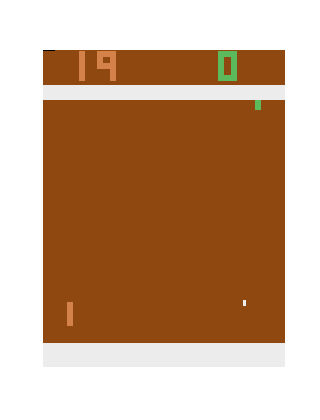
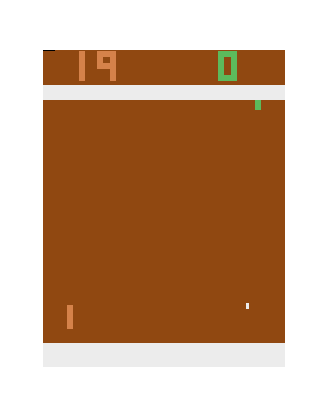
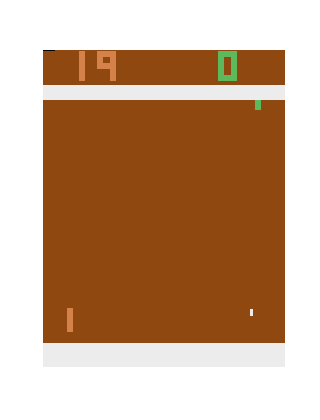
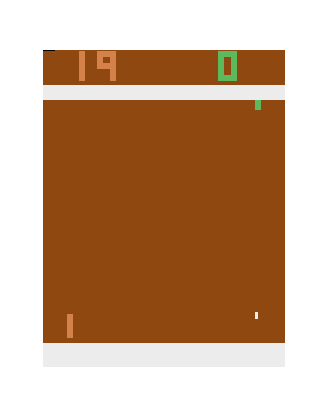
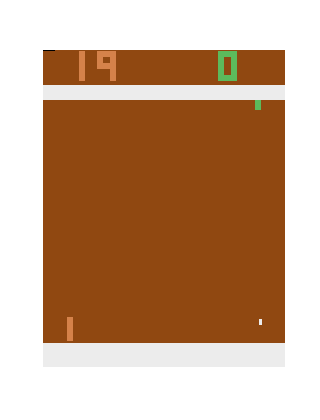
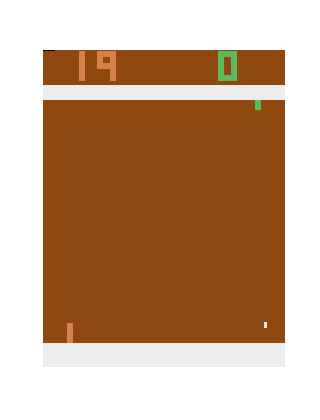
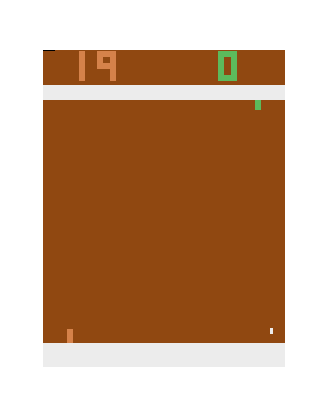
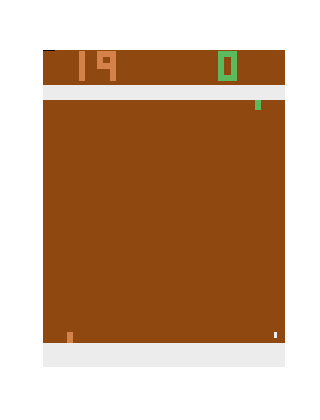
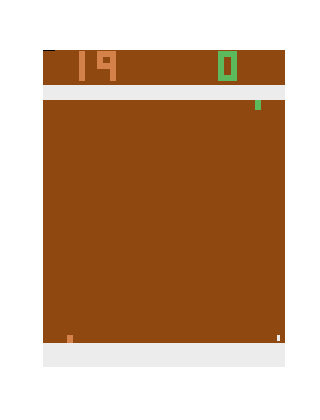
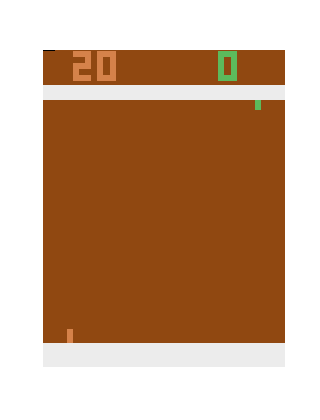
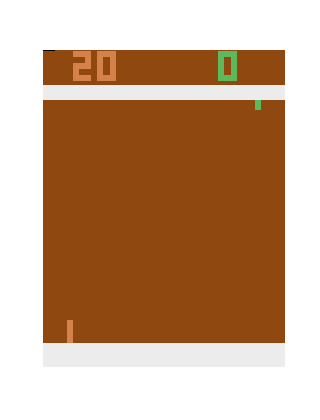
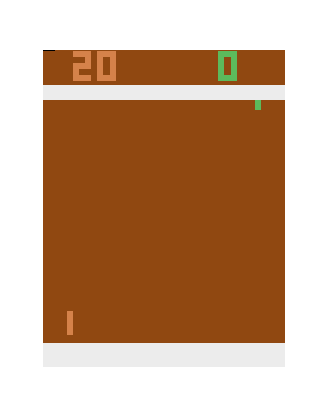
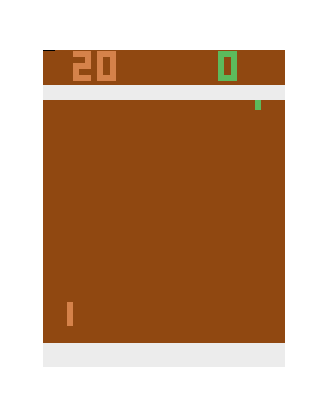
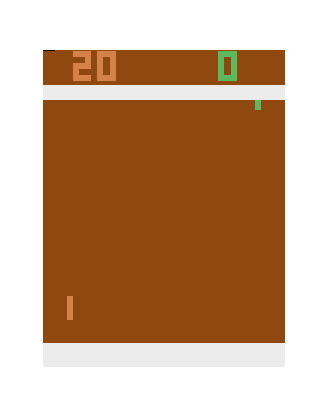
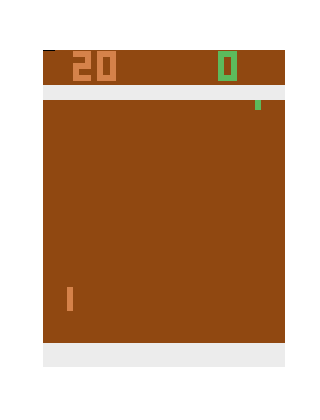
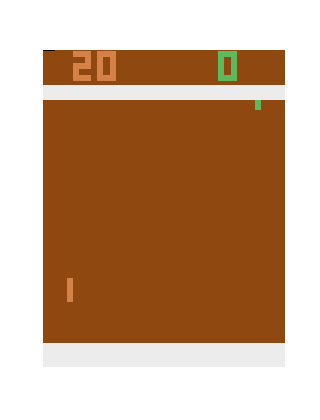
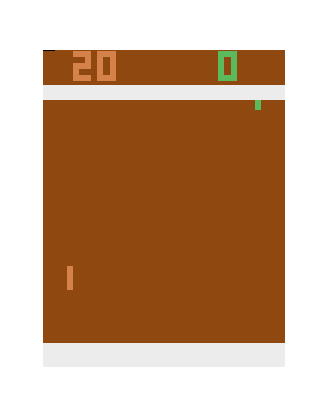
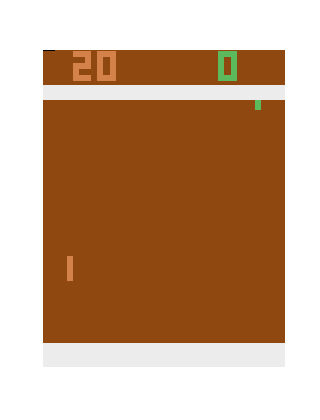
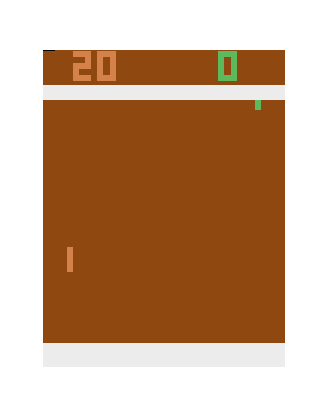
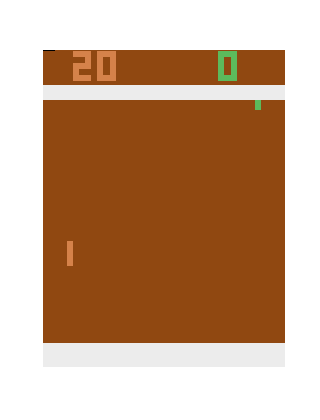
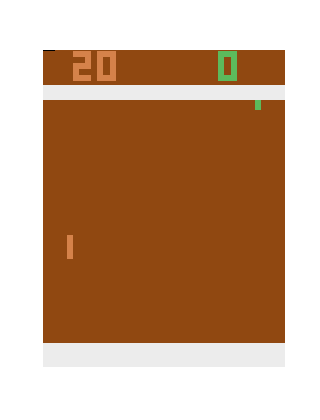
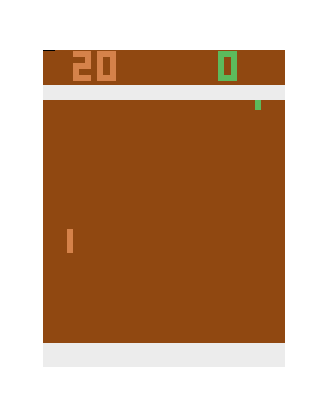
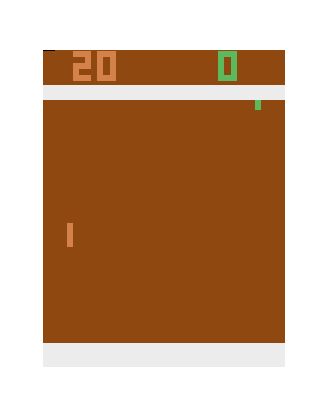
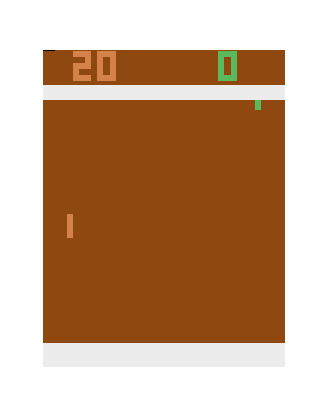
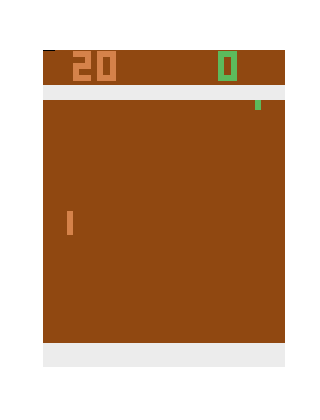
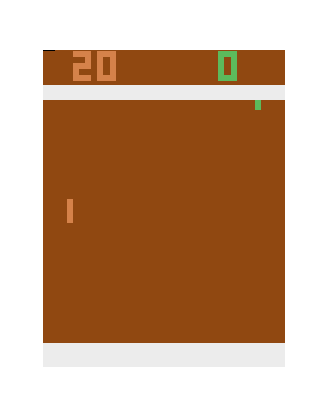
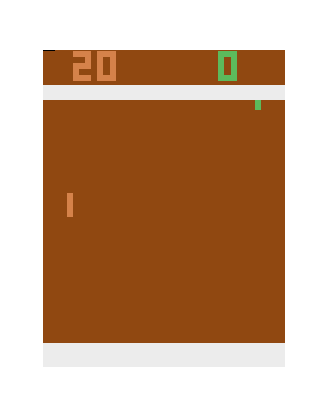
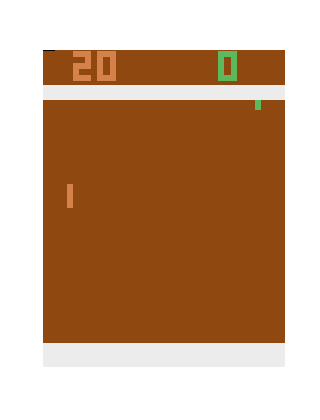
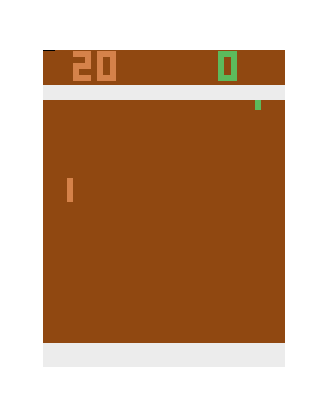
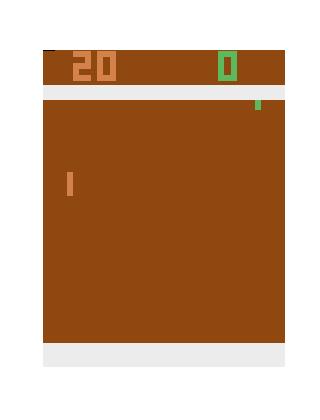
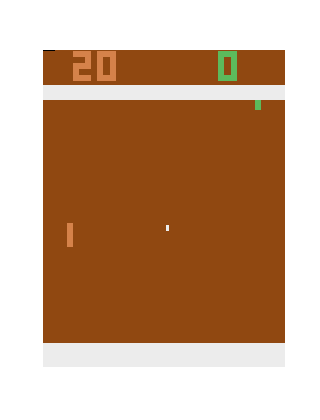
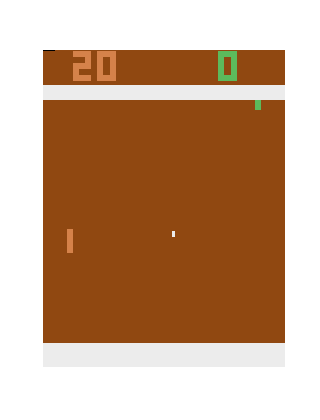
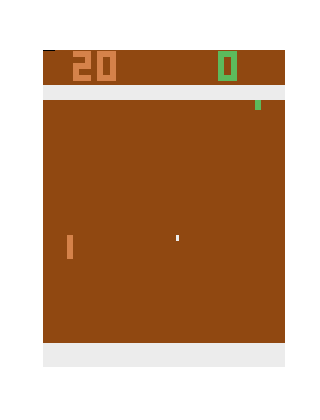
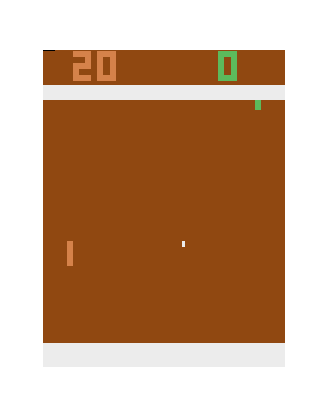

In [5]:
# Run a demo of the environment
observation = env.reset()
frames = []
for _ in range(1000):
    frames.append(env.render(mode = 'rgb_array'))
    action = 2 # move up
    observation, reward, done, info = env.step(action)
    if done:
        break
env.close()

display_frames_as_gif(frames)

### Simple policy
Without thinking too hard, we can construct a policy that moves towards the ball. I.e., if the ball is above the paddle, move up, if it is below, move down, and if it is in line, do nothing

In [6]:
# Find play area
print(observation.shape)
# Bounded by greys (236,236,236)
# observation[34:194,:,:]

(210, 160, 3)


In [7]:
# Find position of paddle
# Paddle colour is 92,186,92
print(np.where(observation[34:194,:,1]==186))

(array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5,
       5, 5]), array([140, 141, 142, 143, 140, 141, 142, 143, 140, 141, 142, 143, 140,
       141, 142, 143, 140, 141, 142, 143, 140, 141, 142, 143]))


In [8]:
observation[34:40,140:144,:]

array([[[ 92, 186,  92],
        [ 92, 186,  92],
        [ 92, 186,  92],
        [ 92, 186,  92]],

       [[ 92, 186,  92],
        [ 92, 186,  92],
        [ 92, 186,  92],
        [ 92, 186,  92]],

       [[ 92, 186,  92],
        [ 92, 186,  92],
        [ 92, 186,  92],
        [ 92, 186,  92]],

       [[ 92, 186,  92],
        [ 92, 186,  92],
        [ 92, 186,  92],
        [ 92, 186,  92]],

       [[ 92, 186,  92],
        [ 92, 186,  92],
        [ 92, 186,  92],
        [ 92, 186,  92]],

       [[ 92, 186,  92],
        [ 92, 186,  92],
        [ 92, 186,  92],
        [ 92, 186,  92]]], dtype=uint8)

Given it can only move up and down, the position of the paddle ranges from 34:194

In [9]:
# Find position of ball
# Ball is also (236,236,236)
print(np.where(observation[34:194,:,1]==236))

(array([95, 95, 96, 96, 97, 97, 98, 98]), array([94, 95, 94, 95, 94, 95, 94, 95]))


Ball is 4x2 - and assume can be anywhere in play area


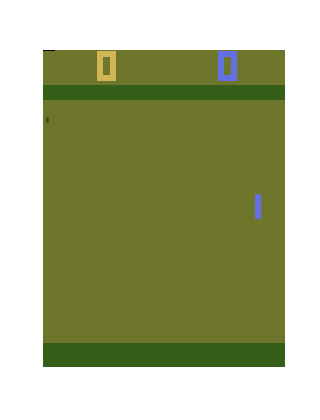
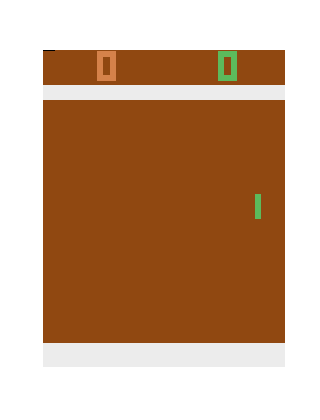
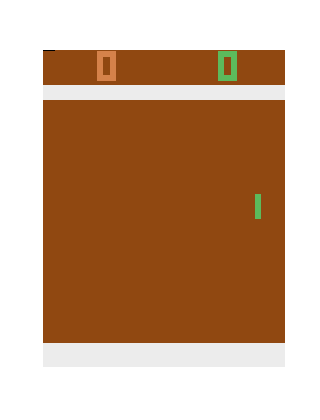
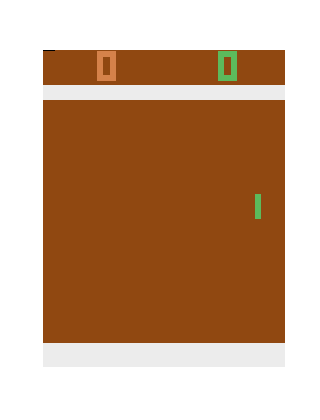
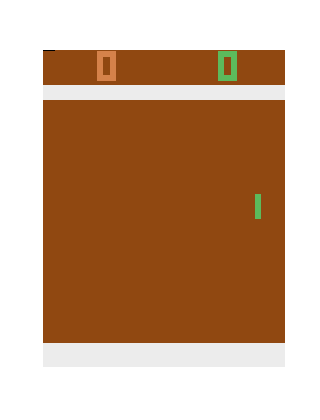
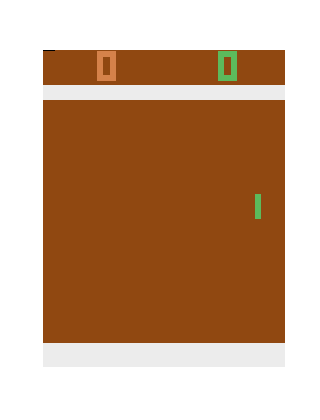
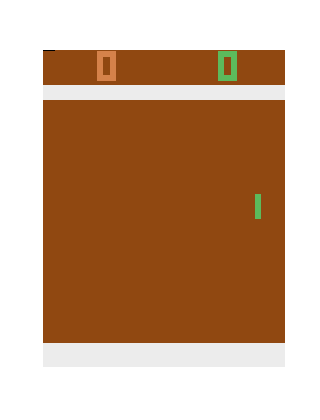
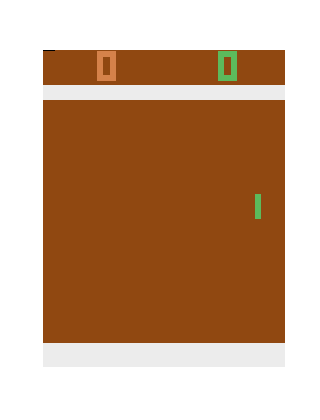
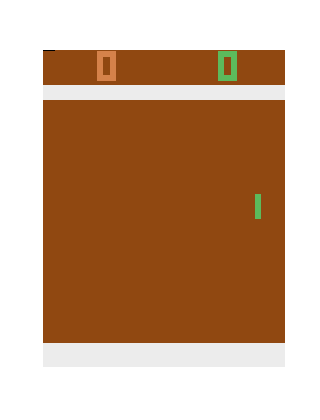
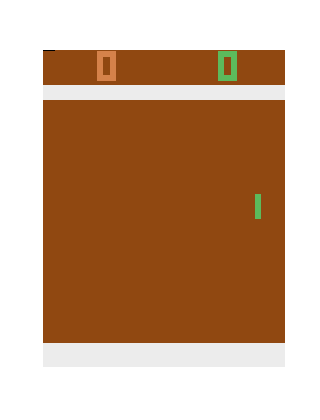
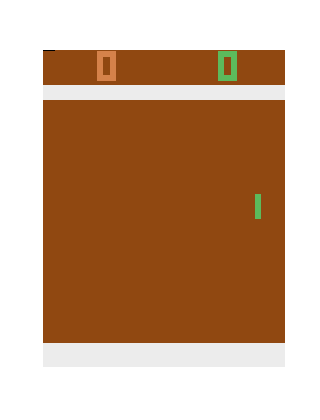
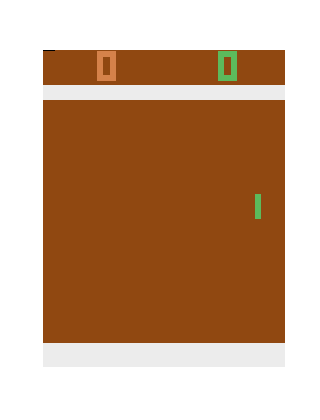
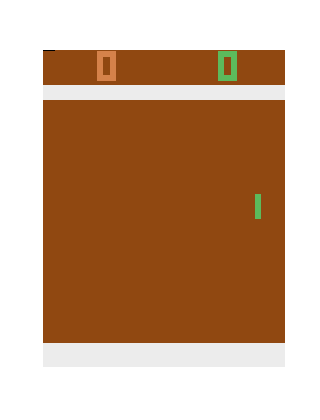
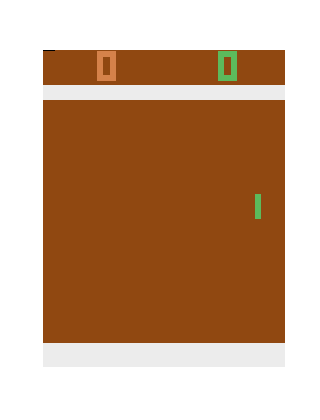
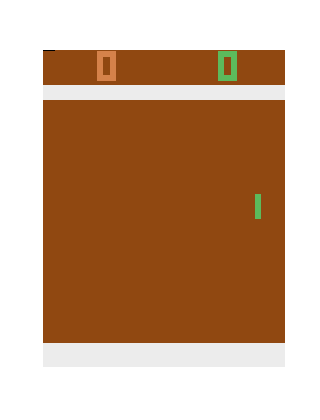
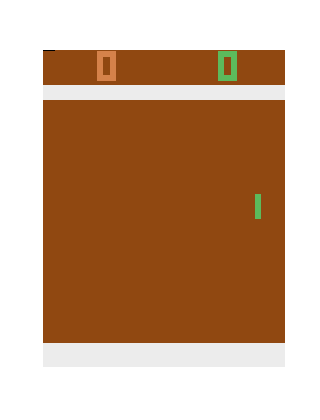
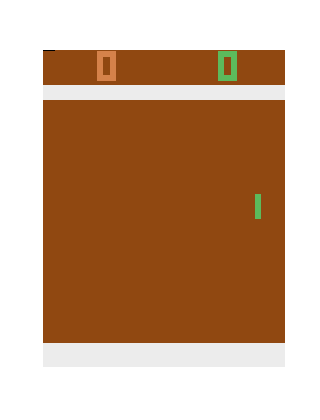
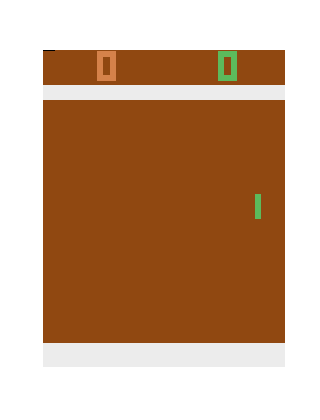
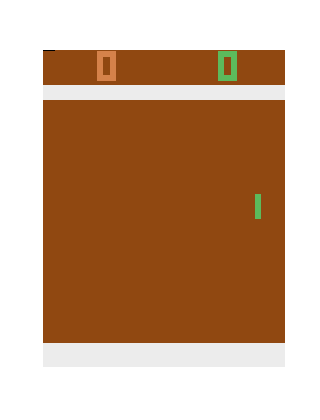
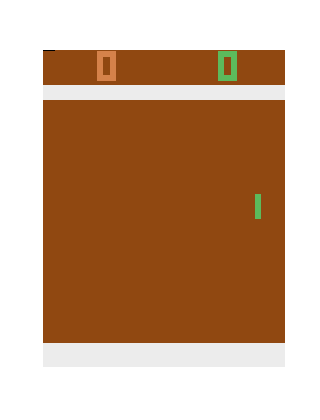
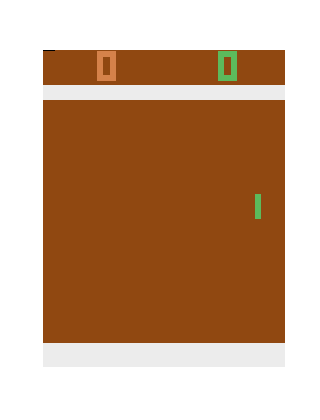
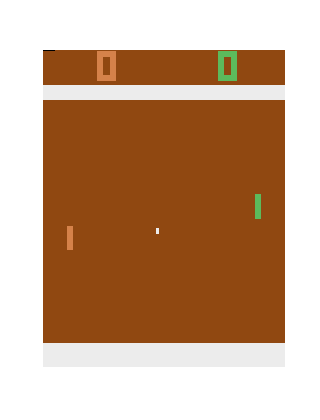
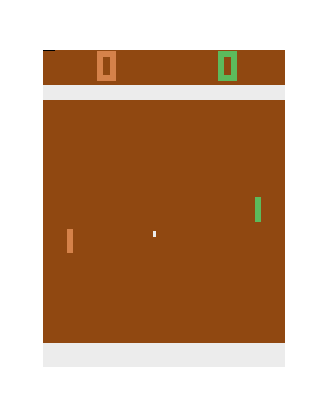
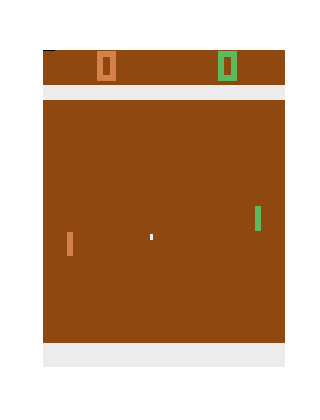
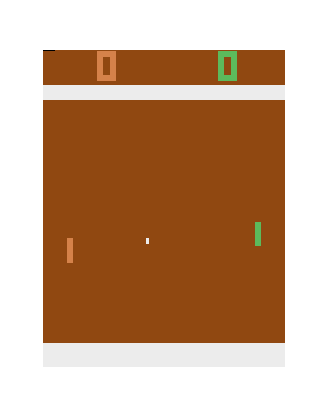
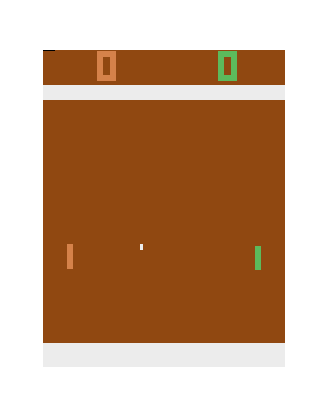
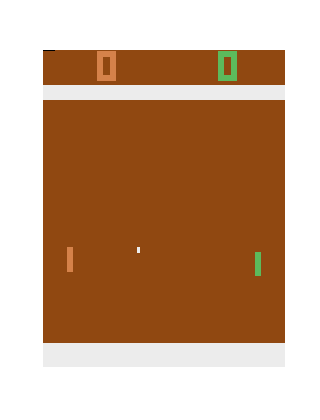
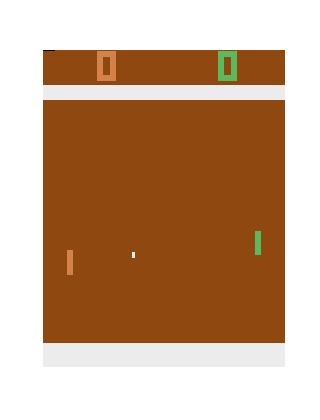
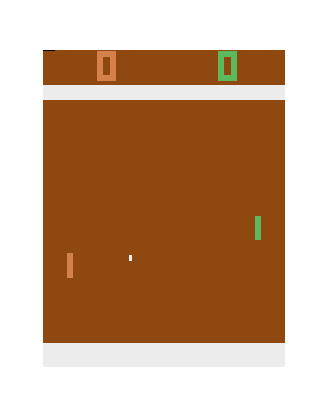
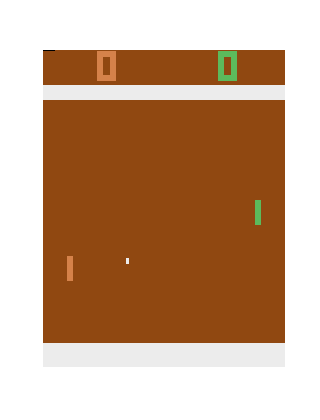
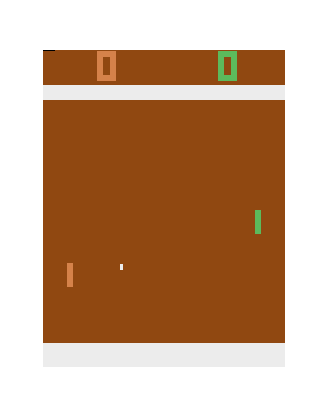
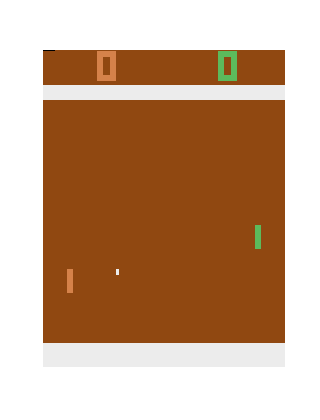
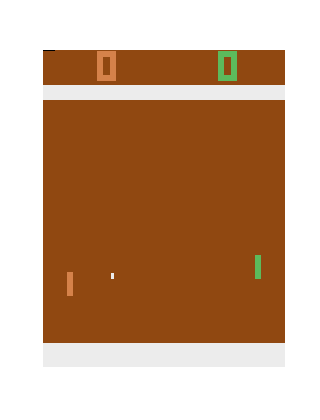
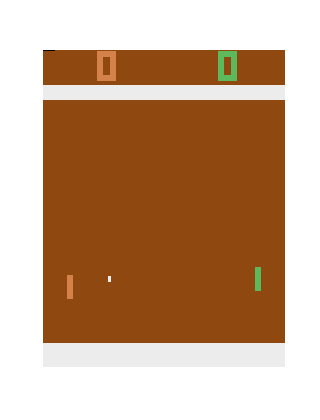
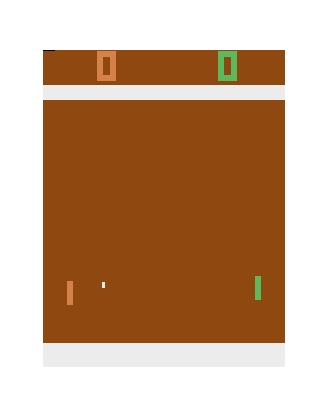
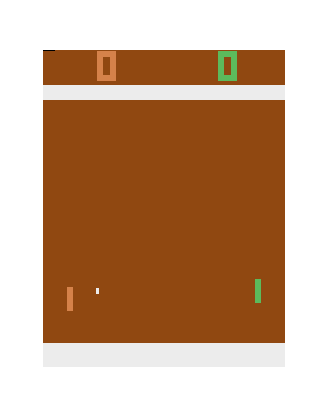
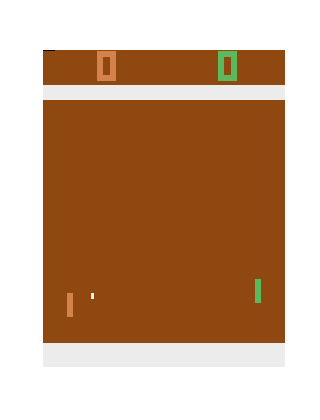
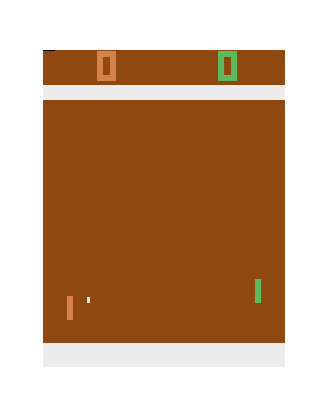
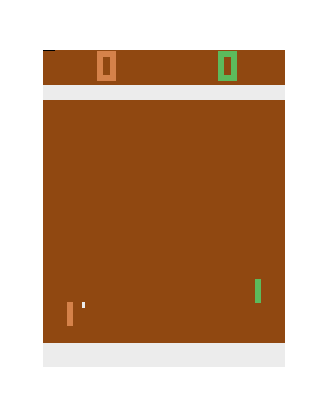
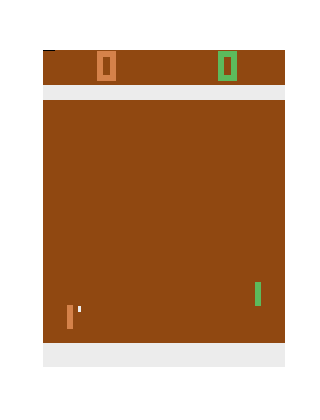
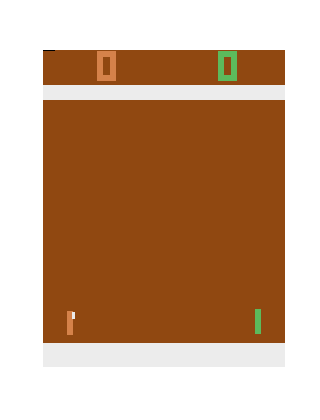
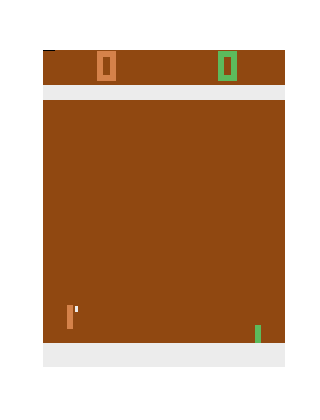
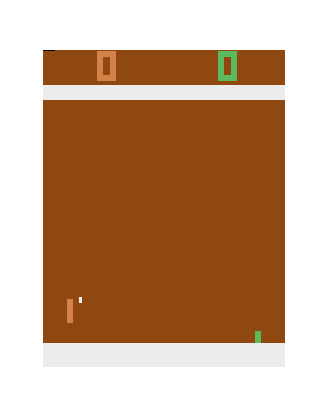
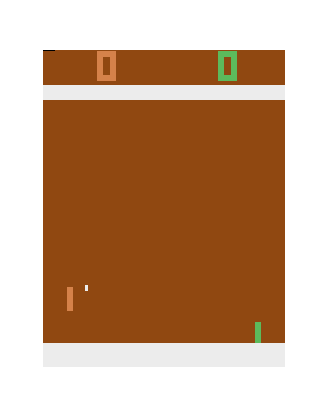
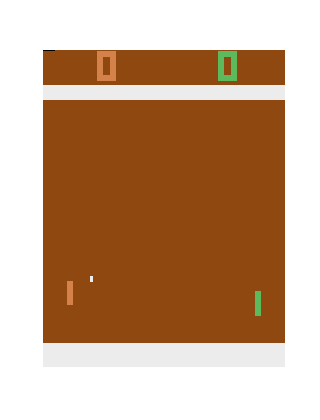
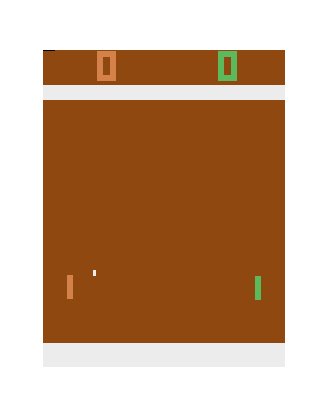
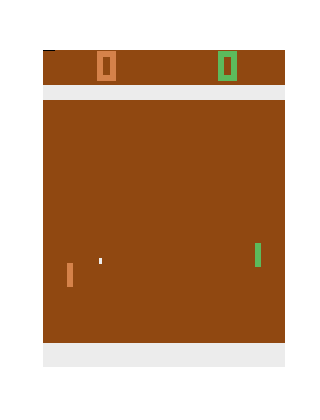
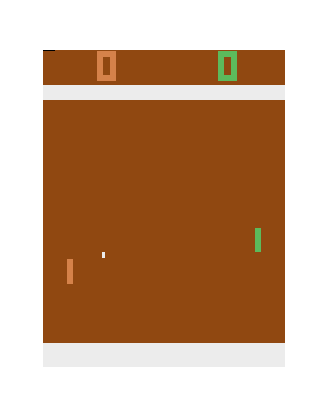
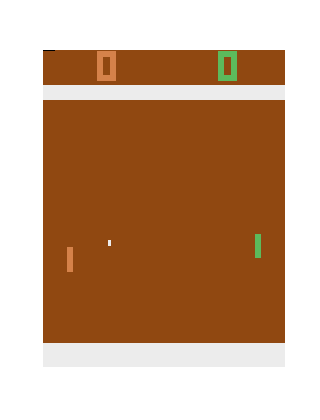
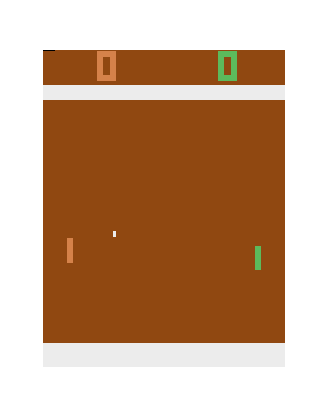
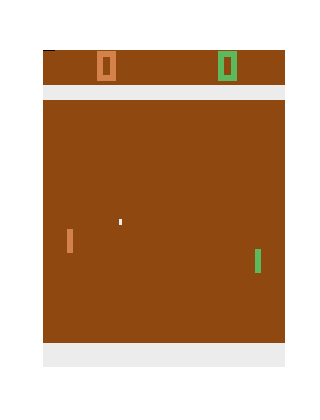
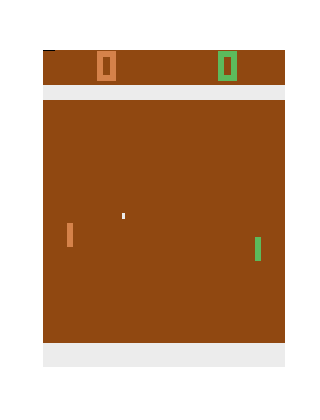
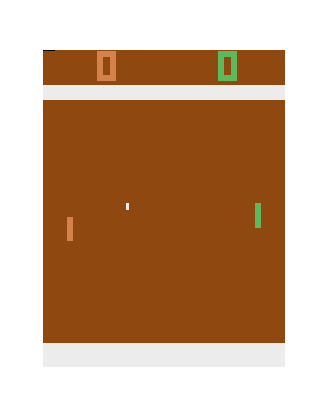
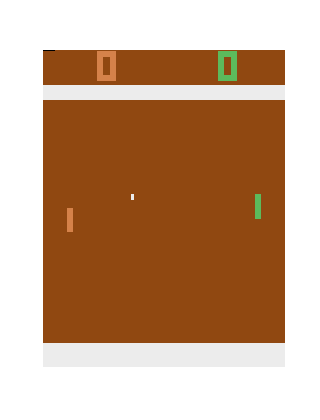
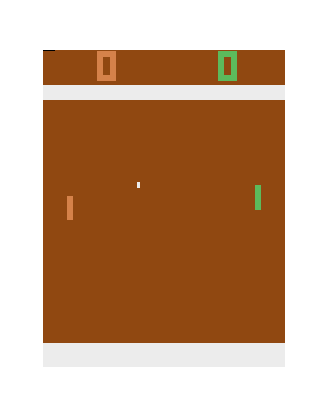
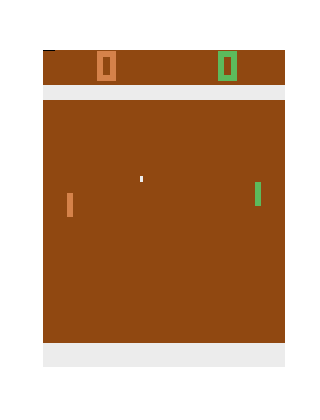
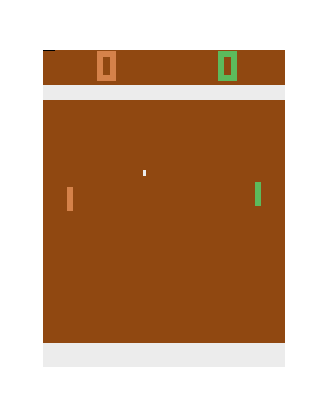
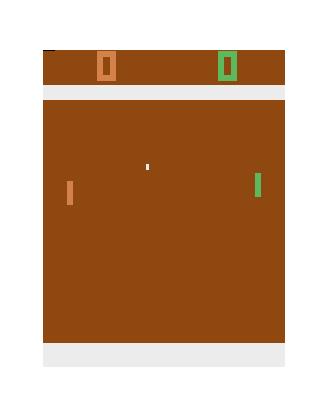
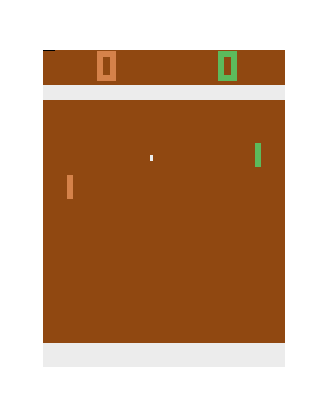
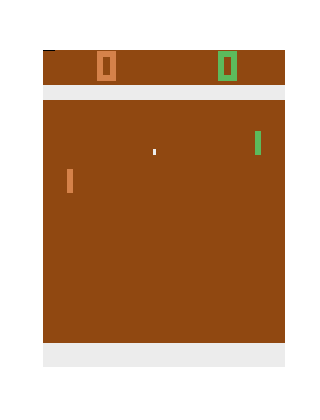
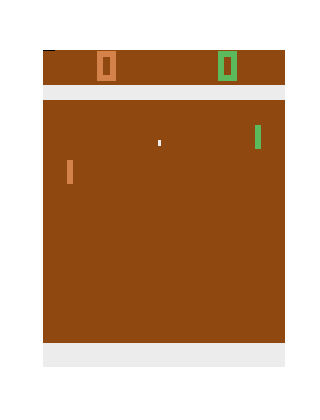
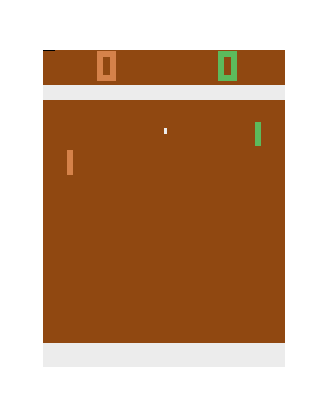
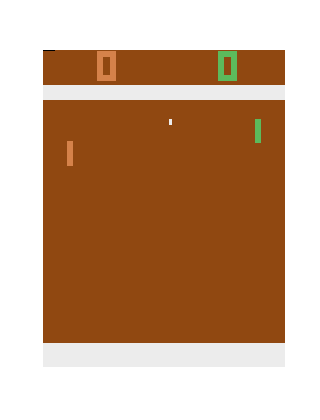
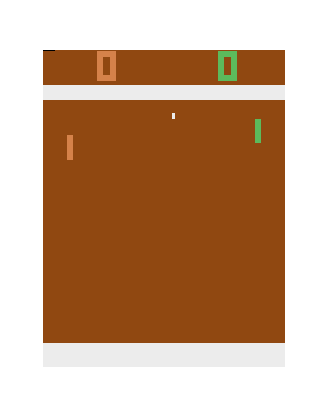
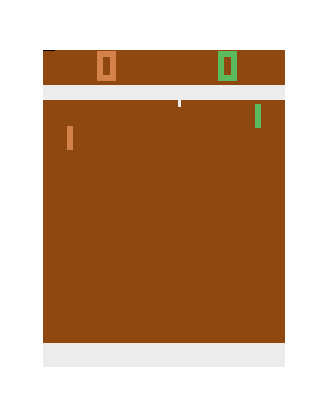
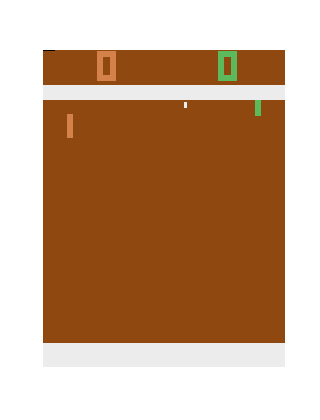
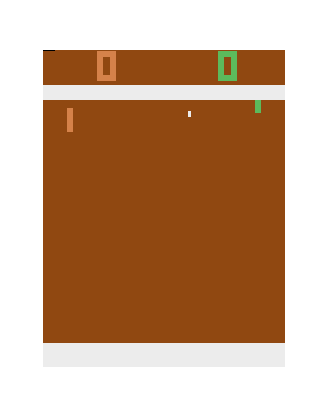
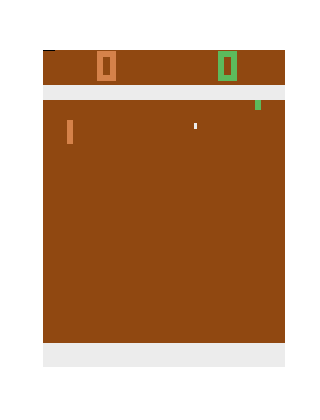
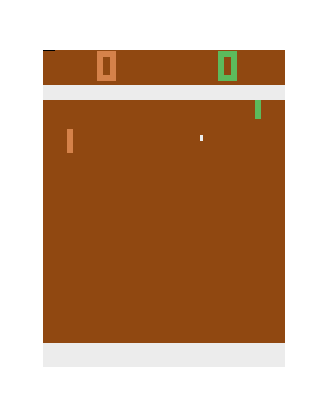
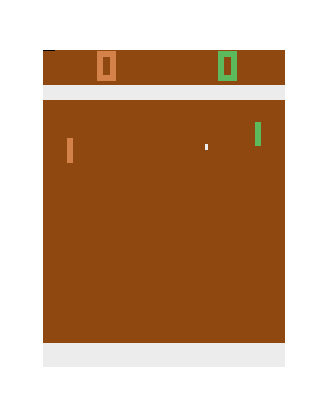
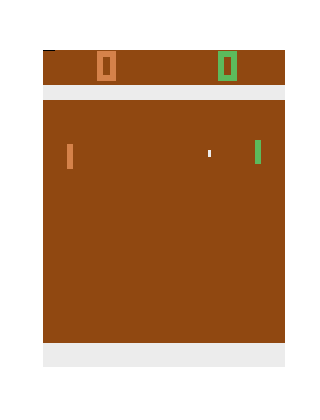
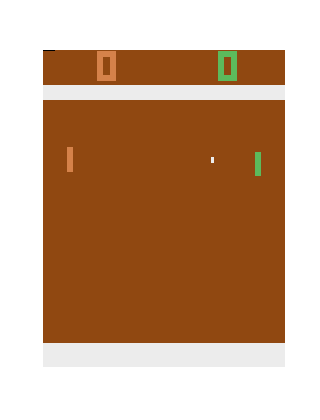
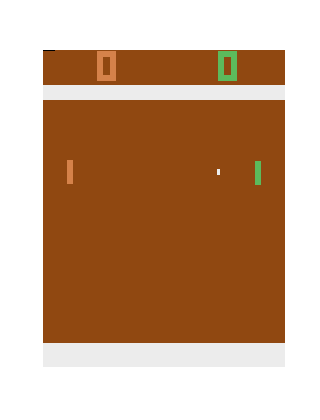
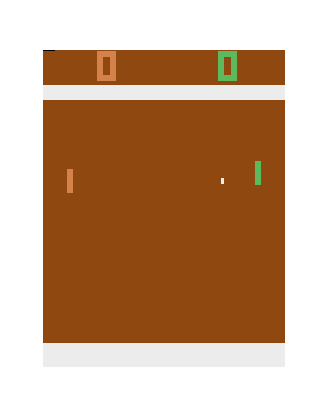
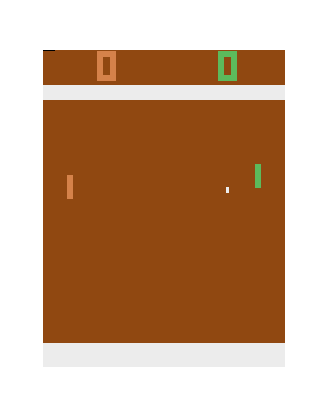
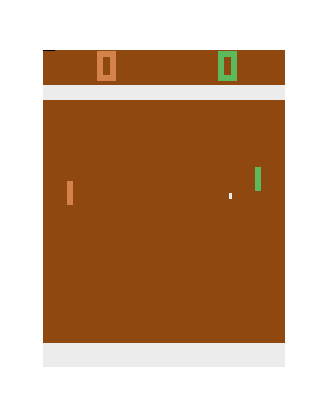
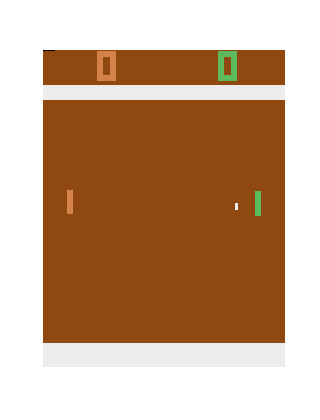
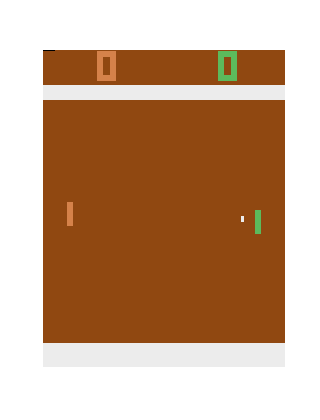
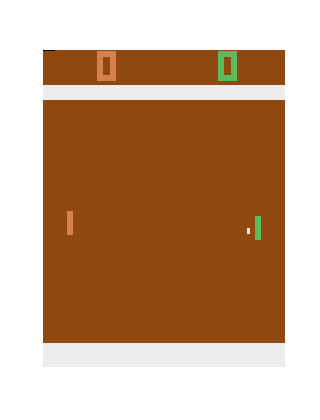
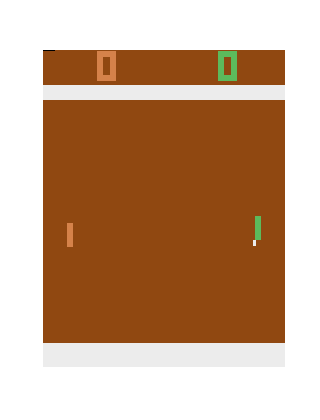
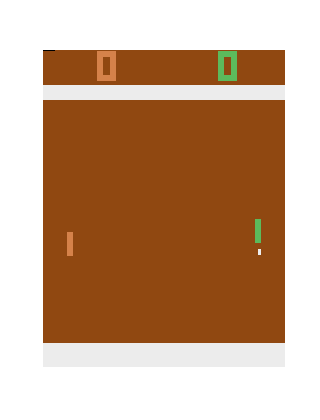
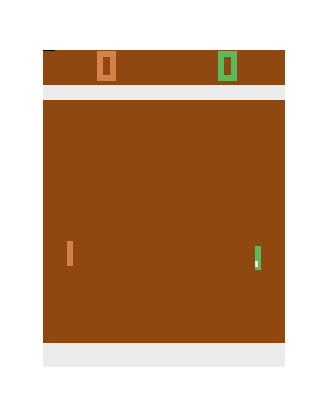
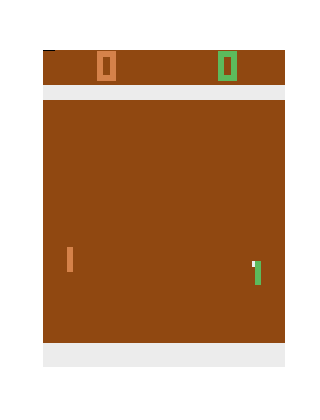
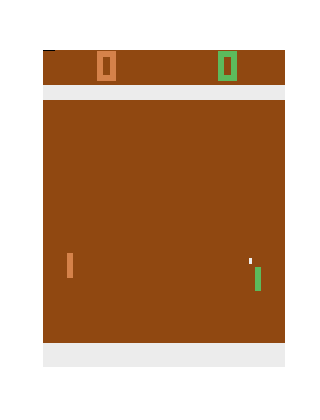
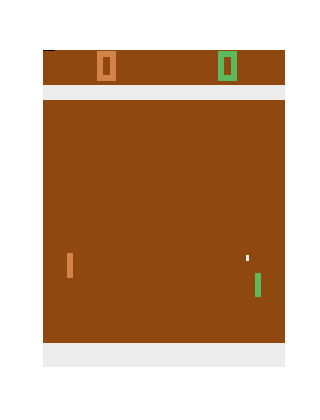
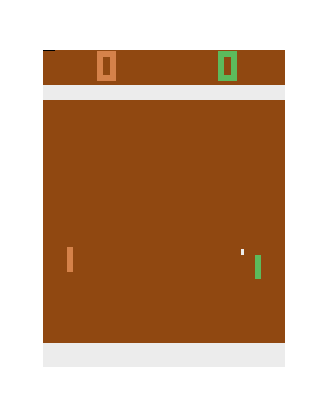
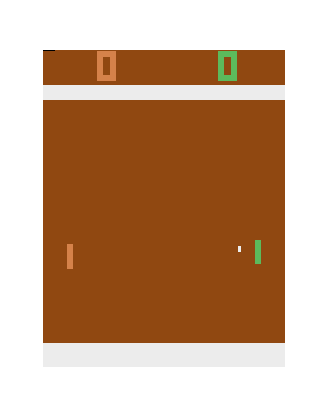
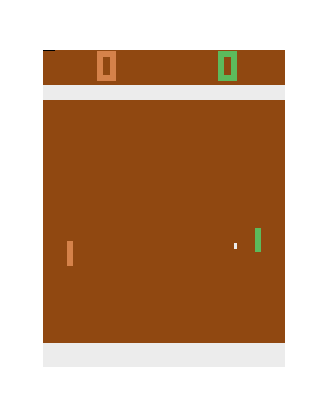
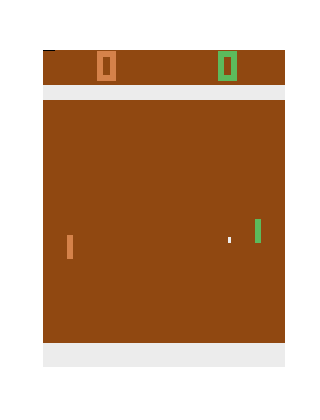
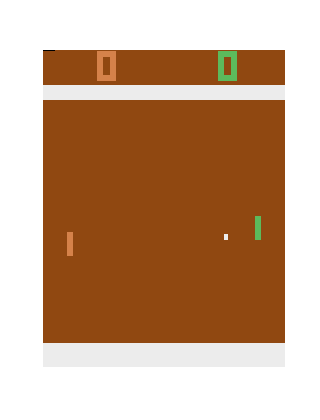
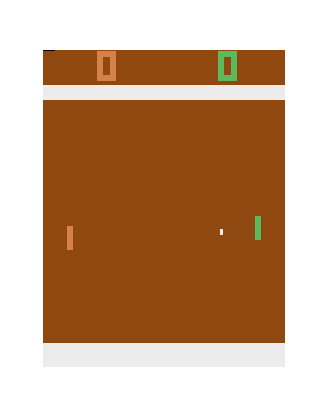
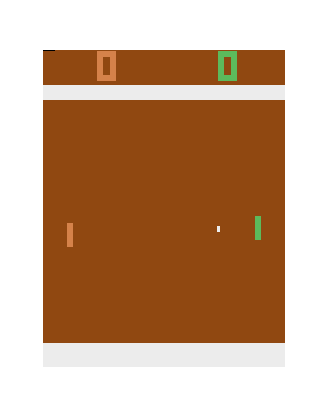
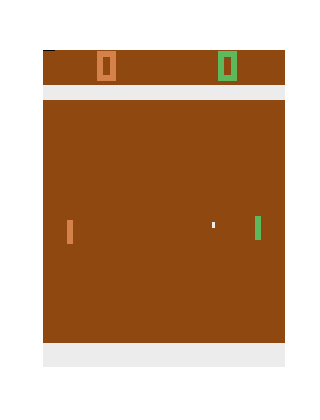
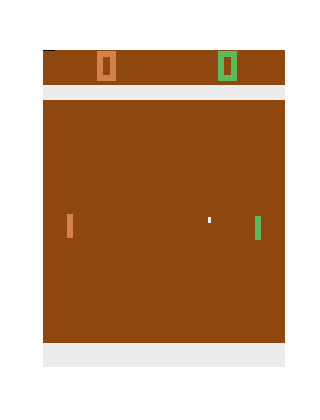
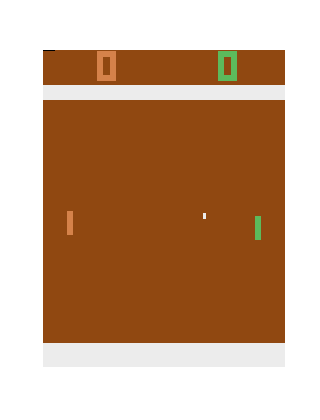
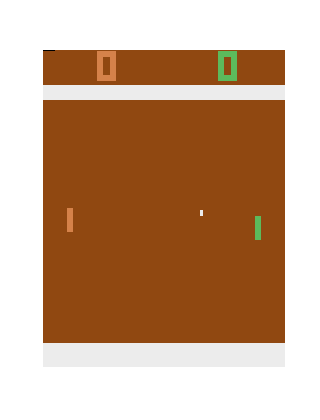
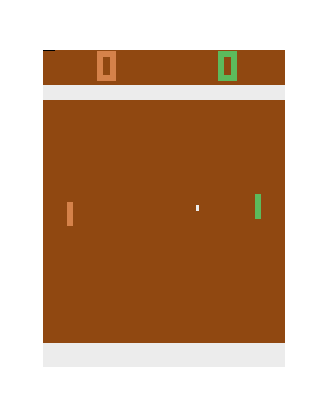
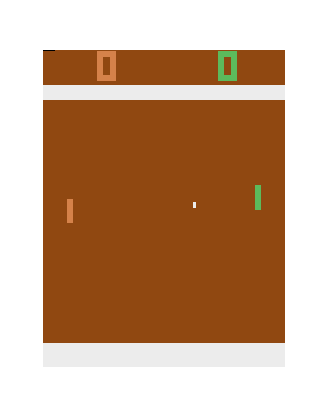
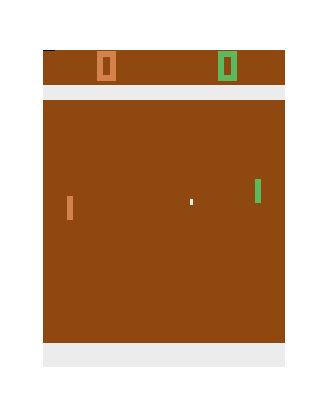
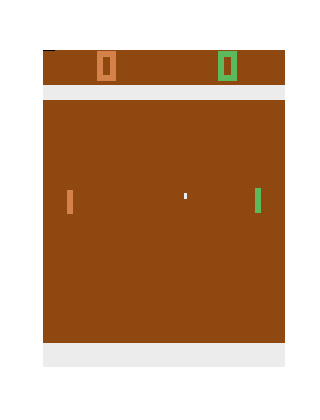
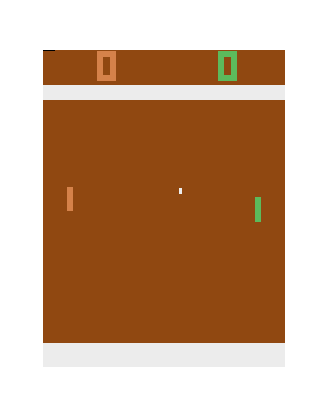
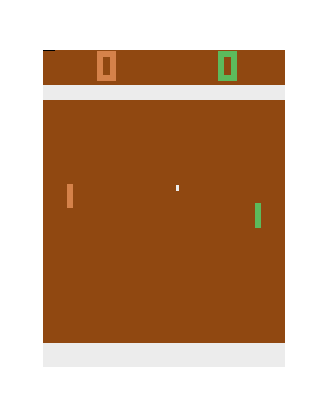
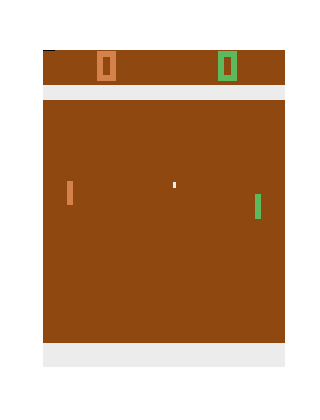
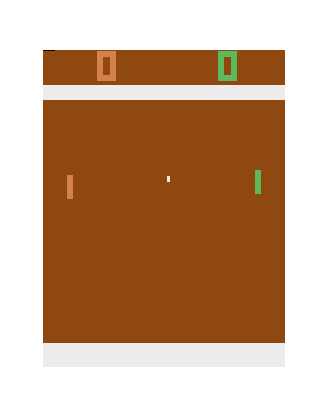
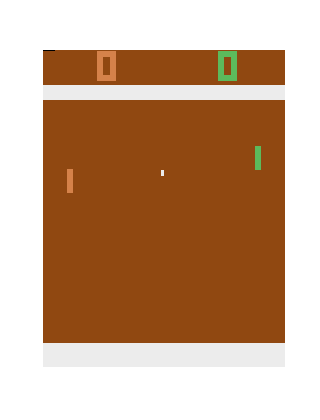
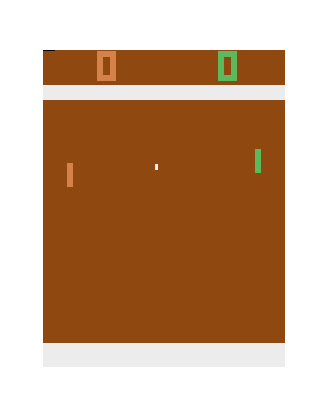
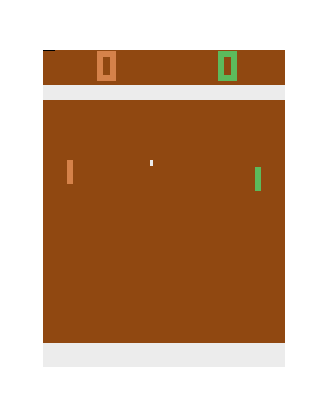
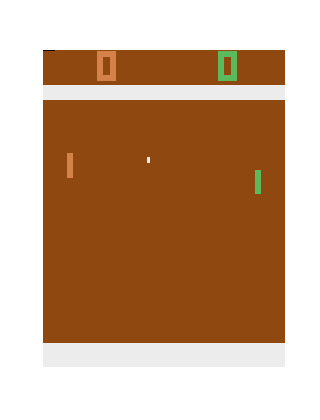
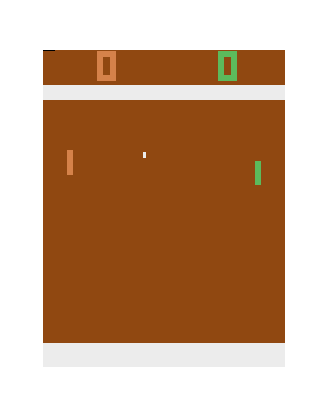
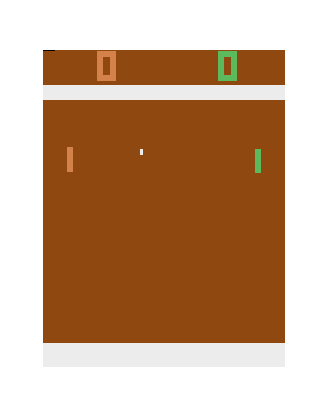
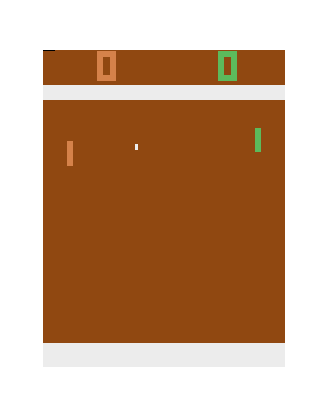
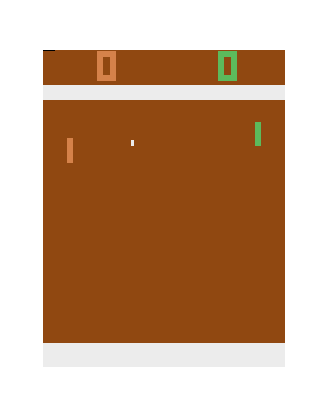
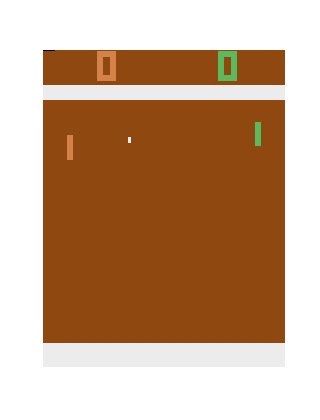
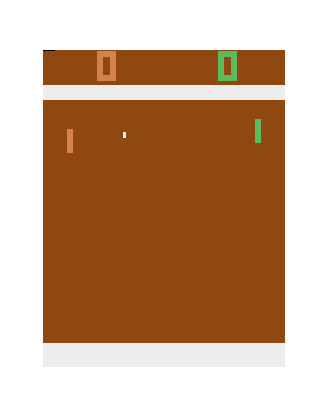
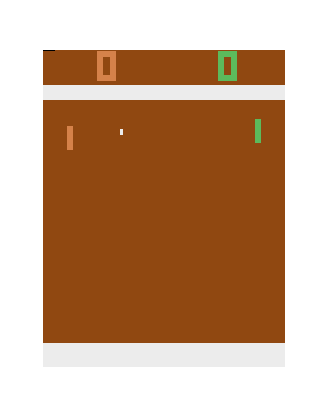
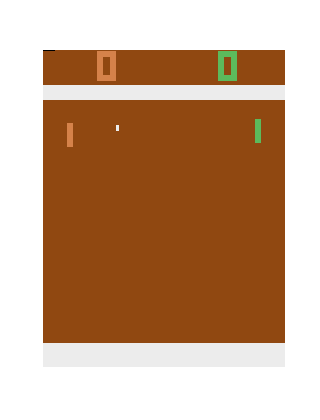
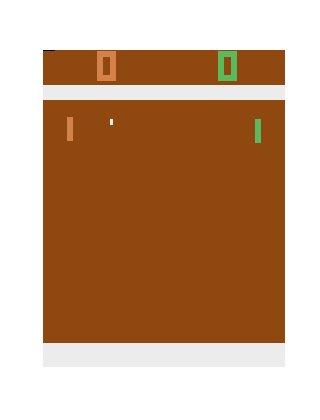
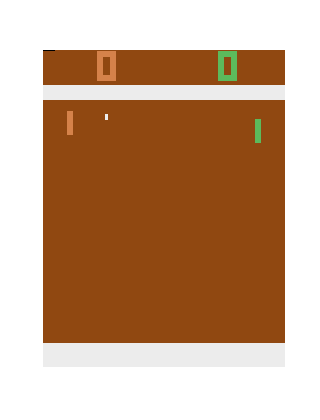
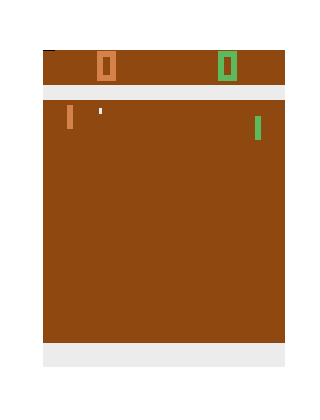
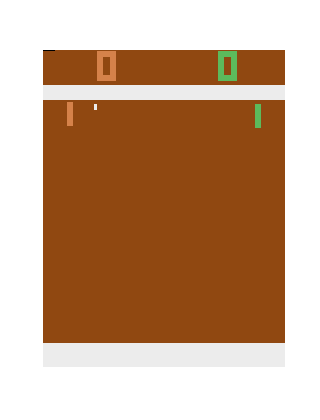
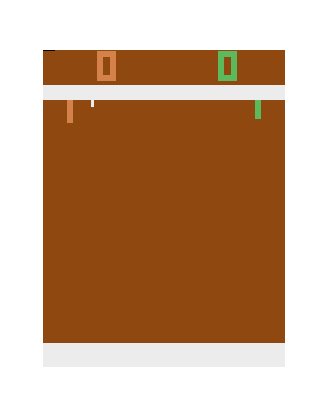
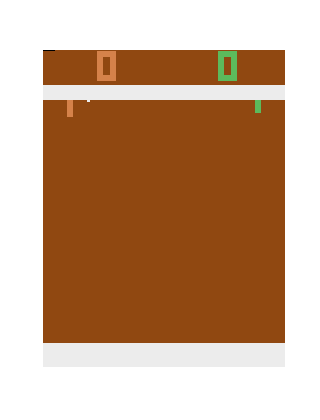
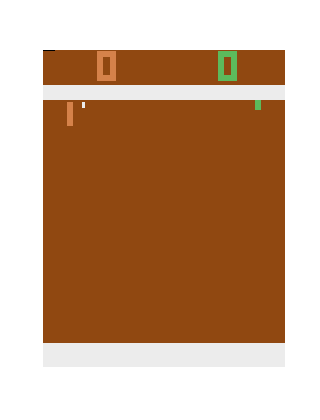
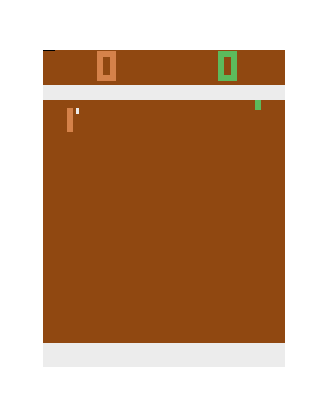
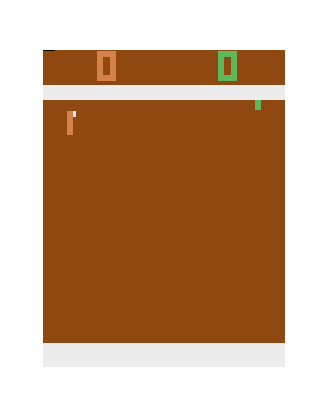
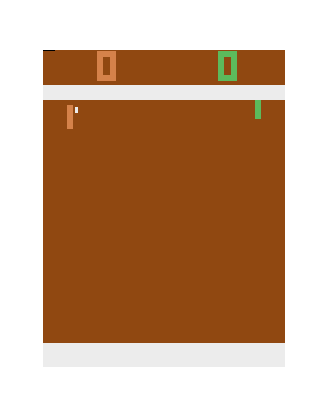
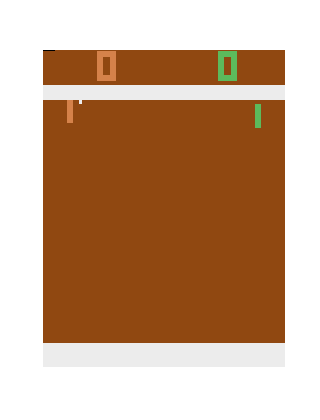
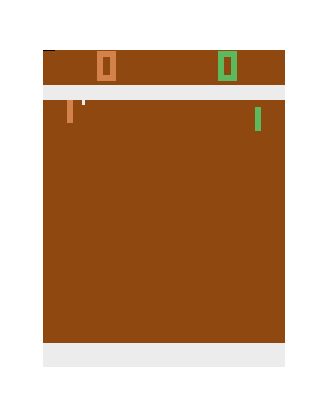
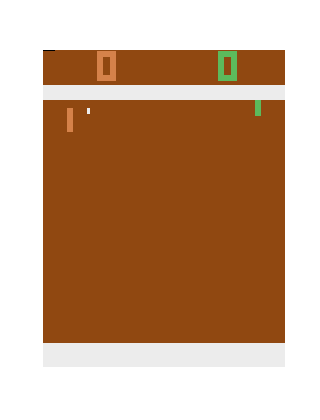
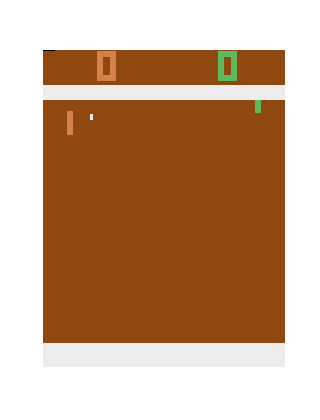
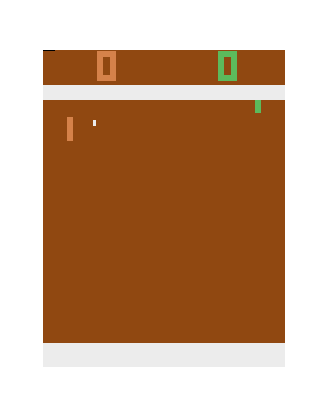
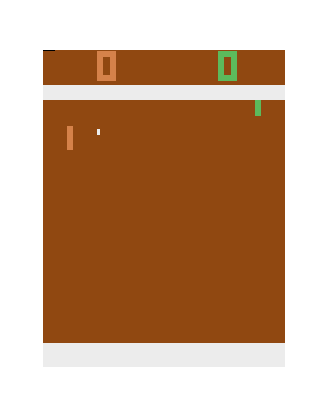
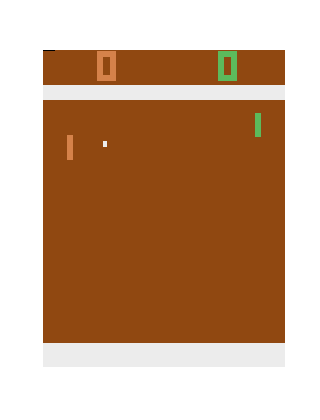
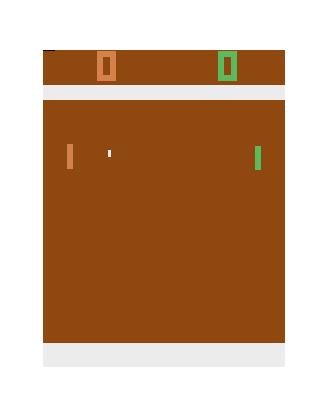
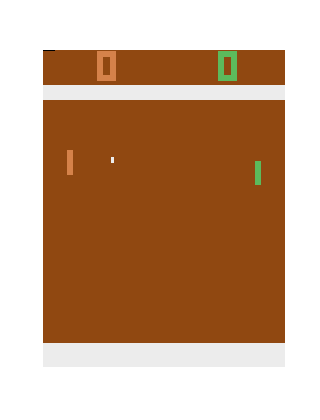
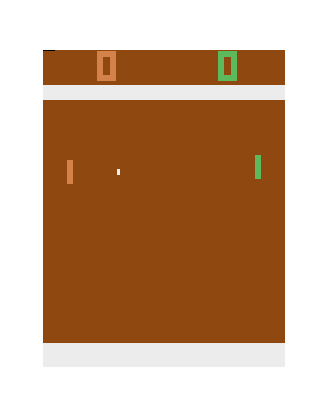
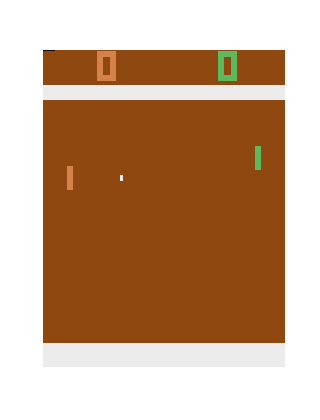
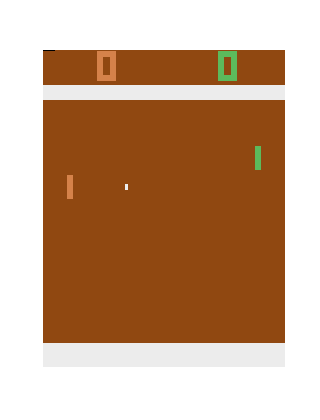
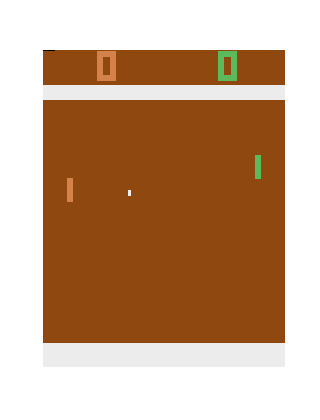
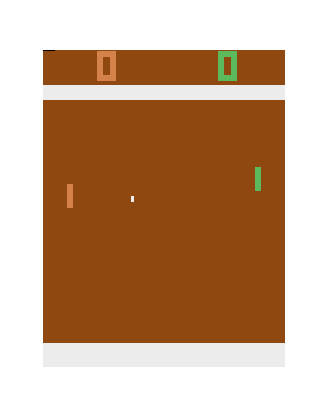
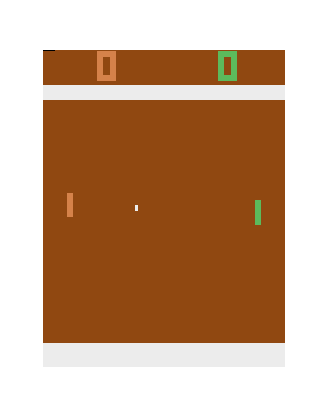
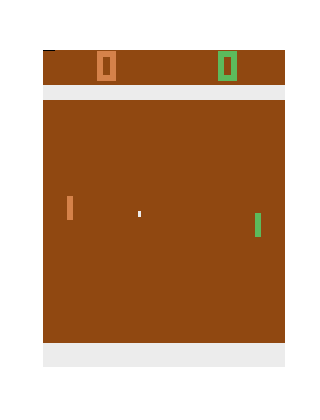
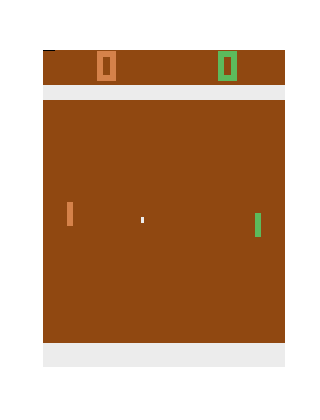
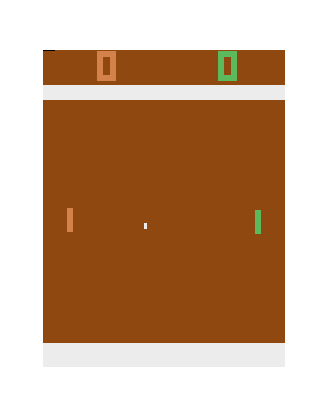
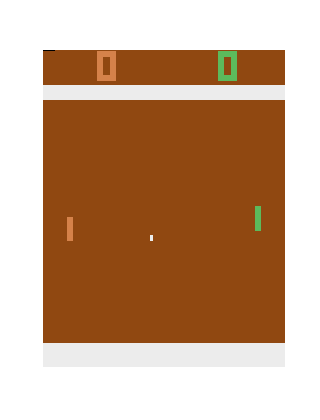
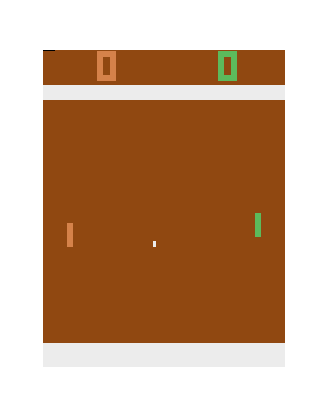
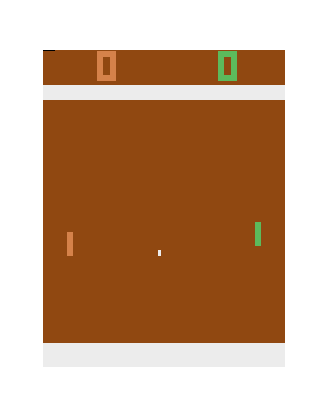
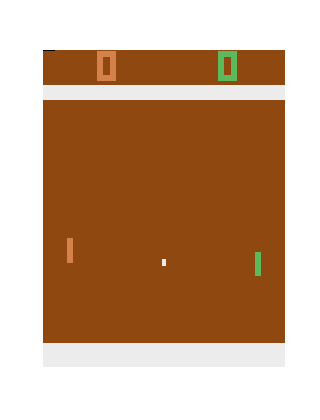
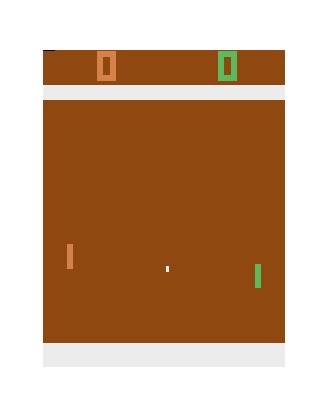
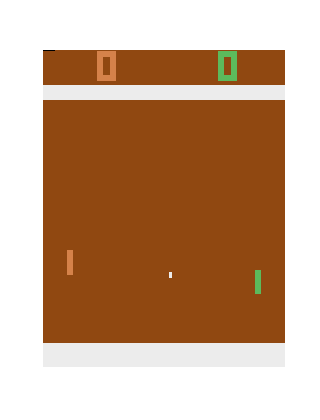
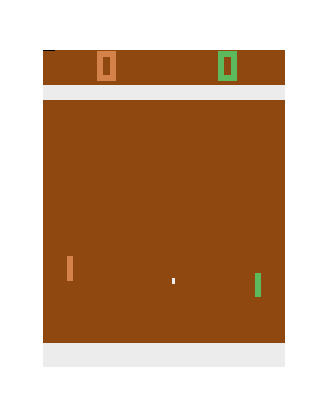
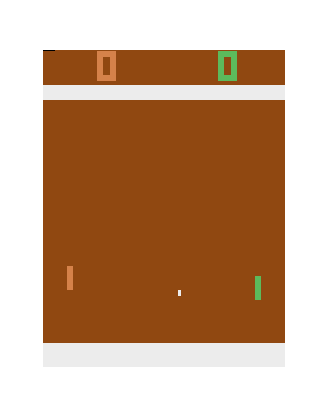
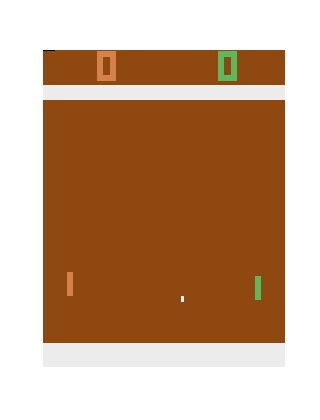
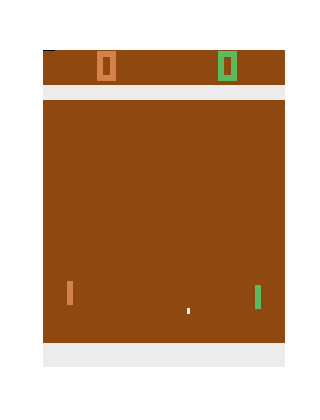
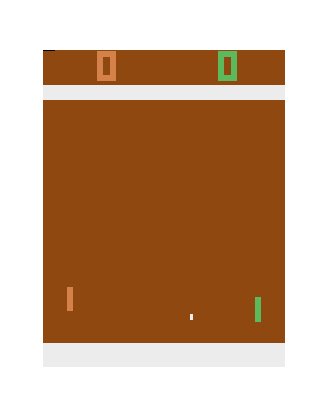
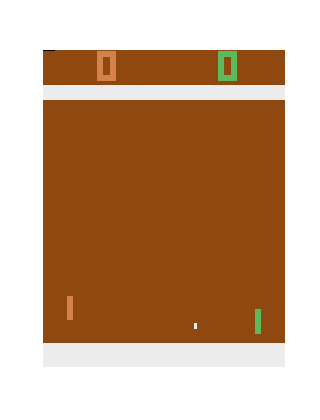
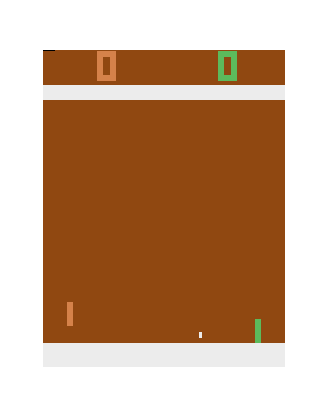
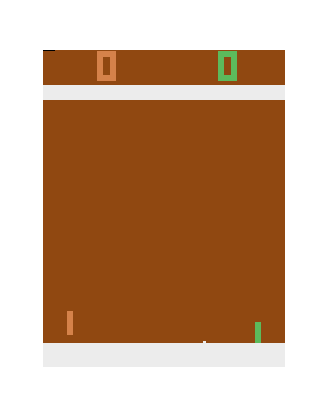
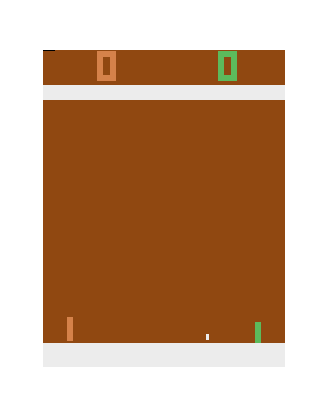
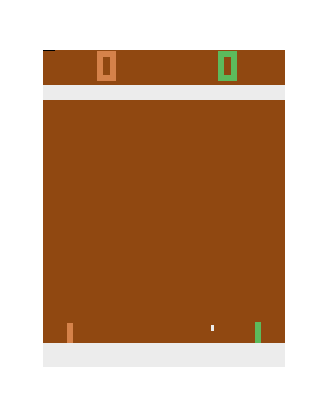
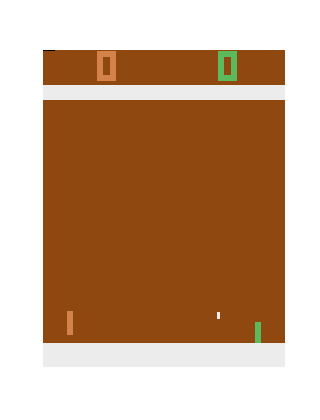
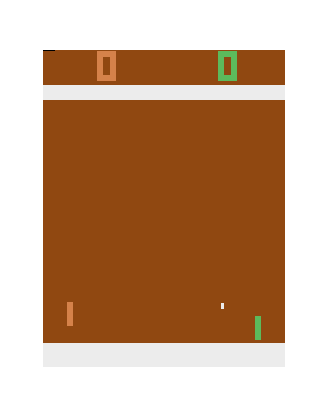
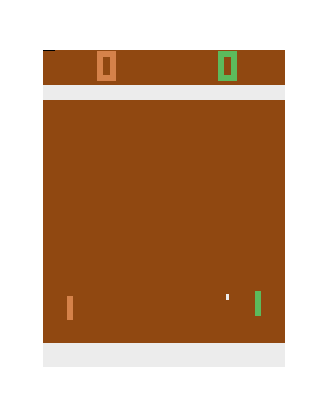
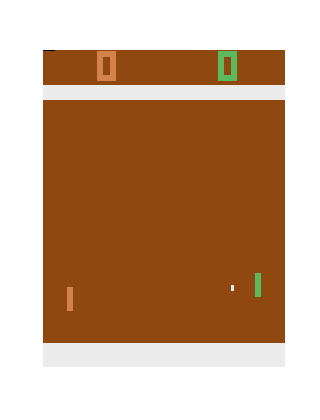
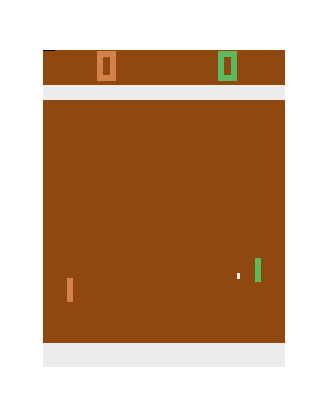
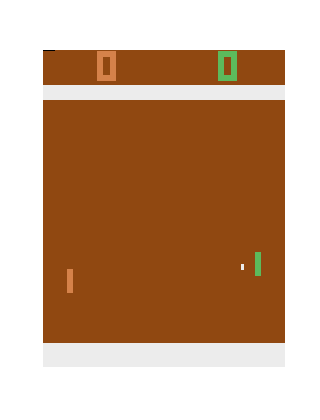
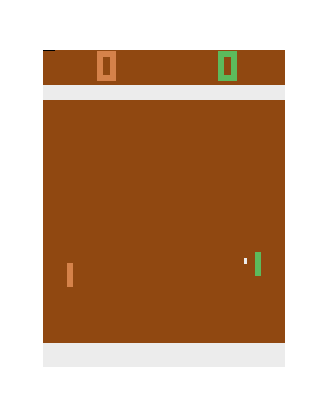
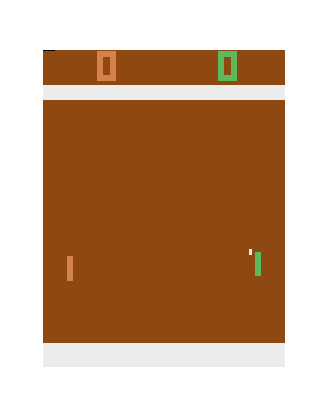
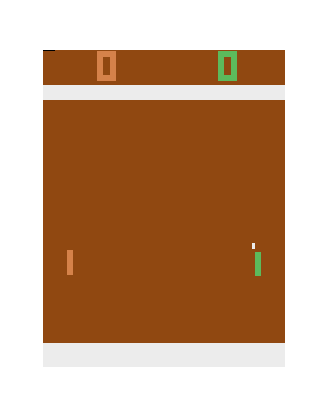
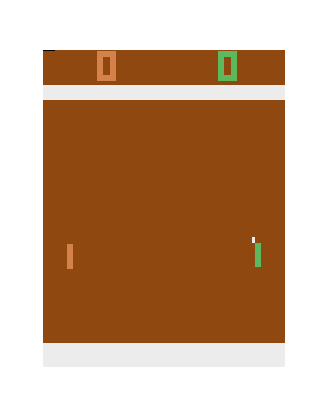
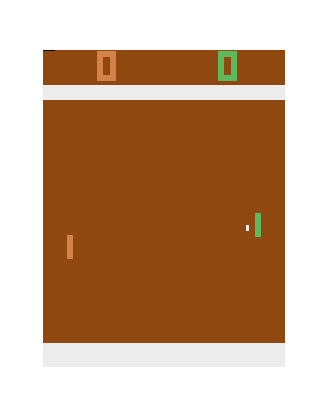
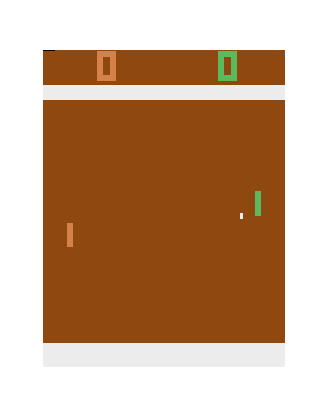
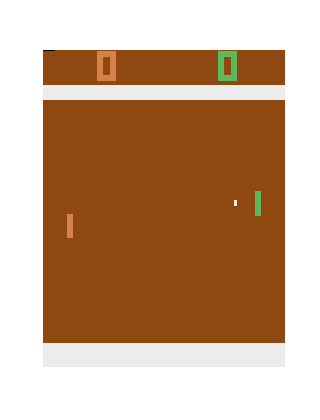
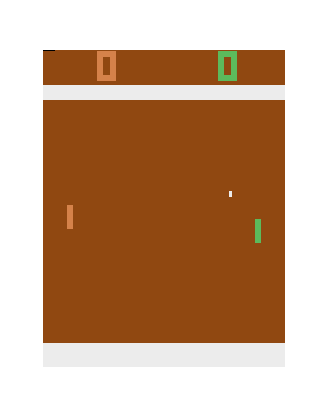
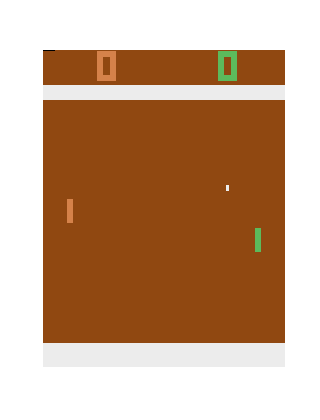
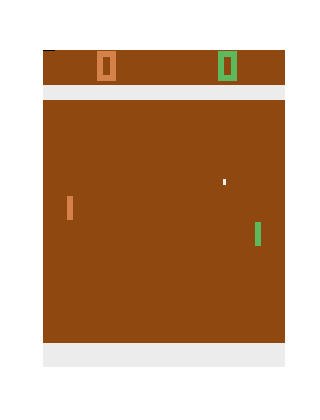
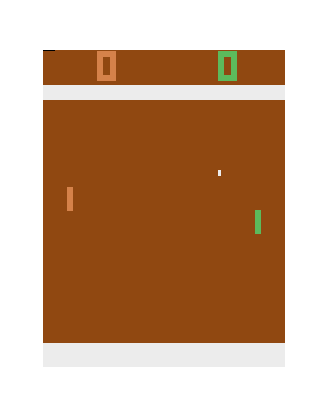
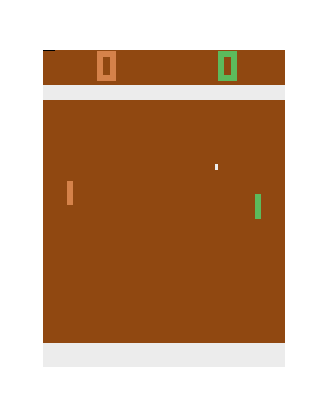
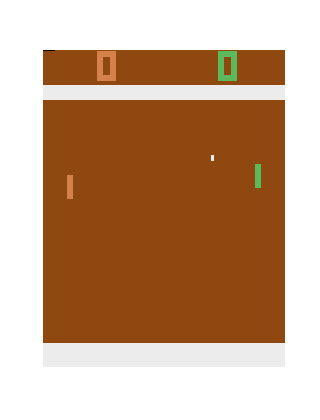
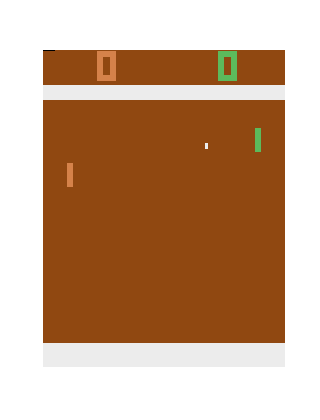
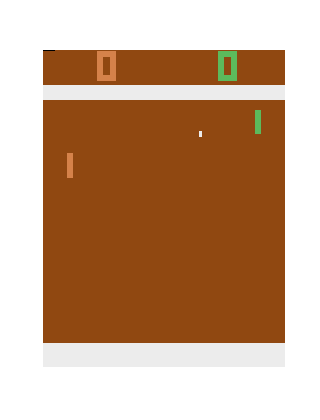
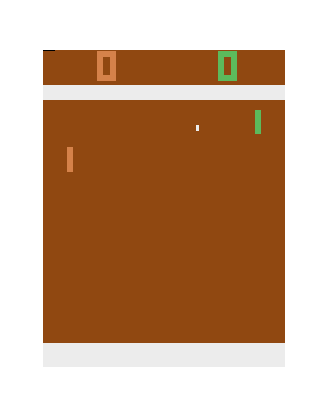
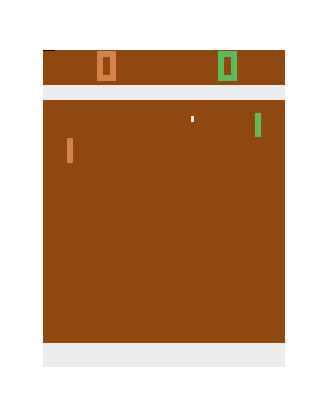
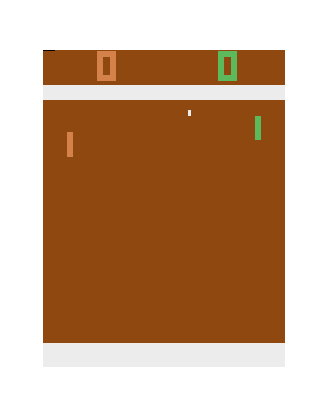
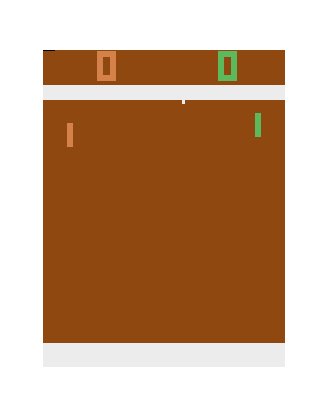
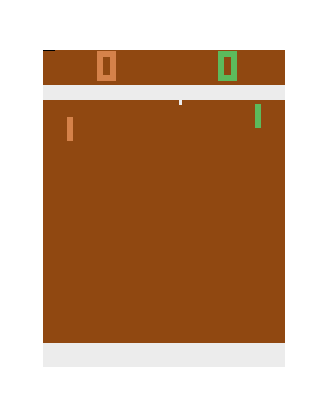
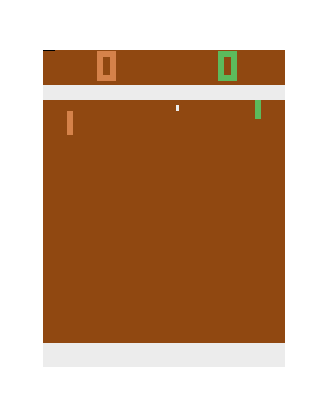
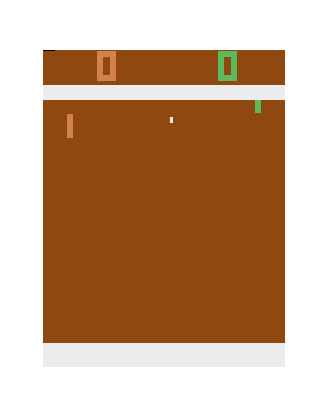
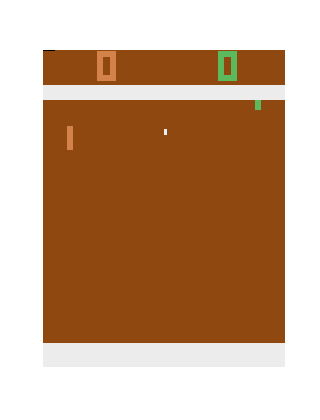
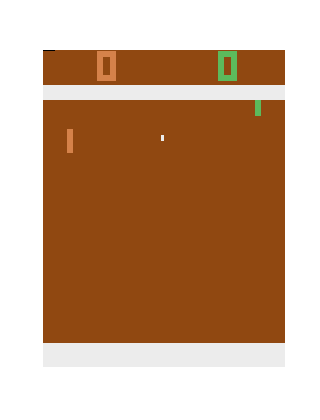
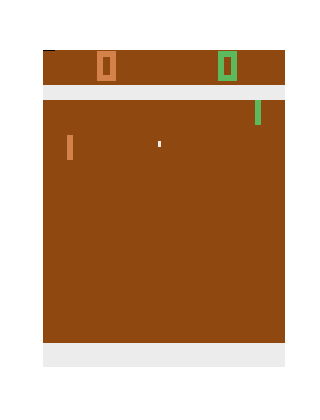
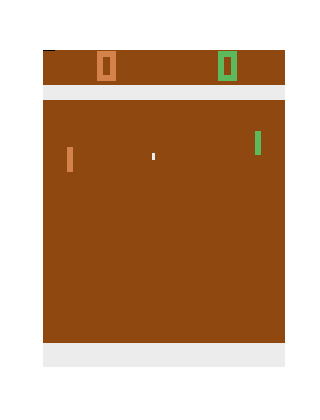
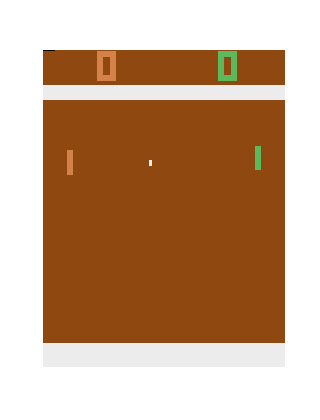
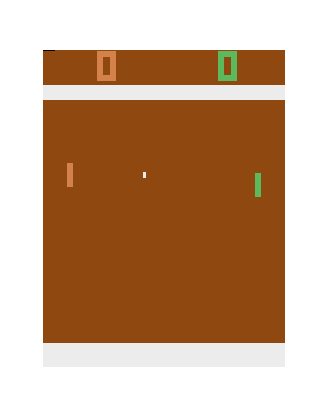
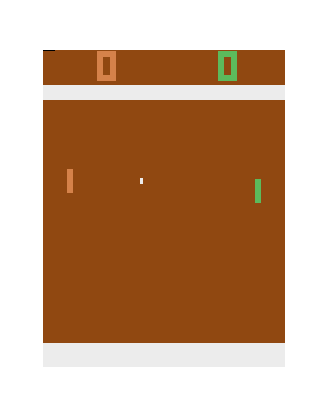
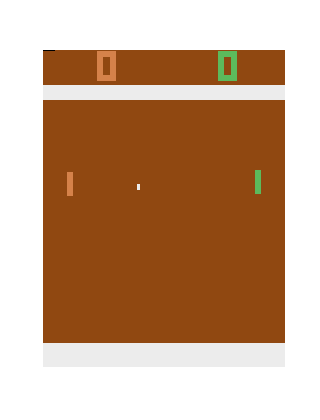
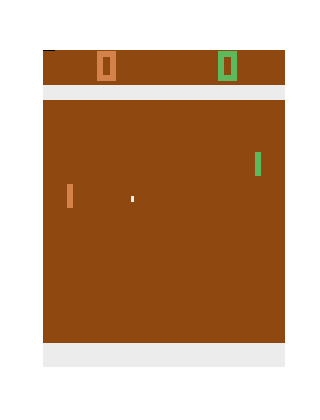
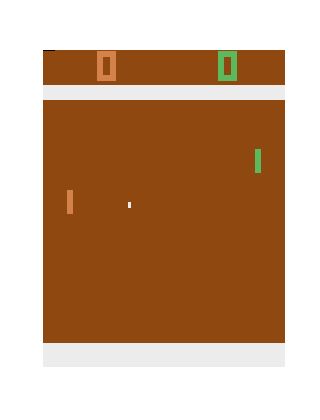
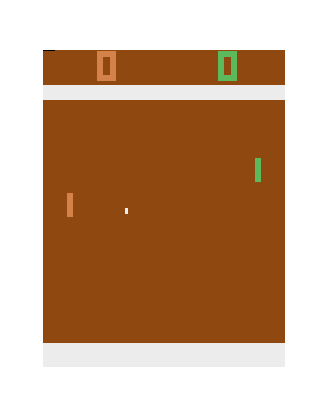
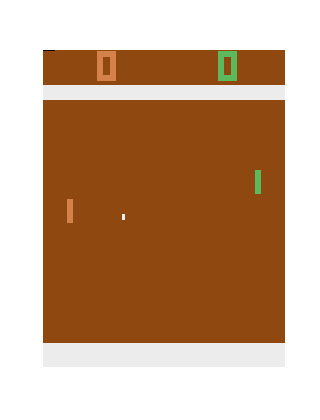
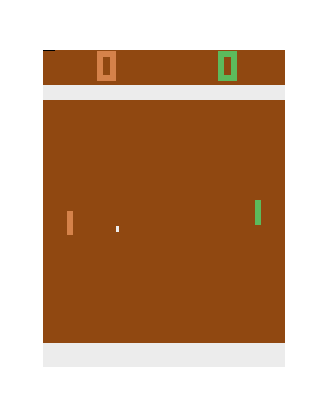
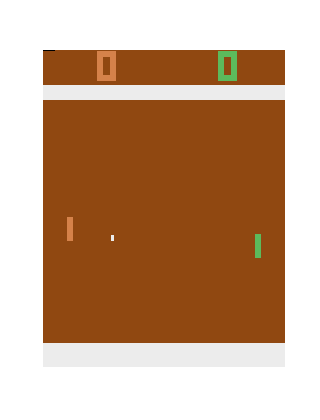
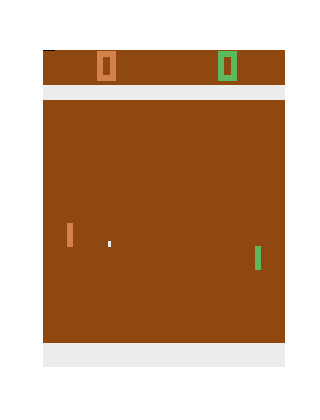
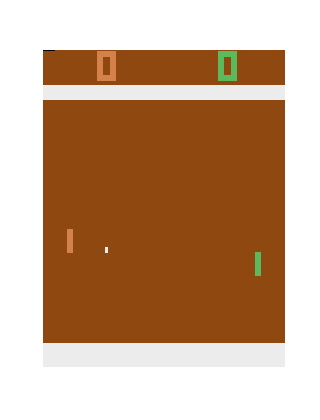
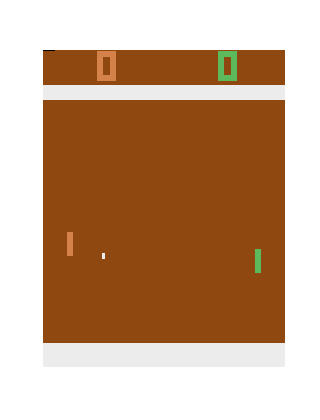
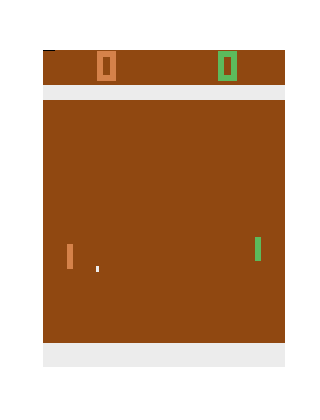
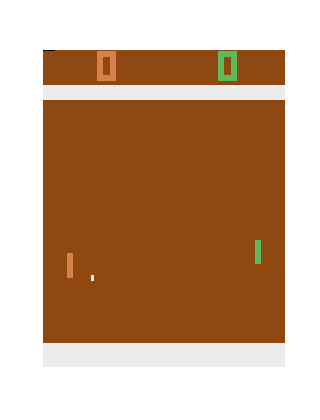
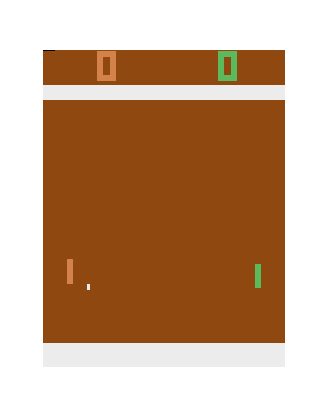
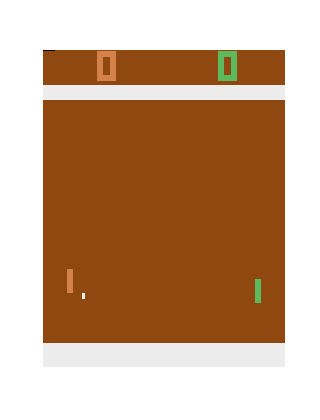
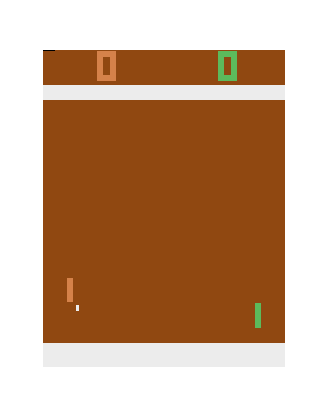
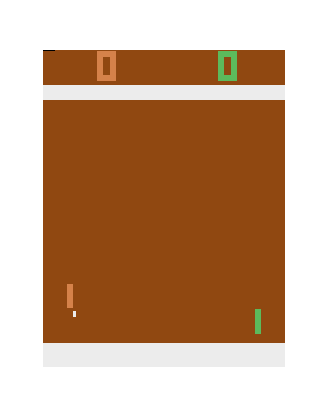
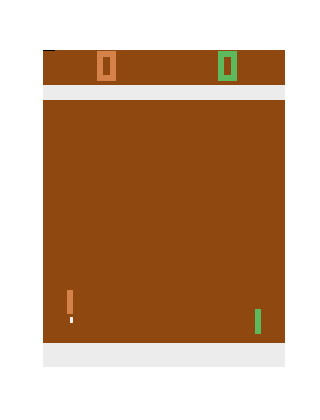
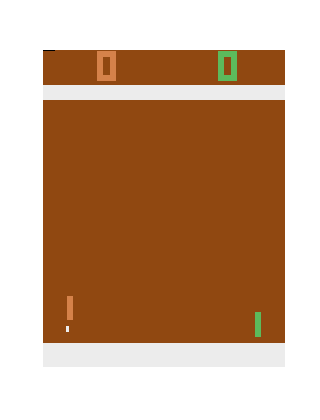
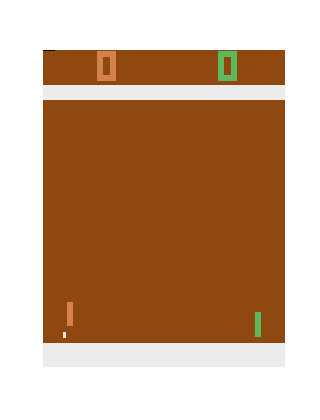
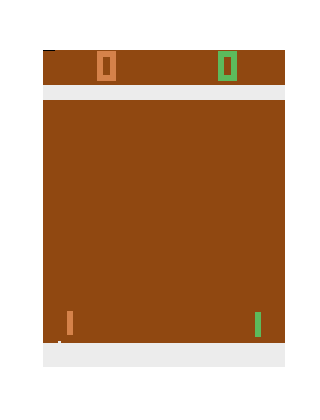
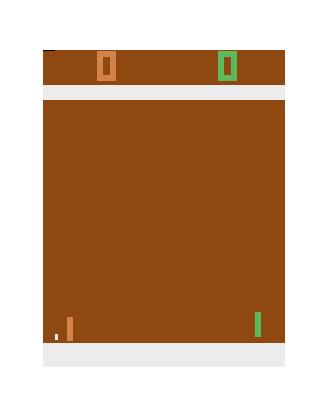
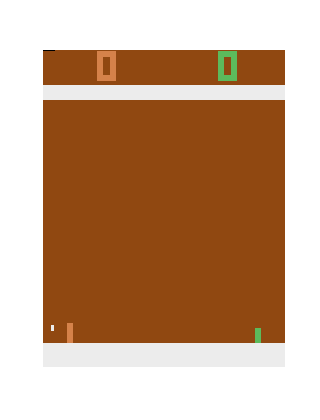
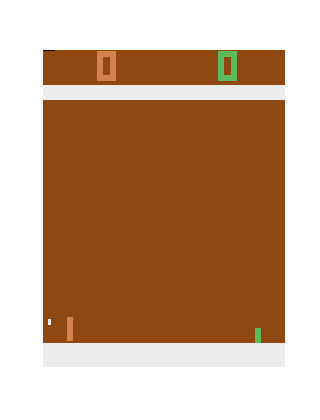
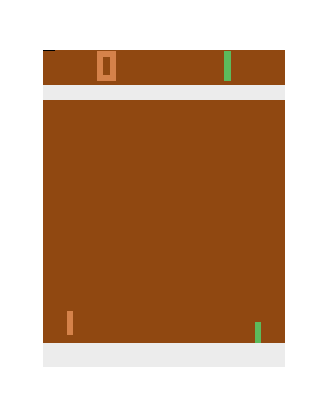
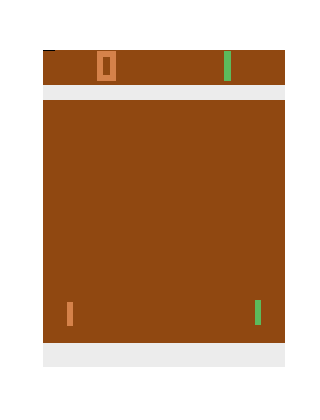
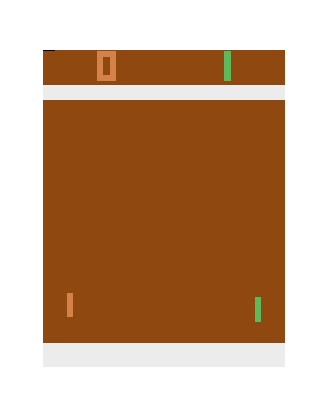
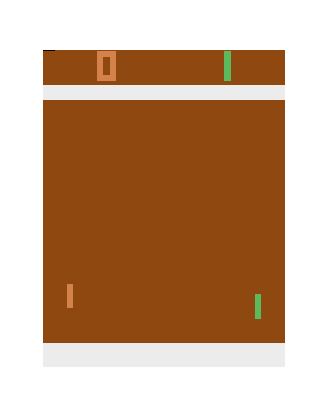
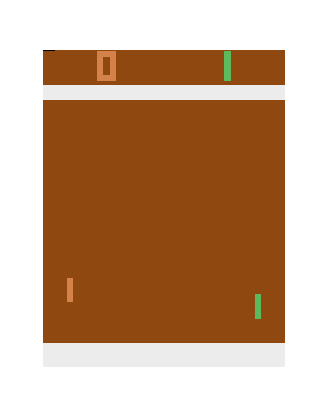
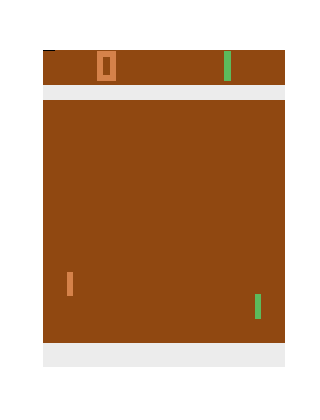
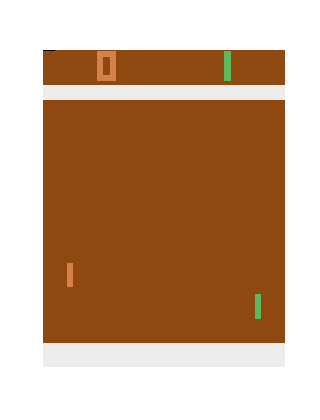
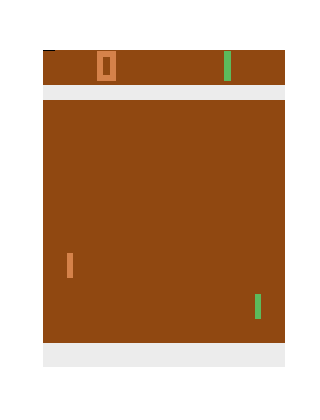
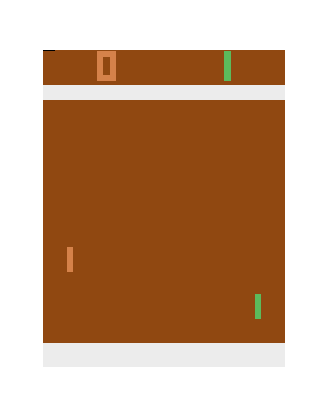
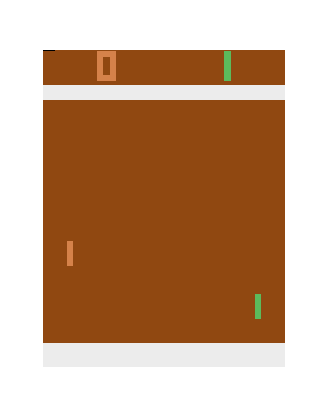
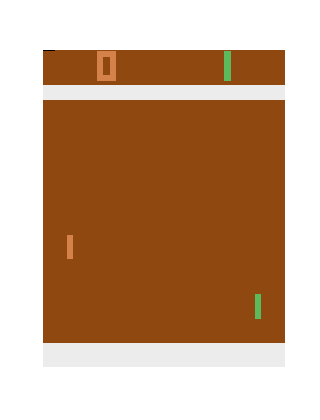
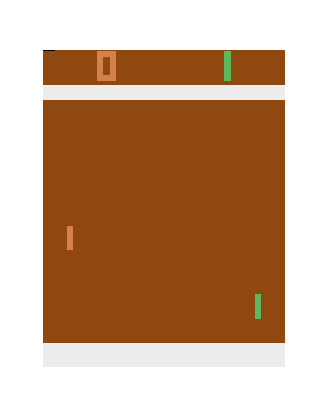
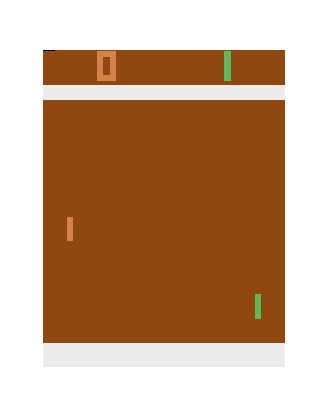
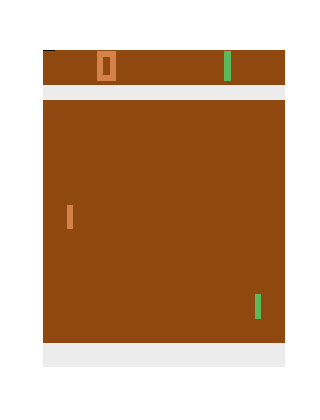
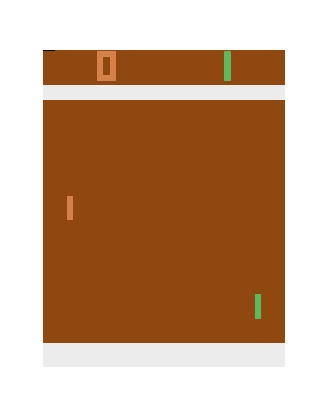
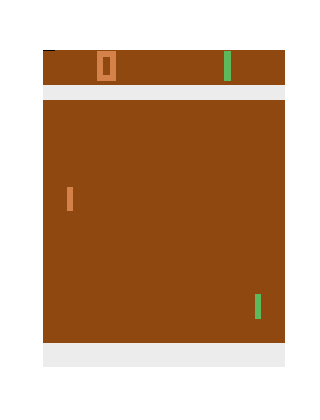
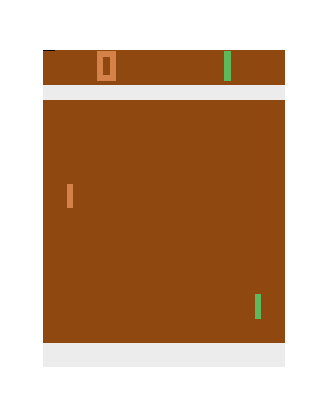
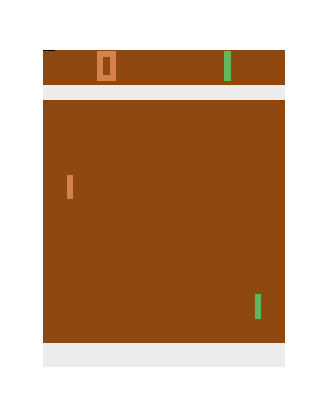
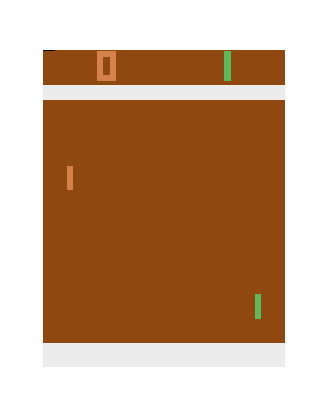
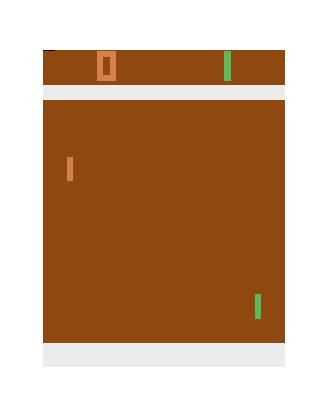
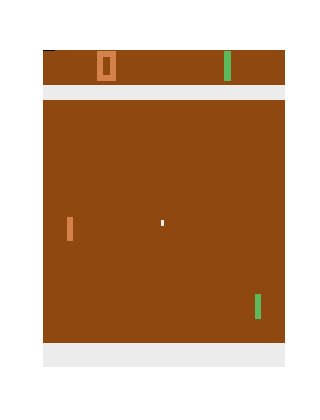
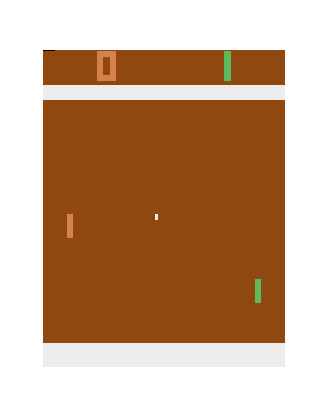
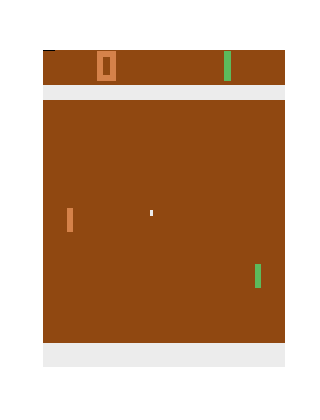
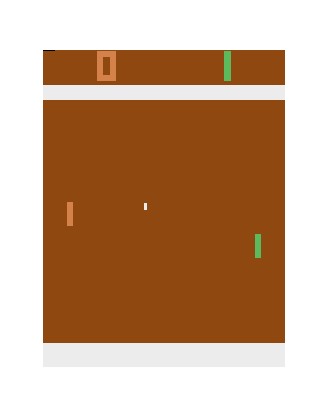
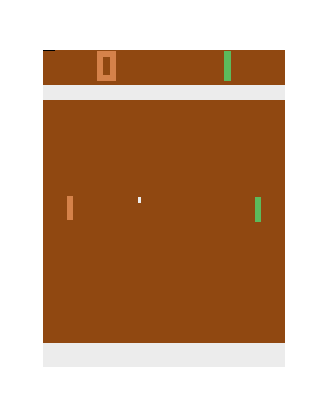
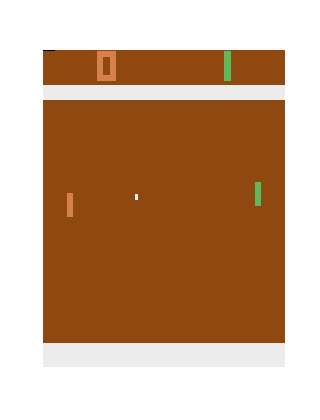
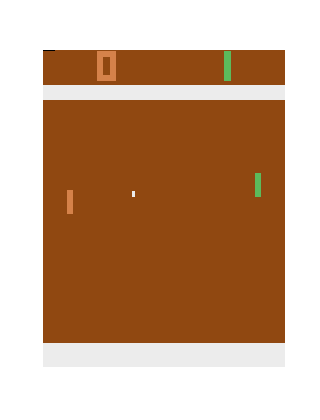
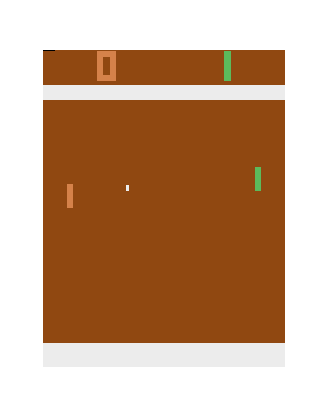
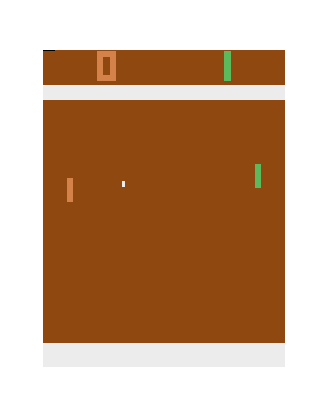
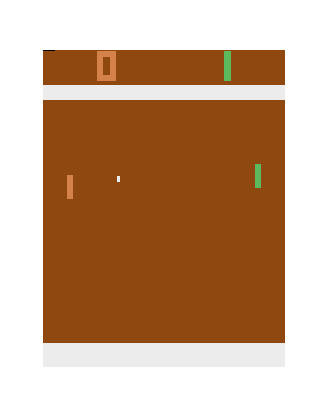
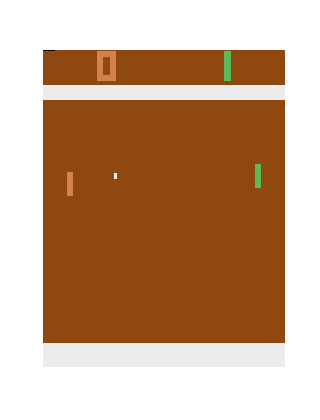
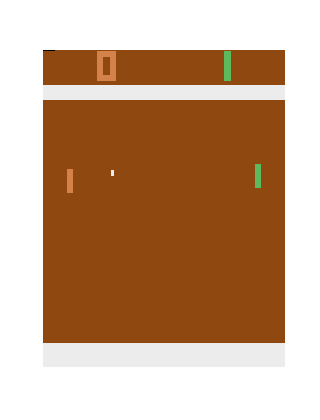
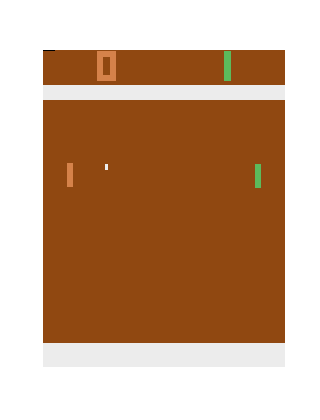
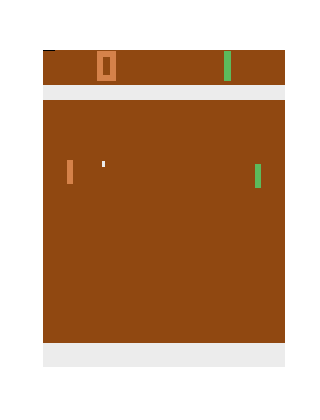
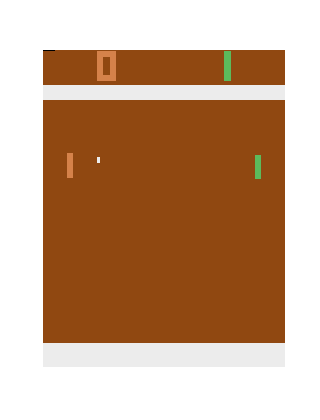
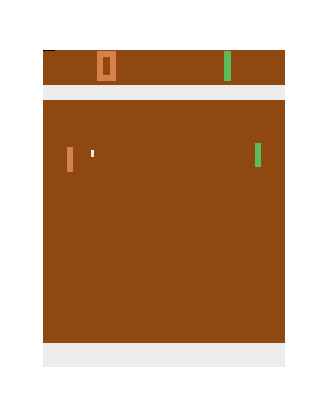
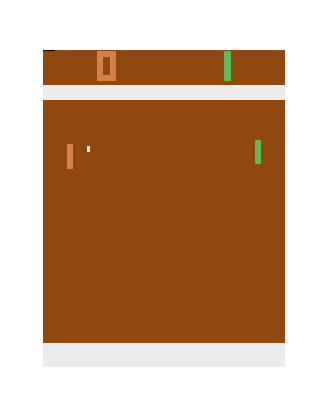
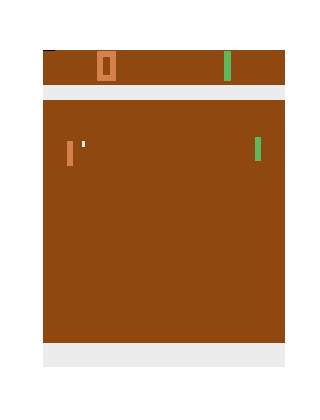
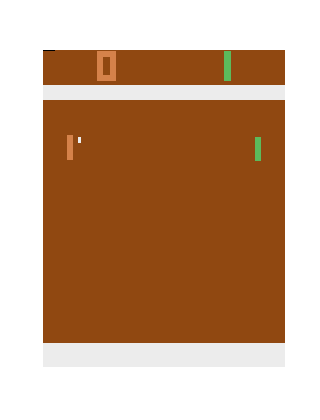
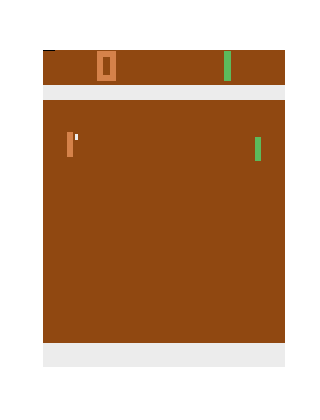
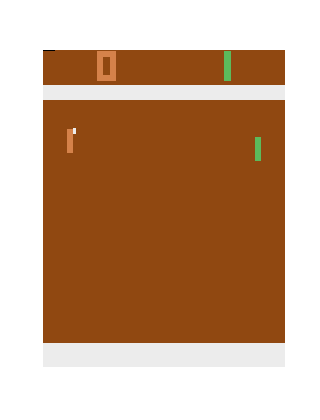
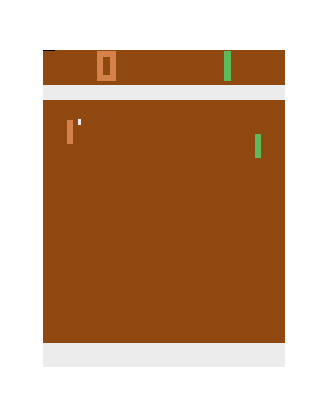
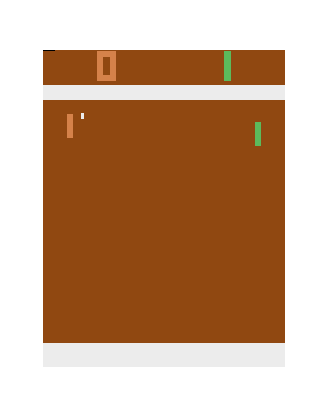
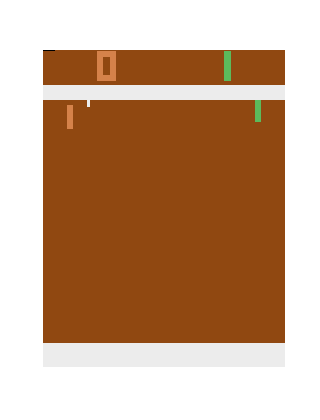
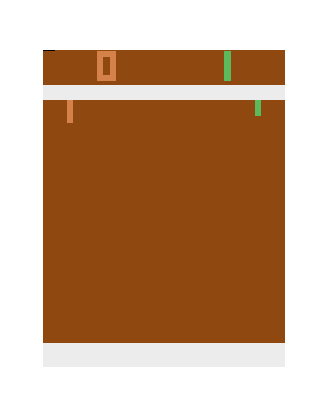
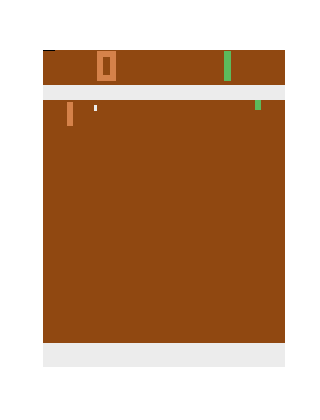
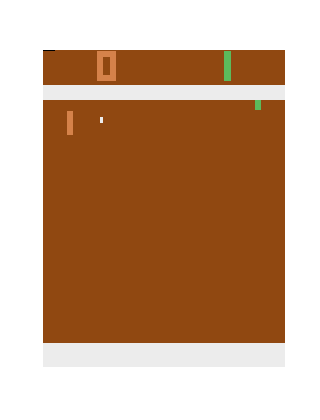
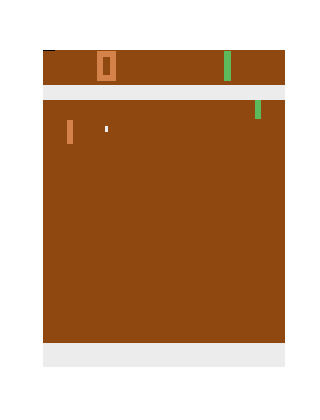
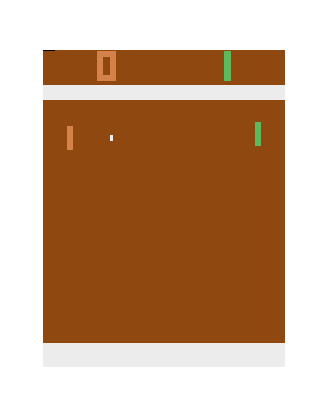
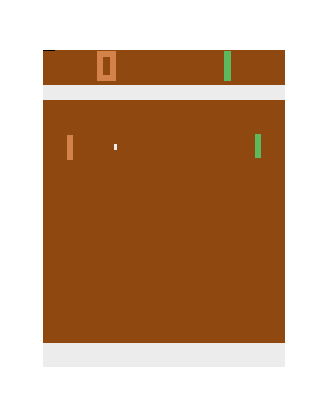
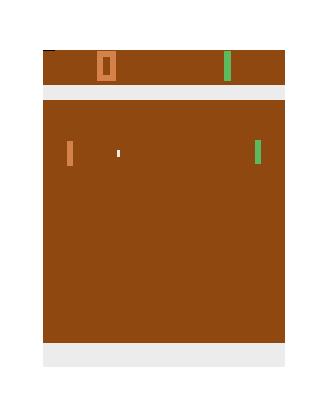
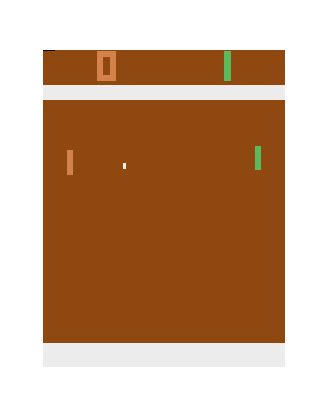
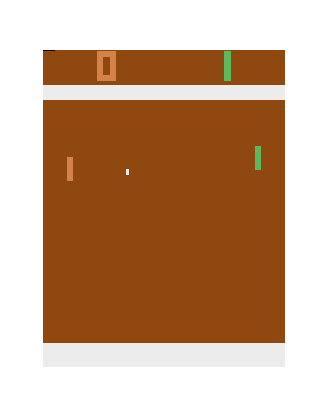
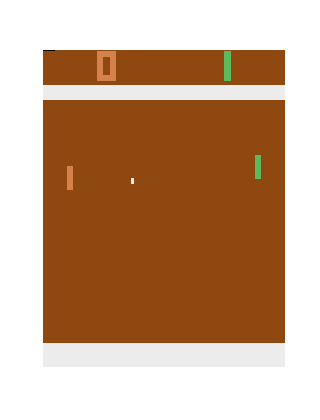
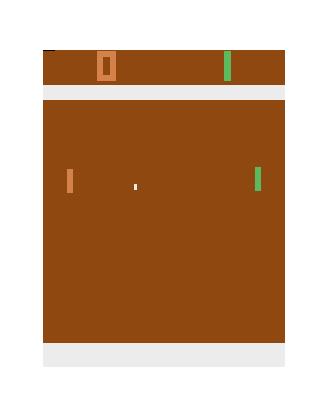
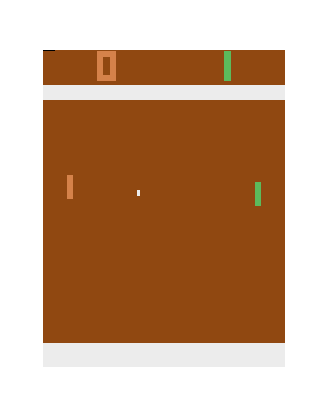
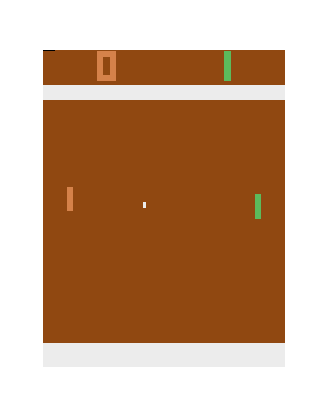
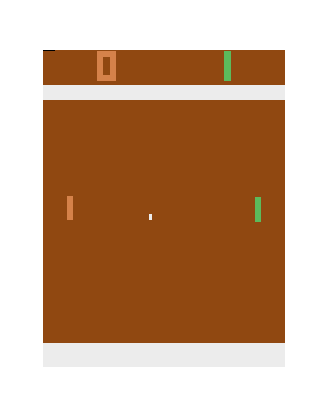
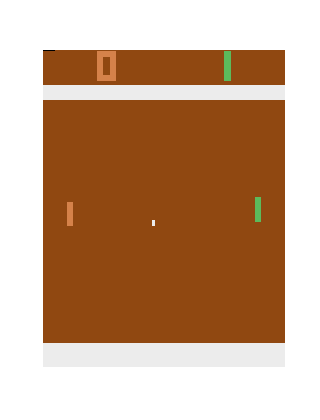
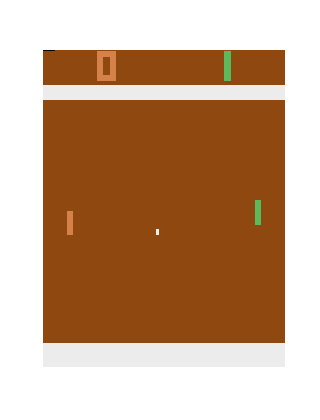
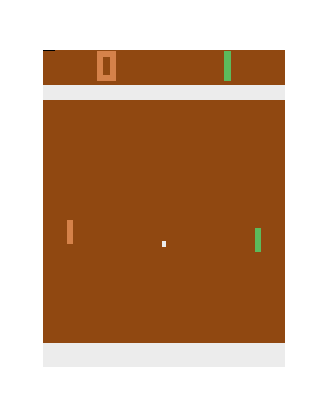
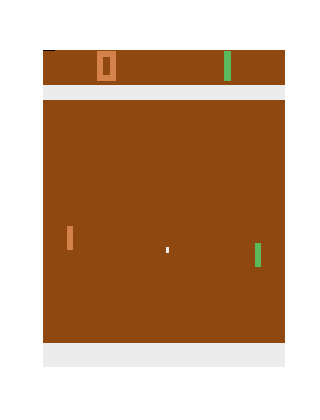
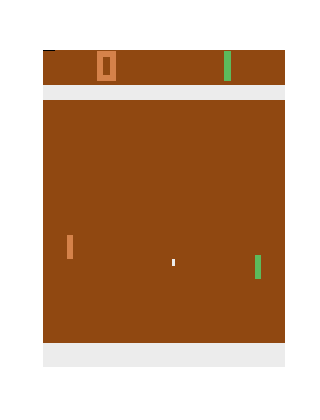
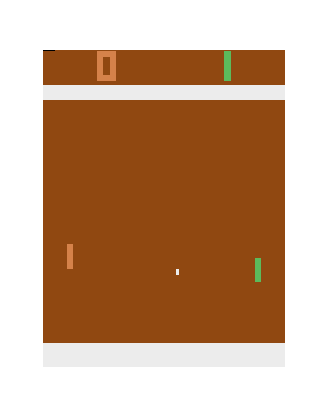
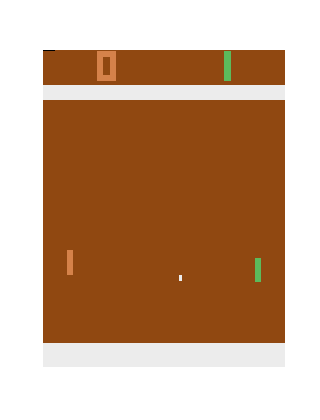
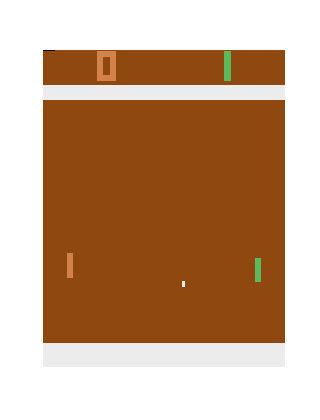
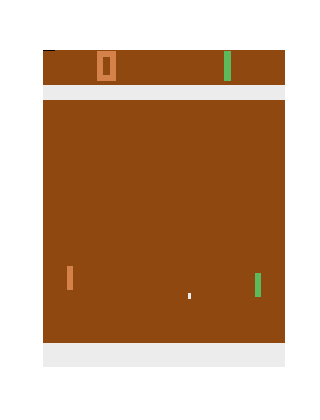
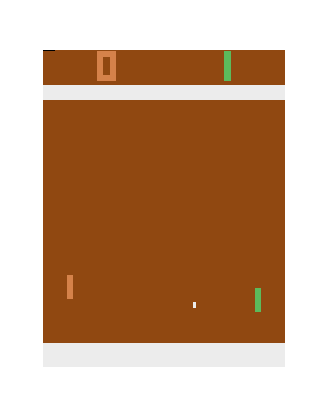
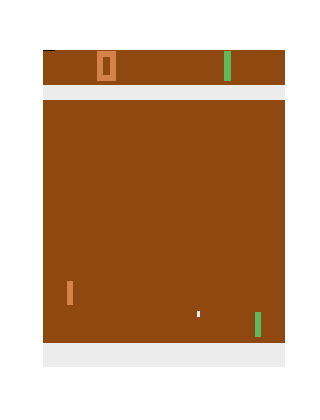
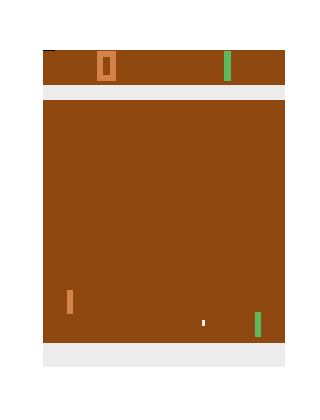
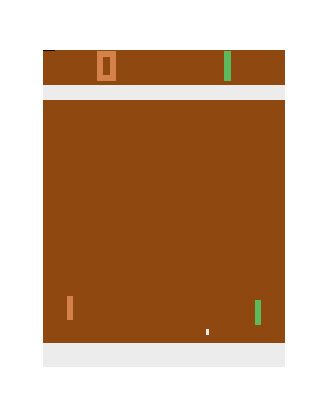
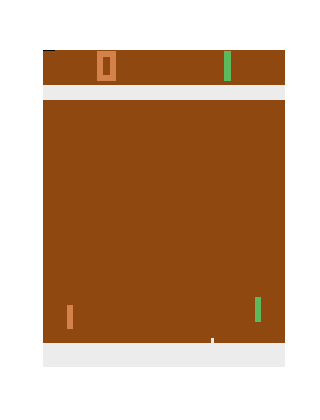
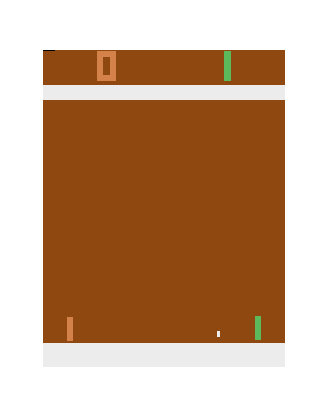
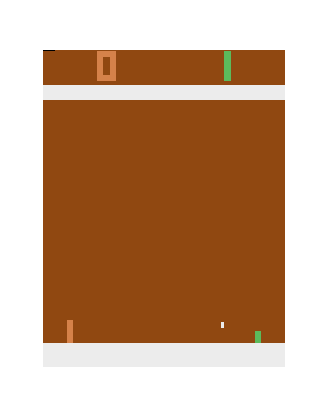
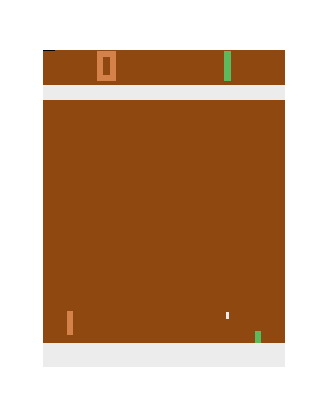
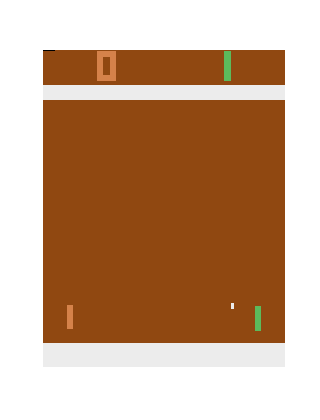
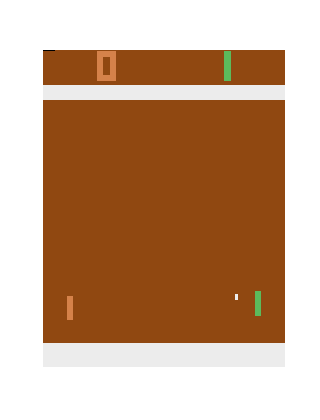
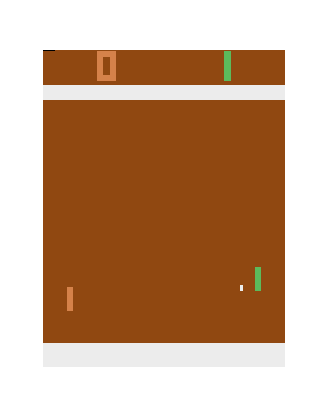
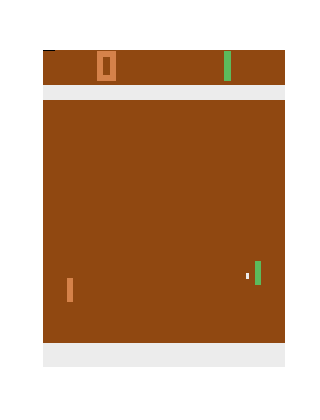
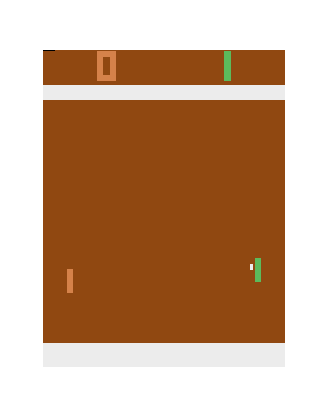
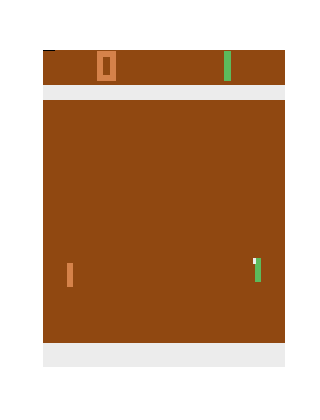
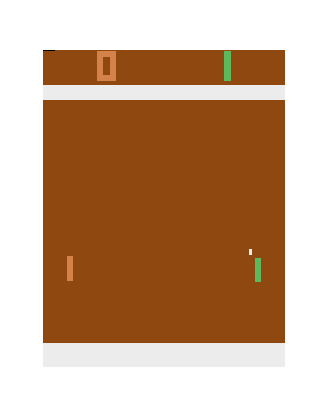
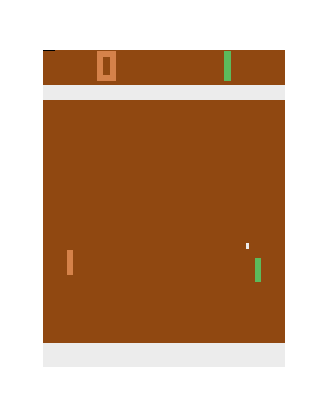
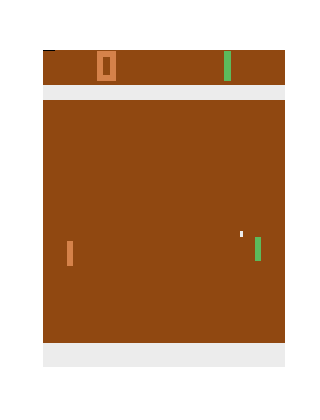
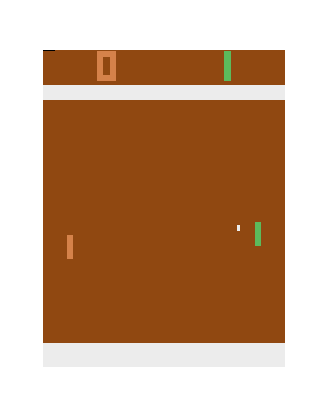
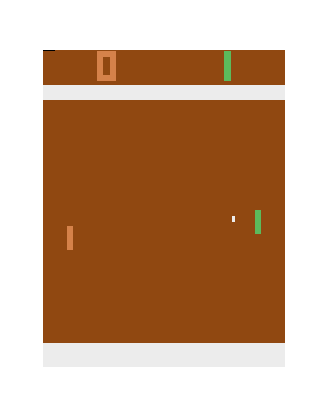
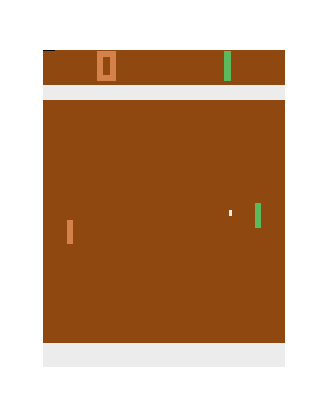
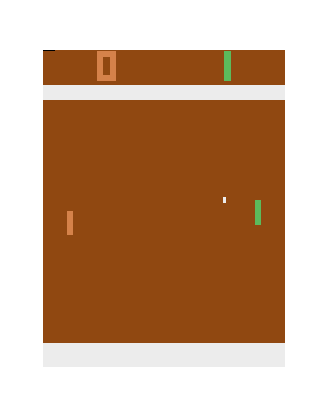
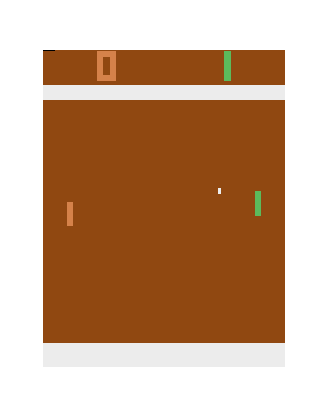
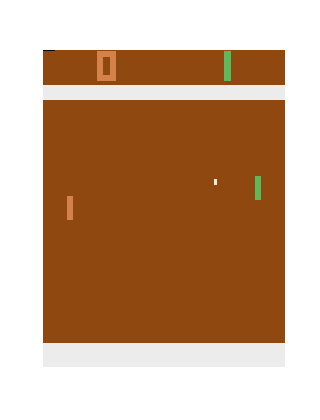
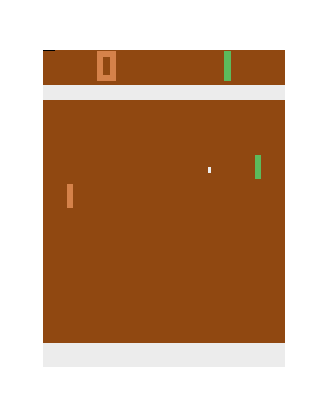
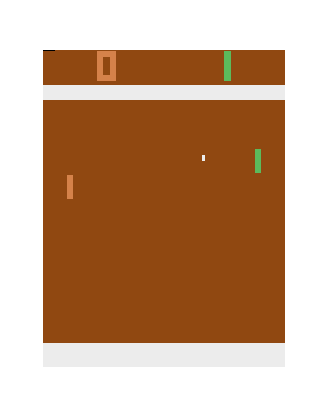
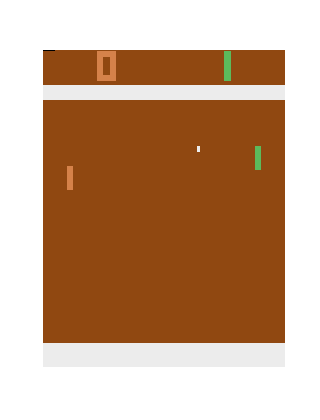
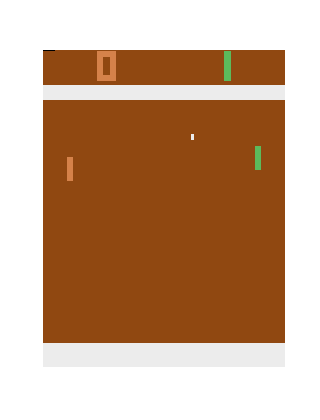
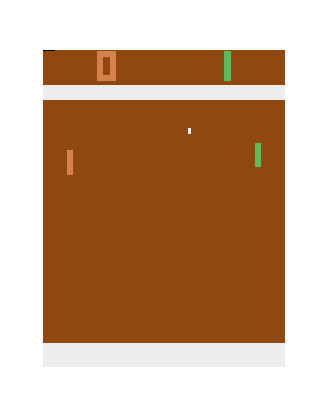
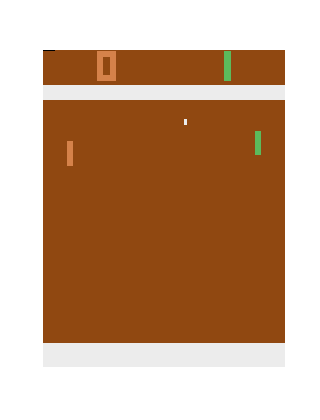
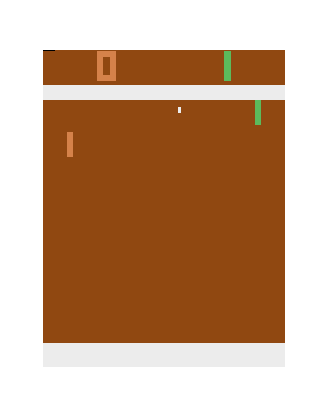
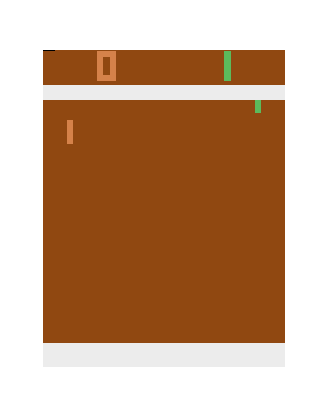
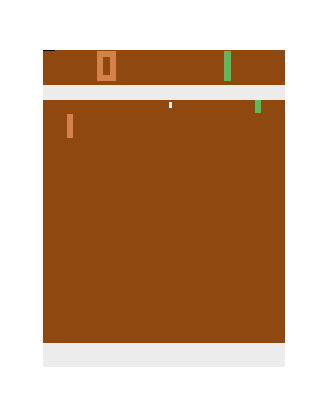
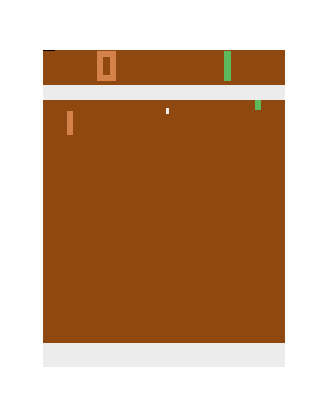
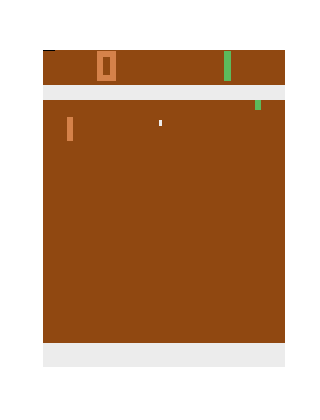
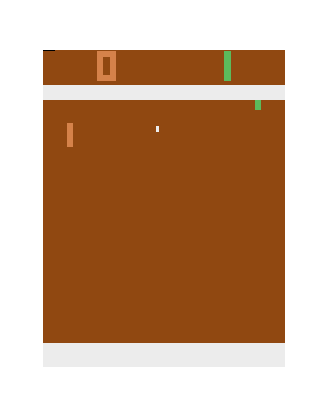
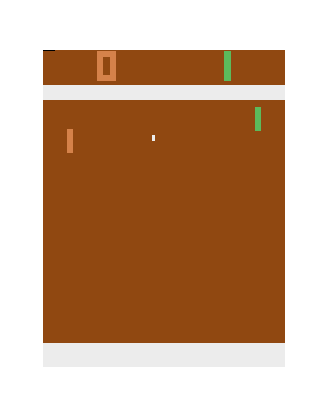
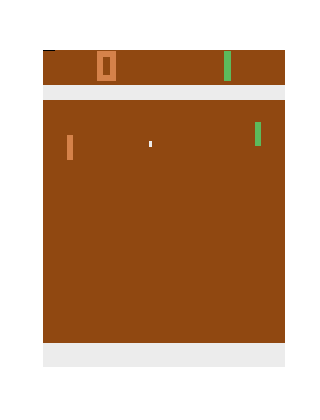
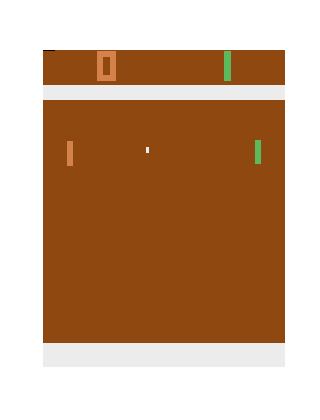
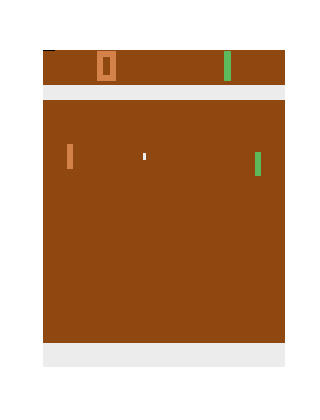
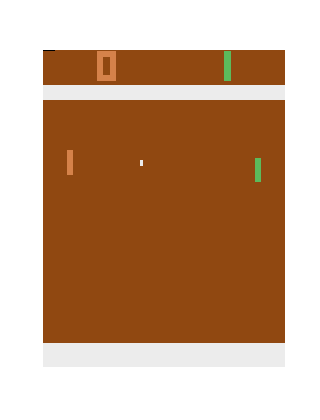
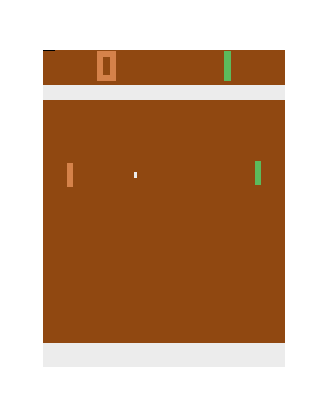
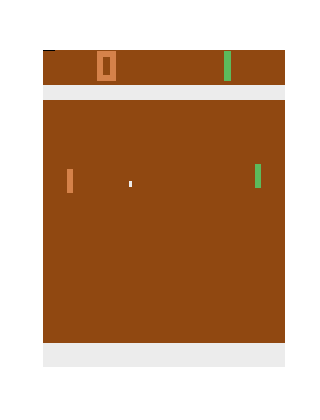
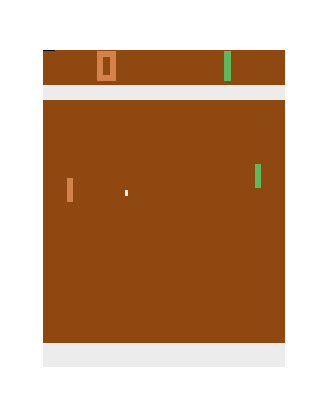
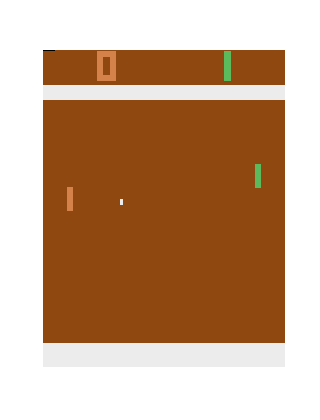
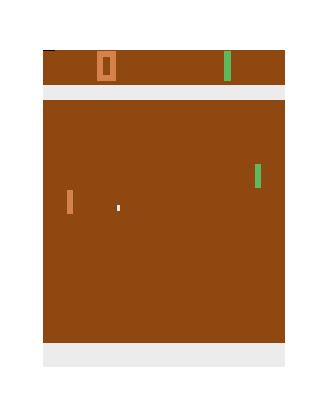
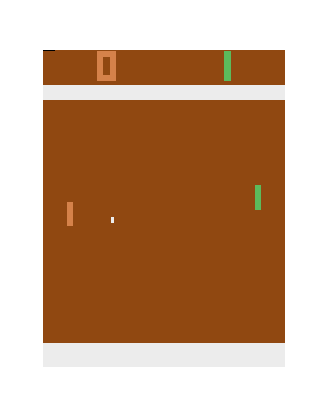
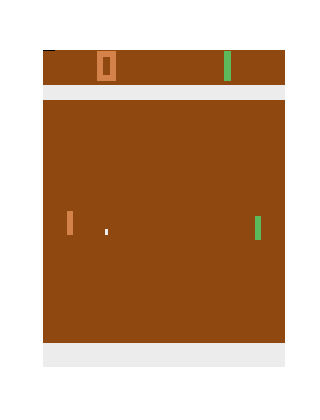
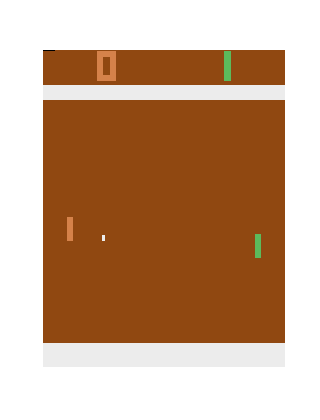
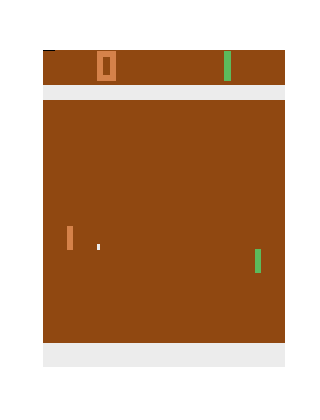
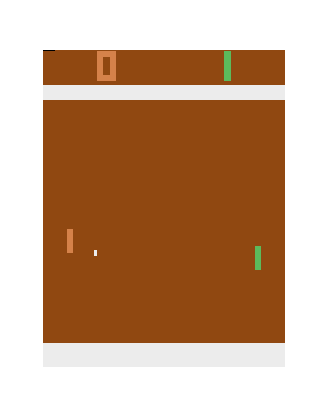
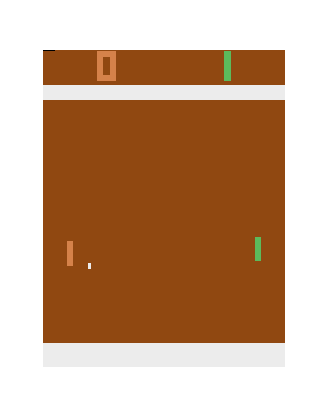
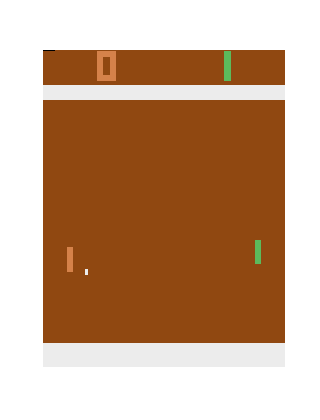
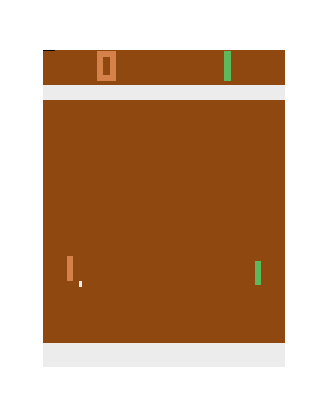
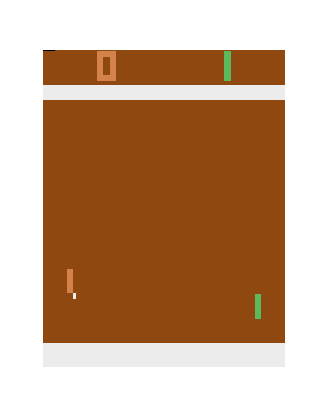
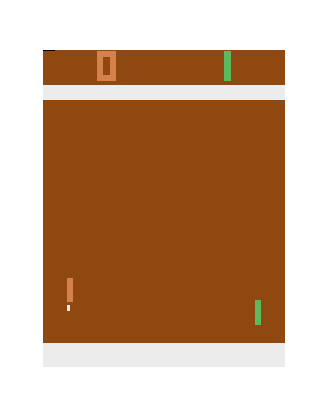
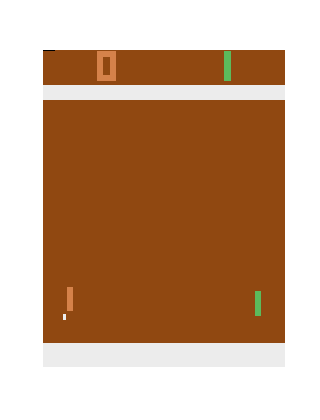
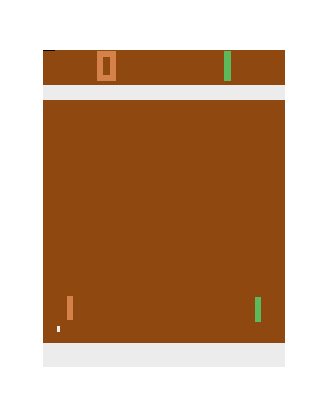
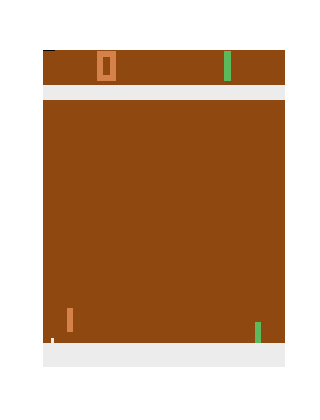
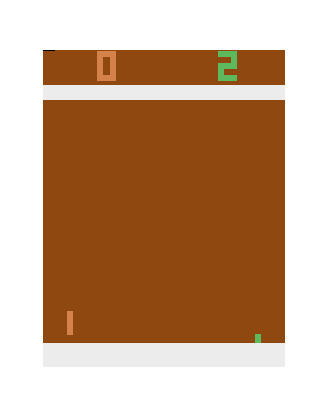
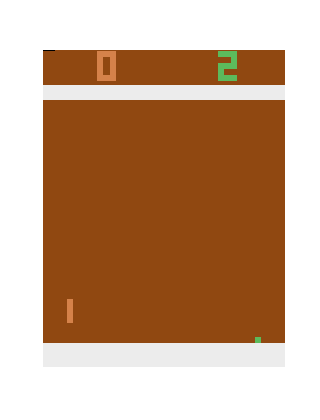
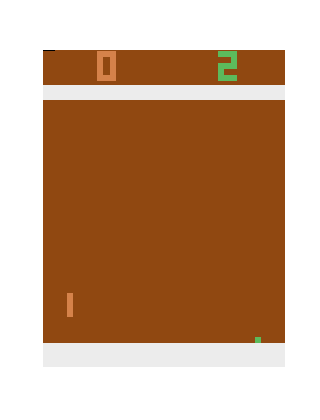
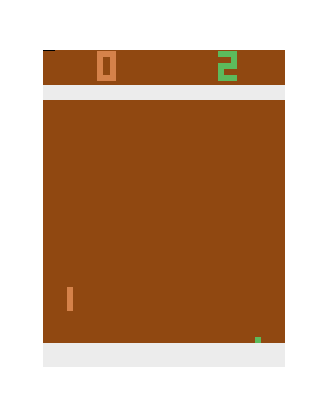
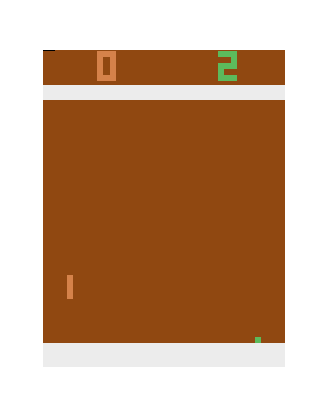
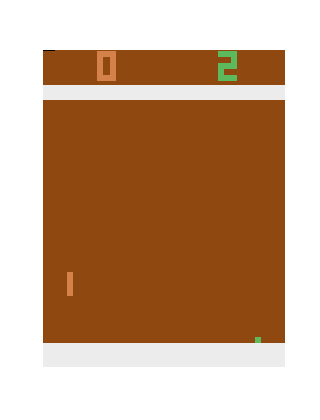
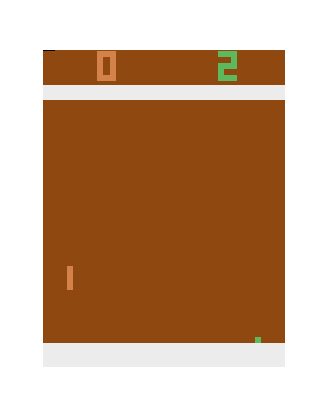
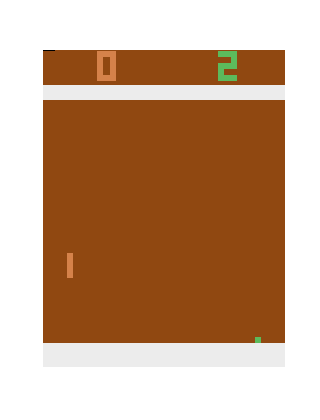
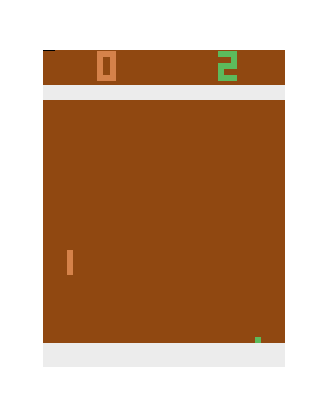
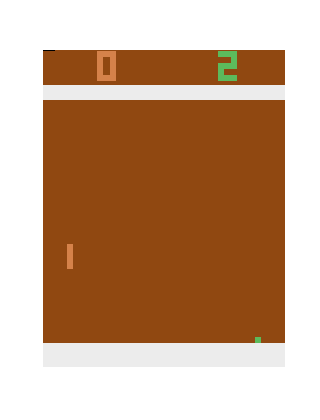
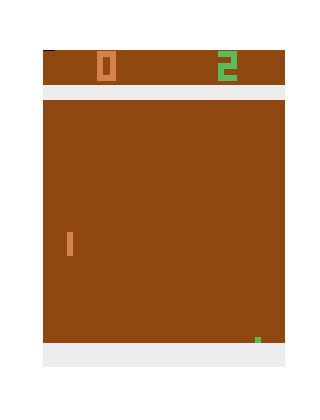
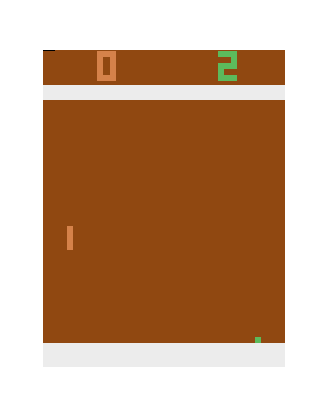
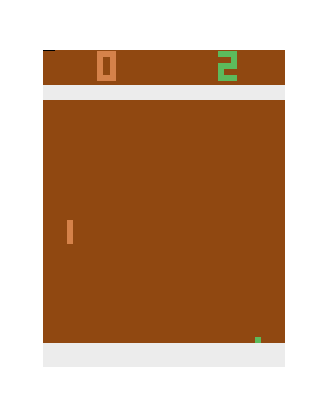
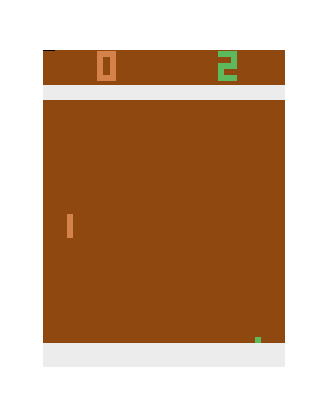
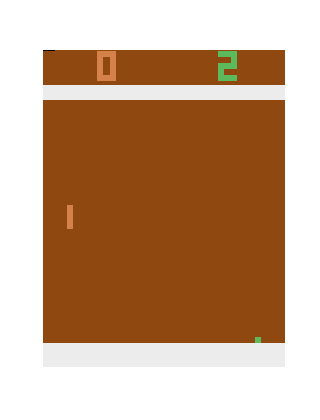
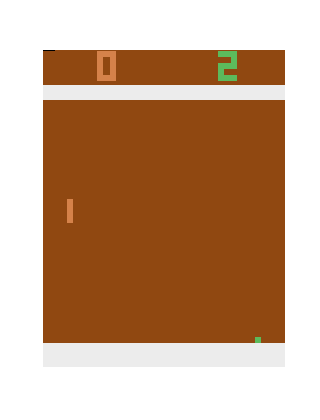
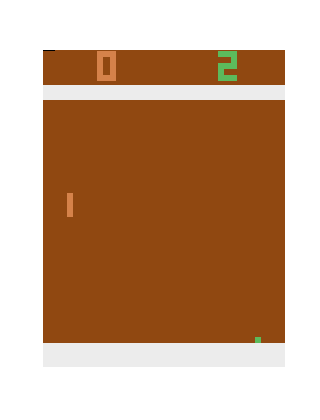
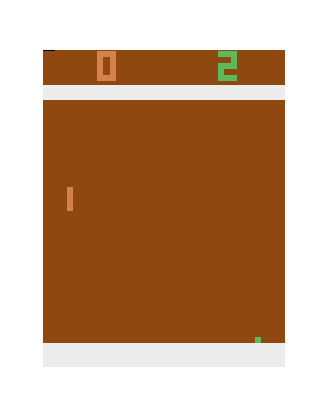
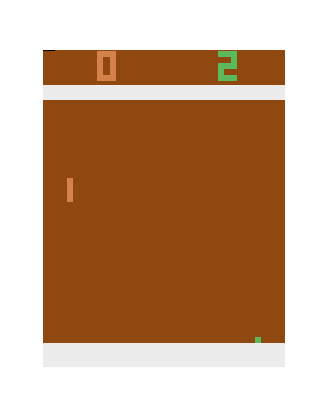
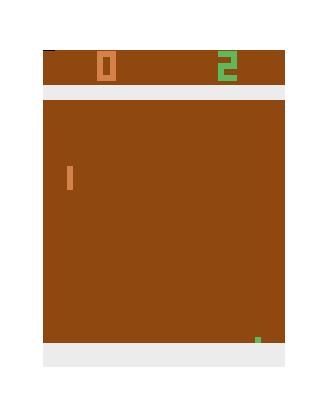
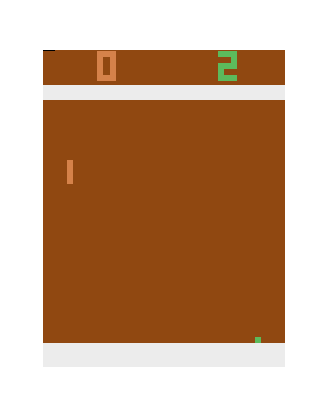
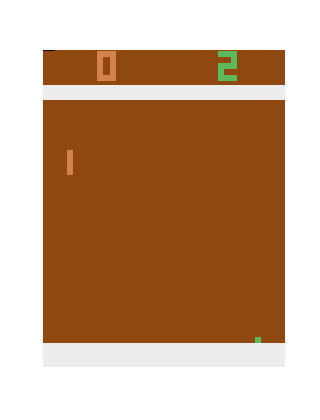
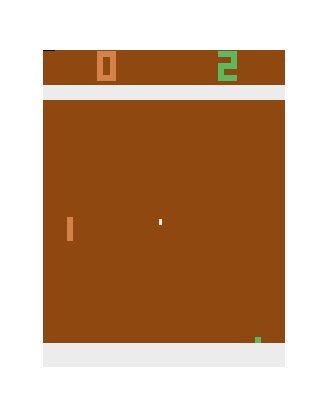
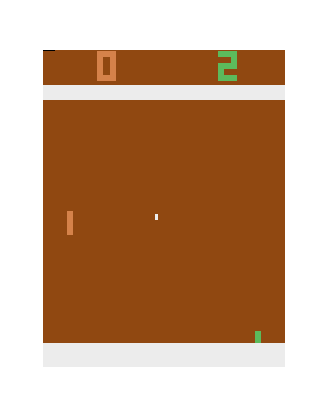
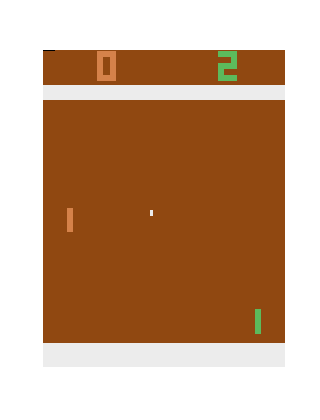
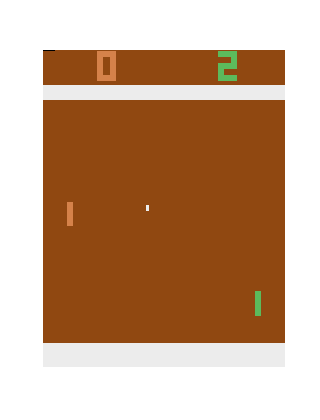
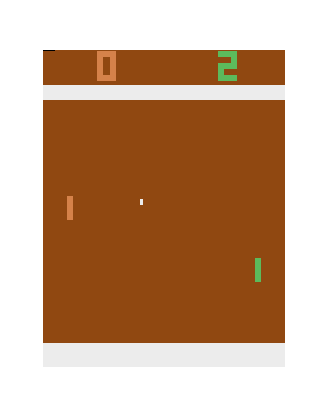
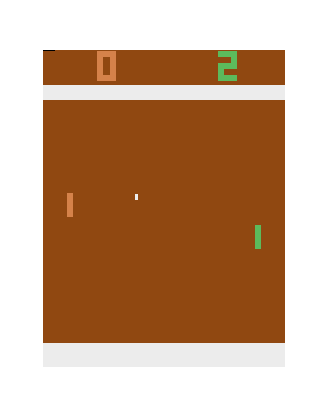
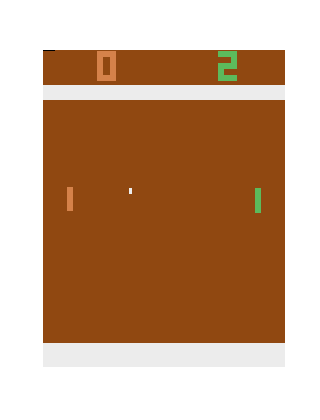
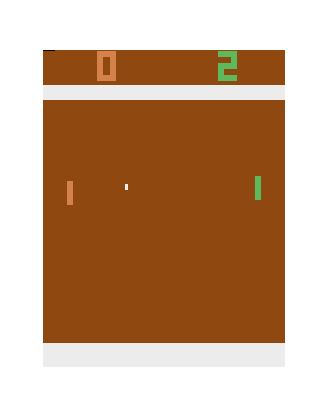
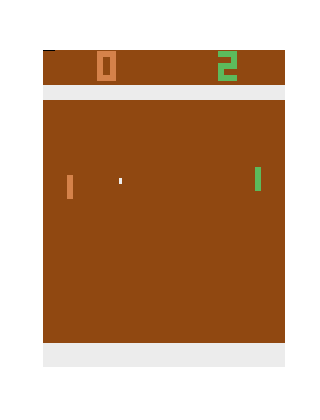
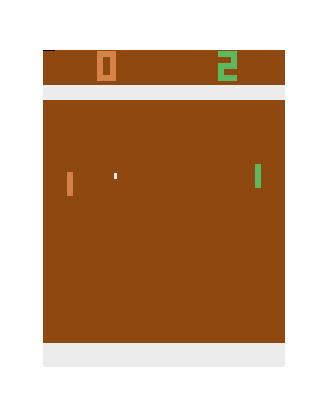
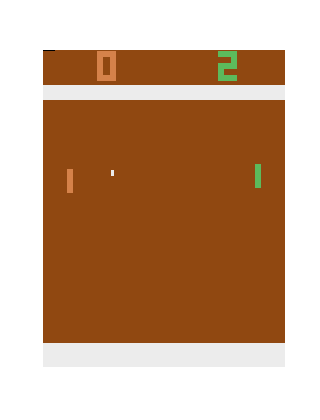
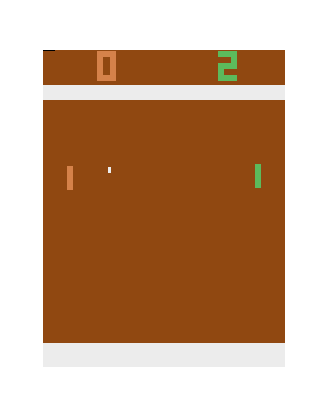
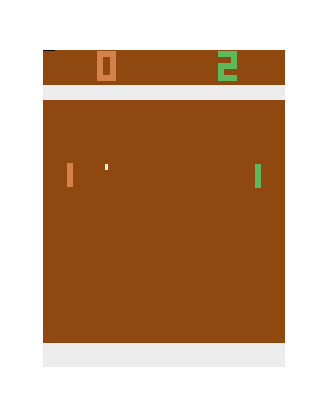
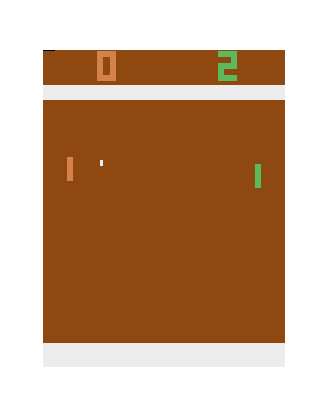
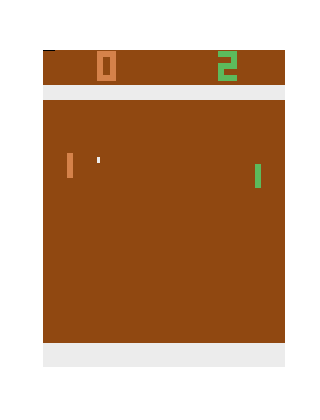
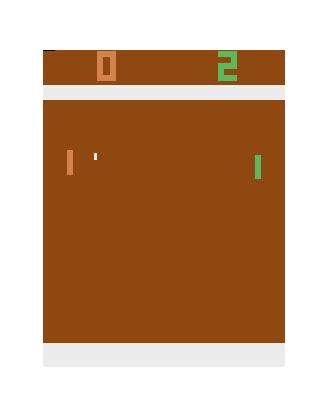
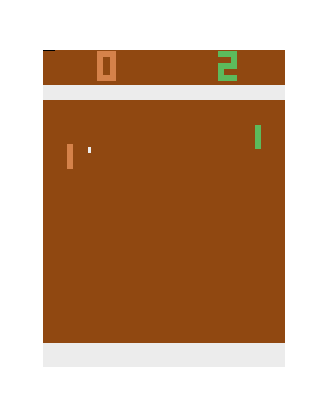
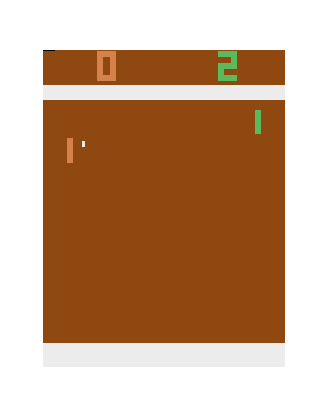
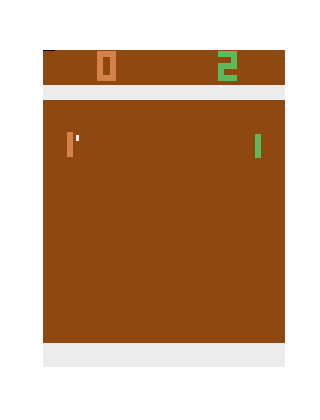
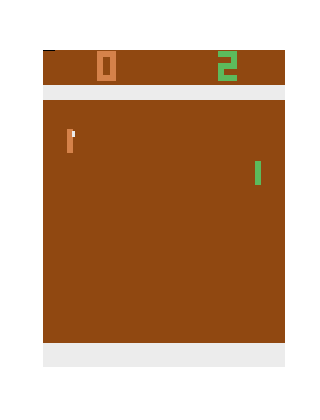
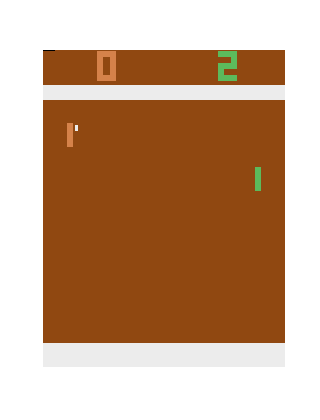
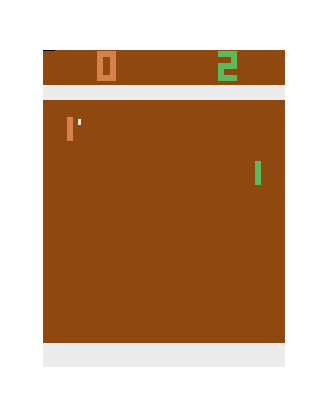
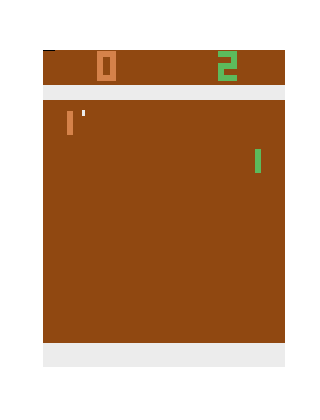
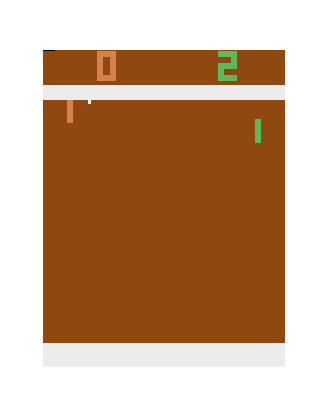
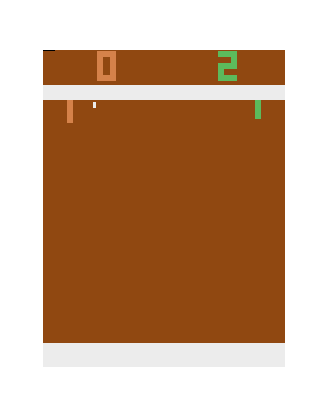
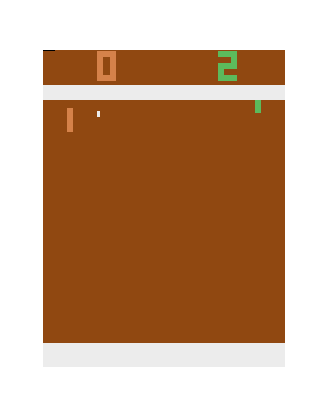
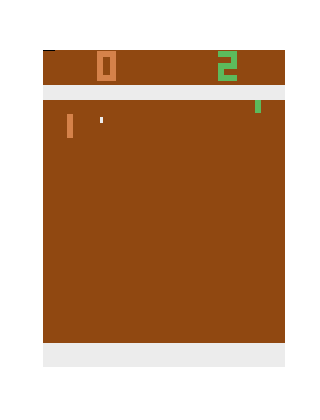
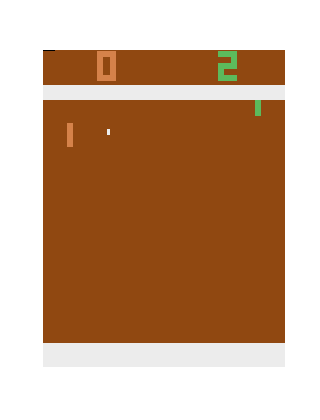
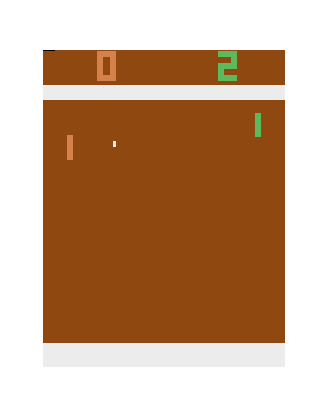
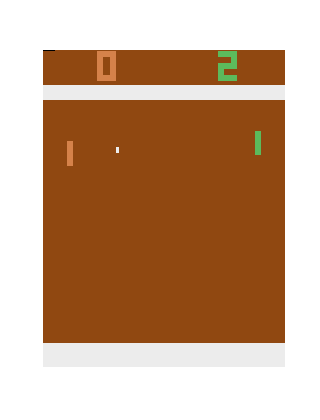
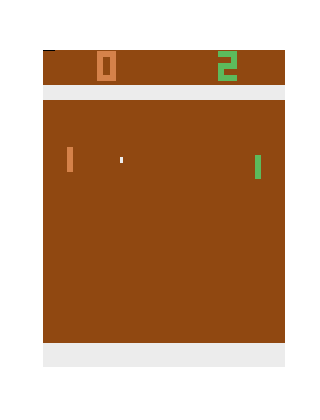
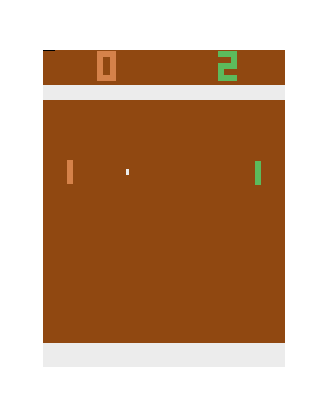
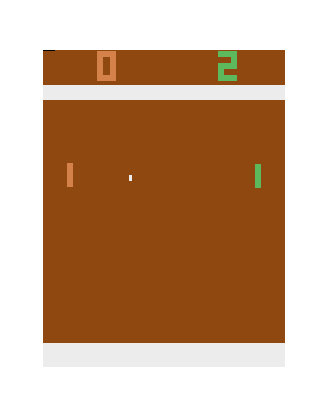
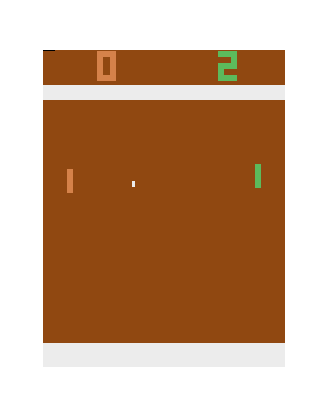
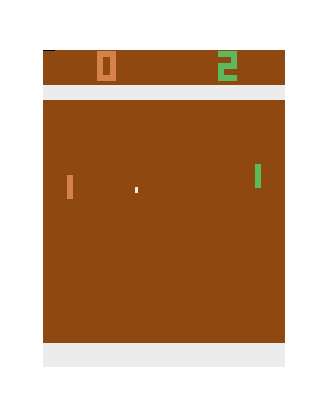
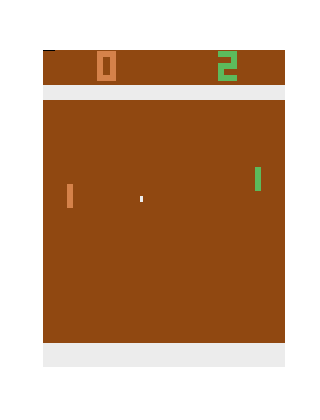
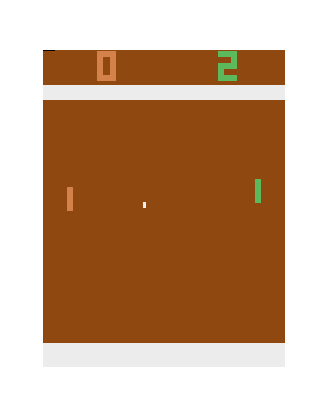
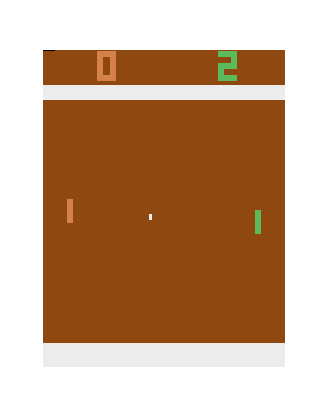
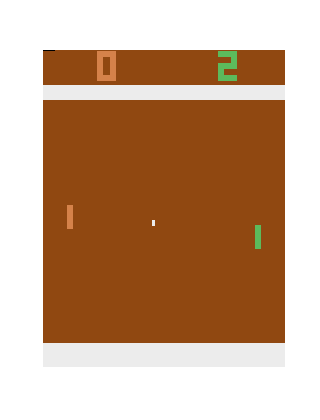
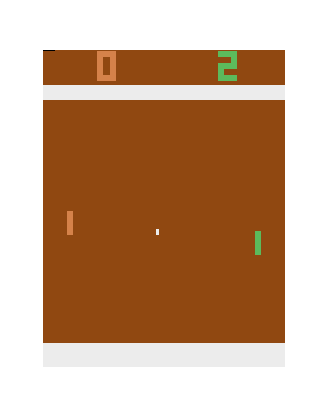
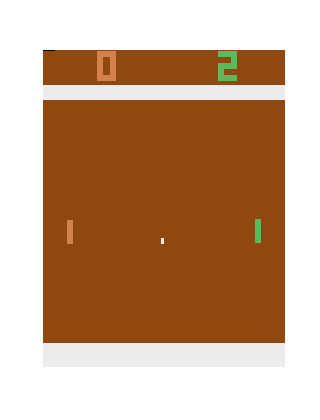
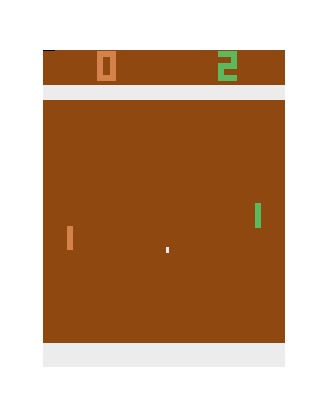
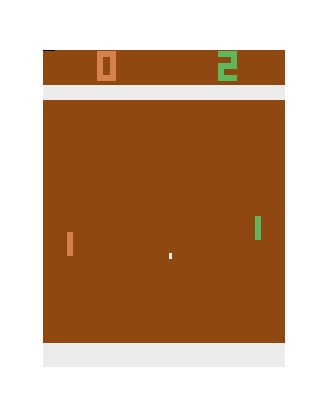
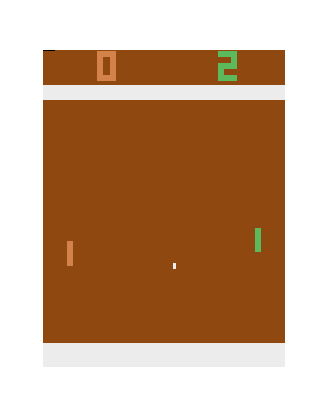
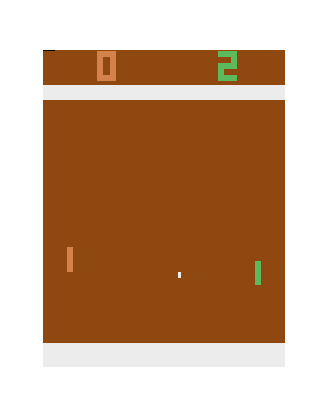
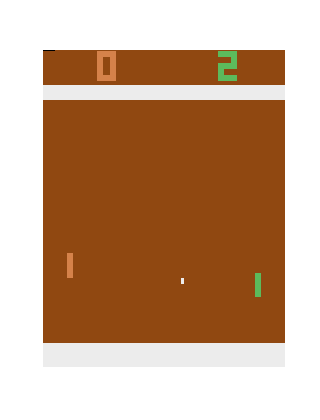
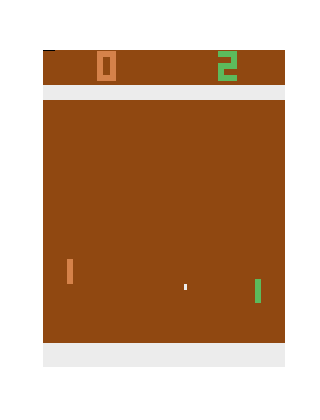
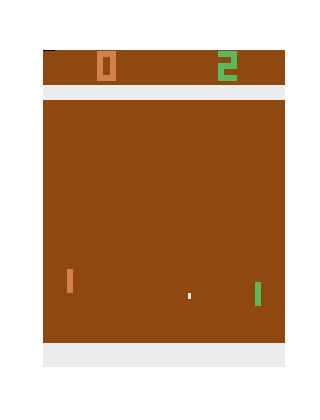
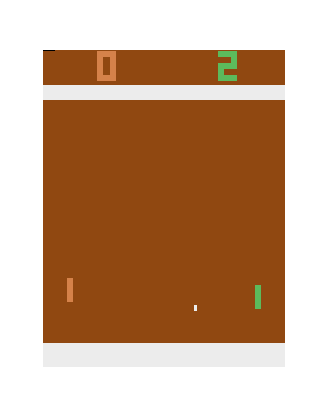
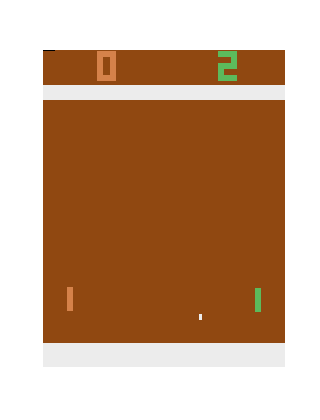
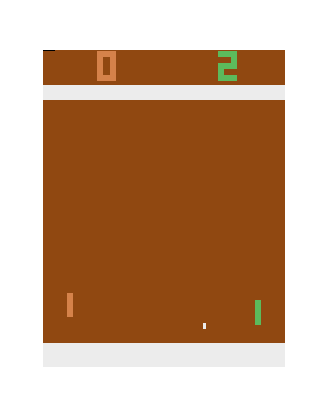
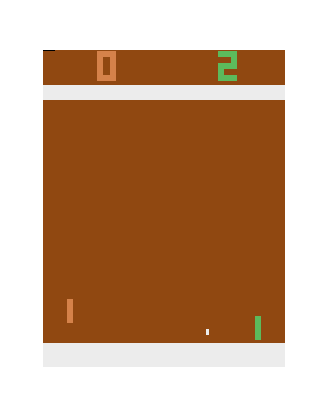
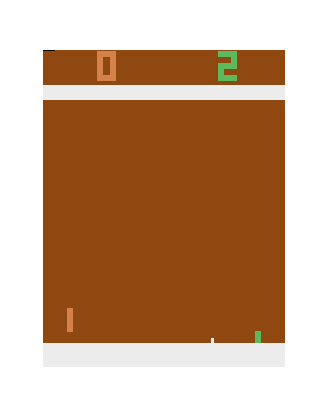
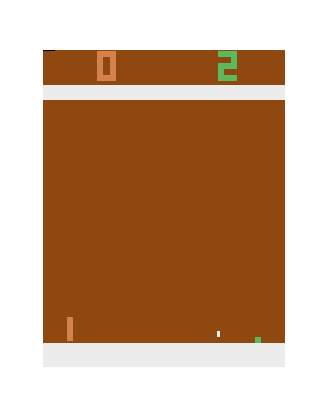
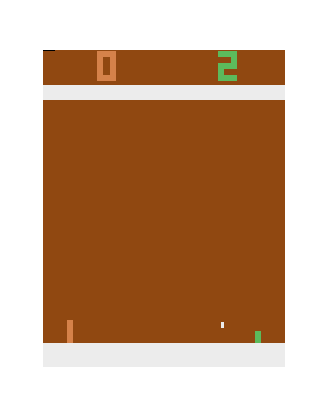
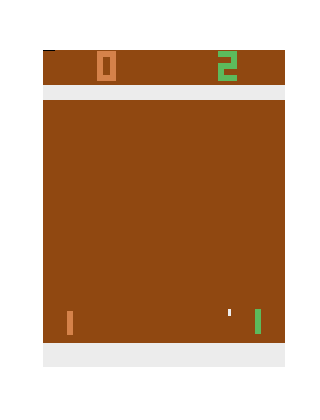
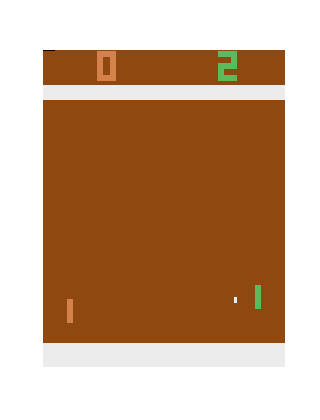
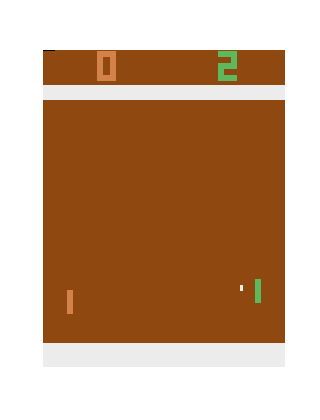
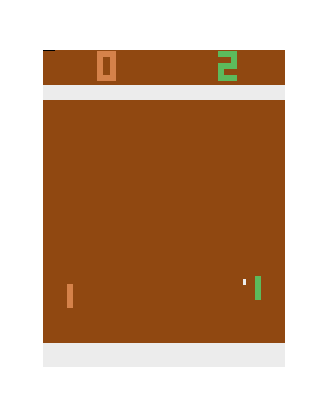
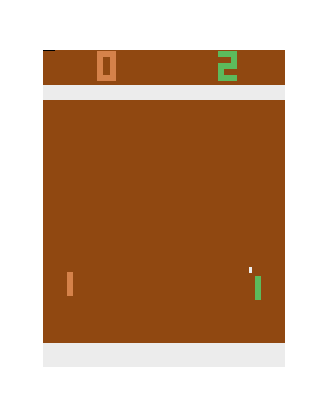
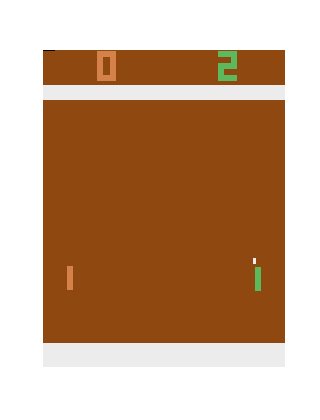
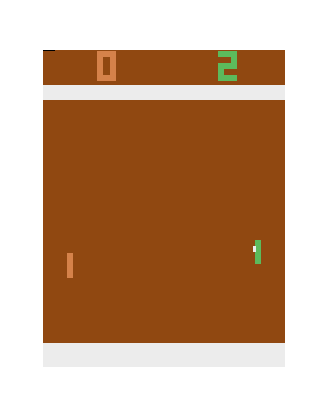
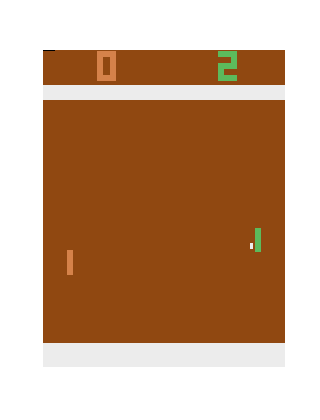
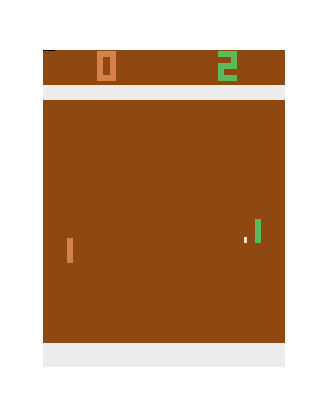
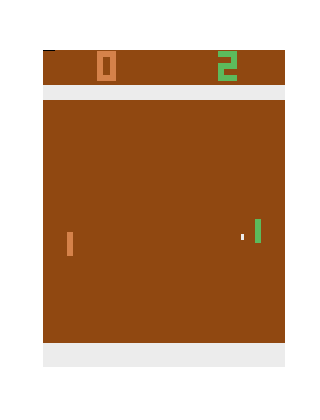
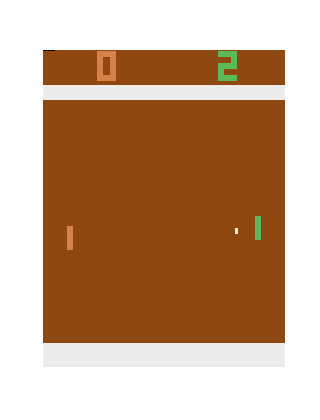
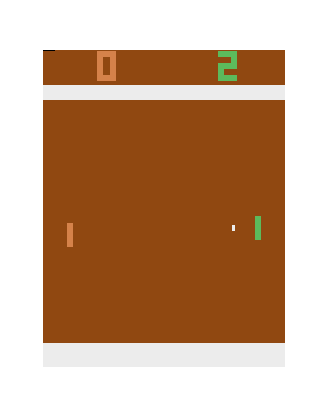
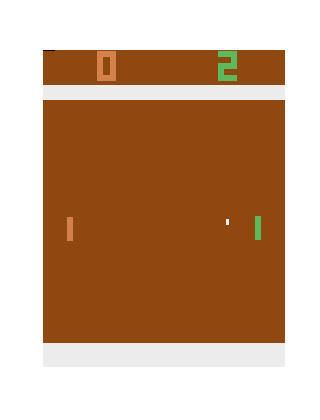
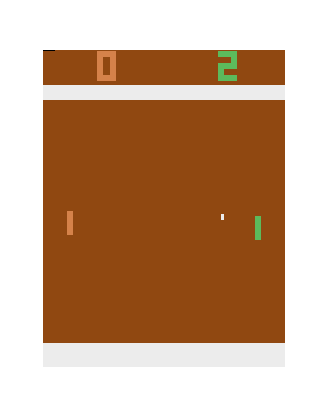
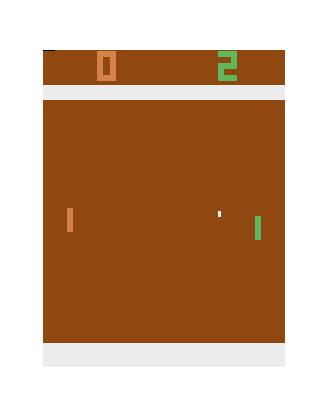
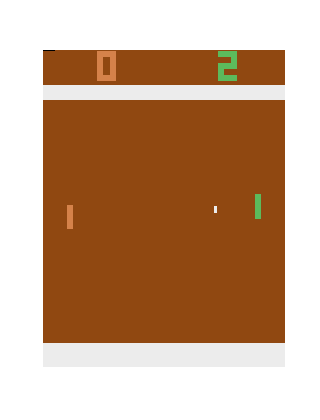
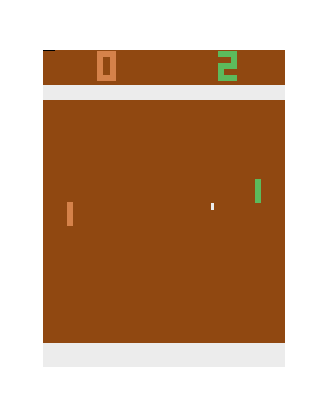
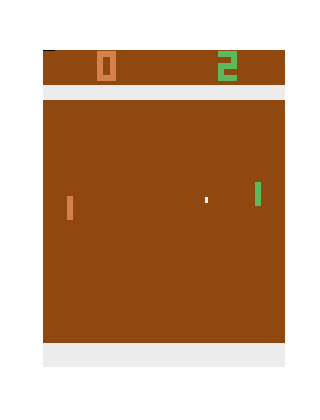
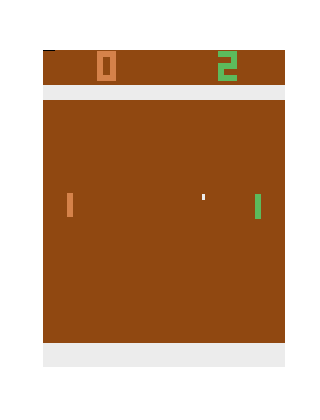
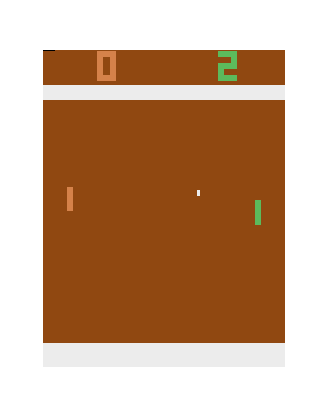
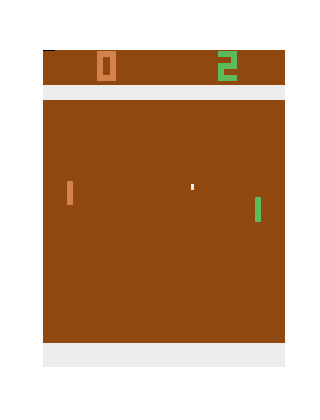
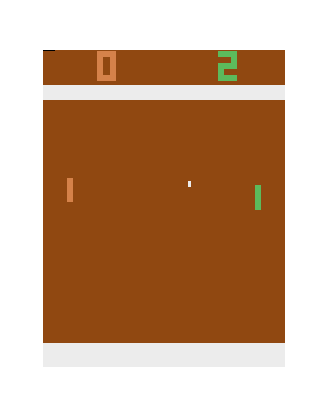
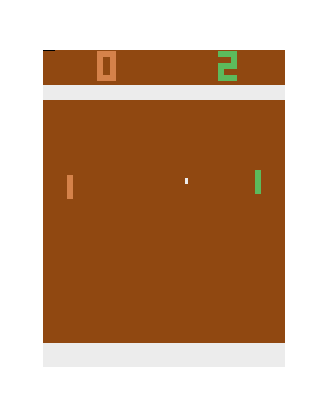
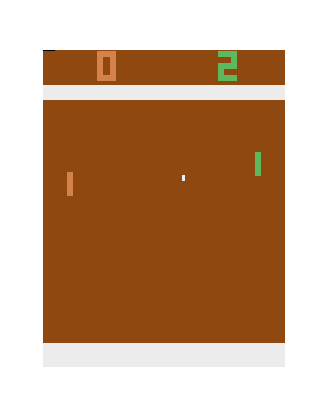
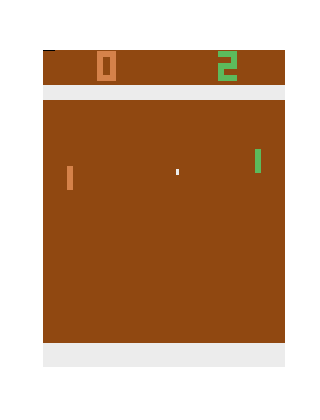
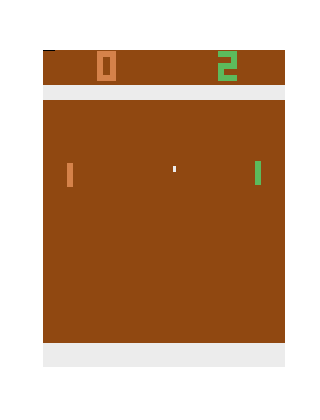
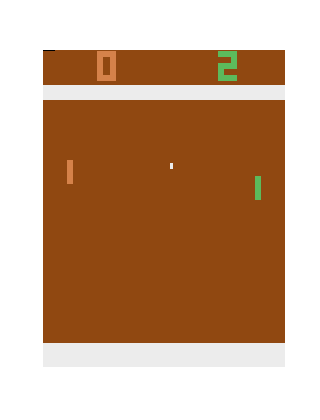
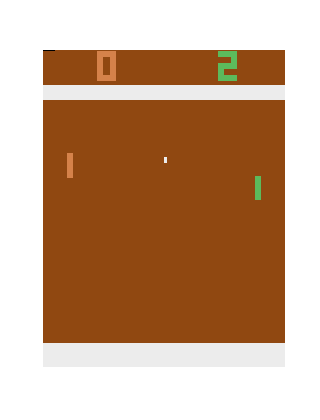
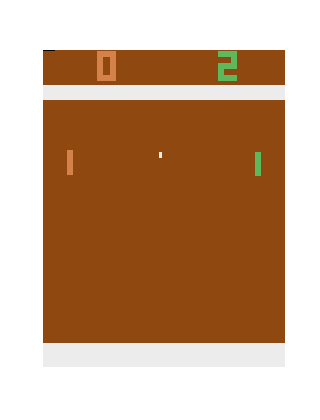
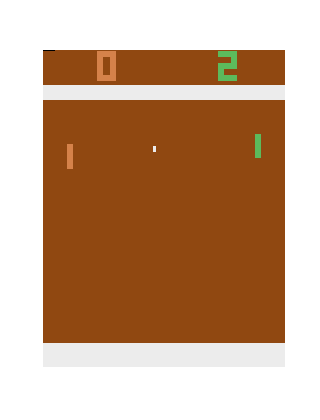
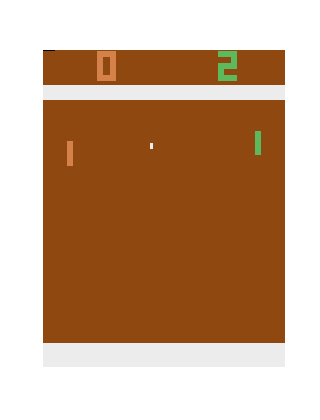
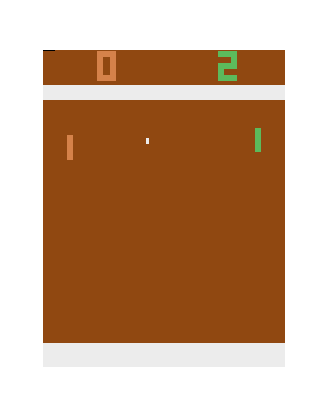
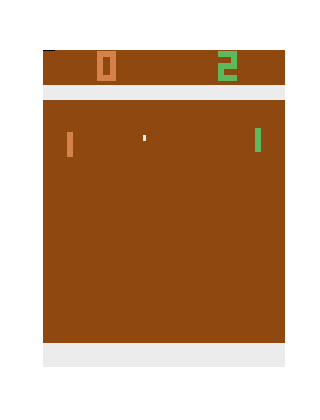
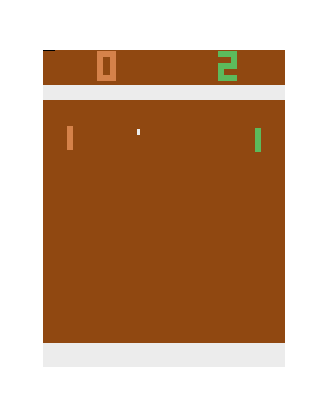
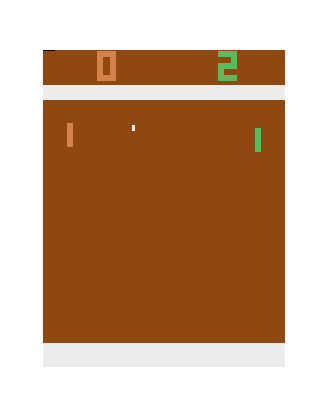
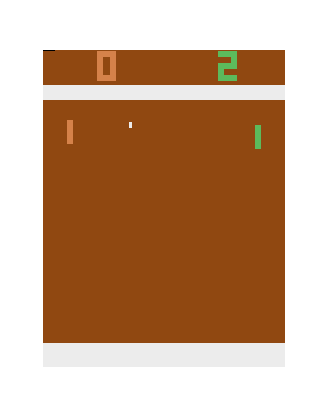
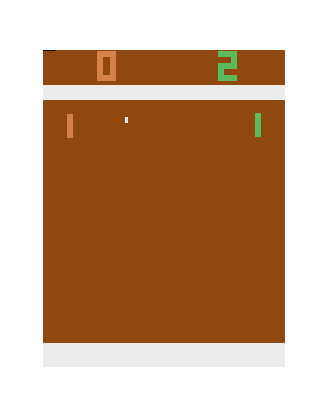
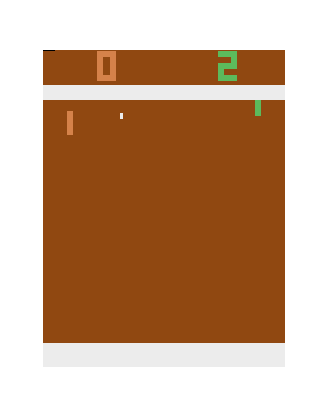
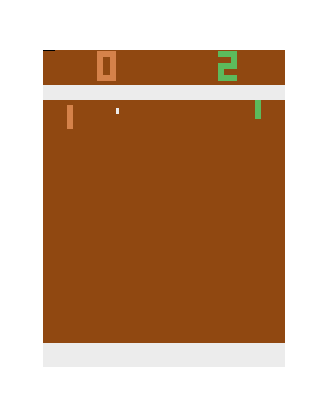
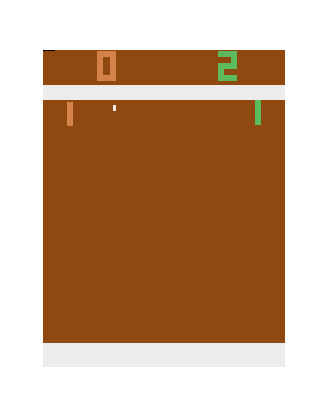
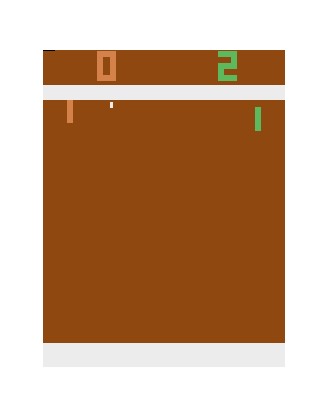
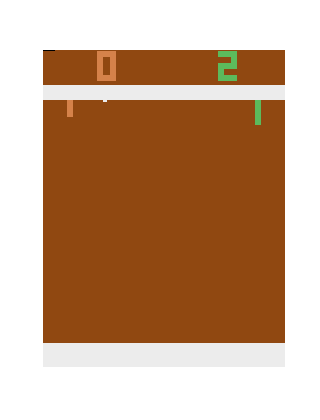
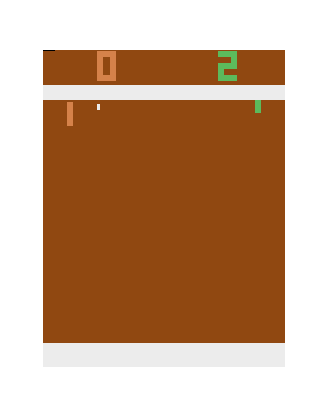
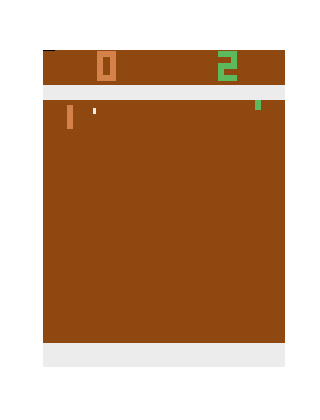
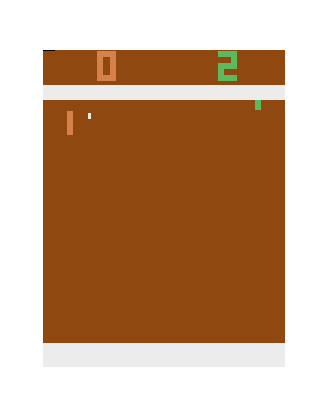
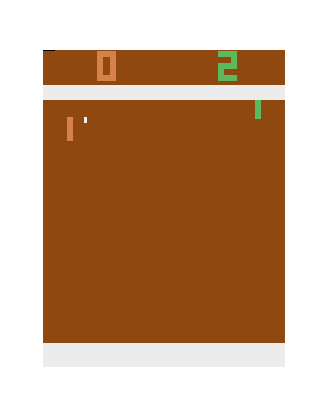
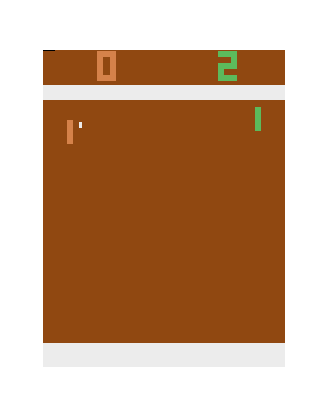
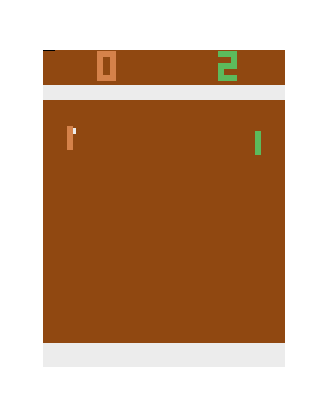
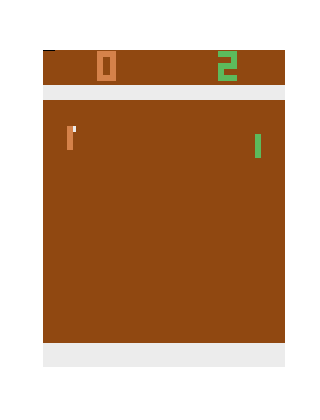
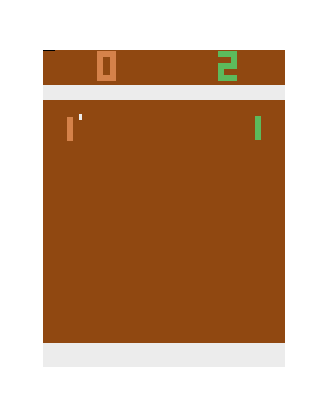
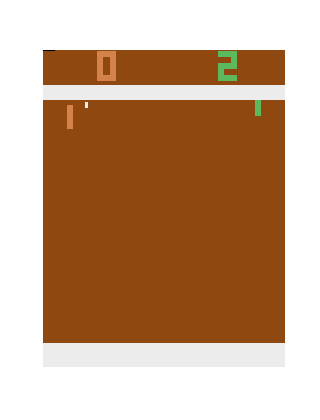
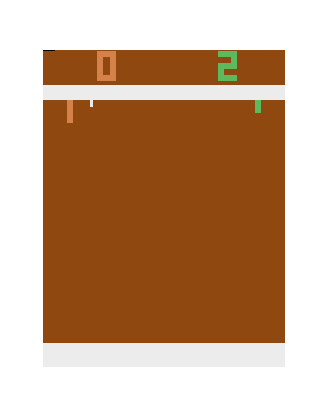
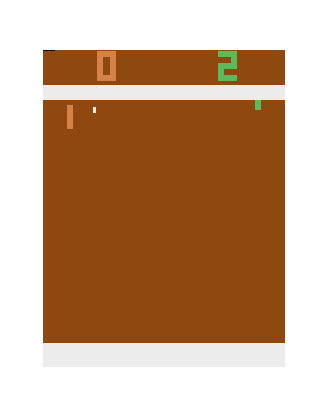
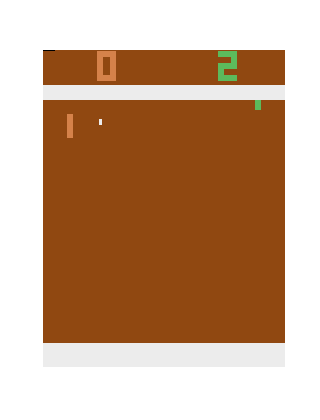
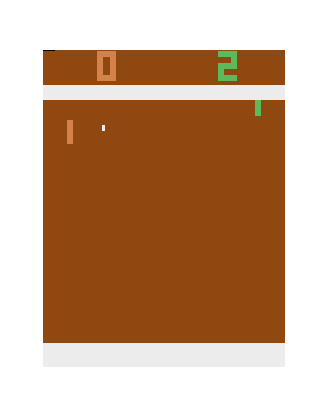
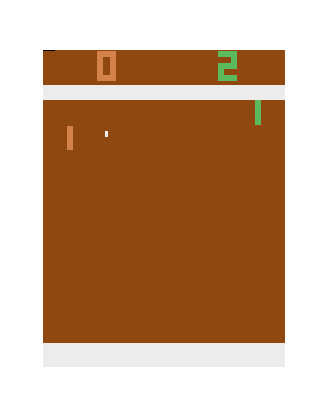
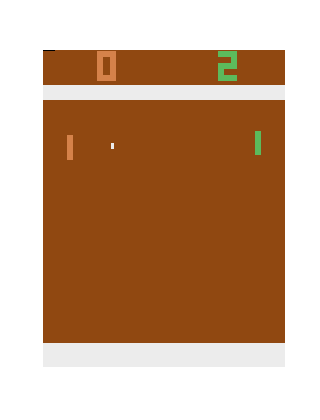
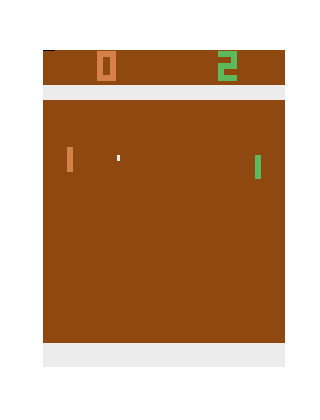
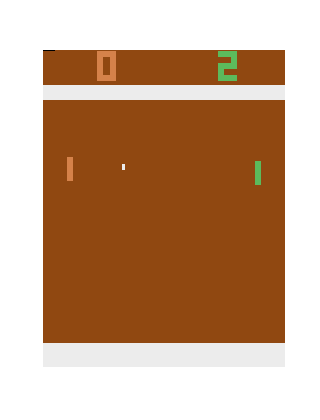
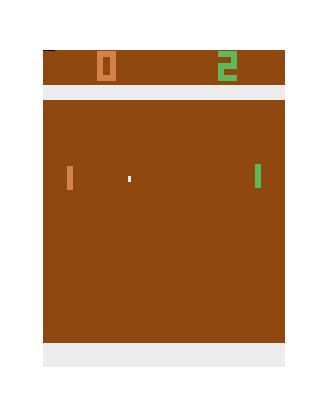
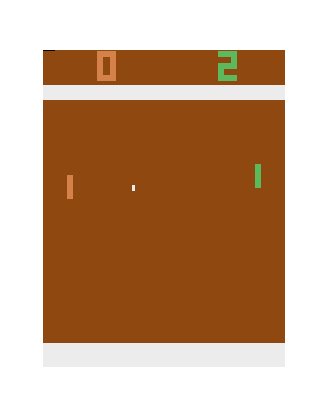
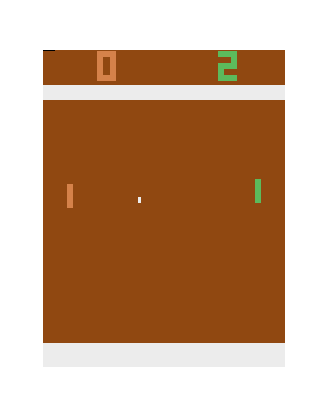
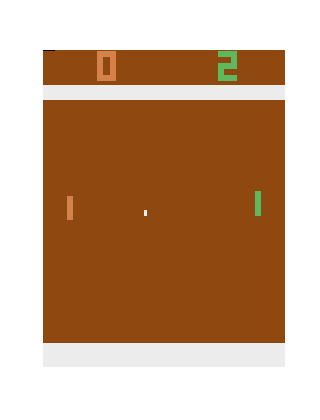
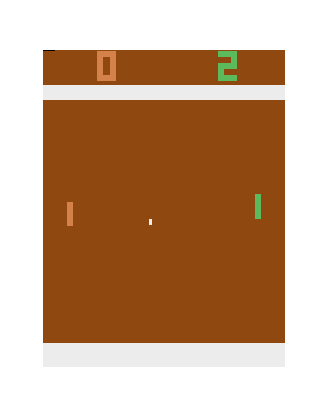
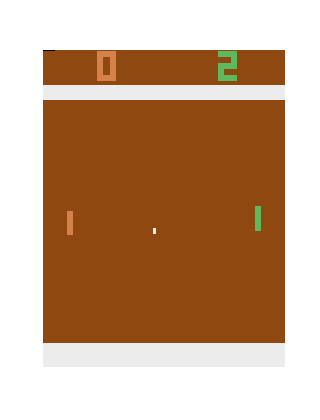
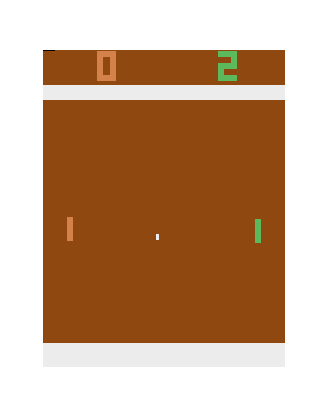
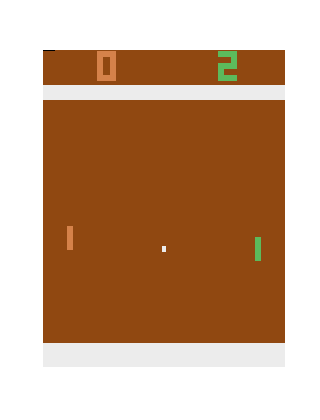
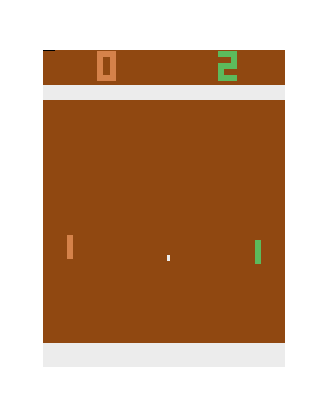
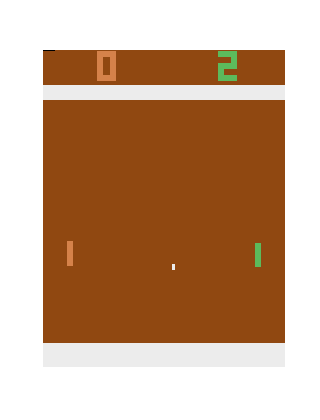
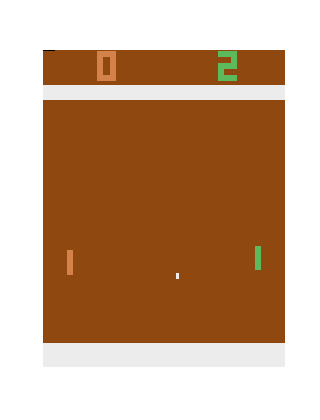
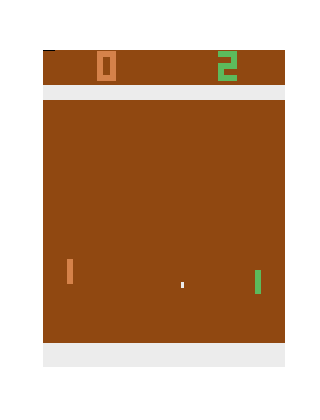
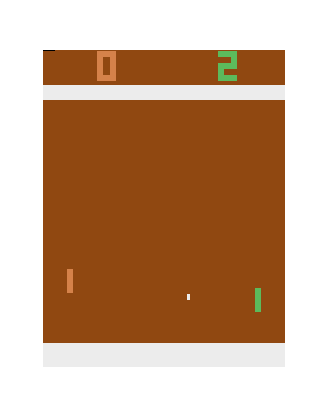
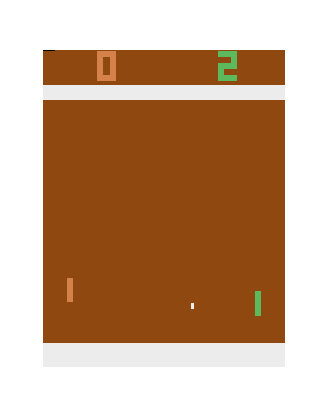
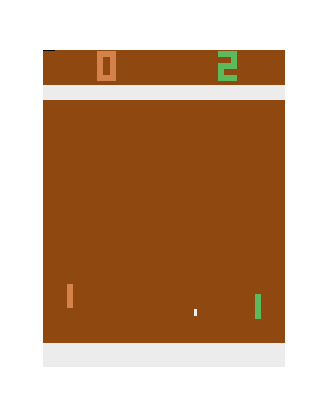
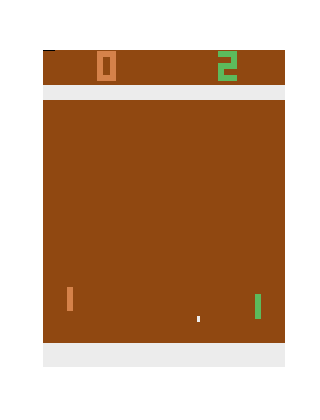
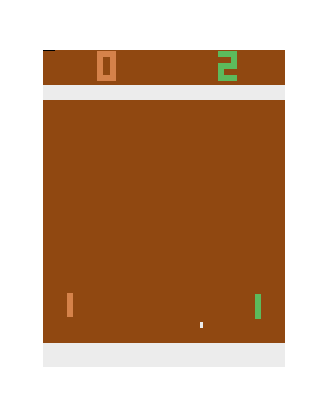
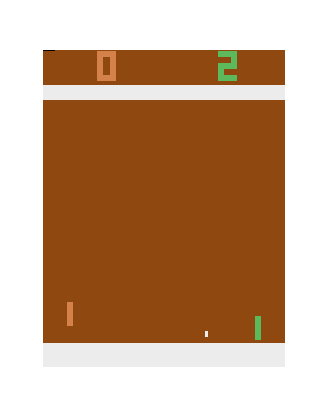
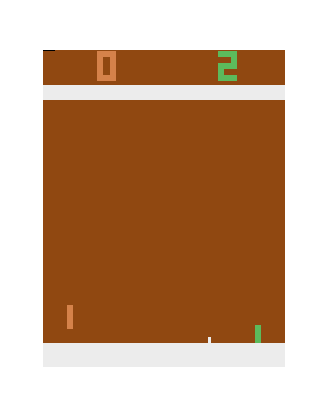
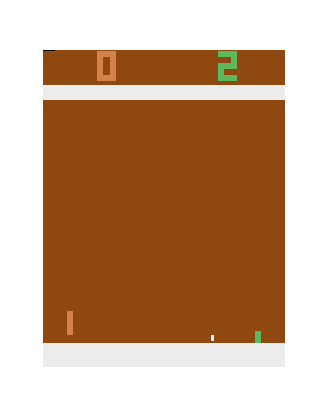
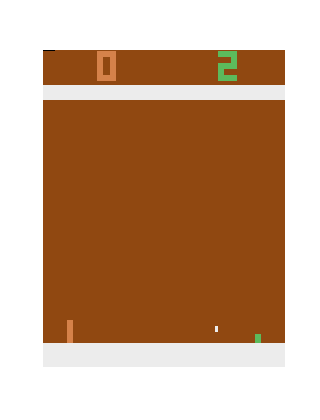
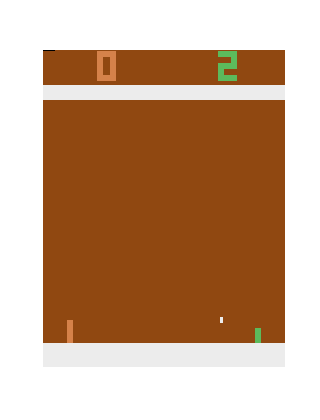
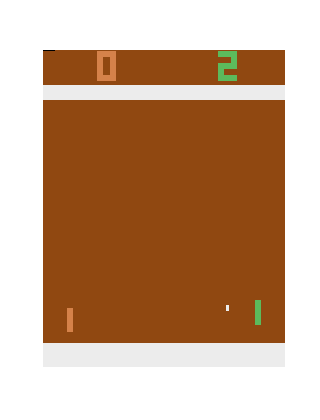
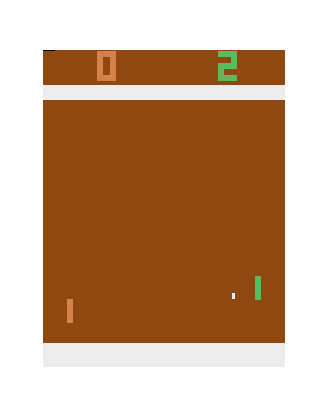
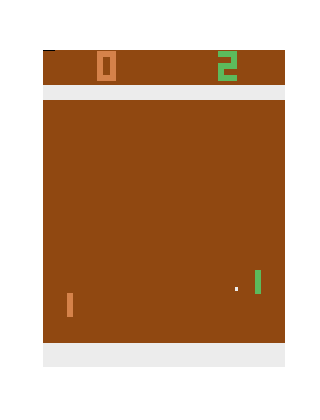
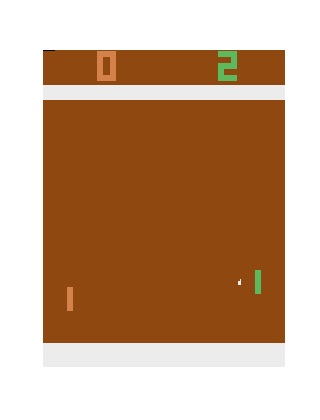
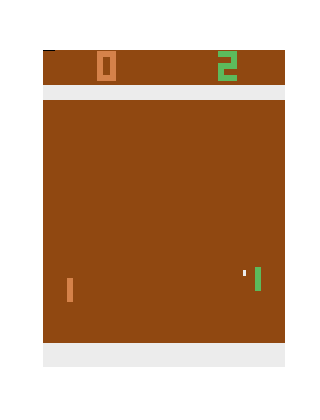
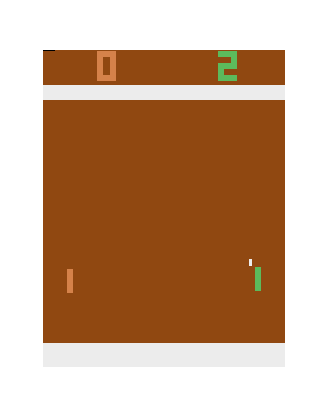
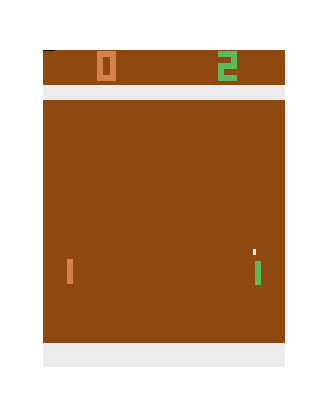
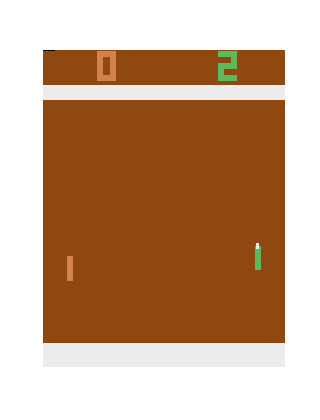
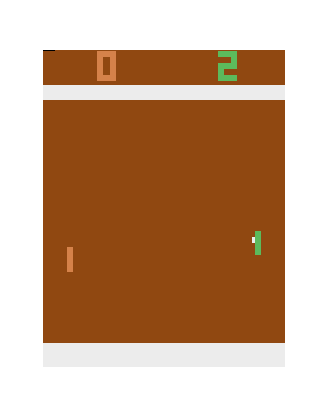
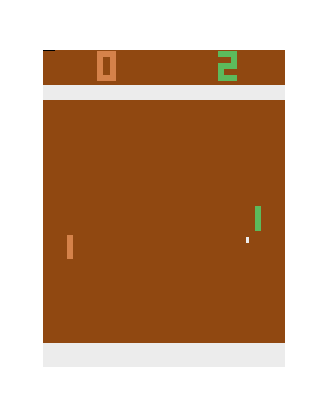
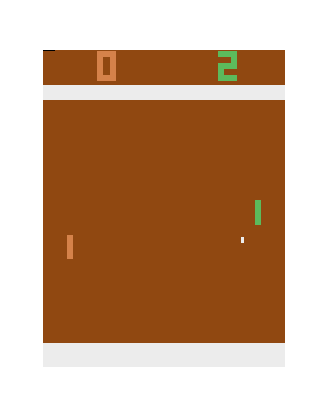
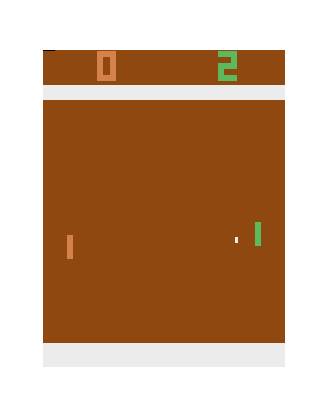
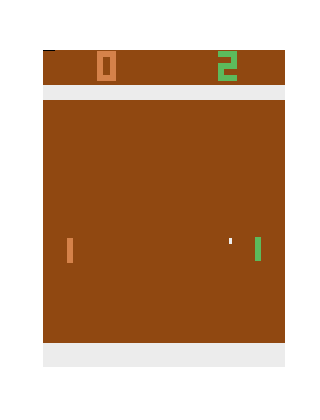
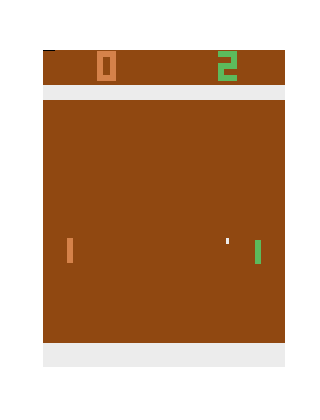
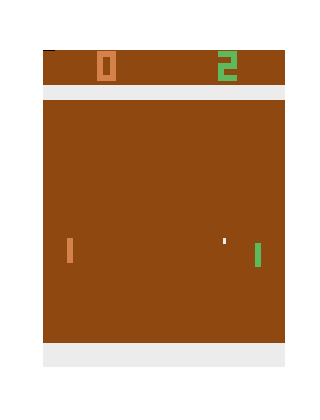
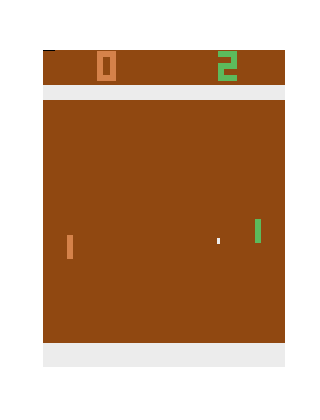
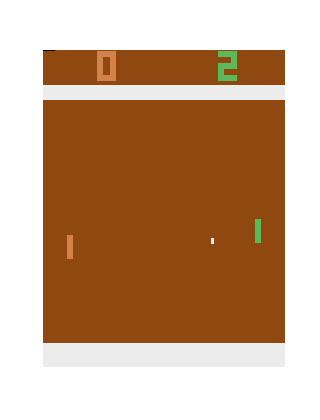
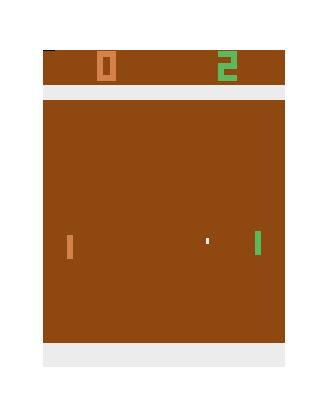
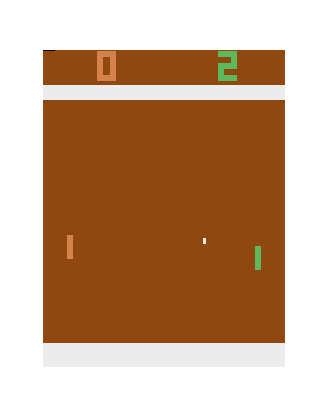
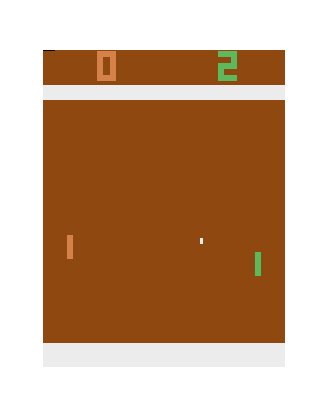
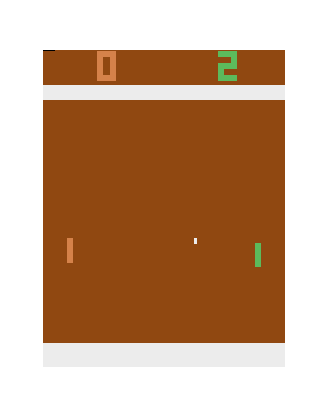
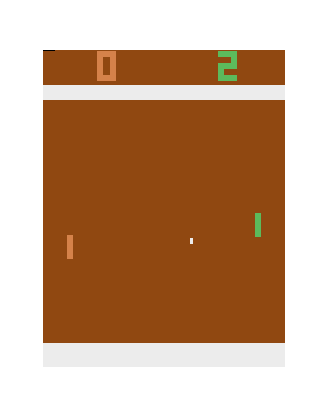
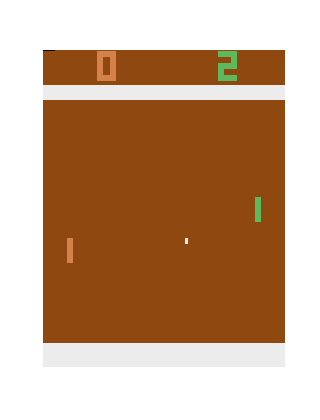
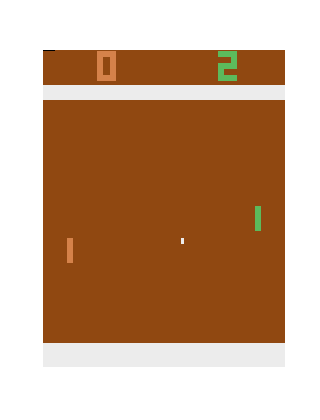
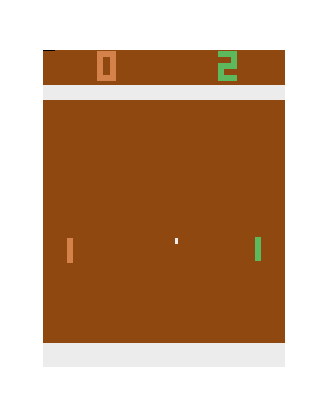
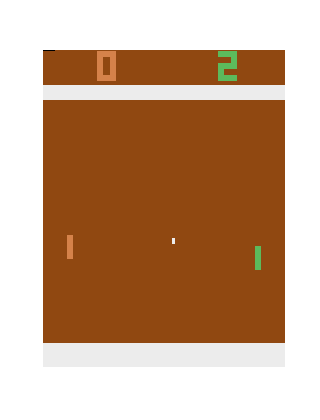
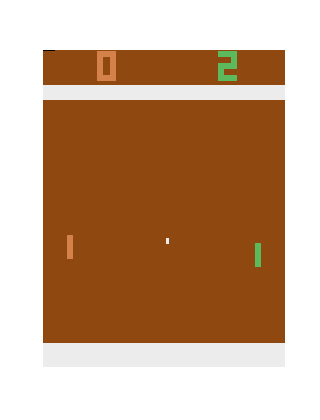
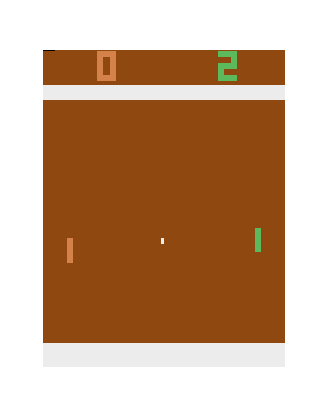
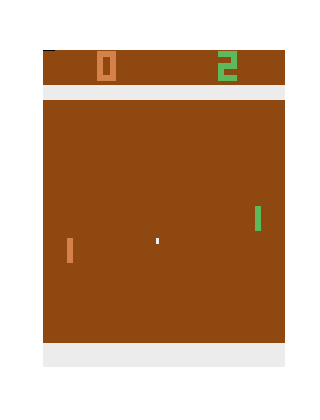
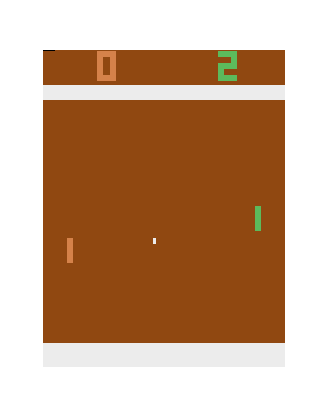
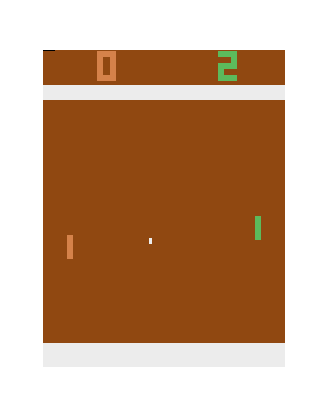
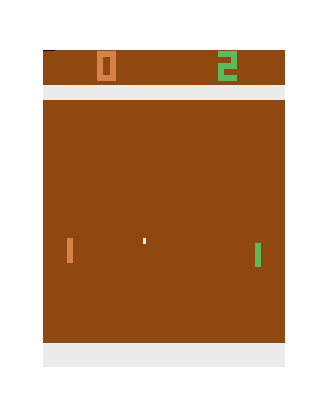
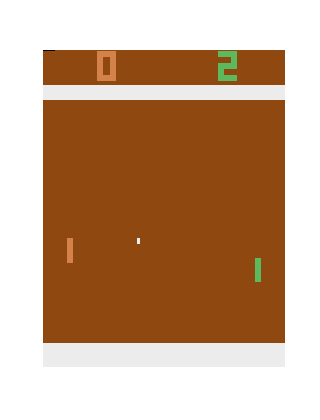
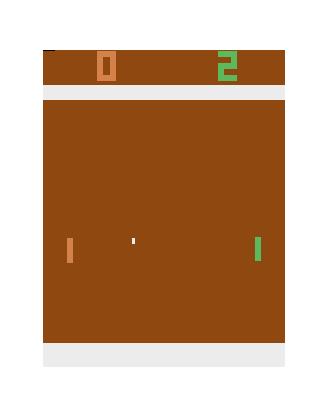
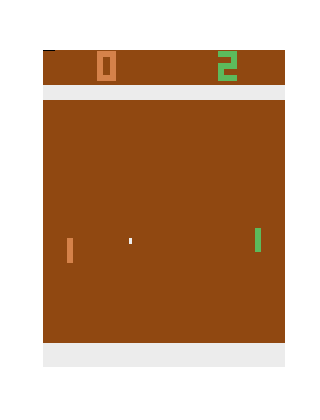
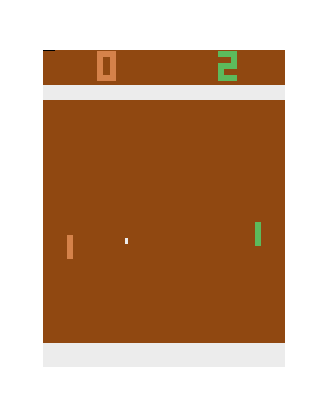
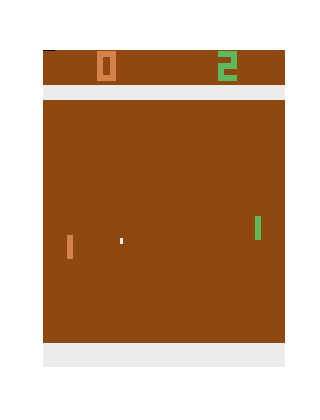
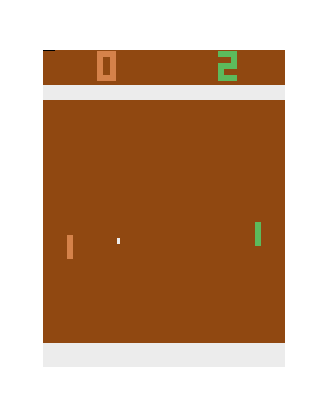
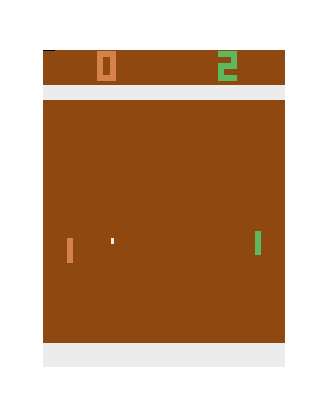
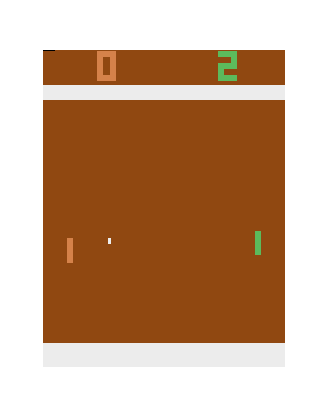
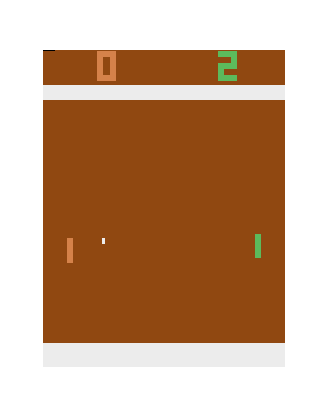
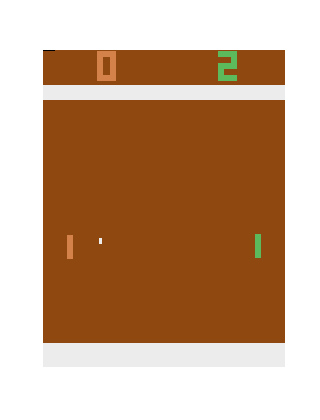
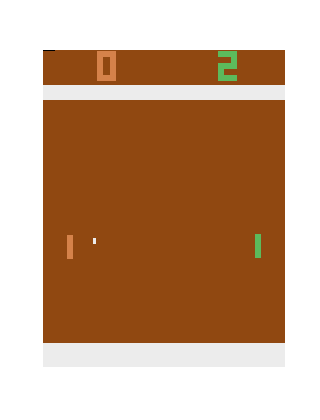
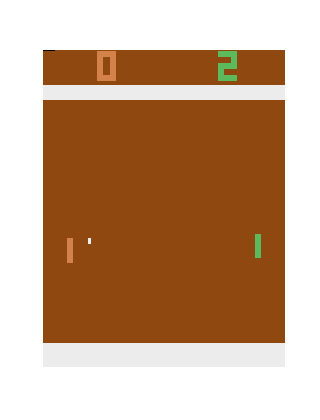
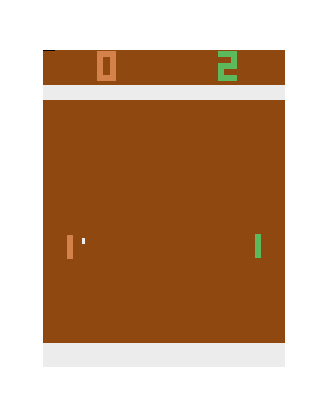
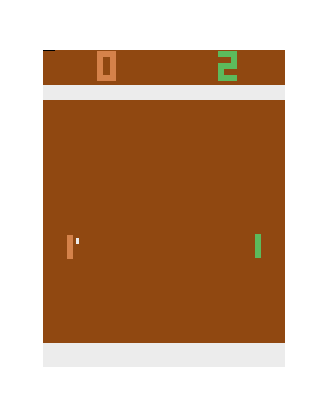
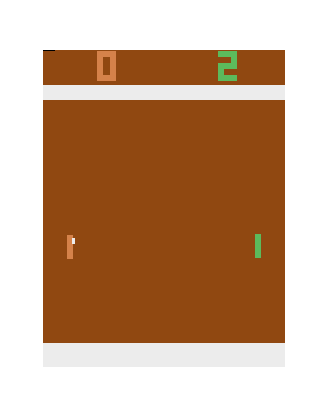
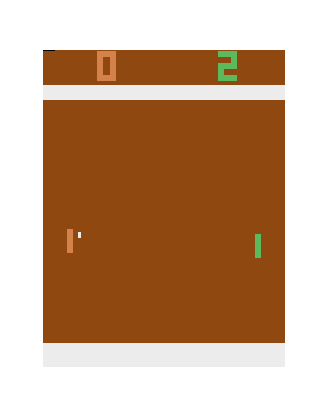
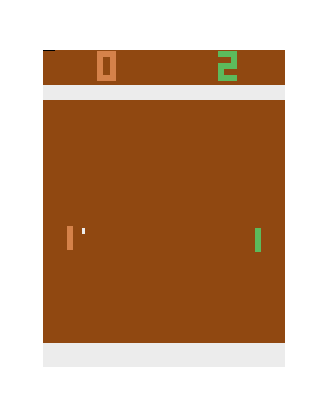
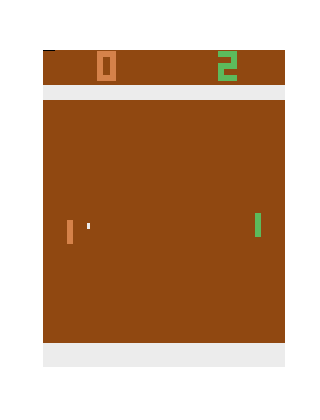
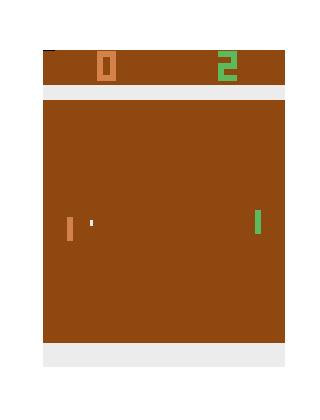
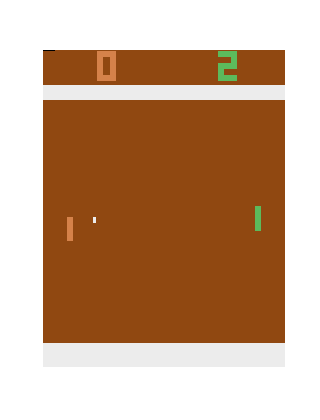
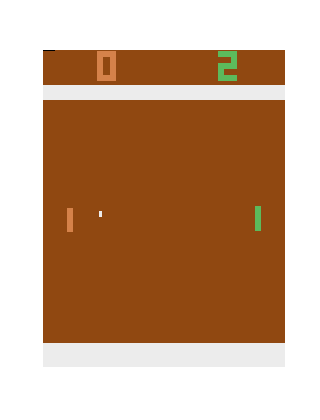
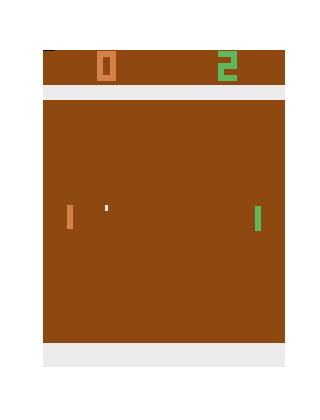
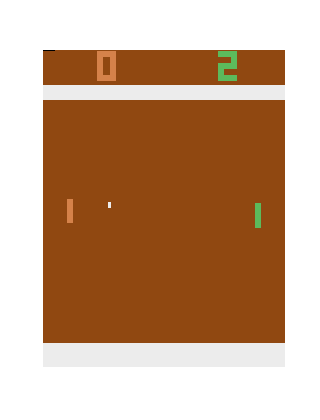
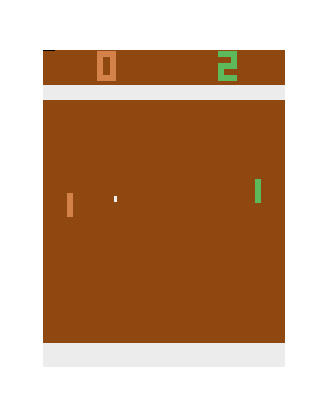
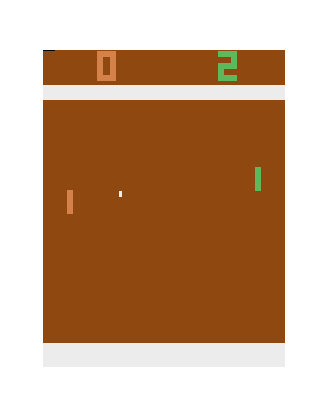
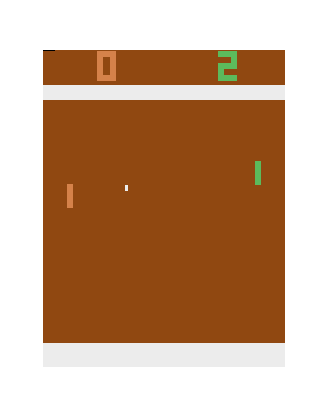
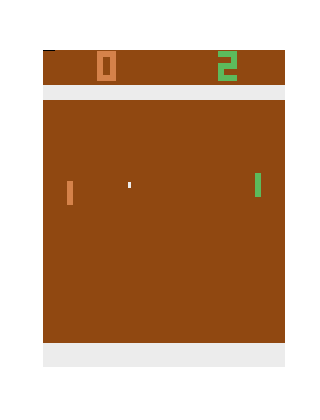
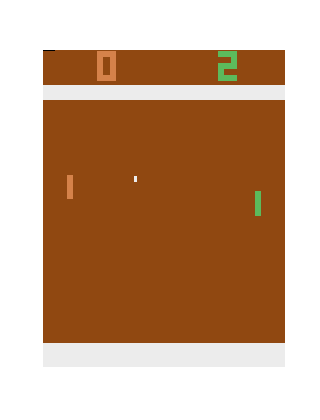
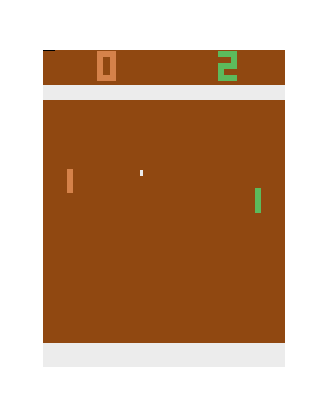
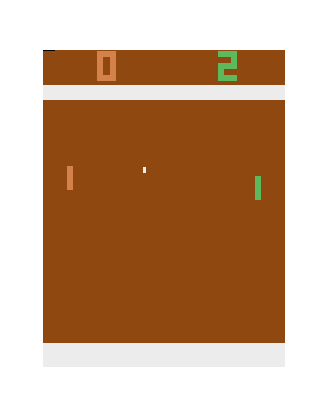
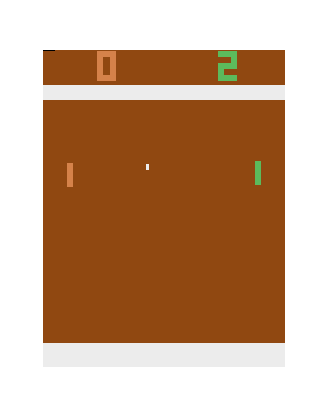
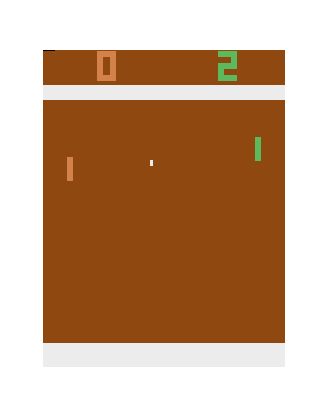
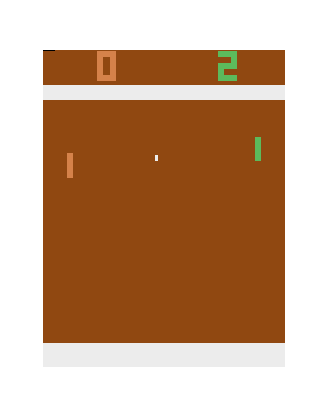
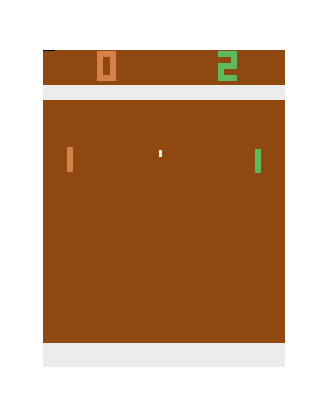
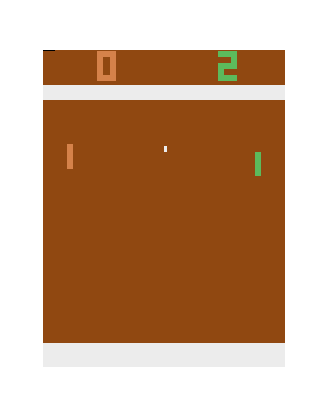
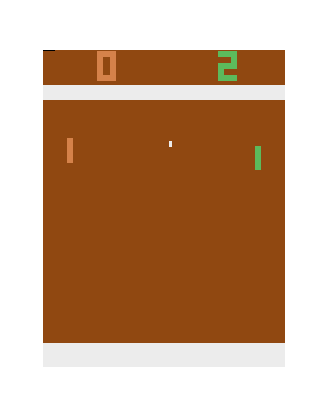
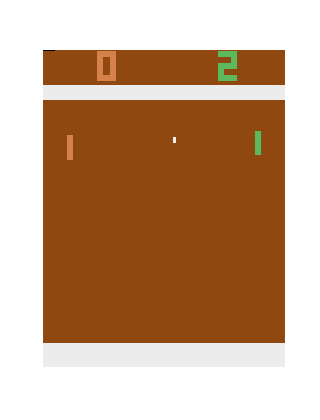
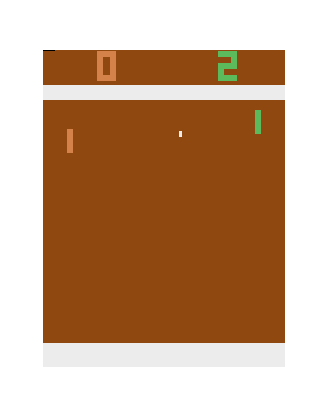
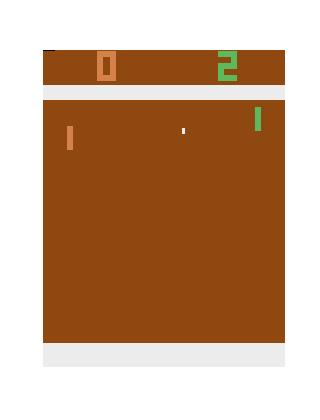
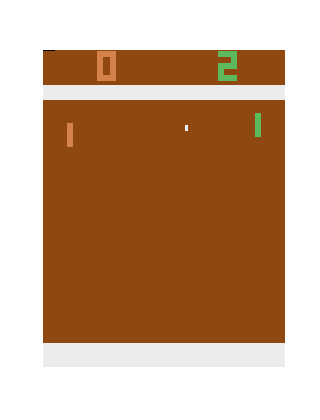
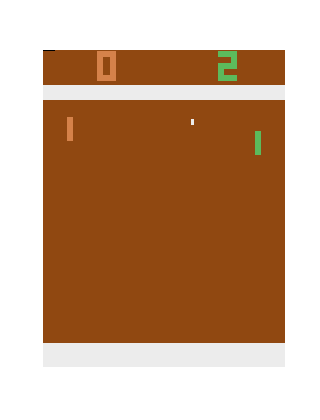
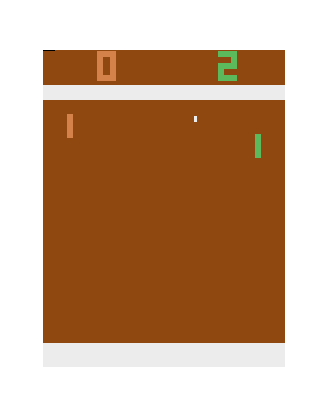
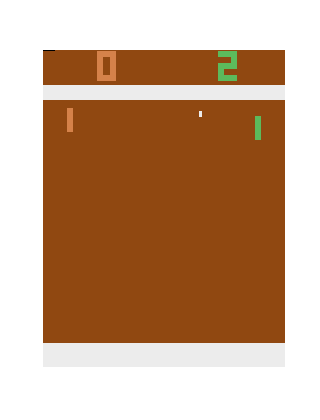
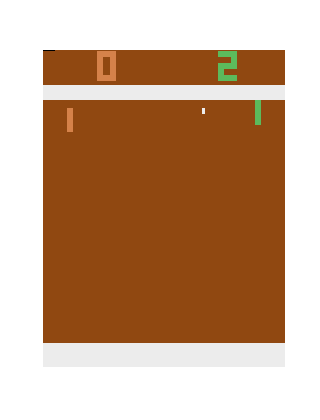
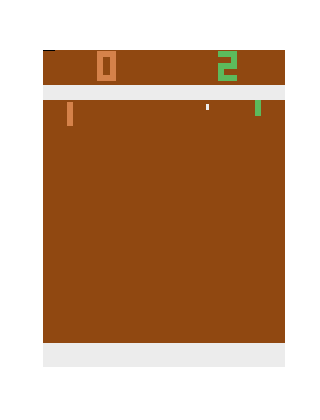
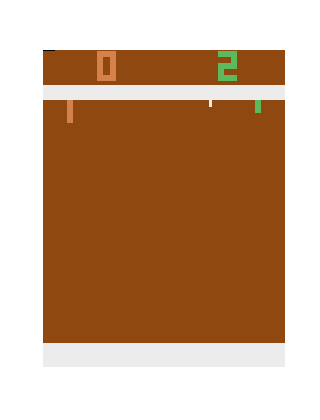
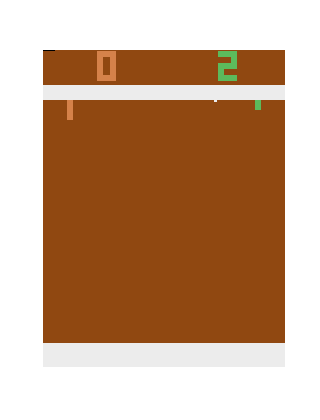
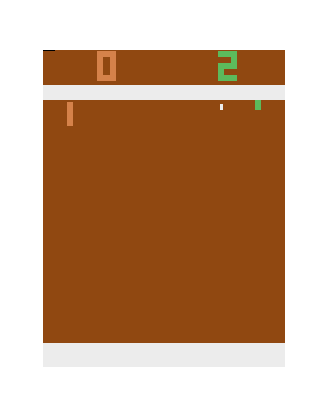
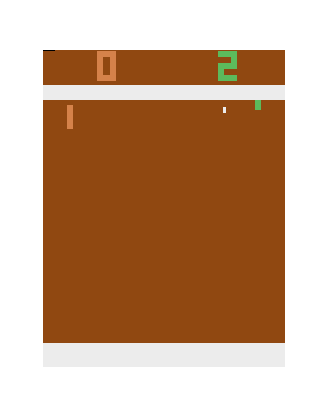
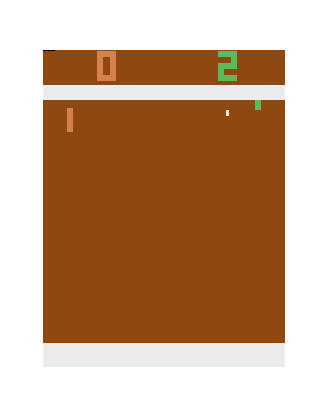
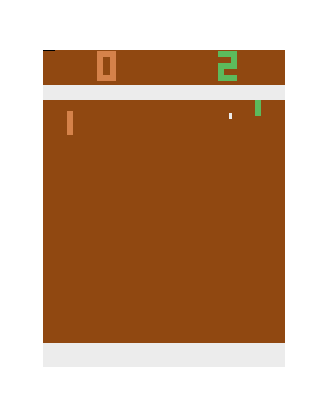
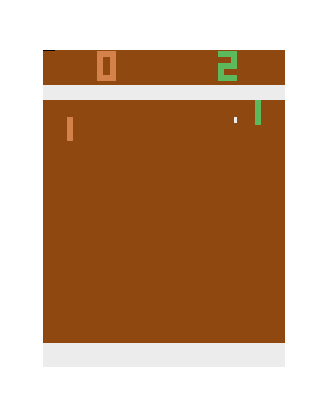
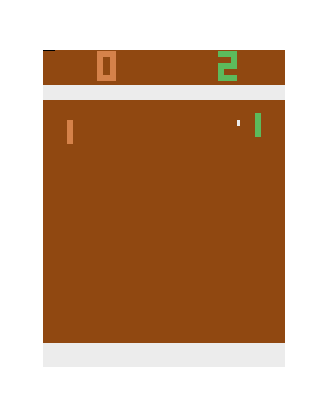
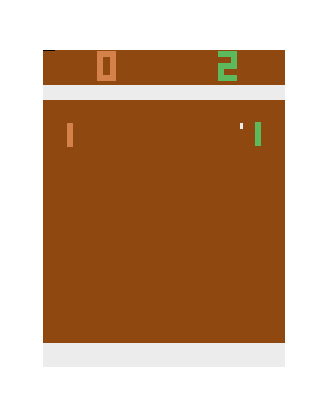
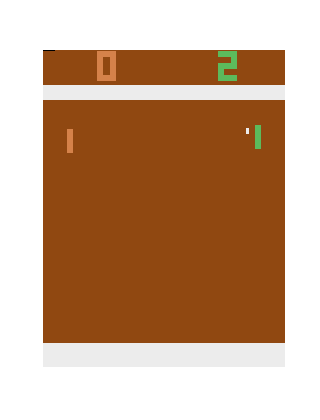
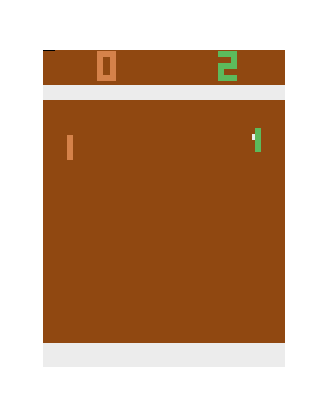
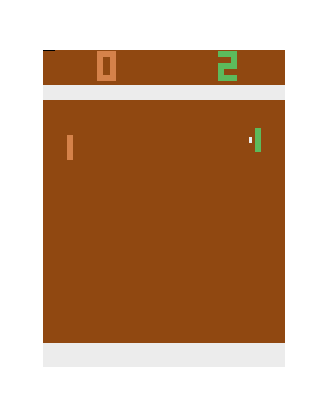
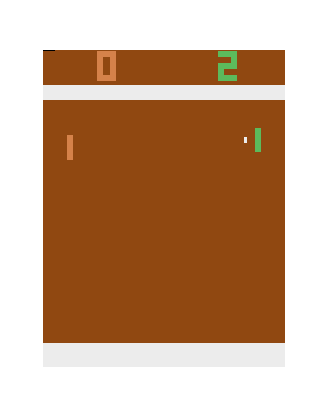
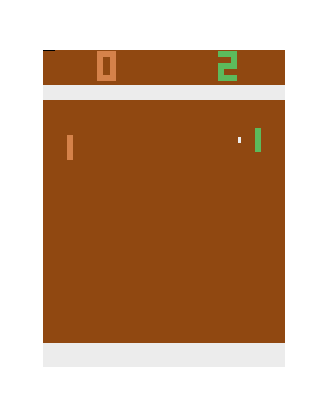
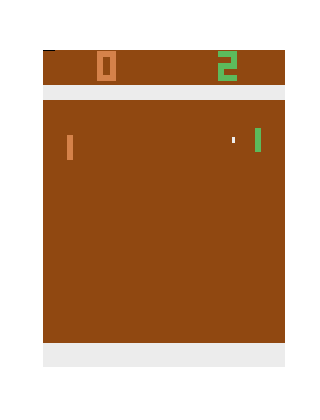
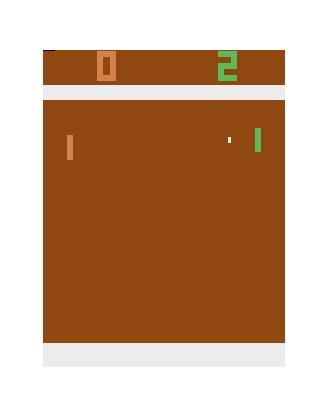
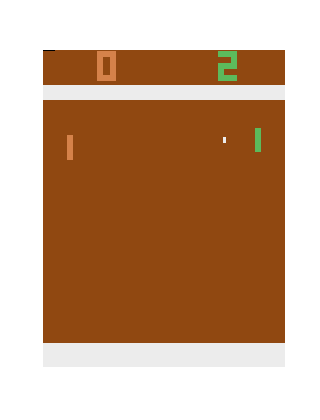
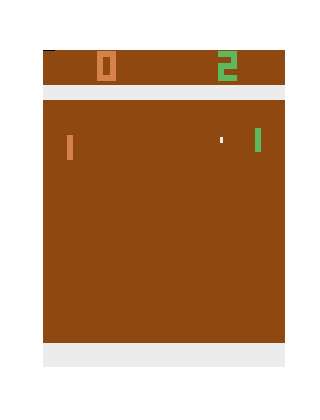
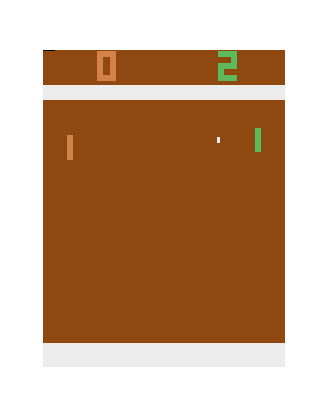
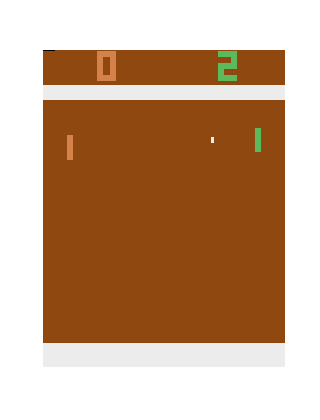
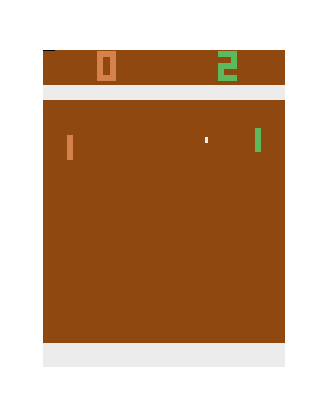
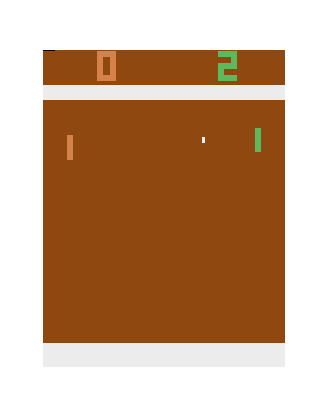
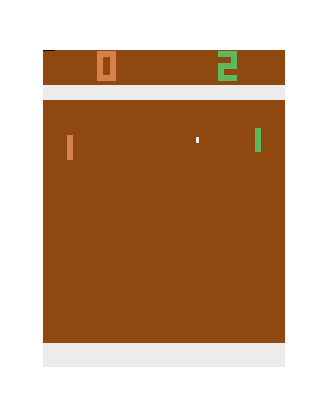
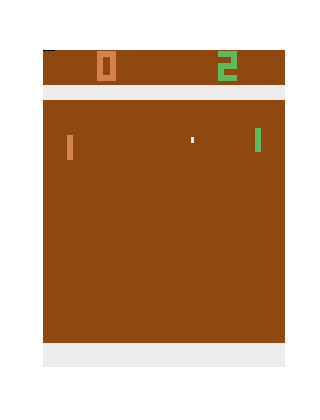
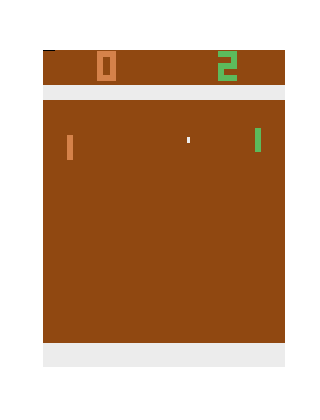
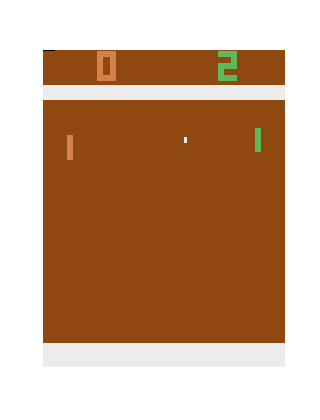
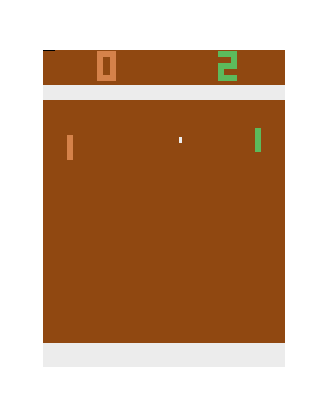
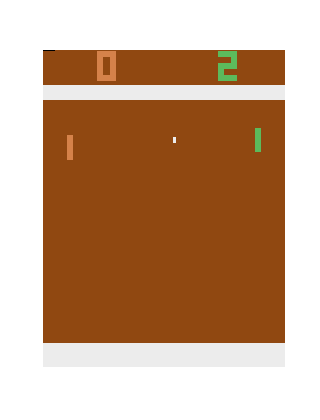
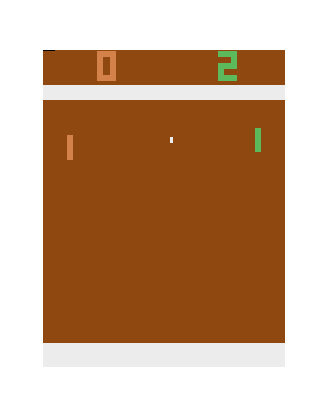
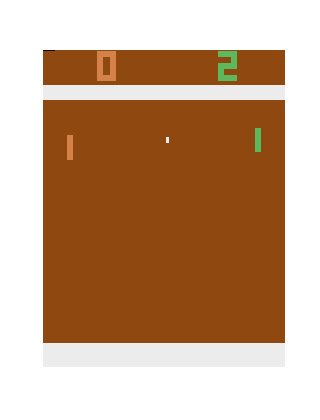
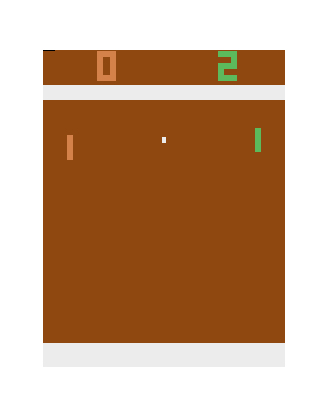
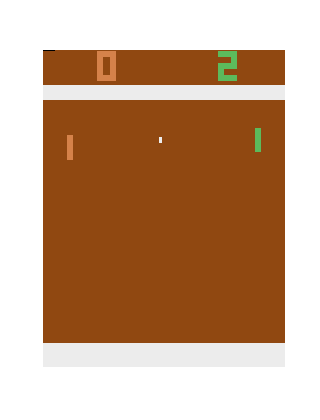
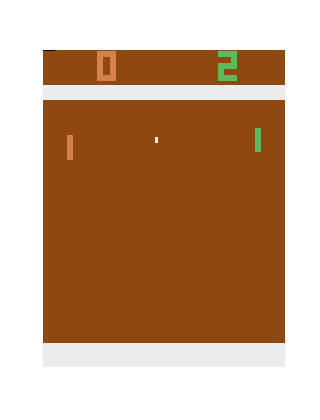
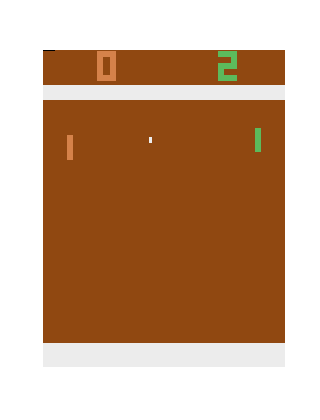
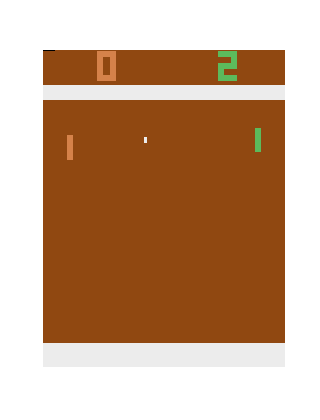
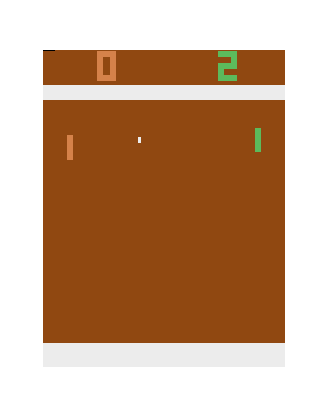
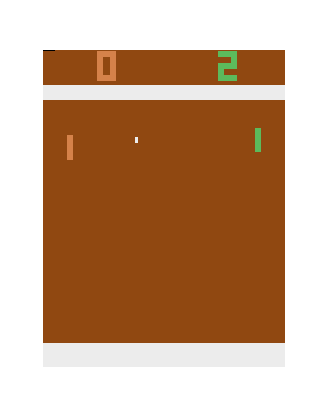
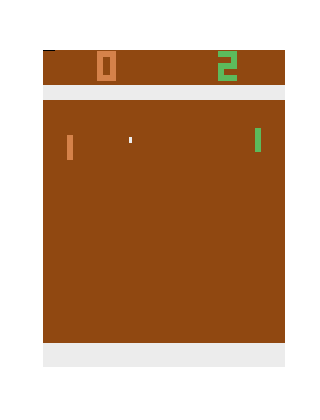
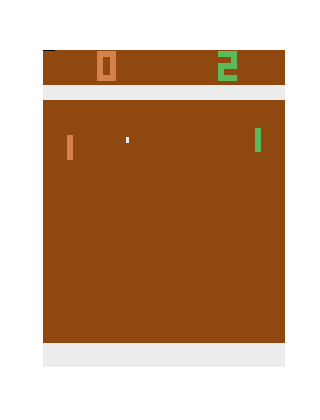
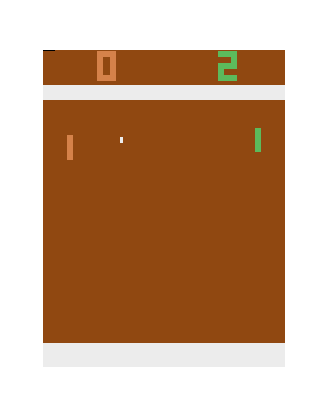
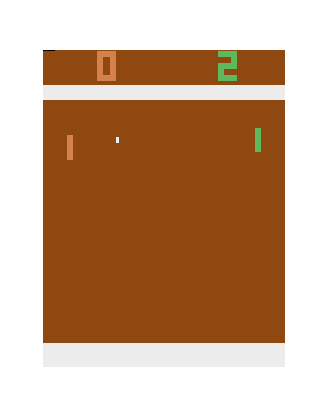
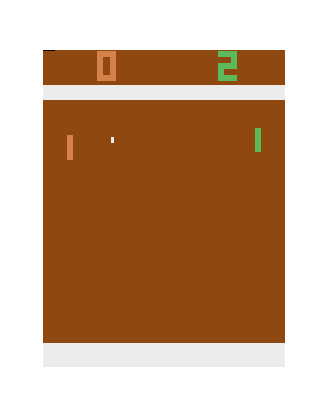
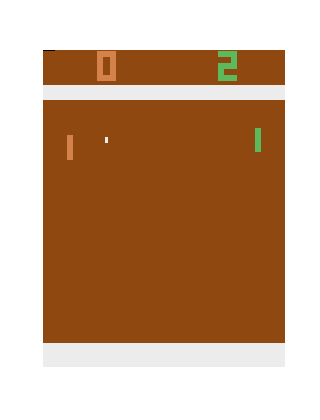
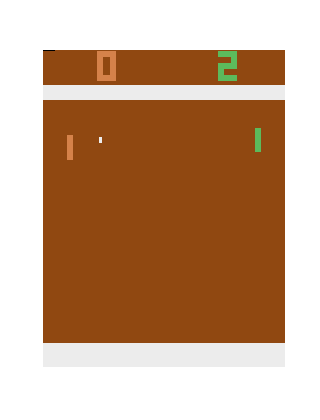
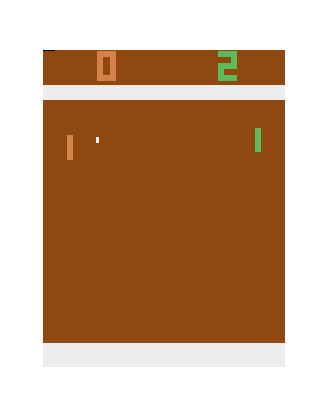
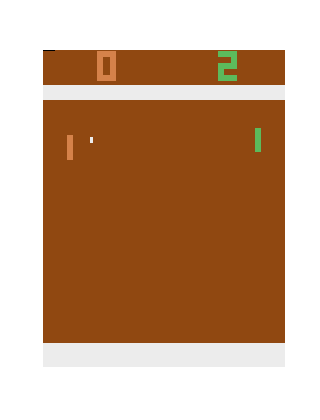
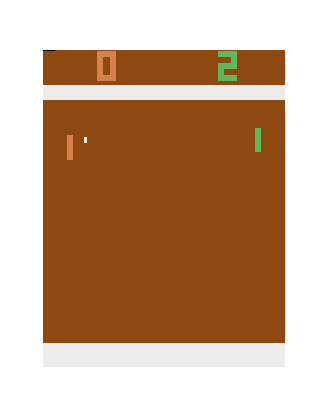
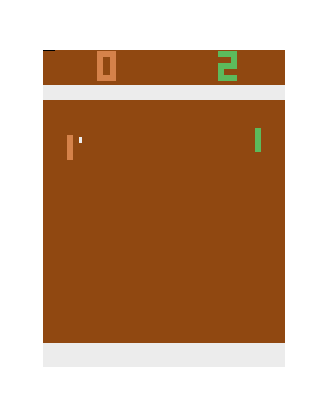
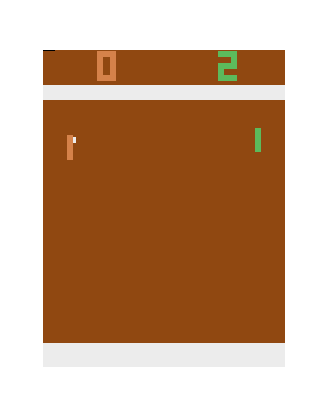
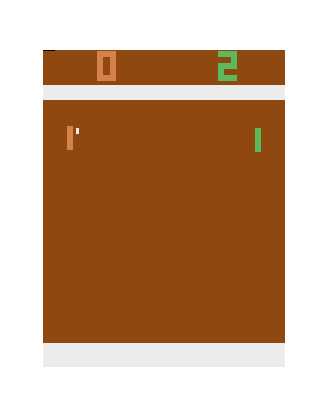
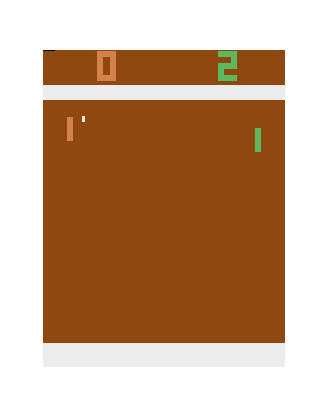
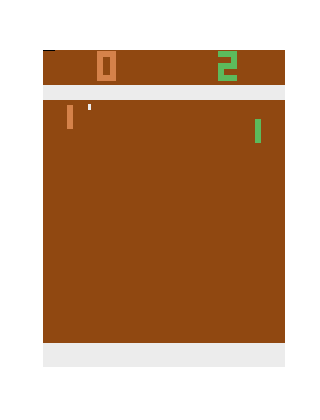
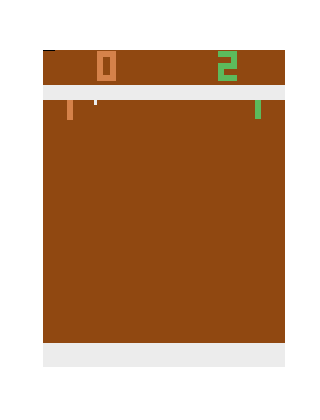
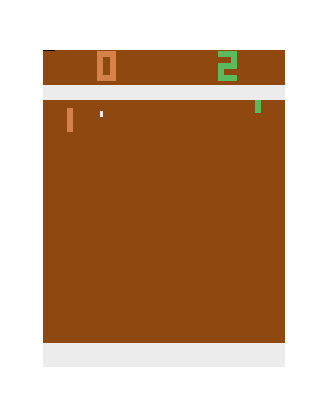
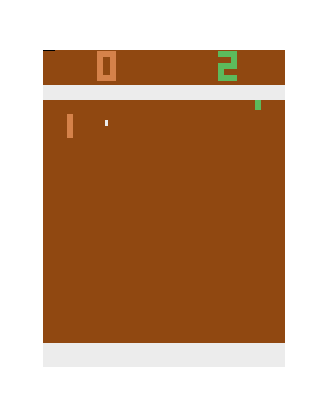
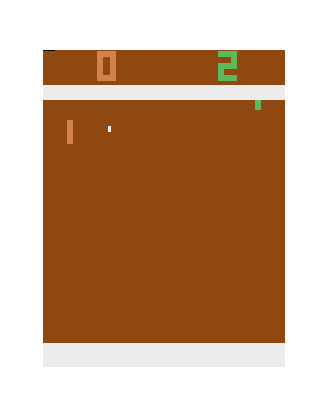
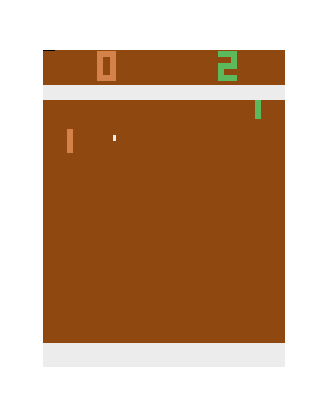
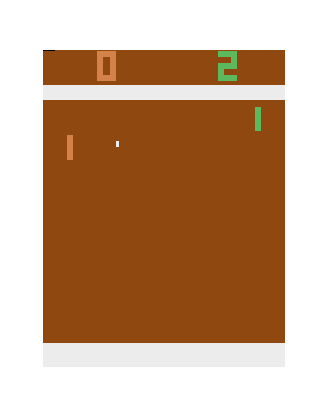
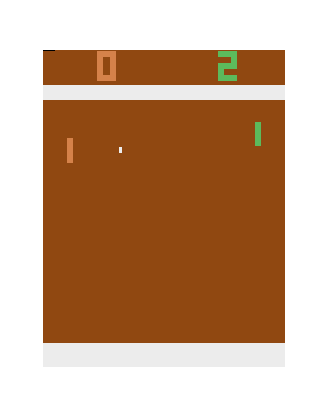
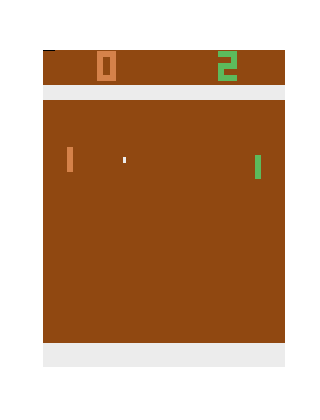
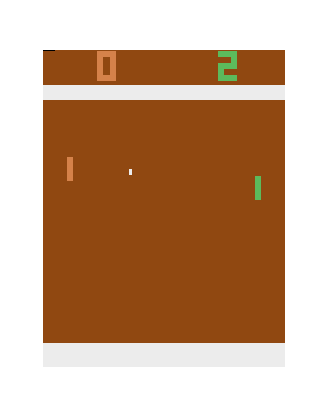
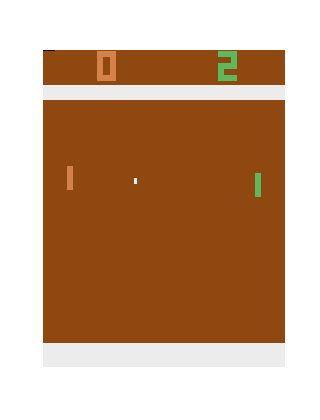
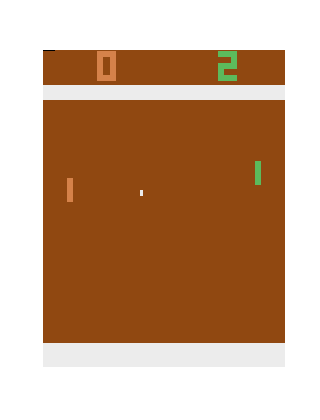
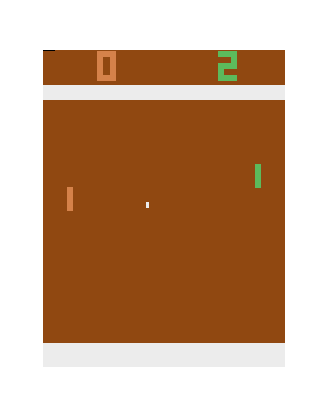
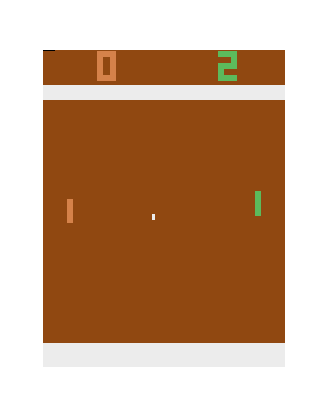
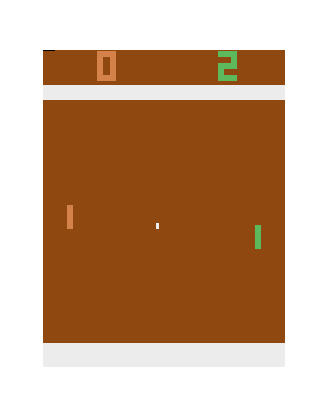
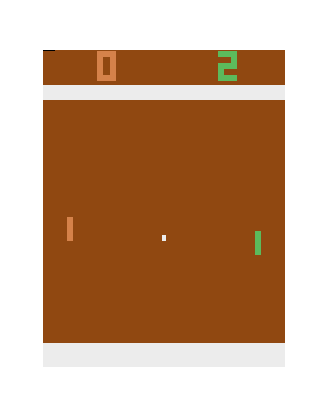
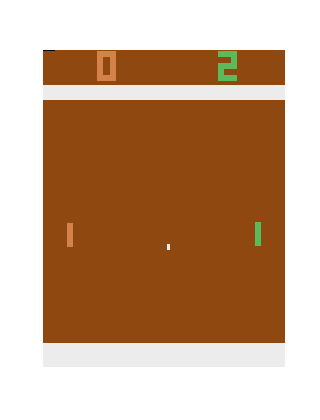
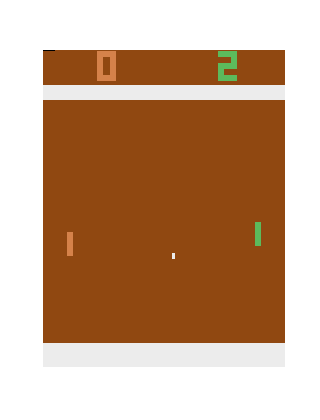
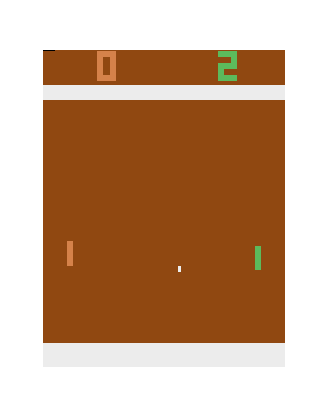
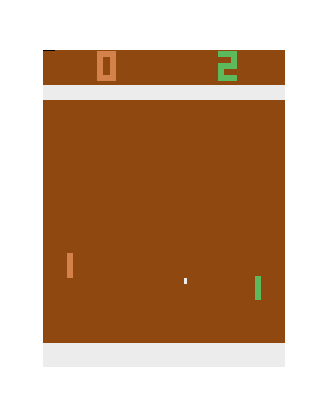
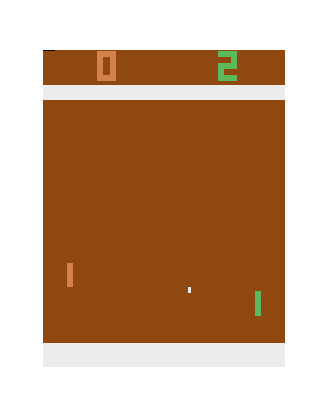
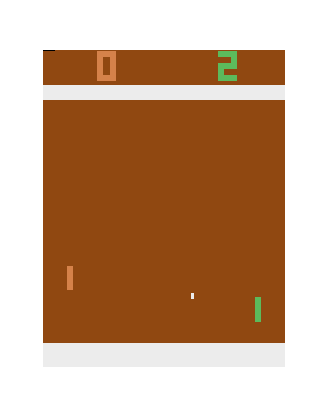
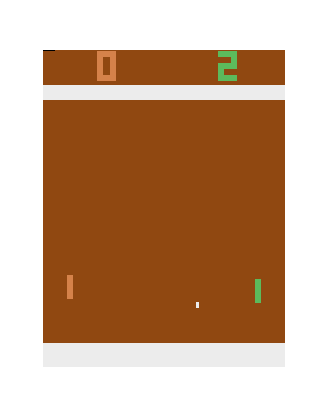
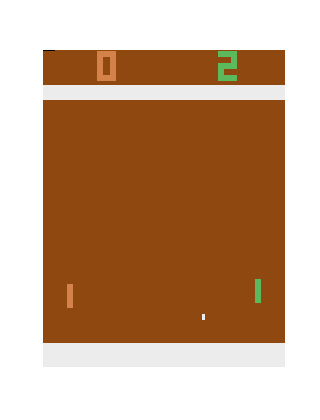
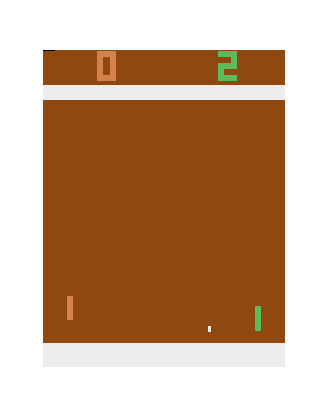
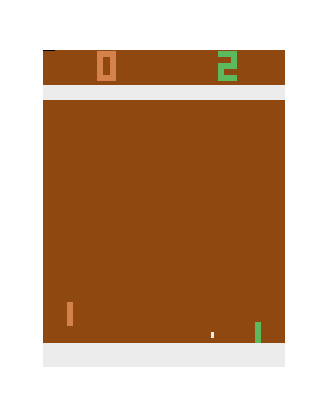
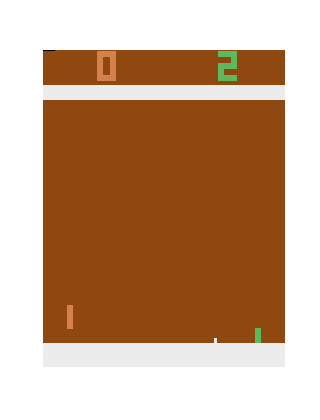
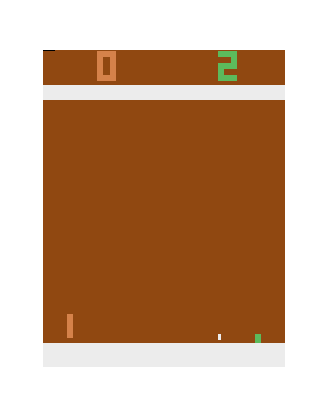
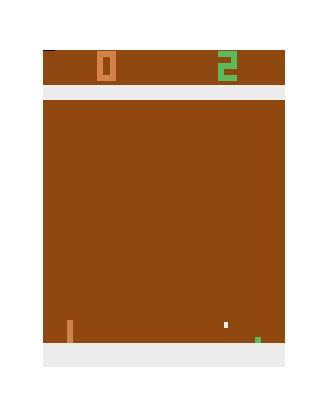
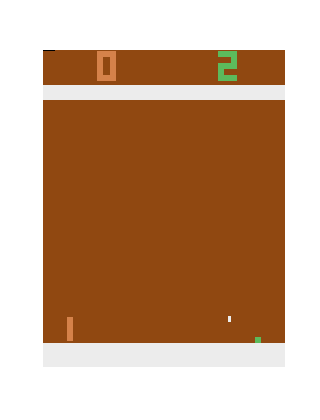
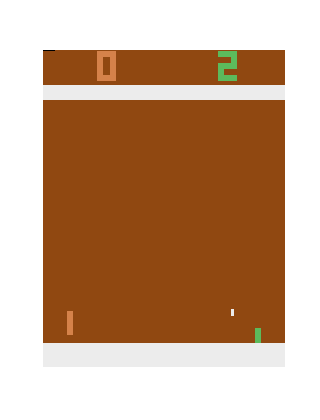
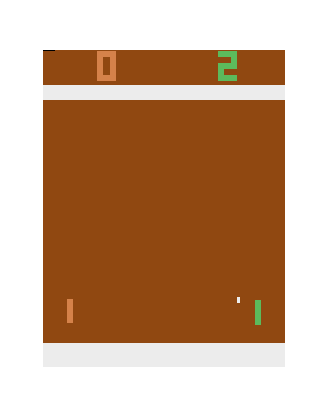
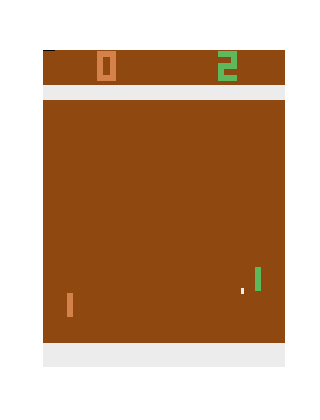
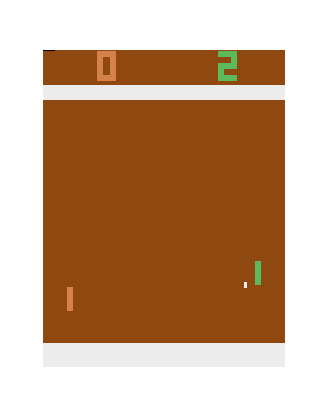
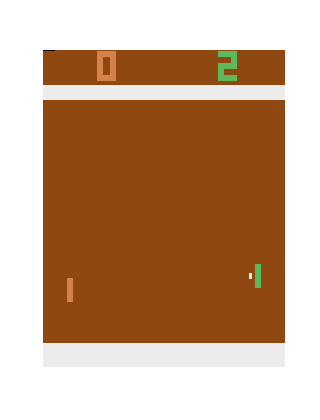
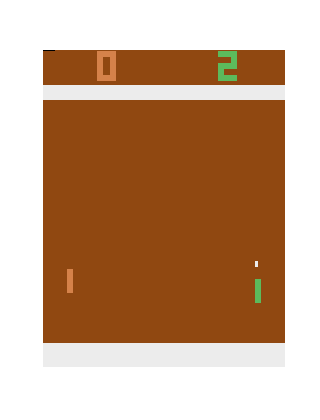
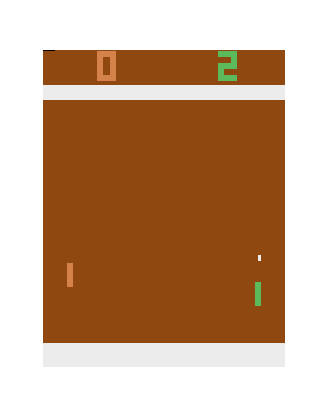
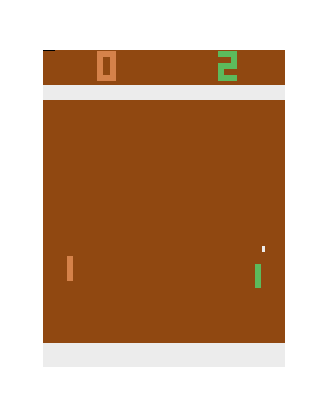
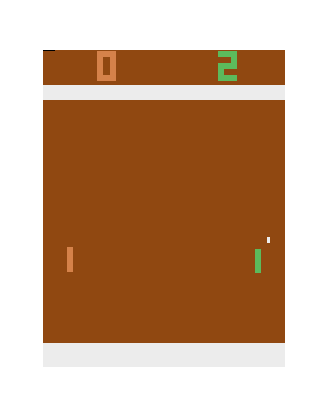
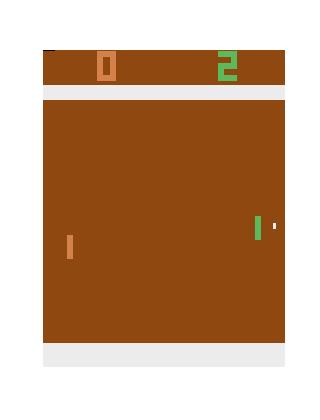
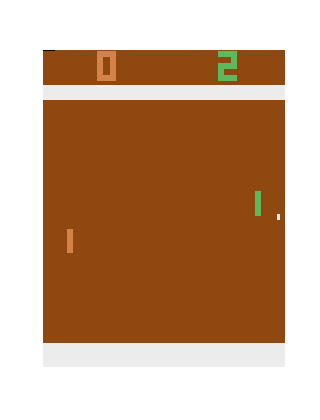
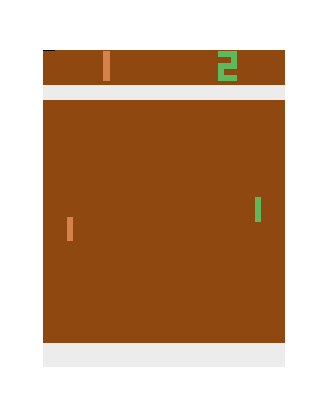
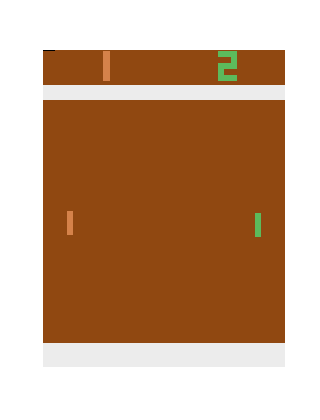
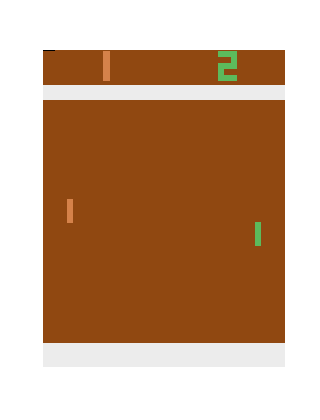
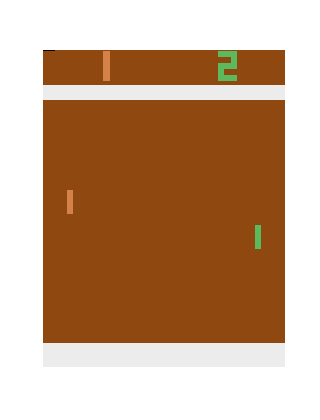
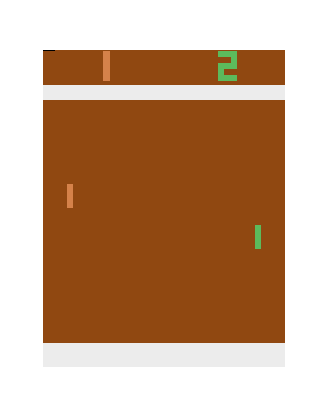
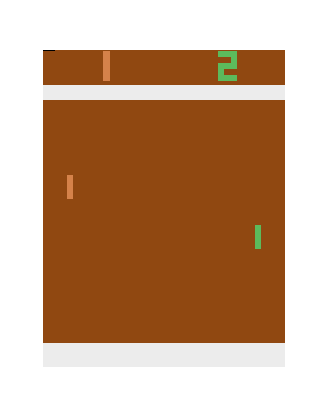
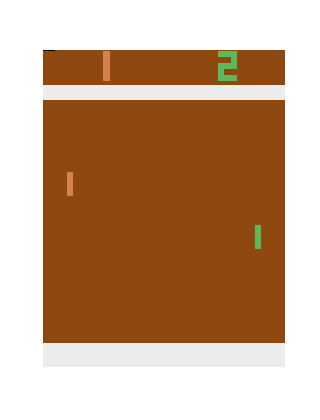
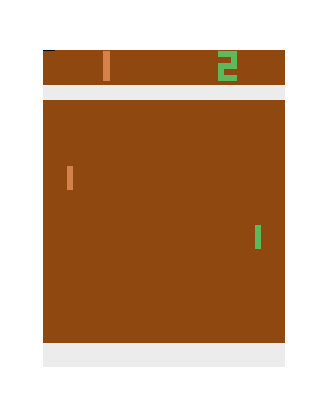
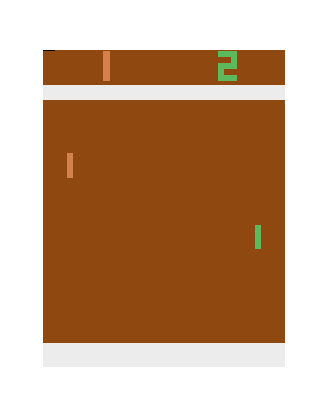
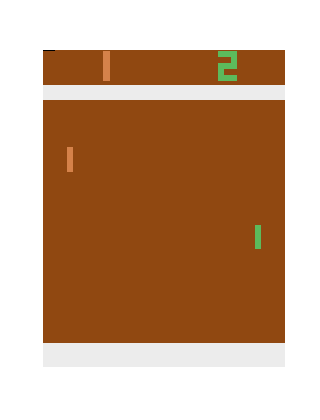
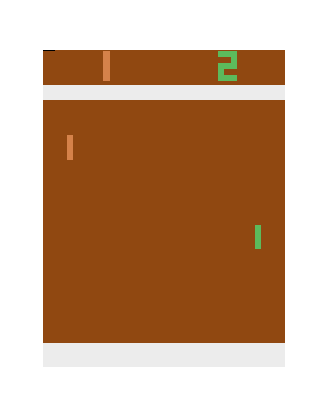
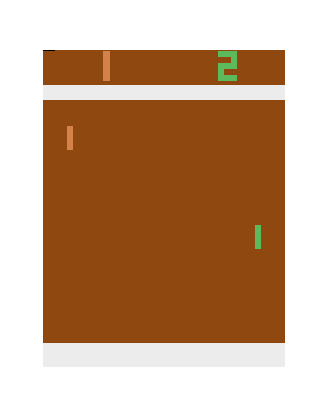
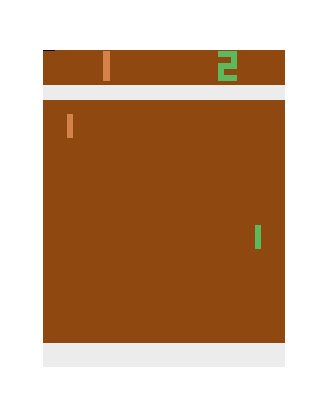
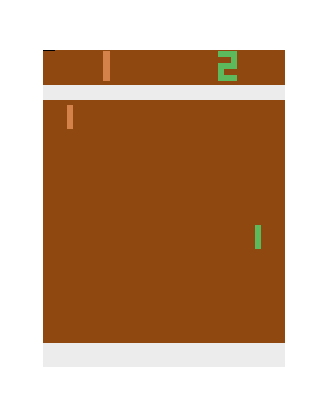
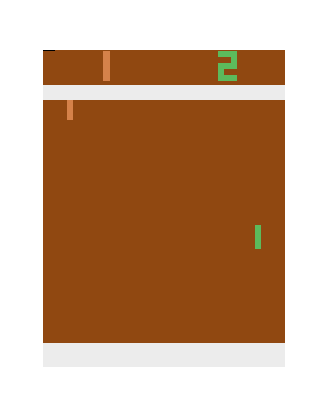
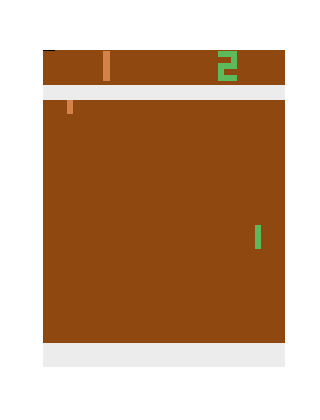
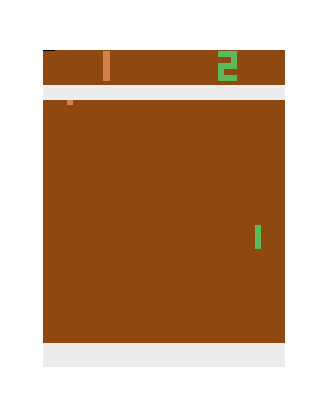
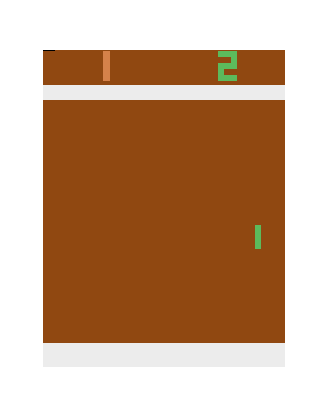
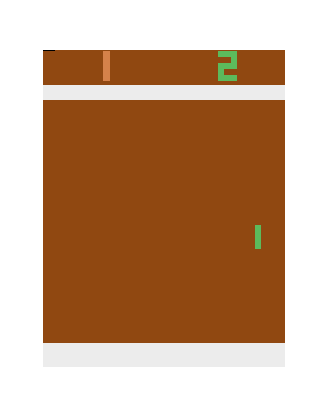
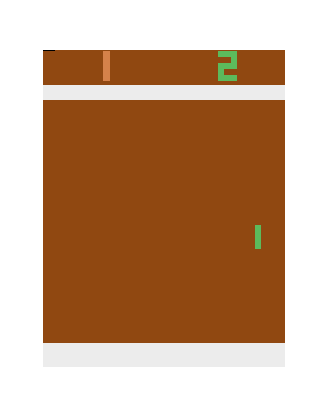
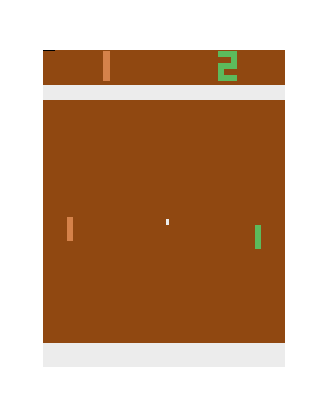
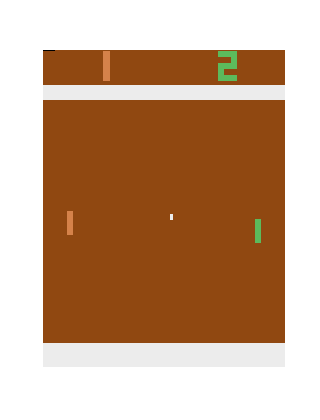
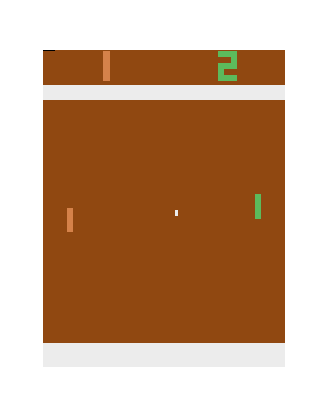
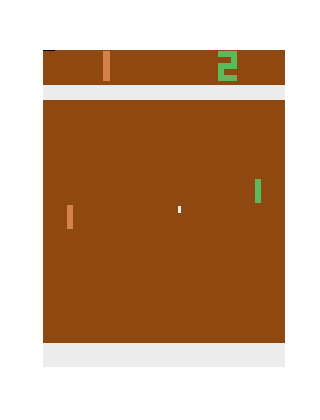
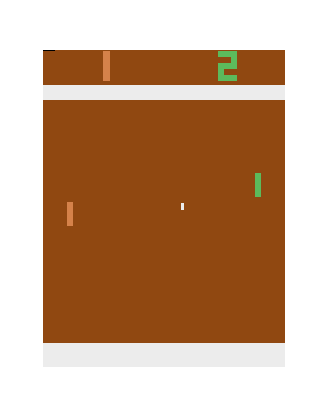
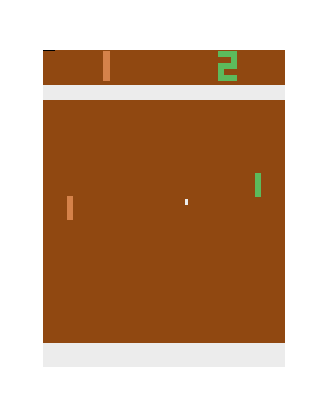
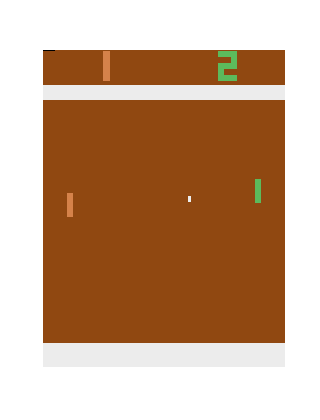
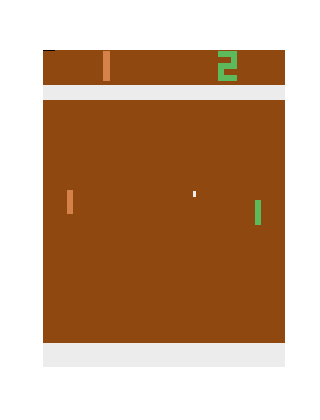
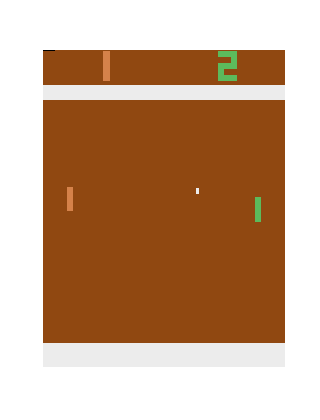
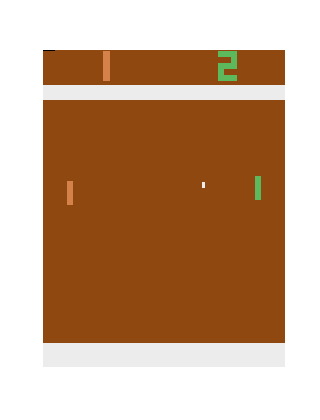
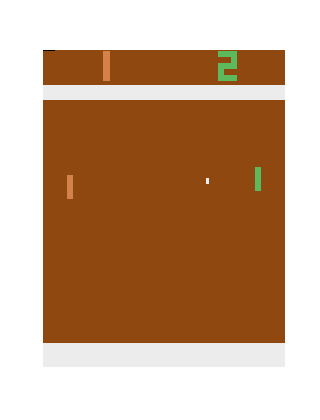
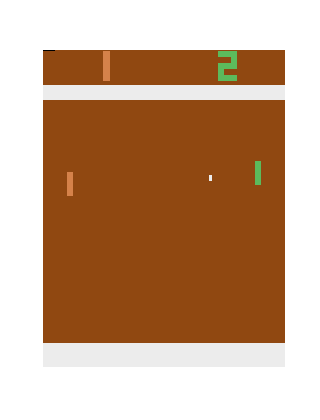
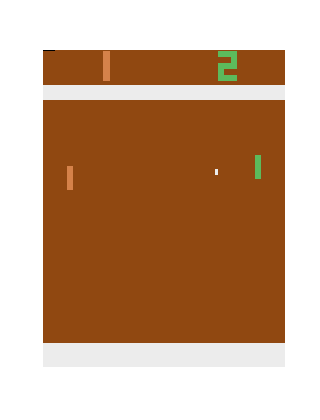
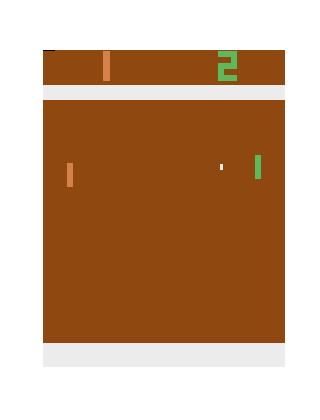
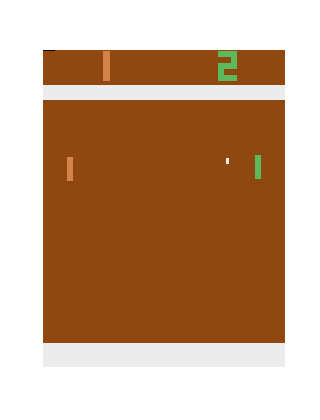
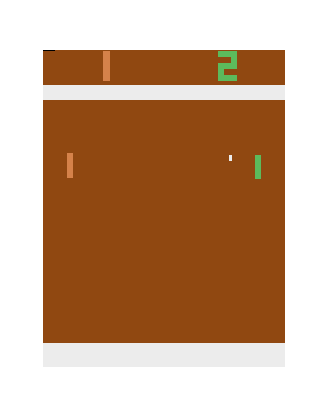
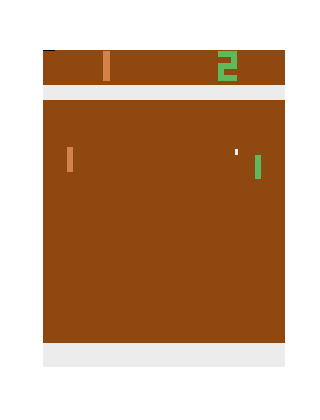
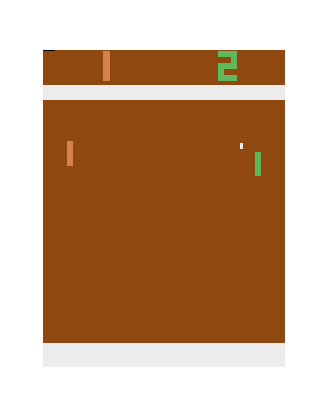
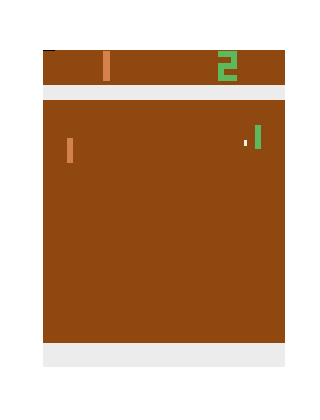
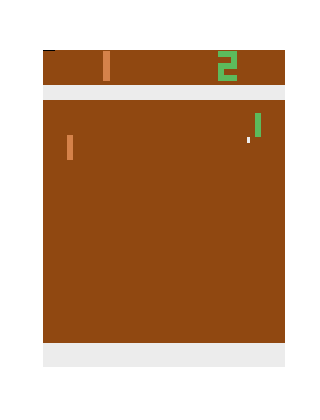
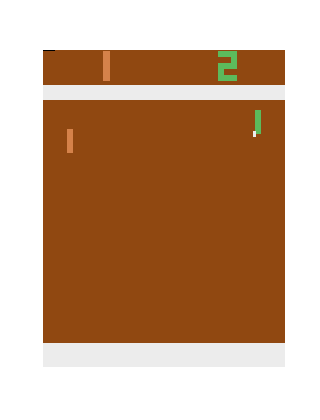
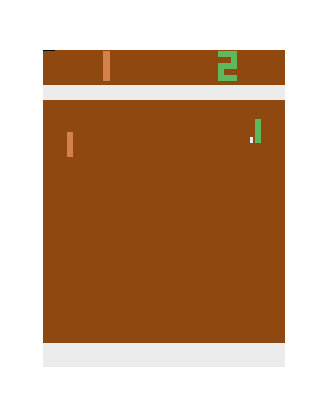
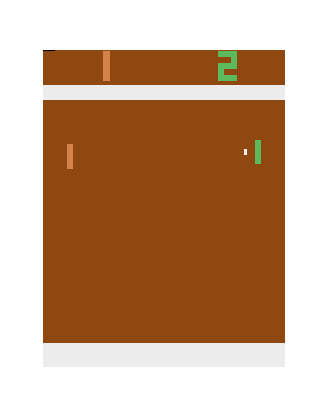
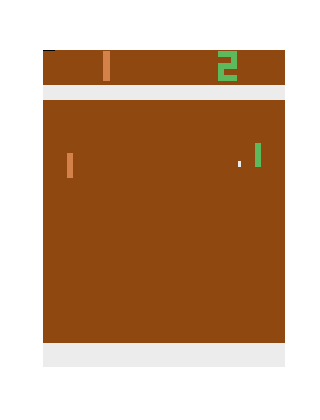
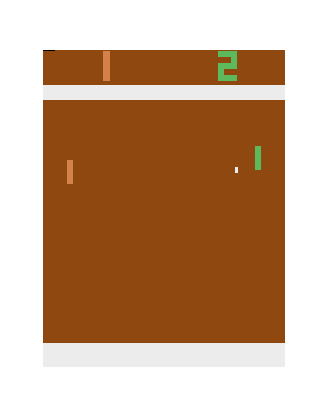
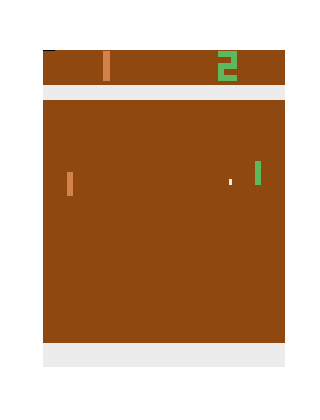
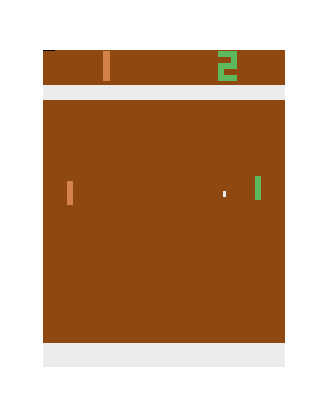
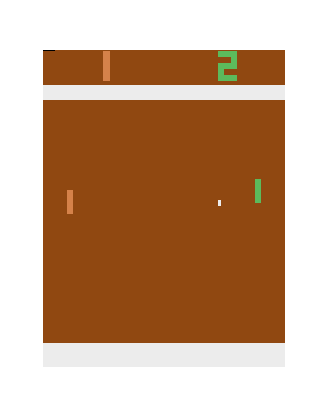
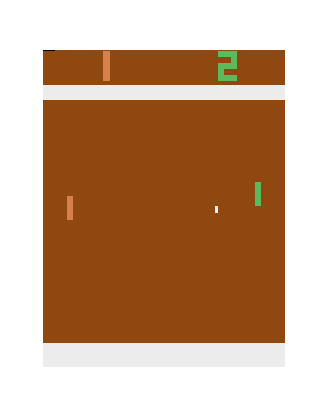
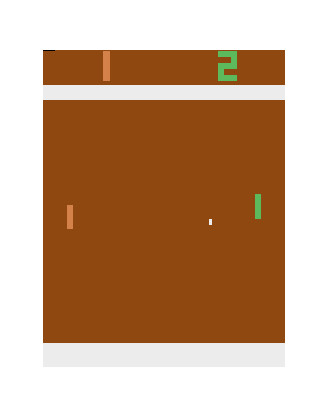
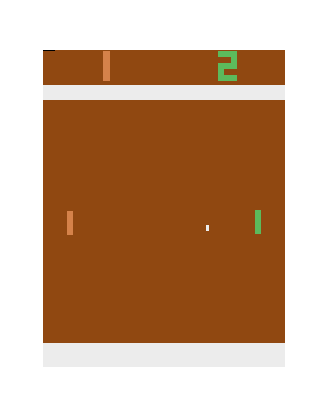
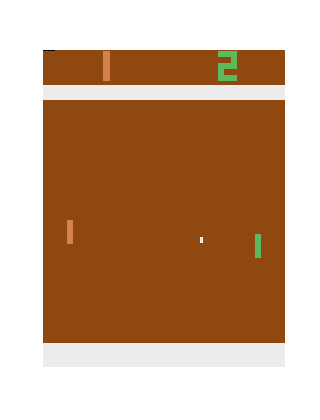
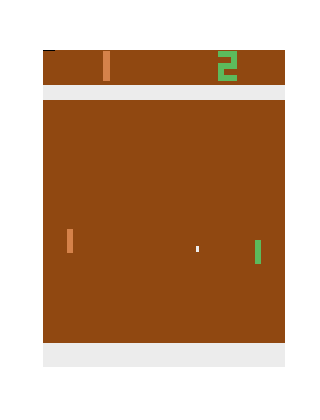
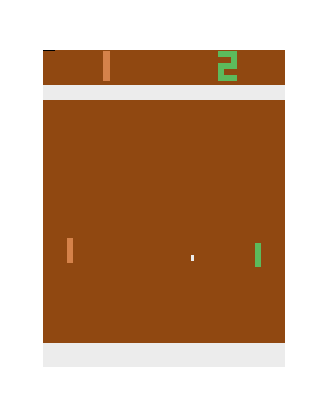
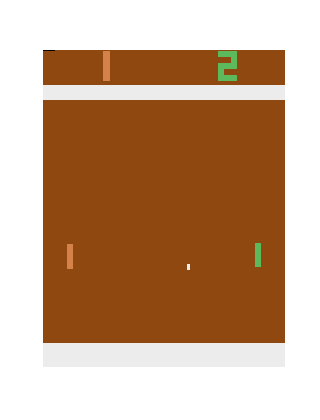
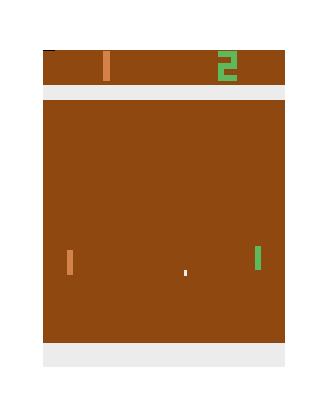
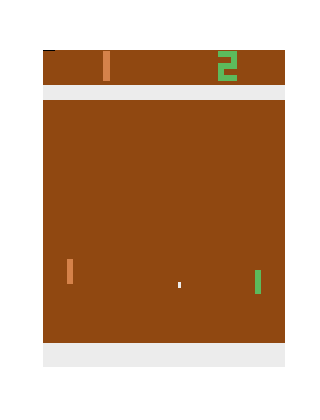
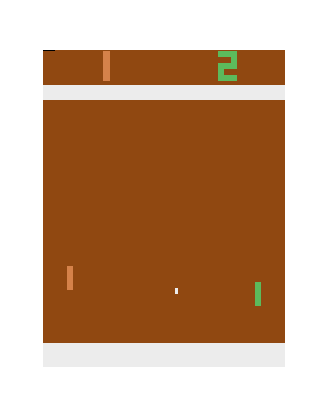
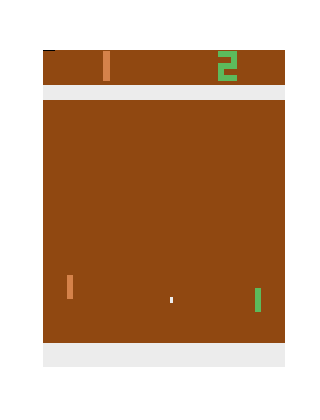
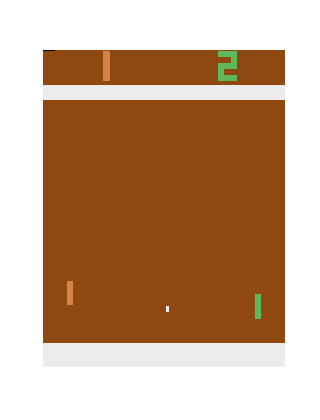
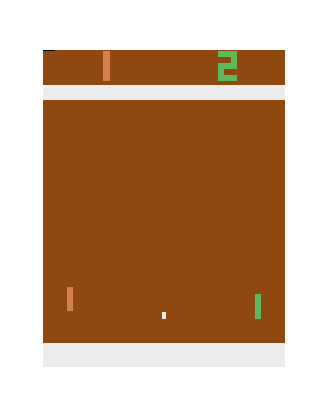
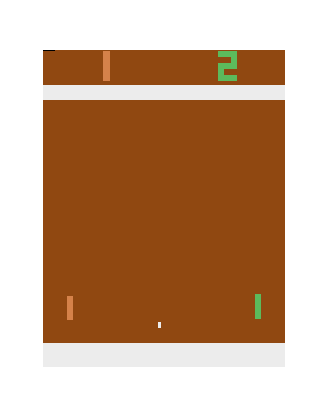
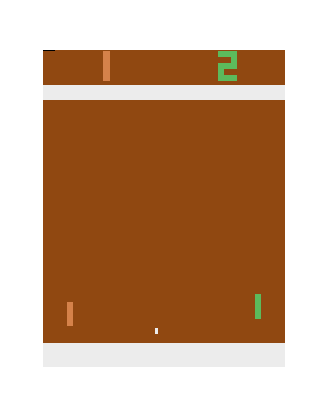
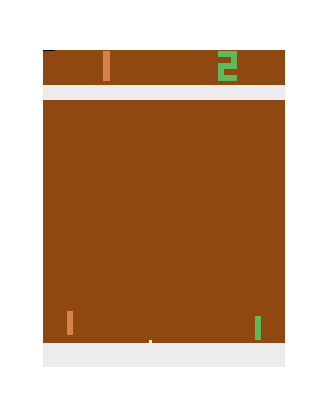
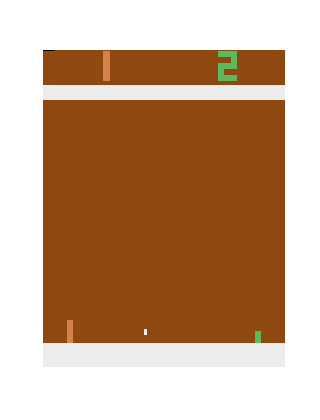
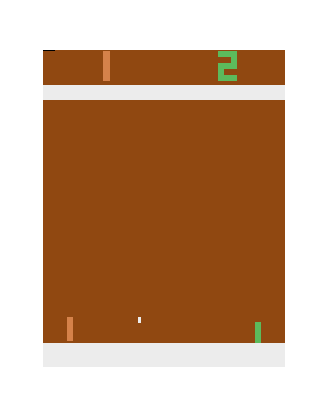
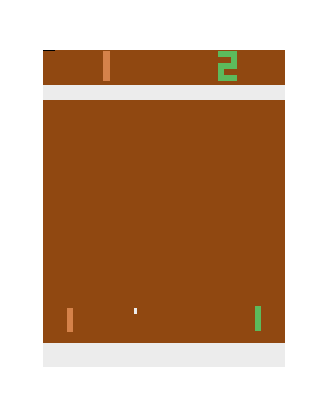
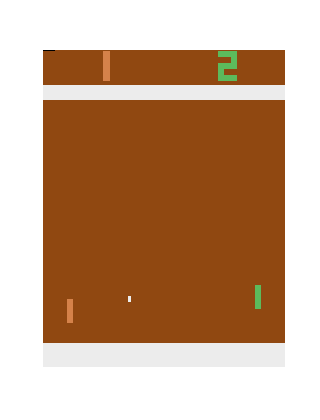
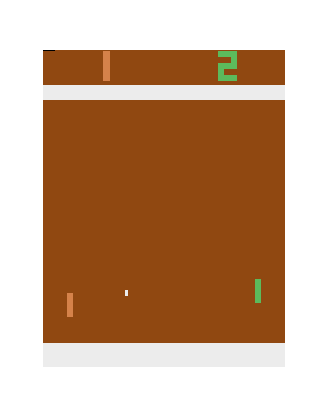
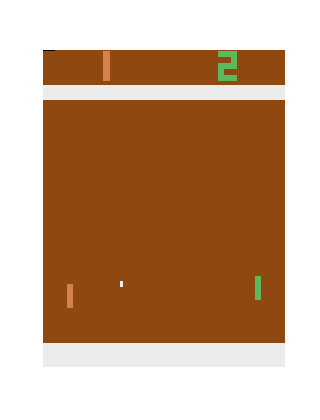
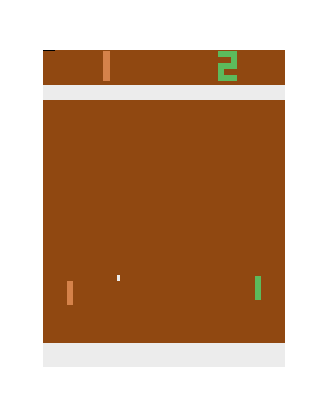
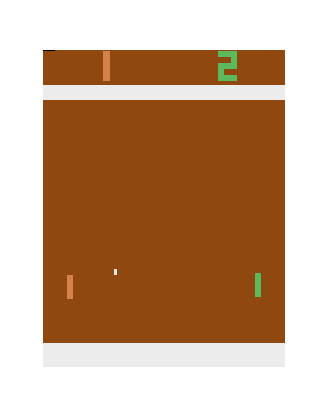
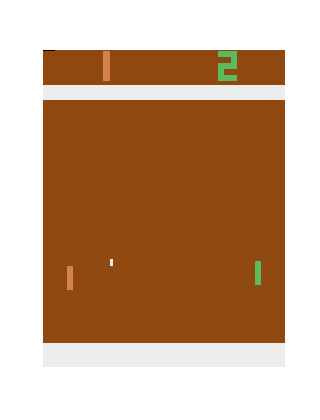
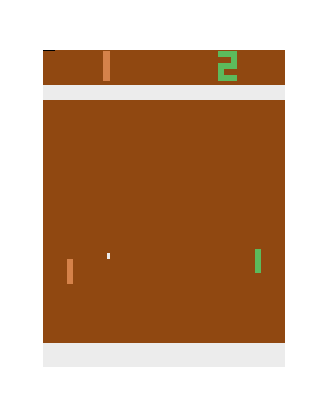
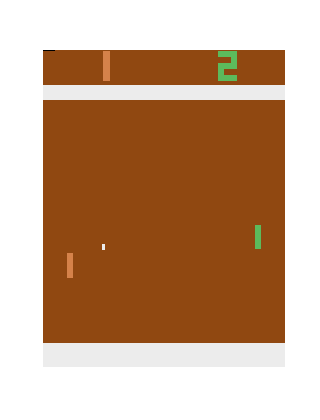
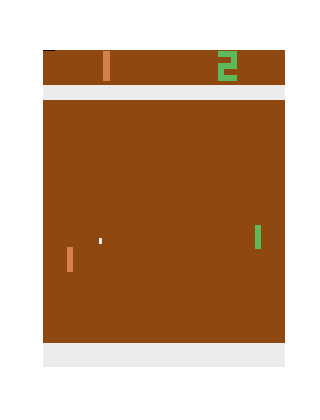
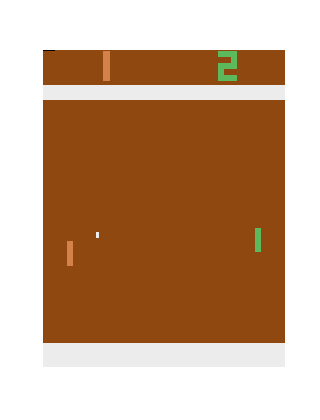
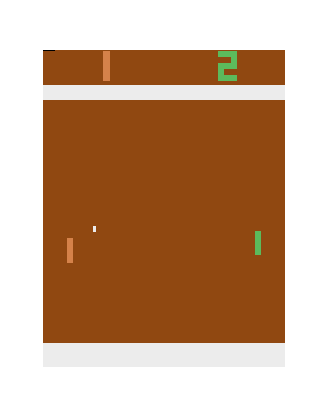
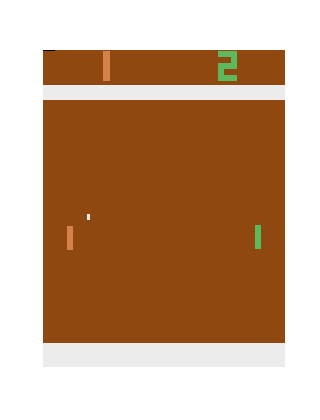
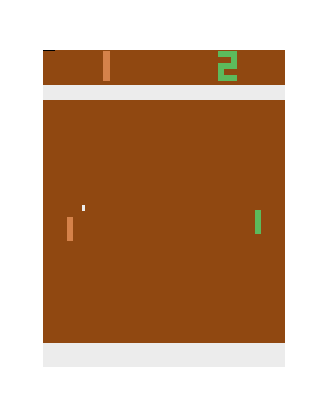
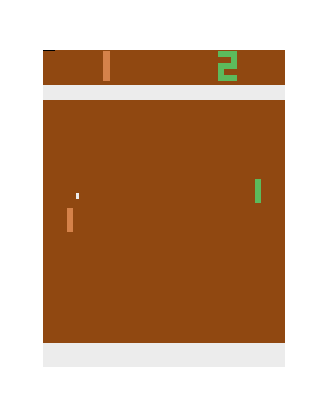
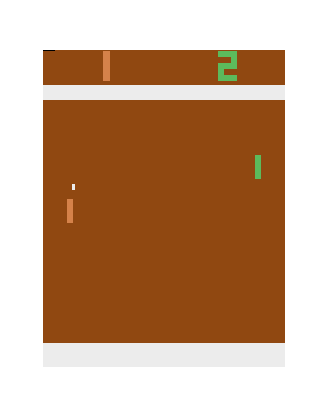
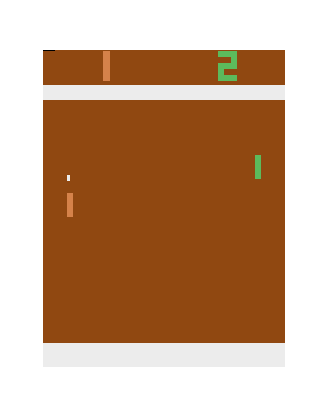
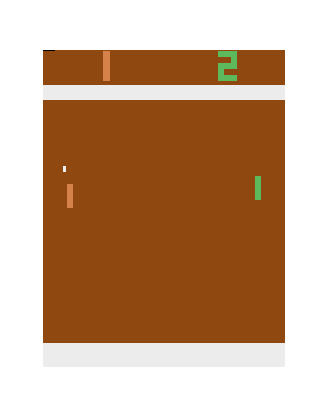
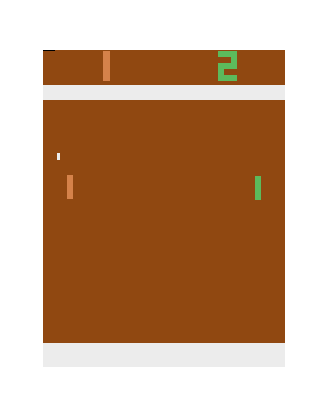
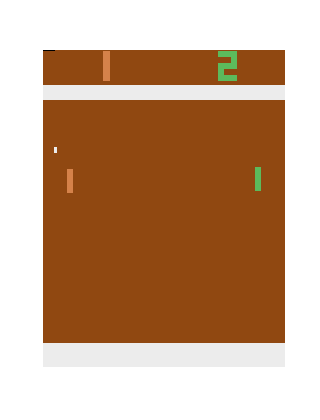
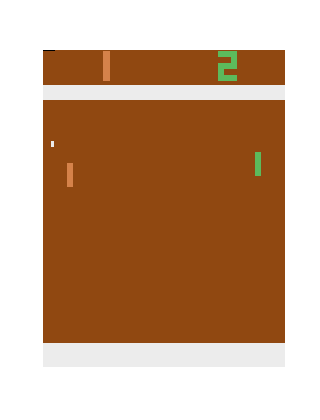
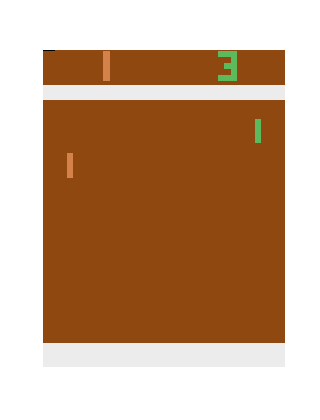
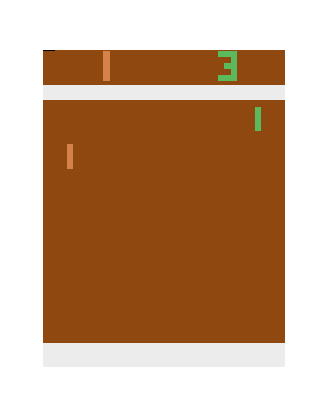
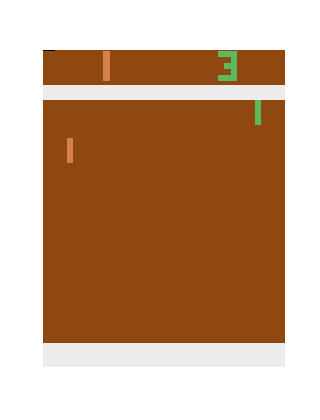
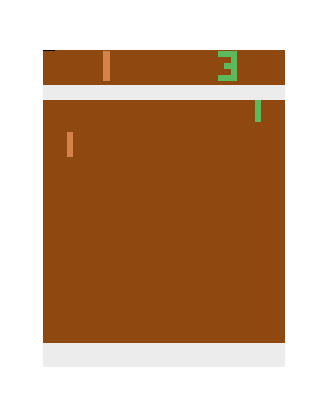
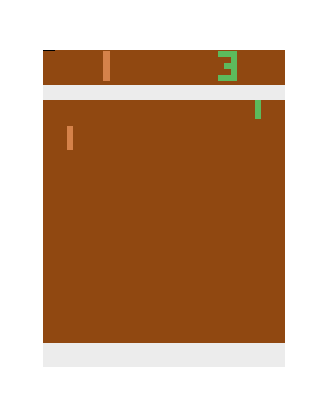
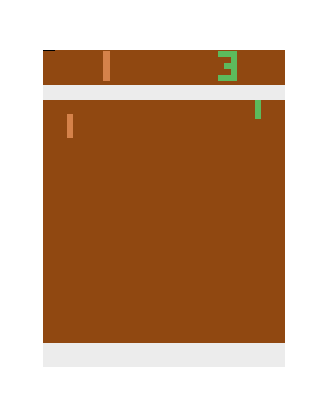
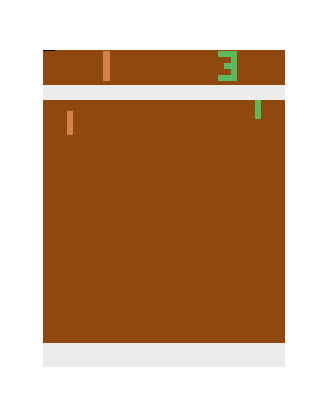
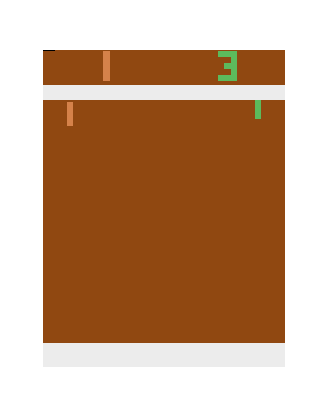
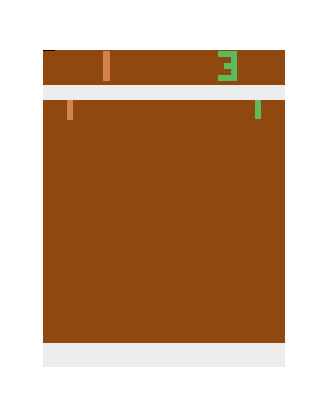
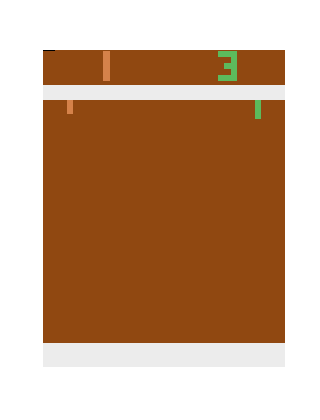
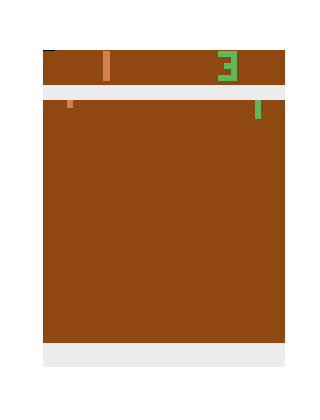
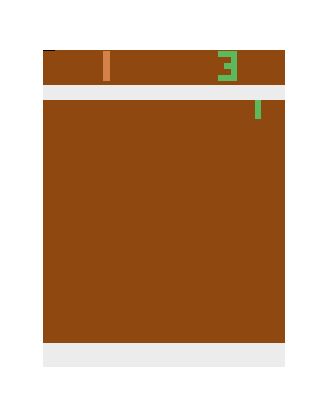
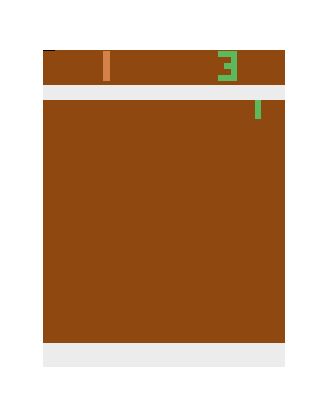
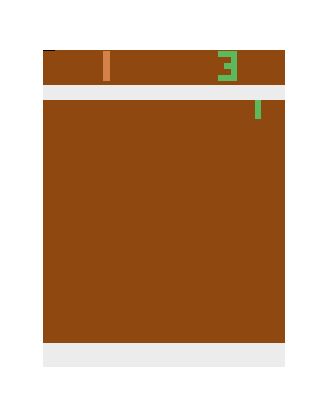
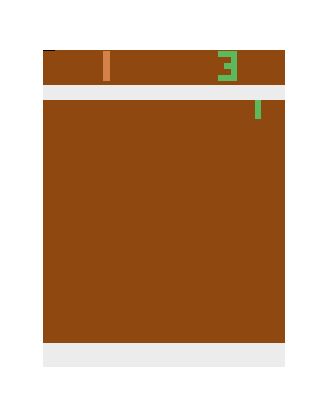
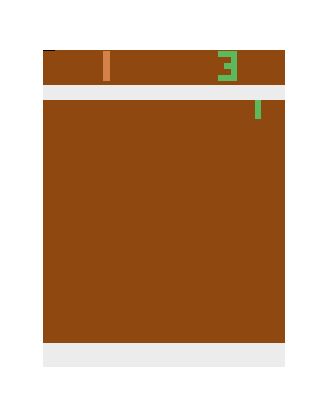
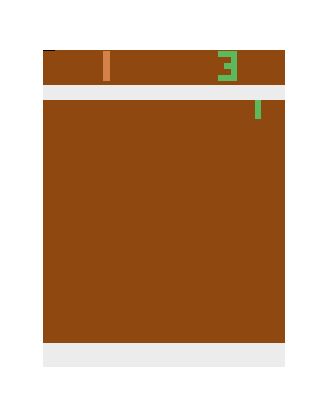
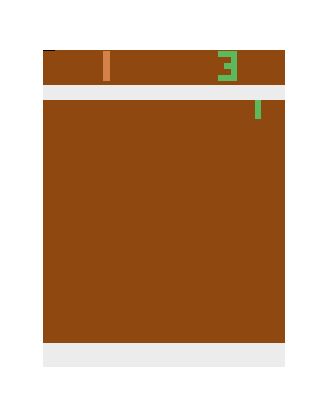
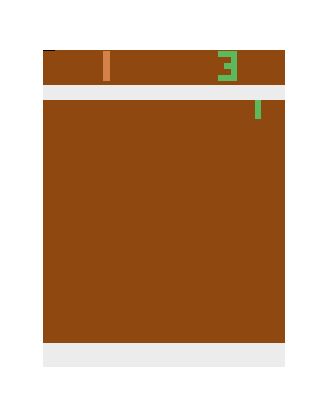
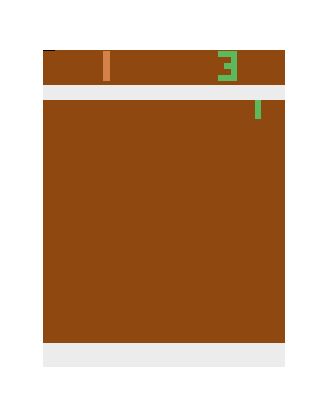
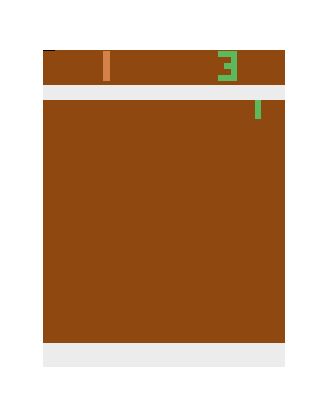
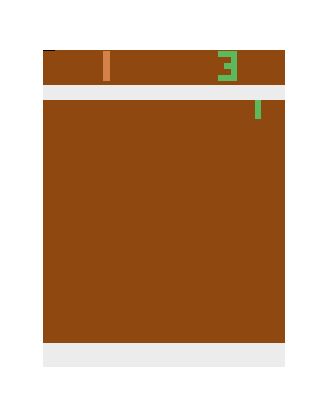
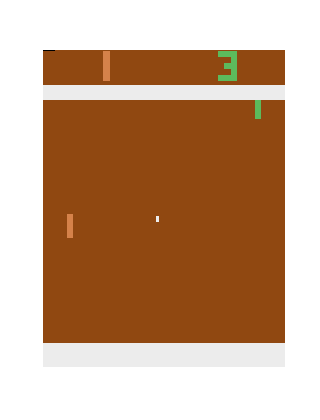
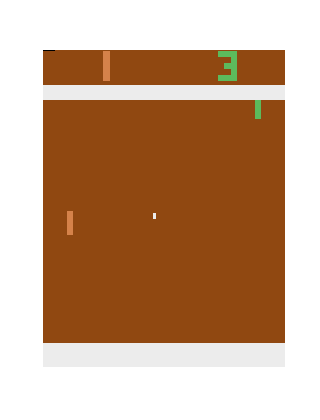
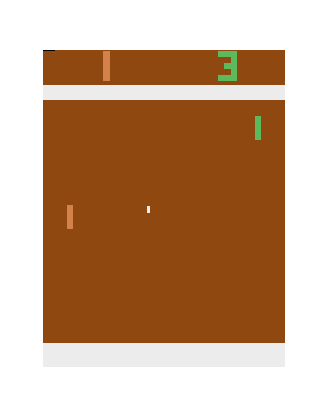
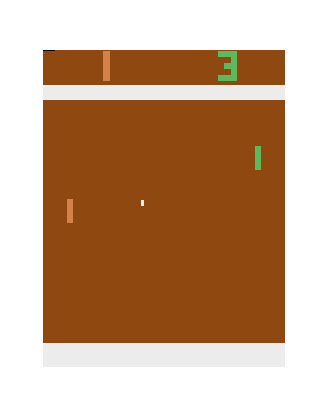
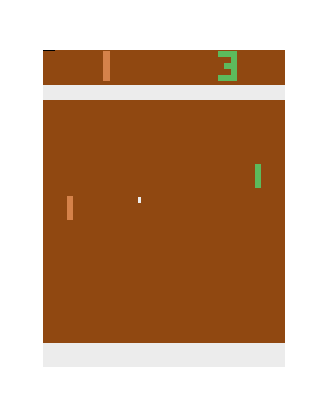
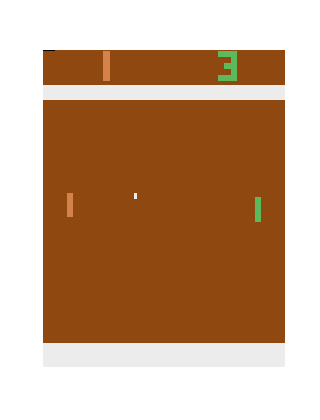
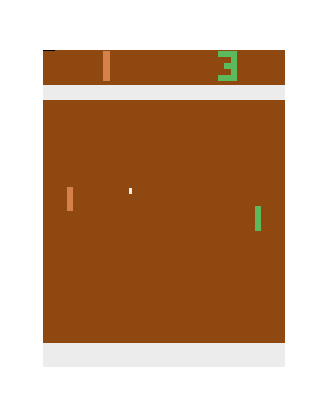
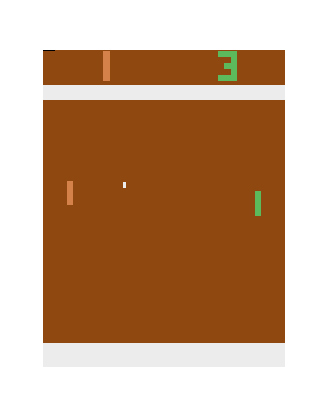
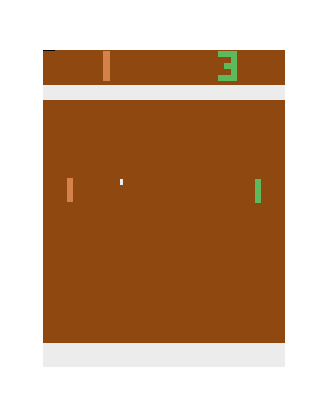
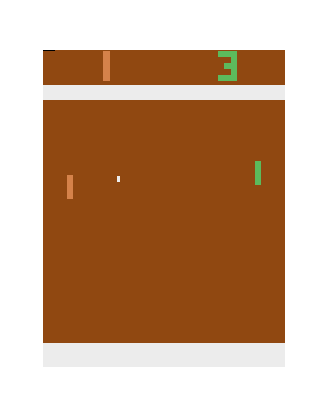
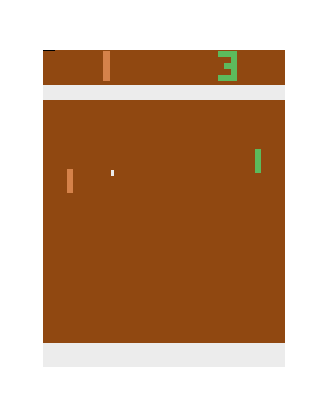
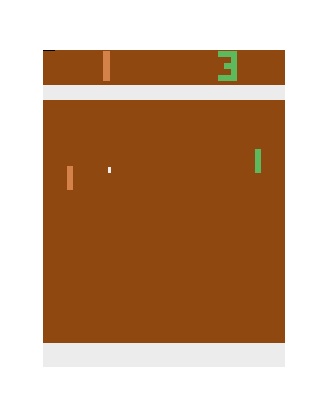
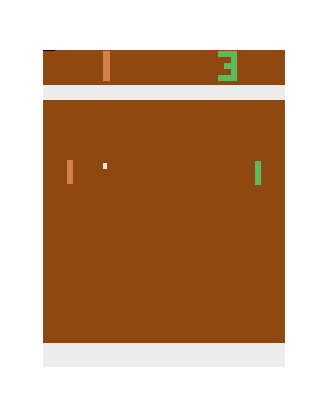
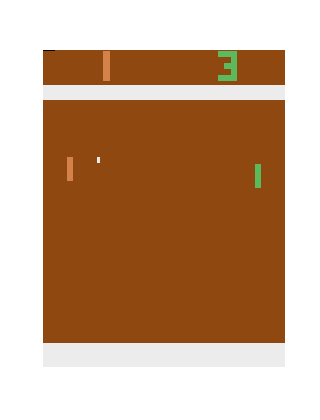
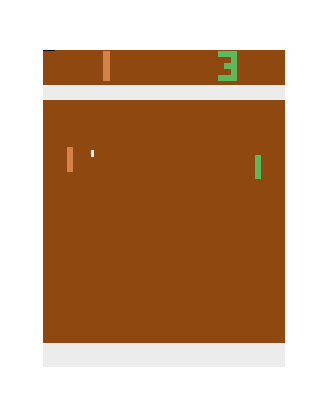
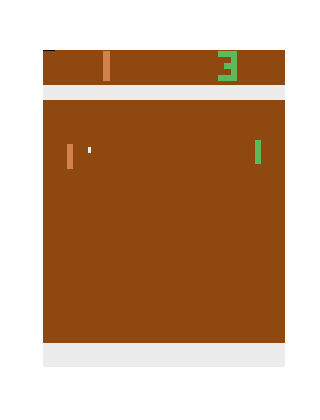
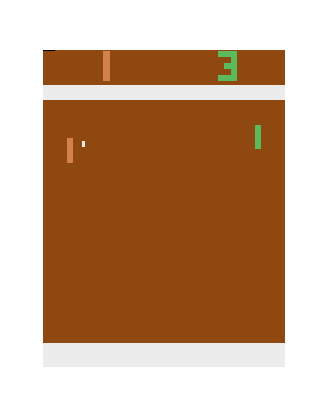
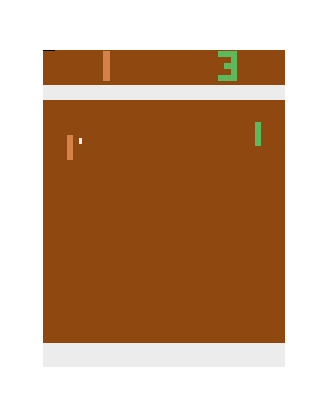
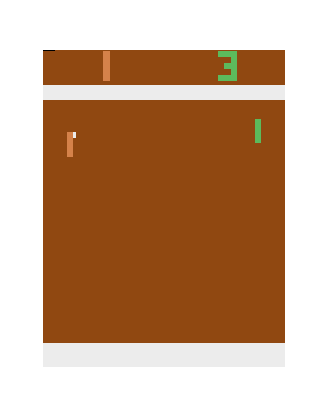
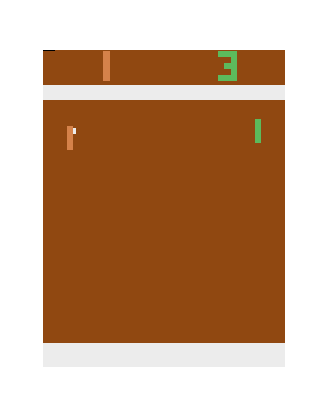
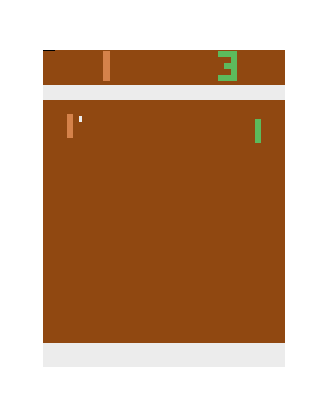
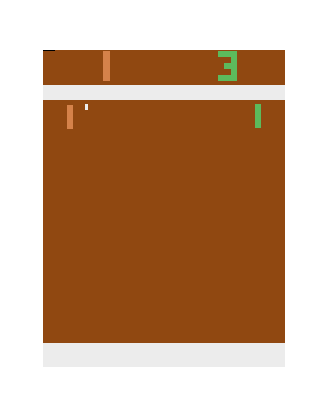
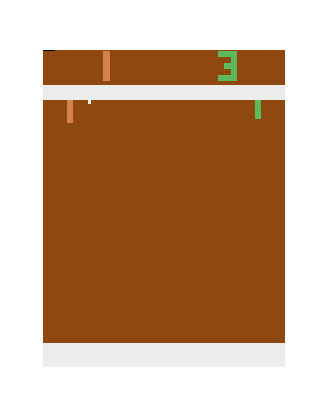
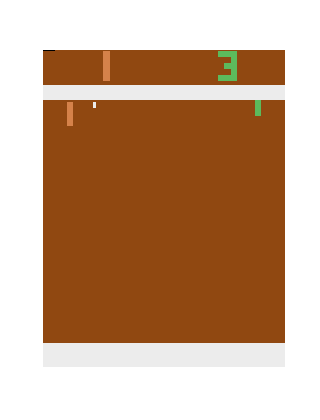
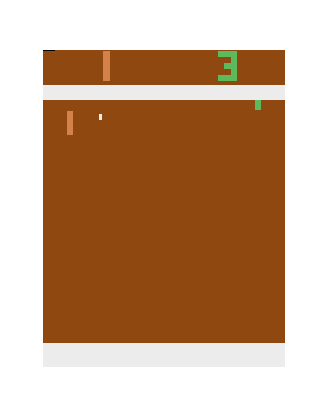
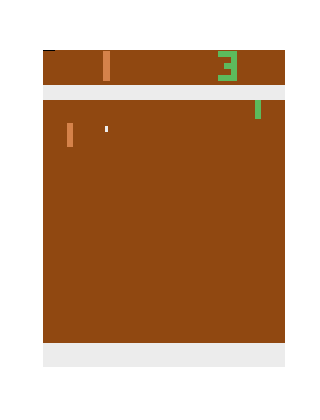
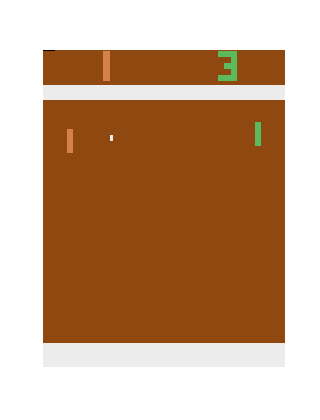
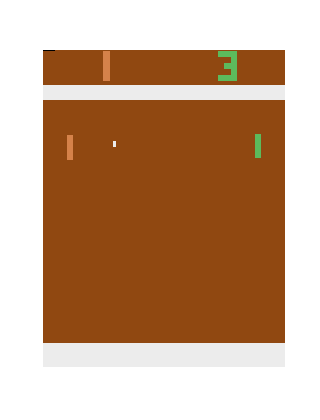
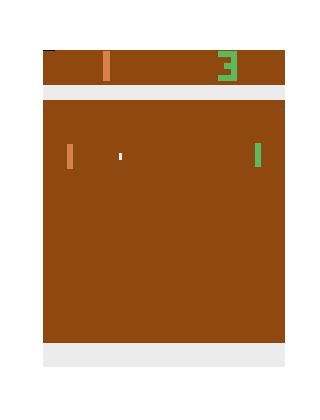
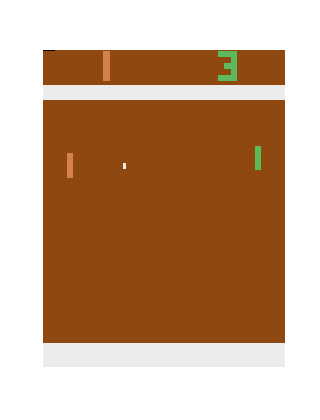
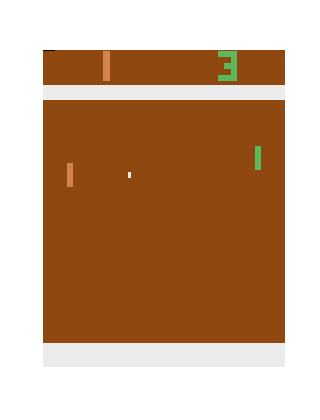
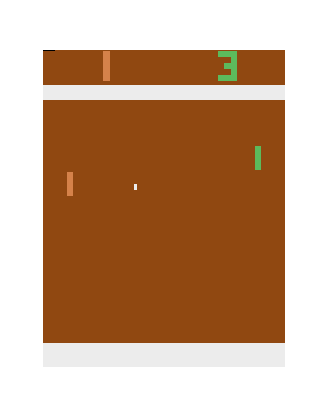
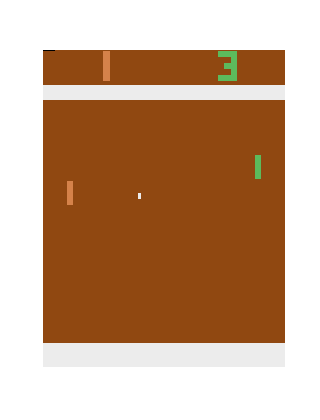
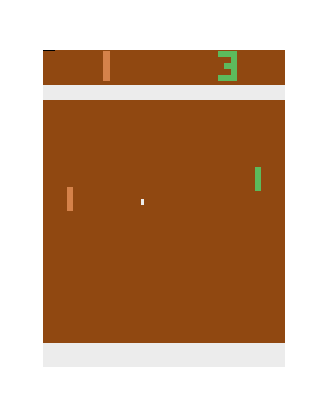
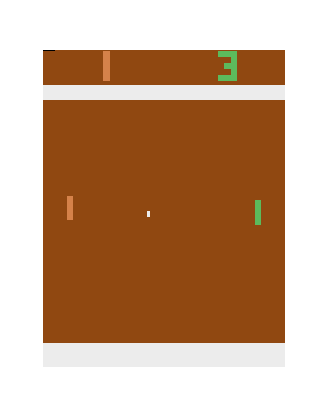
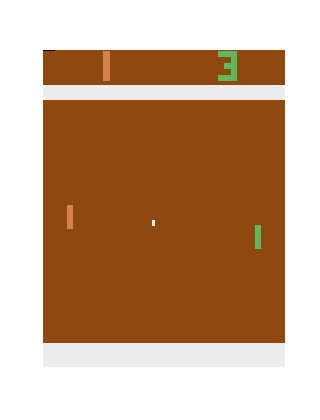
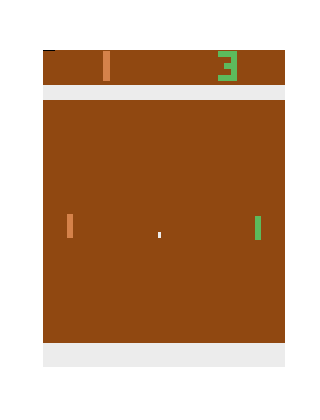
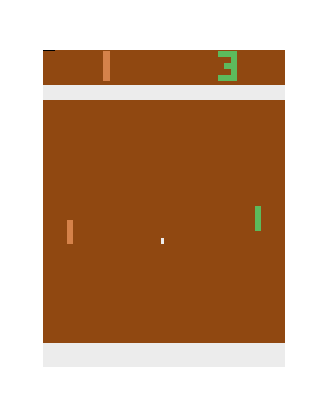
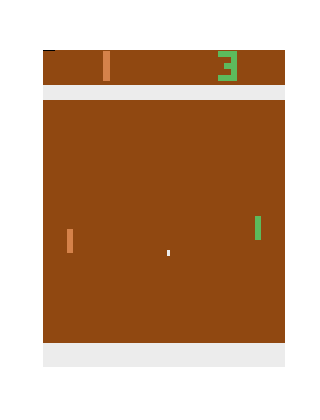
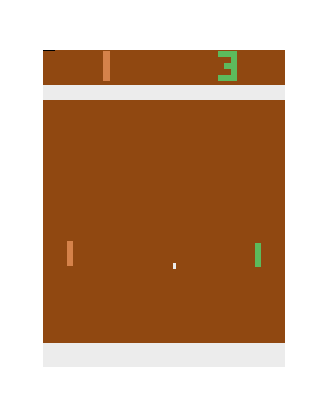
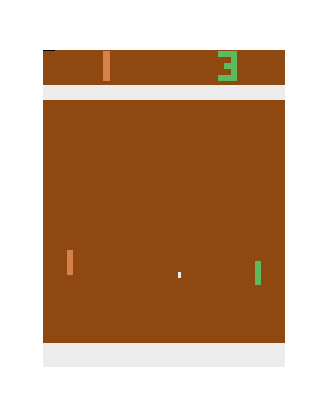
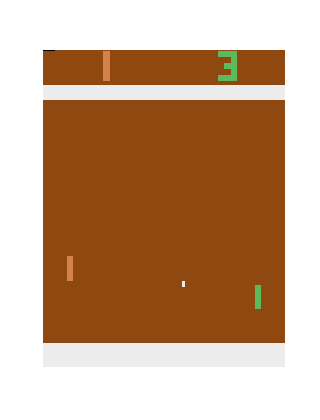
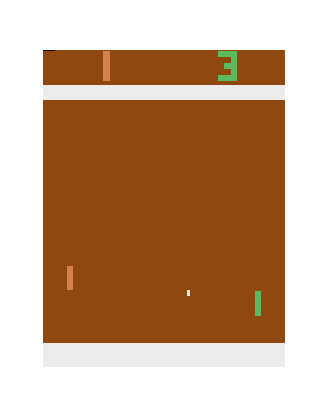
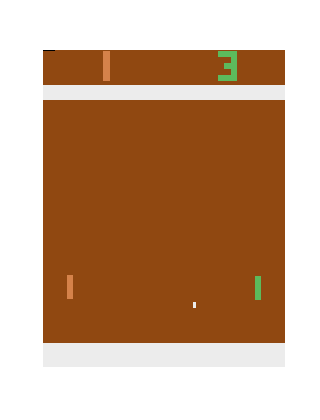
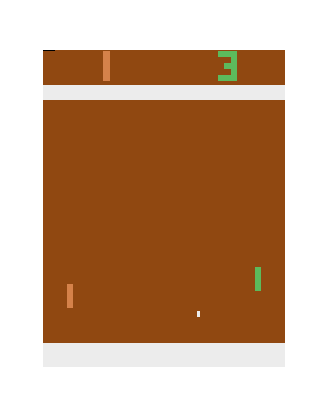
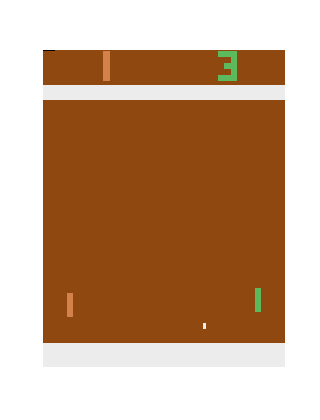
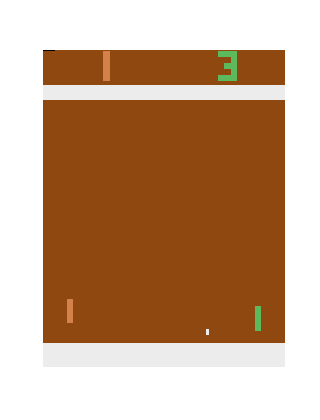
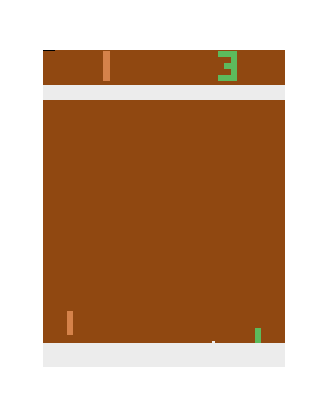
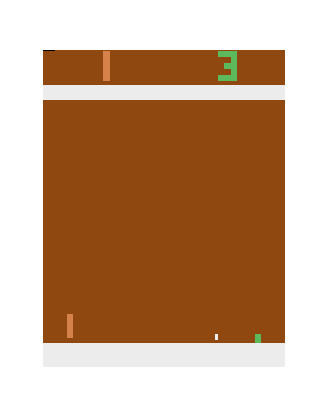
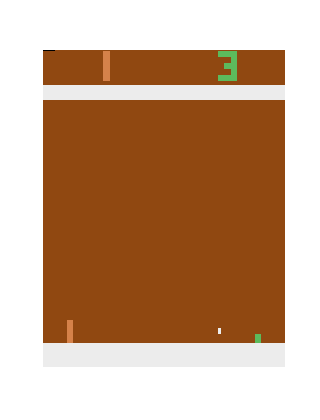
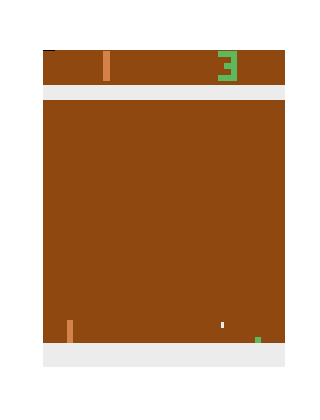
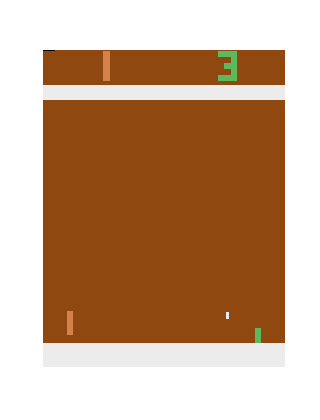
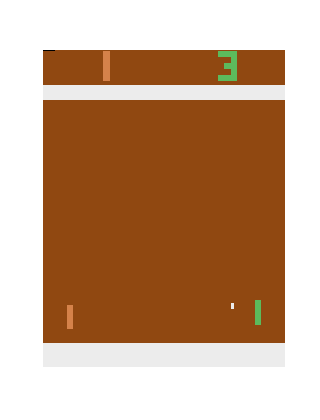
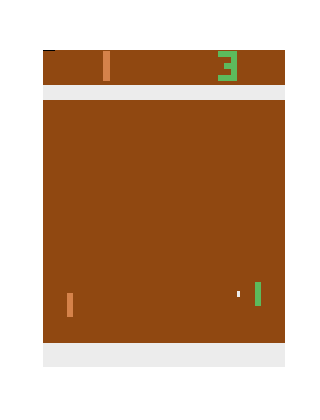
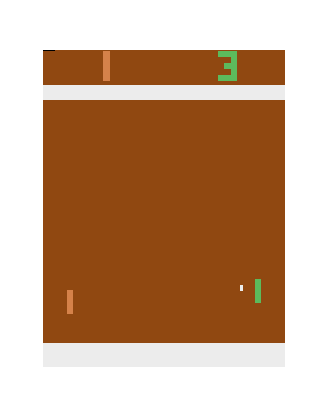
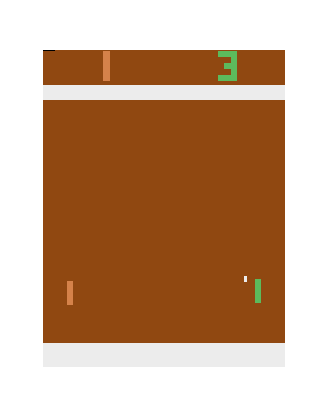
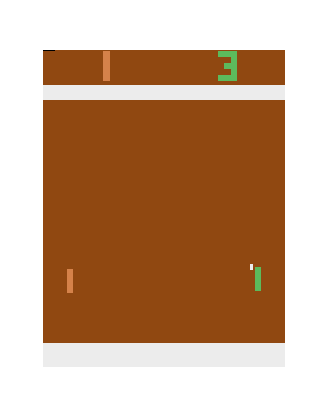
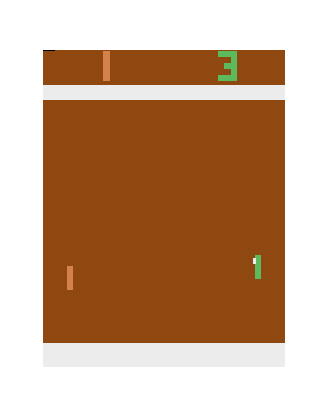
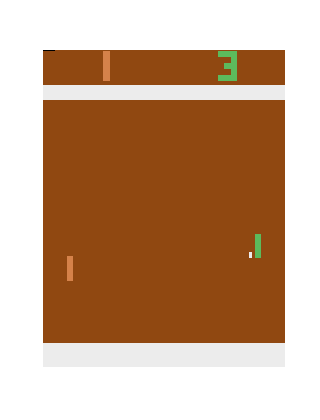
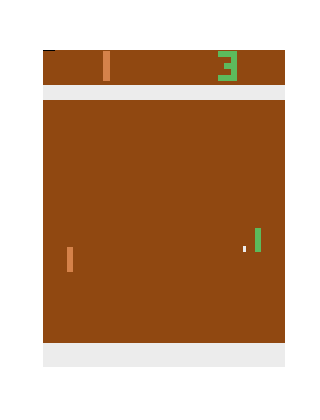
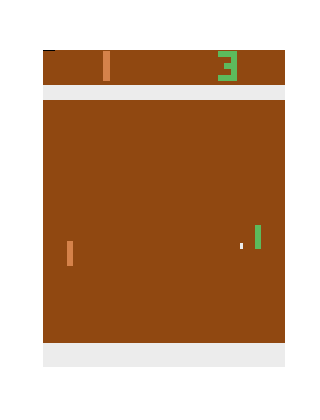
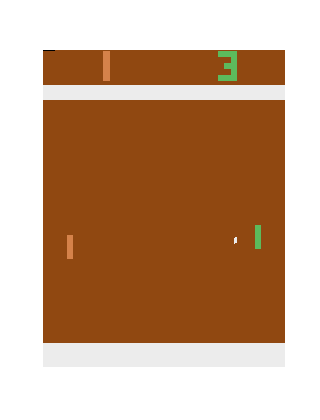
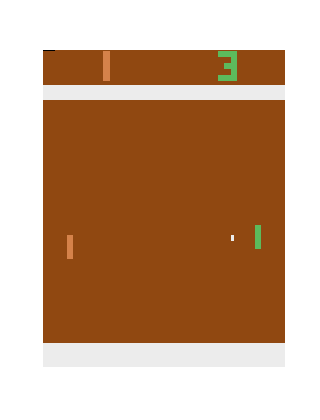
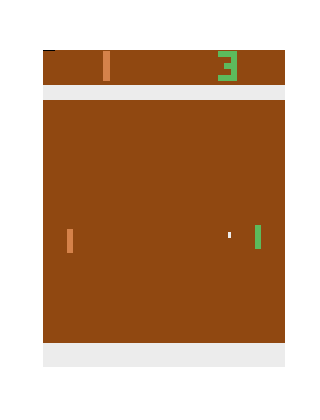
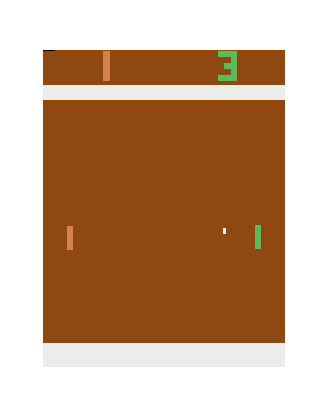
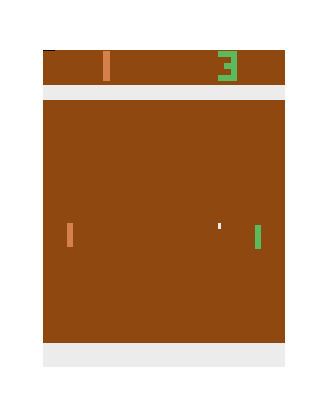
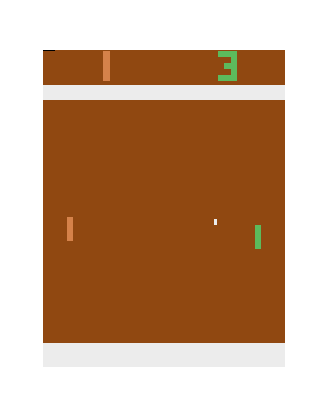
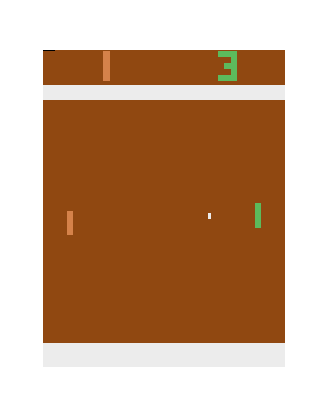
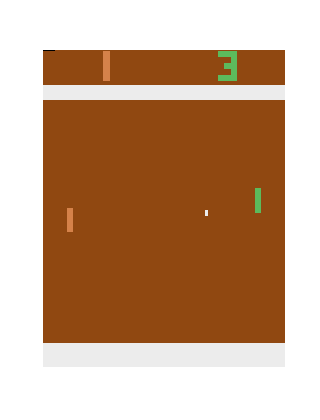
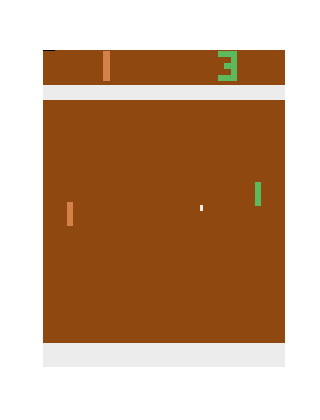
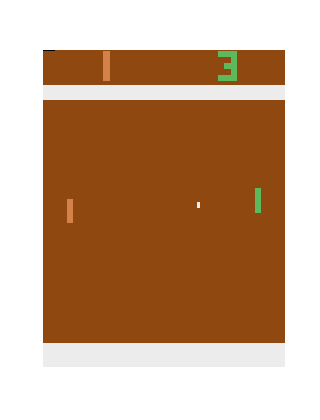
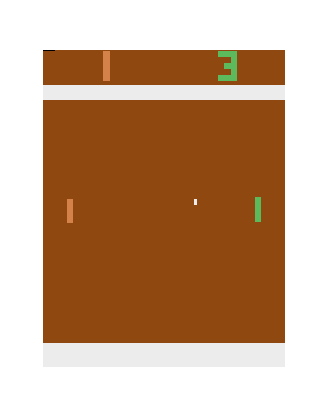
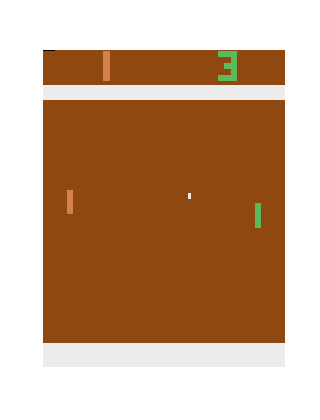
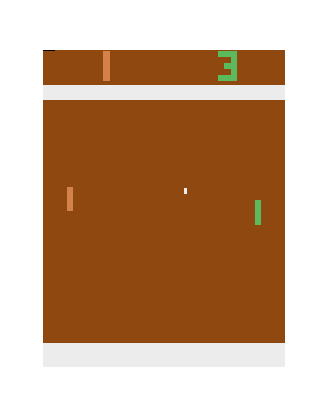
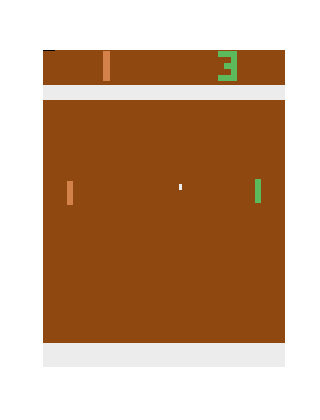
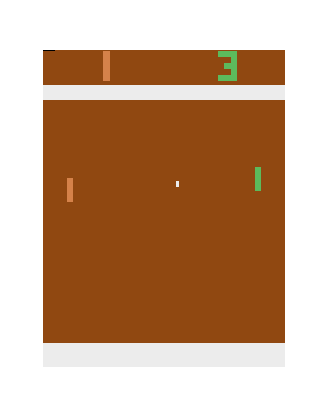
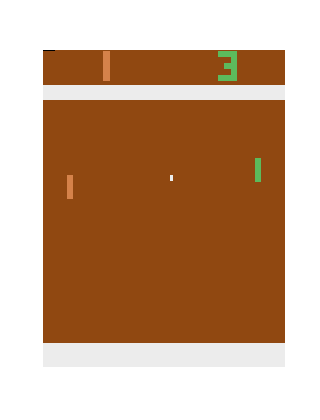
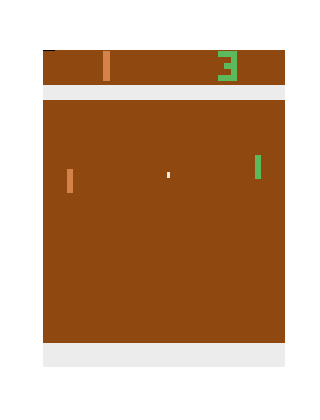
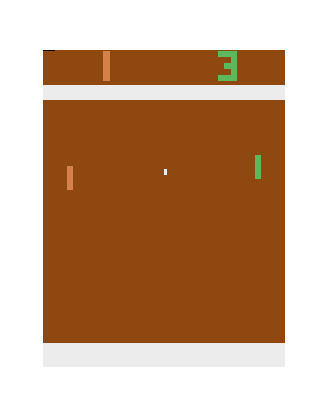
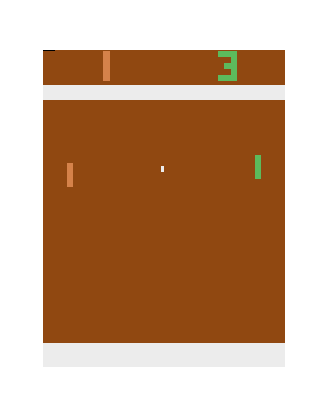
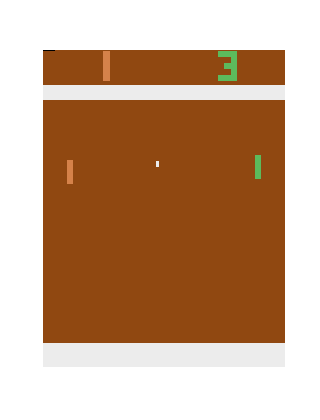
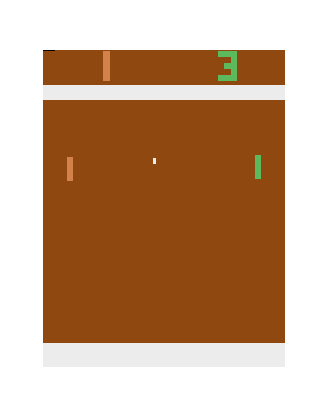
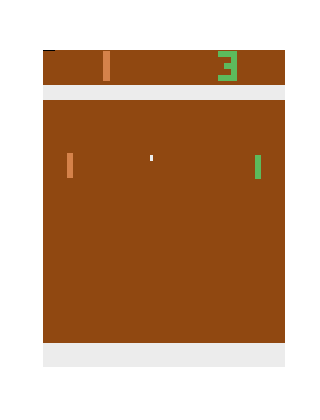
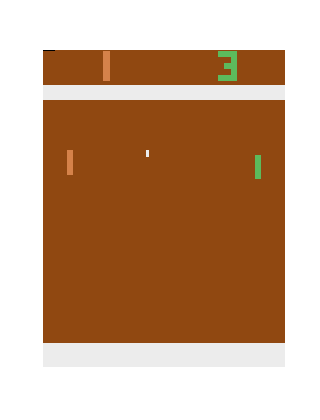
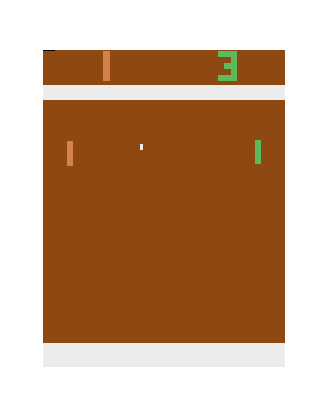
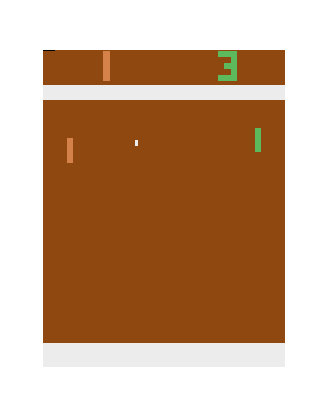
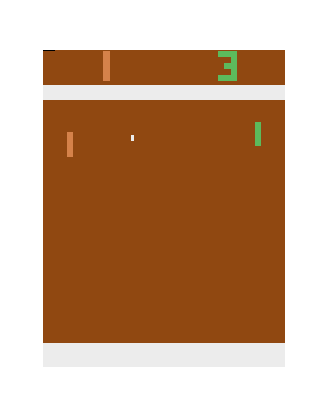
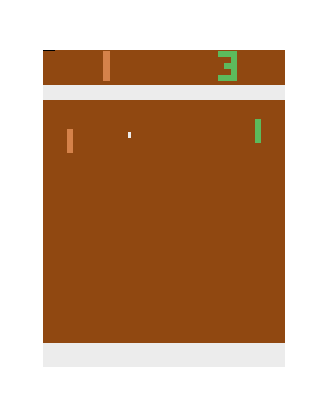
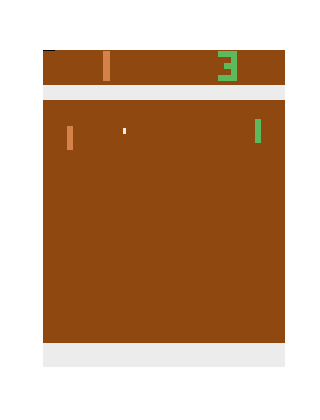
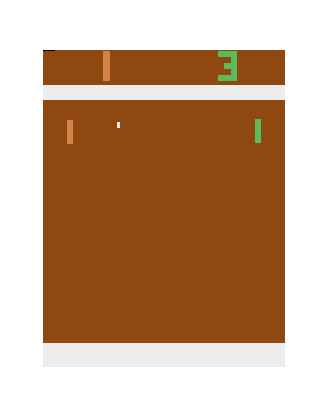
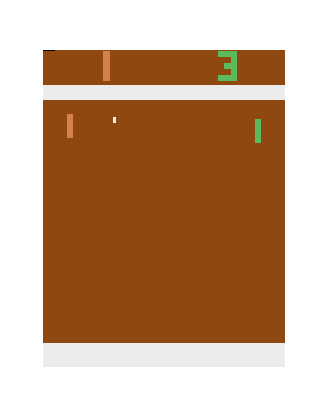
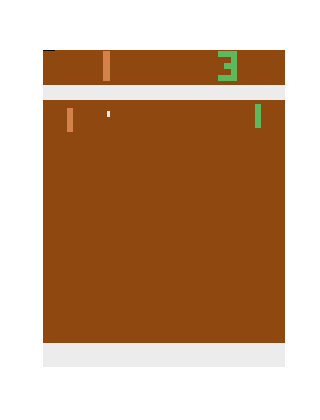
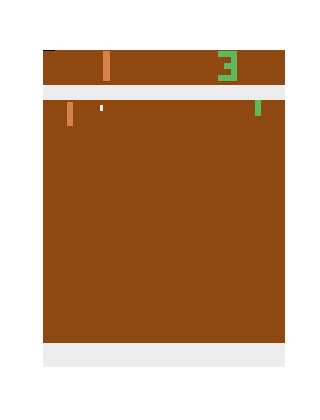
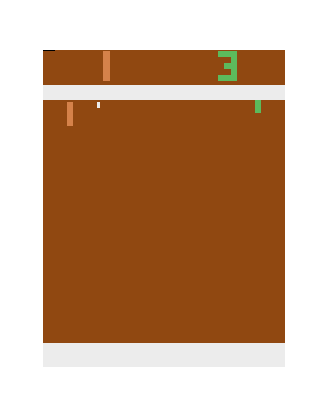
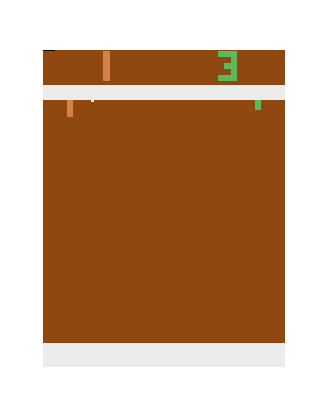
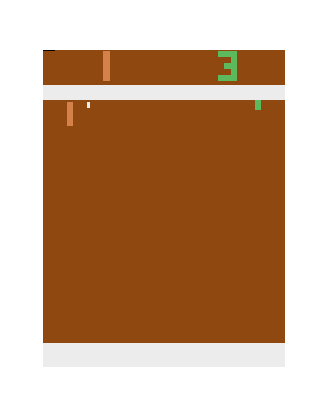
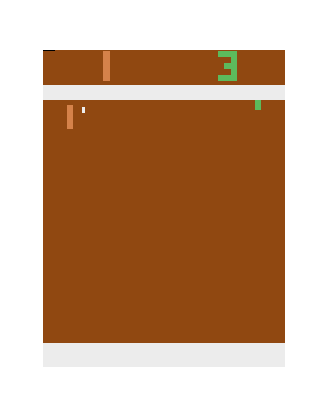
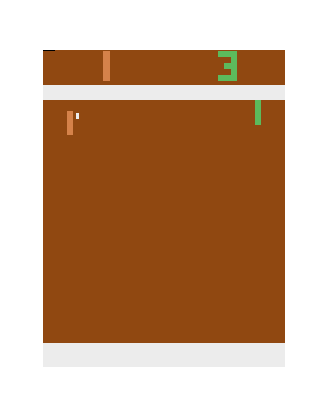
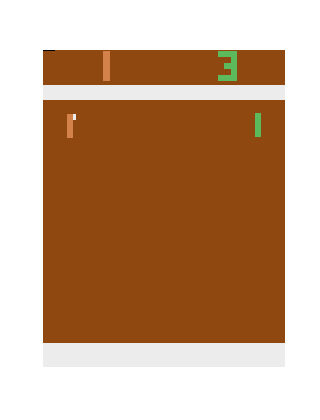
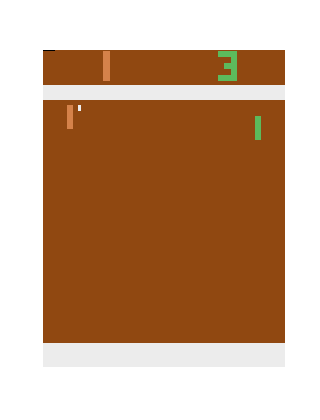
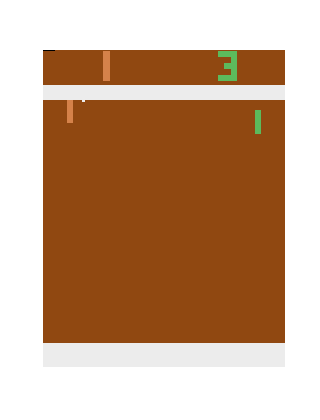
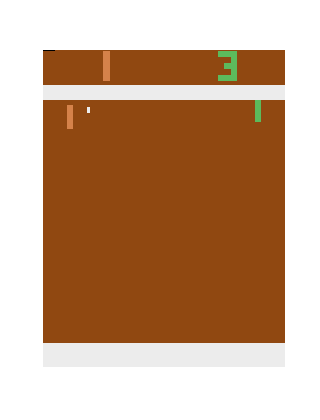
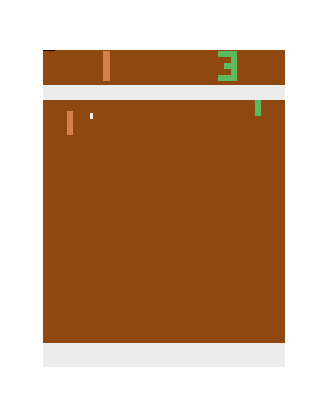
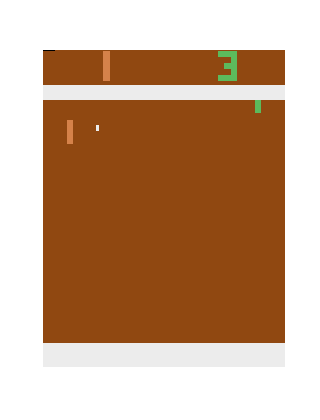
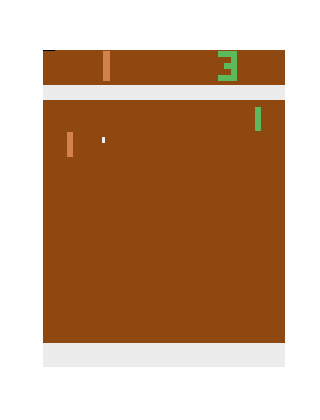
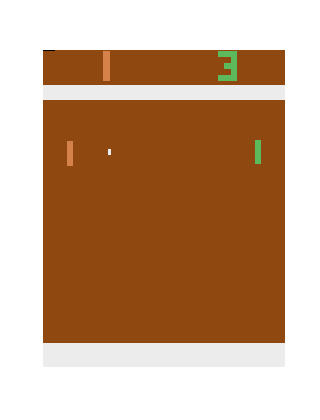
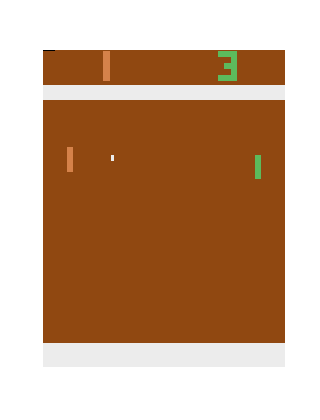
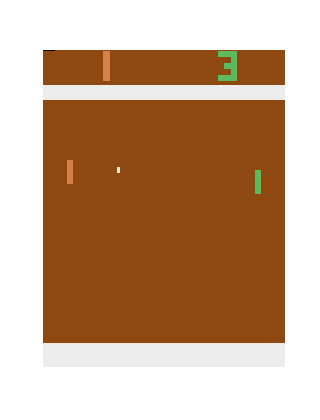
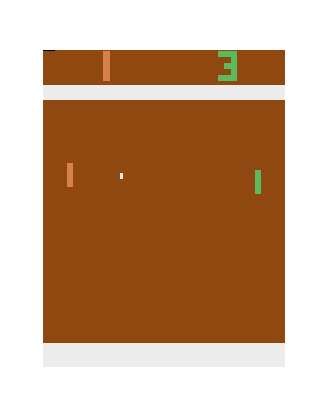
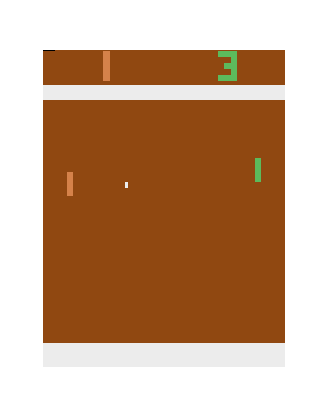
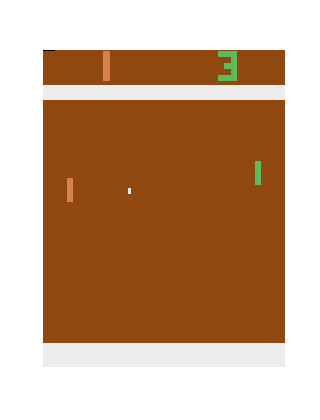
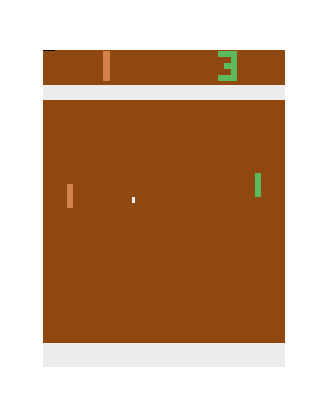
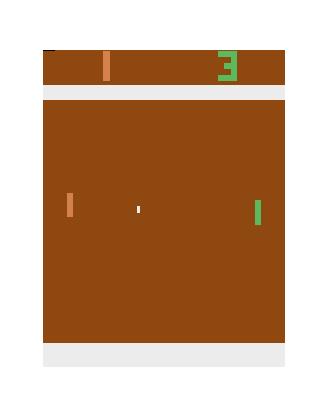
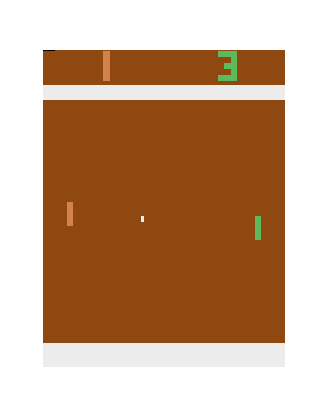
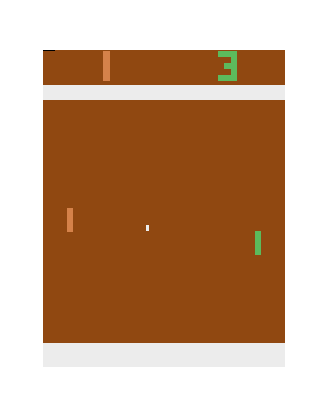
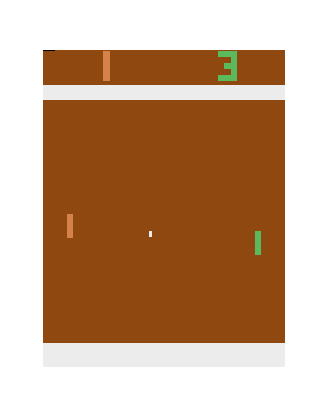
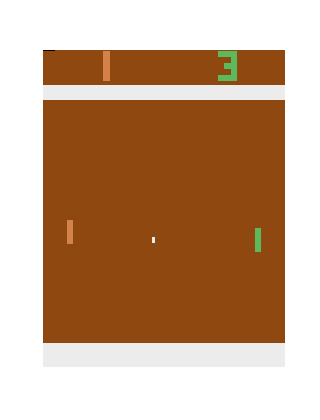
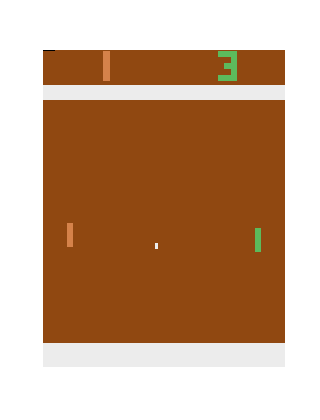
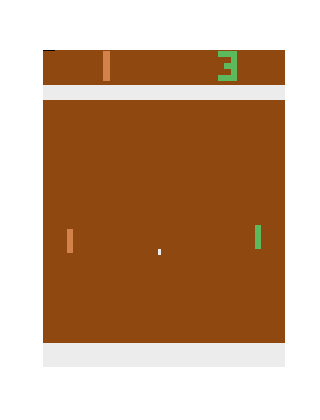
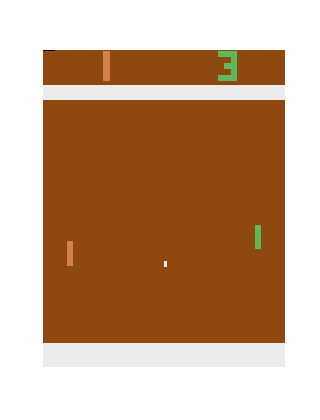
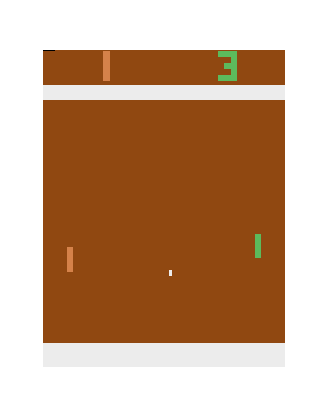
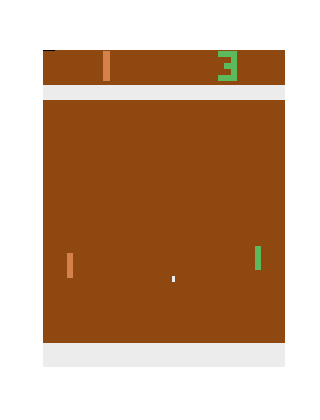
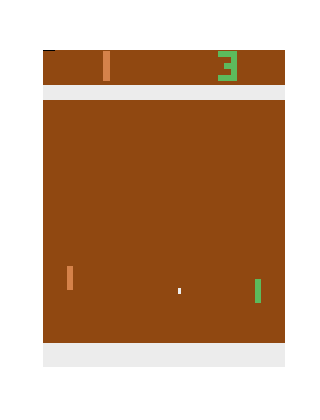
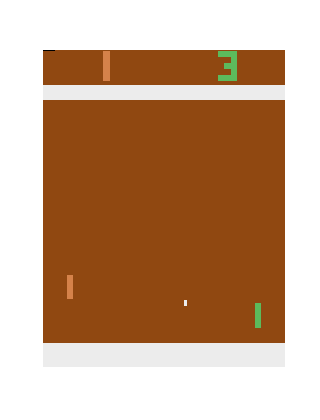
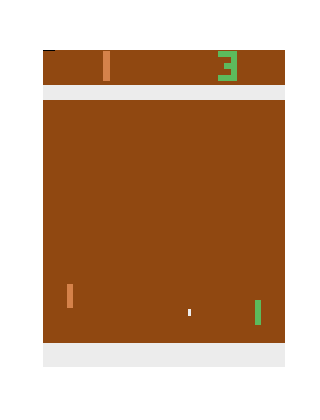
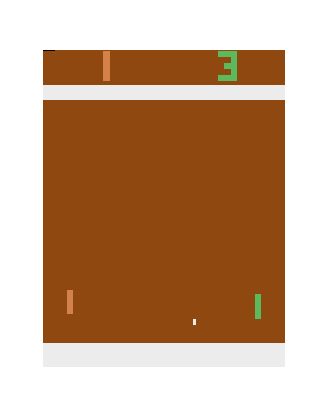
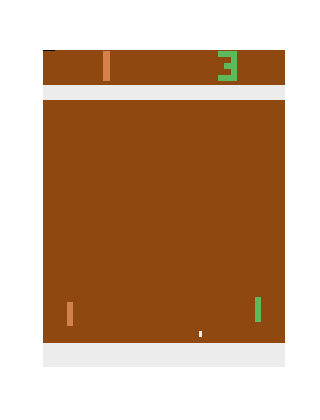
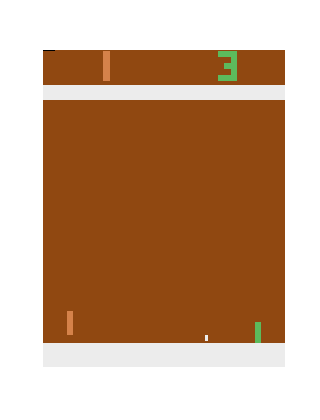
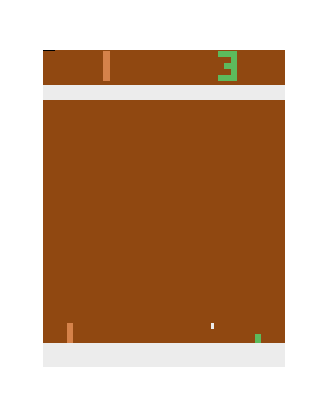
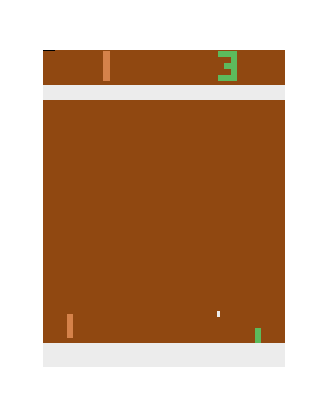
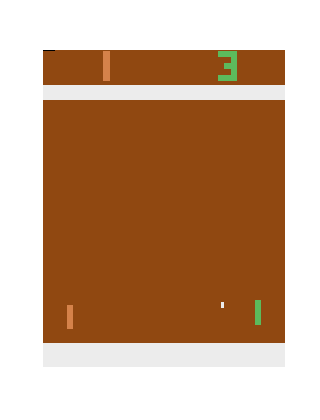
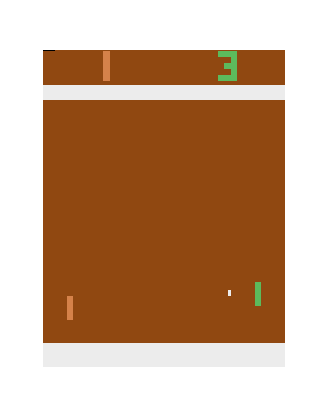
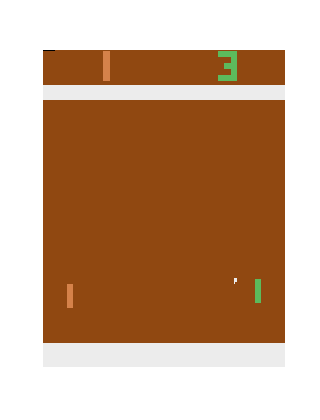
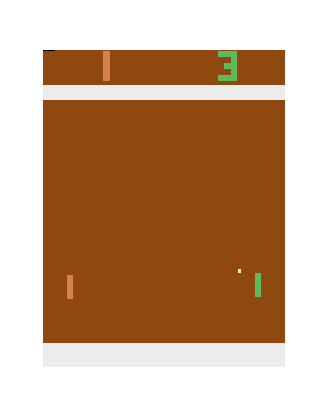
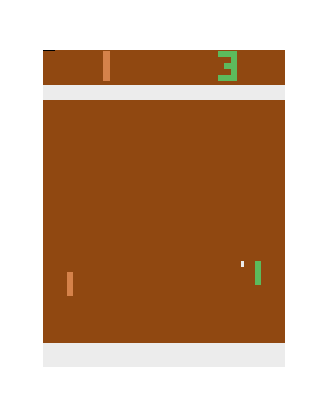
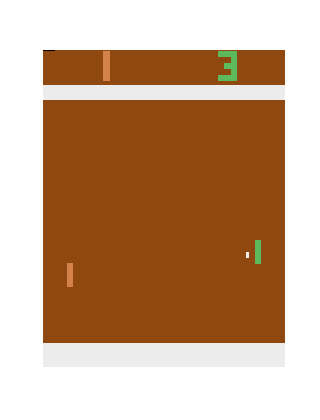
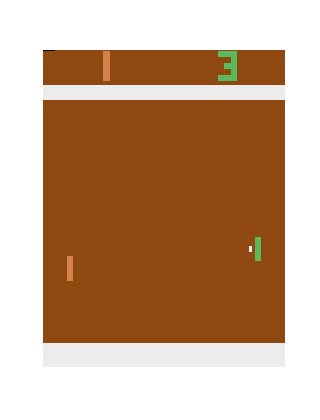
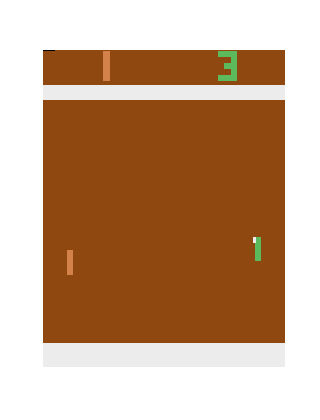
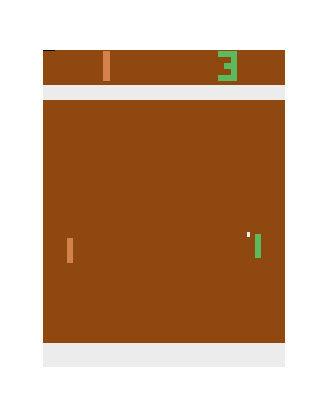
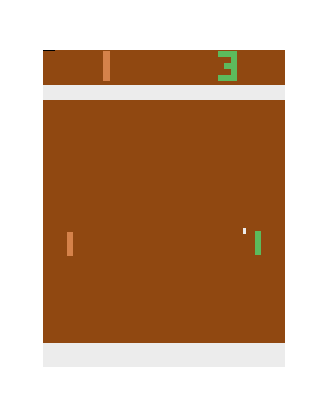
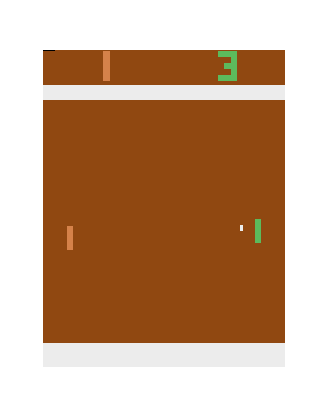
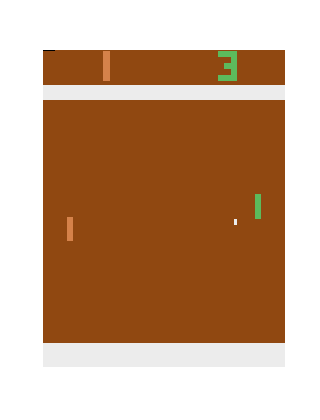
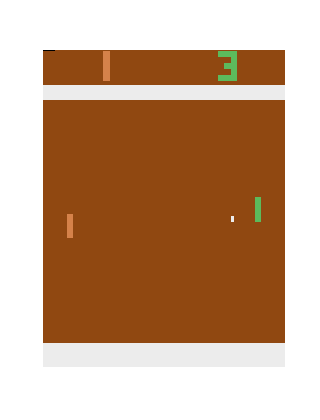
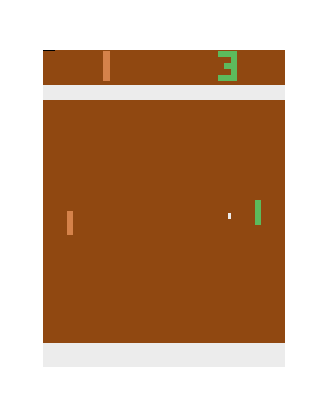
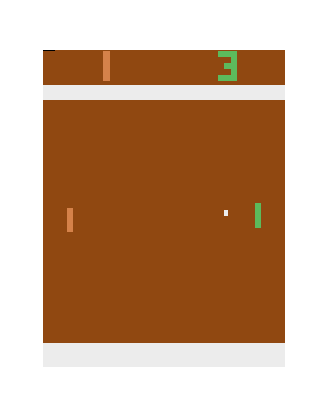
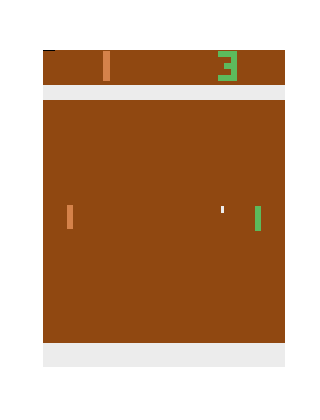
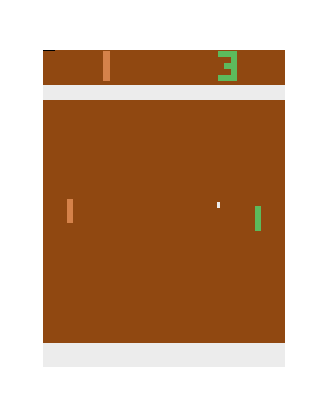
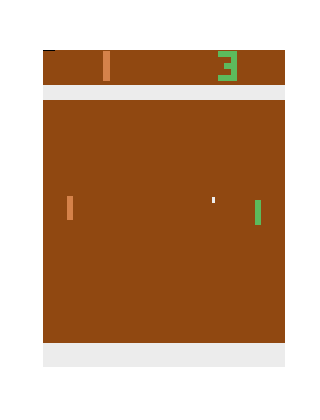
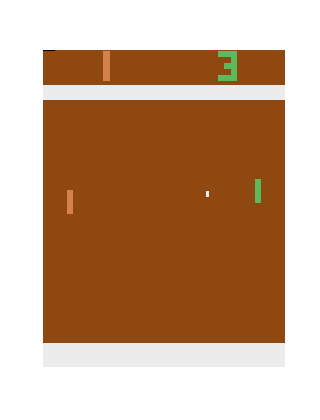
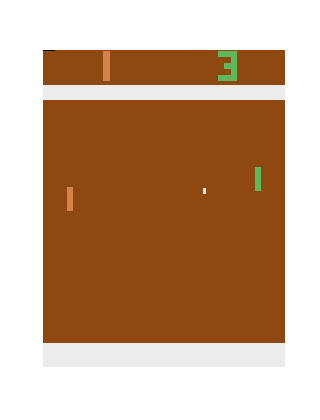
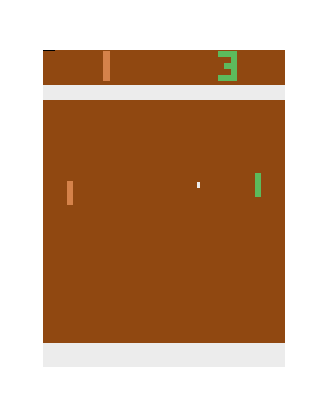
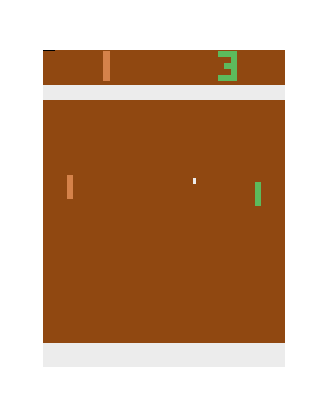
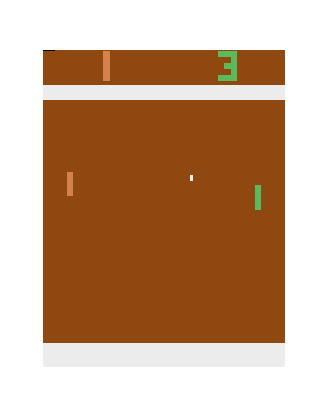
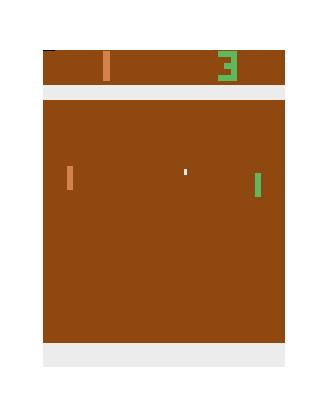
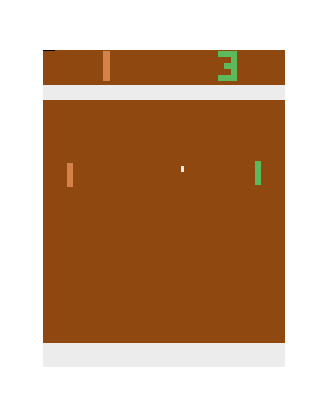
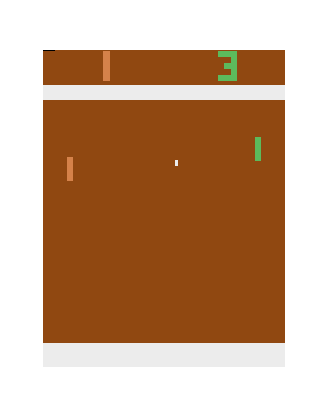
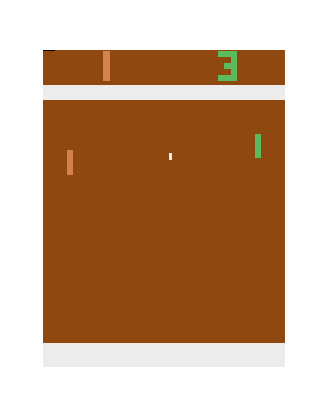
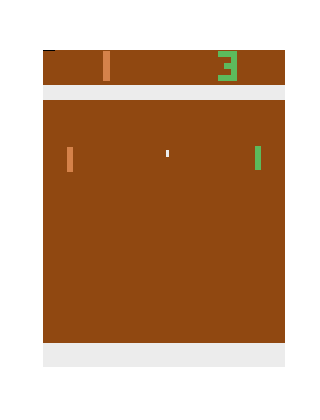
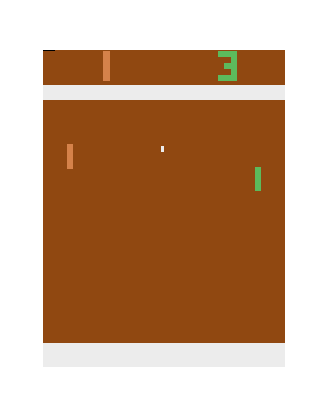
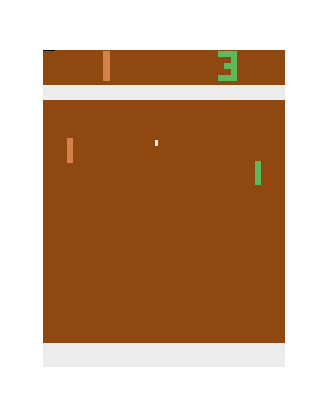
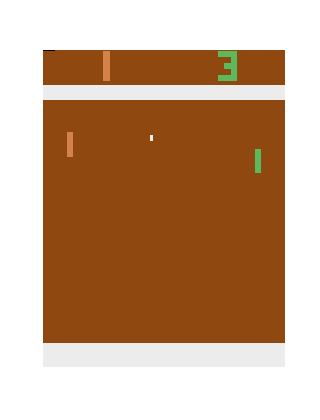
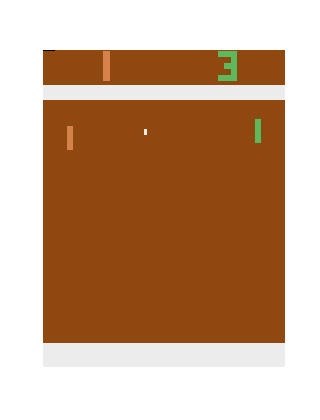
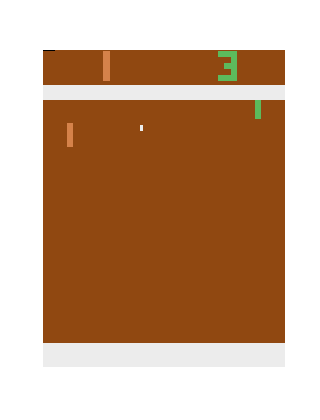
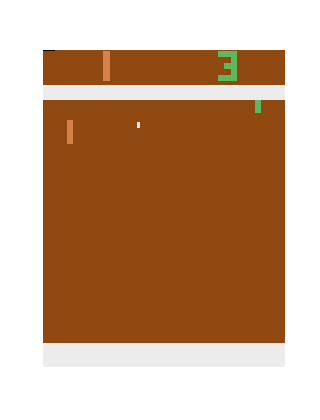
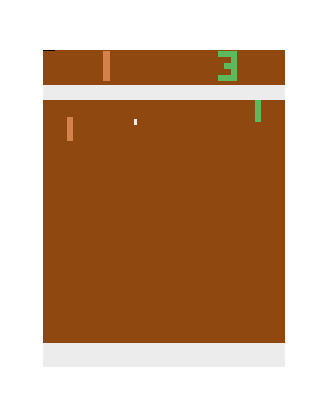
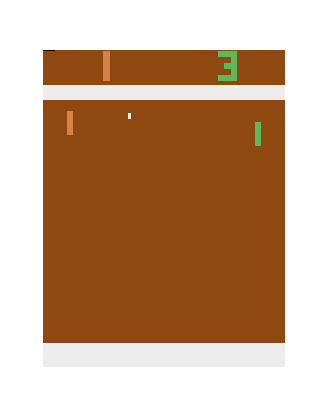
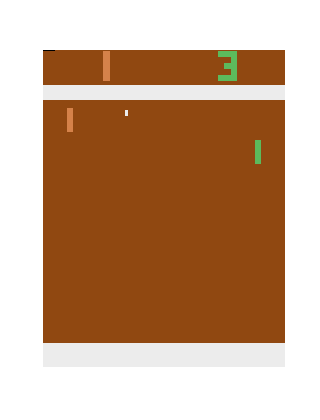
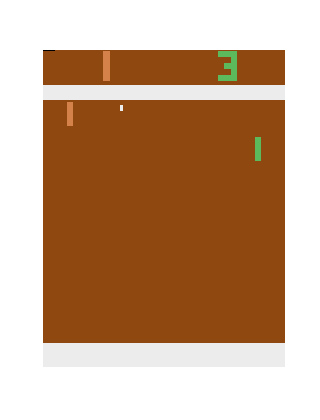
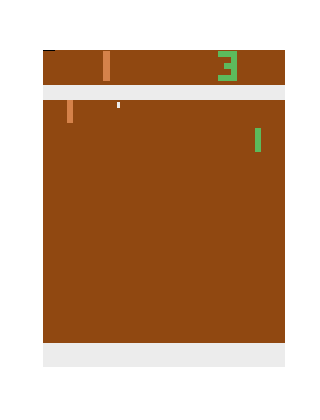
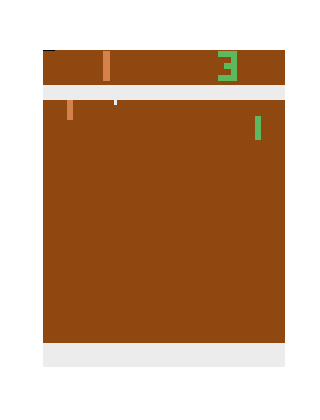
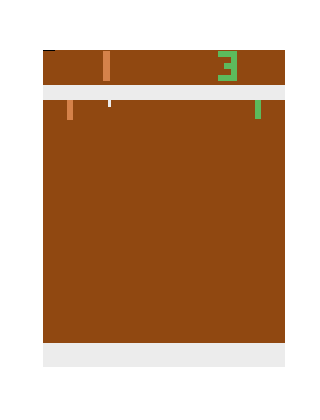
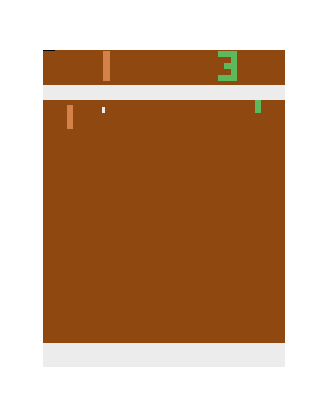
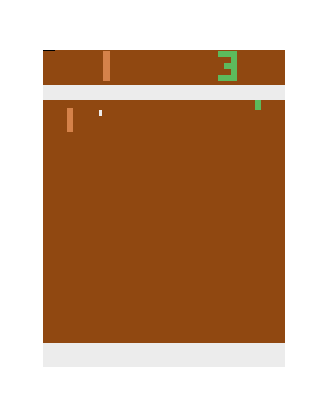
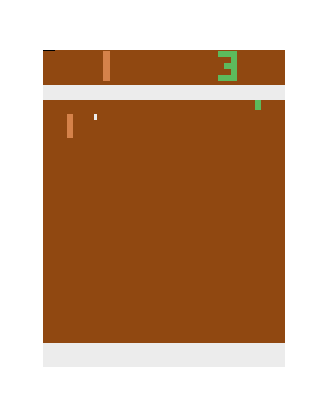
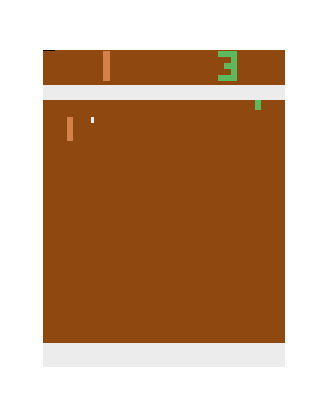
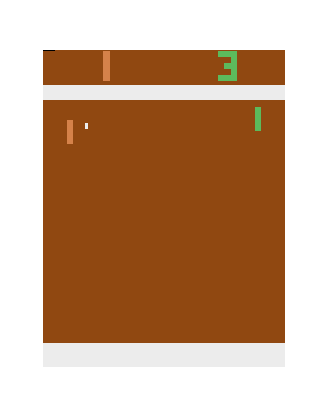
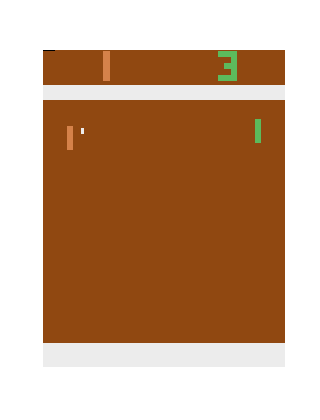
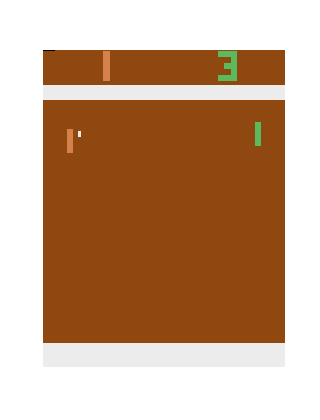
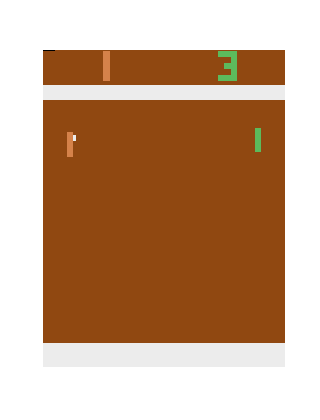
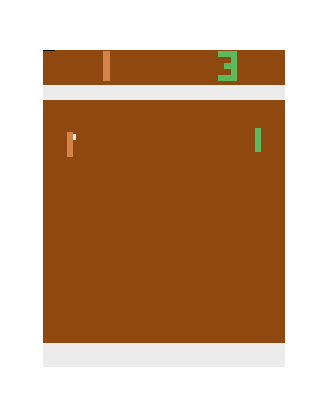
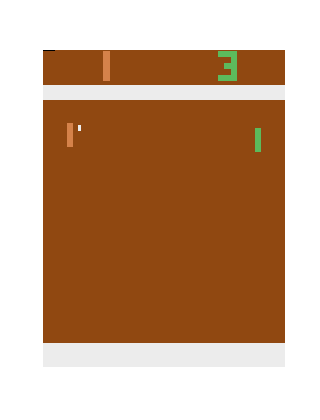
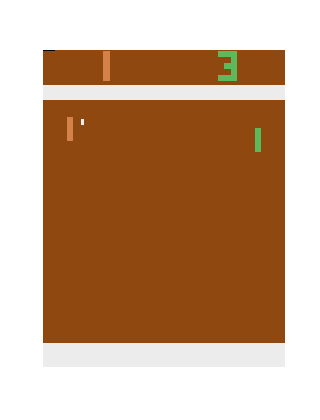
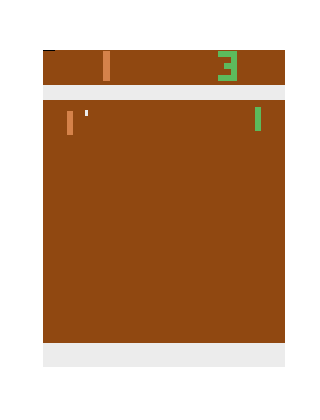
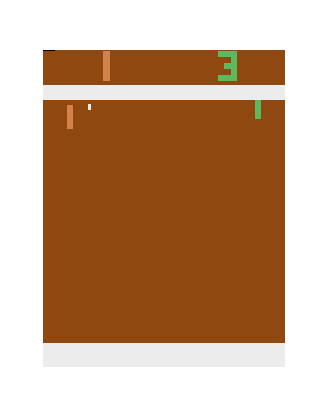
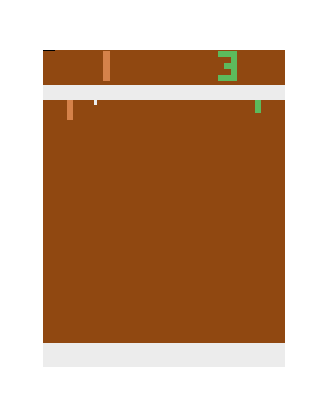
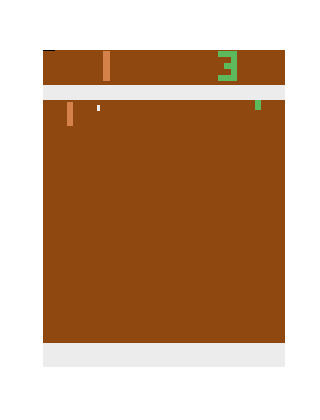
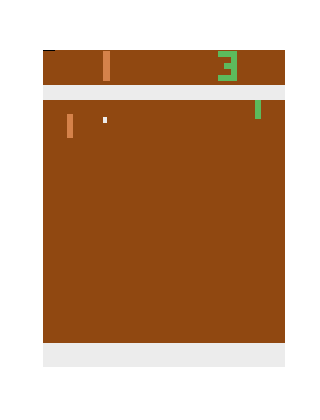
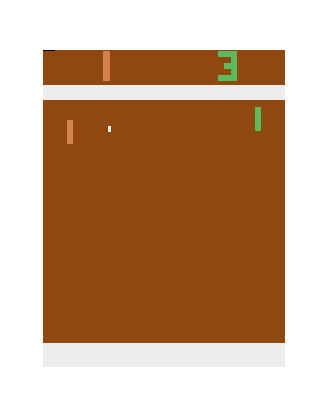
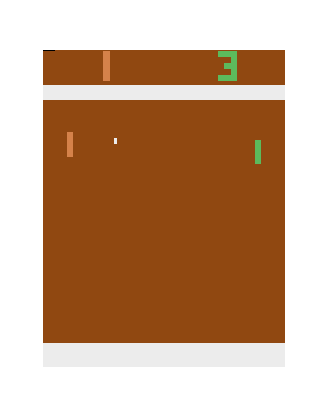
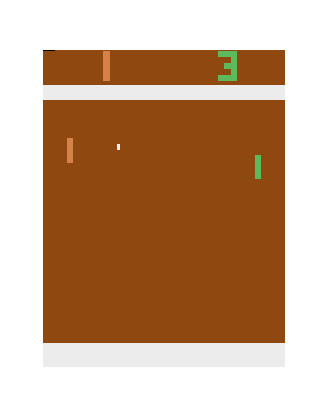
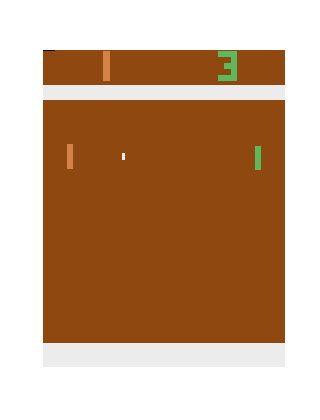
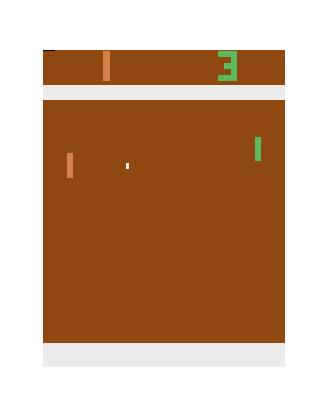
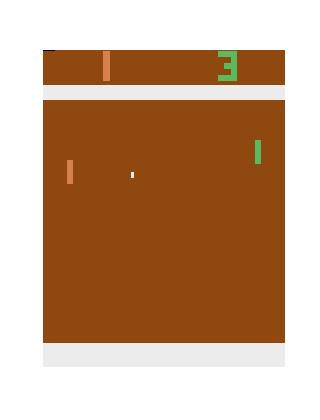
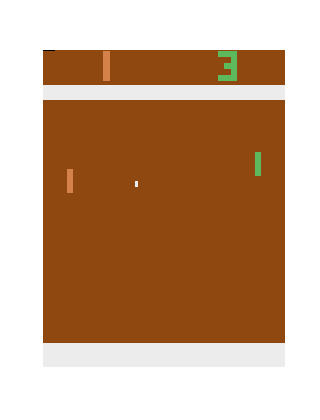
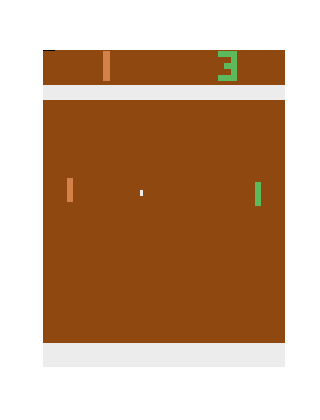
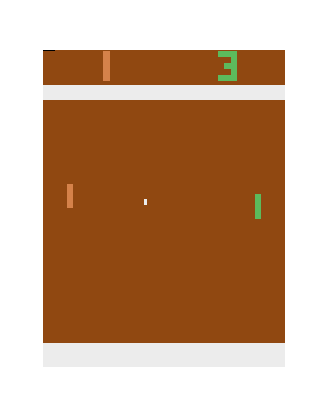
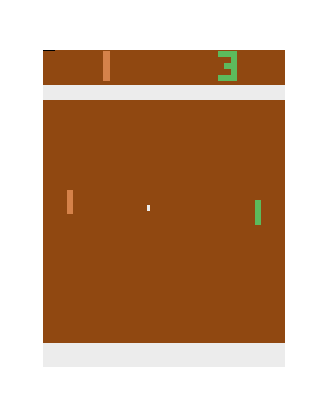
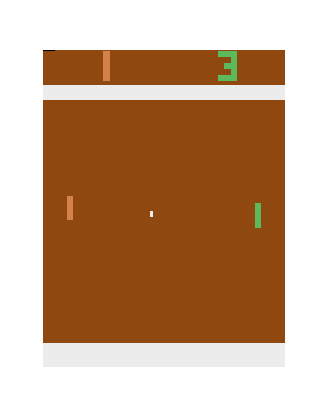
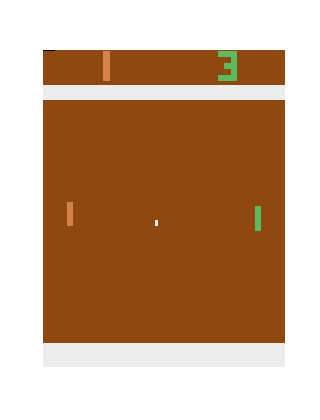
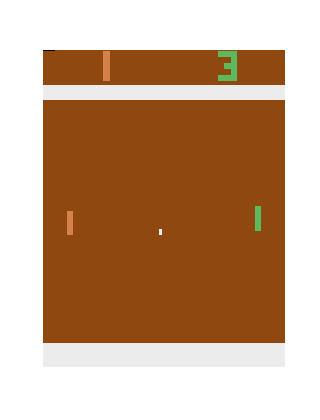
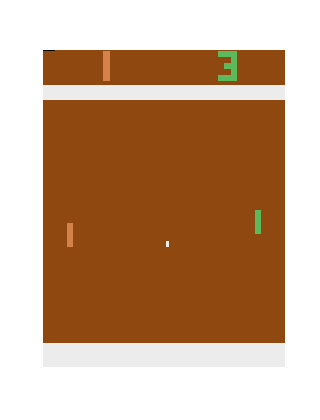
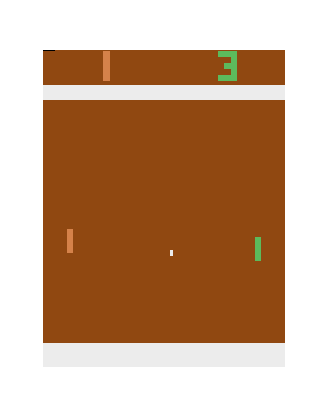
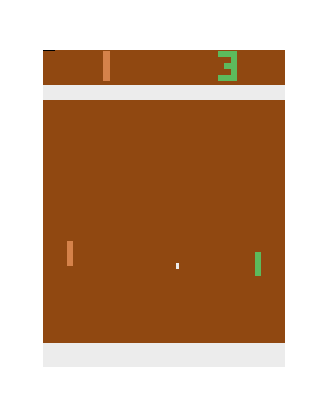
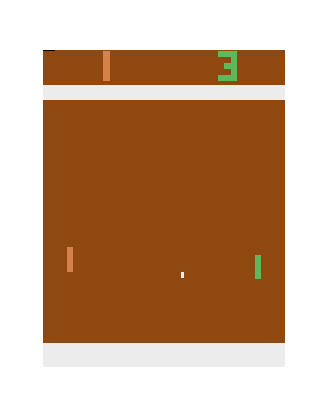
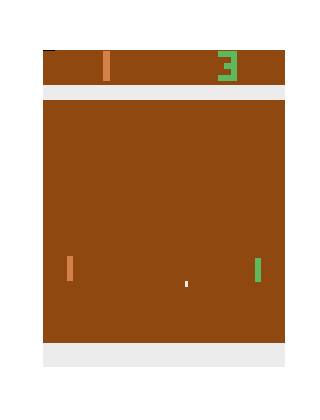
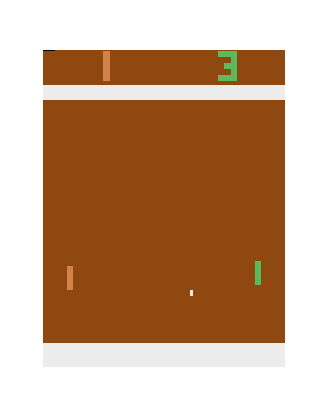
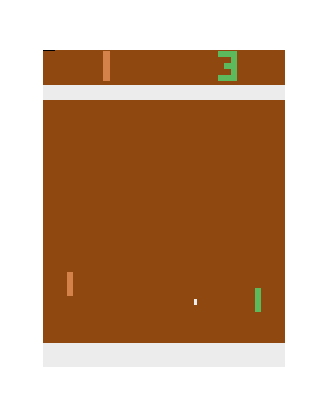
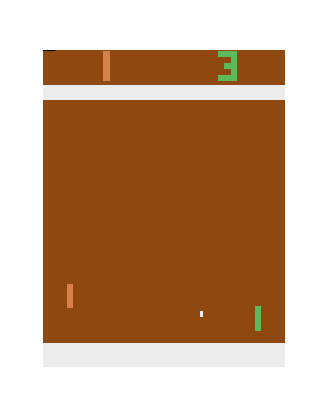
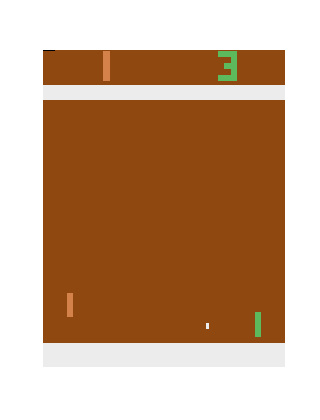
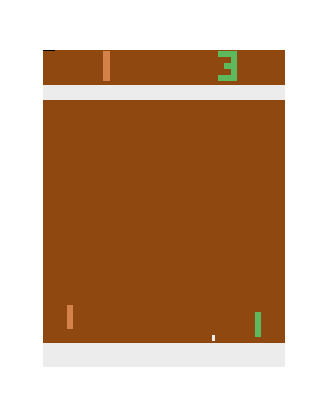
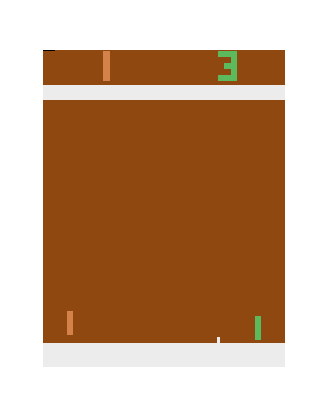
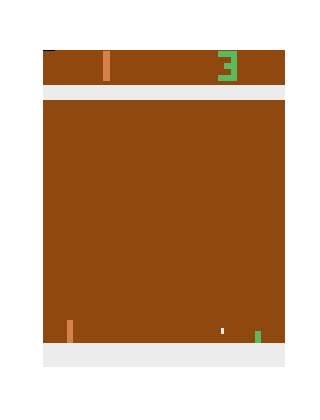
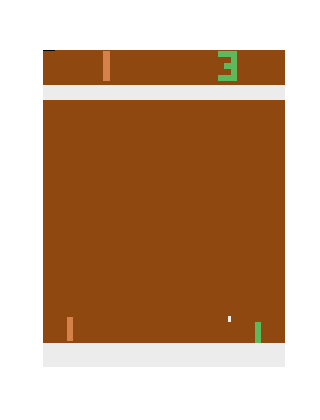
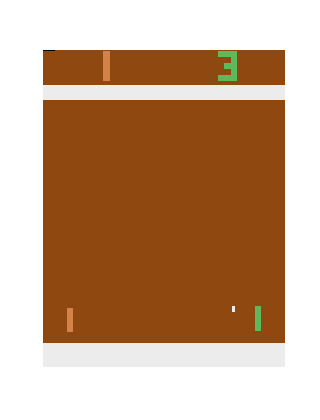
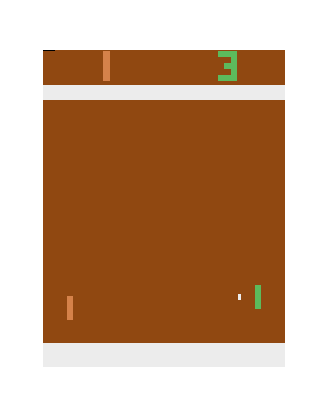
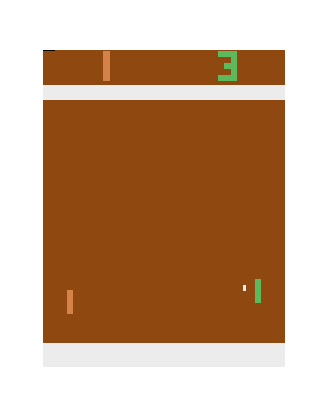
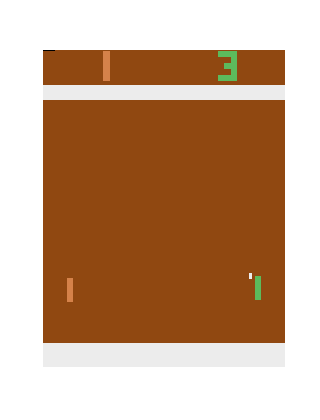
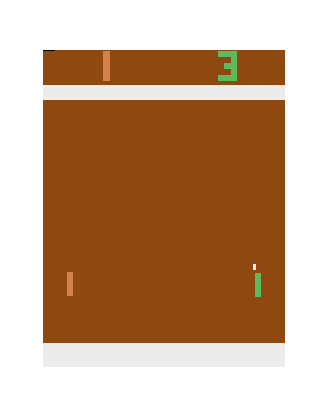
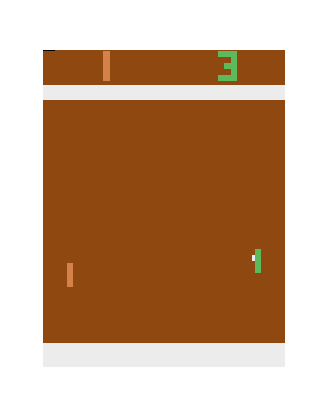
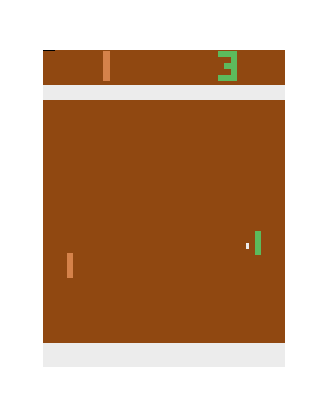
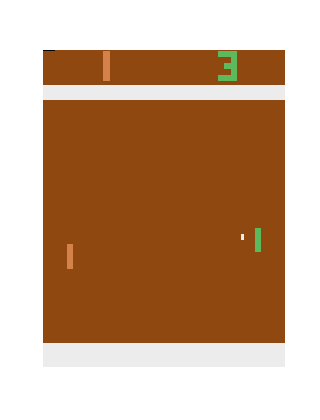

2.0


In [10]:
# Run a demo of the environment
observation = env.reset()
frames = []
total_reward = 0
for _ in range(1000):
    frames.append(env.render(mode = 'rgb_array'))
    paddle = np.where(observation[34:194,140:144,1]==186)
    ball = np.where(observation[34:194,:,1]==236)
    if len(paddle[0]) > 0 and len(ball[0]>0): # if objects are in the play area
        paddle_top, paddle_bottom = paddle[0][[0,-1]]
        ball_top, ball_bottom = ball[0][[0,-1]]
        if ball_top < paddle_top:
            action = 2 # move up
        elif ball_bottom > paddle_bottom:
            action = 3 # move down
        else:
            action = 0 # do nothing
    else:
        action = 0
    observation, reward, done, info = env.step(action)
    total_reward += reward
    if done:
        break
env.close()

display_frames_as_gif(frames)
print(total_reward)